In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from sklearn.feature_selection import RFECV 
from sklearn.linear_model import LinearRegression
import category_encoders as ce
from category_encoders.target_encoder import TargetEncoder

In [3]:
from scipy import stats

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,Input,InputLayer
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from keras.callbacks import ModelCheckpoint
import tensorflow as tf

In [5]:
df1 = pd.read_csv('E:\\My files\\Dr Buzna\\trips\\NN\\real_distance\\tripdf_hs_sphs.csv', index_col=0)
df2 = pd.read_csv('E:\\My files\\Dr Buzna\\trips\\NN\\real_distance\\tripdf1_hs_sphs.csv', index_col=0)
df1 = df1.drop(['4d ranked','5th ranked','6th ranked','4rd dist','5th dist','6th dist'],axis=1)
df1['hr_sin'] = np.sin(df1['hour of day']*(2.*np.pi/24))
df1['hr_cos'] = np.cos(df1['hour of day']*(2.*np.pi/24))
print(df1.shape)
df1.head(5)

(16231, 11)


travel time   distance  hour of day 1st ranked    2nd ranked    3rd ranked  \
0         2171  10972.721           18    primary  unclassified      tertiary   
1          799  11089.693           21    primary      tertiary  primary_link   
2          698  11062.494           19    primary      tertiary  primary_link   
3          806  11384.159           17    primary      tertiary       service   
4          721  11785.827           17    primary      tertiary       service   

   1st dist  2nd dist  3rd dist    hr_sin        hr_cos  
0  0.794769  0.074563  0.062997 -1.000000 -1.836970e-16  
1  0.862592  0.091203  0.034690 -0.707107  7.071068e-01  
2  0.832183  0.091428  0.034775 -0.965926  2.588190e-01  
3  0.828116  0.067350  0.048022 -0.965926 -2.588190e-01  
4  0.781110  0.117155  0.053512 -0.965926 -2.588190e-01

In [6]:
print(df2.shape)
df2.head(5)

(16231, 19)


travel time   distance  hour of day  living_street  motorway  \
0         2171  10972.721           18            0.0       0.0   
1          799  11089.693           21            0.0       0.0   
2          698  11062.494           19            0.0       0.0   
3          806  11384.159           17            0.0       0.0   
4          721  11785.827           17            0.0       0.0   

   motorway_link   primary  primary_link  residential  road  secondary  \
0            0.0  8720.782       384.698        0.000   0.0        0.0   
1            0.0  9565.882       384.698       25.175   0.0        0.0   
2            0.0  9206.024       384.698        0.000   0.0        0.0   
3            0.0  9427.408       384.698      156.129   0.0        0.0   
4            0.0  9206.024       384.698       81.136   0.0        0.0   

   secondary_link  service  tertiary  track  trunk  trunk_link  unclassified  \
0             0.0  357.834   691.246    0.0    0.0         0.0       818.161   
1             0.0    0.000  1011.418    0.0    0.0         0.0       102.520   
2             0.0  357.834  1011.418    0.0    0.0         0.0       102.520   
3             0.0  546.686   766.718    0.0    0.0         0.0       102.520   
4             0.0  630.686  1380.763    0.0    0.0         0.0       102.520   

   others  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0

In [7]:
# df0 = pd.merge(df1,df2, on=['travel time','distance','hour of day'])
# df0.shape
# df0

In [8]:
df3 = pd.read_csv('E:\\My files\\Dr Buzna\\trips\\NN\\dijk_distance\\tripdf_hs_sphs.csv', index_col=0)
print(df3.shape)
df3.head()

(15981, 6)


travel time  hour of day   distance   est_dist  similarity  similarity_dijk
0         2171           18  10972.721   9806.243    0.774648         0.873016
1          799           21  11089.693   9407.297    0.721519         0.850746
2          698           19  11062.494   9807.684    0.697368         0.841270
3          806           17  11384.159   9932.825    0.654762         0.820896
4          721           17  11785.827  11158.911    0.666667         0.763158

In [9]:
df1 = pd.merge(df3,df1, on = ['travel time','distance','hour of day'])
df2 = pd.merge(df3,df2, on = ['travel time','distance','hour of day'])
df2

travel time  hour of day   distance   est_dist  similarity  \
0             2171           18  10972.721   9806.243    0.774648   
1              799           21  11089.693   9407.297    0.721519   
2              698           19  11062.494   9807.684    0.697368   
3              806           17  11384.159   9932.825    0.654762   
4              721           17  11785.827  11158.911    0.666667   
...            ...          ...        ...        ...         ...   
16030         1700            8  22341.337  21975.888    0.686957   
16031         1337           22  21957.802  22698.891    0.771930   
16032         1240            1  22461.781  21838.092    0.715517   
16033         1266            3  22737.294  21797.640    0.714286   
16034         1216           23  22127.191  22265.605    0.728070   

       similarity_dijk  living_street  motorway  motorway_link    primary  \
0             0.873016            0.0       0.0            0.0   8720.782   
1             0.850746            0.0       0.0            0.0   9565.882   
2             0.841270            0.0       0.0            0.0   9206.024   
3             0.820896            0.0       0.0            0.0   9427.408   
4             0.763158            0.0       0.0            0.0   9206.024   
...                ...            ...       ...            ...        ...   
16030         0.718182            0.0       0.0            0.0  18514.226   
16031         0.778761            0.0       0.0            0.0  18514.226   
16032         0.754545            0.0       0.0            0.0  18514.226   
16033         0.765766            0.0       0.0            0.0  18514.226   
16034         0.734513            0.0       0.0            0.0  18514.226   

       ...  road  secondary  secondary_link  service  tertiary  track  trunk  \
0      ...   0.0      0.000             0.0  357.834   691.246    0.0    0.0   
1      ...   0.0      0.000             0.0    0.000  1011.418    0.0    0.0   
2      ...   0.0      0.000             0.0  357.834  1011.418    0.0    0.0   
3      ...   0.0      0.000             0.0  546.686   766.718    0.0    0.0   
4      ...   0.0      0.000             0.0  630.686  1380.763    0.0    0.0   
...    ...   ...        ...             ...      ...       ...    ...    ...   
16030  ...   0.0   1041.825             0.0    0.000  2785.286    0.0    0.0   
16031  ...   0.0    858.916             0.0    0.000  2499.066    0.0    0.0   
16032  ...   0.0   1041.825             0.0    0.000  2905.730    0.0    0.0   
16033  ...   0.0   1041.825             0.0    0.000  2905.730    0.0    0.0   
16034  ...   0.0   1041.825             0.0    0.000  2499.066    0.0    0.0   

       trunk_link  unclassified  others  
0             0.0       818.161     0.0  
1             0.0       102.520     0.0  
2             0.0       102.520     0.0  
3             0.0       102.520     0.0  
4             0.0       102.520     0.0  
...           ...           ...     ...  
16030         0.0         0.000     0.0  
16031         0.0         0.000     0.0  
16032         0.0         0.000     0.0  
16033         0.0         0.000     0.0  
16034         0.0         0.000     0.0  

[16035 rows x 22 columns]

In [10]:
# # category reduction
# option = ['residential','tertiary','primary']
# df_merged.loc[~df_merged['1st ranked'].isin(option),'1st ranked'] = 'others1'
# option = ['residential','tertiary','secondary','not']
# df_merged.loc[~df_merged['2nd ranked'].isin(option),'2nd ranked'] = 'others2'
# option = ['residential','tertiary','not']
# df_merged.loc[~df_merged['3rd ranked'].isin(option),'3rd ranked'] = 'others3'

In [11]:
# # feature (mean) encoding
# te = TargetEncoder()
# df_merged['1st ranked'] = te.fit_transform(df_merged['1st ranked'],df_merged['travel time'])
# df_merged['2nd ranked'] = te.fit_transform(df_merged['2nd ranked'],df_merged['travel time'])
# df_merged['3rd ranked'] = te.fit_transform(df_merged['3rd ranked'],df_merged['travel time'])
# print(df_merged.shape)
# df_merged.iloc[1:5,2:]


In [12]:
# outlier removal
from scipy import stats
df1 = df1[(np.abs(stats.zscore(df1['distance'])) < 3)]
df2 = df2[(np.abs(stats.zscore(df2['distance'])) < 3)]
df1

travel time  hour of day   distance   est_dist  similarity  \
0             2171           18  10972.721   9806.243    0.774648   
1              799           21  11089.693   9407.297    0.721519   
2              698           19  11062.494   9807.684    0.697368   
3              806           17  11384.159   9932.825    0.654762   
4              721           17  11785.827  11158.911    0.666667   
...            ...          ...        ...        ...         ...   
16030         1700            8  22341.337  21975.888    0.686957   
16031         1337           22  21957.802  22698.891    0.771930   
16032         1240            1  22461.781  21838.092    0.715517   
16033         1266            3  22737.294  21797.640    0.714286   
16034         1216           23  22127.191  22265.605    0.728070   

       similarity_dijk 1st ranked    2nd ranked    3rd ranked  1st dist  \
0             0.873016    primary  unclassified      tertiary  0.794769   
1             0.850746    primary      tertiary  primary_link  0.862592   
2             0.841270    primary      tertiary  primary_link  0.832183   
3             0.820896    primary      tertiary       service  0.828116   
4             0.763158    primary      tertiary       service  0.781110   
...                ...        ...           ...           ...       ...   
16030         0.718182    primary      tertiary     secondary  0.828698   
16031         0.778761    primary      tertiary     secondary  0.843173   
16032         0.754545    primary      tertiary     secondary  0.824255   
16033         0.765766    primary      tertiary     secondary  0.814267   
16034         0.734513    primary      tertiary     secondary  0.836718   

       2nd dist  3rd dist    hr_sin        hr_cos  
0      0.074563  0.062997 -1.000000 -1.836970e-16  
1      0.091203  0.034690 -0.707107  7.071068e-01  
2      0.091428  0.034775 -0.965926  2.588190e-01  
3      0.067350  0.048022 -0.965926 -2.588190e-01  
4      0.117155  0.053512 -0.965926 -2.588190e-01  
...         ...       ...       ...           ...  
16030  0.124670  0.046632  0.866025 -5.000000e-01  
16031  0.113812  0.039117 -0.500000  8.660254e-01  
16032  0.129363  0.046382  0.258819  9.659258e-01  
16033  0.127796  0.045820  0.707107  7.071068e-01  
16034  0.112941  0.047083 -0.258819  9.659258e-01  

[15949 rows x 14 columns]

In [13]:
# # standardization
# from sklearn import preprocessing
# min_max = preprocessing.MinMaxScaler()
# scaled_df = min_max.fit_transform(df_merged.iloc[:,2:3].values)
# df = pd.DataFrame(scaled_df,columns=df_merged.columns[2:3])

In [14]:
# Normalize using Min/Max Normalization.
normalized_distance2=(df1['distance']-df1['distance'].min())/(df1['distance'].max()-df1['distance'].min())
normalized_distance22=(df2['distance']-df2['distance'].min())/(df2['distance'].max()-df2['distance'].min())

normalized_distance3=(df1['est_dist']-df1['est_dist'].min())/(df1['est_dist'].max()-df1['est_dist'].min())
normalized_distance33=(df2['est_dist']-df2['est_dist'].min())/(df2['est_dist'].max()-df2['est_dist'].min())

In [15]:
df1['distance'] = normalized_distance2
df2['distance'] = normalized_distance22

df1['est_dist'] = normalized_distance3
df2['est_dist'] = normalized_distance33

display(df1.head(2))
display(df2.head(2))

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0         2171           18  0.297612  0.267902    0.774648         0.873016   
1          799           21  0.300860  0.256891    0.721519         0.850746   

  1st ranked    2nd ranked    3rd ranked  1st dist  2nd dist  3rd dist  \
0    primary  unclassified      tertiary  0.794769  0.074563  0.062997   
1    primary      tertiary  primary_link  0.862592  0.091203  0.034690   

     hr_sin        hr_cos  
0 -1.000000 -1.836970e-16  
1 -0.707107  7.071068e-01

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0         2171           18  0.297612  0.267902    0.774648         0.873016   
1          799           21  0.300860  0.256891    0.721519         0.850746   

   living_street  motorway  motorway_link   primary  ...  road  secondary  \
0            0.0       0.0            0.0  8720.782  ...   0.0        0.0   
1            0.0       0.0            0.0  9565.882  ...   0.0        0.0   

   secondary_link  service  tertiary  track  trunk  trunk_link  unclassified  \
0             0.0  357.834   691.246    0.0    0.0         0.0       818.161   
1             0.0    0.000  1011.418    0.0    0.0         0.0       102.520   

   others  
0     0.0  
1     0.0  

[2 rows x 22 columns]

# NN-based modeling

In [16]:
# fix random seed for reproducibility
#The specific seed value does not matter as long as it stays the same for each run of your code, it could be 1,2,3,...
np.random.seed(7)

In [25]:
def nnmodel(*num_neuron,num_hlayers,Epoch):

    if num_hlayers == 1:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(1))
    else:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(num_neuron[1], activation='relu'))
        model.add(Dense(1))
    # model.compile(loss='mse', optimizer='adam')
    learning_rate = 0.5
    model.compile(optimizer='adam',
                  loss=tf.keras.metrics.mean_squared_error,
                  metrics=['mape',tf.keras.metrics.RootMeanSquaredError(name='rmse')])
    history = model.fit(X_train, y_train, verbose=1, epochs=Epoch,
                       validation_data=(X_test, y_test))  
    print('minimum testing RMSE: ',min(history.history['val_rmse'])/60)
    print('minimum testing MAPE: ',min(history.history['val_mape'])/100)
    
    return history

In [26]:
def nnmodel_(*num_neuron,num_hlayers,Epoch):

    if num_hlayers == 1:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(1))
    elif num_hlayers == 2:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(num_neuron[1], activation='relu'))
        model.add(Dense(1))
    else:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(num_neuron[1], activation='relu'))
        model.add(Dense(num_neuron[2], activation='relu'))
        model.add(Dense(1))        
    # model.compile(loss='mse', optimizer='adam')
    learning_rate = 0.5
    model.compile(optimizer='adam',
                  loss=tf.keras.metrics.mean_squared_error,
                  metrics=['mape',tf.keras.metrics.RootMeanSquaredError(name='rmse')])
    X_train0 = tf.convert_to_tensor(X_train,dtype = tf.float32)
    y_train0 = tf.convert_to_tensor(y_train,dtype = tf.float32)
    X_test0 = tf.convert_to_tensor(X_test,dtype = tf.float32)
    y_test0 = tf.convert_to_tensor(y_test,dtype = tf.float32)
    history = model.fit(X_train0, y_train0, verbose=1, epochs=Epoch,
                       validation_data=(X_test0, y_test0))   
    print('minimum testing RMSE: ',min(history.history['val_rmse'])/60)
    print('minimum testing MAPE: ',min(history.history['val_mape'])/100)
    
    return history

In [27]:
def plotme(model):

    # Plot the training and validation accuracy and loss at each epoch
    loss1 = [f/60 for f in model.history['rmse']]
    val_loss1 = [f/60 for f in model.history['val_rmse']]
    loss2 = model.history['mape']
    val_loss2 = model.history['val_mape']
    epochs = range(1, len(model.history['loss'])+1)
    plt.figure(figsize=(5, 3))
    plt.plot(epochs, val_loss1, 'r', label='Validation rmse')
    plt.plot(epochs, loss1, 'y', label='Trainnig rmse')
    plt.plot(epochs, val_loss2, 'k', label='Validation mape')
    plt.plot(epochs, loss2, 'b', label='Trainnig mape')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Metrics')
    #plt.xlim(lims)
    yli = max(model.history['val_mape'])
    plt.ylim([-1, yli+10])
    plt.legend()
    plt.show()

## sub-problem 1:     ******* input:distance *********

In [28]:
my_df = df1[['travel time','est_dist']]
my_df.head(3)

travel time  est_dist
0         2171  0.267902
1          799  0.256891
2          698  0.267942

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

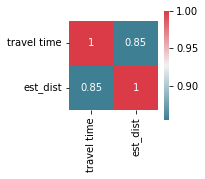

In [29]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(2,2))
corr = my_df.corr()
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [30]:
x = np.array(df1[['est_dist']])
y = np.array(df1['travel time'])
# x

In [31]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
print(X_train.shape)
print(X_test.shape)
# X_train

(12759, 1)
(3190, 1)


In [33]:
# inputs: distance
model1_1 = nnmodel(5, num_hlayers=1,Epoch=500)
model1_1

Epoch 1/500
399/399 [==============================] - 1s 880us/step - loss: 1031422.1875 - mape: 99.9174 - rmse: 1015.5896 - val_loss: 1067574.2500 - val_mape: 99.8241 - val_rmse: 1033.2349
Epoch 2/500
399/399 [==============================] - 0s 698us/step - loss: 1028481.8750 - mape: 99.6835 - rmse: 1014.1409 - val_loss: 1063697.2500 - val_mape: 99.5306 - val_rmse: 1031.3569
Epoch 3/500
399/399 [==============================] - 0s 740us/step - loss: 1023932.1250 - mape: 99.3211 - rmse: 1011.8953 - val_loss: 1058222.3750 - val_mape: 99.1167 - val_rmse: 1028.6993
Epoch 4/500
399/399 [==============================] - 0s 735us/step - loss: 1017896.5000 - mape: 98.8426 - rmse: 1008.9086 - val_loss: 1051272.1250 - val_mape: 98.5911 - val_rmse: 1025.3157
Epoch 5/500
399/399 [==============================] - 0s 719us/step - loss: 1010520.0000 - mape: 98.2572 - rmse: 1005.2462 - val_loss: 1043055.3750 - val_mape: 97.9676 - val_rmse: 1021.3008
Epoch 6/500
399/399 [========================

Epoch 88/500
399/399 [==============================] - 0s 722us/step - loss: 114313.8125 - mape: 45.9703 - rmse: 338.1033 - val_loss: 113249.5547 - val_mape: 44.4186 - val_rmse: 336.5257
Epoch 89/500
399/399 [==============================] - 0s 694us/step - loss: 112958.1797 - mape: 45.5825 - rmse: 336.0925 - val_loss: 111919.6016 - val_mape: 44.0755 - val_rmse: 334.5439
Epoch 90/500
399/399 [==============================] - 0s 709us/step - loss: 111616.5078 - mape: 45.2490 - rmse: 334.0906 - val_loss: 110626.4062 - val_mape: 43.6934 - val_rmse: 332.6055
Epoch 91/500
399/399 [==============================] - 0s 716us/step - loss: 110293.7266 - mape: 44.8895 - rmse: 332.1050 - val_loss: 109340.7969 - val_mape: 43.3473 - val_rmse: 330.6672
Epoch 92/500
399/399 [==============================] - 0s 697us/step - loss: 108993.8516 - mape: 44.5226 - rmse: 330.1422 - val_loss: 108083.3828 - val_mape: 42.9753 - val_rmse: 328.7604
Epoch 93/500
399/399 [==============================] - 0s 7

Epoch 132/500
399/399 [==============================] - 0s 674us/step - loss: 76077.3516 - mape: 30.9119 - rmse: 275.8212 - val_loss: 77645.1875 - val_mape: 29.9737 - val_rmse: 278.6489
Epoch 133/500
399/399 [==============================] - 0s 699us/step - loss: 75773.1953 - mape: 30.6216 - rmse: 275.2693 - val_loss: 77400.5781 - val_mape: 29.7582 - val_rmse: 278.2096
Epoch 134/500
399/399 [==============================] - 0s 685us/step - loss: 75491.2266 - mape: 30.4396 - rmse: 274.7567 - val_loss: 77180.9922 - val_mape: 29.5401 - val_rmse: 277.8147
Epoch 135/500
399/399 [==============================] - 0s 726us/step - loss: 75231.6094 - mape: 30.2381 - rmse: 274.2838 - val_loss: 76980.7812 - val_mape: 29.3068 - val_rmse: 277.4541
Epoch 136/500
399/399 [==============================] - 0s 712us/step - loss: 74993.6172 - mape: 29.9659 - rmse: 273.8496 - val_loss: 76799.0781 - val_mape: 29.1179 - val_rmse: 277.1265
Epoch 137/500
399/399 [==============================] - 0s 717us

Epoch 176/500
399/399 [==============================] - 0s 646us/step - loss: 72494.5625 - mape: 26.1326 - rmse: 269.2481 - val_loss: 75346.1875 - val_mape: 25.6423 - val_rmse: 274.4926
Epoch 177/500
399/399 [==============================] - 0s 735us/step - loss: 72491.6562 - mape: 26.1209 - rmse: 269.2427 - val_loss: 75351.6875 - val_mape: 25.6402 - val_rmse: 274.5026
Epoch 178/500
399/399 [==============================] - 0s 693us/step - loss: 72487.3359 - mape: 26.1191 - rmse: 269.2347 - val_loss: 75353.1719 - val_mape: 25.5907 - val_rmse: 274.5053
Epoch 179/500
399/399 [==============================] - 0s 698us/step - loss: 72484.9844 - mape: 26.0898 - rmse: 269.2303 - val_loss: 75357.5391 - val_mape: 25.5864 - val_rmse: 274.5133
Epoch 180/500
399/399 [==============================] - 0s 733us/step - loss: 72480.7266 - mape: 26.0330 - rmse: 269.2224 - val_loss: 75361.3672 - val_mape: 25.5719 - val_rmse: 274.5203
Epoch 181/500
399/399 [==============================] - 0s 708us

Epoch 220/500
399/399 [==============================] - 0s 679us/step - loss: 72455.6250 - mape: 25.7090 - rmse: 269.1758 - val_loss: 75435.0938 - val_mape: 25.2309 - val_rmse: 274.6545
Epoch 221/500
399/399 [==============================] - 0s 685us/step - loss: 72455.2109 - mape: 25.6780 - rmse: 269.1750 - val_loss: 75437.4297 - val_mape: 25.2504 - val_rmse: 274.6588
Epoch 222/500
399/399 [==============================] - 0s 756us/step - loss: 72456.1875 - mape: 25.7182 - rmse: 269.1769 - val_loss: 75439.2656 - val_mape: 25.2609 - val_rmse: 274.6621
Epoch 223/500
399/399 [==============================] - 0s 731us/step - loss: 72457.3672 - mape: 25.7273 - rmse: 269.1790 - val_loss: 75437.0234 - val_mape: 25.2278 - val_rmse: 274.6580
Epoch 224/500
399/399 [==============================] - 0s 736us/step - loss: 72456.3047 - mape: 25.7125 - rmse: 269.1771 - val_loss: 75438.8281 - val_mape: 25.2376 - val_rmse: 274.6613
Epoch 225/500
399/399 [==============================] - 0s 726us

Epoch 264/500
399/399 [==============================] - 0s 742us/step - loss: 72456.7109 - mape: 25.6763 - rmse: 269.1779 - val_loss: 75447.0938 - val_mape: 25.2146 - val_rmse: 274.6763
Epoch 265/500
399/399 [==============================] - 0s 694us/step - loss: 72456.4531 - mape: 25.6660 - rmse: 269.1774 - val_loss: 75449.0078 - val_mape: 25.2290 - val_rmse: 274.6798
Epoch 266/500
399/399 [==============================] - 0s 728us/step - loss: 72455.5781 - mape: 25.6797 - rmse: 269.1758 - val_loss: 75446.6406 - val_mape: 25.2123 - val_rmse: 274.6755
Epoch 267/500
399/399 [==============================] - 0s 716us/step - loss: 72456.0078 - mape: 25.6621 - rmse: 269.1765 - val_loss: 75449.6484 - val_mape: 25.2342 - val_rmse: 274.6810
Epoch 268/500
399/399 [==============================] - 0s 703us/step - loss: 72455.5938 - mape: 25.7268 - rmse: 269.1758 - val_loss: 75448.3906 - val_mape: 25.2212 - val_rmse: 274.6787
Epoch 269/500
399/399 [==============================] - 0s 692us

Epoch 308/500
399/399 [==============================] - 0s 670us/step - loss: 72454.6250 - mape: 25.6685 - rmse: 269.1740 - val_loss: 75449.3281 - val_mape: 25.2169 - val_rmse: 274.6804
Epoch 309/500
399/399 [==============================] - 0s 745us/step - loss: 72455.2422 - mape: 25.6865 - rmse: 269.1751 - val_loss: 75448.8594 - val_mape: 25.2170 - val_rmse: 274.6796
Epoch 310/500
399/399 [==============================] - 0s 678us/step - loss: 72456.9219 - mape: 25.6653 - rmse: 269.1782 - val_loss: 75449.4219 - val_mape: 25.2233 - val_rmse: 274.6806
Epoch 311/500
399/399 [==============================] - 0s 671us/step - loss: 72456.6797 - mape: 25.6802 - rmse: 269.1778 - val_loss: 75447.5000 - val_mape: 25.2013 - val_rmse: 274.6771
Epoch 312/500
399/399 [==============================] - 0s 688us/step - loss: 72456.7578 - mape: 25.6406 - rmse: 269.1779 - val_loss: 75449.1641 - val_mape: 25.2138 - val_rmse: 274.6801
Epoch 313/500
399/399 [==============================] - 0s 726us

Epoch 352/500
399/399 [==============================] - 0s 708us/step - loss: 72455.6719 - mape: 25.6803 - rmse: 269.1759 - val_loss: 75448.3281 - val_mape: 25.2124 - val_rmse: 274.6786
Epoch 353/500
399/399 [==============================] - 0s 724us/step - loss: 72455.1875 - mape: 25.7156 - rmse: 269.1750 - val_loss: 75446.3125 - val_mape: 25.1896 - val_rmse: 274.6749
Epoch 354/500
399/399 [==============================] - 0s 724us/step - loss: 72456.3828 - mape: 25.6778 - rmse: 269.1772 - val_loss: 75445.3672 - val_mape: 25.1808 - val_rmse: 274.6732
Epoch 355/500
399/399 [==============================] - 0s 689us/step - loss: 72456.9609 - mape: 25.6697 - rmse: 269.1783 - val_loss: 75446.7656 - val_mape: 25.1942 - val_rmse: 274.6758
Epoch 356/500
399/399 [==============================] - 0s 693us/step - loss: 72455.0859 - mape: 25.7028 - rmse: 269.1748 - val_loss: 75445.1562 - val_mape: 25.1802 - val_rmse: 274.6728
Epoch 357/500
399/399 [==============================] - 0s 718us

Epoch 396/500
399/399 [==============================] - 0s 681us/step - loss: 72455.7031 - mape: 25.6820 - rmse: 269.1760 - val_loss: 75448.1641 - val_mape: 25.2150 - val_rmse: 274.6783
Epoch 397/500
399/399 [==============================] - 0s 688us/step - loss: 72455.6875 - mape: 25.7042 - rmse: 269.1759 - val_loss: 75446.9297 - val_mape: 25.1941 - val_rmse: 274.6761
Epoch 398/500
399/399 [==============================] - 0s 689us/step - loss: 72455.6875 - mape: 25.6703 - rmse: 269.1759 - val_loss: 75447.4062 - val_mape: 25.1983 - val_rmse: 274.6769
Epoch 399/500
399/399 [==============================] - 0s 673us/step - loss: 72456.5703 - mape: 25.6890 - rmse: 269.1776 - val_loss: 75445.7969 - val_mape: 25.1810 - val_rmse: 274.6740
Epoch 400/500
399/399 [==============================] - 0s 701us/step - loss: 72455.4766 - mape: 25.6605 - rmse: 269.1755 - val_loss: 75447.4531 - val_mape: 25.2033 - val_rmse: 274.6770
Epoch 401/500
399/399 [==============================] - 0s 724us

Epoch 440/500
399/399 [==============================] - 0s 702us/step - loss: 72455.5703 - mape: 25.6565 - rmse: 269.1757 - val_loss: 75445.8125 - val_mape: 25.1840 - val_rmse: 274.6740
Epoch 441/500
399/399 [==============================] - 0s 676us/step - loss: 72456.2188 - mape: 25.6990 - rmse: 269.1769 - val_loss: 75448.2031 - val_mape: 25.2105 - val_rmse: 274.6784
Epoch 442/500
399/399 [==============================] - 0s 745us/step - loss: 72456.3438 - mape: 25.6487 - rmse: 269.1772 - val_loss: 75447.2812 - val_mape: 25.1956 - val_rmse: 274.6767
Epoch 443/500
399/399 [==============================] - 0s 708us/step - loss: 72455.5625 - mape: 25.6674 - rmse: 269.1757 - val_loss: 75448.3047 - val_mape: 25.2156 - val_rmse: 274.6786
Epoch 444/500
399/399 [==============================] - 0s 736us/step - loss: 72455.9922 - mape: 25.6732 - rmse: 269.1765 - val_loss: 75450.1797 - val_mape: 25.2252 - val_rmse: 274.6819
Epoch 445/500
399/399 [==============================] - 0s 709us

Epoch 484/500
399/399 [==============================] - 0s 718us/step - loss: 72457.0469 - mape: 25.6743 - rmse: 269.1785 - val_loss: 75448.2734 - val_mape: 25.2091 - val_rmse: 274.6785
Epoch 485/500
399/399 [==============================] - 0s 709us/step - loss: 72455.9297 - mape: 25.6876 - rmse: 269.1764 - val_loss: 75447.9766 - val_mape: 25.2040 - val_rmse: 274.6779
Epoch 486/500
399/399 [==============================] - 0s 720us/step - loss: 72455.8672 - mape: 25.6679 - rmse: 269.1763 - val_loss: 75446.8750 - val_mape: 25.1997 - val_rmse: 274.6759
Epoch 487/500
399/399 [==============================] - 0s 776us/step - loss: 72456.1562 - mape: 25.6816 - rmse: 269.1768 - val_loss: 75447.0234 - val_mape: 25.1943 - val_rmse: 274.6762
Epoch 488/500
399/399 [==============================] - 0s 684us/step - loss: 72455.2500 - mape: 25.6917 - rmse: 269.1751 - val_loss: 75446.0000 - val_mape: 25.1928 - val_rmse: 274.6743
Epoch 489/500
399/399 [==============================] - 0s 734us

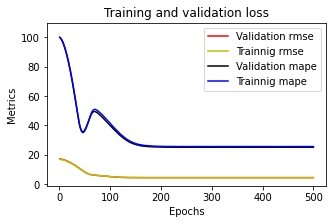

In [34]:
plotme(model1_1)

In [35]:
# inputs: distance
model1_2 = nnmodel(10, num_hlayers=1,Epoch=500)
model1_2

Epoch 1/500
399/399 [==============================] - 0s 881us/step - loss: 1030896.5000 - mape: 99.8846 - rmse: 1015.3307 - val_loss: 1065740.0000 - val_mape: 99.7081 - val_rmse: 1032.3468
Epoch 2/500
399/399 [==============================] - 0s 695us/step - loss: 1024283.3125 - mape: 99.3891 - rmse: 1012.0688 - val_loss: 1056226.8750 - val_mape: 99.0144 - val_rmse: 1027.7290
Epoch 3/500
399/399 [==============================] - 0s 672us/step - loss: 1012656.3125 - mape: 98.4838 - rmse: 1006.3083 - val_loss: 1041859.6250 - val_mape: 97.9504 - val_rmse: 1020.7153
Epoch 4/500
399/399 [==============================] - 0s 693us/step - loss: 996635.3125 - mape: 97.2314 - rmse: 998.3162 - val_loss: 1023268.6875 - val_mape: 96.5553 - val_rmse: 1011.5674
Epoch 5/500
399/399 [==============================] - 0s 695us/step - loss: 976862.7500 - mape: 95.6670 - rmse: 988.3636 - val_loss: 1001138.3125 - val_mape: 94.8713 - val_rmse: 1000.5690
Epoch 6/500
399/399 [============================

Epoch 88/500
399/399 [==============================] - 0s 750us/step - loss: 73093.2188 - mape: 27.7450 - rmse: 270.3576 - val_loss: 75488.3750 - val_mape: 26.9613 - val_rmse: 274.7515
Epoch 89/500
399/399 [==============================] - 0s 706us/step - loss: 72991.7891 - mape: 27.4870 - rmse: 270.1699 - val_loss: 75445.3047 - val_mape: 26.8947 - val_rmse: 274.6731
Epoch 90/500
399/399 [==============================] - 0s 694us/step - loss: 72909.1562 - mape: 27.4227 - rmse: 270.0170 - val_loss: 75402.7422 - val_mape: 26.6841 - val_rmse: 274.5956
Epoch 91/500
399/399 [==============================] - 0s 718us/step - loss: 72834.3594 - mape: 27.2153 - rmse: 269.8784 - val_loss: 75378.8594 - val_mape: 26.6146 - val_rmse: 274.5521
Epoch 92/500
399/399 [==============================] - 0s 732us/step - loss: 72772.0156 - mape: 27.1352 - rmse: 269.7629 - val_loss: 75355.3438 - val_mape: 26.4667 - val_rmse: 274.5093
Epoch 93/500
399/399 [==============================] - 0s 678us/step 

Epoch 132/500
399/399 [==============================] - 0s 707us/step - loss: 72457.9219 - mape: 25.7285 - rmse: 269.1801 - val_loss: 75439.9062 - val_mape: 25.2305 - val_rmse: 274.6633
Epoch 133/500
399/399 [==============================] - 0s 699us/step - loss: 72458.5781 - mape: 25.7107 - rmse: 269.1813 - val_loss: 75440.3750 - val_mape: 25.2382 - val_rmse: 274.6641
Epoch 134/500
399/399 [==============================] - 0s 704us/step - loss: 72459.5156 - mape: 25.7293 - rmse: 269.1830 - val_loss: 75440.6562 - val_mape: 25.2426 - val_rmse: 274.6646
Epoch 135/500
399/399 [==============================] - 0s 677us/step - loss: 72457.6484 - mape: 25.7293 - rmse: 269.1796 - val_loss: 75438.1406 - val_mape: 25.1912 - val_rmse: 274.6600
Epoch 136/500
399/399 [==============================] - 0s 685us/step - loss: 72458.4219 - mape: 25.6474 - rmse: 269.1810 - val_loss: 75447.3906 - val_mape: 25.2669 - val_rmse: 274.6769
Epoch 137/500
399/399 [==============================] - 0s 749us

Epoch 176/500
399/399 [==============================] - 0s 720us/step - loss: 72455.6406 - mape: 25.6673 - rmse: 269.1758 - val_loss: 75449.9297 - val_mape: 25.2327 - val_rmse: 274.6815
Epoch 177/500
399/399 [==============================] - 0s 751us/step - loss: 72457.1875 - mape: 25.6904 - rmse: 269.1787 - val_loss: 75444.9922 - val_mape: 25.1736 - val_rmse: 274.6725
Epoch 178/500
399/399 [==============================] - 0s 715us/step - loss: 72457.1484 - mape: 25.7025 - rmse: 269.1786 - val_loss: 75444.2344 - val_mape: 25.1768 - val_rmse: 274.6711
Epoch 179/500
399/399 [==============================] - 0s 714us/step - loss: 72457.2031 - mape: 25.6147 - rmse: 269.1788 - val_loss: 75450.3047 - val_mape: 25.2343 - val_rmse: 274.6822
Epoch 180/500
399/399 [==============================] - 0s 701us/step - loss: 72457.8359 - mape: 25.6649 - rmse: 269.1799 - val_loss: 75452.8672 - val_mape: 25.2546 - val_rmse: 274.6869
Epoch 181/500
399/399 [==============================] - 0s 714us

Epoch 220/500
399/399 [==============================] - 0s 713us/step - loss: 72457.3281 - mape: 25.6779 - rmse: 269.1790 - val_loss: 75444.1094 - val_mape: 25.1505 - val_rmse: 274.6709
Epoch 221/500
399/399 [==============================] - 0s 686us/step - loss: 72458.6172 - mape: 25.6928 - rmse: 269.1814 - val_loss: 75446.4375 - val_mape: 25.1829 - val_rmse: 274.6751
Epoch 222/500
399/399 [==============================] - 0s 707us/step - loss: 72459.5938 - mape: 25.6101 - rmse: 269.1832 - val_loss: 75451.6250 - val_mape: 25.2317 - val_rmse: 274.6846
Epoch 223/500
399/399 [==============================] - 0s 701us/step - loss: 72457.7031 - mape: 25.6795 - rmse: 269.1797 - val_loss: 75451.4531 - val_mape: 25.2284 - val_rmse: 274.6843
Epoch 224/500
399/399 [==============================] - 0s 693us/step - loss: 72457.6797 - mape: 25.6312 - rmse: 269.1797 - val_loss: 75448.7266 - val_mape: 25.2081 - val_rmse: 274.6793
Epoch 225/500
399/399 [==============================] - 0s 698us

Epoch 264/500
399/399 [==============================] - 0s 704us/step - loss: 72457.5859 - mape: 25.6595 - rmse: 269.1795 - val_loss: 75447.7656 - val_mape: 25.1991 - val_rmse: 274.6776
Epoch 265/500
399/399 [==============================] - 0s 694us/step - loss: 72457.6016 - mape: 25.6931 - rmse: 269.1795 - val_loss: 75445.3438 - val_mape: 25.1681 - val_rmse: 274.6732
Epoch 266/500
399/399 [==============================] - 0s 692us/step - loss: 72459.1953 - mape: 25.6425 - rmse: 269.1825 - val_loss: 75449.7891 - val_mape: 25.2156 - val_rmse: 274.6812
Epoch 267/500
399/399 [==============================] - 0s 661us/step - loss: 72456.3984 - mape: 25.6751 - rmse: 269.1773 - val_loss: 75448.8984 - val_mape: 25.2049 - val_rmse: 274.6796
Epoch 268/500
399/399 [==============================] - 0s 683us/step - loss: 72458.5859 - mape: 25.6414 - rmse: 269.1813 - val_loss: 75452.3516 - val_mape: 25.2428 - val_rmse: 274.6859
Epoch 269/500
399/399 [==============================] - 0s 704us

Epoch 308/500
399/399 [==============================] - 0s 707us/step - loss: 72459.2969 - mape: 25.6395 - rmse: 269.1826 - val_loss: 75446.5703 - val_mape: 25.1932 - val_rmse: 274.6754
Epoch 309/500
399/399 [==============================] - 0s 674us/step - loss: 72458.5859 - mape: 25.6382 - rmse: 269.1813 - val_loss: 75449.2031 - val_mape: 25.2135 - val_rmse: 274.6802
Epoch 310/500
399/399 [==============================] - 0s 718us/step - loss: 72459.8359 - mape: 25.7376 - rmse: 269.1837 - val_loss: 75444.2266 - val_mape: 25.1664 - val_rmse: 274.6711
Epoch 311/500
399/399 [==============================] - 0s 698us/step - loss: 72456.7891 - mape: 25.6094 - rmse: 269.1780 - val_loss: 75452.8750 - val_mape: 25.2573 - val_rmse: 274.6869
Epoch 312/500
399/399 [==============================] - 0s 696us/step - loss: 72458.1250 - mape: 25.6733 - rmse: 269.1805 - val_loss: 75454.4531 - val_mape: 25.2679 - val_rmse: 274.6897
Epoch 313/500
399/399 [==============================] - 0s 723us

Epoch 352/500
399/399 [==============================] - 0s 689us/step - loss: 72457.2500 - mape: 25.6506 - rmse: 269.1788 - val_loss: 75448.2656 - val_mape: 25.2057 - val_rmse: 274.6785
Epoch 353/500
399/399 [==============================] - 0s 675us/step - loss: 72457.1641 - mape: 25.5926 - rmse: 269.1787 - val_loss: 75456.6484 - val_mape: 25.2785 - val_rmse: 274.6937
Epoch 354/500
399/399 [==============================] - 0s 703us/step - loss: 72458.3906 - mape: 25.7047 - rmse: 269.1810 - val_loss: 75448.3594 - val_mape: 25.2077 - val_rmse: 274.6786
Epoch 355/500
399/399 [==============================] - 0s 686us/step - loss: 72456.8594 - mape: 25.6800 - rmse: 269.1781 - val_loss: 75455.2578 - val_mape: 25.2675 - val_rmse: 274.6912
Epoch 356/500
399/399 [==============================] - 0s 672us/step - loss: 72457.8047 - mape: 25.7041 - rmse: 269.1799 - val_loss: 75447.3672 - val_mape: 25.1904 - val_rmse: 274.6768
Epoch 357/500
399/399 [==============================] - 0s 693us

Epoch 396/500
399/399 [==============================] - 0s 704us/step - loss: 72459.8594 - mape: 25.7053 - rmse: 269.1837 - val_loss: 75448.9297 - val_mape: 25.2092 - val_rmse: 274.6797
Epoch 397/500
399/399 [==============================] - 0s 676us/step - loss: 72457.9141 - mape: 25.7454 - rmse: 269.1801 - val_loss: 75446.8594 - val_mape: 25.1834 - val_rmse: 274.6759
Epoch 398/500
399/399 [==============================] - 0s 697us/step - loss: 72459.0312 - mape: 25.6726 - rmse: 269.1822 - val_loss: 75446.2422 - val_mape: 25.1917 - val_rmse: 274.6748
Epoch 399/500
399/399 [==============================] - 0s 682us/step - loss: 72456.9609 - mape: 25.6752 - rmse: 269.1783 - val_loss: 75445.1172 - val_mape: 25.1753 - val_rmse: 274.6728
Epoch 400/500
399/399 [==============================] - 0s 697us/step - loss: 72459.1875 - mape: 25.6816 - rmse: 269.1824 - val_loss: 75449.1484 - val_mape: 25.2170 - val_rmse: 274.6801
Epoch 401/500
399/399 [==============================] - 0s 717us

Epoch 440/500
399/399 [==============================] - 0s 702us/step - loss: 72458.5859 - mape: 25.6957 - rmse: 269.1813 - val_loss: 75445.8594 - val_mape: 25.1918 - val_rmse: 274.6741
Epoch 441/500
399/399 [==============================] - 0s 683us/step - loss: 72458.0938 - mape: 25.6209 - rmse: 269.1804 - val_loss: 75447.3203 - val_mape: 25.1906 - val_rmse: 274.6768
Epoch 442/500
399/399 [==============================] - 0s 710us/step - loss: 72457.7031 - mape: 25.6636 - rmse: 269.1797 - val_loss: 75453.3984 - val_mape: 25.2521 - val_rmse: 274.6878
Epoch 443/500
399/399 [==============================] - 0s 716us/step - loss: 72456.3359 - mape: 25.7815 - rmse: 269.1772 - val_loss: 75445.5000 - val_mape: 25.1805 - val_rmse: 274.6734
Epoch 444/500
399/399 [==============================] - 0s 691us/step - loss: 72457.6328 - mape: 25.6687 - rmse: 269.1796 - val_loss: 75443.8594 - val_mape: 25.1630 - val_rmse: 274.6705
Epoch 445/500
399/399 [==============================] - 0s 698us

Epoch 484/500
399/399 [==============================] - 0s 658us/step - loss: 72457.2031 - mape: 25.7002 - rmse: 269.1788 - val_loss: 75448.7188 - val_mape: 25.2059 - val_rmse: 274.6793
Epoch 485/500
399/399 [==============================] - 0s 663us/step - loss: 72455.7266 - mape: 25.6301 - rmse: 269.1760 - val_loss: 75454.4922 - val_mape: 25.2595 - val_rmse: 274.6898
Epoch 486/500
399/399 [==============================] - 0s 750us/step - loss: 72458.0703 - mape: 25.7273 - rmse: 269.1804 - val_loss: 75448.1484 - val_mape: 25.2075 - val_rmse: 274.6783
Epoch 487/500
399/399 [==============================] - 0s 678us/step - loss: 72456.4141 - mape: 25.7094 - rmse: 269.1773 - val_loss: 75444.7578 - val_mape: 25.1721 - val_rmse: 274.6721
Epoch 488/500
399/399 [==============================] - 0s 724us/step - loss: 72458.0078 - mape: 25.6637 - rmse: 269.1802 - val_loss: 75447.4609 - val_mape: 25.1929 - val_rmse: 274.6770
Epoch 489/500
399/399 [==============================] - 0s 718us

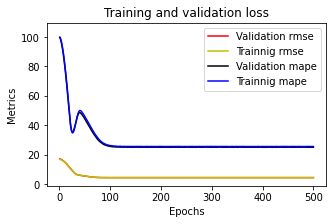

In [36]:
plotme(model1_2)

In [37]:
# inputs: distance
model1_3 = nnmodel(20, num_hlayers=1,Epoch=500)
model1_3

Epoch 1/500
399/399 [==============================] - 0s 860us/step - loss: 1029245.3750 - mape: 99.7584 - rmse: 1014.5173 - val_loss: 1061236.7500 - val_mape: 99.3767 - val_rmse: 1030.1635
Epoch 2/500
399/399 [==============================] - 0s 707us/step - loss: 1014798.5000 - mape: 98.6523 - rmse: 1007.3721 - val_loss: 1040006.8125 - val_mape: 97.8029 - val_rmse: 1019.8073
Epoch 3/500
399/399 [==============================] - 0s 722us/step - loss: 988753.1250 - mape: 96.6017 - rmse: 994.3607 - val_loss: 1007873.0625 - val_mape: 95.3725 - val_rmse: 1003.9288
Epoch 4/500
399/399 [==============================] - 0s 701us/step - loss: 953153.5000 - mape: 93.7241 - rmse: 976.2958 - val_loss: 966876.3750 - val_mape: 92.1993 - val_rmse: 983.2987
Epoch 5/500
399/399 [==============================] - 0s 709us/step - loss: 909923.2500 - mape: 90.1739 - rmse: 953.8990 - val_loss: 918918.4375 - val_mape: 88.3815 - val_rmse: 958.6024
Epoch 6/500
399/399 [==============================] - 

Epoch 45/500
399/399 [==============================] - 0s 688us/step - loss: 83870.9219 - mape: 35.4975 - rmse: 289.6048 - val_loss: 83896.9141 - val_mape: 34.0001 - val_rmse: 289.6496
Epoch 46/500
399/399 [==============================] - 0s 720us/step - loss: 82194.5391 - mape: 34.5858 - rmse: 286.6959 - val_loss: 82454.6875 - val_mape: 33.2208 - val_rmse: 287.1492
Epoch 47/500
399/399 [==============================] - 0s 680us/step - loss: 80696.8906 - mape: 33.9212 - rmse: 284.0720 - val_loss: 81179.8594 - val_mape: 32.5121 - val_rmse: 284.9208
Epoch 48/500
399/399 [==============================] - 0s 678us/step - loss: 79361.5312 - mape: 33.0666 - rmse: 281.7118 - val_loss: 80070.6172 - val_mape: 31.7943 - val_rmse: 282.9675
Epoch 49/500
399/399 [==============================] - 0s 713us/step - loss: 78185.5469 - mape: 32.2714 - rmse: 279.6168 - val_loss: 79114.9766 - val_mape: 31.2801 - val_rmse: 281.2738
Epoch 50/500
399/399 [==============================] - 0s 694us/step 

399/399 [==============================] - 0s 702us/step - loss: 72462.6953 - mape: 25.7466 - rmse: 269.1890 - val_loss: 75440.3125 - val_mape: 25.2171 - val_rmse: 274.6640
Epoch 90/500
399/399 [==============================] - 0s 706us/step - loss: 72460.1250 - mape: 25.7016 - rmse: 269.1842 - val_loss: 75439.5469 - val_mape: 25.2058 - val_rmse: 274.6626
Epoch 91/500
399/399 [==============================] - 0s 690us/step - loss: 72459.4766 - mape: 25.6225 - rmse: 269.1830 - val_loss: 75451.0312 - val_mape: 25.2974 - val_rmse: 274.6835
Epoch 92/500
399/399 [==============================] - 0s 665us/step - loss: 72461.6875 - mape: 25.7471 - rmse: 269.1871 - val_loss: 75439.9531 - val_mape: 25.1835 - val_rmse: 274.6633
Epoch 93/500
399/399 [==============================] - 0s 674us/step - loss: 72458.2188 - mape: 25.6401 - rmse: 269.1806 - val_loss: 75456.1875 - val_mape: 25.3279 - val_rmse: 274.6929
Epoch 94/500
399/399 [==============================] - 0s 686us/step - loss: 72462

Epoch 133/500
399/399 [==============================] - 0s 654us/step - loss: 72462.0859 - mape: 25.6906 - rmse: 269.1878 - val_loss: 75459.7344 - val_mape: 25.2972 - val_rmse: 274.6993
Epoch 134/500
399/399 [==============================] - 0s 746us/step - loss: 72461.7969 - mape: 25.7332 - rmse: 269.1873 - val_loss: 75448.3281 - val_mape: 25.2077 - val_rmse: 274.6786
Epoch 135/500
399/399 [==============================] - 0s 682us/step - loss: 72458.6875 - mape: 25.6837 - rmse: 269.1815 - val_loss: 75443.4531 - val_mape: 25.1513 - val_rmse: 274.6697
Epoch 136/500
399/399 [==============================] - 0s 680us/step - loss: 72460.6172 - mape: 25.6518 - rmse: 269.1851 - val_loss: 75448.3516 - val_mape: 25.2068 - val_rmse: 274.6786
Epoch 137/500
399/399 [==============================] - 0s 680us/step - loss: 72458.2266 - mape: 25.6203 - rmse: 269.1807 - val_loss: 75462.6172 - val_mape: 25.3210 - val_rmse: 274.7046
Epoch 138/500
399/399 [==============================] - 0s 708us

Epoch 177/500
399/399 [==============================] - 0s 691us/step - loss: 72460.5625 - mape: 25.6334 - rmse: 269.1850 - val_loss: 75449.0859 - val_mape: 25.2026 - val_rmse: 274.6800
Epoch 178/500
399/399 [==============================] - 0s 700us/step - loss: 72456.0547 - mape: 25.7847 - rmse: 269.1766 - val_loss: 75439.9062 - val_mape: 25.0888 - val_rmse: 274.6633
Epoch 179/500
399/399 [==============================] - 0s 689us/step - loss: 72464.6797 - mape: 25.6116 - rmse: 269.1927 - val_loss: 75445.5391 - val_mape: 25.1780 - val_rmse: 274.6735
Epoch 180/500
399/399 [==============================] - 0s 702us/step - loss: 72463.9141 - mape: 25.6437 - rmse: 269.1912 - val_loss: 75458.0781 - val_mape: 25.2650 - val_rmse: 274.6964
Epoch 181/500
399/399 [==============================] - 0s 686us/step - loss: 72459.5312 - mape: 25.7242 - rmse: 269.1831 - val_loss: 75442.1719 - val_mape: 25.1184 - val_rmse: 274.6674
Epoch 182/500
399/399 [==============================] - 0s 705us

Epoch 221/500
399/399 [==============================] - 0s 701us/step - loss: 72459.1094 - mape: 25.6671 - rmse: 269.1823 - val_loss: 75449.9844 - val_mape: 25.2294 - val_rmse: 274.6816
Epoch 222/500
399/399 [==============================] - 0s 684us/step - loss: 72461.4453 - mape: 25.7057 - rmse: 269.1866 - val_loss: 75446.8281 - val_mape: 25.1925 - val_rmse: 274.6759
Epoch 223/500
399/399 [==============================] - 0s 721us/step - loss: 72459.7500 - mape: 25.6475 - rmse: 269.1835 - val_loss: 75453.2344 - val_mape: 25.2512 - val_rmse: 274.6875
Epoch 224/500
399/399 [==============================] - 0s 686us/step - loss: 72464.1406 - mape: 25.6853 - rmse: 269.1917 - val_loss: 75453.1875 - val_mape: 25.2384 - val_rmse: 274.6874
Epoch 225/500
399/399 [==============================] - 0s 689us/step - loss: 72459.1875 - mape: 25.7205 - rmse: 269.1824 - val_loss: 75445.1094 - val_mape: 25.1607 - val_rmse: 274.6727
Epoch 226/500
399/399 [==============================] - 0s 713us

Epoch 265/500
399/399 [==============================] - 0s 661us/step - loss: 72457.0625 - mape: 25.6480 - rmse: 269.1785 - val_loss: 75449.1094 - val_mape: 25.2109 - val_rmse: 274.6800
Epoch 266/500
399/399 [==============================] - 0s 665us/step - loss: 72458.7266 - mape: 25.6999 - rmse: 269.1816 - val_loss: 75444.3203 - val_mape: 25.1593 - val_rmse: 274.6713
Epoch 267/500
399/399 [==============================] - 0s 709us/step - loss: 72457.5938 - mape: 25.7011 - rmse: 269.1795 - val_loss: 75438.6797 - val_mape: 25.1124 - val_rmse: 274.6610
Epoch 268/500
399/399 [==============================] - 0s 693us/step - loss: 72459.9297 - mape: 25.6253 - rmse: 269.1838 - val_loss: 75448.6250 - val_mape: 25.2127 - val_rmse: 274.6791
Epoch 269/500
399/399 [==============================] - 0s 722us/step - loss: 72458.5703 - mape: 25.6951 - rmse: 269.1813 - val_loss: 75445.6094 - val_mape: 25.1958 - val_rmse: 274.6736
Epoch 270/500
399/399 [==============================] - 0s 732us

Epoch 309/500
399/399 [==============================] - 0s 676us/step - loss: 72460.5078 - mape: 25.6216 - rmse: 269.1849 - val_loss: 75444.2500 - val_mape: 25.1569 - val_rmse: 274.6712
Epoch 310/500
399/399 [==============================] - 0s 720us/step - loss: 72460.8125 - mape: 25.6820 - rmse: 269.1855 - val_loss: 75443.9453 - val_mape: 25.1794 - val_rmse: 274.6706
Epoch 311/500
399/399 [==============================] - 0s 710us/step - loss: 72459.7266 - mape: 25.6844 - rmse: 269.1834 - val_loss: 75446.8672 - val_mape: 25.1745 - val_rmse: 274.6759
Epoch 312/500
399/399 [==============================] - 0s 686us/step - loss: 72462.3047 - mape: 25.6445 - rmse: 269.1882 - val_loss: 75444.0156 - val_mape: 25.1822 - val_rmse: 274.6707
Epoch 313/500
399/399 [==============================] - 0s 739us/step - loss: 72457.4609 - mape: 25.6852 - rmse: 269.1792 - val_loss: 75444.7969 - val_mape: 25.1562 - val_rmse: 274.6721
Epoch 314/500
399/399 [==============================] - 0s 716us

Epoch 353/500
399/399 [==============================] - 0s 730us/step - loss: 72461.5312 - mape: 25.7501 - rmse: 269.1868 - val_loss: 75438.0625 - val_mape: 25.1064 - val_rmse: 274.6599
Epoch 354/500
399/399 [==============================] - 0s 741us/step - loss: 72461.6875 - mape: 25.6745 - rmse: 269.1871 - val_loss: 75441.0078 - val_mape: 25.1207 - val_rmse: 274.6653
Epoch 355/500
399/399 [==============================] - 0s 710us/step - loss: 72460.7812 - mape: 25.6851 - rmse: 269.1854 - val_loss: 75439.3438 - val_mape: 25.1066 - val_rmse: 274.6622
Epoch 356/500
399/399 [==============================] - 0s 706us/step - loss: 72459.5859 - mape: 25.6026 - rmse: 269.1832 - val_loss: 75452.0703 - val_mape: 25.2477 - val_rmse: 274.6854
Epoch 357/500
399/399 [==============================] - 0s 697us/step - loss: 72459.5625 - mape: 25.7149 - rmse: 269.1831 - val_loss: 75446.4375 - val_mape: 25.1962 - val_rmse: 274.6751
Epoch 358/500
399/399 [==============================] - 0s 675us

Epoch 397/500
399/399 [==============================] - 0s 698us/step - loss: 72456.6094 - mape: 25.7863 - rmse: 269.1776 - val_loss: 75438.8359 - val_mape: 25.0879 - val_rmse: 274.6613
Epoch 398/500
399/399 [==============================] - 0s 693us/step - loss: 72459.7188 - mape: 25.7050 - rmse: 269.1834 - val_loss: 75436.5000 - val_mape: 25.0424 - val_rmse: 274.6571
Epoch 399/500
399/399 [==============================] - 0s 748us/step - loss: 72461.5156 - mape: 25.5912 - rmse: 269.1868 - val_loss: 75443.5781 - val_mape: 25.1392 - val_rmse: 274.6700
Epoch 400/500
399/399 [==============================] - 0s 704us/step - loss: 72459.8750 - mape: 25.6819 - rmse: 269.1837 - val_loss: 75446.1484 - val_mape: 25.1868 - val_rmse: 274.6746
Epoch 401/500
399/399 [==============================] - 0s 688us/step - loss: 72458.5781 - mape: 25.5957 - rmse: 269.1813 - val_loss: 75457.3359 - val_mape: 25.2842 - val_rmse: 274.6950
Epoch 402/500
399/399 [==============================] - 0s 729us

Epoch 441/500
399/399 [==============================] - 0s 683us/step - loss: 72460.3672 - mape: 25.6339 - rmse: 269.1846 - val_loss: 75449.2031 - val_mape: 25.2309 - val_rmse: 274.6802
Epoch 442/500
399/399 [==============================] - 0s 693us/step - loss: 72460.3828 - mape: 25.6449 - rmse: 269.1847 - val_loss: 75453.7422 - val_mape: 25.2642 - val_rmse: 274.6884
Epoch 443/500
399/399 [==============================] - 0s 679us/step - loss: 72458.8906 - mape: 25.7462 - rmse: 269.1819 - val_loss: 75442.6406 - val_mape: 25.1650 - val_rmse: 274.6682
Epoch 444/500
399/399 [==============================] - 0s 669us/step - loss: 72460.7734 - mape: 25.6404 - rmse: 269.1854 - val_loss: 75443.3594 - val_mape: 25.1715 - val_rmse: 274.6696
Epoch 445/500
399/399 [==============================] - 0s 698us/step - loss: 72459.6953 - mape: 25.6480 - rmse: 269.1834 - val_loss: 75453.5078 - val_mape: 25.2588 - val_rmse: 274.6880
Epoch 446/500
399/399 [==============================] - 0s 684us

Epoch 485/500
399/399 [==============================] - 0s 683us/step - loss: 72458.8594 - mape: 25.6868 - rmse: 269.1818 - val_loss: 75447.2656 - val_mape: 25.1998 - val_rmse: 274.6767
Epoch 486/500
399/399 [==============================] - 0s 718us/step - loss: 72458.1953 - mape: 25.6453 - rmse: 269.1806 - val_loss: 75452.9922 - val_mape: 25.2736 - val_rmse: 274.6871
Epoch 487/500
399/399 [==============================] - 0s 675us/step - loss: 72460.8281 - mape: 25.7105 - rmse: 269.1855 - val_loss: 75446.2969 - val_mape: 25.2010 - val_rmse: 274.6749
Epoch 488/500
399/399 [==============================] - 0s 724us/step - loss: 72460.6172 - mape: 25.6727 - rmse: 269.1851 - val_loss: 75451.7188 - val_mape: 25.2436 - val_rmse: 274.6848
Epoch 489/500
399/399 [==============================] - 0s 675us/step - loss: 72460.1016 - mape: 25.6352 - rmse: 269.1841 - val_loss: 75457.2266 - val_mape: 25.2910 - val_rmse: 274.6948
Epoch 490/500
399/399 [==============================] - 0s 792us

In [38]:
# inputs: distance
model1_4 = nnmodel(10,5, num_hlayers=2,Epoch=500)
model1_4

Epoch 1/500
399/399 [==============================] - 1s 852us/step - loss: 1032177.3750 - mape: 99.9682 - rmse: 1015.9613 - val_loss: 1069239.6250 - val_mape: 99.9371 - val_rmse: 1034.0404
Epoch 2/500
399/399 [==============================] - 0s 740us/step - loss: 1031483.8125 - mape: 99.9037 - rmse: 1015.6199 - val_loss: 1068531.2500 - val_mape: 99.8744 - val_rmse: 1033.6979
Epoch 3/500
399/399 [==============================] - 0s 710us/step - loss: 1030791.0625 - mape: 99.8397 - rmse: 1015.2788 - val_loss: 1067823.5000 - val_mape: 99.8118 - val_rmse: 1033.3555
Epoch 4/500
399/399 [==============================] - 0s 746us/step - loss: 1030099.1250 - mape: 99.7757 - rmse: 1014.9380 - val_loss: 1067115.5000 - val_mape: 99.7491 - val_rmse: 1033.0128
Epoch 5/500
399/399 [==============================] - 0s 752us/step - loss: 1029408.1250 - mape: 99.7114 - rmse: 1014.5975 - val_loss: 1066408.5000 - val_mape: 99.6865 - val_rmse: 1032.6705
Epoch 6/500
399/399 [========================

Epoch 44/500
399/399 [==============================] - 0s 755us/step - loss: 1002689.8125 - mape: 97.2138 - rmse: 1001.3440 - val_loss: 1039076.3125 - val_mape: 97.2438 - val_rmse: 1019.3510
Epoch 45/500
399/399 [==============================] - 0s 708us/step - loss: 1002011.2500 - mape: 97.1496 - rmse: 1001.0051 - val_loss: 1038382.5625 - val_mape: 97.1812 - val_rmse: 1019.0106
Epoch 46/500
399/399 [==============================] - 0s 755us/step - loss: 1001332.5625 - mape: 97.0859 - rmse: 1000.6661 - val_loss: 1037687.5625 - val_mape: 97.1186 - val_rmse: 1018.6695
Epoch 47/500
399/399 [==============================] - 0s 705us/step - loss: 1000654.1875 - mape: 97.0220 - rmse: 1000.3270 - val_loss: 1036994.1875 - val_mape: 97.0560 - val_rmse: 1018.3291
Epoch 48/500
399/399 [==============================] - 0s 724us/step - loss: 999976.5625 - mape: 96.9577 - rmse: 999.9883 - val_loss: 1036299.5000 - val_mape: 96.9932 - val_rmse: 1017.9880
Epoch 49/500
399/399 [====================

399/399 [==============================] - 0s 726us/step - loss: 945482.5000 - mape: 91.7082 - rmse: 972.3593 - val_loss: 980516.1875 - val_mape: 91.8594 - val_rmse: 990.2101
Epoch 131/500
399/399 [==============================] - 0s 739us/step - loss: 944830.7500 - mape: 91.6443 - rmse: 972.0240 - val_loss: 979849.0000 - val_mape: 91.7968 - val_rmse: 989.8732
Epoch 132/500
399/399 [==============================] - 0s 715us/step - loss: 944179.9375 - mape: 91.5800 - rmse: 971.6892 - val_loss: 979181.4375 - val_mape: 91.7341 - val_rmse: 989.5359
Epoch 133/500
399/399 [==============================] - 0s 724us/step - loss: 943529.6250 - mape: 91.5160 - rmse: 971.3546 - val_loss: 978515.8125 - val_mape: 91.6716 - val_rmse: 989.1996
Epoch 134/500
399/399 [==============================] - 0s 720us/step - loss: 942879.1250 - mape: 91.4522 - rmse: 971.0197 - val_loss: 977849.5625 - val_mape: 91.6090 - val_rmse: 988.8627
Epoch 135/500
399/399 [==============================] - 0s 719us/ste

399/399 [==============================] - 0s 724us/step - loss: 890628.0625 - mape: 86.2069 - rmse: 943.7310 - val_loss: 924308.9375 - val_mape: 86.4781 - val_rmse: 961.4099
Epoch 217/500
399/399 [==============================] - 0s 762us/step - loss: 890003.9375 - mape: 86.1431 - rmse: 943.4002 - val_loss: 923668.8750 - val_mape: 86.4155 - val_rmse: 961.0770
Epoch 218/500
399/399 [==============================] - 0s 744us/step - loss: 889380.0625 - mape: 86.0795 - rmse: 943.0695 - val_loss: 923029.9375 - val_mape: 86.3530 - val_rmse: 960.7444
Epoch 219/500
399/399 [==============================] - 0s 749us/step - loss: 888756.5625 - mape: 86.0154 - rmse: 942.7389 - val_loss: 922390.2500 - val_mape: 86.2904 - val_rmse: 960.4115
Epoch 220/500
399/399 [==============================] - 0s 736us/step - loss: 888133.9375 - mape: 85.9514 - rmse: 942.4086 - val_loss: 921752.0625 - val_mape: 86.2279 - val_rmse: 960.0792
Epoch 221/500
399/399 [==============================] - 0s 726us/ste

399/399 [==============================] - 0s 705us/step - loss: 838118.7500 - mape: 80.7243 - rmse: 915.4883 - val_loss: 870447.6875 - val_mape: 81.0995 - val_rmse: 932.9778
Epoch 303/500
399/399 [==============================] - 0s 741us/step - loss: 837521.7500 - mape: 80.6609 - rmse: 915.1622 - val_loss: 869834.9375 - val_mape: 81.0369 - val_rmse: 932.6494
Epoch 304/500
399/399 [==============================] - 0s 756us/step - loss: 836925.7500 - mape: 80.5975 - rmse: 914.8365 - val_loss: 869223.6250 - val_mape: 80.9745 - val_rmse: 932.3217
Epoch 305/500
399/399 [==============================] - 0s 754us/step - loss: 836329.3750 - mape: 80.5341 - rmse: 914.5104 - val_loss: 868611.6875 - val_mape: 80.9120 - val_rmse: 931.9934
Epoch 306/500
399/399 [==============================] - 0s 708us/step - loss: 835734.0000 - mape: 80.4704 - rmse: 914.1849 - val_loss: 868000.3125 - val_mape: 80.8494 - val_rmse: 931.6653
Epoch 307/500
399/399 [==============================] - 0s 743us/ste

399/399 [==============================] - 0s 760us/step - loss: 787965.8750 - mape: 75.2842 - rmse: 887.6744 - val_loss: 818943.3750 - val_mape: 75.7252 - val_rmse: 904.9549
Epoch 389/500
399/399 [==============================] - 0s 729us/step - loss: 787396.1250 - mape: 75.2212 - rmse: 887.3535 - val_loss: 818359.3750 - val_mape: 75.6628 - val_rmse: 904.6322
Epoch 390/500
399/399 [==============================] - 0s 727us/step - loss: 786827.5000 - mape: 75.1585 - rmse: 887.0330 - val_loss: 817773.9375 - val_mape: 75.6003 - val_rmse: 904.3085
Epoch 391/500
399/399 [==============================] - 0s 767us/step - loss: 786257.5000 - mape: 75.0955 - rmse: 886.7116 - val_loss: 817188.6250 - val_mape: 75.5377 - val_rmse: 903.9849
Epoch 392/500
399/399 [==============================] - 0s 708us/step - loss: 785689.8750 - mape: 75.0322 - rmse: 886.3915 - val_loss: 816605.4375 - val_mape: 75.4753 - val_rmse: 903.6622
Epoch 393/500
399/399 [==============================] - 0s 729us/ste

399/399 [==============================] - 0s 752us/step - loss: 740165.8125 - mape: 69.8922 - rmse: 860.3289 - val_loss: 769795.0000 - val_mape: 70.3569 - val_rmse: 877.3796
Epoch 475/500
399/399 [==============================] - 0s 762us/step - loss: 739624.6250 - mape: 69.8298 - rmse: 860.0143 - val_loss: 769237.4375 - val_mape: 70.2947 - val_rmse: 877.0618
Epoch 476/500
399/399 [==============================] - 0s 714us/step - loss: 739083.4375 - mape: 69.7673 - rmse: 859.6996 - val_loss: 768680.6875 - val_mape: 70.2324 - val_rmse: 876.7444
Epoch 477/500
399/399 [==============================] - 0s 751us/step - loss: 738542.6250 - mape: 69.7051 - rmse: 859.3850 - val_loss: 768124.0000 - val_mape: 70.1702 - val_rmse: 876.4268
Epoch 478/500
399/399 [==============================] - 0s 724us/step - loss: 738001.2500 - mape: 69.6427 - rmse: 859.0700 - val_loss: 767567.4375 - val_mape: 70.1080 - val_rmse: 876.1093
Epoch 479/500
399/399 [==============================] - 0s 734us/ste

In [39]:
# plotme(model1_4)

In [40]:
# inputs: distance
model1_5 = nnmodel(20,10, num_hlayers=2,Epoch=500)
model1_5

Epoch 1/500
399/399 [==============================] - 1s 850us/step - loss: 1016674.1875 - mape: 98.8123 - rmse: 1008.3026 - val_loss: 1009660.9375 - val_mape: 95.6082 - val_rmse: 1004.8188
Epoch 2/500
399/399 [==============================] - 0s 737us/step - loss: 845791.6875 - mape: 84.7433 - rmse: 919.6693 - val_loss: 698610.5000 - val_mape: 69.5205 - val_rmse: 835.8292
Epoch 3/500
399/399 [==============================] - 0s 722us/step - loss: 470189.5312 - mape: 48.7871 - rmse: 685.7037 - val_loss: 299371.9375 - val_mape: 34.9706 - val_rmse: 547.1489
Epoch 4/500
399/399 [==============================] - 0s 710us/step - loss: 198413.6094 - mape: 39.4882 - rmse: 445.4364 - val_loss: 149700.9688 - val_mape: 44.3616 - val_rmse: 386.9121
Epoch 5/500
399/399 [==============================] - 0s 751us/step - loss: 136890.2500 - mape: 48.4462 - rmse: 369.9868 - val_loss: 129616.4219 - val_mape: 48.0631 - val_rmse: 360.0228
Epoch 6/500
399/399 [==============================] - 0s 723

Epoch 45/500
399/399 [==============================] - 0s 718us/step - loss: 72492.6250 - mape: 25.7504 - rmse: 269.2445 - val_loss: 75457.3281 - val_mape: 25.1208 - val_rmse: 274.6950
Epoch 46/500
399/399 [==============================] - 0s 729us/step - loss: 72490.0312 - mape: 25.6134 - rmse: 269.2397 - val_loss: 75435.1875 - val_mape: 25.1160 - val_rmse: 274.6547
Epoch 47/500
399/399 [==============================] - 0s 744us/step - loss: 72493.8984 - mape: 25.6555 - rmse: 269.2469 - val_loss: 75427.7734 - val_mape: 24.9405 - val_rmse: 274.6412
Epoch 48/500
399/399 [==============================] - 0s 726us/step - loss: 72482.2266 - mape: 25.6502 - rmse: 269.2252 - val_loss: 75490.2188 - val_mape: 25.3811 - val_rmse: 274.7548
Epoch 49/500
399/399 [==============================] - 0s 708us/step - loss: 72486.6562 - mape: 25.7215 - rmse: 269.2335 - val_loss: 75470.5625 - val_mape: 25.3347 - val_rmse: 274.7191
Epoch 50/500
399/399 [==============================] - 0s 688us/step 

399/399 [==============================] - 0s 714us/step - loss: 72490.9297 - mape: 25.7272 - rmse: 269.2414 - val_loss: 75427.5859 - val_mape: 24.9749 - val_rmse: 274.6408
Epoch 90/500
399/399 [==============================] - 0s 722us/step - loss: 72514.4453 - mape: 25.6539 - rmse: 269.2851 - val_loss: 75438.5391 - val_mape: 25.0068 - val_rmse: 274.6608
Epoch 91/500
399/399 [==============================] - 0s 734us/step - loss: 72502.1172 - mape: 25.6727 - rmse: 269.2622 - val_loss: 75493.4297 - val_mape: 25.4383 - val_rmse: 274.7607
Epoch 92/500
399/399 [==============================] - 0s 719us/step - loss: 72481.5156 - mape: 25.6606 - rmse: 269.2239 - val_loss: 75581.0234 - val_mape: 25.6863 - val_rmse: 274.9200
Epoch 93/500
399/399 [==============================] - 0s 740us/step - loss: 72491.3516 - mape: 25.7581 - rmse: 269.2422 - val_loss: 75465.7266 - val_mape: 25.2456 - val_rmse: 274.7103
Epoch 94/500
399/399 [==============================] - 0s 688us/step - loss: 72497

Epoch 133/500
399/399 [==============================] - 0s 733us/step - loss: 72477.5234 - mape: 25.6894 - rmse: 269.2165 - val_loss: 75436.1797 - val_mape: 25.1980 - val_rmse: 274.6565
Epoch 134/500
399/399 [==============================] - 0s 722us/step - loss: 72475.3594 - mape: 25.7506 - rmse: 269.2125 - val_loss: 75429.8672 - val_mape: 24.9925 - val_rmse: 274.6450
Epoch 135/500
399/399 [==============================] - 0s 692us/step - loss: 72480.5156 - mape: 25.6307 - rmse: 269.2220 - val_loss: 75447.5234 - val_mape: 25.1940 - val_rmse: 274.6771
Epoch 136/500
399/399 [==============================] - 0s 733us/step - loss: 72479.2734 - mape: 25.7133 - rmse: 269.2198 - val_loss: 75502.2812 - val_mape: 25.4635 - val_rmse: 274.7768
Epoch 137/500
399/399 [==============================] - 0s 715us/step - loss: 72481.0625 - mape: 25.6847 - rmse: 269.2231 - val_loss: 75450.4922 - val_mape: 25.1735 - val_rmse: 274.6825
Epoch 138/500
399/399 [==============================] - 0s 724us

Epoch 177/500
399/399 [==============================] - 0s 751us/step - loss: 72481.4844 - mape: 25.7186 - rmse: 269.2238 - val_loss: 75450.3594 - val_mape: 25.2882 - val_rmse: 274.6823
Epoch 178/500
399/399 [==============================] - 0s 742us/step - loss: 72471.4844 - mape: 25.8376 - rmse: 269.2053 - val_loss: 75482.2969 - val_mape: 24.5147 - val_rmse: 274.7404
Epoch 179/500
399/399 [==============================] - 0s 704us/step - loss: 72496.3672 - mape: 25.5734 - rmse: 269.2515 - val_loss: 75457.6328 - val_mape: 25.2380 - val_rmse: 274.6955
Epoch 180/500
399/399 [==============================] - 0s 718us/step - loss: 72483.1484 - mape: 25.7928 - rmse: 269.2270 - val_loss: 75459.2578 - val_mape: 24.7003 - val_rmse: 274.6985
Epoch 181/500
399/399 [==============================] - 0s 743us/step - loss: 72489.9531 - mape: 25.5728 - rmse: 269.2396 - val_loss: 75446.2812 - val_mape: 25.1259 - val_rmse: 274.6749
Epoch 182/500
399/399 [==============================] - 0s 748us

Epoch 221/500
399/399 [==============================] - 0s 700us/step - loss: 72491.6484 - mape: 25.7491 - rmse: 269.2427 - val_loss: 75445.3828 - val_mape: 24.7908 - val_rmse: 274.6732
Epoch 222/500
399/399 [==============================] - 0s 715us/step - loss: 72471.9453 - mape: 25.5933 - rmse: 269.2061 - val_loss: 75460.7812 - val_mape: 25.2692 - val_rmse: 274.7013
Epoch 223/500
399/399 [==============================] - 0s 716us/step - loss: 72484.9453 - mape: 25.6765 - rmse: 269.2303 - val_loss: 75440.1250 - val_mape: 25.1544 - val_rmse: 274.6637
Epoch 224/500
399/399 [==============================] - 0s 764us/step - loss: 72487.4922 - mape: 25.6344 - rmse: 269.2350 - val_loss: 75460.8125 - val_mape: 25.2483 - val_rmse: 274.7013
Epoch 225/500
399/399 [==============================] - 0s 720us/step - loss: 72479.8594 - mape: 25.7604 - rmse: 269.2208 - val_loss: 75435.2812 - val_mape: 25.0371 - val_rmse: 274.6548
Epoch 226/500
399/399 [==============================] - 0s 717us

Epoch 265/500
399/399 [==============================] - 0s 729us/step - loss: 72483.8984 - mape: 25.6835 - rmse: 269.2283 - val_loss: 75624.0938 - val_mape: 25.8034 - val_rmse: 274.9984
Epoch 266/500
399/399 [==============================] - 0s 693us/step - loss: 72490.0078 - mape: 25.6853 - rmse: 269.2397 - val_loss: 75634.3906 - val_mape: 25.8711 - val_rmse: 275.0171
Epoch 267/500
399/399 [==============================] - 0s 721us/step - loss: 72486.8359 - mape: 25.7276 - rmse: 269.2338 - val_loss: 75477.7656 - val_mape: 25.3553 - val_rmse: 274.7322
Epoch 268/500
399/399 [==============================] - 0s 751us/step - loss: 72476.6562 - mape: 25.6592 - rmse: 269.2149 - val_loss: 75533.3516 - val_mape: 25.6143 - val_rmse: 274.8333
Epoch 269/500
399/399 [==============================] - 0s 733us/step - loss: 72492.9453 - mape: 25.7135 - rmse: 269.2451 - val_loss: 75435.4141 - val_mape: 24.8254 - val_rmse: 274.6551
Epoch 270/500
399/399 [==============================] - 0s 748us

Epoch 309/500
399/399 [==============================] - 0s 745us/step - loss: 72478.7266 - mape: 25.6425 - rmse: 269.2187 - val_loss: 75434.8516 - val_mape: 24.8016 - val_rmse: 274.6541
Epoch 310/500
399/399 [==============================] - 0s 707us/step - loss: 72483.9531 - mape: 25.6302 - rmse: 269.2285 - val_loss: 75430.6797 - val_mape: 25.1451 - val_rmse: 274.6465
Epoch 311/500
399/399 [==============================] - 0s 727us/step - loss: 72479.4297 - mape: 25.7330 - rmse: 269.2200 - val_loss: 75443.3594 - val_mape: 25.0690 - val_rmse: 274.6696
Epoch 312/500
399/399 [==============================] - 0s 720us/step - loss: 72492.1406 - mape: 25.6936 - rmse: 269.2437 - val_loss: 75461.2031 - val_mape: 25.2896 - val_rmse: 274.7020
Epoch 313/500
399/399 [==============================] - 0s 737us/step - loss: 72462.2422 - mape: 25.5452 - rmse: 269.1881 - val_loss: 75598.2031 - val_mape: 25.8194 - val_rmse: 274.9513
Epoch 314/500
399/399 [==============================] - 0s 708us

Epoch 353/500
399/399 [==============================] - 0s 767us/step - loss: 72476.8516 - mape: 25.6556 - rmse: 269.2152 - val_loss: 75437.2500 - val_mape: 24.9941 - val_rmse: 274.6584
Epoch 354/500
399/399 [==============================] - 0s 720us/step - loss: 72483.1641 - mape: 25.6409 - rmse: 269.2270 - val_loss: 75438.9688 - val_mape: 25.1321 - val_rmse: 274.6616
Epoch 355/500
399/399 [==============================] - 0s 723us/step - loss: 72496.0312 - mape: 25.6565 - rmse: 269.2509 - val_loss: 75474.2422 - val_mape: 25.3859 - val_rmse: 274.7258
Epoch 356/500
399/399 [==============================] - 0s 731us/step - loss: 72482.0859 - mape: 25.6317 - rmse: 269.2250 - val_loss: 75574.0547 - val_mape: 25.7477 - val_rmse: 274.9073
Epoch 357/500
399/399 [==============================] - 0s 697us/step - loss: 72513.3125 - mape: 25.6687 - rmse: 269.2830 - val_loss: 75485.3594 - val_mape: 25.4501 - val_rmse: 274.7460
Epoch 358/500
399/399 [==============================] - 0s 721us

Epoch 397/500
399/399 [==============================] - 0s 733us/step - loss: 72483.4141 - mape: 25.6899 - rmse: 269.2274 - val_loss: 75439.4531 - val_mape: 25.1376 - val_rmse: 274.6624
Epoch 398/500
399/399 [==============================] - 0s 721us/step - loss: 72470.6250 - mape: 25.6841 - rmse: 269.2037 - val_loss: 75431.5000 - val_mape: 24.9539 - val_rmse: 274.6479
Epoch 399/500
399/399 [==============================] - 0s 746us/step - loss: 72505.3125 - mape: 25.6111 - rmse: 269.2681 - val_loss: 75449.8828 - val_mape: 25.2459 - val_rmse: 274.6814
Epoch 400/500
399/399 [==============================] - 0s 688us/step - loss: 72480.5312 - mape: 25.6800 - rmse: 269.2221 - val_loss: 75443.3828 - val_mape: 25.2341 - val_rmse: 274.6696
Epoch 401/500
399/399 [==============================] - 0s 719us/step - loss: 72486.5859 - mape: 25.7862 - rmse: 269.2333 - val_loss: 75436.8125 - val_mape: 24.9781 - val_rmse: 274.6576
Epoch 402/500
399/399 [==============================] - 0s 733us

Epoch 441/500
399/399 [==============================] - 0s 740us/step - loss: 72499.0469 - mape: 25.7568 - rmse: 269.2565 - val_loss: 75468.0312 - val_mape: 25.3427 - val_rmse: 274.7144
Epoch 442/500
399/399 [==============================] - 0s 700us/step - loss: 72517.8906 - mape: 25.6394 - rmse: 269.2915 - val_loss: 75446.6250 - val_mape: 25.2570 - val_rmse: 274.6755
Epoch 443/500
399/399 [==============================] - 0s 756us/step - loss: 72475.4062 - mape: 25.6032 - rmse: 269.2126 - val_loss: 75593.5938 - val_mape: 25.7577 - val_rmse: 274.9429
Epoch 444/500
399/399 [==============================] - 0s 699us/step - loss: 72502.5859 - mape: 25.7258 - rmse: 269.2630 - val_loss: 75528.1016 - val_mape: 25.6022 - val_rmse: 274.8238
Epoch 445/500
399/399 [==============================] - 0s 719us/step - loss: 72483.9922 - mape: 25.7270 - rmse: 269.2285 - val_loss: 75434.1562 - val_mape: 25.1722 - val_rmse: 274.6528
Epoch 446/500
399/399 [==============================] - 0s 733us

Epoch 485/500
399/399 [==============================] - 0s 727us/step - loss: 72476.1875 - mape: 25.7506 - rmse: 269.2140 - val_loss: 75490.3125 - val_mape: 25.3998 - val_rmse: 274.7550
Epoch 486/500
399/399 [==============================] - 0s 730us/step - loss: 72481.2891 - mape: 25.7398 - rmse: 269.2235 - val_loss: 75434.1953 - val_mape: 24.9287 - val_rmse: 274.6529
Epoch 487/500
399/399 [==============================] - 0s 715us/step - loss: 72479.2344 - mape: 25.5713 - rmse: 269.2197 - val_loss: 75468.6406 - val_mape: 25.3727 - val_rmse: 274.7156
Epoch 488/500
399/399 [==============================] - 0s 739us/step - loss: 72456.6328 - mape: 25.7200 - rmse: 269.1777 - val_loss: 75433.2109 - val_mape: 25.0269 - val_rmse: 274.6511
Epoch 489/500
399/399 [==============================] - 0s 740us/step - loss: 72473.7891 - mape: 25.6709 - rmse: 269.2096 - val_loss: 75464.1484 - val_mape: 25.3204 - val_rmse: 274.7074
Epoch 490/500
399/399 [==============================] - 0s 739us

In [41]:
# inputs: distance
model1_6 = nnmodel(2, num_hlayers=1,Epoch=500)
model1_6

Epoch 1/500
399/399 [==============================] - 1s 857us/step - loss: 1032214.0625 - mape: 99.9691 - rmse: 1015.9794 - val_loss: 1069234.5000 - val_mape: 99.9373 - val_rmse: 1034.0380
Epoch 2/500
399/399 [==============================] - 0s 672us/step - loss: 1031188.6875 - mape: 99.8866 - rmse: 1015.4746 - val_loss: 1067371.1250 - val_mape: 99.8019 - val_rmse: 1033.1366
Epoch 3/500
399/399 [==============================] - 0s 720us/step - loss: 1027831.1250 - mape: 99.6307 - rmse: 1013.8201 - val_loss: 1062503.2500 - val_mape: 99.4451 - val_rmse: 1030.7780
Epoch 4/500
399/399 [==============================] - 0s 674us/step - loss: 1022241.6250 - mape: 99.1985 - rmse: 1011.0596 - val_loss: 1055943.1250 - val_mape: 98.9584 - val_rmse: 1027.5909
Epoch 5/500
399/399 [==============================] - 0s 716us/step - loss: 1015236.4375 - mape: 98.6530 - rmse: 1007.5894 - val_loss: 1048090.3125 - val_mape: 98.3715 - val_rmse: 1023.7628
Epoch 6/500
399/399 [========================

Epoch 88/500
399/399 [==============================] - 0s 706us/step - loss: 114817.3438 - mape: 46.1527 - rmse: 338.8471 - val_loss: 113750.2812 - val_mape: 44.5862 - val_rmse: 337.2689
Epoch 89/500
399/399 [==============================] - 0s 694us/step - loss: 113493.9219 - mape: 45.8810 - rmse: 336.8886 - val_loss: 112462.9297 - val_mape: 44.2304 - val_rmse: 335.3549
Epoch 90/500
399/399 [==============================] - 0s 690us/step - loss: 112183.9453 - mape: 45.4293 - rmse: 334.9387 - val_loss: 111188.4219 - val_mape: 43.8686 - val_rmse: 333.4493
Epoch 91/500
399/399 [==============================] - 0s 690us/step - loss: 110886.7344 - mape: 45.0953 - rmse: 332.9966 - val_loss: 109927.6875 - val_mape: 43.5264 - val_rmse: 331.5534
Epoch 92/500
399/399 [==============================] - 0s 706us/step - loss: 109609.5547 - mape: 44.7489 - rmse: 331.0733 - val_loss: 108690.5000 - val_mape: 43.1823 - val_rmse: 329.6824
Epoch 93/500
399/399 [==============================] - 0s 6

Epoch 132/500
399/399 [==============================] - 0s 697us/step - loss: 76384.8125 - mape: 31.1566 - rmse: 276.3780 - val_loss: 77897.7578 - val_mape: 30.2336 - val_rmse: 279.1017
Epoch 133/500
399/399 [==============================] - 0s 692us/step - loss: 76071.5547 - mape: 30.9156 - rmse: 275.8107 - val_loss: 77644.6406 - val_mape: 29.9991 - val_rmse: 278.6479
Epoch 134/500
399/399 [==============================] - 0s 729us/step - loss: 75777.7109 - mape: 30.6900 - rmse: 275.2775 - val_loss: 77410.2500 - val_mape: 29.7778 - val_rmse: 278.2270
Epoch 135/500
399/399 [==============================] - 0s 685us/step - loss: 75502.5703 - mape: 30.4509 - rmse: 274.7773 - val_loss: 77193.4766 - val_mape: 29.5721 - val_rmse: 277.8371
Epoch 136/500
399/399 [==============================] - 0s 683us/step - loss: 75245.7188 - mape: 30.2802 - rmse: 274.3095 - val_loss: 76994.0547 - val_mape: 29.3566 - val_rmse: 277.4780
Epoch 137/500
399/399 [==============================] - 0s 689us

Epoch 176/500
399/399 [==============================] - 0s 663us/step - loss: 72504.0859 - mape: 26.2476 - rmse: 269.2658 - val_loss: 75339.9844 - val_mape: 25.6886 - val_rmse: 274.4813
Epoch 177/500
399/399 [==============================] - 0s 673us/step - loss: 72498.7812 - mape: 26.1585 - rmse: 269.2560 - val_loss: 75344.9688 - val_mape: 25.6763 - val_rmse: 274.4904
Epoch 178/500
399/399 [==============================] - 0s 701us/step - loss: 72494.0391 - mape: 26.1713 - rmse: 269.2472 - val_loss: 75347.0625 - val_mape: 25.6360 - val_rmse: 274.4942
Epoch 179/500
399/399 [==============================] - 0s 652us/step - loss: 72490.9922 - mape: 26.1929 - rmse: 269.2415 - val_loss: 75347.2969 - val_mape: 25.5808 - val_rmse: 274.4946
Epoch 180/500
399/399 [==============================] - 0s 686us/step - loss: 72486.9922 - mape: 26.1103 - rmse: 269.2341 - val_loss: 75351.4219 - val_mape: 25.5637 - val_rmse: 274.5021
Epoch 181/500
399/399 [==============================] - 0s 699us

Epoch 220/500
399/399 [==============================] - 0s 671us/step - loss: 72456.7266 - mape: 25.7187 - rmse: 269.1779 - val_loss: 75432.7188 - val_mape: 25.2358 - val_rmse: 274.6502
Epoch 221/500
399/399 [==============================] - 0s 668us/step - loss: 72456.4219 - mape: 25.7096 - rmse: 269.1773 - val_loss: 75435.1875 - val_mape: 25.2455 - val_rmse: 274.6547
Epoch 222/500
399/399 [==============================] - 0s 654us/step - loss: 72456.3281 - mape: 25.7480 - rmse: 269.1771 - val_loss: 75437.2812 - val_mape: 25.2571 - val_rmse: 274.6585
Epoch 223/500
399/399 [==============================] - 0s 680us/step - loss: 72456.8984 - mape: 25.7229 - rmse: 269.1782 - val_loss: 75435.9297 - val_mape: 25.2362 - val_rmse: 274.6560
Epoch 224/500
399/399 [==============================] - 0s 682us/step - loss: 72455.5938 - mape: 25.7455 - rmse: 269.1758 - val_loss: 75434.3750 - val_mape: 25.2233 - val_rmse: 274.6532
Epoch 225/500
399/399 [==============================] - 0s 693us

Epoch 264/500
399/399 [==============================] - 0s 683us/step - loss: 72456.4297 - mape: 25.6820 - rmse: 269.1773 - val_loss: 75445.9922 - val_mape: 25.2031 - val_rmse: 274.6743
Epoch 265/500
399/399 [==============================] - 0s 667us/step - loss: 72457.2969 - mape: 25.6730 - rmse: 269.1789 - val_loss: 75449.0234 - val_mape: 25.2269 - val_rmse: 274.6799
Epoch 266/500
399/399 [==============================] - 0s 677us/step - loss: 72456.0781 - mape: 25.6920 - rmse: 269.1767 - val_loss: 75449.9297 - val_mape: 25.2369 - val_rmse: 274.6815
Epoch 267/500
399/399 [==============================] - 0s 679us/step - loss: 72457.0625 - mape: 25.6875 - rmse: 269.1785 - val_loss: 75449.2344 - val_mape: 25.2284 - val_rmse: 274.6802
Epoch 268/500
399/399 [==============================] - 0s 670us/step - loss: 72455.8984 - mape: 25.6837 - rmse: 269.1763 - val_loss: 75447.0000 - val_mape: 25.2110 - val_rmse: 274.6762
Epoch 269/500
399/399 [==============================] - 0s 678us

Epoch 308/500
399/399 [==============================] - 0s 729us/step - loss: 72456.5156 - mape: 25.6806 - rmse: 269.1775 - val_loss: 75446.6953 - val_mape: 25.2040 - val_rmse: 274.6756
Epoch 309/500
399/399 [==============================] - 0s 673us/step - loss: 72455.6562 - mape: 25.6833 - rmse: 269.1759 - val_loss: 75446.1719 - val_mape: 25.1894 - val_rmse: 274.6747
Epoch 310/500
399/399 [==============================] - 0s 706us/step - loss: 72455.8594 - mape: 25.6791 - rmse: 269.1763 - val_loss: 75445.2031 - val_mape: 25.1789 - val_rmse: 274.6729
Epoch 311/500
399/399 [==============================] - 0s 685us/step - loss: 72455.5547 - mape: 25.6457 - rmse: 269.1757 - val_loss: 75445.7891 - val_mape: 25.1863 - val_rmse: 274.6740
Epoch 312/500
399/399 [==============================] - 0s 705us/step - loss: 72455.6719 - mape: 25.7137 - rmse: 269.1759 - val_loss: 75445.7109 - val_mape: 25.1891 - val_rmse: 274.6738
Epoch 313/500
399/399 [==============================] - 0s 734us

Epoch 352/500
399/399 [==============================] - 0s 692us/step - loss: 72456.2031 - mape: 25.6813 - rmse: 269.1769 - val_loss: 75445.8906 - val_mape: 25.1827 - val_rmse: 274.6742
Epoch 353/500
399/399 [==============================] - 0s 688us/step - loss: 72455.2812 - mape: 25.6471 - rmse: 269.1752 - val_loss: 75449.8594 - val_mape: 25.2172 - val_rmse: 274.6814
Epoch 354/500
399/399 [==============================] - 0s 682us/step - loss: 72455.2656 - mape: 25.6560 - rmse: 269.1752 - val_loss: 75449.8047 - val_mape: 25.2260 - val_rmse: 274.6813
Epoch 355/500
399/399 [==============================] - 0s 694us/step - loss: 72455.5859 - mape: 25.6459 - rmse: 269.1758 - val_loss: 75451.1406 - val_mape: 25.2329 - val_rmse: 274.6837
Epoch 356/500
399/399 [==============================] - 0s 675us/step - loss: 72455.3125 - mape: 25.6558 - rmse: 269.1752 - val_loss: 75450.5859 - val_mape: 25.2315 - val_rmse: 274.6827
Epoch 357/500
399/399 [==============================] - 0s 655us

Epoch 396/500
399/399 [==============================] - 0s 701us/step - loss: 72456.7031 - mape: 25.6558 - rmse: 269.1778 - val_loss: 75450.2266 - val_mape: 25.2311 - val_rmse: 274.6820
Epoch 397/500
399/399 [==============================] - 0s 675us/step - loss: 72455.8281 - mape: 25.6844 - rmse: 269.1762 - val_loss: 75447.8281 - val_mape: 25.1997 - val_rmse: 274.6777
Epoch 398/500
399/399 [==============================] - 0s 684us/step - loss: 72455.3047 - mape: 25.7075 - rmse: 269.1752 - val_loss: 75445.3438 - val_mape: 25.1742 - val_rmse: 274.6732
Epoch 399/500
399/399 [==============================] - 0s 667us/step - loss: 72455.7344 - mape: 25.6896 - rmse: 269.1760 - val_loss: 75445.3984 - val_mape: 25.1830 - val_rmse: 274.6732
Epoch 400/500
399/399 [==============================] - 0s 726us/step - loss: 72456.2344 - mape: 25.6746 - rmse: 269.1770 - val_loss: 75443.7344 - val_mape: 25.1612 - val_rmse: 274.6702
Epoch 401/500
399/399 [==============================] - 0s 691us

Epoch 440/500
399/399 [==============================] - 0s 675us/step - loss: 72455.0391 - mape: 25.6663 - rmse: 269.1747 - val_loss: 75449.8594 - val_mape: 25.2208 - val_rmse: 274.6814
Epoch 441/500
399/399 [==============================] - 0s 704us/step - loss: 72456.0391 - mape: 25.7010 - rmse: 269.1766 - val_loss: 75448.6484 - val_mape: 25.2162 - val_rmse: 274.6792
Epoch 442/500
399/399 [==============================] - 0s 699us/step - loss: 72455.8594 - mape: 25.6415 - rmse: 269.1763 - val_loss: 75449.7656 - val_mape: 25.2329 - val_rmse: 274.6812
Epoch 443/500
399/399 [==============================] - 0s 735us/step - loss: 72456.5312 - mape: 25.6733 - rmse: 269.1775 - val_loss: 75447.8125 - val_mape: 25.2036 - val_rmse: 274.6776
Epoch 444/500
399/399 [==============================] - 0s 693us/step - loss: 72455.9766 - mape: 25.7034 - rmse: 269.1765 - val_loss: 75446.4531 - val_mape: 25.1945 - val_rmse: 274.6752
Epoch 445/500
399/399 [==============================] - 0s 674us

Epoch 484/500
399/399 [==============================] - 0s 709us/step - loss: 72455.9219 - mape: 25.6376 - rmse: 269.1764 - val_loss: 75446.8438 - val_mape: 25.1844 - val_rmse: 274.6759
Epoch 485/500
399/399 [==============================] - 0s 705us/step - loss: 72455.3359 - mape: 25.7050 - rmse: 269.1753 - val_loss: 75446.8906 - val_mape: 25.1890 - val_rmse: 274.6760
Epoch 486/500
399/399 [==============================] - 0s 707us/step - loss: 72455.5469 - mape: 25.6852 - rmse: 269.1757 - val_loss: 75445.8047 - val_mape: 25.1841 - val_rmse: 274.6740
Epoch 487/500
399/399 [==============================] - 0s 674us/step - loss: 72458.2656 - mape: 25.6681 - rmse: 269.1807 - val_loss: 75446.8516 - val_mape: 25.1940 - val_rmse: 274.6759
Epoch 488/500
399/399 [==============================] - 0s 653us/step - loss: 72455.5469 - mape: 25.6488 - rmse: 269.1757 - val_loss: 75445.9844 - val_mape: 25.1882 - val_rmse: 274.6743
Epoch 489/500
399/399 [==============================] - 0s 671us

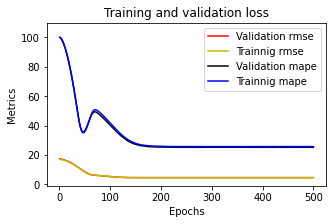

In [42]:
plotme(model1_6)

In [43]:
# inputs: distance
model1_7 = nnmodel(3, num_hlayers=1,Epoch=500)
model1_7

Epoch 1/500
399/399 [==============================] - 0s 844us/step - loss: 1031288.0625 - mape: 99.9023 - rmse: 1015.5236 - val_loss: 1066902.8750 - val_mape: 99.7712 - val_rmse: 1032.9099
Epoch 2/500
399/399 [==============================] - 0s 723us/step - loss: 1026448.8750 - mape: 99.5256 - rmse: 1013.1381 - val_loss: 1059832.0000 - val_mape: 99.2450 - val_rmse: 1029.4814
Epoch 3/500
399/399 [==============================] - 0s 704us/step - loss: 1017941.5000 - mape: 98.8559 - rmse: 1008.9308 - val_loss: 1049454.5000 - val_mape: 98.4672 - val_rmse: 1024.4288
Epoch 4/500
399/399 [==============================] - 0s 713us/step - loss: 1006466.3750 - mape: 97.9503 - rmse: 1003.2280 - val_loss: 1036242.8750 - val_mape: 97.4701 - val_rmse: 1017.9601
Epoch 5/500
399/399 [==============================] - 0s 719us/step - loss: 992439.4375 - mape: 96.8394 - rmse: 996.2125 - val_loss: 1020600.8750 - val_mape: 96.2797 - val_rmse: 1010.2479
Epoch 6/500
399/399 [==========================

Epoch 88/500
399/399 [==============================] - 0s 666us/step - loss: 79048.7266 - mape: 32.9404 - rmse: 281.1561 - val_loss: 80034.8438 - val_mape: 31.8281 - val_rmse: 282.9043
Epoch 89/500
399/399 [==============================] - 0s 674us/step - loss: 78385.2812 - mape: 32.5676 - rmse: 279.9737 - val_loss: 79478.9297 - val_mape: 31.4096 - val_rmse: 281.9201
Epoch 90/500
399/399 [==============================] - 0s 691us/step - loss: 77773.6719 - mape: 32.1068 - rmse: 278.8793 - val_loss: 78970.5156 - val_mape: 31.0427 - val_rmse: 281.0169
Epoch 91/500
399/399 [==============================] - 0s 717us/step - loss: 77215.6094 - mape: 31.7079 - rmse: 277.8770 - val_loss: 78511.9688 - val_mape: 30.7135 - val_rmse: 280.1999
Epoch 92/500
399/399 [==============================] - 0s 738us/step - loss: 76703.8594 - mape: 31.3391 - rmse: 276.9546 - val_loss: 78098.3203 - val_mape: 30.3824 - val_rmse: 279.4608
Epoch 93/500
399/399 [==============================] - 0s 835us/step 

Epoch 132/500
399/399 [==============================] - 0s 807us/step - loss: 72469.3359 - mape: 25.9440 - rmse: 269.2013 - val_loss: 75384.2344 - val_mape: 25.4860 - val_rmse: 274.5619
Epoch 133/500
399/399 [==============================] - 0s 714us/step - loss: 72468.6641 - mape: 25.9471 - rmse: 269.2000 - val_loss: 75382.9688 - val_mape: 25.4171 - val_rmse: 274.5596
Epoch 134/500
399/399 [==============================] - 0s 711us/step - loss: 72467.5078 - mape: 25.8871 - rmse: 269.1979 - val_loss: 75392.0469 - val_mape: 25.4407 - val_rmse: 274.5761
Epoch 135/500
399/399 [==============================] - 0s 748us/step - loss: 72465.3047 - mape: 25.8775 - rmse: 269.1938 - val_loss: 75397.2344 - val_mape: 25.4434 - val_rmse: 274.5856
Epoch 136/500
399/399 [==============================] - 0s 691us/step - loss: 72463.6406 - mape: 25.9587 - rmse: 269.1907 - val_loss: 75395.4297 - val_mape: 25.3722 - val_rmse: 274.5823
Epoch 137/500
399/399 [==============================] - 0s 723us

Epoch 176/500
399/399 [==============================] - 0s 724us/step - loss: 72457.6641 - mape: 25.7357 - rmse: 269.1796 - val_loss: 75443.8438 - val_mape: 25.1982 - val_rmse: 274.6704
Epoch 177/500
399/399 [==============================] - 0s 699us/step - loss: 72456.9922 - mape: 25.7112 - rmse: 269.1784 - val_loss: 75442.0078 - val_mape: 25.1775 - val_rmse: 274.6671
Epoch 178/500
399/399 [==============================] - 0s 709us/step - loss: 72456.4609 - mape: 25.6729 - rmse: 269.1774 - val_loss: 75443.0156 - val_mape: 25.1854 - val_rmse: 274.6689
Epoch 179/500
399/399 [==============================] - 0s 706us/step - loss: 72456.6875 - mape: 25.6682 - rmse: 269.1778 - val_loss: 75444.6094 - val_mape: 25.1944 - val_rmse: 274.6718
Epoch 180/500
399/399 [==============================] - 0s 714us/step - loss: 72458.3594 - mape: 25.6885 - rmse: 269.1809 - val_loss: 75443.1484 - val_mape: 25.1737 - val_rmse: 274.6692
Epoch 181/500
399/399 [==============================] - 0s 698us

Epoch 220/500
399/399 [==============================] - 0s 686us/step - loss: 72456.6875 - mape: 25.7061 - rmse: 269.1778 - val_loss: 75443.4297 - val_mape: 25.1555 - val_rmse: 274.6697
Epoch 221/500
399/399 [==============================] - 0s 695us/step - loss: 72457.3516 - mape: 25.6528 - rmse: 269.1790 - val_loss: 75445.4297 - val_mape: 25.1889 - val_rmse: 274.6733
Epoch 222/500
399/399 [==============================] - 0s 688us/step - loss: 72458.1016 - mape: 25.6996 - rmse: 269.1804 - val_loss: 75444.8438 - val_mape: 25.1699 - val_rmse: 274.6722
Epoch 223/500
399/399 [==============================] - 0s 688us/step - loss: 72455.9922 - mape: 25.6513 - rmse: 269.1765 - val_loss: 75446.0781 - val_mape: 25.1935 - val_rmse: 274.6745
Epoch 224/500
399/399 [==============================] - 0s 681us/step - loss: 72455.8672 - mape: 25.7171 - rmse: 269.1763 - val_loss: 75443.9766 - val_mape: 25.1706 - val_rmse: 274.6707
Epoch 225/500
399/399 [==============================] - 0s 714us

Epoch 264/500
399/399 [==============================] - 0s 749us/step - loss: 72457.3750 - mape: 25.6530 - rmse: 269.1791 - val_loss: 75449.2266 - val_mape: 25.2219 - val_rmse: 274.6802
Epoch 265/500
399/399 [==============================] - 0s 704us/step - loss: 72456.7500 - mape: 25.7048 - rmse: 269.1779 - val_loss: 75444.8984 - val_mape: 25.1817 - val_rmse: 274.6723
Epoch 266/500
399/399 [==============================] - 0s 674us/step - loss: 72456.0000 - mape: 25.6709 - rmse: 269.1765 - val_loss: 75446.8828 - val_mape: 25.2103 - val_rmse: 274.6760
Epoch 267/500
399/399 [==============================] - 0s 683us/step - loss: 72457.8203 - mape: 25.6887 - rmse: 269.1799 - val_loss: 75445.8516 - val_mape: 25.1949 - val_rmse: 274.6741
Epoch 268/500
399/399 [==============================] - 0s 698us/step - loss: 72456.4453 - mape: 25.6903 - rmse: 269.1773 - val_loss: 75445.5312 - val_mape: 25.1832 - val_rmse: 274.6735
Epoch 269/500
399/399 [==============================] - 0s 687us

Epoch 308/500
399/399 [==============================] - 0s 701us/step - loss: 72457.0859 - mape: 25.6485 - rmse: 269.1785 - val_loss: 75449.5156 - val_mape: 25.2150 - val_rmse: 274.6808
Epoch 309/500
399/399 [==============================] - 0s 713us/step - loss: 72456.6016 - mape: 25.7007 - rmse: 269.1776 - val_loss: 75450.7578 - val_mape: 25.2265 - val_rmse: 274.6830
Epoch 310/500
399/399 [==============================] - 0s 709us/step - loss: 72457.4531 - mape: 25.6909 - rmse: 269.1792 - val_loss: 75445.9297 - val_mape: 25.1749 - val_rmse: 274.6742
Epoch 311/500
399/399 [==============================] - 0s 756us/step - loss: 72457.6172 - mape: 25.6822 - rmse: 269.1795 - val_loss: 75445.5469 - val_mape: 25.1868 - val_rmse: 274.6735
Epoch 312/500
399/399 [==============================] - 0s 710us/step - loss: 72456.6953 - mape: 25.6313 - rmse: 269.1778 - val_loss: 75450.7578 - val_mape: 25.2234 - val_rmse: 274.6830
Epoch 313/500
399/399 [==============================] - 0s 710us

Epoch 352/500
399/399 [==============================] - 0s 723us/step - loss: 72457.4375 - mape: 25.6729 - rmse: 269.1792 - val_loss: 75443.8281 - val_mape: 25.1621 - val_rmse: 274.6704
Epoch 353/500
399/399 [==============================] - 0s 686us/step - loss: 72457.9609 - mape: 25.6473 - rmse: 269.1802 - val_loss: 75447.5469 - val_mape: 25.1994 - val_rmse: 274.6772
Epoch 354/500
399/399 [==============================] - 0s 681us/step - loss: 72457.8203 - mape: 25.6294 - rmse: 269.1799 - val_loss: 75449.0000 - val_mape: 25.2179 - val_rmse: 274.6798
Epoch 355/500
399/399 [==============================] - 0s 682us/step - loss: 72457.7188 - mape: 25.7029 - rmse: 269.1797 - val_loss: 75446.4062 - val_mape: 25.1961 - val_rmse: 274.6751
Epoch 356/500
399/399 [==============================] - 0s 696us/step - loss: 72458.4609 - mape: 25.6872 - rmse: 269.1811 - val_loss: 75450.9062 - val_mape: 25.2356 - val_rmse: 274.6833
Epoch 357/500
399/399 [==============================] - 0s 729us

Epoch 396/500
399/399 [==============================] - 0s 694us/step - loss: 72457.5234 - mape: 25.6308 - rmse: 269.1794 - val_loss: 75448.1484 - val_mape: 25.2050 - val_rmse: 274.6783
Epoch 397/500
399/399 [==============================] - 0s 678us/step - loss: 72455.7422 - mape: 25.6790 - rmse: 269.1761 - val_loss: 75448.7031 - val_mape: 25.2074 - val_rmse: 274.6793
Epoch 398/500
399/399 [==============================] - 0s 672us/step - loss: 72455.8438 - mape: 25.6517 - rmse: 269.1762 - val_loss: 75447.8438 - val_mape: 25.2039 - val_rmse: 274.6777
Epoch 399/500
399/399 [==============================] - 0s 726us/step - loss: 72457.0312 - mape: 25.6462 - rmse: 269.1784 - val_loss: 75449.8594 - val_mape: 25.2247 - val_rmse: 274.6814
Epoch 400/500
399/399 [==============================] - 0s 691us/step - loss: 72456.9922 - mape: 25.7576 - rmse: 269.1784 - val_loss: 75447.4766 - val_mape: 25.1976 - val_rmse: 274.6770
Epoch 401/500
399/399 [==============================] - 0s 721us

Epoch 440/500
399/399 [==============================] - 0s 678us/step - loss: 72455.6406 - mape: 25.6378 - rmse: 269.1758 - val_loss: 75452.3750 - val_mape: 25.2374 - val_rmse: 274.6859
Epoch 441/500
399/399 [==============================] - 0s 720us/step - loss: 72460.3672 - mape: 25.6870 - rmse: 269.1846 - val_loss: 75451.6562 - val_mape: 25.2372 - val_rmse: 274.6847
Epoch 442/500
399/399 [==============================] - 0s 682us/step - loss: 72456.3750 - mape: 25.7083 - rmse: 269.1772 - val_loss: 75446.5078 - val_mape: 25.1973 - val_rmse: 274.6753
Epoch 443/500
399/399 [==============================] - 0s 689us/step - loss: 72457.0234 - mape: 25.7020 - rmse: 269.1784 - val_loss: 75446.1875 - val_mape: 25.1964 - val_rmse: 274.6747
Epoch 444/500
399/399 [==============================] - 0s 709us/step - loss: 72456.0547 - mape: 25.6417 - rmse: 269.1766 - val_loss: 75446.0000 - val_mape: 25.1787 - val_rmse: 274.6743
Epoch 445/500
399/399 [==============================] - 0s 691us

Epoch 484/500
399/399 [==============================] - 0s 711us/step - loss: 72455.6797 - mape: 25.6842 - rmse: 269.1759 - val_loss: 75447.8906 - val_mape: 25.2096 - val_rmse: 274.6778
Epoch 485/500
399/399 [==============================] - 0s 697us/step - loss: 72457.9844 - mape: 25.6529 - rmse: 269.1802 - val_loss: 75449.4453 - val_mape: 25.2225 - val_rmse: 274.6806
Epoch 486/500
399/399 [==============================] - 0s 701us/step - loss: 72457.0859 - mape: 25.7261 - rmse: 269.1785 - val_loss: 75449.1875 - val_mape: 25.2186 - val_rmse: 274.6801
Epoch 487/500
399/399 [==============================] - 0s 687us/step - loss: 72458.0000 - mape: 25.6248 - rmse: 269.1802 - val_loss: 75451.2734 - val_mape: 25.2346 - val_rmse: 274.6840
Epoch 488/500
399/399 [==============================] - 0s 702us/step - loss: 72456.9141 - mape: 25.7091 - rmse: 269.1782 - val_loss: 75448.7656 - val_mape: 25.1998 - val_rmse: 274.6794
Epoch 489/500
399/399 [==============================] - 0s 714us

# sub-problem 2:     ******* input: distance & hour *********

In [44]:
df1.shape

(15949, 14)

In [45]:
df1.head()

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0         2171           18  0.297612  0.267902    0.774648         0.873016   
1          799           21  0.300860  0.256891    0.721519         0.850746   
2          698           19  0.300104  0.267942    0.697368         0.841270   
3          806           17  0.309036  0.271396    0.654762         0.820896   
4          721           17  0.320189  0.305235    0.666667         0.763158   

  1st ranked    2nd ranked    3rd ranked  1st dist  2nd dist  3rd dist  \
0    primary  unclassified      tertiary  0.794769  0.074563  0.062997   
1    primary      tertiary  primary_link  0.862592  0.091203  0.034690   
2    primary      tertiary  primary_link  0.832183  0.091428  0.034775   
3    primary      tertiary       service  0.828116  0.067350  0.048022   
4    primary      tertiary       service  0.781110  0.117155  0.053512   

     hr_sin        hr_cos  
0 -1.000000 -1.836970e-16  
1 -0.707107  7.071068e-01  
2 -0.965926  2.588190e-01  
3 -0.965926 -2.588190e-01  
4 -0.965926 -2.588190e-01

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


<AxesSubplot:>

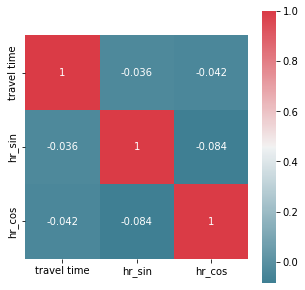

In [46]:
# run correlation matrix and plot
my_df = df1[['travel time','hr_sin','hr_cos']]
f, ax = plt.subplots(figsize=(5,5))
corr = my_df.corr()
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

### cyclical encoding of hour

In [47]:
x = np.array(df1[['est_dist','hr_sin','hr_cos']])
y = np.array(df1['travel time'])
x

array([[ 2.67901888e-01, -1.00000000e+00, -1.83697020e-16],
       [ 2.56891065e-01, -7.07106781e-01,  7.07106781e-01],
       [ 2.67941659e-01, -9.65925826e-01,  2.58819045e-01],
       ...,
       [ 5.99978290e-01,  2.58819045e-01,  9.65925826e-01],
       [ 5.98861824e-01,  7.07106781e-01,  7.07106781e-01],
       [ 6.11777555e-01, -2.58819045e-01,  9.65925826e-01]])

In [48]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [49]:
print(X_train.shape)
print(X_test.shape)
# X_train

(12759, 3)
(3190, 3)


In [50]:
# inputs: distance + hour
model2_1 = nnmodel(20, num_hlayers=1,Epoch=500)
model2_1

Epoch 1/500
399/399 [==============================] - 0s 870us/step - loss: 1026971.9375 - mape: 99.5126 - rmse: 1013.3962 - val_loss: 1055338.7500 - val_mape: 98.8053 - val_rmse: 1027.2969
Epoch 2/500
399/399 [==============================] - 0s 729us/step - loss: 999257.6250 - mape: 97.2722 - rmse: 999.6287 - val_loss: 1011145.9375 - val_mape: 95.4344 - val_rmse: 1005.5576
Epoch 3/500
399/399 [==============================] - 0s 754us/step - loss: 942753.6250 - mape: 92.6807 - rmse: 970.9550 - val_loss: 942005.1250 - val_mape: 89.9693 - val_rmse: 970.5695
Epoch 4/500
399/399 [==============================] - 0s 723us/step - loss: 867834.8750 - mape: 86.3460 - rmse: 931.5765 - val_loss: 858411.0000 - val_mape: 83.0121 - val_rmse: 926.5047
Epoch 5/500
399/399 [==============================] - 0s 783us/step - loss: 782791.9375 - mape: 78.6869 - rmse: 884.7553 - val_loss: 767929.3750 - val_mape: 74.9377 - val_rmse: 876.3158
Epoch 6/500
399/399 [==============================] - 0s 7

Epoch 45/500
399/399 [==============================] - 0s 728us/step - loss: 67935.4219 - mape: 24.1212 - rmse: 260.6443 - val_loss: 71093.1016 - val_mape: 24.0672 - val_rmse: 266.6329
Epoch 46/500
399/399 [==============================] - 0s 742us/step - loss: 67917.5000 - mape: 24.3761 - rmse: 260.6099 - val_loss: 71086.0156 - val_mape: 23.8078 - val_rmse: 266.6196
Epoch 47/500
399/399 [==============================] - 0s 761us/step - loss: 67893.1328 - mape: 24.1404 - rmse: 260.5631 - val_loss: 71086.4531 - val_mape: 23.7950 - val_rmse: 266.6204
Epoch 48/500
399/399 [==============================] - 0s 769us/step - loss: 67863.3984 - mape: 23.9749 - rmse: 260.5060 - val_loss: 71112.2109 - val_mape: 24.0531 - val_rmse: 266.6687
Epoch 49/500
399/399 [==============================] - 0s 776us/step - loss: 67864.0234 - mape: 24.2179 - rmse: 260.5072 - val_loss: 71073.8594 - val_mape: 23.6131 - val_rmse: 266.5968
Epoch 50/500
399/399 [==============================] - 0s 763us/step 

399/399 [==============================] - 0s 752us/step - loss: 67375.3281 - mape: 23.7649 - rmse: 259.5676 - val_loss: 70570.3828 - val_mape: 23.1925 - val_rmse: 265.6509
Epoch 90/500
399/399 [==============================] - 0s 715us/step - loss: 67367.8047 - mape: 23.6824 - rmse: 259.5531 - val_loss: 70556.7656 - val_mape: 23.2928 - val_rmse: 265.6252
Epoch 91/500
399/399 [==============================] - 0s 712us/step - loss: 67357.5859 - mape: 23.6186 - rmse: 259.5334 - val_loss: 70548.1953 - val_mape: 23.3947 - val_rmse: 265.6091
Epoch 92/500
399/399 [==============================] - 0s 744us/step - loss: 67346.2344 - mape: 23.8687 - rmse: 259.5115 - val_loss: 70536.4531 - val_mape: 23.1360 - val_rmse: 265.5870
Epoch 93/500
399/399 [==============================] - 0s 719us/step - loss: 67342.2188 - mape: 23.6082 - rmse: 259.5038 - val_loss: 70524.4219 - val_mape: 23.3546 - val_rmse: 265.5643
Epoch 94/500
399/399 [==============================] - 0s 735us/step - loss: 67331

Epoch 133/500
399/399 [==============================] - 0s 711us/step - loss: 67063.2891 - mape: 23.4986 - rmse: 258.9658 - val_loss: 70170.4609 - val_mape: 22.8183 - val_rmse: 264.8971
Epoch 134/500
399/399 [==============================] - 0s 755us/step - loss: 67069.8203 - mape: 23.2933 - rmse: 258.9784 - val_loss: 70157.3906 - val_mape: 23.1445 - val_rmse: 264.8724
Epoch 135/500
399/399 [==============================] - 0s 689us/step - loss: 67062.7188 - mape: 23.4929 - rmse: 258.9647 - val_loss: 70148.9609 - val_mape: 22.9592 - val_rmse: 264.8565
Epoch 136/500
399/399 [==============================] - 0s 725us/step - loss: 67066.6328 - mape: 23.4113 - rmse: 258.9723 - val_loss: 70147.8516 - val_mape: 22.9725 - val_rmse: 264.8544
Epoch 137/500
399/399 [==============================] - 0s 722us/step - loss: 67059.4141 - mape: 23.4261 - rmse: 258.9583 - val_loss: 70140.9688 - val_mape: 23.0272 - val_rmse: 264.8414
Epoch 138/500
399/399 [==============================] - 0s 688us

Epoch 177/500
399/399 [==============================] - 0s 717us/step - loss: 66996.0781 - mape: 23.3412 - rmse: 258.8360 - val_loss: 70046.8359 - val_mape: 23.1256 - val_rmse: 264.6636
Epoch 178/500
399/399 [==============================] - 0s 780us/step - loss: 66991.5703 - mape: 23.4356 - rmse: 258.8273 - val_loss: 70039.1328 - val_mape: 22.8837 - val_rmse: 264.6491
Epoch 179/500
399/399 [==============================] - 0s 739us/step - loss: 66989.8984 - mape: 23.2557 - rmse: 258.8241 - val_loss: 70041.9609 - val_mape: 23.0985 - val_rmse: 264.6544
Epoch 180/500
399/399 [==============================] - 0s 731us/step - loss: 66996.2812 - mape: 23.3672 - rmse: 258.8364 - val_loss: 70036.5156 - val_mape: 23.0465 - val_rmse: 264.6441
Epoch 181/500
399/399 [==============================] - 0s 718us/step - loss: 66991.3047 - mape: 23.3499 - rmse: 258.8268 - val_loss: 70032.4531 - val_mape: 22.9151 - val_rmse: 264.6364
Epoch 182/500
399/399 [==============================] - 0s 729us

Epoch 221/500
399/399 [==============================] - 0s 715us/step - loss: 66963.7109 - mape: 23.3621 - rmse: 258.7735 - val_loss: 69978.3828 - val_mape: 22.8997 - val_rmse: 264.5343
Epoch 222/500
399/399 [==============================] - 0s 698us/step - loss: 66967.9844 - mape: 23.2834 - rmse: 258.7817 - val_loss: 69981.7812 - val_mape: 22.9150 - val_rmse: 264.5407
Epoch 223/500
399/399 [==============================] - 0s 704us/step - loss: 66967.9297 - mape: 23.3231 - rmse: 258.7816 - val_loss: 69974.1797 - val_mape: 22.9202 - val_rmse: 264.5263
Epoch 224/500
399/399 [==============================] - 0s 739us/step - loss: 66963.7734 - mape: 23.2523 - rmse: 258.7736 - val_loss: 69979.8594 - val_mape: 22.9684 - val_rmse: 264.5371
Epoch 225/500
399/399 [==============================] - 0s 714us/step - loss: 66963.5781 - mape: 23.3470 - rmse: 258.7732 - val_loss: 69972.0312 - val_mape: 22.8881 - val_rmse: 264.5223
Epoch 226/500
399/399 [==============================] - 0s 715us

Epoch 265/500
399/399 [==============================] - 0s 746us/step - loss: 66945.7031 - mape: 23.3137 - rmse: 258.7387 - val_loss: 69933.5703 - val_mape: 22.8958 - val_rmse: 264.4496
Epoch 266/500
399/399 [==============================] - 0s 730us/step - loss: 66937.0547 - mape: 23.3241 - rmse: 258.7220 - val_loss: 69935.7578 - val_mape: 22.8411 - val_rmse: 264.4537
Epoch 267/500
399/399 [==============================] - 0s 710us/step - loss: 66943.8359 - mape: 23.2637 - rmse: 258.7351 - val_loss: 69939.9531 - val_mape: 22.7611 - val_rmse: 264.4616
Epoch 268/500
399/399 [==============================] - 0s 735us/step - loss: 66938.9766 - mape: 23.2544 - rmse: 258.7257 - val_loss: 69943.7812 - val_mape: 22.9262 - val_rmse: 264.4689
Epoch 269/500
399/399 [==============================] - 0s 682us/step - loss: 66946.2266 - mape: 23.3160 - rmse: 258.7397 - val_loss: 69935.1953 - val_mape: 22.9602 - val_rmse: 264.4526
Epoch 270/500
399/399 [==============================] - 0s 717us

Epoch 309/500
399/399 [==============================] - 0s 718us/step - loss: 66920.6719 - mape: 23.1676 - rmse: 258.6903 - val_loss: 69924.5938 - val_mape: 23.0399 - val_rmse: 264.4326
Epoch 310/500
399/399 [==============================] - 0s 715us/step - loss: 66931.2422 - mape: 23.3116 - rmse: 258.7107 - val_loss: 69927.1875 - val_mape: 23.0866 - val_rmse: 264.4375
Epoch 311/500
399/399 [==============================] - 0s 746us/step - loss: 66926.4219 - mape: 23.3059 - rmse: 258.7014 - val_loss: 69922.1016 - val_mape: 23.0349 - val_rmse: 264.4279
Epoch 312/500
399/399 [==============================] - 0s 725us/step - loss: 66928.4062 - mape: 23.3400 - rmse: 258.7053 - val_loss: 69915.2031 - val_mape: 22.8796 - val_rmse: 264.4148
Epoch 313/500
399/399 [==============================] - 0s 742us/step - loss: 66922.0312 - mape: 23.2065 - rmse: 258.6929 - val_loss: 69925.5156 - val_mape: 23.0184 - val_rmse: 264.4343
Epoch 314/500
399/399 [==============================] - 0s 715us

Epoch 353/500
399/399 [==============================] - 0s 694us/step - loss: 66917.7031 - mape: 23.3132 - rmse: 258.6846 - val_loss: 69907.8438 - val_mape: 22.8313 - val_rmse: 264.4009
Epoch 354/500
399/399 [==============================] - 0s 708us/step - loss: 66912.9375 - mape: 23.2531 - rmse: 258.6754 - val_loss: 69904.2812 - val_mape: 22.8459 - val_rmse: 264.3942
Epoch 355/500
399/399 [==============================] - 0s 723us/step - loss: 66910.5703 - mape: 23.1848 - rmse: 258.6708 - val_loss: 69916.8516 - val_mape: 23.0634 - val_rmse: 264.4179
Epoch 356/500
399/399 [==============================] - 0s 745us/step - loss: 66914.2344 - mape: 23.3615 - rmse: 258.6779 - val_loss: 69904.1641 - val_mape: 22.9165 - val_rmse: 264.3940
Epoch 357/500
399/399 [==============================] - 0s 730us/step - loss: 66912.1250 - mape: 23.2089 - rmse: 258.6738 - val_loss: 69910.4219 - val_mape: 23.0060 - val_rmse: 264.4058
Epoch 358/500
399/399 [==============================] - 0s 743us

Epoch 397/500
399/399 [==============================] - 0s 712us/step - loss: 66914.0703 - mape: 23.1522 - rmse: 258.6776 - val_loss: 69901.6641 - val_mape: 22.9251 - val_rmse: 264.3892
Epoch 398/500
399/399 [==============================] - 0s 713us/step - loss: 66903.8828 - mape: 23.2191 - rmse: 258.6578 - val_loss: 69906.0391 - val_mape: 23.0566 - val_rmse: 264.3975
Epoch 399/500
399/399 [==============================] - 0s 745us/step - loss: 66901.2969 - mape: 23.2275 - rmse: 258.6529 - val_loss: 69910.8359 - val_mape: 23.0826 - val_rmse: 264.4066
Epoch 400/500
399/399 [==============================] - 0s 717us/step - loss: 66910.5859 - mape: 23.3951 - rmse: 258.6708 - val_loss: 69903.4688 - val_mape: 22.7979 - val_rmse: 264.3926
Epoch 401/500
399/399 [==============================] - 0s 693us/step - loss: 66908.7500 - mape: 23.3075 - rmse: 258.6673 - val_loss: 69912.7188 - val_mape: 22.7083 - val_rmse: 264.4101
Epoch 402/500
399/399 [==============================] - 0s 756us

Epoch 441/500
399/399 [==============================] - 0s 719us/step - loss: 66901.1016 - mape: 23.2955 - rmse: 258.6525 - val_loss: 69894.5938 - val_mape: 22.7351 - val_rmse: 264.3759
Epoch 442/500
399/399 [==============================] - 0s 709us/step - loss: 66897.8906 - mape: 23.1684 - rmse: 258.6463 - val_loss: 69900.3047 - val_mape: 23.0068 - val_rmse: 264.3867
Epoch 443/500
399/399 [==============================] - 0s 716us/step - loss: 66901.4375 - mape: 23.3065 - rmse: 258.6531 - val_loss: 69896.1406 - val_mape: 22.9311 - val_rmse: 264.3788
Epoch 444/500
399/399 [==============================] - 0s 707us/step - loss: 66896.1953 - mape: 23.4013 - rmse: 258.6430 - val_loss: 69910.4688 - val_mape: 22.6042 - val_rmse: 264.4059
Epoch 445/500
399/399 [==============================] - 0s 760us/step - loss: 66908.3594 - mape: 23.1632 - rmse: 258.6665 - val_loss: 69893.4141 - val_mape: 22.7939 - val_rmse: 264.3736
Epoch 446/500
399/399 [==============================] - 0s 717us

Epoch 485/500
399/399 [==============================] - 0s 779us/step - loss: 66893.2031 - mape: 23.2260 - rmse: 258.6372 - val_loss: 69891.9453 - val_mape: 22.9877 - val_rmse: 264.3708
Epoch 486/500
399/399 [==============================] - 0s 738us/step - loss: 66901.4609 - mape: 23.3405 - rmse: 258.6532 - val_loss: 69895.6875 - val_mape: 22.7545 - val_rmse: 264.3779
Epoch 487/500
399/399 [==============================] - 0s 732us/step - loss: 66897.2969 - mape: 23.2879 - rmse: 258.6451 - val_loss: 69886.5078 - val_mape: 22.7598 - val_rmse: 264.3606
Epoch 488/500
399/399 [==============================] - 0s 720us/step - loss: 66897.0000 - mape: 23.2764 - rmse: 258.6445 - val_loss: 69896.6641 - val_mape: 22.7002 - val_rmse: 264.3798
Epoch 489/500
399/399 [==============================] - 0s 717us/step - loss: 66899.6797 - mape: 23.1712 - rmse: 258.6497 - val_loss: 69890.5078 - val_mape: 22.9870 - val_rmse: 264.3681
Epoch 490/500
399/399 [==============================] - 0s 723us

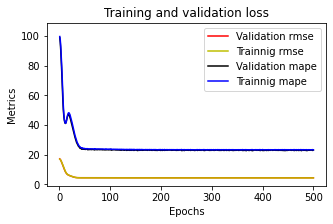

In [51]:
plotme(model2_1)

In [52]:
# inputs: distance + hour
model2_2 = nnmodel(50, num_hlayers=1,Epoch=1000)
model2_2

Epoch 1/1000
399/399 [==============================] - 1s 898us/step - loss: 1020805.6250 - mape: 99.0328 - rmse: 1010.3492 - val_loss: 1034535.3750 - val_mape: 97.2637 - val_rmse: 1017.1211
Epoch 2/1000
399/399 [==============================] - 0s 719us/step - loss: 952766.5625 - mape: 93.5277 - rmse: 976.0976 - val_loss: 931808.9375 - val_mape: 89.1929 - val_rmse: 965.3025
Epoch 3/1000
399/399 [==============================] - 0s 723us/step - loss: 832553.3125 - mape: 83.2375 - rmse: 912.4436 - val_loss: 792178.6875 - val_mape: 77.2124 - val_rmse: 890.0442
Epoch 4/1000
399/399 [==============================] - 0s 712us/step - loss: 690382.1875 - mape: 69.8659 - rmse: 830.8924 - val_loss: 642697.0625 - val_mape: 62.8473 - val_rmse: 801.6839
Epoch 5/1000
399/399 [==============================] - 0s 719us/step - loss: 550306.6250 - mape: 56.1033 - rmse: 741.8265 - val_loss: 505231.0625 - val_mape: 51.1305 - val_rmse: 710.7961
Epoch 6/1000
399/399 [==============================] - 

Epoch 45/1000
399/399 [==============================] - 0s 759us/step - loss: 67778.9219 - mape: 24.0240 - rmse: 260.3438 - val_loss: 70984.0312 - val_mape: 23.5720 - val_rmse: 266.4283
Epoch 46/1000
399/399 [==============================] - 0s 755us/step - loss: 67760.5078 - mape: 23.8145 - rmse: 260.3085 - val_loss: 70972.1328 - val_mape: 23.4030 - val_rmse: 266.4059
Epoch 47/1000
399/399 [==============================] - 0s 715us/step - loss: 67732.6875 - mape: 23.8949 - rmse: 260.2550 - val_loss: 70941.6875 - val_mape: 23.4335 - val_rmse: 266.3488
Epoch 48/1000
399/399 [==============================] - 0s 734us/step - loss: 67714.3906 - mape: 23.8211 - rmse: 260.2199 - val_loss: 70921.0312 - val_mape: 23.5480 - val_rmse: 266.3100
Epoch 49/1000
399/399 [==============================] - 0s 705us/step - loss: 67685.2266 - mape: 23.8551 - rmse: 260.1638 - val_loss: 70887.0391 - val_mape: 23.4916 - val_rmse: 266.2462
Epoch 50/1000
399/399 [==============================] - 0s 731us

Epoch 89/1000
399/399 [==============================] - 0s 725us/step - loss: 67131.5781 - mape: 23.4906 - rmse: 259.0976 - val_loss: 70254.6875 - val_mape: 22.9636 - val_rmse: 265.0560
Epoch 90/1000
399/399 [==============================] - 0s 753us/step - loss: 67121.9453 - mape: 23.3704 - rmse: 259.0790 - val_loss: 70263.3594 - val_mape: 23.0661 - val_rmse: 265.0724
Epoch 91/1000
399/399 [==============================] - 0s 724us/step - loss: 67116.1562 - mape: 23.4455 - rmse: 259.0679 - val_loss: 70252.0547 - val_mape: 23.2640 - val_rmse: 265.0511
Epoch 92/1000
399/399 [==============================] - 0s 734us/step - loss: 67107.0859 - mape: 23.5728 - rmse: 259.0504 - val_loss: 70239.5703 - val_mape: 22.9927 - val_rmse: 265.0275
Epoch 93/1000
399/399 [==============================] - 0s 732us/step - loss: 67097.9531 - mape: 23.4276 - rmse: 259.0327 - val_loss: 70236.1172 - val_mape: 22.9837 - val_rmse: 265.0210
Epoch 94/1000
399/399 [==============================] - 0s 729us

Epoch 133/1000
399/399 [==============================] - 0s 713us/step - loss: 66892.9062 - mape: 23.3621 - rmse: 258.6366 - val_loss: 69972.9062 - val_mape: 22.7408 - val_rmse: 264.5239
Epoch 134/1000
399/399 [==============================] - 0s 743us/step - loss: 66883.8906 - mape: 23.2935 - rmse: 258.6192 - val_loss: 69962.0234 - val_mape: 22.9510 - val_rmse: 264.5034
Epoch 135/1000
399/399 [==============================] - 0s 728us/step - loss: 66875.3672 - mape: 23.3284 - rmse: 258.6027 - val_loss: 69961.7500 - val_mape: 22.7171 - val_rmse: 264.5028
Epoch 136/1000
399/399 [==============================] - 0s 754us/step - loss: 66870.2734 - mape: 23.3309 - rmse: 258.5929 - val_loss: 69952.6797 - val_mape: 22.7776 - val_rmse: 264.4857
Epoch 137/1000
399/399 [==============================] - 0s 741us/step - loss: 66871.6719 - mape: 23.2737 - rmse: 258.5956 - val_loss: 69961.6484 - val_mape: 22.8005 - val_rmse: 264.5027
Epoch 138/1000
399/399 [==============================] - 0s

Epoch 220/1000
399/399 [==============================] - 0s 704us/step - loss: 66658.6172 - mape: 23.1600 - rmse: 258.1833 - val_loss: 69707.4219 - val_mape: 23.0031 - val_rmse: 264.0216
Epoch 221/1000
399/399 [==============================] - 0s 723us/step - loss: 66666.3438 - mape: 23.2482 - rmse: 258.1983 - val_loss: 69701.5234 - val_mape: 22.7991 - val_rmse: 264.0105
Epoch 222/1000
399/399 [==============================] - 0s 755us/step - loss: 66661.4766 - mape: 23.1957 - rmse: 258.1888 - val_loss: 69718.3281 - val_mape: 22.9161 - val_rmse: 264.0423
Epoch 223/1000
399/399 [==============================] - 0s 712us/step - loss: 66657.3047 - mape: 23.1315 - rmse: 258.1808 - val_loss: 69744.8047 - val_mape: 23.0994 - val_rmse: 264.0924
Epoch 224/1000
399/399 [==============================] - 0s 710us/step - loss: 66662.0156 - mape: 23.3460 - rmse: 258.1899 - val_loss: 69710.3984 - val_mape: 22.7046 - val_rmse: 264.0273
Epoch 225/1000
399/399 [==============================] - 0s

Epoch 307/1000
399/399 [==============================] - 0s 737us/step - loss: 66593.0938 - mape: 23.2127 - rmse: 258.0564 - val_loss: 69643.5391 - val_mape: 22.6637 - val_rmse: 263.9006
Epoch 308/1000
399/399 [==============================] - 0s 723us/step - loss: 66582.6719 - mape: 23.0594 - rmse: 258.0362 - val_loss: 69642.5703 - val_mape: 23.0440 - val_rmse: 263.8988
Epoch 309/1000
399/399 [==============================] - 0s 730us/step - loss: 66590.6016 - mape: 23.2864 - rmse: 258.0515 - val_loss: 69642.2656 - val_mape: 22.6786 - val_rmse: 263.8982
Epoch 310/1000
399/399 [==============================] - 0s 768us/step - loss: 66583.3047 - mape: 23.1941 - rmse: 258.0374 - val_loss: 69627.1797 - val_mape: 22.7856 - val_rmse: 263.8696
Epoch 311/1000
399/399 [==============================] - 0s 710us/step - loss: 66577.1328 - mape: 23.1741 - rmse: 258.0255 - val_loss: 69655.6719 - val_mape: 22.5177 - val_rmse: 263.9236
Epoch 312/1000
399/399 [==============================] - 0s

Epoch 394/1000
399/399 [==============================] - 0s 705us/step - loss: 66562.4297 - mape: 23.2213 - rmse: 257.9969 - val_loss: 69622.3672 - val_mape: 22.5803 - val_rmse: 263.8605
Epoch 395/1000
399/399 [==============================] - 0s 745us/step - loss: 66561.0703 - mape: 23.0818 - rmse: 257.9943 - val_loss: 69620.6719 - val_mape: 22.8273 - val_rmse: 263.8573
Epoch 396/1000
399/399 [==============================] - 0s 718us/step - loss: 66559.1719 - mape: 23.2295 - rmse: 257.9906 - val_loss: 69611.4922 - val_mape: 22.7091 - val_rmse: 263.8399
Epoch 397/1000
399/399 [==============================] - 0s 695us/step - loss: 66551.7500 - mape: 23.1680 - rmse: 257.9763 - val_loss: 69622.1484 - val_mape: 22.8253 - val_rmse: 263.8601
Epoch 398/1000
399/399 [==============================] - 0s 735us/step - loss: 66556.1406 - mape: 23.1588 - rmse: 257.9848 - val_loss: 69614.0000 - val_mape: 22.8310 - val_rmse: 263.8447
Epoch 399/1000
399/399 [==============================] - 0s

Epoch 481/1000
399/399 [==============================] - 0s 751us/step - loss: 66546.5156 - mape: 23.2759 - rmse: 257.9661 - val_loss: 69608.7812 - val_mape: 22.5949 - val_rmse: 263.8347
Epoch 482/1000
399/399 [==============================] - 0s 731us/step - loss: 66542.5391 - mape: 23.1092 - rmse: 257.9584 - val_loss: 69620.5391 - val_mape: 22.9207 - val_rmse: 263.8571
Epoch 483/1000
399/399 [==============================] - 0s 731us/step - loss: 66556.1875 - mape: 23.2041 - rmse: 257.9849 - val_loss: 69615.0547 - val_mape: 22.7764 - val_rmse: 263.8466
Epoch 484/1000
399/399 [==============================] - 0s 749us/step - loss: 66541.7656 - mape: 23.1712 - rmse: 257.9569 - val_loss: 69594.3828 - val_mape: 22.6563 - val_rmse: 263.8075
Epoch 485/1000
399/399 [==============================] - 0s 720us/step - loss: 66546.3984 - mape: 23.1623 - rmse: 257.9659 - val_loss: 69609.4688 - val_mape: 22.8374 - val_rmse: 263.8361
Epoch 486/1000
399/399 [==============================] - 0s

Epoch 568/1000
399/399 [==============================] - 0s 704us/step - loss: 66532.6562 - mape: 23.1495 - rmse: 257.9392 - val_loss: 69611.9844 - val_mape: 22.5940 - val_rmse: 263.8408
Epoch 569/1000
399/399 [==============================] - 0s 717us/step - loss: 66535.6797 - mape: 23.2329 - rmse: 257.9451 - val_loss: 69613.9141 - val_mape: 22.5158 - val_rmse: 263.8445
Epoch 570/1000
399/399 [==============================] - 0s 737us/step - loss: 66536.7656 - mape: 23.0726 - rmse: 257.9472 - val_loss: 69593.2422 - val_mape: 22.7080 - val_rmse: 263.8053
Epoch 571/1000
399/399 [==============================] - 0s 707us/step - loss: 66540.3203 - mape: 23.2500 - rmse: 257.9541 - val_loss: 69595.4141 - val_mape: 22.6453 - val_rmse: 263.8094
Epoch 572/1000
399/399 [==============================] - 0s 749us/step - loss: 66519.7500 - mape: 23.3005 - rmse: 257.9142 - val_loss: 69649.7031 - val_mape: 22.2974 - val_rmse: 263.9123
Epoch 573/1000
399/399 [==============================] - 0s

Epoch 655/1000
399/399 [==============================] - 0s 737us/step - loss: 66528.9609 - mape: 23.2185 - rmse: 257.9321 - val_loss: 69601.1016 - val_mape: 22.6228 - val_rmse: 263.8202
Epoch 656/1000
399/399 [==============================] - 0s 736us/step - loss: 66535.6562 - mape: 23.1625 - rmse: 257.9451 - val_loss: 69610.6953 - val_mape: 22.7521 - val_rmse: 263.8384
Epoch 657/1000
399/399 [==============================] - 0s 720us/step - loss: 66534.3906 - mape: 23.1138 - rmse: 257.9426 - val_loss: 69601.6875 - val_mape: 22.9052 - val_rmse: 263.8213
Epoch 658/1000
399/399 [==============================] - 0s 764us/step - loss: 66525.8828 - mape: 23.2473 - rmse: 257.9261 - val_loss: 69595.2734 - val_mape: 22.6040 - val_rmse: 263.8092
Epoch 659/1000
399/399 [==============================] - 0s 718us/step - loss: 66526.3750 - mape: 23.2418 - rmse: 257.9271 - val_loss: 69641.1953 - val_mape: 22.2863 - val_rmse: 263.8962
Epoch 660/1000
399/399 [==============================] - 0s

Epoch 742/1000
399/399 [==============================] - 0s 724us/step - loss: 66504.1875 - mape: 23.1368 - rmse: 257.8841 - val_loss: 69582.6797 - val_mape: 22.8070 - val_rmse: 263.7853
Epoch 743/1000
399/399 [==============================] - 0s 739us/step - loss: 66499.1562 - mape: 23.1191 - rmse: 257.8743 - val_loss: 69590.7109 - val_mape: 23.0029 - val_rmse: 263.8005
Epoch 744/1000
399/399 [==============================] - 0s 726us/step - loss: 66514.9062 - mape: 23.2243 - rmse: 257.9048 - val_loss: 69583.6250 - val_mape: 22.8392 - val_rmse: 263.7871
Epoch 745/1000
399/399 [==============================] - 0s 732us/step - loss: 66503.2266 - mape: 23.2027 - rmse: 257.8822 - val_loss: 69592.9297 - val_mape: 22.6650 - val_rmse: 263.8047
Epoch 746/1000
399/399 [==============================] - 0s 705us/step - loss: 66506.3047 - mape: 23.2249 - rmse: 257.8882 - val_loss: 69591.7734 - val_mape: 22.5318 - val_rmse: 263.8025
Epoch 747/1000
399/399 [==============================] - 0s

Epoch 829/1000
399/399 [==============================] - 0s 714us/step - loss: 66498.8359 - mape: 23.1575 - rmse: 257.8737 - val_loss: 69571.8047 - val_mape: 22.6222 - val_rmse: 263.7647
Epoch 830/1000
399/399 [==============================] - 0s 741us/step - loss: 66488.9453 - mape: 23.1568 - rmse: 257.8545 - val_loss: 69563.4375 - val_mape: 22.8235 - val_rmse: 263.7488
Epoch 831/1000
399/399 [==============================] - 0s 741us/step - loss: 66492.9922 - mape: 23.1950 - rmse: 257.8624 - val_loss: 69574.8281 - val_mape: 22.7472 - val_rmse: 263.7704
Epoch 832/1000
399/399 [==============================] - 0s 743us/step - loss: 66491.8984 - mape: 23.1721 - rmse: 257.8602 - val_loss: 69572.1016 - val_mape: 22.8222 - val_rmse: 263.7652
Epoch 833/1000
399/399 [==============================] - 0s 716us/step - loss: 66490.7812 - mape: 23.1730 - rmse: 257.8581 - val_loss: 69585.2656 - val_mape: 22.6749 - val_rmse: 263.7902
Epoch 834/1000
399/399 [==============================] - 0s

Epoch 916/1000
399/399 [==============================] - 0s 751us/step - loss: 66488.7969 - mape: 23.1282 - rmse: 257.8542 - val_loss: 69561.6172 - val_mape: 22.8102 - val_rmse: 263.7454
Epoch 917/1000
399/399 [==============================] - 0s 754us/step - loss: 66487.3203 - mape: 23.1754 - rmse: 257.8513 - val_loss: 69556.7578 - val_mape: 22.8500 - val_rmse: 263.7361
Epoch 918/1000
399/399 [==============================] - 0s 727us/step - loss: 66481.9062 - mape: 23.1475 - rmse: 257.8409 - val_loss: 69557.6250 - val_mape: 22.9295 - val_rmse: 263.7378
Epoch 919/1000
399/399 [==============================] - 0s 732us/step - loss: 66495.6797 - mape: 23.2252 - rmse: 257.8676 - val_loss: 69561.5547 - val_mape: 22.7476 - val_rmse: 263.7452
Epoch 920/1000
399/399 [==============================] - 0s 715us/step - loss: 66488.2422 - mape: 23.2089 - rmse: 257.8531 - val_loss: 69569.2578 - val_mape: 22.6847 - val_rmse: 263.7599
Epoch 921/1000
399/399 [==============================] - 0s

In [53]:
# plotme(model2_2)

In [54]:
# inputs: distance + hour
model2_3 = nnmodel(100, num_hlayers=1,Epoch=500)
model2_3

Epoch 1/500
399/399 [==============================] - 1s 981us/step - loss: 1012961.1250 - mape: 98.4478 - rmse: 1006.4597 - val_loss: 1009118.1250 - val_mape: 95.3852 - val_rmse: 1004.5487
Epoch 2/500
399/399 [==============================] - 0s 813us/step - loss: 899035.0000 - mape: 89.0129 - rmse: 948.1746 - val_loss: 842475.3750 - val_mape: 81.8031 - val_rmse: 917.8646
Epoch 3/500
399/399 [==============================] - 0s 762us/step - loss: 713784.2500 - mape: 72.1197 - rmse: 844.8575 - val_loss: 638764.5000 - val_mape: 62.6214 - val_rmse: 799.2274
Epoch 4/500
399/399 [==============================] - 0s 785us/step - loss: 522797.4688 - mape: 53.9771 - rmse: 723.0474 - val_loss: 455018.9375 - val_mape: 47.9970 - val_rmse: 674.5509
Epoch 5/500
399/399 [==============================] - 0s 827us/step - loss: 367724.7188 - mape: 44.3171 - rmse: 606.4031 - val_loss: 318392.0625 - val_mape: 42.3227 - val_rmse: 564.2624
Epoch 6/500
399/399 [==============================] - 0s 805

Epoch 45/500
399/399 [==============================] - 0s 819us/step - loss: 67393.2812 - mape: 23.7470 - rmse: 259.6022 - val_loss: 70574.6094 - val_mape: 23.2822 - val_rmse: 265.6588
Epoch 46/500
399/399 [==============================] - 0s 831us/step - loss: 67378.2422 - mape: 23.6842 - rmse: 259.5732 - val_loss: 70571.2422 - val_mape: 23.2007 - val_rmse: 265.6525
Epoch 47/500
399/399 [==============================] - 0s 798us/step - loss: 67340.7422 - mape: 23.7813 - rmse: 259.5009 - val_loss: 70599.5078 - val_mape: 22.8263 - val_rmse: 265.7057
Epoch 48/500
399/399 [==============================] - 0s 843us/step - loss: 67350.9922 - mape: 23.5287 - rmse: 259.5207 - val_loss: 70535.3203 - val_mape: 23.3156 - val_rmse: 265.5849
Epoch 49/500
399/399 [==============================] - 0s 832us/step - loss: 67320.5703 - mape: 23.6699 - rmse: 259.4621 - val_loss: 70538.2656 - val_mape: 23.4092 - val_rmse: 265.5904
Epoch 50/500
399/399 [==============================] - 0s 823us/step 

399/399 [==============================] - 0s 811us/step - loss: 66888.0703 - mape: 23.2884 - rmse: 258.6273 - val_loss: 69910.3750 - val_mape: 23.2628 - val_rmse: 264.4057
Epoch 90/500
399/399 [==============================] - 0s 806us/step - loss: 66883.2734 - mape: 23.2512 - rmse: 258.6180 - val_loss: 69891.2891 - val_mape: 23.0672 - val_rmse: 264.3696
Epoch 91/500
399/399 [==============================] - 0s 779us/step - loss: 66874.1328 - mape: 23.3655 - rmse: 258.6003 - val_loss: 69868.6094 - val_mape: 23.0361 - val_rmse: 264.3267
Epoch 92/500
399/399 [==============================] - 0s 795us/step - loss: 66869.4688 - mape: 23.2852 - rmse: 258.5913 - val_loss: 69865.4922 - val_mape: 23.0814 - val_rmse: 264.3208
Epoch 93/500
399/399 [==============================] - 0s 797us/step - loss: 66876.9766 - mape: 23.3891 - rmse: 258.6058 - val_loss: 69881.5625 - val_mape: 22.7267 - val_rmse: 264.3512
Epoch 94/500
399/399 [==============================] - 0s 807us/step - loss: 66864

Epoch 133/500
399/399 [==============================] - 0s 735us/step - loss: 66826.8281 - mape: 23.2650 - rmse: 258.5089 - val_loss: 69792.8438 - val_mape: 22.7110 - val_rmse: 264.1833
Epoch 134/500
399/399 [==============================] - 0s 748us/step - loss: 66832.9609 - mape: 23.2889 - rmse: 258.5207 - val_loss: 69785.8203 - val_mape: 23.0046 - val_rmse: 264.1701
Epoch 135/500
399/399 [==============================] - 0s 857us/step - loss: 66820.7031 - mape: 23.2738 - rmse: 258.4970 - val_loss: 69777.0312 - val_mape: 22.7097 - val_rmse: 264.1534
Epoch 136/500
399/399 [==============================] - 0s 807us/step - loss: 66812.2578 - mape: 23.1954 - rmse: 258.4807 - val_loss: 69777.8750 - val_mape: 23.0538 - val_rmse: 264.1550
Epoch 137/500
399/399 [==============================] - 0s 837us/step - loss: 66825.7578 - mape: 23.2059 - rmse: 258.5068 - val_loss: 69785.4688 - val_mape: 23.1155 - val_rmse: 264.1694
Epoch 138/500
399/399 [==============================] - 0s 779us

Epoch 177/500
399/399 [==============================] - 0s 836us/step - loss: 66811.4531 - mape: 23.2141 - rmse: 258.4791 - val_loss: 69772.2500 - val_mape: 23.0953 - val_rmse: 264.1444
Epoch 178/500
399/399 [==============================] - 0s 804us/step - loss: 66804.7656 - mape: 23.2939 - rmse: 258.4662 - val_loss: 69741.5703 - val_mape: 22.8363 - val_rmse: 264.0863
Epoch 179/500
399/399 [==============================] - 0s 797us/step - loss: 66816.9062 - mape: 23.2681 - rmse: 258.4897 - val_loss: 69729.0234 - val_mape: 22.8790 - val_rmse: 264.0625
Epoch 180/500
399/399 [==============================] - 0s 798us/step - loss: 66815.6797 - mape: 23.2254 - rmse: 258.4873 - val_loss: 69738.0000 - val_mape: 22.9235 - val_rmse: 264.0795
Epoch 181/500
399/399 [==============================] - 0s 837us/step - loss: 66805.5156 - mape: 23.2697 - rmse: 258.4676 - val_loss: 69737.0625 - val_mape: 22.6418 - val_rmse: 264.0778
Epoch 182/500
399/399 [==============================] - 0s 766us

Epoch 221/500
399/399 [==============================] - 0s 783us/step - loss: 66792.6172 - mape: 23.3123 - rmse: 258.4427 - val_loss: 69723.1484 - val_mape: 22.7567 - val_rmse: 264.0514
Epoch 222/500
399/399 [==============================] - 0s 824us/step - loss: 66801.2891 - mape: 23.2551 - rmse: 258.4594 - val_loss: 69741.0938 - val_mape: 22.7550 - val_rmse: 264.0854
Epoch 223/500
399/399 [==============================] - 0s 778us/step - loss: 66799.5703 - mape: 23.2564 - rmse: 258.4561 - val_loss: 69716.5703 - val_mape: 22.8204 - val_rmse: 264.0390
Epoch 224/500
399/399 [==============================] - 0s 794us/step - loss: 66810.7891 - mape: 23.3357 - rmse: 258.4778 - val_loss: 69731.3125 - val_mape: 22.6680 - val_rmse: 264.0669
Epoch 225/500
399/399 [==============================] - 0s 787us/step - loss: 66807.9375 - mape: 23.1510 - rmse: 258.4723 - val_loss: 69722.9453 - val_mape: 23.0975 - val_rmse: 264.0510
Epoch 226/500
399/399 [==============================] - 0s 776us

Epoch 265/500
399/399 [==============================] - 0s 783us/step - loss: 66779.3828 - mape: 23.2822 - rmse: 258.4171 - val_loss: 69763.8750 - val_mape: 22.5114 - val_rmse: 264.1285
Epoch 266/500
399/399 [==============================] - 0s 774us/step - loss: 66797.6406 - mape: 23.2033 - rmse: 258.4524 - val_loss: 69706.4844 - val_mape: 22.9245 - val_rmse: 264.0199
Epoch 267/500
399/399 [==============================] - 0s 774us/step - loss: 66790.5156 - mape: 23.2362 - rmse: 258.4386 - val_loss: 69727.4844 - val_mape: 22.8774 - val_rmse: 264.0596
Epoch 268/500
399/399 [==============================] - 0s 818us/step - loss: 66792.2031 - mape: 23.1953 - rmse: 258.4419 - val_loss: 69735.0703 - val_mape: 23.1714 - val_rmse: 264.0740
Epoch 269/500
399/399 [==============================] - 0s 766us/step - loss: 66789.7812 - mape: 23.2877 - rmse: 258.4372 - val_loss: 69692.3594 - val_mape: 22.8446 - val_rmse: 263.9931
Epoch 270/500
399/399 [==============================] - 0s 765us

Epoch 309/500
399/399 [==============================] - 0s 732us/step - loss: 66783.7891 - mape: 23.3815 - rmse: 258.4256 - val_loss: 69697.6328 - val_mape: 22.9442 - val_rmse: 264.0031
Epoch 310/500
399/399 [==============================] - 0s 770us/step - loss: 66793.0156 - mape: 23.3057 - rmse: 258.4435 - val_loss: 69708.9609 - val_mape: 22.7770 - val_rmse: 264.0245
Epoch 311/500
399/399 [==============================] - 0s 782us/step - loss: 66786.3906 - mape: 23.2489 - rmse: 258.4306 - val_loss: 69696.4141 - val_mape: 22.7171 - val_rmse: 264.0008
Epoch 312/500
399/399 [==============================] - 0s 785us/step - loss: 66787.3672 - mape: 23.2164 - rmse: 258.4325 - val_loss: 69707.5938 - val_mape: 22.6410 - val_rmse: 264.0219
Epoch 313/500
399/399 [==============================] - 0s 777us/step - loss: 66797.8984 - mape: 23.2544 - rmse: 258.4529 - val_loss: 69699.2734 - val_mape: 22.6029 - val_rmse: 264.0062
Epoch 314/500
399/399 [==============================] - 0s 741us

Epoch 353/500
399/399 [==============================] - 0s 806us/step - loss: 66786.4688 - mape: 23.2904 - rmse: 258.4308 - val_loss: 69672.6328 - val_mape: 22.9073 - val_rmse: 263.9557
Epoch 354/500
399/399 [==============================] - 0s 827us/step - loss: 66778.2656 - mape: 23.2523 - rmse: 258.4149 - val_loss: 69720.8047 - val_mape: 23.1748 - val_rmse: 264.0470
Epoch 355/500
399/399 [==============================] - 0s 826us/step - loss: 66782.3906 - mape: 23.2919 - rmse: 258.4229 - val_loss: 69729.4766 - val_mape: 22.9791 - val_rmse: 264.0634
Epoch 356/500
399/399 [==============================] - 0s 801us/step - loss: 66763.6406 - mape: 23.3216 - rmse: 258.3866 - val_loss: 69703.7500 - val_mape: 22.5412 - val_rmse: 264.0147
Epoch 357/500
399/399 [==============================] - 0s 844us/step - loss: 66788.9609 - mape: 23.1991 - rmse: 258.4356 - val_loss: 69679.2500 - val_mape: 22.8821 - val_rmse: 263.9683
Epoch 358/500
399/399 [==============================] - 0s 839us

Epoch 397/500
399/399 [==============================] - 0s 758us/step - loss: 66778.3594 - mape: 23.2769 - rmse: 258.4151 - val_loss: 69706.5547 - val_mape: 23.0168 - val_rmse: 264.0200
Epoch 398/500
399/399 [==============================] - 0s 767us/step - loss: 66787.6328 - mape: 23.2480 - rmse: 258.4330 - val_loss: 69683.5078 - val_mape: 22.7752 - val_rmse: 263.9763
Epoch 399/500
399/399 [==============================] - 0s 811us/step - loss: 66774.4453 - mape: 23.2309 - rmse: 258.4075 - val_loss: 69686.5625 - val_mape: 22.9846 - val_rmse: 263.9821
Epoch 400/500
399/399 [==============================] - 0s 797us/step - loss: 66774.0859 - mape: 23.2654 - rmse: 258.4068 - val_loss: 69667.2578 - val_mape: 22.8360 - val_rmse: 263.9456
Epoch 401/500
399/399 [==============================] - 0s 773us/step - loss: 66777.5078 - mape: 23.2705 - rmse: 258.4135 - val_loss: 69689.0859 - val_mape: 22.7355 - val_rmse: 263.9869
Epoch 402/500
399/399 [==============================] - 0s 797us

Epoch 441/500
399/399 [==============================] - 0s 765us/step - loss: 66787.2266 - mape: 23.1664 - rmse: 258.4323 - val_loss: 69685.4297 - val_mape: 22.8961 - val_rmse: 263.9800
Epoch 442/500
399/399 [==============================] - 0s 755us/step - loss: 66775.2266 - mape: 23.2286 - rmse: 258.4090 - val_loss: 69674.6484 - val_mape: 22.8903 - val_rmse: 263.9596
Epoch 443/500
399/399 [==============================] - 0s 781us/step - loss: 66776.9688 - mape: 23.2410 - rmse: 258.4124 - val_loss: 69696.1953 - val_mape: 23.1310 - val_rmse: 264.0004
Epoch 444/500
399/399 [==============================] - 0s 813us/step - loss: 66769.7891 - mape: 23.2984 - rmse: 258.3985 - val_loss: 69680.9297 - val_mape: 22.7074 - val_rmse: 263.9715
Epoch 445/500
399/399 [==============================] - 0s 805us/step - loss: 66779.7266 - mape: 23.2893 - rmse: 258.4177 - val_loss: 69678.0703 - val_mape: 22.5089 - val_rmse: 263.9660
Epoch 446/500
399/399 [==============================] - 0s 795us

Epoch 485/500
399/399 [==============================] - 0s 807us/step - loss: 66749.9688 - mape: 23.2640 - rmse: 258.3601 - val_loss: 69657.5547 - val_mape: 22.8873 - val_rmse: 263.9272
Epoch 486/500
399/399 [==============================] - 0s 803us/step - loss: 66749.4141 - mape: 23.1825 - rmse: 258.3591 - val_loss: 69683.9922 - val_mape: 23.2039 - val_rmse: 263.9773
Epoch 487/500
399/399 [==============================] - 0s 808us/step - loss: 66759.8359 - mape: 23.3233 - rmse: 258.3792 - val_loss: 69655.4922 - val_mape: 22.8134 - val_rmse: 263.9233
Epoch 488/500
399/399 [==============================] - 0s 885us/step - loss: 66751.8281 - mape: 23.2752 - rmse: 258.3637 - val_loss: 69641.8594 - val_mape: 22.8728 - val_rmse: 263.8974
Epoch 489/500
399/399 [==============================] - 0s 852us/step - loss: 66748.9375 - mape: 23.2659 - rmse: 258.3582 - val_loss: 69658.0547 - val_mape: 22.6392 - val_rmse: 263.9281
Epoch 490/500
399/399 [==============================] - 0s 786us

In [55]:
# inputs: distance + hour
model2_4 = nnmodel(100,50, num_hlayers=2,Epoch=500)
model2_4

Epoch 1/500
399/399 [==============================] - 1s 940us/step - loss: 674521.3125 - mape: 72.7108 - rmse: 821.2925 - val_loss: 169394.1094 - val_mape: 46.8255 - val_rmse: 411.5752
Epoch 2/500
399/399 [==============================] - 0s 765us/step - loss: 126581.1250 - mape: 48.0714 - rmse: 355.7824 - val_loss: 104553.9844 - val_mape: 42.6066 - val_rmse: 323.3481
Epoch 3/500
399/399 [==============================] - 0s 764us/step - loss: 89942.2266 - mape: 38.7575 - rmse: 299.9037 - val_loss: 79544.7812 - val_mape: 33.1669 - val_rmse: 282.0368
Epoch 4/500
399/399 [==============================] - 0s 744us/step - loss: 72583.1562 - mape: 30.1999 - rmse: 269.4126 - val_loss: 71760.8750 - val_mape: 26.4049 - val_rmse: 267.8822
Epoch 5/500
399/399 [==============================] - 0s 769us/step - loss: 68386.6328 - mape: 25.6665 - rmse: 261.5084 - val_loss: 71187.5469 - val_mape: 23.6912 - val_rmse: 266.8099
Epoch 6/500
399/399 [==============================] - 0s 780us/step - 

399/399 [==============================] - 0s 761us/step - loss: 67092.8750 - mape: 23.6159 - rmse: 259.0229 - val_loss: 70362.5469 - val_mape: 23.4622 - val_rmse: 265.2594
Epoch 90/500
399/399 [==============================] - 0s 750us/step - loss: 67091.3906 - mape: 23.7808 - rmse: 259.0201 - val_loss: 70461.3594 - val_mape: 22.9898 - val_rmse: 265.4456
Epoch 91/500
399/399 [==============================] - 0s 765us/step - loss: 67069.6328 - mape: 23.5796 - rmse: 258.9781 - val_loss: 70933.1094 - val_mape: 24.5139 - val_rmse: 266.3327
Epoch 92/500
399/399 [==============================] - 0s 753us/step - loss: 67079.7422 - mape: 23.7203 - rmse: 258.9976 - val_loss: 70580.2500 - val_mape: 22.2775 - val_rmse: 265.6694
Epoch 93/500
399/399 [==============================] - 0s 775us/step - loss: 67061.8906 - mape: 23.4599 - rmse: 258.9631 - val_loss: 70509.0938 - val_mape: 23.8792 - val_rmse: 265.5355
Epoch 94/500
399/399 [==============================] - 0s 773us/step - loss: 67057

Epoch 133/500
399/399 [==============================] - 0s 756us/step - loss: 66846.9688 - mape: 23.4871 - rmse: 258.5478 - val_loss: 70319.8359 - val_mape: 23.8729 - val_rmse: 265.1789
Epoch 134/500
399/399 [==============================] - 0s 807us/step - loss: 66823.9922 - mape: 23.5287 - rmse: 258.5034 - val_loss: 70411.4922 - val_mape: 22.4230 - val_rmse: 265.3516
Epoch 135/500
399/399 [==============================] - 0s 752us/step - loss: 66873.1719 - mape: 23.4650 - rmse: 258.5985 - val_loss: 70327.9062 - val_mape: 23.9271 - val_rmse: 265.1941
Epoch 136/500
399/399 [==============================] - 0s 778us/step - loss: 66866.5781 - mape: 23.7152 - rmse: 258.5857 - val_loss: 70167.5234 - val_mape: 23.0931 - val_rmse: 264.8915
Epoch 137/500
399/399 [==============================] - 0s 745us/step - loss: 66833.4297 - mape: 23.5379 - rmse: 258.5216 - val_loss: 70822.2734 - val_mape: 24.6099 - val_rmse: 266.1245
Epoch 138/500
399/399 [==============================] - 0s 754us

Epoch 177/500
399/399 [==============================] - 0s 751us/step - loss: 66682.1406 - mape: 23.4602 - rmse: 258.2289 - val_loss: 70125.7656 - val_mape: 22.2882 - val_rmse: 264.8127
Epoch 178/500
399/399 [==============================] - 0s 786us/step - loss: 66758.4922 - mape: 23.4724 - rmse: 258.3766 - val_loss: 70008.0156 - val_mape: 23.1098 - val_rmse: 264.5903
Epoch 179/500
399/399 [==============================] - 0s 748us/step - loss: 66611.8125 - mape: 23.4095 - rmse: 258.0927 - val_loss: 70562.6797 - val_mape: 21.6078 - val_rmse: 265.6364
Epoch 180/500
399/399 [==============================] - 0s 780us/step - loss: 66669.5859 - mape: 23.4288 - rmse: 258.2045 - val_loss: 69935.7109 - val_mape: 22.9606 - val_rmse: 264.4536
Epoch 181/500
399/399 [==============================] - 0s 741us/step - loss: 66652.5547 - mape: 23.4769 - rmse: 258.1716 - val_loss: 70138.6328 - val_mape: 22.5088 - val_rmse: 264.8370
Epoch 182/500
399/399 [==============================] - 0s 749us

Epoch 221/500
399/399 [==============================] - 0s 764us/step - loss: 65384.7305 - mape: 22.8528 - rmse: 255.7044 - val_loss: 68716.6641 - val_mape: 22.3926 - val_rmse: 262.1386
Epoch 222/500
399/399 [==============================] - 0s 767us/step - loss: 65377.7500 - mape: 22.8870 - rmse: 255.6907 - val_loss: 68701.3125 - val_mape: 23.2377 - val_rmse: 262.1093
Epoch 223/500
399/399 [==============================] - 0s 754us/step - loss: 65290.4727 - mape: 23.0650 - rmse: 255.5200 - val_loss: 68684.1953 - val_mape: 21.7761 - val_rmse: 262.0767
Epoch 224/500
399/399 [==============================] - 0s 755us/step - loss: 65274.0547 - mape: 22.7517 - rmse: 255.4879 - val_loss: 68508.8516 - val_mape: 22.5436 - val_rmse: 261.7419
Epoch 225/500
399/399 [==============================] - 0s 755us/step - loss: 65277.3281 - mape: 22.9349 - rmse: 255.4943 - val_loss: 68556.4766 - val_mape: 22.4028 - val_rmse: 261.8329
Epoch 226/500
399/399 [==============================] - 0s 799us

Epoch 265/500
399/399 [==============================] - 0s 744us/step - loss: 64466.2422 - mape: 22.5413 - rmse: 253.9020 - val_loss: 67780.8906 - val_mape: 22.4687 - val_rmse: 260.3476
Epoch 266/500
399/399 [==============================] - 0s 738us/step - loss: 64488.5430 - mape: 22.5019 - rmse: 253.9459 - val_loss: 67772.6250 - val_mape: 22.0304 - val_rmse: 260.3318
Epoch 267/500
399/399 [==============================] - 0s 762us/step - loss: 64497.2930 - mape: 22.3889 - rmse: 253.9632 - val_loss: 67860.4375 - val_mape: 22.1364 - val_rmse: 260.5004
Epoch 268/500
399/399 [==============================] - 0s 750us/step - loss: 64436.9492 - mape: 22.3479 - rmse: 253.8443 - val_loss: 67823.2734 - val_mape: 22.8200 - val_rmse: 260.4290
Epoch 269/500
399/399 [==============================] - 0s 749us/step - loss: 64521.9609 - mape: 22.4924 - rmse: 254.0117 - val_loss: 67763.8906 - val_mape: 22.0318 - val_rmse: 260.3150
Epoch 270/500
399/399 [==============================] - 0s 774us

Epoch 309/500
399/399 [==============================] - 0s 788us/step - loss: 64348.1758 - mape: 22.3573 - rmse: 253.6694 - val_loss: 67585.6875 - val_mape: 22.5399 - val_rmse: 259.9725
Epoch 310/500
399/399 [==============================] - 0s 750us/step - loss: 64241.0977 - mape: 22.3702 - rmse: 253.4583 - val_loss: 67643.1797 - val_mape: 22.0004 - val_rmse: 260.0830
Epoch 311/500
399/399 [==============================] - 0s 766us/step - loss: 64290.2188 - mape: 22.4057 - rmse: 253.5552 - val_loss: 67630.3516 - val_mape: 21.5896 - val_rmse: 260.0583
Epoch 312/500
399/399 [==============================] - 0s 764us/step - loss: 64287.8516 - mape: 22.2980 - rmse: 253.5505 - val_loss: 67525.1875 - val_mape: 22.1987 - val_rmse: 259.8561
Epoch 313/500
399/399 [==============================] - 0s 737us/step - loss: 64300.2617 - mape: 22.4556 - rmse: 253.5750 - val_loss: 67796.9219 - val_mape: 20.7937 - val_rmse: 260.3784
Epoch 314/500
399/399 [==============================] - 0s 765us

Epoch 353/500
399/399 [==============================] - 0s 767us/step - loss: 64190.5742 - mape: 22.3167 - rmse: 253.3586 - val_loss: 67877.1797 - val_mape: 20.9798 - val_rmse: 260.5325
Epoch 354/500
399/399 [==============================] - 0s 758us/step - loss: 64230.4062 - mape: 22.3174 - rmse: 253.4372 - val_loss: 67704.8984 - val_mape: 22.8390 - val_rmse: 260.2017
Epoch 355/500
399/399 [==============================] - 0s 803us/step - loss: 64188.4180 - mape: 22.4406 - rmse: 253.3543 - val_loss: 67619.9609 - val_mape: 20.9227 - val_rmse: 260.0384
Epoch 356/500
399/399 [==============================] - 0s 764us/step - loss: 64228.8867 - mape: 22.2335 - rmse: 253.4342 - val_loss: 67490.6094 - val_mape: 21.3806 - val_rmse: 259.7896
Epoch 357/500
399/399 [==============================] - 0s 757us/step - loss: 64175.3047 - mape: 22.2755 - rmse: 253.3284 - val_loss: 67945.2109 - val_mape: 23.7433 - val_rmse: 260.6630
Epoch 358/500
399/399 [==============================] - 0s 823us

Epoch 397/500
399/399 [==============================] - 0s 805us/step - loss: 64101.2539 - mape: 22.3399 - rmse: 253.1823 - val_loss: 67569.7266 - val_mape: 21.2267 - val_rmse: 259.9418
Epoch 398/500
399/399 [==============================] - 0s 794us/step - loss: 64126.1680 - mape: 22.2902 - rmse: 253.2314 - val_loss: 67512.6641 - val_mape: 21.8888 - val_rmse: 259.8320
Epoch 399/500
399/399 [==============================] - 0s 788us/step - loss: 64150.2461 - mape: 22.2595 - rmse: 253.2790 - val_loss: 67383.3750 - val_mape: 22.4402 - val_rmse: 259.5831
Epoch 400/500
399/399 [==============================] - 0s 779us/step - loss: 64087.1094 - mape: 22.2534 - rmse: 253.1543 - val_loss: 67353.9766 - val_mape: 21.6448 - val_rmse: 259.5265
Epoch 401/500
399/399 [==============================] - 0s 854us/step - loss: 64067.0391 - mape: 22.3156 - rmse: 253.1147 - val_loss: 67341.9062 - val_mape: 21.9336 - val_rmse: 259.5032
Epoch 402/500
399/399 [==============================] - 0s 797us

Epoch 441/500
399/399 [==============================] - 0s 761us/step - loss: 64027.7070 - mape: 22.3073 - rmse: 253.0370 - val_loss: 67706.8906 - val_mape: 23.2819 - val_rmse: 260.2055
Epoch 442/500
399/399 [==============================] - 0s 755us/step - loss: 63973.8711 - mape: 22.3195 - rmse: 252.9306 - val_loss: 67367.1406 - val_mape: 21.5332 - val_rmse: 259.5518
Epoch 443/500
399/399 [==============================] - 0s 772us/step - loss: 64106.6133 - mape: 22.3406 - rmse: 253.1928 - val_loss: 67415.5312 - val_mape: 21.5969 - val_rmse: 259.6450
Epoch 444/500
399/399 [==============================] - 0s 783us/step - loss: 64031.0391 - mape: 22.2397 - rmse: 253.0435 - val_loss: 67322.6016 - val_mape: 21.9905 - val_rmse: 259.4660
Epoch 445/500
399/399 [==============================] - 0s 766us/step - loss: 63986.7031 - mape: 22.2224 - rmse: 252.9559 - val_loss: 67691.3594 - val_mape: 23.3974 - val_rmse: 260.1756
Epoch 446/500
399/399 [==============================] - 0s 764us

Epoch 485/500
399/399 [==============================] - 0s 758us/step - loss: 64017.2109 - mape: 22.3610 - rmse: 253.0162 - val_loss: 67356.8516 - val_mape: 21.5379 - val_rmse: 259.5320
Epoch 486/500
399/399 [==============================] - 0s 772us/step - loss: 63966.6016 - mape: 22.2828 - rmse: 252.9162 - val_loss: 67910.2812 - val_mape: 23.0505 - val_rmse: 260.5960
Epoch 487/500
399/399 [==============================] - 0s 758us/step - loss: 64036.2148 - mape: 22.2100 - rmse: 253.0538 - val_loss: 67261.1406 - val_mape: 21.9983 - val_rmse: 259.3475
Epoch 488/500
399/399 [==============================] - 0s 774us/step - loss: 64041.6523 - mape: 22.3776 - rmse: 253.0645 - val_loss: 67505.8594 - val_mape: 21.0472 - val_rmse: 259.8189
Epoch 489/500
399/399 [==============================] - 0s 747us/step - loss: 64025.1641 - mape: 22.2024 - rmse: 253.0319 - val_loss: 67488.1641 - val_mape: 22.9755 - val_rmse: 259.7849
Epoch 490/500
399/399 [==============================] - 0s 770us

In [56]:
# inputs: distance + hour
model2_5 = nnmodel(200,100, num_hlayers=2,Epoch=500)
model2_5

Epoch 1/500
399/399 [==============================] - 1s 1ms/step - loss: 509753.5938 - mape: 65.2753 - rmse: 713.9703 - val_loss: 125528.0156 - val_mape: 47.4234 - val_rmse: 354.2993
Epoch 2/500
399/399 [==============================] - 0s 827us/step - loss: 98653.1797 - mape: 41.5434 - rmse: 314.0910 - val_loss: 79805.3203 - val_mape: 33.9319 - val_rmse: 282.4984
Epoch 3/500
399/399 [==============================] - 0s 847us/step - loss: 71649.6328 - mape: 28.9813 - rmse: 267.6745 - val_loss: 71359.2188 - val_mape: 25.8743 - val_rmse: 267.1315
Epoch 4/500
399/399 [==============================] - 0s 866us/step - loss: 68071.9609 - mape: 24.7342 - rmse: 260.9060 - val_loss: 71218.4688 - val_mape: 23.4979 - val_rmse: 266.8679
Epoch 5/500
399/399 [==============================] - 0s 832us/step - loss: 68069.5625 - mape: 24.0327 - rmse: 260.9014 - val_loss: 71393.1172 - val_mape: 24.0020 - val_rmse: 267.1949
Epoch 6/500
399/399 [==============================] - 0s 835us/step - loss

399/399 [==============================] - 0s 826us/step - loss: 67918.2344 - mape: 23.9226 - rmse: 260.6113 - val_loss: 71524.4062 - val_mape: 24.5696 - val_rmse: 267.4405
Epoch 90/500
399/399 [==============================] - 0s 833us/step - loss: 67885.3438 - mape: 24.0462 - rmse: 260.5482 - val_loss: 71305.3516 - val_mape: 23.3419 - val_rmse: 267.0306
Epoch 91/500
399/399 [==============================] - 0s 852us/step - loss: 67966.5469 - mape: 23.8748 - rmse: 260.7039 - val_loss: 71220.8750 - val_mape: 23.6990 - val_rmse: 266.8724
Epoch 92/500
399/399 [==============================] - 0s 820us/step - loss: 68000.1172 - mape: 24.0771 - rmse: 260.7683 - val_loss: 71332.9062 - val_mape: 23.1301 - val_rmse: 267.0822
Epoch 93/500
399/399 [==============================] - 0s 853us/step - loss: 67936.3516 - mape: 23.9242 - rmse: 260.6460 - val_loss: 71263.0781 - val_mape: 23.4909 - val_rmse: 266.9514
Epoch 94/500
399/399 [==============================] - 0s 861us/step - loss: 67813

Epoch 133/500
399/399 [==============================] - 0s 869us/step - loss: 67846.3594 - mape: 24.0154 - rmse: 260.4733 - val_loss: 71286.8125 - val_mape: 23.8875 - val_rmse: 266.9959
Epoch 134/500
399/399 [==============================] - 0s 846us/step - loss: 67882.5938 - mape: 23.9396 - rmse: 260.5429 - val_loss: 71593.2422 - val_mape: 22.5227 - val_rmse: 267.5691
Epoch 135/500
399/399 [==============================] - 0s 877us/step - loss: 67885.3594 - mape: 23.9731 - rmse: 260.5482 - val_loss: 71610.1328 - val_mape: 24.3612 - val_rmse: 267.6007
Epoch 136/500
399/399 [==============================] - 0s 864us/step - loss: 67921.0703 - mape: 23.9660 - rmse: 260.6167 - val_loss: 71275.8203 - val_mape: 23.3188 - val_rmse: 266.9753
Epoch 137/500
399/399 [==============================] - 0s 847us/step - loss: 67858.8438 - mape: 23.9179 - rmse: 260.4973 - val_loss: 71241.3203 - val_mape: 23.7569 - val_rmse: 266.9107
Epoch 138/500
399/399 [==============================] - 0s 830us

Epoch 177/500
399/399 [==============================] - 0s 864us/step - loss: 67925.8438 - mape: 23.8593 - rmse: 260.6259 - val_loss: 71376.3984 - val_mape: 23.0012 - val_rmse: 267.1636
Epoch 178/500
399/399 [==============================] - 0s 862us/step - loss: 67903.8203 - mape: 23.8924 - rmse: 260.5836 - val_loss: 71177.4453 - val_mape: 23.4121 - val_rmse: 266.7910
Epoch 179/500
399/399 [==============================] - 0s 845us/step - loss: 67858.5078 - mape: 24.0250 - rmse: 260.4966 - val_loss: 71442.9062 - val_mape: 24.2124 - val_rmse: 267.2881
Epoch 180/500
399/399 [==============================] - 0s 861us/step - loss: 67924.0625 - mape: 23.9902 - rmse: 260.6225 - val_loss: 71394.6016 - val_mape: 22.6125 - val_rmse: 267.1977
Epoch 181/500
399/399 [==============================] - 0s 847us/step - loss: 67854.8594 - mape: 23.8950 - rmse: 260.4897 - val_loss: 71430.2812 - val_mape: 24.1914 - val_rmse: 267.2644
Epoch 182/500
399/399 [==============================] - 0s 874us

Epoch 221/500
399/399 [==============================] - 0s 875us/step - loss: 67905.6016 - mape: 24.0764 - rmse: 260.5870 - val_loss: 71360.9219 - val_mape: 22.5323 - val_rmse: 267.1346
Epoch 222/500
399/399 [==============================] - 0s 856us/step - loss: 67878.3984 - mape: 23.8478 - rmse: 260.5348 - val_loss: 71170.9219 - val_mape: 23.1010 - val_rmse: 266.7788
Epoch 223/500
399/399 [==============================] - 0s 849us/step - loss: 67839.3984 - mape: 23.9699 - rmse: 260.4600 - val_loss: 71207.1562 - val_mape: 23.3537 - val_rmse: 266.8467
Epoch 224/500
399/399 [==============================] - 0s 847us/step - loss: 67819.9766 - mape: 23.9551 - rmse: 260.4227 - val_loss: 71182.7031 - val_mape: 23.1433 - val_rmse: 266.8009
Epoch 225/500
399/399 [==============================] - 0s 863us/step - loss: 67897.7266 - mape: 23.9308 - rmse: 260.5719 - val_loss: 71287.1953 - val_mape: 23.9913 - val_rmse: 266.9966
Epoch 226/500
399/399 [==============================] - 0s 873us

Epoch 265/500
399/399 [==============================] - 0s 854us/step - loss: 67761.4219 - mape: 23.9840 - rmse: 260.3102 - val_loss: 71132.8281 - val_mape: 23.1872 - val_rmse: 266.7074
Epoch 266/500
399/399 [==============================] - 0s 837us/step - loss: 67813.7969 - mape: 23.9412 - rmse: 260.4108 - val_loss: 71233.9844 - val_mape: 23.7065 - val_rmse: 266.8969
Epoch 267/500
399/399 [==============================] - 0s 862us/step - loss: 67766.7891 - mape: 23.9374 - rmse: 260.3206 - val_loss: 71283.7656 - val_mape: 22.9486 - val_rmse: 266.9902
Epoch 268/500
399/399 [==============================] - 0s 838us/step - loss: 67896.4531 - mape: 23.8610 - rmse: 260.5695 - val_loss: 71150.1875 - val_mape: 23.2447 - val_rmse: 266.7399
Epoch 269/500
399/399 [==============================] - 0s 841us/step - loss: 67870.0234 - mape: 24.0405 - rmse: 260.5188 - val_loss: 71290.9844 - val_mape: 23.8158 - val_rmse: 267.0037
Epoch 270/500
399/399 [==============================] - 0s 850us

Epoch 309/500
399/399 [==============================] - 0s 851us/step - loss: 67754.6641 - mape: 23.9070 - rmse: 260.2973 - val_loss: 71306.6953 - val_mape: 22.5036 - val_rmse: 267.0331
Epoch 310/500
399/399 [==============================] - 0s 866us/step - loss: 67781.0469 - mape: 23.8989 - rmse: 260.3479 - val_loss: 71417.1328 - val_mape: 24.5233 - val_rmse: 267.2398
Epoch 311/500
399/399 [==============================] - 0s 852us/step - loss: 67803.3359 - mape: 23.7878 - rmse: 260.3907 - val_loss: 71213.2188 - val_mape: 23.1241 - val_rmse: 266.8581
Epoch 312/500
399/399 [==============================] - 0s 865us/step - loss: 67739.8125 - mape: 24.0112 - rmse: 260.2687 - val_loss: 71274.5391 - val_mape: 24.2252 - val_rmse: 266.9729
Epoch 313/500
399/399 [==============================] - 0s 834us/step - loss: 67771.0781 - mape: 23.9098 - rmse: 260.3288 - val_loss: 71125.8984 - val_mape: 23.6370 - val_rmse: 266.6944
Epoch 314/500
399/399 [==============================] - 0s 858us

Epoch 353/500
399/399 [==============================] - 0s 839us/step - loss: 67819.6016 - mape: 23.8761 - rmse: 260.4220 - val_loss: 70967.8828 - val_mape: 23.0977 - val_rmse: 266.3980
Epoch 354/500
399/399 [==============================] - 0s 839us/step - loss: 67664.2266 - mape: 23.9557 - rmse: 260.1235 - val_loss: 71002.8828 - val_mape: 22.9302 - val_rmse: 266.4637
Epoch 355/500
399/399 [==============================] - 0s 850us/step - loss: 67689.6250 - mape: 23.7727 - rmse: 260.1723 - val_loss: 71029.2578 - val_mape: 23.1605 - val_rmse: 266.5132
Epoch 356/500
399/399 [==============================] - 0s 847us/step - loss: 67608.7266 - mape: 23.9179 - rmse: 260.0168 - val_loss: 71006.2344 - val_mape: 22.8928 - val_rmse: 266.4699
Epoch 357/500
399/399 [==============================] - 0s 839us/step - loss: 67707.5391 - mape: 23.8116 - rmse: 260.2067 - val_loss: 70964.2812 - val_mape: 23.2684 - val_rmse: 266.3912
Epoch 358/500
399/399 [==============================] - 0s 838us

Epoch 397/500
399/399 [==============================] - 0s 856us/step - loss: 67527.2500 - mape: 23.7856 - rmse: 259.8600 - val_loss: 70872.6094 - val_mape: 23.2076 - val_rmse: 266.2191
Epoch 398/500
399/399 [==============================] - 0s 865us/step - loss: 67641.5547 - mape: 23.7681 - rmse: 260.0799 - val_loss: 70909.2031 - val_mape: 22.9858 - val_rmse: 266.2878
Epoch 399/500
399/399 [==============================] - 0s 866us/step - loss: 67584.9766 - mape: 23.8828 - rmse: 259.9711 - val_loss: 71000.1406 - val_mape: 24.1360 - val_rmse: 266.4585
Epoch 400/500
399/399 [==============================] - 0s 852us/step - loss: 67578.2500 - mape: 23.9434 - rmse: 259.9582 - val_loss: 71006.7188 - val_mape: 23.8287 - val_rmse: 266.4709
Epoch 401/500
399/399 [==============================] - 0s 844us/step - loss: 67609.2734 - mape: 23.9252 - rmse: 260.0178 - val_loss: 70941.9375 - val_mape: 22.9511 - val_rmse: 266.3493
Epoch 402/500
399/399 [==============================] - 0s 872us

Epoch 441/500
399/399 [==============================] - 0s 851us/step - loss: 65397.2969 - mape: 22.8271 - rmse: 255.7290 - val_loss: 68629.9219 - val_mape: 21.4854 - val_rmse: 261.9731
Epoch 442/500
399/399 [==============================] - 0s 832us/step - loss: 65270.9961 - mape: 22.8113 - rmse: 255.4819 - val_loss: 68281.1406 - val_mape: 22.6190 - val_rmse: 261.3066
Epoch 443/500
399/399 [==============================] - 0s 863us/step - loss: 65264.1289 - mape: 22.8712 - rmse: 255.4684 - val_loss: 68352.6406 - val_mape: 22.2823 - val_rmse: 261.4434
Epoch 444/500
399/399 [==============================] - 0s 846us/step - loss: 65234.4727 - mape: 22.7902 - rmse: 255.4104 - val_loss: 68381.7656 - val_mape: 22.4175 - val_rmse: 261.4991
Epoch 445/500
399/399 [==============================] - 0s 851us/step - loss: 65196.4961 - mape: 22.7829 - rmse: 255.3360 - val_loss: 68445.4688 - val_mape: 22.6395 - val_rmse: 261.6208
Epoch 446/500
399/399 [==============================] - 0s 839us

Epoch 485/500
399/399 [==============================] - 0s 856us/step - loss: 64810.3320 - mape: 22.3825 - rmse: 254.5787 - val_loss: 67787.8750 - val_mape: 22.4630 - val_rmse: 260.3611
Epoch 486/500
399/399 [==============================] - 0s 863us/step - loss: 64631.6367 - mape: 22.5140 - rmse: 254.2275 - val_loss: 67928.6797 - val_mape: 22.3770 - val_rmse: 260.6313
Epoch 487/500
399/399 [==============================] - 0s 841us/step - loss: 64758.8672 - mape: 22.3491 - rmse: 254.4776 - val_loss: 67972.8438 - val_mape: 22.0805 - val_rmse: 260.7160
Epoch 488/500
399/399 [==============================] - 0s 866us/step - loss: 64657.8477 - mape: 22.4575 - rmse: 254.2791 - val_loss: 68006.1406 - val_mape: 22.4833 - val_rmse: 260.7799
Epoch 489/500
399/399 [==============================] - 0s 853us/step - loss: 64705.9570 - mape: 22.4425 - rmse: 254.3737 - val_loss: 67831.5000 - val_mape: 21.5199 - val_rmse: 260.4448
Epoch 490/500
399/399 [==============================] - 0s 833us

# sub-problem 3:     ******* input: distance & hour & dominated roadtype *********

In [57]:
df11 = df1.iloc[:,0:7].copy()
# df1 = df1.drop('hr_sin',axis=1)
# df1 = df1.drop('hr_cos',axis=1)
df11.head()

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0         2171           18  0.297612  0.267902    0.774648         0.873016   
1          799           21  0.300860  0.256891    0.721519         0.850746   
2          698           19  0.300104  0.267942    0.697368         0.841270   
3          806           17  0.309036  0.271396    0.654762         0.820896   
4          721           17  0.320189  0.305235    0.666667         0.763158   

  1st ranked  
0    primary  
1    primary  
2    primary  
3    primary  
4    primary

In [58]:
df11['1st ranked'].isna().sum()

0

In [59]:
summar1 = df11.groupby('1st ranked').agg(np.size)
summar1['travel time']

1st ranked
motorway           29
primary         12090
residential       565
secondary        3128
service             1
tertiary           41
unclassified       95
Name: travel time, dtype: int64

In [60]:
option = ['residential','tertiary','primary','secondary']
df11.loc[~df11['1st ranked'].isin(option),'1st ranked'] = 'others1'
summar1 = df11.groupby('1st ranked').agg(np.size)
summar1['travel time']

1st ranked
others1          125
primary        12090
residential      565
secondary       3128
tertiary          41
Name: travel time, dtype: int64

### 1. One-hot encoding of dominated roadtype

In [61]:
import category_encoders as ce
from category_encoders.target_encoder import TargetEncoder

In [62]:
dummy_ = pd.get_dummies(df11['1st ranked'], prefix='dominant_')
df11 = pd.merge(
    left=df11,
    right=dummy_,
    left_index=True,
    right_index=True,)


In [63]:
df11 = df11.drop(columns = ['1st ranked'])
df11 = df11.drop(columns = ['similarity_dijk'])
df11 = df11.drop(columns = ['similarity'])

df11.head()

travel time  hour of day  distance  est_dist  dominant__others1  \
0         2171           18  0.297612  0.267902                  0   
1          799           21  0.300860  0.256891                  0   
2          698           19  0.300104  0.267942                  0   
3          806           17  0.309036  0.271396                  0   
4          721           17  0.320189  0.305235                  0   

   dominant__primary  dominant__residential  dominant__secondary  \
0                  1                      0                    0   
1                  1                      0                    0   
2                  1                      0                    0   
3                  1                      0                    0   
4                  1                      0                    0   

   dominant__tertiary  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

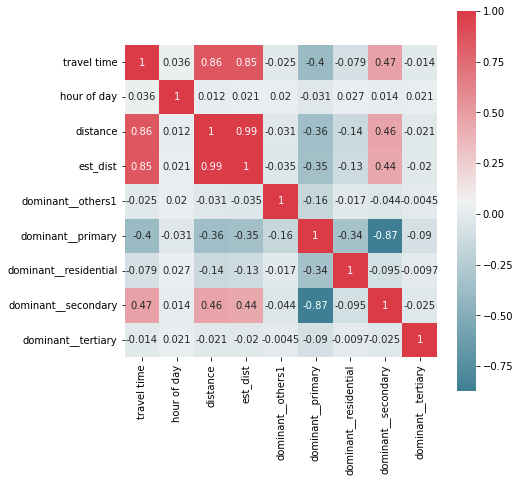

In [64]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(7,7))
corr = df11.corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [65]:
x = np.array(df11[['est_dist','dominant__others1','dominant__primary','dominant__residential','dominant__tertiary','dominant__secondary']])
# x = np.array(df1.iloc[:,1:])
y = np.array(df11['travel time'])
x

array([[0.26790189, 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.25689107, 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.26794166, 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       ...,
       [0.59997829, 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.59886182, 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.61177756, 0.        , 1.        , 0.        , 0.        ,
        0.        ]])

In [66]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [67]:
print(X_train.shape)
print(X_test.shape)
# X_train

(12759, 6)
(3190, 6)


In [68]:
# inputs: distance +  dominant road
model3_1_1 = nnmodel(50, num_hlayers=1,Epoch=500)
model3_1_1

Epoch 1/500
399/399 [==============================] - 1s 932us/step - loss: 1014887.3750 - mape: 98.4895 - rmse: 1007.4162 - val_loss: 1015976.1875 - val_mape: 95.6300 - val_rmse: 1007.9564
Epoch 2/500
399/399 [==============================] - 0s 801us/step - loss: 913783.5000 - mape: 89.6344 - rmse: 955.9202 - val_loss: 867156.3125 - val_mape: 82.7598 - val_rmse: 931.2123
Epoch 3/500
399/399 [==============================] - 0s 810us/step - loss: 744770.0000 - mape: 73.2552 - rmse: 863.0005 - val_loss: 676532.5000 - val_mape: 63.9949 - val_rmse: 822.5159
Epoch 4/500
399/399 [==============================] - 0s 777us/step - loss: 559613.8750 - mape: 53.2634 - rmse: 748.0734 - val_loss: 491730.9688 - val_mape: 44.3119 - val_rmse: 701.2353
Epoch 5/500
399/399 [==============================] - 0s 782us/step - loss: 399727.3438 - mape: 39.3986 - rmse: 632.2399 - val_loss: 347407.3750 - val_mape: 38.5924 - val_rmse: 589.4127
Epoch 6/500
399/399 [==============================] - 0s 791

Epoch 45/500
399/399 [==============================] - 0s 763us/step - loss: 69094.2344 - mape: 24.3359 - rmse: 262.8578 - val_loss: 71788.2422 - val_mape: 24.1379 - val_rmse: 267.9333
Epoch 46/500
399/399 [==============================] - 0s 783us/step - loss: 69092.8516 - mape: 24.4941 - rmse: 262.8552 - val_loss: 71778.4219 - val_mape: 23.8757 - val_rmse: 267.9149
Epoch 47/500
399/399 [==============================] - 0s 806us/step - loss: 69087.8438 - mape: 24.2842 - rmse: 262.8457 - val_loss: 71796.4922 - val_mape: 24.0120 - val_rmse: 267.9487
Epoch 48/500
399/399 [==============================] - 0s 788us/step - loss: 69100.1328 - mape: 24.4276 - rmse: 262.8690 - val_loss: 71779.1406 - val_mape: 23.7510 - val_rmse: 267.9163
Epoch 49/500
399/399 [==============================] - 0s 770us/step - loss: 69085.2031 - mape: 24.2266 - rmse: 262.8406 - val_loss: 71809.1953 - val_mape: 24.1842 - val_rmse: 267.9724
Epoch 50/500
399/399 [==============================] - 0s 802us/step 

399/399 [==============================] - 0s 786us/step - loss: 69062.9688 - mape: 24.3270 - rmse: 262.7983 - val_loss: 71772.6406 - val_mape: 23.8489 - val_rmse: 267.9042
Epoch 90/500
399/399 [==============================] - 0s 785us/step - loss: 69069.0547 - mape: 24.3218 - rmse: 262.8099 - val_loss: 71753.5078 - val_mape: 23.7573 - val_rmse: 267.8684
Epoch 91/500
399/399 [==============================] - 0s 813us/step - loss: 69055.4219 - mape: 24.2513 - rmse: 262.7840 - val_loss: 71785.8828 - val_mape: 24.1543 - val_rmse: 267.9289
Epoch 92/500
399/399 [==============================] - 0s 758us/step - loss: 69071.8203 - mape: 24.4853 - rmse: 262.8152 - val_loss: 71769.5312 - val_mape: 23.6976 - val_rmse: 267.8983
Epoch 93/500
399/399 [==============================] - 0s 757us/step - loss: 69064.7344 - mape: 24.3122 - rmse: 262.8017 - val_loss: 71768.0938 - val_mape: 23.6529 - val_rmse: 267.8957
Epoch 94/500
399/399 [==============================] - 0s 792us/step - loss: 69058

Epoch 133/500
399/399 [==============================] - 0s 762us/step - loss: 69036.3203 - mape: 24.1483 - rmse: 262.7477 - val_loss: 71762.6562 - val_mape: 24.1901 - val_rmse: 267.8855
Epoch 134/500
399/399 [==============================] - 0s 824us/step - loss: 69033.6016 - mape: 24.5377 - rmse: 262.7425 - val_loss: 71734.6094 - val_mape: 23.6446 - val_rmse: 267.8332
Epoch 135/500
399/399 [==============================] - 0s 791us/step - loss: 69050.0703 - mape: 24.2985 - rmse: 262.7738 - val_loss: 71738.4297 - val_mape: 23.7804 - val_rmse: 267.8403
Epoch 136/500
399/399 [==============================] - 0s 796us/step - loss: 69046.9375 - mape: 24.3004 - rmse: 262.7679 - val_loss: 71744.7969 - val_mape: 23.9195 - val_rmse: 267.8522
Epoch 137/500
399/399 [==============================] - 0s 763us/step - loss: 69038.5859 - mape: 24.3952 - rmse: 262.7520 - val_loss: 71739.3594 - val_mape: 23.6558 - val_rmse: 267.8420
Epoch 138/500
399/399 [==============================] - 0s 788us

Epoch 177/500
399/399 [==============================] - 0s 794us/step - loss: 69021.2109 - mape: 24.3038 - rmse: 262.7189 - val_loss: 71720.5312 - val_mape: 23.7580 - val_rmse: 267.8069
Epoch 178/500
399/399 [==============================] - 0s 839us/step - loss: 69010.6953 - mape: 24.3769 - rmse: 262.6989 - val_loss: 71721.3125 - val_mape: 23.6450 - val_rmse: 267.8083
Epoch 179/500
399/399 [==============================] - 0s 902us/step - loss: 69017.9844 - mape: 24.2742 - rmse: 262.7127 - val_loss: 71733.5156 - val_mape: 23.9209 - val_rmse: 267.8311
Epoch 180/500
399/399 [==============================] - 0s 706us/step - loss: 69024.3750 - mape: 24.3518 - rmse: 262.7249 - val_loss: 71726.7422 - val_mape: 23.8626 - val_rmse: 267.8185
Epoch 181/500
399/399 [==============================] - 0s 749us/step - loss: 69021.3438 - mape: 24.3274 - rmse: 262.7191 - val_loss: 71723.2734 - val_mape: 23.9145 - val_rmse: 267.8120
Epoch 182/500
399/399 [==============================] - 0s 785us

Epoch 221/500
399/399 [==============================] - 0s 796us/step - loss: 68991.1562 - mape: 24.3026 - rmse: 262.6617 - val_loss: 71708.1953 - val_mape: 23.8379 - val_rmse: 267.7839
Epoch 222/500
399/399 [==============================] - 0s 773us/step - loss: 68989.6172 - mape: 24.3227 - rmse: 262.6588 - val_loss: 71713.8438 - val_mape: 23.9439 - val_rmse: 267.7944
Epoch 223/500
399/399 [==============================] - 0s 776us/step - loss: 68997.0469 - mape: 24.2639 - rmse: 262.6729 - val_loss: 71719.2109 - val_mape: 23.9473 - val_rmse: 267.8044
Epoch 224/500
399/399 [==============================] - 0s 771us/step - loss: 68993.2578 - mape: 24.3866 - rmse: 262.6657 - val_loss: 71716.8359 - val_mape: 23.5723 - val_rmse: 267.8000
Epoch 225/500
399/399 [==============================] - 0s 802us/step - loss: 68980.4297 - mape: 24.2326 - rmse: 262.6413 - val_loss: 71731.1641 - val_mape: 24.0931 - val_rmse: 267.8268
Epoch 226/500
399/399 [==============================] - 0s 776us

Epoch 265/500
399/399 [==============================] - 0s 778us/step - loss: 68984.5938 - mape: 24.2428 - rmse: 262.6492 - val_loss: 71703.5625 - val_mape: 23.6925 - val_rmse: 267.7752
Epoch 266/500
399/399 [==============================] - 0s 752us/step - loss: 68980.9219 - mape: 24.3354 - rmse: 262.6422 - val_loss: 71704.0234 - val_mape: 23.6203 - val_rmse: 267.7761
Epoch 267/500
399/399 [==============================] - 0s 798us/step - loss: 68984.1797 - mape: 24.2467 - rmse: 262.6484 - val_loss: 71692.5469 - val_mape: 23.7033 - val_rmse: 267.7546
Epoch 268/500
399/399 [==============================] - 0s 783us/step - loss: 68979.4688 - mape: 24.3356 - rmse: 262.6394 - val_loss: 71682.8906 - val_mape: 23.7734 - val_rmse: 267.7366
Epoch 269/500
399/399 [==============================] - 0s 839us/step - loss: 68981.6484 - mape: 24.2140 - rmse: 262.6436 - val_loss: 71698.6953 - val_mape: 23.9646 - val_rmse: 267.7661
Epoch 270/500
399/399 [==============================] - 0s 816us

Epoch 309/500
399/399 [==============================] - 0s 786us/step - loss: 68966.2656 - mape: 24.2250 - rmse: 262.6143 - val_loss: 71692.4375 - val_mape: 23.8746 - val_rmse: 267.7544
Epoch 310/500
399/399 [==============================] - 0s 774us/step - loss: 68952.3828 - mape: 24.3600 - rmse: 262.5879 - val_loss: 71690.3359 - val_mape: 23.6200 - val_rmse: 267.7505
Epoch 311/500
399/399 [==============================] - 0s 833us/step - loss: 68960.5312 - mape: 24.3449 - rmse: 262.6034 - val_loss: 71685.7812 - val_mape: 23.5210 - val_rmse: 267.7420
Epoch 312/500
399/399 [==============================] - 0s 807us/step - loss: 68971.9688 - mape: 24.1598 - rmse: 262.6252 - val_loss: 71730.6953 - val_mape: 24.2011 - val_rmse: 267.8259
Epoch 313/500
399/399 [==============================] - 0s 770us/step - loss: 68955.2031 - mape: 24.3591 - rmse: 262.5932 - val_loss: 71686.9062 - val_mape: 23.8216 - val_rmse: 267.7441
Epoch 314/500
399/399 [==============================] - 0s 784us

Epoch 353/500
399/399 [==============================] - 0s 787us/step - loss: 68945.6094 - mape: 24.1792 - rmse: 262.5750 - val_loss: 71670.7422 - val_mape: 23.7342 - val_rmse: 267.7139
Epoch 354/500
399/399 [==============================] - 0s 772us/step - loss: 68950.1484 - mape: 24.3689 - rmse: 262.5836 - val_loss: 71675.3125 - val_mape: 23.5770 - val_rmse: 267.7224
Epoch 355/500
399/399 [==============================] - 0s 761us/step - loss: 68947.2969 - mape: 24.2109 - rmse: 262.5782 - val_loss: 71676.8438 - val_mape: 23.8898 - val_rmse: 267.7253
Epoch 356/500
399/399 [==============================] - 0s 756us/step - loss: 68954.2109 - mape: 24.3105 - rmse: 262.5913 - val_loss: 71676.8125 - val_mape: 23.8943 - val_rmse: 267.7253
Epoch 357/500
399/399 [==============================] - 0s 781us/step - loss: 68942.6406 - mape: 24.3484 - rmse: 262.5693 - val_loss: 71669.9453 - val_mape: 23.6464 - val_rmse: 267.7124
Epoch 358/500
399/399 [==============================] - 0s 812us

Epoch 397/500
399/399 [==============================] - 0s 795us/step - loss: 68933.7812 - mape: 24.1349 - rmse: 262.5524 - val_loss: 71692.9688 - val_mape: 24.1807 - val_rmse: 267.7554
Epoch 398/500
399/399 [==============================] - 0s 763us/step - loss: 68933.0859 - mape: 24.4478 - rmse: 262.5511 - val_loss: 71666.5703 - val_mape: 23.6851 - val_rmse: 267.7061
Epoch 399/500
399/399 [==============================] - 0s 768us/step - loss: 68931.5547 - mape: 24.2423 - rmse: 262.5482 - val_loss: 71670.2734 - val_mape: 23.7742 - val_rmse: 267.7130
Epoch 400/500
399/399 [==============================] - 0s 761us/step - loss: 68933.4062 - mape: 24.2179 - rmse: 262.5517 - val_loss: 71675.5547 - val_mape: 24.0443 - val_rmse: 267.7229
Epoch 401/500
399/399 [==============================] - 0s 783us/step - loss: 68934.0469 - mape: 24.3600 - rmse: 262.5529 - val_loss: 71660.6094 - val_mape: 23.6685 - val_rmse: 267.6950
Epoch 402/500
399/399 [==============================] - 0s 772us

Epoch 441/500
399/399 [==============================] - 0s 795us/step - loss: 68912.8047 - mape: 24.3124 - rmse: 262.5125 - val_loss: 71657.6875 - val_mape: 23.8705 - val_rmse: 267.6895
Epoch 442/500
399/399 [==============================] - 0s 817us/step - loss: 68920.0469 - mape: 24.3220 - rmse: 262.5263 - val_loss: 71664.2188 - val_mape: 23.8879 - val_rmse: 267.7017
Epoch 443/500
399/399 [==============================] - 0s 793us/step - loss: 68913.6406 - mape: 24.3235 - rmse: 262.5141 - val_loss: 71655.1641 - val_mape: 23.7200 - val_rmse: 267.6848
Epoch 444/500
399/399 [==============================] - 0s 787us/step - loss: 68912.2266 - mape: 24.2250 - rmse: 262.5114 - val_loss: 71665.0156 - val_mape: 23.9343 - val_rmse: 267.7032
Epoch 445/500
399/399 [==============================] - 0s 854us/step - loss: 68913.7109 - mape: 24.3887 - rmse: 262.5142 - val_loss: 71651.2812 - val_mape: 23.5705 - val_rmse: 267.6776
Epoch 446/500
399/399 [==============================] - 0s 830us

Epoch 485/500
399/399 [==============================] - 0s 775us/step - loss: 68896.8828 - mape: 24.3212 - rmse: 262.4821 - val_loss: 71670.5625 - val_mape: 24.0143 - val_rmse: 267.7136
Epoch 486/500
399/399 [==============================] - 0s 788us/step - loss: 68893.5938 - mape: 24.2127 - rmse: 262.4759 - val_loss: 71692.8047 - val_mape: 24.2055 - val_rmse: 267.7551
Epoch 487/500
399/399 [==============================] - 0s 836us/step - loss: 68892.9062 - mape: 24.2703 - rmse: 262.4746 - val_loss: 71684.1484 - val_mape: 24.2246 - val_rmse: 267.7390
Epoch 488/500
399/399 [==============================] - 0s 837us/step - loss: 68889.0078 - mape: 24.4682 - rmse: 262.4672 - val_loss: 71649.1328 - val_mape: 23.7917 - val_rmse: 267.6736
Epoch 489/500
399/399 [==============================] - 0s 783us/step - loss: 68905.1875 - mape: 24.2946 - rmse: 262.4980 - val_loss: 71643.4219 - val_mape: 23.6494 - val_rmse: 267.6629
Epoch 490/500
399/399 [==============================] - 0s 817us

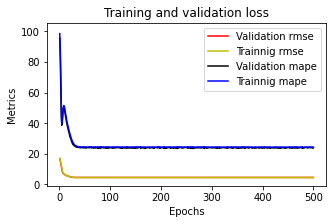

In [69]:
plotme(model3_1_1)


In [70]:
# inputs: distance +  dominant road
model3_1_2 = nnmodel(100, num_hlayers=1,Epoch=500)
model3_1_2

Epoch 1/500
399/399 [==============================] - 0s 879us/step - loss: 997833.6875 - mape: 96.9785 - rmse: 998.9163 - val_loss: 959424.2500 - val_mape: 90.8146 - val_rmse: 979.5020
Epoch 2/500
399/399 [==============================] - 0s 750us/step - loss: 795574.0625 - mape: 78.0111 - rmse: 891.9496 - val_loss: 677169.7500 - val_mape: 63.8476 - val_rmse: 822.9033
Epoch 3/500
399/399 [==============================] - 0s 747us/step - loss: 513119.5938 - mape: 48.2822 - rmse: 716.3237 - val_loss: 403593.6250 - val_mape: 39.1067 - val_rmse: 635.2902
Epoch 4/500
399/399 [==============================] - 0s 723us/step - loss: 303166.2500 - mape: 39.9872 - rmse: 550.6053 - val_loss: 245687.7812 - val_mape: 43.9072 - val_rmse: 495.6690
Epoch 5/500
399/399 [==============================] - 0s 742us/step - loss: 206710.6406 - mape: 47.9627 - rmse: 454.6544 - val_loss: 186549.9062 - val_mape: 49.5992 - val_rmse: 431.9142
Epoch 6/500
399/399 [==============================] - 0s 742us/s

Epoch 45/500
399/399 [==============================] - 0s 728us/step - loss: 69181.0859 - mape: 24.3448 - rmse: 263.0230 - val_loss: 71868.7188 - val_mape: 24.2263 - val_rmse: 268.0834
Epoch 46/500
399/399 [==============================] - 0s 713us/step - loss: 69169.1328 - mape: 24.3251 - rmse: 263.0002 - val_loss: 71826.6953 - val_mape: 24.0321 - val_rmse: 268.0050
Epoch 47/500
399/399 [==============================] - 0s 691us/step - loss: 69165.3516 - mape: 24.4376 - rmse: 262.9931 - val_loss: 71824.4453 - val_mape: 23.8563 - val_rmse: 268.0008
Epoch 48/500
399/399 [==============================] - 0s 719us/step - loss: 69164.9219 - mape: 24.3711 - rmse: 262.9922 - val_loss: 71849.5391 - val_mape: 24.0957 - val_rmse: 268.0476
Epoch 49/500
399/399 [==============================] - 0s 753us/step - loss: 69170.0312 - mape: 24.4035 - rmse: 263.0020 - val_loss: 71819.2031 - val_mape: 23.6945 - val_rmse: 267.9911
Epoch 50/500
399/399 [==============================] - 0s 738us/step 

399/399 [==============================] - 0s 719us/step - loss: 69146.1953 - mape: 24.3785 - rmse: 262.9566 - val_loss: 71867.3281 - val_mape: 24.2787 - val_rmse: 268.0808
Epoch 90/500
399/399 [==============================] - 0s 730us/step - loss: 69150.6562 - mape: 24.4274 - rmse: 262.9651 - val_loss: 71818.8203 - val_mape: 23.8370 - val_rmse: 267.9903
Epoch 91/500
399/399 [==============================] - 0s 705us/step - loss: 69154.8125 - mape: 24.3370 - rmse: 262.9730 - val_loss: 71812.4531 - val_mape: 23.6689 - val_rmse: 267.9785
Epoch 92/500
399/399 [==============================] - 0s 733us/step - loss: 69155.0391 - mape: 24.3435 - rmse: 262.9734 - val_loss: 71870.4375 - val_mape: 24.3058 - val_rmse: 268.0866
Epoch 93/500
399/399 [==============================] - 0s 712us/step - loss: 69154.7578 - mape: 24.3870 - rmse: 262.9729 - val_loss: 71800.1484 - val_mape: 23.7723 - val_rmse: 267.9555
Epoch 94/500
399/399 [==============================] - 0s 729us/step - loss: 69113

Epoch 133/500
399/399 [==============================] - 0s 739us/step - loss: 69140.1172 - mape: 24.4040 - rmse: 262.9451 - val_loss: 71794.2266 - val_mape: 23.8808 - val_rmse: 267.9445
Epoch 134/500
399/399 [==============================] - 0s 704us/step - loss: 69145.7266 - mape: 24.3293 - rmse: 262.9557 - val_loss: 71816.3984 - val_mape: 24.0852 - val_rmse: 267.9858
Epoch 135/500
399/399 [==============================] - 0s 703us/step - loss: 69137.8438 - mape: 24.4413 - rmse: 262.9408 - val_loss: 71795.2891 - val_mape: 23.6789 - val_rmse: 267.9464
Epoch 136/500
399/399 [==============================] - 0s 721us/step - loss: 69158.3516 - mape: 24.3399 - rmse: 262.9798 - val_loss: 71820.8828 - val_mape: 24.0899 - val_rmse: 267.9942
Epoch 137/500
399/399 [==============================] - 0s 743us/step - loss: 69153.0391 - mape: 24.2967 - rmse: 262.9697 - val_loss: 71786.9688 - val_mape: 24.0763 - val_rmse: 267.9309
Epoch 138/500
399/399 [==============================] - 0s 715us

Epoch 177/500
399/399 [==============================] - 0s 731us/step - loss: 69150.2422 - mape: 24.3337 - rmse: 262.9643 - val_loss: 71792.1250 - val_mape: 24.0377 - val_rmse: 267.9405
Epoch 178/500
399/399 [==============================] - 0s 720us/step - loss: 69142.5547 - mape: 24.4585 - rmse: 262.9497 - val_loss: 71783.8672 - val_mape: 23.6194 - val_rmse: 267.9251
Epoch 179/500
399/399 [==============================] - 0s 725us/step - loss: 69132.2422 - mape: 24.2596 - rmse: 262.9301 - val_loss: 71790.2031 - val_mape: 23.9276 - val_rmse: 267.9370
Epoch 180/500
399/399 [==============================] - 0s 740us/step - loss: 69153.2109 - mape: 24.3833 - rmse: 262.9700 - val_loss: 71780.0469 - val_mape: 23.8899 - val_rmse: 267.9180
Epoch 181/500
399/399 [==============================] - 0s 733us/step - loss: 69156.7031 - mape: 24.3896 - rmse: 262.9766 - val_loss: 71777.9688 - val_mape: 23.8403 - val_rmse: 267.9141
Epoch 182/500
399/399 [==============================] - 0s 706us

Epoch 221/500
399/399 [==============================] - 0s 707us/step - loss: 69142.0859 - mape: 24.3713 - rmse: 262.9488 - val_loss: 71780.3984 - val_mape: 23.7521 - val_rmse: 267.9186
Epoch 222/500
399/399 [==============================] - 0s 727us/step - loss: 69134.7344 - mape: 24.4202 - rmse: 262.9348 - val_loss: 71777.0000 - val_mape: 23.6738 - val_rmse: 267.9123
Epoch 223/500
399/399 [==============================] - 0s 704us/step - loss: 69134.1484 - mape: 24.3253 - rmse: 262.9337 - val_loss: 71788.5859 - val_mape: 24.0362 - val_rmse: 267.9339
Epoch 224/500
399/399 [==============================] - 0s 706us/step - loss: 69138.9062 - mape: 24.3446 - rmse: 262.9428 - val_loss: 71770.2891 - val_mape: 23.8744 - val_rmse: 267.8998
Epoch 225/500
399/399 [==============================] - 0s 714us/step - loss: 69148.3359 - mape: 24.4611 - rmse: 262.9607 - val_loss: 71782.4375 - val_mape: 23.8062 - val_rmse: 267.9225
Epoch 226/500
399/399 [==============================] - 0s 771us

Epoch 265/500
399/399 [==============================] - 0s 741us/step - loss: 69147.1172 - mape: 24.3314 - rmse: 262.9584 - val_loss: 71774.8438 - val_mape: 23.8739 - val_rmse: 267.9083
Epoch 266/500
399/399 [==============================] - 0s 743us/step - loss: 69140.7188 - mape: 24.4332 - rmse: 262.9462 - val_loss: 71804.3438 - val_mape: 23.7175 - val_rmse: 267.9633
Epoch 267/500
399/399 [==============================] - 0s 724us/step - loss: 69138.6328 - mape: 24.2677 - rmse: 262.9423 - val_loss: 71812.8516 - val_mape: 24.2834 - val_rmse: 267.9792
Epoch 268/500
399/399 [==============================] - 0s 741us/step - loss: 69147.9141 - mape: 24.4382 - rmse: 262.9599 - val_loss: 71787.8281 - val_mape: 24.0023 - val_rmse: 267.9325
Epoch 269/500
399/399 [==============================] - 0s 735us/step - loss: 69143.7344 - mape: 24.3904 - rmse: 262.9520 - val_loss: 71804.5625 - val_mape: 23.3928 - val_rmse: 267.9637
Epoch 270/500
399/399 [==============================] - 0s 732us

Epoch 309/500
399/399 [==============================] - 0s 737us/step - loss: 69134.7734 - mape: 24.4098 - rmse: 262.9349 - val_loss: 71781.4297 - val_mape: 23.5891 - val_rmse: 267.9206
Epoch 310/500
399/399 [==============================] - 0s 711us/step - loss: 69150.6016 - mape: 24.2769 - rmse: 262.9650 - val_loss: 71779.4453 - val_mape: 23.6356 - val_rmse: 267.9169
Epoch 311/500
399/399 [==============================] - 0s 723us/step - loss: 69128.1016 - mape: 24.4000 - rmse: 262.9222 - val_loss: 71816.9141 - val_mape: 24.1047 - val_rmse: 267.9868
Epoch 312/500
399/399 [==============================] - 0s 733us/step - loss: 69131.6250 - mape: 24.4171 - rmse: 262.9289 - val_loss: 71782.6094 - val_mape: 23.7240 - val_rmse: 267.9228
Epoch 313/500
399/399 [==============================] - 0s 727us/step - loss: 69140.1016 - mape: 24.3398 - rmse: 262.9451 - val_loss: 71811.2344 - val_mape: 24.0145 - val_rmse: 267.9762
Epoch 314/500
399/399 [==============================] - 0s 761us

Epoch 353/500
399/399 [==============================] - 0s 724us/step - loss: 69134.5078 - mape: 24.3927 - rmse: 262.9344 - val_loss: 71812.3359 - val_mape: 23.3256 - val_rmse: 267.9782
Epoch 354/500
399/399 [==============================] - 0s 724us/step - loss: 69128.3359 - mape: 24.1608 - rmse: 262.9227 - val_loss: 71929.1797 - val_mape: 24.8006 - val_rmse: 268.1962
Epoch 355/500
399/399 [==============================] - 0s 843us/step - loss: 69119.0469 - mape: 24.4018 - rmse: 262.9050 - val_loss: 71784.1484 - val_mape: 24.0722 - val_rmse: 267.9256
Epoch 356/500
399/399 [==============================] - 0s 733us/step - loss: 69145.7422 - mape: 24.3936 - rmse: 262.9558 - val_loss: 71767.8516 - val_mape: 23.9922 - val_rmse: 267.8952
Epoch 357/500
399/399 [==============================] - 0s 710us/step - loss: 69132.2031 - mape: 24.3980 - rmse: 262.9300 - val_loss: 71779.2734 - val_mape: 23.6312 - val_rmse: 267.9165
Epoch 358/500
399/399 [==============================] - 0s 709us

Epoch 397/500
399/399 [==============================] - 0s 732us/step - loss: 69145.2891 - mape: 24.3750 - rmse: 262.9549 - val_loss: 71797.0781 - val_mape: 23.6283 - val_rmse: 267.9498
Epoch 398/500
399/399 [==============================] - 0s 714us/step - loss: 69147.1406 - mape: 24.2576 - rmse: 262.9584 - val_loss: 71801.8281 - val_mape: 23.9894 - val_rmse: 267.9586
Epoch 399/500
399/399 [==============================] - 0s 772us/step - loss: 69134.3125 - mape: 24.3643 - rmse: 262.9341 - val_loss: 71775.7812 - val_mape: 23.8545 - val_rmse: 267.9100
Epoch 400/500
399/399 [==============================] - 0s 702us/step - loss: 69139.8750 - mape: 24.4183 - rmse: 262.9446 - val_loss: 71795.4219 - val_mape: 23.5957 - val_rmse: 267.9467
Epoch 401/500
399/399 [==============================] - 0s 742us/step - loss: 69136.9609 - mape: 24.3069 - rmse: 262.9391 - val_loss: 71792.4766 - val_mape: 24.1182 - val_rmse: 267.9412
Epoch 402/500
399/399 [==============================] - 0s 720us

Epoch 441/500
399/399 [==============================] - 0s 727us/step - loss: 69125.6953 - mape: 24.4481 - rmse: 262.9177 - val_loss: 71789.9609 - val_mape: 23.5412 - val_rmse: 267.9365
Epoch 442/500
399/399 [==============================] - 0s 740us/step - loss: 69150.2344 - mape: 24.3320 - rmse: 262.9643 - val_loss: 71786.7344 - val_mape: 23.6805 - val_rmse: 267.9305
Epoch 443/500
399/399 [==============================] - 0s 706us/step - loss: 69136.8672 - mape: 24.3612 - rmse: 262.9389 - val_loss: 71800.0391 - val_mape: 24.0864 - val_rmse: 267.9553
Epoch 444/500
399/399 [==============================] - 0s 708us/step - loss: 69138.1016 - mape: 24.4061 - rmse: 262.9413 - val_loss: 71801.6328 - val_mape: 23.9474 - val_rmse: 267.9583
Epoch 445/500
399/399 [==============================] - 0s 736us/step - loss: 69142.4297 - mape: 24.3927 - rmse: 262.9495 - val_loss: 71797.1484 - val_mape: 23.8123 - val_rmse: 267.9499
Epoch 446/500
399/399 [==============================] - 0s 717us

Epoch 485/500
399/399 [==============================] - 0s 741us/step - loss: 69133.4375 - mape: 24.4124 - rmse: 262.9324 - val_loss: 71786.3594 - val_mape: 23.8202 - val_rmse: 267.9298
Epoch 486/500
399/399 [==============================] - 0s 716us/step - loss: 69120.6094 - mape: 24.2588 - rmse: 262.9080 - val_loss: 71835.8906 - val_mape: 24.4555 - val_rmse: 268.0222
Epoch 487/500
399/399 [==============================] - 0s 741us/step - loss: 69135.2109 - mape: 24.4826 - rmse: 262.9358 - val_loss: 71820.8438 - val_mape: 24.1027 - val_rmse: 267.9941
Epoch 488/500
399/399 [==============================] - 0s 729us/step - loss: 69148.5234 - mape: 24.2901 - rmse: 262.9611 - val_loss: 71839.1562 - val_mape: 24.3740 - val_rmse: 268.0283
Epoch 489/500
399/399 [==============================] - 0s 723us/step - loss: 69145.6172 - mape: 24.5234 - rmse: 262.9555 - val_loss: 71791.1797 - val_mape: 23.5746 - val_rmse: 267.9388
Epoch 490/500
399/399 [==============================] - 0s 771us

In [71]:
202.7127227783203/60

3.378545379638672

In [72]:
# inputs: distance +  dominant road
model3_1_3 = nnmodel(200, num_hlayers=1,Epoch=500)
model3_1_3

Epoch 1/500
399/399 [==============================] - 1s 1ms/step - loss: 971486.7500 - mape: 94.7711 - rmse: 985.6403 - val_loss: 880731.8125 - val_mape: 83.9705 - val_rmse: 938.4731
Epoch 2/500
399/399 [==============================] - 0s 764us/step - loss: 657631.0000 - mape: 63.8217 - rmse: 810.9445 - val_loss: 488533.3750 - val_mape: 44.0069 - val_rmse: 698.9516
Epoch 3/500
399/399 [==============================] - 0s 736us/step - loss: 336279.3438 - mape: 39.9041 - rmse: 579.8960 - val_loss: 247032.7031 - val_mape: 43.4190 - val_rmse: 497.0238
Epoch 4/500
399/399 [==============================] - 0s 723us/step - loss: 199512.1406 - mape: 47.8461 - rmse: 446.6678 - val_loss: 175636.6094 - val_mape: 50.4127 - val_rmse: 419.0902
Epoch 5/500
399/399 [==============================] - 0s 728us/step - loss: 160449.3281 - mape: 51.4695 - rmse: 400.5613 - val_loss: 150348.2344 - val_mape: 49.3274 - val_rmse: 387.7477
Epoch 6/500
399/399 [==============================] - 0s 759us/ste

399/399 [==============================] - 0s 740us/step - loss: 69124.2109 - mape: 24.2637 - rmse: 262.9148 - val_loss: 71930.5938 - val_mape: 24.7313 - val_rmse: 268.1988
Epoch 46/500
399/399 [==============================] - 0s 752us/step - loss: 69164.0078 - mape: 24.5320 - rmse: 262.9905 - val_loss: 71809.8516 - val_mape: 23.5949 - val_rmse: 267.9736
Epoch 47/500
399/399 [==============================] - 0s 736us/step - loss: 69154.5547 - mape: 24.3299 - rmse: 262.9725 - val_loss: 71811.6719 - val_mape: 23.5501 - val_rmse: 267.9770
Epoch 48/500
399/399 [==============================] - 0s 716us/step - loss: 69152.1094 - mape: 24.3990 - rmse: 262.9679 - val_loss: 71813.1641 - val_mape: 23.4243 - val_rmse: 267.9798
Epoch 49/500
399/399 [==============================] - 0s 708us/step - loss: 69123.8750 - mape: 24.2480 - rmse: 262.9142 - val_loss: 71944.9531 - val_mape: 24.5966 - val_rmse: 268.2256
Epoch 50/500
399/399 [==============================] - 0s 742us/step - loss: 69120

Epoch 133/500
399/399 [==============================] - 0s 734us/step - loss: 69113.7266 - mape: 24.3503 - rmse: 262.8949 - val_loss: 71763.2812 - val_mape: 24.0007 - val_rmse: 267.8867
Epoch 134/500
399/399 [==============================] - 0s 735us/step - loss: 69096.2969 - mape: 24.2823 - rmse: 262.8618 - val_loss: 71766.9609 - val_mape: 24.1025 - val_rmse: 267.8936
Epoch 135/500
399/399 [==============================] - 0s 711us/step - loss: 69081.7109 - mape: 24.4031 - rmse: 262.8340 - val_loss: 71730.3203 - val_mape: 23.7293 - val_rmse: 267.8252
Epoch 136/500
399/399 [==============================] - 0s 750us/step - loss: 69081.2422 - mape: 24.4281 - rmse: 262.8331 - val_loss: 71766.9688 - val_mape: 23.9127 - val_rmse: 267.8936
Epoch 137/500
399/399 [==============================] - 0s 740us/step - loss: 69075.4062 - mape: 24.2951 - rmse: 262.8220 - val_loss: 71762.3047 - val_mape: 23.4344 - val_rmse: 267.8849
Epoch 138/500
399/399 [==============================] - 0s 738us

Epoch 177/500
399/399 [==============================] - 0s 739us/step - loss: 69078.5000 - mape: 24.3624 - rmse: 262.8279 - val_loss: 71768.7500 - val_mape: 23.3702 - val_rmse: 267.8969
Epoch 178/500
399/399 [==============================] - 0s 756us/step - loss: 69042.0391 - mape: 24.3208 - rmse: 262.7585 - val_loss: 71801.5391 - val_mape: 23.0391 - val_rmse: 267.9581
Epoch 179/500
399/399 [==============================] - 0s 742us/step - loss: 69034.3750 - mape: 24.3295 - rmse: 262.7439 - val_loss: 71752.3672 - val_mape: 23.2912 - val_rmse: 267.8663
Epoch 180/500
399/399 [==============================] - 0s 736us/step - loss: 69068.2500 - mape: 24.2916 - rmse: 262.8084 - val_loss: 71754.7344 - val_mape: 24.0783 - val_rmse: 267.8707
Epoch 181/500
399/399 [==============================] - 0s 743us/step - loss: 69048.1328 - mape: 24.2670 - rmse: 262.7701 - val_loss: 71795.6953 - val_mape: 24.2914 - val_rmse: 267.9472
Epoch 182/500
399/399 [==============================] - 0s 721us

Epoch 221/500
399/399 [==============================] - 0s 761us/step - loss: 69056.3516 - mape: 24.3112 - rmse: 262.7858 - val_loss: 71732.7734 - val_mape: 24.2518 - val_rmse: 267.8297
Epoch 222/500
399/399 [==============================] - 0s 754us/step - loss: 69047.4844 - mape: 24.4278 - rmse: 262.7689 - val_loss: 71723.6562 - val_mape: 23.4256 - val_rmse: 267.8127
Epoch 223/500
399/399 [==============================] - 0s 742us/step - loss: 69043.1250 - mape: 24.3132 - rmse: 262.7606 - val_loss: 71697.3438 - val_mape: 23.7891 - val_rmse: 267.7636
Epoch 224/500
399/399 [==============================] - 0s 738us/step - loss: 69050.0078 - mape: 24.3746 - rmse: 262.7737 - val_loss: 71719.1406 - val_mape: 23.3989 - val_rmse: 267.8043
Epoch 225/500
399/399 [==============================] - 0s 736us/step - loss: 69035.5859 - mape: 24.2616 - rmse: 262.7462 - val_loss: 71699.5312 - val_mape: 23.6553 - val_rmse: 267.7677
Epoch 226/500
399/399 [==============================] - 0s 733us

Epoch 265/500
399/399 [==============================] - 0s 726us/step - loss: 69012.7891 - mape: 24.1320 - rmse: 262.7029 - val_loss: 71679.3672 - val_mape: 24.2075 - val_rmse: 267.7300
Epoch 266/500
399/399 [==============================] - 0s 721us/step - loss: 69042.7344 - mape: 24.4640 - rmse: 262.7598 - val_loss: 71679.1875 - val_mape: 23.6559 - val_rmse: 267.7297
Epoch 267/500
399/399 [==============================] - 0s 736us/step - loss: 69037.9688 - mape: 24.3217 - rmse: 262.7508 - val_loss: 71696.9609 - val_mape: 23.3899 - val_rmse: 267.7629
Epoch 268/500
399/399 [==============================] - 0s 746us/step - loss: 69019.6875 - mape: 24.3137 - rmse: 262.7160 - val_loss: 71697.5547 - val_mape: 23.5295 - val_rmse: 267.7640
Epoch 269/500
399/399 [==============================] - 0s 728us/step - loss: 69015.8359 - mape: 24.1862 - rmse: 262.7086 - val_loss: 71673.0469 - val_mape: 23.8976 - val_rmse: 267.7182
Epoch 270/500
399/399 [==============================] - 0s 746us

Epoch 309/500
399/399 [==============================] - 0s 756us/step - loss: 68987.6953 - mape: 24.3717 - rmse: 262.6551 - val_loss: 71695.2109 - val_mape: 23.8457 - val_rmse: 267.7596
Epoch 310/500
399/399 [==============================] - 0s 735us/step - loss: 69000.2344 - mape: 24.1616 - rmse: 262.6790 - val_loss: 71704.0938 - val_mape: 24.2875 - val_rmse: 267.7762
Epoch 311/500
399/399 [==============================] - 0s 767us/step - loss: 68996.6172 - mape: 24.3800 - rmse: 262.6721 - val_loss: 71683.1562 - val_mape: 23.8056 - val_rmse: 267.7371
Epoch 312/500
399/399 [==============================] - 0s 733us/step - loss: 68976.6328 - mape: 24.3245 - rmse: 262.6340 - val_loss: 71696.5234 - val_mape: 23.6852 - val_rmse: 267.7621
Epoch 313/500
399/399 [==============================] - 0s 754us/step - loss: 68990.7734 - mape: 24.2154 - rmse: 262.6609 - val_loss: 71726.7266 - val_mape: 24.3663 - val_rmse: 267.8185
Epoch 314/500
399/399 [==============================] - 0s 747us

Epoch 353/500
399/399 [==============================] - 0s 745us/step - loss: 68960.0234 - mape: 24.3715 - rmse: 262.6024 - val_loss: 71656.6484 - val_mape: 23.5543 - val_rmse: 267.6876
Epoch 354/500
399/399 [==============================] - 0s 757us/step - loss: 68964.1797 - mape: 24.1356 - rmse: 262.6103 - val_loss: 71705.8125 - val_mape: 24.3125 - val_rmse: 267.7794
Epoch 355/500
399/399 [==============================] - 0s 744us/step - loss: 68952.0156 - mape: 24.3868 - rmse: 262.5872 - val_loss: 71648.6562 - val_mape: 23.5537 - val_rmse: 267.6727
Epoch 356/500
399/399 [==============================] - 0s 723us/step - loss: 68952.0547 - mape: 24.1955 - rmse: 262.5872 - val_loss: 71633.3281 - val_mape: 23.9659 - val_rmse: 267.6440
Epoch 357/500
399/399 [==============================] - 0s 759us/step - loss: 68951.1797 - mape: 24.4225 - rmse: 262.5856 - val_loss: 71654.7031 - val_mape: 23.6709 - val_rmse: 267.6840
Epoch 358/500
399/399 [==============================] - 0s 740us

Epoch 397/500
399/399 [==============================] - 0s 723us/step - loss: 68937.1484 - mape: 24.1665 - rmse: 262.5588 - val_loss: 71635.1094 - val_mape: 24.0916 - val_rmse: 267.6474
Epoch 398/500
399/399 [==============================] - 0s 739us/step - loss: 68946.7031 - mape: 24.2584 - rmse: 262.5771 - val_loss: 71737.7422 - val_mape: 24.5471 - val_rmse: 267.8390
Epoch 399/500
399/399 [==============================] - 0s 704us/step - loss: 68934.7422 - mape: 24.3567 - rmse: 262.5543 - val_loss: 71649.0469 - val_mape: 23.8941 - val_rmse: 267.6734
Epoch 400/500
399/399 [==============================] - 0s 731us/step - loss: 68927.0859 - mape: 24.2518 - rmse: 262.5397 - val_loss: 71623.1250 - val_mape: 23.4735 - val_rmse: 267.6250
Epoch 401/500
399/399 [==============================] - 0s 716us/step - loss: 68942.9688 - mape: 24.1645 - rmse: 262.5699 - val_loss: 71699.8047 - val_mape: 24.4185 - val_rmse: 267.7682
Epoch 402/500
399/399 [==============================] - 0s 709us

Epoch 441/500
399/399 [==============================] - 0s 750us/step - loss: 68918.9766 - mape: 24.2107 - rmse: 262.5242 - val_loss: 71663.1953 - val_mape: 24.2953 - val_rmse: 267.6998
Epoch 442/500
399/399 [==============================] - 0s 745us/step - loss: 68908.8438 - mape: 24.2579 - rmse: 262.5049 - val_loss: 71618.9062 - val_mape: 24.0623 - val_rmse: 267.6171
Epoch 443/500
399/399 [==============================] - 0s 742us/step - loss: 68892.9766 - mape: 24.3157 - rmse: 262.4747 - val_loss: 71623.7188 - val_mape: 23.2876 - val_rmse: 267.6261
Epoch 444/500
399/399 [==============================] - 0s 736us/step - loss: 68911.5078 - mape: 24.3075 - rmse: 262.5100 - val_loss: 71606.0312 - val_mape: 23.6433 - val_rmse: 267.5930
Epoch 445/500
399/399 [==============================] - 0s 724us/step - loss: 68903.7969 - mape: 24.1349 - rmse: 262.4953 - val_loss: 71616.1484 - val_mape: 24.1088 - val_rmse: 267.6119
Epoch 446/500
399/399 [==============================] - 0s 712us

Epoch 485/500
399/399 [==============================] - 0s 727us/step - loss: 68899.1719 - mape: 24.1675 - rmse: 262.4865 - val_loss: 71582.6328 - val_mape: 23.8688 - val_rmse: 267.5493
Epoch 486/500
399/399 [==============================] - 0s 744us/step - loss: 68862.1875 - mape: 24.2352 - rmse: 262.4160 - val_loss: 71649.4844 - val_mape: 24.2122 - val_rmse: 267.6742
Epoch 487/500
399/399 [==============================] - 0s 754us/step - loss: 68887.1328 - mape: 24.2452 - rmse: 262.4636 - val_loss: 71616.7578 - val_mape: 23.9241 - val_rmse: 267.6131
Epoch 488/500
399/399 [==============================] - 0s 730us/step - loss: 68876.7578 - mape: 24.2428 - rmse: 262.4438 - val_loss: 71625.1641 - val_mape: 23.8545 - val_rmse: 267.6288
Epoch 489/500
399/399 [==============================] - 0s 731us/step - loss: 68843.2188 - mape: 24.1595 - rmse: 262.3799 - val_loss: 71568.2031 - val_mape: 23.7848 - val_rmse: 267.5223
Epoch 490/500
399/399 [==============================] - 0s 754us

In [73]:
202.6893768310547/60

3.378156280517578

In [74]:
# inputs: distance +  dominant road
model3_1_4 = nnmodel(100,50, num_hlayers=2,Epoch=500)
model3_1_4

Epoch 1/500
399/399 [==============================] - 1s 936us/step - loss: 637344.1875 - mape: 70.0067 - rmse: 798.3384 - val_loss: 168245.5469 - val_mape: 52.6467 - val_rmse: 410.1775
Epoch 2/500
399/399 [==============================] - 0s 768us/step - loss: 131153.5781 - mape: 46.9926 - rmse: 362.1513 - val_loss: 112157.7109 - val_mape: 39.1404 - val_rmse: 334.8996
Epoch 3/500
399/399 [==============================] - 0s 803us/step - loss: 96643.8906 - mape: 36.4133 - rmse: 310.8760 - val_loss: 87452.7266 - val_mape: 31.1622 - val_rmse: 295.7241
Epoch 4/500
399/399 [==============================] - 0s 787us/step - loss: 77851.4609 - mape: 30.0267 - rmse: 279.0187 - val_loss: 74537.9531 - val_mape: 26.4902 - val_rmse: 273.0164
Epoch 5/500
399/399 [==============================] - 0s 777us/step - loss: 70508.2031 - mape: 26.2351 - rmse: 265.5338 - val_loss: 71735.2812 - val_mape: 24.7459 - val_rmse: 267.8344
Epoch 6/500
399/399 [==============================] - 0s 807us/step - 

399/399 [==============================] - 0s 751us/step - loss: 68731.6875 - mape: 24.1974 - rmse: 262.1673 - val_loss: 71885.2188 - val_mape: 24.8345 - val_rmse: 268.1142
Epoch 90/500
399/399 [==============================] - 0s 760us/step - loss: 68665.7266 - mape: 24.1295 - rmse: 262.0415 - val_loss: 72120.8203 - val_mape: 25.9538 - val_rmse: 268.5532
Epoch 91/500
399/399 [==============================] - 0s 789us/step - loss: 68721.3906 - mape: 24.3304 - rmse: 262.1476 - val_loss: 71564.5156 - val_mape: 24.2594 - val_rmse: 267.5154
Epoch 92/500
399/399 [==============================] - 0s 759us/step - loss: 68638.2109 - mape: 24.1286 - rmse: 261.9890 - val_loss: 71651.8984 - val_mape: 24.8432 - val_rmse: 267.6787
Epoch 93/500
399/399 [==============================] - 0s 763us/step - loss: 68705.3750 - mape: 24.3159 - rmse: 262.1171 - val_loss: 71409.2969 - val_mape: 23.8198 - val_rmse: 267.2252
Epoch 94/500
399/399 [==============================] - 0s 761us/step - loss: 68652

Epoch 133/500
399/399 [==============================] - 0s 765us/step - loss: 68618.7812 - mape: 24.2425 - rmse: 261.9519 - val_loss: 71671.5312 - val_mape: 25.0216 - val_rmse: 267.7154
Epoch 134/500
399/399 [==============================] - 0s 777us/step - loss: 68595.8906 - mape: 24.2188 - rmse: 261.9082 - val_loss: 71358.0547 - val_mape: 23.6563 - val_rmse: 267.1293
Epoch 135/500
399/399 [==============================] - 0s 813us/step - loss: 68591.7266 - mape: 24.2671 - rmse: 261.9002 - val_loss: 71421.6250 - val_mape: 23.7771 - val_rmse: 267.2483
Epoch 136/500
399/399 [==============================] - 0s 757us/step - loss: 68596.9531 - mape: 24.1899 - rmse: 261.9102 - val_loss: 71437.1172 - val_mape: 24.5129 - val_rmse: 267.2772
Epoch 137/500
399/399 [==============================] - 0s 783us/step - loss: 68586.3359 - mape: 24.1760 - rmse: 261.8899 - val_loss: 71681.1172 - val_mape: 24.8937 - val_rmse: 267.7333
Epoch 138/500
399/399 [==============================] - 0s 765us

Epoch 177/500
399/399 [==============================] - 0s 771us/step - loss: 68584.7109 - mape: 24.2730 - rmse: 261.8868 - val_loss: 71400.0703 - val_mape: 23.0126 - val_rmse: 267.2079
Epoch 178/500
399/399 [==============================] - 0s 760us/step - loss: 68600.3828 - mape: 24.1969 - rmse: 261.9167 - val_loss: 71394.5156 - val_mape: 23.3294 - val_rmse: 267.1975
Epoch 179/500
399/399 [==============================] - 0s 766us/step - loss: 68597.7266 - mape: 24.1770 - rmse: 261.9117 - val_loss: 71550.5469 - val_mape: 22.8303 - val_rmse: 267.4893
Epoch 180/500
399/399 [==============================] - 0s 777us/step - loss: 68603.3281 - mape: 24.1589 - rmse: 261.9224 - val_loss: 71437.0469 - val_mape: 23.0672 - val_rmse: 267.2771
Epoch 181/500
399/399 [==============================] - 0s 798us/step - loss: 68573.1328 - mape: 24.2675 - rmse: 261.8647 - val_loss: 71339.0156 - val_mape: 23.6750 - val_rmse: 267.0937
Epoch 182/500
399/399 [==============================] - 0s 788us

Epoch 221/500
399/399 [==============================] - 0s 748us/step - loss: 68499.2266 - mape: 24.2963 - rmse: 261.7236 - val_loss: 71369.7969 - val_mape: 23.3390 - val_rmse: 267.1513
Epoch 222/500
399/399 [==============================] - 0s 777us/step - loss: 68509.9922 - mape: 24.0830 - rmse: 261.7441 - val_loss: 71348.0078 - val_mape: 24.3412 - val_rmse: 267.1105
Epoch 223/500
399/399 [==============================] - 0s 779us/step - loss: 68594.1875 - mape: 24.1705 - rmse: 261.9049 - val_loss: 71566.1250 - val_mape: 24.9962 - val_rmse: 267.5185
Epoch 224/500
399/399 [==============================] - 0s 756us/step - loss: 68517.9141 - mape: 24.2949 - rmse: 261.7593 - val_loss: 71325.8984 - val_mape: 23.8707 - val_rmse: 267.0691
Epoch 225/500
399/399 [==============================] - 0s 774us/step - loss: 68547.6953 - mape: 24.2776 - rmse: 261.8162 - val_loss: 71412.7891 - val_mape: 22.9853 - val_rmse: 267.2317
Epoch 226/500
399/399 [==============================] - 0s 780us

Epoch 265/500
399/399 [==============================] - 0s 762us/step - loss: 68575.0859 - mape: 24.1231 - rmse: 261.8684 - val_loss: 71333.4297 - val_mape: 23.4602 - val_rmse: 267.0832
Epoch 266/500
399/399 [==============================] - 0s 774us/step - loss: 68517.9297 - mape: 24.1391 - rmse: 261.7593 - val_loss: 71500.7266 - val_mape: 24.7680 - val_rmse: 267.3962
Epoch 267/500
399/399 [==============================] - 0s 784us/step - loss: 68520.0469 - mape: 24.3348 - rmse: 261.7633 - val_loss: 71632.6641 - val_mape: 24.5690 - val_rmse: 267.6428
Epoch 268/500
399/399 [==============================] - 0s 751us/step - loss: 68559.0156 - mape: 24.0498 - rmse: 261.8378 - val_loss: 71557.6250 - val_mape: 25.0201 - val_rmse: 267.5026
Epoch 269/500
399/399 [==============================] - 0s 780us/step - loss: 68524.4922 - mape: 24.3429 - rmse: 261.7718 - val_loss: 71397.7109 - val_mape: 24.2161 - val_rmse: 267.2035
Epoch 270/500
399/399 [==============================] - 0s 767us

Epoch 309/500
399/399 [==============================] - 0s 795us/step - loss: 68580.0312 - mape: 24.2205 - rmse: 261.8779 - val_loss: 71728.9688 - val_mape: 24.7529 - val_rmse: 267.8226
Epoch 310/500
399/399 [==============================] - 0s 765us/step - loss: 68523.1562 - mape: 24.2449 - rmse: 261.7693 - val_loss: 71314.0391 - val_mape: 23.6475 - val_rmse: 267.0469
Epoch 311/500
399/399 [==============================] - 0s 743us/step - loss: 68542.7344 - mape: 24.1677 - rmse: 261.8067 - val_loss: 71546.5234 - val_mape: 22.6999 - val_rmse: 267.4818
Epoch 312/500
399/399 [==============================] - 0s 777us/step - loss: 68550.6562 - mape: 24.2857 - rmse: 261.8218 - val_loss: 71383.8125 - val_mape: 23.8362 - val_rmse: 267.1775
Epoch 313/500
399/399 [==============================] - 0s 759us/step - loss: 68443.2109 - mape: 24.1735 - rmse: 261.6165 - val_loss: 71502.2266 - val_mape: 24.0825 - val_rmse: 267.3990
Epoch 314/500
399/399 [==============================] - 0s 768us

Epoch 353/500
399/399 [==============================] - 0s 789us/step - loss: 68483.7656 - mape: 24.2543 - rmse: 261.6940 - val_loss: 71477.5703 - val_mape: 22.6240 - val_rmse: 267.3529
Epoch 354/500
399/399 [==============================] - 0s 770us/step - loss: 68491.7031 - mape: 24.0550 - rmse: 261.7092 - val_loss: 71462.1016 - val_mape: 24.5229 - val_rmse: 267.3240
Epoch 355/500
399/399 [==============================] - 0s 746us/step - loss: 68535.5391 - mape: 24.1819 - rmse: 261.7929 - val_loss: 71348.5469 - val_mape: 24.2939 - val_rmse: 267.1115
Epoch 356/500
399/399 [==============================] - 0s 751us/step - loss: 68456.7031 - mape: 24.3351 - rmse: 261.6423 - val_loss: 71325.7969 - val_mape: 24.0006 - val_rmse: 267.0689
Epoch 357/500
399/399 [==============================] - 0s 781us/step - loss: 68518.5859 - mape: 24.0708 - rmse: 261.7606 - val_loss: 71533.9609 - val_mape: 25.1252 - val_rmse: 267.4583
Epoch 358/500
399/399 [==============================] - 0s 761us

Epoch 397/500
399/399 [==============================] - 0s 782us/step - loss: 68507.2812 - mape: 24.2102 - rmse: 261.7390 - val_loss: 71325.0938 - val_mape: 23.6832 - val_rmse: 267.0676
Epoch 398/500
399/399 [==============================] - 0s 814us/step - loss: 68471.3906 - mape: 24.2694 - rmse: 261.6704 - val_loss: 72020.6250 - val_mape: 21.8590 - val_rmse: 268.3666
Epoch 399/500
399/399 [==============================] - 0s 769us/step - loss: 68513.0859 - mape: 24.1389 - rmse: 261.7500 - val_loss: 71734.6094 - val_mape: 25.0554 - val_rmse: 267.8332
Epoch 400/500
399/399 [==============================] - 0s 773us/step - loss: 68455.7500 - mape: 24.0912 - rmse: 261.6405 - val_loss: 72210.2031 - val_mape: 26.5133 - val_rmse: 268.7196
Epoch 401/500
399/399 [==============================] - 0s 781us/step - loss: 68494.4141 - mape: 24.2277 - rmse: 261.7144 - val_loss: 71294.1406 - val_mape: 23.7251 - val_rmse: 267.0096
Epoch 402/500
399/399 [==============================] - 0s 763us

Epoch 441/500
399/399 [==============================] - 0s 768us/step - loss: 68536.3047 - mape: 24.3040 - rmse: 261.7944 - val_loss: 71331.4766 - val_mape: 23.2201 - val_rmse: 267.0795
Epoch 442/500
399/399 [==============================] - 0s 791us/step - loss: 68493.4531 - mape: 24.1942 - rmse: 261.7125 - val_loss: 71315.2734 - val_mape: 23.6025 - val_rmse: 267.0492
Epoch 443/500
399/399 [==============================] - 0s 764us/step - loss: 68530.7266 - mape: 24.2005 - rmse: 261.7838 - val_loss: 71446.1953 - val_mape: 24.7097 - val_rmse: 267.2942
Epoch 444/500
399/399 [==============================] - 0s 752us/step - loss: 68454.7422 - mape: 24.2926 - rmse: 261.6386 - val_loss: 71326.8672 - val_mape: 23.4902 - val_rmse: 267.0709
Epoch 445/500
399/399 [==============================] - 0s 762us/step - loss: 68505.5000 - mape: 24.0953 - rmse: 261.7356 - val_loss: 71601.6094 - val_mape: 24.7589 - val_rmse: 267.5848
Epoch 446/500
399/399 [==============================] - 0s 767us

Epoch 485/500
399/399 [==============================] - 0s 791us/step - loss: 68483.5391 - mape: 24.1728 - rmse: 261.6936 - val_loss: 71340.4766 - val_mape: 23.8672 - val_rmse: 267.0964
Epoch 486/500
399/399 [==============================] - 0s 756us/step - loss: 68439.6797 - mape: 24.0724 - rmse: 261.6098 - val_loss: 71468.3594 - val_mape: 24.6689 - val_rmse: 267.3357
Epoch 487/500
399/399 [==============================] - 0s 769us/step - loss: 68505.1016 - mape: 24.2753 - rmse: 261.7348 - val_loss: 71319.6719 - val_mape: 23.8525 - val_rmse: 267.0574
Epoch 488/500
399/399 [==============================] - 0s 789us/step - loss: 68480.1719 - mape: 24.2469 - rmse: 261.6872 - val_loss: 71360.7891 - val_mape: 23.5556 - val_rmse: 267.1344
Epoch 489/500
399/399 [==============================] - 0s 783us/step - loss: 68459.3125 - mape: 24.1717 - rmse: 261.6473 - val_loss: 71395.8906 - val_mape: 24.3171 - val_rmse: 267.2001
Epoch 490/500
399/399 [==============================] - 0s 760us

In [75]:
202.09515380859375/60

3.3682525634765623

In [76]:
# inputs: distance +  dominant road
model3_1_5 = nnmodel(200,100, num_hlayers=2,Epoch=500)
model3_1_5

Epoch 1/500
399/399 [==============================] - 1s 999us/step - loss: 453394.8125 - mape: 63.5105 - rmse: 673.3460 - val_loss: 121426.2656 - val_mape: 43.6852 - val_rmse: 348.4627
Epoch 2/500
399/399 [==============================] - 0s 857us/step - loss: 97941.6172 - mape: 37.0313 - rmse: 312.9563 - val_loss: 83399.6250 - val_mape: 29.4442 - val_rmse: 288.7899
Epoch 3/500
399/399 [==============================] - 0s 874us/step - loss: 73596.2266 - mape: 27.9690 - rmse: 271.2863 - val_loss: 71900.6172 - val_mape: 24.3489 - val_rmse: 268.1429
Epoch 4/500
399/399 [==============================] - 0s 855us/step - loss: 69038.8828 - mape: 24.8189 - rmse: 262.7525 - val_loss: 71705.1562 - val_mape: 24.4147 - val_rmse: 267.7782
Epoch 5/500
399/399 [==============================] - 0s 839us/step - loss: 68885.5703 - mape: 24.2853 - rmse: 262.4606 - val_loss: 71818.5000 - val_mape: 25.0426 - val_rmse: 267.9897
Epoch 6/500
399/399 [==============================] - 0s 889us/step - lo

399/399 [==============================] - 0s 839us/step - loss: 67789.8125 - mape: 23.9341 - rmse: 260.3648 - val_loss: 71164.0234 - val_mape: 24.2308 - val_rmse: 266.7659
Epoch 90/500
399/399 [==============================] - 0s 853us/step - loss: 67754.1875 - mape: 23.8698 - rmse: 260.2964 - val_loss: 70696.7188 - val_mape: 22.5384 - val_rmse: 265.8885
Epoch 91/500
399/399 [==============================] - 0s 875us/step - loss: 67849.6484 - mape: 23.8758 - rmse: 260.4796 - val_loss: 71086.0234 - val_mape: 25.4265 - val_rmse: 266.6196
Epoch 92/500
399/399 [==============================] - 0s 863us/step - loss: 67754.5938 - mape: 23.9646 - rmse: 260.2971 - val_loss: 71997.4219 - val_mape: 25.0620 - val_rmse: 268.3234
Epoch 93/500
399/399 [==============================] - 0s 842us/step - loss: 67799.1562 - mape: 23.7980 - rmse: 260.3827 - val_loss: 70544.7734 - val_mape: 23.9507 - val_rmse: 265.6027
Epoch 94/500
399/399 [==============================] - 0s 846us/step - loss: 67763

Epoch 133/500
399/399 [==============================] - 0s 855us/step - loss: 67732.5000 - mape: 23.9285 - rmse: 260.2547 - val_loss: 70941.1016 - val_mape: 24.9043 - val_rmse: 266.3477
Epoch 134/500
399/399 [==============================] - 0s 859us/step - loss: 67810.8594 - mape: 23.9008 - rmse: 260.4052 - val_loss: 70994.9688 - val_mape: 24.5166 - val_rmse: 266.4488
Epoch 135/500
399/399 [==============================] - 0s 860us/step - loss: 67733.7188 - mape: 23.8897 - rmse: 260.2570 - val_loss: 70592.2891 - val_mape: 23.3947 - val_rmse: 265.6921
Epoch 136/500
399/399 [==============================] - 0s 878us/step - loss: 67758.4531 - mape: 23.8969 - rmse: 260.3045 - val_loss: 70848.7812 - val_mape: 24.0181 - val_rmse: 266.1743
Epoch 137/500
399/399 [==============================] - 0s 874us/step - loss: 67711.9609 - mape: 23.9850 - rmse: 260.2152 - val_loss: 70685.9297 - val_mape: 22.5628 - val_rmse: 265.8683
Epoch 138/500
399/399 [==============================] - 0s 842us

Epoch 177/500
399/399 [==============================] - 0s 863us/step - loss: 67799.3672 - mape: 23.7666 - rmse: 260.3831 - val_loss: 70608.8125 - val_mape: 23.9376 - val_rmse: 265.7232
Epoch 178/500
399/399 [==============================] - 0s 868us/step - loss: 67680.1406 - mape: 23.8704 - rmse: 260.1541 - val_loss: 70605.4375 - val_mape: 24.0121 - val_rmse: 265.7168
Epoch 179/500
399/399 [==============================] - 0s 842us/step - loss: 67724.1797 - mape: 23.8882 - rmse: 260.2387 - val_loss: 72275.8750 - val_mape: 26.2013 - val_rmse: 268.8417
Epoch 180/500
399/399 [==============================] - 0s 863us/step - loss: 67623.5312 - mape: 23.9943 - rmse: 260.0453 - val_loss: 70792.4531 - val_mape: 22.3727 - val_rmse: 266.0685
Epoch 181/500
399/399 [==============================] - 0s 865us/step - loss: 67676.1328 - mape: 23.7378 - rmse: 260.1464 - val_loss: 70604.1797 - val_mape: 23.6690 - val_rmse: 265.7145
Epoch 182/500
399/399 [==============================] - 0s 853us

Epoch 221/500
399/399 [==============================] - 0s 854us/step - loss: 67713.5469 - mape: 23.7871 - rmse: 260.2183 - val_loss: 70933.3047 - val_mape: 24.5066 - val_rmse: 266.3331
Epoch 222/500
399/399 [==============================] - 0s 859us/step - loss: 67698.7500 - mape: 23.9226 - rmse: 260.1898 - val_loss: 70728.5469 - val_mape: 22.4449 - val_rmse: 265.9484
Epoch 223/500
399/399 [==============================] - 0s 861us/step - loss: 67685.3438 - mape: 23.7239 - rmse: 260.1641 - val_loss: 71017.8906 - val_mape: 25.2236 - val_rmse: 266.4918
Epoch 224/500
399/399 [==============================] - 0s 827us/step - loss: 67694.0469 - mape: 23.8234 - rmse: 260.1808 - val_loss: 70908.0000 - val_mape: 24.9272 - val_rmse: 266.2856
Epoch 225/500
399/399 [==============================] - 0s 844us/step - loss: 67735.9922 - mape: 23.9646 - rmse: 260.2614 - val_loss: 71357.9453 - val_mape: 25.3838 - val_rmse: 267.1291
Epoch 226/500
399/399 [==============================] - 0s 844us

Epoch 265/500
399/399 [==============================] - 0s 862us/step - loss: 67657.1250 - mape: 23.9048 - rmse: 260.1098 - val_loss: 70857.2500 - val_mape: 24.2127 - val_rmse: 266.1902
Epoch 266/500
399/399 [==============================] - 0s 829us/step - loss: 67672.6250 - mape: 23.8420 - rmse: 260.1396 - val_loss: 70695.0547 - val_mape: 24.0957 - val_rmse: 265.8854
Epoch 267/500
399/399 [==============================] - 0s 849us/step - loss: 67738.1562 - mape: 23.8607 - rmse: 260.2656 - val_loss: 71412.2422 - val_mape: 25.4171 - val_rmse: 267.2307
Epoch 268/500
399/399 [==============================] - 0s 836us/step - loss: 67728.8828 - mape: 23.9139 - rmse: 260.2477 - val_loss: 71153.5703 - val_mape: 24.1219 - val_rmse: 266.7463
Epoch 269/500
399/399 [==============================] - 0s 841us/step - loss: 67677.4922 - mape: 23.7707 - rmse: 260.1490 - val_loss: 70786.2812 - val_mape: 22.7731 - val_rmse: 266.0569
Epoch 270/500
399/399 [==============================] - 0s 871us

Epoch 309/500
399/399 [==============================] - 0s 854us/step - loss: 67678.5312 - mape: 23.6745 - rmse: 260.1510 - val_loss: 71976.8906 - val_mape: 26.6590 - val_rmse: 268.2851
Epoch 310/500
399/399 [==============================] - 0s 836us/step - loss: 67677.0703 - mape: 23.9172 - rmse: 260.1482 - val_loss: 70646.3281 - val_mape: 22.5485 - val_rmse: 265.7938
Epoch 311/500
399/399 [==============================] - 0s 856us/step - loss: 67628.1641 - mape: 23.7868 - rmse: 260.0542 - val_loss: 70636.2188 - val_mape: 23.7869 - val_rmse: 265.7747
Epoch 312/500
399/399 [==============================] - 0s 849us/step - loss: 67637.4062 - mape: 23.8250 - rmse: 260.0719 - val_loss: 70653.8047 - val_mape: 23.8062 - val_rmse: 265.8078
Epoch 313/500
399/399 [==============================] - 0s 861us/step - loss: 67622.9922 - mape: 23.7116 - rmse: 260.0442 - val_loss: 70666.1328 - val_mape: 24.1493 - val_rmse: 265.8310
Epoch 314/500
399/399 [==============================] - 0s 831us

Epoch 353/500
399/399 [==============================] - 0s 846us/step - loss: 67542.8281 - mape: 23.5921 - rmse: 259.8900 - val_loss: 70322.4531 - val_mape: 23.9621 - val_rmse: 265.1838
Epoch 354/500
399/399 [==============================] - 0s 850us/step - loss: 67477.3516 - mape: 23.7699 - rmse: 259.7640 - val_loss: 70378.9453 - val_mape: 23.6241 - val_rmse: 265.2903
Epoch 355/500
399/399 [==============================] - 0s 843us/step - loss: 67519.7891 - mape: 23.7246 - rmse: 259.8457 - val_loss: 70561.6562 - val_mape: 22.1705 - val_rmse: 265.6344
Epoch 356/500
399/399 [==============================] - 0s 868us/step - loss: 67600.6406 - mape: 23.7031 - rmse: 260.0012 - val_loss: 70330.5312 - val_mape: 23.1199 - val_rmse: 265.1990
Epoch 357/500
399/399 [==============================] - 0s 871us/step - loss: 67446.0234 - mape: 23.7575 - rmse: 259.7037 - val_loss: 70587.5391 - val_mape: 22.7204 - val_rmse: 265.6832
Epoch 358/500
399/399 [==============================] - 0s 872us

Epoch 397/500
399/399 [==============================] - 0s 860us/step - loss: 67456.6953 - mape: 23.5347 - rmse: 259.7243 - val_loss: 70247.6016 - val_mape: 23.4275 - val_rmse: 265.0426
Epoch 398/500
399/399 [==============================] - 0s 840us/step - loss: 67507.8594 - mape: 23.6458 - rmse: 259.8228 - val_loss: 70426.7578 - val_mape: 23.2453 - val_rmse: 265.3804
Epoch 399/500
399/399 [==============================] - 0s 858us/step - loss: 67442.0781 - mape: 23.6006 - rmse: 259.6961 - val_loss: 70715.1562 - val_mape: 24.5811 - val_rmse: 265.9232
Epoch 400/500
399/399 [==============================] - 0s 868us/step - loss: 67485.3906 - mape: 23.6773 - rmse: 259.7795 - val_loss: 70784.7500 - val_mape: 24.6570 - val_rmse: 266.0540
Epoch 401/500
399/399 [==============================] - 0s 845us/step - loss: 67460.9375 - mape: 23.6648 - rmse: 259.7324 - val_loss: 70496.6797 - val_mape: 24.0307 - val_rmse: 265.5121
Epoch 402/500
399/399 [==============================] - 0s 851us

Epoch 441/500
399/399 [==============================] - 0s 846us/step - loss: 67446.2266 - mape: 23.6680 - rmse: 259.7041 - val_loss: 70322.9922 - val_mape: 22.4220 - val_rmse: 265.1848
Epoch 442/500
399/399 [==============================] - 0s 869us/step - loss: 67438.8516 - mape: 23.5893 - rmse: 259.6899 - val_loss: 70271.1797 - val_mape: 22.8467 - val_rmse: 265.0871
Epoch 443/500
399/399 [==============================] - 0s 862us/step - loss: 67336.0703 - mape: 23.5816 - rmse: 259.4919 - val_loss: 70851.3516 - val_mape: 24.3980 - val_rmse: 266.1792
Epoch 444/500
399/399 [==============================] - 0s 852us/step - loss: 67429.3984 - mape: 23.4681 - rmse: 259.6717 - val_loss: 70350.6172 - val_mape: 24.0091 - val_rmse: 265.2369
Epoch 445/500
399/399 [==============================] - 0s 842us/step - loss: 67473.5938 - mape: 23.6868 - rmse: 259.7568 - val_loss: 70234.5000 - val_mape: 22.9880 - val_rmse: 265.0179
Epoch 446/500
399/399 [==============================] - 0s 854us

Epoch 485/500
399/399 [==============================] - 0s 840us/step - loss: 67486.3828 - mape: 23.5126 - rmse: 259.7814 - val_loss: 70285.3594 - val_mape: 23.9212 - val_rmse: 265.1139
Epoch 486/500
399/399 [==============================] - 0s 838us/step - loss: 67467.1875 - mape: 23.5643 - rmse: 259.7445 - val_loss: 70205.7109 - val_mape: 23.7829 - val_rmse: 264.9636
Epoch 487/500
399/399 [==============================] - 0s 855us/step - loss: 67549.6875 - mape: 23.5751 - rmse: 259.9032 - val_loss: 70273.8281 - val_mape: 24.2786 - val_rmse: 265.0921
Epoch 488/500
399/399 [==============================] - 0s 871us/step - loss: 67346.5547 - mape: 23.6947 - rmse: 259.5121 - val_loss: 70424.6484 - val_mape: 22.1950 - val_rmse: 265.3764
Epoch 489/500
399/399 [==============================] - 0s 870us/step - loss: 67426.7344 - mape: 23.4864 - rmse: 259.6666 - val_loss: 70244.9062 - val_mape: 23.2177 - val_rmse: 265.0376
Epoch 490/500
399/399 [==============================] - 0s 849us

In [77]:
202.09852600097656/60

3.3683087666829428

#### 2. Target (mean) encoding of dominated roadtype

In [78]:
df22 = df1.iloc[:,0:7].copy()
df22 = df22.drop('hour of day',axis=1)
df22.head()

travel time  distance  est_dist  similarity  similarity_dijk 1st ranked
0         2171  0.297612  0.267902    0.774648         0.873016    primary
1          799  0.300860  0.256891    0.721519         0.850746    primary
2          698  0.300104  0.267942    0.697368         0.841270    primary
3          806  0.309036  0.271396    0.654762         0.820896    primary
4          721  0.320189  0.305235    0.666667         0.763158    primary

In [79]:
te = TargetEncoder()
df22['1st ranked'] = te.fit_transform(df22['1st ranked'],df22['travel time'])

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [80]:
df22.head()

travel time  distance  est_dist  similarity  similarity_dijk  1st ranked
0         2171  0.297612  0.267902    0.774648         0.873016  761.259305
1          799  0.300860  0.256891    0.721519         0.850746  761.259305
2          698  0.300104  0.267942    0.697368         0.841270  761.259305
3          806  0.309036  0.271396    0.654762         0.820896  761.259305
4          721  0.320189  0.305235    0.666667         0.763158  761.259305

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

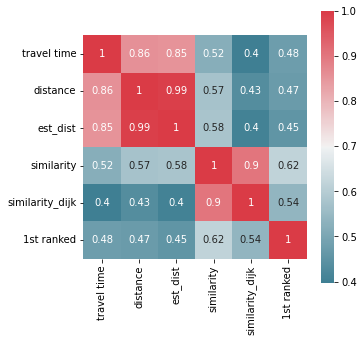

In [81]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(5,5))
corr = df22.corr()
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [82]:
x = np.array(df22[['est_dist','1st ranked']])
y = np.array(df22['travel time'])
x

array([[2.67901888e-01, 7.61259305e+02],
       [2.56891065e-01, 7.61259305e+02],
       [2.67941659e-01, 7.61259305e+02],
       ...,
       [5.99978290e-01, 7.61259305e+02],
       [5.98861824e-01, 7.61259305e+02],
       [6.11777555e-01, 7.61259305e+02]])

In [83]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [84]:
print(X_train.shape)
print(X_test.shape)
# X_train

(12759, 2)
(3190, 2)


In [85]:
# inputs: distance + hour + dominant road
model3_3_1 = nnmodel(50, num_hlayers=1,Epoch=500)
model3_3_1

Epoch 1/500
399/399 [==============================] - 0s 874us/step - loss: 298077.0938 - mape: 53.4659 - rmse: 545.9644 - val_loss: 214786.2031 - val_mape: 55.2226 - val_rmse: 463.4503
Epoch 2/500
399/399 [==============================] - 0s 737us/step - loss: 206387.6406 - mape: 55.0518 - rmse: 454.2991 - val_loss: 214630.0938 - val_mape: 54.5471 - val_rmse: 463.2819
Epoch 3/500
399/399 [==============================] - 0s 708us/step - loss: 206209.3906 - mape: 55.0069 - rmse: 454.1028 - val_loss: 215130.4219 - val_mape: 52.7759 - val_rmse: 463.8215
Epoch 4/500
399/399 [==============================] - 0s 716us/step - loss: 205971.0938 - mape: 54.7524 - rmse: 453.8404 - val_loss: 214284.5469 - val_mape: 56.4559 - val_rmse: 462.9088
Epoch 5/500
399/399 [==============================] - 0s 692us/step - loss: 205938.9062 - mape: 54.9633 - rmse: 453.8049 - val_loss: 213810.7031 - val_mape: 54.8068 - val_rmse: 462.3967
Epoch 6/500
399/399 [==============================] - 0s 720us/s

Epoch 45/500
399/399 [==============================] - 0s 724us/step - loss: 162449.8125 - mape: 47.8818 - rmse: 403.0506 - val_loss: 166824.2812 - val_mape: 49.3191 - val_rmse: 408.4413
Epoch 46/500
399/399 [==============================] - 0s 748us/step - loss: 160318.9688 - mape: 47.4925 - rmse: 400.3985 - val_loss: 164907.7031 - val_mape: 44.4892 - val_rmse: 406.0883
Epoch 47/500
399/399 [==============================] - 0s 720us/step - loss: 157645.6250 - mape: 46.9624 - rmse: 397.0461 - val_loss: 164371.1719 - val_mape: 42.1239 - val_rmse: 405.4272
Epoch 48/500
399/399 [==============================] - 0s 730us/step - loss: 155361.1719 - mape: 46.6001 - rmse: 394.1588 - val_loss: 158615.5156 - val_mape: 46.2841 - val_rmse: 398.2656
Epoch 49/500
399/399 [==============================] - 0s 710us/step - loss: 152712.1562 - mape: 46.0075 - rmse: 390.7840 - val_loss: 156316.8281 - val_mape: 44.0065 - val_rmse: 395.3692
Epoch 50/500
399/399 [==============================] - 0s 7

Epoch 89/500
399/399 [==============================] - 0s 706us/step - loss: 74179.2109 - mape: 25.6119 - rmse: 272.3586 - val_loss: 76020.6328 - val_mape: 22.1454 - val_rmse: 275.7184
Epoch 90/500
399/399 [==============================] - 0s 718us/step - loss: 73275.1875 - mape: 25.2689 - rmse: 270.6939 - val_loss: 74781.0781 - val_mape: 23.3200 - val_rmse: 273.4613
Epoch 91/500
399/399 [==============================] - 0s 771us/step - loss: 73249.9297 - mape: 25.2122 - rmse: 270.6472 - val_loss: 75038.5938 - val_mape: 26.2811 - val_rmse: 273.9317
Epoch 92/500
399/399 [==============================] - 0s 717us/step - loss: 72653.1953 - mape: 24.9667 - rmse: 269.5426 - val_loss: 74667.3359 - val_mape: 22.3818 - val_rmse: 273.2532
Epoch 93/500
399/399 [==============================] - 0s 697us/step - loss: 72795.7031 - mape: 24.8848 - rmse: 269.8068 - val_loss: 74118.1406 - val_mape: 24.9121 - val_rmse: 272.2465
Epoch 94/500
399/399 [==============================] - 0s 730us/step 

Epoch 133/500
399/399 [==============================] - 0s 733us/step - loss: 71081.5781 - mape: 24.4440 - rmse: 266.6113 - val_loss: 72591.9766 - val_mape: 23.7632 - val_rmse: 269.4290
Epoch 134/500
399/399 [==============================] - 0s 718us/step - loss: 71514.7891 - mape: 24.6105 - rmse: 267.4225 - val_loss: 72611.4688 - val_mape: 24.0175 - val_rmse: 269.4651
Epoch 135/500
399/399 [==============================] - 0s 732us/step - loss: 70915.8125 - mape: 24.4342 - rmse: 266.3002 - val_loss: 73355.9219 - val_mape: 21.6933 - val_rmse: 270.8430
Epoch 136/500
399/399 [==============================] - 0s 692us/step - loss: 71100.3906 - mape: 24.4989 - rmse: 266.6466 - val_loss: 73388.5547 - val_mape: 21.6609 - val_rmse: 270.9032
Epoch 137/500
399/399 [==============================] - 0s 683us/step - loss: 71415.0000 - mape: 24.6229 - rmse: 267.2358 - val_loss: 72566.5078 - val_mape: 23.7907 - val_rmse: 269.3817
Epoch 138/500
399/399 [==============================] - 0s 705us

Epoch 177/500
399/399 [==============================] - 0s 707us/step - loss: 71185.0625 - mape: 24.7777 - rmse: 266.8053 - val_loss: 72804.7109 - val_mape: 22.5962 - val_rmse: 269.8235
Epoch 178/500
399/399 [==============================] - 0s 728us/step - loss: 70987.7344 - mape: 24.8058 - rmse: 266.4352 - val_loss: 78286.2812 - val_mape: 30.6607 - val_rmse: 279.7968
Epoch 179/500
399/399 [==============================] - 0s 708us/step - loss: 71057.3125 - mape: 24.9207 - rmse: 266.5658 - val_loss: 86084.3672 - val_mape: 34.9314 - val_rmse: 293.4014
Epoch 180/500
399/399 [==============================] - 0s 705us/step - loss: 71055.1250 - mape: 24.7552 - rmse: 266.5617 - val_loss: 72544.2422 - val_mape: 24.6092 - val_rmse: 269.3404
Epoch 181/500
399/399 [==============================] - 0s 661us/step - loss: 70510.6250 - mape: 24.7313 - rmse: 265.5384 - val_loss: 72753.4062 - val_mape: 25.2557 - val_rmse: 269.7284
Epoch 182/500
399/399 [==============================] - 0s 687us

Epoch 221/500
399/399 [==============================] - 0s 723us/step - loss: 71047.9531 - mape: 24.9890 - rmse: 266.5482 - val_loss: 77400.8438 - val_mape: 19.9589 - val_rmse: 278.2101
Epoch 222/500
399/399 [==============================] - 0s 721us/step - loss: 71254.2969 - mape: 24.9065 - rmse: 266.9350 - val_loss: 73991.0312 - val_mape: 27.2485 - val_rmse: 272.0129
Epoch 223/500
399/399 [==============================] - 0s 717us/step - loss: 70793.6875 - mape: 24.8573 - rmse: 266.0708 - val_loss: 72456.6562 - val_mape: 24.2158 - val_rmse: 269.1777
Epoch 224/500
399/399 [==============================] - 0s 686us/step - loss: 70722.2578 - mape: 24.8213 - rmse: 265.9366 - val_loss: 72523.4844 - val_mape: 24.6785 - val_rmse: 269.3018
Epoch 225/500
399/399 [==============================] - 0s 727us/step - loss: 70673.5938 - mape: 24.8185 - rmse: 265.8451 - val_loss: 72686.9375 - val_mape: 25.2179 - val_rmse: 269.6052
Epoch 226/500
399/399 [==============================] - 0s 727us

Epoch 265/500
399/399 [==============================] - 0s 709us/step - loss: 70785.5469 - mape: 24.9034 - rmse: 266.0555 - val_loss: 74888.1875 - val_mape: 28.1900 - val_rmse: 273.6571
Epoch 266/500
399/399 [==============================] - 0s 709us/step - loss: 70997.0781 - mape: 24.9299 - rmse: 266.4528 - val_loss: 72553.3125 - val_mape: 23.2799 - val_rmse: 269.3572
Epoch 267/500
399/399 [==============================] - 0s 719us/step - loss: 71143.7578 - mape: 24.8853 - rmse: 266.7279 - val_loss: 73692.0703 - val_mape: 26.9213 - val_rmse: 271.4628
Epoch 268/500
399/399 [==============================] - 0s 742us/step - loss: 70915.9609 - mape: 24.9451 - rmse: 266.3005 - val_loss: 72836.6328 - val_mape: 22.6331 - val_rmse: 269.8826
Epoch 269/500
399/399 [==============================] - 0s 712us/step - loss: 70948.6719 - mape: 24.9304 - rmse: 266.3619 - val_loss: 76812.9531 - val_mape: 29.7922 - val_rmse: 277.1515
Epoch 270/500
399/399 [==============================] - 0s 709us

Epoch 309/500
399/399 [==============================] - 0s 715us/step - loss: 70750.6328 - mape: 24.9641 - rmse: 265.9899 - val_loss: 72821.9297 - val_mape: 22.6633 - val_rmse: 269.8554
Epoch 310/500
399/399 [==============================] - 0s 757us/step - loss: 70864.6484 - mape: 24.9939 - rmse: 266.2042 - val_loss: 72622.4688 - val_mape: 25.0695 - val_rmse: 269.4856
Epoch 311/500
399/399 [==============================] - 0s 722us/step - loss: 70601.8359 - mape: 24.8144 - rmse: 265.7101 - val_loss: 73502.3438 - val_mape: 21.8399 - val_rmse: 271.1132
Epoch 312/500
399/399 [==============================] - 0s 691us/step - loss: 70593.4844 - mape: 24.7729 - rmse: 265.6943 - val_loss: 72948.2422 - val_mape: 25.8176 - val_rmse: 270.0893
Epoch 313/500
399/399 [==============================] - 0s 703us/step - loss: 71060.7656 - mape: 24.9991 - rmse: 266.5723 - val_loss: 73770.3047 - val_mape: 27.0253 - val_rmse: 271.6069
Epoch 314/500
399/399 [==============================] - 0s 702us

Epoch 353/500
399/399 [==============================] - 0s 718us/step - loss: 70688.8438 - mape: 24.8003 - rmse: 265.8737 - val_loss: 73965.9062 - val_mape: 27.2486 - val_rmse: 271.9667
Epoch 354/500
399/399 [==============================] - 0s 687us/step - loss: 70780.6328 - mape: 24.9348 - rmse: 266.0463 - val_loss: 73064.2578 - val_mape: 22.3082 - val_rmse: 270.3040
Epoch 355/500
399/399 [==============================] - 0s 744us/step - loss: 70422.8203 - mape: 24.8847 - rmse: 265.3730 - val_loss: 72450.1719 - val_mape: 23.9931 - val_rmse: 269.1657
Epoch 356/500
399/399 [==============================] - 0s 708us/step - loss: 70931.5938 - mape: 24.8935 - rmse: 266.3299 - val_loss: 72452.1406 - val_mape: 24.1889 - val_rmse: 269.1693
Epoch 357/500
399/399 [==============================] - 0s 700us/step - loss: 70911.5078 - mape: 24.8310 - rmse: 266.2921 - val_loss: 78702.4688 - val_mape: 19.6798 - val_rmse: 280.5396
Epoch 358/500
399/399 [==============================] - 0s 704us

Epoch 397/500
399/399 [==============================] - 0s 713us/step - loss: 70592.3438 - mape: 24.8379 - rmse: 265.6922 - val_loss: 72451.7422 - val_mape: 24.2335 - val_rmse: 269.1686
Epoch 398/500
399/399 [==============================] - 0s 747us/step - loss: 70933.1250 - mape: 24.9448 - rmse: 266.3327 - val_loss: 72565.9531 - val_mape: 24.8994 - val_rmse: 269.3807
Epoch 399/500
399/399 [==============================] - 0s 712us/step - loss: 71069.7266 - mape: 25.0017 - rmse: 266.5891 - val_loss: 72617.4766 - val_mape: 23.0929 - val_rmse: 269.4763
Epoch 400/500
399/399 [==============================] - 0s 685us/step - loss: 70683.5156 - mape: 24.8317 - rmse: 265.8637 - val_loss: 72447.8516 - val_mape: 24.1547 - val_rmse: 269.1614
Epoch 401/500
399/399 [==============================] - 0s 720us/step - loss: 70943.9141 - mape: 24.9781 - rmse: 266.3530 - val_loss: 72814.0859 - val_mape: 22.6795 - val_rmse: 269.8409
Epoch 402/500
399/399 [==============================] - 0s 743us

Epoch 441/500
399/399 [==============================] - 0s 719us/step - loss: 70587.7656 - mape: 24.9327 - rmse: 265.6836 - val_loss: 72562.4219 - val_mape: 24.8728 - val_rmse: 269.3741
Epoch 442/500
399/399 [==============================] - 0s 709us/step - loss: 70663.3047 - mape: 24.8701 - rmse: 265.8257 - val_loss: 73829.5859 - val_mape: 21.5654 - val_rmse: 271.7160
Epoch 443/500
399/399 [==============================] - 0s 734us/step - loss: 70655.5156 - mape: 24.8490 - rmse: 265.8111 - val_loss: 72575.2422 - val_mape: 24.9063 - val_rmse: 269.3979
Epoch 444/500
399/399 [==============================] - 0s 723us/step - loss: 70907.0859 - mape: 24.9409 - rmse: 266.2838 - val_loss: 72459.7500 - val_mape: 24.2985 - val_rmse: 269.1835
Epoch 445/500
399/399 [==============================] - 0s 737us/step - loss: 70637.2188 - mape: 24.8418 - rmse: 265.7766 - val_loss: 73162.2656 - val_mape: 26.1877 - val_rmse: 270.4852
Epoch 446/500
399/399 [==============================] - 0s 705us

Epoch 485/500
399/399 [==============================] - 0s 728us/step - loss: 70936.4219 - mape: 24.9686 - rmse: 266.3389 - val_loss: 72563.3359 - val_mape: 24.8910 - val_rmse: 269.3758
Epoch 486/500
399/399 [==============================] - 0s 700us/step - loss: 70851.3594 - mape: 24.9092 - rmse: 266.1792 - val_loss: 72523.9844 - val_mape: 24.7321 - val_rmse: 269.3028
Epoch 487/500
399/399 [==============================] - 0s 716us/step - loss: 70694.6562 - mape: 24.8654 - rmse: 265.8847 - val_loss: 73696.7500 - val_mape: 26.9406 - val_rmse: 271.4715
Epoch 488/500
399/399 [==============================] - 0s 731us/step - loss: 70676.3750 - mape: 24.8742 - rmse: 265.8503 - val_loss: 73713.1641 - val_mape: 26.9569 - val_rmse: 271.5017
Epoch 489/500
399/399 [==============================] - 0s 726us/step - loss: 71008.8047 - mape: 24.9450 - rmse: 266.4748 - val_loss: 72454.2109 - val_mape: 23.8096 - val_rmse: 269.1732
Epoch 490/500
399/399 [==============================] - 0s 713us

In [86]:
# inputs: distance + hour + dominant road
model3_3_2 = nnmodel(100, num_hlayers=1,Epoch=500)
model3_3_2

Epoch 1/500
399/399 [==============================] - 1s 849us/step - loss: 235698.0312 - mape: 53.6509 - rmse: 485.4874 - val_loss: 215605.6250 - val_mape: 52.6133 - val_rmse: 464.3335
Epoch 2/500
399/399 [==============================] - 0s 785us/step - loss: 206292.4375 - mape: 54.9551 - rmse: 454.1943 - val_loss: 215424.9062 - val_mape: 52.3227 - val_rmse: 464.1389
Epoch 3/500
399/399 [==============================] - 0s 762us/step - loss: 206006.9844 - mape: 54.8852 - rmse: 453.8799 - val_loss: 213901.4844 - val_mape: 55.0199 - val_rmse: 462.4948
Epoch 4/500
399/399 [==============================] - 0s 698us/step - loss: 205763.4688 - mape: 54.8477 - rmse: 453.6116 - val_loss: 213484.2656 - val_mape: 54.8955 - val_rmse: 462.0436
Epoch 5/500
399/399 [==============================] - 0s 716us/step - loss: 205307.5312 - mape: 54.8473 - rmse: 453.1087 - val_loss: 213035.8438 - val_mape: 54.7063 - val_rmse: 461.5581
Epoch 6/500
399/399 [==============================] - 0s 687us/s

Epoch 45/500
399/399 [==============================] - 0s 710us/step - loss: 88995.3203 - mape: 31.4572 - rmse: 298.3208 - val_loss: 88780.8828 - val_mape: 29.4566 - val_rmse: 297.9612
Epoch 46/500
399/399 [==============================] - 0s 706us/step - loss: 86724.1094 - mape: 30.8212 - rmse: 294.4896 - val_loss: 86457.0781 - val_mape: 28.9263 - val_rmse: 294.0359
Epoch 47/500
399/399 [==============================] - 0s 733us/step - loss: 84386.5469 - mape: 30.0275 - rmse: 290.4936 - val_loss: 84658.1797 - val_mape: 30.2400 - val_rmse: 290.9608
Epoch 48/500
399/399 [==============================] - 0s 682us/step - loss: 82497.8047 - mape: 29.3221 - rmse: 287.2243 - val_loss: 84108.2656 - val_mape: 25.1179 - val_rmse: 290.0143
Epoch 49/500
399/399 [==============================] - 0s 696us/step - loss: 80783.7891 - mape: 28.7939 - rmse: 284.2249 - val_loss: 81269.8906 - val_mape: 25.9818 - val_rmse: 285.0787
Epoch 50/500
399/399 [==============================] - 0s 717us/step 

399/399 [==============================] - 0s 705us/step - loss: 71130.8984 - mape: 24.5782 - rmse: 266.7038 - val_loss: 72629.3203 - val_mape: 24.3330 - val_rmse: 269.4983
Epoch 90/500
399/399 [==============================] - 0s 729us/step - loss: 71351.4062 - mape: 24.5583 - rmse: 267.1169 - val_loss: 73343.0000 - val_mape: 21.7376 - val_rmse: 270.8191
Epoch 91/500
399/399 [==============================] - 0s 686us/step - loss: 71829.4766 - mape: 24.6352 - rmse: 268.0102 - val_loss: 72562.0781 - val_mape: 24.0703 - val_rmse: 269.3735
Epoch 92/500
399/399 [==============================] - 0s 745us/step - loss: 71528.8281 - mape: 24.7547 - rmse: 267.4487 - val_loss: 72709.3047 - val_mape: 22.7311 - val_rmse: 269.6466
Epoch 93/500
399/399 [==============================] - 0s 686us/step - loss: 71493.6797 - mape: 24.7380 - rmse: 267.3830 - val_loss: 82604.8516 - val_mape: 18.9618 - val_rmse: 287.4106
Epoch 94/500
399/399 [==============================] - 0s 700us/step - loss: 71263

Epoch 133/500
399/399 [==============================] - 0s 717us/step - loss: 70986.8125 - mape: 24.8705 - rmse: 266.4335 - val_loss: 72503.5469 - val_mape: 24.5329 - val_rmse: 269.2648
Epoch 134/500
399/399 [==============================] - 0s 712us/step - loss: 71875.9062 - mape: 25.0954 - rmse: 268.0968 - val_loss: 73421.0234 - val_mape: 21.8616 - val_rmse: 270.9631
Epoch 135/500
399/399 [==============================] - 0s 728us/step - loss: 71791.9609 - mape: 24.9773 - rmse: 267.9402 - val_loss: 75531.4219 - val_mape: 28.7360 - val_rmse: 274.8298
Epoch 136/500
399/399 [==============================] - 0s 699us/step - loss: 71893.3672 - mape: 25.1164 - rmse: 268.1294 - val_loss: 72553.0391 - val_mape: 24.7911 - val_rmse: 269.3567
Epoch 137/500
399/399 [==============================] - 0s 697us/step - loss: 71047.9844 - mape: 24.8771 - rmse: 266.5483 - val_loss: 72447.5703 - val_mape: 24.0173 - val_rmse: 269.1609
Epoch 138/500
399/399 [==============================] - 0s 706us

Epoch 177/500
399/399 [==============================] - 0s 677us/step - loss: 71308.5312 - mape: 25.0545 - rmse: 267.0366 - val_loss: 75897.1406 - val_mape: 20.4680 - val_rmse: 275.4944
Epoch 178/500
399/399 [==============================] - 0s 720us/step - loss: 71543.6641 - mape: 25.0747 - rmse: 267.4765 - val_loss: 72465.9375 - val_mape: 24.4263 - val_rmse: 269.1950
Epoch 179/500
399/399 [==============================] - 0s 714us/step - loss: 71637.2812 - mape: 25.1346 - rmse: 267.6514 - val_loss: 72625.3906 - val_mape: 23.0569 - val_rmse: 269.4910
Epoch 180/500
399/399 [==============================] - 0s 720us/step - loss: 70729.0156 - mape: 24.8782 - rmse: 265.9493 - val_loss: 80378.5938 - val_mape: 19.3877 - val_rmse: 283.5112
Epoch 181/500
399/399 [==============================] - 0s 713us/step - loss: 71054.3828 - mape: 25.0144 - rmse: 266.5603 - val_loss: 77467.4922 - val_mape: 19.9600 - val_rmse: 278.3298
Epoch 182/500
399/399 [==============================] - 0s 715us

Epoch 221/500
399/399 [==============================] - 0s 705us/step - loss: 71001.7109 - mape: 24.9634 - rmse: 266.4615 - val_loss: 76038.0312 - val_mape: 20.4177 - val_rmse: 275.7499
Epoch 222/500
399/399 [==============================] - 0s 717us/step - loss: 71207.2109 - mape: 25.0449 - rmse: 266.8468 - val_loss: 75401.6953 - val_mape: 20.6736 - val_rmse: 274.5937
Epoch 223/500
399/399 [==============================] - 0s 729us/step - loss: 70876.8594 - mape: 24.9087 - rmse: 266.2271 - val_loss: 77964.4062 - val_mape: 30.6166 - val_rmse: 279.2211
Epoch 224/500
399/399 [==============================] - 0s 726us/step - loss: 70948.9844 - mape: 24.8642 - rmse: 266.3625 - val_loss: 72874.1094 - val_mape: 25.6847 - val_rmse: 269.9521
Epoch 225/500
399/399 [==============================] - 0s 720us/step - loss: 71462.9531 - mape: 25.1057 - rmse: 267.3256 - val_loss: 72568.6484 - val_mape: 23.2209 - val_rmse: 269.3857
Epoch 226/500
399/399 [==============================] - 0s 719us

Epoch 265/500
399/399 [==============================] - 0s 668us/step - loss: 70884.1953 - mape: 24.9612 - rmse: 266.2408 - val_loss: 72685.9531 - val_mape: 25.2867 - val_rmse: 269.6033
Epoch 266/500
399/399 [==============================] - 0s 713us/step - loss: 70835.8125 - mape: 24.7810 - rmse: 266.1500 - val_loss: 73779.3516 - val_mape: 21.6045 - val_rmse: 271.6235
Epoch 267/500
399/399 [==============================] - 0s 718us/step - loss: 71470.0156 - mape: 25.0401 - rmse: 267.3388 - val_loss: 73303.2266 - val_mape: 22.0281 - val_rmse: 270.7457
Epoch 268/500
399/399 [==============================] - 0s 701us/step - loss: 71120.4844 - mape: 24.9839 - rmse: 266.6842 - val_loss: 82084.4922 - val_mape: 33.1011 - val_rmse: 286.5039
Epoch 269/500
399/399 [==============================] - 0s 714us/step - loss: 70817.8203 - mape: 24.9718 - rmse: 266.1162 - val_loss: 72988.6719 - val_mape: 25.9062 - val_rmse: 270.1642
Epoch 270/500
399/399 [==============================] - 0s 718us

Epoch 309/500
399/399 [==============================] - 0s 696us/step - loss: 71539.5625 - mape: 25.1075 - rmse: 267.4688 - val_loss: 73092.7969 - val_mape: 22.2762 - val_rmse: 270.3568
Epoch 310/500
399/399 [==============================] - 0s 725us/step - loss: 71160.4922 - mape: 24.9715 - rmse: 266.7592 - val_loss: 73907.7969 - val_mape: 21.5160 - val_rmse: 271.8599
Epoch 311/500
399/399 [==============================] - 0s 700us/step - loss: 71239.8281 - mape: 25.0870 - rmse: 266.9079 - val_loss: 72439.8281 - val_mape: 23.9172 - val_rmse: 269.1465
Epoch 312/500
399/399 [==============================] - 0s 674us/step - loss: 70935.2812 - mape: 24.9594 - rmse: 266.3368 - val_loss: 73832.7500 - val_mape: 21.5667 - val_rmse: 271.7218
Epoch 313/500
399/399 [==============================] - 0s 702us/step - loss: 71196.4688 - mape: 24.9520 - rmse: 266.8267 - val_loss: 72482.4844 - val_mape: 24.5760 - val_rmse: 269.2257
Epoch 314/500
399/399 [==============================] - 0s 671us

Epoch 353/500
399/399 [==============================] - 0s 757us/step - loss: 71058.5625 - mape: 24.8941 - rmse: 266.5681 - val_loss: 77697.2500 - val_mape: 19.9078 - val_rmse: 278.7423
Epoch 354/500
399/399 [==============================] - 0s 689us/step - loss: 70975.4297 - mape: 24.8075 - rmse: 266.4121 - val_loss: 74094.3828 - val_mape: 27.4296 - val_rmse: 272.2028
Epoch 355/500
399/399 [==============================] - 0s 754us/step - loss: 70725.8125 - mape: 24.9039 - rmse: 265.9432 - val_loss: 73514.4453 - val_mape: 26.7185 - val_rmse: 271.1355
Epoch 356/500
399/399 [==============================] - 0s 745us/step - loss: 71276.3906 - mape: 25.0264 - rmse: 266.9764 - val_loss: 72682.4297 - val_mape: 25.2681 - val_rmse: 269.5968
Epoch 357/500
399/399 [==============================] - 0s 697us/step - loss: 71525.7812 - mape: 25.0902 - rmse: 267.4431 - val_loss: 78721.0625 - val_mape: 19.6738 - val_rmse: 280.5728
Epoch 358/500
399/399 [==============================] - 0s 716us

Epoch 397/500
399/399 [==============================] - 0s 695us/step - loss: 70779.6953 - mape: 24.9568 - rmse: 266.0445 - val_loss: 72622.7812 - val_mape: 25.1086 - val_rmse: 269.4861
Epoch 398/500
399/399 [==============================] - 0s 685us/step - loss: 71162.4609 - mape: 25.0252 - rmse: 266.7629 - val_loss: 75217.5391 - val_mape: 20.7584 - val_rmse: 274.2581
Epoch 399/500
399/399 [==============================] - 0s 746us/step - loss: 71605.0000 - mape: 25.1097 - rmse: 267.5911 - val_loss: 75262.2031 - val_mape: 28.5944 - val_rmse: 274.3396
Epoch 400/500
399/399 [==============================] - 0s 711us/step - loss: 70941.4531 - mape: 25.0083 - rmse: 266.3484 - val_loss: 78233.9844 - val_mape: 30.8331 - val_rmse: 279.7034
Epoch 401/500
399/399 [==============================] - 0s 714us/step - loss: 71271.9297 - mape: 25.0261 - rmse: 266.9680 - val_loss: 74143.9375 - val_mape: 21.3485 - val_rmse: 272.2939
Epoch 402/500
399/399 [==============================] - 0s 712us

Epoch 441/500
399/399 [==============================] - 0s 710us/step - loss: 71172.6797 - mape: 24.9917 - rmse: 266.7821 - val_loss: 72466.2031 - val_mape: 24.5008 - val_rmse: 269.1955
Epoch 442/500
399/399 [==============================] - 0s 736us/step - loss: 71796.2500 - mape: 25.2422 - rmse: 267.9482 - val_loss: 73557.9453 - val_mape: 26.8160 - val_rmse: 271.2157
Epoch 443/500
399/399 [==============================] - 0s 717us/step - loss: 71025.4453 - mape: 24.8936 - rmse: 266.5060 - val_loss: 74253.7500 - val_mape: 21.2827 - val_rmse: 272.4954
Epoch 444/500
399/399 [==============================] - 0s 717us/step - loss: 71314.2812 - mape: 25.0540 - rmse: 267.0473 - val_loss: 73784.3984 - val_mape: 27.0947 - val_rmse: 271.6328
Epoch 445/500
399/399 [==============================] - 0s 700us/step - loss: 70878.2344 - mape: 24.9705 - rmse: 266.2297 - val_loss: 72443.6953 - val_mape: 24.3366 - val_rmse: 269.1537
Epoch 446/500
399/399 [==============================] - 0s 687us

Epoch 485/500
399/399 [==============================] - 0s 685us/step - loss: 70894.6094 - mape: 24.9421 - rmse: 266.2604 - val_loss: 72829.9062 - val_mape: 22.6298 - val_rmse: 269.8702
Epoch 486/500
399/399 [==============================] - 0s 691us/step - loss: 71642.2891 - mape: 25.0564 - rmse: 267.6608 - val_loss: 72440.4688 - val_mape: 24.2190 - val_rmse: 269.1477
Epoch 487/500
399/399 [==============================] - 0s 703us/step - loss: 71298.2266 - mape: 25.0122 - rmse: 267.0173 - val_loss: 72443.4453 - val_mape: 23.8285 - val_rmse: 269.1532
Epoch 488/500
399/399 [==============================] - 0s 753us/step - loss: 71096.0312 - mape: 25.0488 - rmse: 266.6384 - val_loss: 72574.9062 - val_mape: 24.9646 - val_rmse: 269.3973
Epoch 489/500
399/399 [==============================] - 0s 687us/step - loss: 71285.6875 - mape: 24.9435 - rmse: 266.9938 - val_loss: 72635.0781 - val_mape: 23.0245 - val_rmse: 269.5090
Epoch 490/500
399/399 [==============================] - 0s 724us

In [87]:
# inputs: distance + hour + dominant road
model3_3_3 = nnmodel(300, num_hlayers=1,Epoch=500)
model3_3_3

Epoch 1/500
399/399 [==============================] - 1s 971us/step - loss: 244090.9375 - mape: 55.0767 - rmse: 494.0556 - val_loss: 214520.4531 - val_mape: 56.1426 - val_rmse: 463.1635
Epoch 2/500
399/399 [==============================] - 0s 806us/step - loss: 206110.7344 - mape: 55.0571 - rmse: 453.9942 - val_loss: 214447.2031 - val_mape: 52.8677 - val_rmse: 463.0844
Epoch 3/500
399/399 [==============================] - 0s 776us/step - loss: 205637.9844 - mape: 54.7713 - rmse: 453.4732 - val_loss: 213481.8906 - val_mape: 56.8995 - val_rmse: 462.0410
Epoch 4/500
399/399 [==============================] - 0s 798us/step - loss: 204952.7656 - mape: 54.7222 - rmse: 452.7171 - val_loss: 212298.7812 - val_mape: 55.7183 - val_rmse: 460.7589
Epoch 5/500
399/399 [==============================] - 0s 785us/step - loss: 204023.8906 - mape: 54.4673 - rmse: 451.6900 - val_loss: 211883.5781 - val_mape: 57.0332 - val_rmse: 460.3081
Epoch 6/500
399/399 [==============================] - 0s 778us/s

Epoch 45/500
399/399 [==============================] - 0s 778us/step - loss: 72187.5234 - mape: 24.6723 - rmse: 268.6774 - val_loss: 82664.4297 - val_mape: 18.8251 - val_rmse: 287.5142
Epoch 46/500
399/399 [==============================] - 0s 809us/step - loss: 73444.1875 - mape: 24.9255 - rmse: 271.0059 - val_loss: 73384.1719 - val_mape: 21.6772 - val_rmse: 270.8951
Epoch 47/500
399/399 [==============================] - 0s 784us/step - loss: 73894.1641 - mape: 25.0794 - rmse: 271.8348 - val_loss: 80062.3984 - val_mape: 19.1199 - val_rmse: 282.9530
Epoch 48/500
399/399 [==============================] - 0s 808us/step - loss: 72819.6875 - mape: 24.8558 - rmse: 269.8512 - val_loss: 75233.2969 - val_mape: 27.8990 - val_rmse: 274.2869
Epoch 49/500
399/399 [==============================] - 0s 757us/step - loss: 72086.7500 - mape: 24.6489 - rmse: 268.4897 - val_loss: 73068.6250 - val_mape: 25.3467 - val_rmse: 270.3121
Epoch 50/500
399/399 [==============================] - 0s 765us/step 

399/399 [==============================] - 0s 778us/step - loss: 72192.7344 - mape: 25.1705 - rmse: 268.6870 - val_loss: 74114.4062 - val_mape: 21.3647 - val_rmse: 272.2396
Epoch 90/500
399/399 [==============================] - 0s 782us/step - loss: 72410.5781 - mape: 25.2119 - rmse: 269.0921 - val_loss: 72641.9219 - val_mape: 25.2249 - val_rmse: 269.5217
Epoch 91/500
399/399 [==============================] - 0s 769us/step - loss: 72165.7891 - mape: 25.3094 - rmse: 268.6369 - val_loss: 73794.9453 - val_mape: 21.5881 - val_rmse: 271.6523
Epoch 92/500
399/399 [==============================] - 0s 797us/step - loss: 72142.1641 - mape: 25.0878 - rmse: 268.5929 - val_loss: 72707.9688 - val_mape: 25.4264 - val_rmse: 269.6442
Epoch 93/500
399/399 [==============================] - 0s 778us/step - loss: 71725.1250 - mape: 25.1691 - rmse: 267.8155 - val_loss: 74579.5078 - val_mape: 21.0868 - val_rmse: 273.0925
Epoch 94/500
399/399 [==============================] - 0s 757us/step - loss: 72431

Epoch 133/500
399/399 [==============================] - 0s 807us/step - loss: 72122.5703 - mape: 25.3619 - rmse: 268.5565 - val_loss: 72600.8125 - val_mape: 23.1078 - val_rmse: 269.4454
Epoch 134/500
399/399 [==============================] - 0s 788us/step - loss: 72436.3516 - mape: 25.4036 - rmse: 269.1400 - val_loss: 73145.3516 - val_mape: 26.2704 - val_rmse: 270.4540
Epoch 135/500
399/399 [==============================] - 0s 780us/step - loss: 71898.2891 - mape: 25.2030 - rmse: 268.1385 - val_loss: 73101.0781 - val_mape: 26.2048 - val_rmse: 270.3721
Epoch 136/500
399/399 [==============================] - 0s 778us/step - loss: 71311.6016 - mape: 24.9956 - rmse: 267.0423 - val_loss: 74033.2422 - val_mape: 27.3868 - val_rmse: 272.0905
Epoch 137/500
399/399 [==============================] - 0s 802us/step - loss: 71873.8672 - mape: 25.1768 - rmse: 268.0930 - val_loss: 77176.1172 - val_mape: 20.0472 - val_rmse: 277.8059
Epoch 138/500
399/399 [==============================] - 0s 792us

Epoch 177/500
399/399 [==============================] - 0s 772us/step - loss: 71228.9219 - mape: 25.0692 - rmse: 266.8875 - val_loss: 72799.5469 - val_mape: 25.6171 - val_rmse: 269.8139
Epoch 178/500
399/399 [==============================] - 0s 775us/step - loss: 72187.2266 - mape: 25.1007 - rmse: 268.6768 - val_loss: 78379.3828 - val_mape: 31.0057 - val_rmse: 279.9632
Epoch 179/500
399/399 [==============================] - 0s 777us/step - loss: 70917.4062 - mape: 24.9893 - rmse: 266.3032 - val_loss: 72684.9922 - val_mape: 25.3749 - val_rmse: 269.6015
Epoch 180/500
399/399 [==============================] - 0s 786us/step - loss: 72543.0469 - mape: 25.3370 - rmse: 269.3382 - val_loss: 74360.0781 - val_mape: 27.7847 - val_rmse: 272.6904
Epoch 181/500
399/399 [==============================] - 0s 757us/step - loss: 72194.5156 - mape: 25.2699 - rmse: 268.6904 - val_loss: 72783.2812 - val_mape: 25.6396 - val_rmse: 269.7838
Epoch 182/500
399/399 [==============================] - 0s 757us

Epoch 221/500
399/399 [==============================] - 0s 783us/step - loss: 71701.9766 - mape: 25.2093 - rmse: 267.7722 - val_loss: 74560.9141 - val_mape: 27.9748 - val_rmse: 273.0584
Epoch 222/500
399/399 [==============================] - 0s 780us/step - loss: 72507.5781 - mape: 25.3847 - rmse: 269.2723 - val_loss: 78115.6797 - val_mape: 19.8379 - val_rmse: 279.4918
Epoch 223/500
399/399 [==============================] - 0s 760us/step - loss: 71986.4688 - mape: 25.2801 - rmse: 268.3029 - val_loss: 72739.6328 - val_mape: 22.8088 - val_rmse: 269.7029
Epoch 224/500
399/399 [==============================] - 0s 777us/step - loss: 71657.9531 - mape: 25.0906 - rmse: 267.6900 - val_loss: 75014.4375 - val_mape: 20.8810 - val_rmse: 273.8876
Epoch 225/500
399/399 [==============================] - 0s 801us/step - loss: 72784.7188 - mape: 25.3276 - rmse: 269.7864 - val_loss: 72502.4688 - val_mape: 24.8953 - val_rmse: 269.2628
Epoch 226/500
399/399 [==============================] - 0s 800us

Epoch 265/500
399/399 [==============================] - 0s 780us/step - loss: 71874.0078 - mape: 25.1538 - rmse: 268.0933 - val_loss: 73051.1172 - val_mape: 22.3122 - val_rmse: 270.2797
Epoch 266/500
399/399 [==============================] - 0s 791us/step - loss: 72064.1094 - mape: 25.2086 - rmse: 268.4476 - val_loss: 80484.9844 - val_mape: 32.3300 - val_rmse: 283.6988
Epoch 267/500
399/399 [==============================] - 0s 794us/step - loss: 71814.1172 - mape: 25.2907 - rmse: 267.9816 - val_loss: 73017.9297 - val_mape: 22.3752 - val_rmse: 270.2183
Epoch 268/500
399/399 [==============================] - 0s 788us/step - loss: 71686.7188 - mape: 25.1716 - rmse: 267.7437 - val_loss: 81750.6094 - val_mape: 33.0153 - val_rmse: 285.9206
Epoch 269/500
399/399 [==============================] - 0s 762us/step - loss: 71776.4219 - mape: 25.1427 - rmse: 267.9112 - val_loss: 72506.7812 - val_mape: 23.4051 - val_rmse: 269.2708
Epoch 270/500
399/399 [==============================] - 0s 775us

Epoch 309/500
399/399 [==============================] - 0s 806us/step - loss: 71685.2422 - mape: 25.1808 - rmse: 267.7410 - val_loss: 76022.1953 - val_mape: 29.2617 - val_rmse: 275.7212
Epoch 310/500
399/399 [==============================] - 0s 772us/step - loss: 72015.9844 - mape: 25.3327 - rmse: 268.3579 - val_loss: 73992.0469 - val_mape: 21.4547 - val_rmse: 272.0148
Epoch 311/500
399/399 [==============================] - 0s 785us/step - loss: 71709.0859 - mape: 25.0461 - rmse: 267.7855 - val_loss: 82518.7500 - val_mape: 19.1651 - val_rmse: 287.2608
Epoch 312/500
399/399 [==============================] - 0s 769us/step - loss: 72345.4609 - mape: 25.3289 - rmse: 268.9711 - val_loss: 72533.9766 - val_mape: 23.2985 - val_rmse: 269.3213
Epoch 313/500
399/399 [==============================] - 0s 788us/step - loss: 71556.3281 - mape: 25.0900 - rmse: 267.5002 - val_loss: 72949.5625 - val_mape: 25.9322 - val_rmse: 270.0918
Epoch 314/500
399/399 [==============================] - 0s 796us

Epoch 353/500
399/399 [==============================] - 0s 772us/step - loss: 71944.1641 - mape: 25.2177 - rmse: 268.2241 - val_loss: 72425.1562 - val_mape: 24.2574 - val_rmse: 269.1192
Epoch 354/500
399/399 [==============================] - 0s 784us/step - loss: 71766.4531 - mape: 25.1693 - rmse: 267.8926 - val_loss: 72936.7188 - val_mape: 25.9234 - val_rmse: 270.0680
Epoch 355/500
399/399 [==============================] - 0s 763us/step - loss: 71211.2969 - mape: 24.9859 - rmse: 266.8545 - val_loss: 85936.2188 - val_mape: 35.0822 - val_rmse: 293.1488
Epoch 356/500
399/399 [==============================] - 0s 772us/step - loss: 71691.4844 - mape: 25.1696 - rmse: 267.7527 - val_loss: 73721.6641 - val_mape: 27.0192 - val_rmse: 271.5173
Epoch 357/500
399/399 [==============================] - 0s 794us/step - loss: 72977.5625 - mape: 25.3922 - rmse: 270.1436 - val_loss: 72460.4766 - val_mape: 24.6410 - val_rmse: 269.1848
Epoch 358/500
399/399 [==============================] - 0s 841us

Epoch 397/500
399/399 [==============================] - 0s 795us/step - loss: 71700.9844 - mape: 25.1171 - rmse: 267.7704 - val_loss: 73010.8359 - val_mape: 22.3413 - val_rmse: 270.2052
Epoch 398/500
399/399 [==============================] - 0s 780us/step - loss: 71305.6641 - mape: 25.0525 - rmse: 267.0312 - val_loss: 76068.8984 - val_mape: 29.3607 - val_rmse: 275.8059
Epoch 399/500
399/399 [==============================] - 0s 764us/step - loss: 71936.1953 - mape: 25.2480 - rmse: 268.2092 - val_loss: 83724.1484 - val_mape: 19.1025 - val_rmse: 289.3513
Epoch 400/500
399/399 [==============================] - 0s 755us/step - loss: 71608.3594 - mape: 25.2682 - rmse: 267.5974 - val_loss: 75785.4609 - val_mape: 29.1219 - val_rmse: 275.2916
Epoch 401/500
399/399 [==============================] - 0s 769us/step - loss: 72220.4609 - mape: 25.2223 - rmse: 268.7386 - val_loss: 72384.4141 - val_mape: 24.0331 - val_rmse: 269.0435
Epoch 402/500
399/399 [==============================] - 0s 810us

Epoch 441/500
399/399 [==============================] - 0s 782us/step - loss: 71691.4219 - mape: 25.0649 - rmse: 267.7525 - val_loss: 73174.7891 - val_mape: 26.3423 - val_rmse: 270.5084
Epoch 442/500
399/399 [==============================] - 0s 754us/step - loss: 71748.5000 - mape: 25.2044 - rmse: 267.8591 - val_loss: 72600.5078 - val_mape: 23.0963 - val_rmse: 269.4448
Epoch 443/500
399/399 [==============================] - 0s 767us/step - loss: 71473.8516 - mape: 25.0824 - rmse: 267.3459 - val_loss: 72433.2266 - val_mape: 24.0367 - val_rmse: 269.1342
Epoch 444/500
399/399 [==============================] - 0s 802us/step - loss: 71338.5625 - mape: 25.0949 - rmse: 267.0928 - val_loss: 73353.1797 - val_mape: 21.9538 - val_rmse: 270.8379
Epoch 445/500
399/399 [==============================] - 0s 760us/step - loss: 71713.9609 - mape: 25.1453 - rmse: 267.7946 - val_loss: 72494.9922 - val_mape: 24.7812 - val_rmse: 269.2489
Epoch 446/500
399/399 [==============================] - 0s 785us

Epoch 485/500
399/399 [==============================] - 0s 758us/step - loss: 71698.4062 - mape: 25.1732 - rmse: 267.7656 - val_loss: 72888.5156 - val_mape: 22.4231 - val_rmse: 269.9787
Epoch 486/500
399/399 [==============================] - 0s 780us/step - loss: 71561.1797 - mape: 25.3120 - rmse: 267.5092 - val_loss: 72310.0781 - val_mape: 23.8277 - val_rmse: 268.9053
Epoch 487/500
399/399 [==============================] - 0s 786us/step - loss: 71283.7031 - mape: 25.1644 - rmse: 266.9901 - val_loss: 80185.0547 - val_mape: 32.3233 - val_rmse: 283.1696
Epoch 488/500
399/399 [==============================] - 0s 811us/step - loss: 71802.2656 - mape: 25.2386 - rmse: 267.9594 - val_loss: 72421.1406 - val_mape: 24.7323 - val_rmse: 269.1118
Epoch 489/500
399/399 [==============================] - 0s 782us/step - loss: 71309.9062 - mape: 25.1227 - rmse: 267.0392 - val_loss: 85981.8750 - val_mape: 18.9912 - val_rmse: 293.2267
Epoch 490/500
399/399 [==============================] - 0s 764us

In [88]:
# inputs: distance + hour + dominant road
model3_3_4 = nnmodel(100,50, num_hlayers=2,Epoch=500)
model3_3_4

Epoch 1/500
399/399 [==============================] - 1s 981us/step - loss: 230247.0312 - mape: 54.8505 - rmse: 479.8406 - val_loss: 214720.3750 - val_mape: 56.1521 - val_rmse: 463.3793
Epoch 2/500
399/399 [==============================] - 0s 815us/step - loss: 206553.0156 - mape: 55.0321 - rmse: 454.4810 - val_loss: 215533.6406 - val_mape: 52.0997 - val_rmse: 464.2560
Epoch 3/500
399/399 [==============================] - 0s 796us/step - loss: 206560.8125 - mape: 54.8185 - rmse: 454.4896 - val_loss: 213802.6875 - val_mape: 54.5789 - val_rmse: 462.3880
Epoch 4/500
399/399 [==============================] - 0s 801us/step - loss: 205786.2656 - mape: 54.8361 - rmse: 453.6367 - val_loss: 217067.3125 - val_mape: 60.6754 - val_rmse: 465.9048
Epoch 5/500
399/399 [==============================] - 0s 782us/step - loss: 206008.6250 - mape: 54.8255 - rmse: 453.8817 - val_loss: 212788.6719 - val_mape: 53.8054 - val_rmse: 461.2902
Epoch 6/500
399/399 [==============================] - 0s 797us/s

Epoch 45/500
399/399 [==============================] - 0s 807us/step - loss: 72251.6406 - mape: 25.2895 - rmse: 268.7967 - val_loss: 73608.5938 - val_mape: 27.2498 - val_rmse: 271.3091
Epoch 46/500
399/399 [==============================] - 0s 796us/step - loss: 72278.3828 - mape: 25.4371 - rmse: 268.8464 - val_loss: 81266.6406 - val_mape: 19.2903 - val_rmse: 285.0731
Epoch 47/500
399/399 [==============================] - 0s 783us/step - loss: 72084.6719 - mape: 25.5517 - rmse: 268.4859 - val_loss: 76816.7969 - val_mape: 20.0834 - val_rmse: 277.1584
Epoch 48/500
399/399 [==============================] - 0s 787us/step - loss: 72689.3359 - mape: 25.4938 - rmse: 269.6096 - val_loss: 84035.5391 - val_mape: 18.9737 - val_rmse: 289.8888
Epoch 49/500
399/399 [==============================] - 0s 779us/step - loss: 72995.9375 - mape: 25.6575 - rmse: 270.1776 - val_loss: 72525.6484 - val_mape: 25.1843 - val_rmse: 269.3059
Epoch 50/500
399/399 [==============================] - 0s 788us/step 

399/399 [==============================] - 0s 793us/step - loss: 71136.0781 - mape: 25.0563 - rmse: 266.7135 - val_loss: 74480.9297 - val_mape: 27.5492 - val_rmse: 272.9120
Epoch 90/500
399/399 [==============================] - 0s 796us/step - loss: 72226.2734 - mape: 25.5732 - rmse: 268.7495 - val_loss: 72506.9375 - val_mape: 23.4457 - val_rmse: 269.2711
Epoch 91/500
399/399 [==============================] - 0s 786us/step - loss: 71607.7266 - mape: 25.2820 - rmse: 267.5962 - val_loss: 72426.8906 - val_mape: 24.8526 - val_rmse: 269.1224
Epoch 92/500
399/399 [==============================] - 0s 793us/step - loss: 71898.6406 - mape: 25.3083 - rmse: 268.1392 - val_loss: 72343.5469 - val_mape: 24.1035 - val_rmse: 268.9676
Epoch 93/500
399/399 [==============================] - 0s 770us/step - loss: 72514.6406 - mape: 25.4252 - rmse: 269.2854 - val_loss: 76311.6016 - val_mape: 20.2700 - val_rmse: 276.2455
Epoch 94/500
399/399 [==============================] - 0s 775us/step - loss: 71996

Epoch 133/500
399/399 [==============================] - 0s 789us/step - loss: 71020.6953 - mape: 25.1831 - rmse: 266.4971 - val_loss: 72504.8750 - val_mape: 25.1310 - val_rmse: 269.2673
Epoch 134/500
399/399 [==============================] - 0s 781us/step - loss: 72743.8594 - mape: 25.5775 - rmse: 269.7107 - val_loss: 82982.5625 - val_mape: 18.9843 - val_rmse: 288.0670
Epoch 135/500
399/399 [==============================] - 0s 823us/step - loss: 71819.7812 - mape: 25.2478 - rmse: 267.9921 - val_loss: 72479.2344 - val_mape: 24.9046 - val_rmse: 269.2197
Epoch 136/500
399/399 [==============================] - 0s 774us/step - loss: 73038.6953 - mape: 25.5784 - rmse: 270.2567 - val_loss: 74322.4297 - val_mape: 27.8246 - val_rmse: 272.6214
Epoch 137/500
399/399 [==============================] - 0s 833us/step - loss: 72576.6719 - mape: 25.5019 - rmse: 269.4006 - val_loss: 74982.3594 - val_mape: 20.7886 - val_rmse: 273.8291
Epoch 138/500
399/399 [==============================] - 0s 762us

Epoch 177/500
399/399 [==============================] - 0s 769us/step - loss: 71352.7188 - mape: 25.2934 - rmse: 267.1193 - val_loss: 72468.5312 - val_mape: 25.0493 - val_rmse: 269.1998
Epoch 178/500
399/399 [==============================] - 0s 821us/step - loss: 71633.3438 - mape: 25.5444 - rmse: 267.6441 - val_loss: 72802.8203 - val_mape: 22.4911 - val_rmse: 269.8200
Epoch 179/500
399/399 [==============================] - 0s 774us/step - loss: 71086.1016 - mape: 25.1983 - rmse: 266.6198 - val_loss: 78631.1641 - val_mape: 29.3372 - val_rmse: 280.4125
Epoch 180/500
399/399 [==============================] - 0s 800us/step - loss: 72439.8594 - mape: 25.5480 - rmse: 269.1465 - val_loss: 72957.3125 - val_mape: 24.0017 - val_rmse: 270.1061
Epoch 181/500
399/399 [==============================] - 0s 762us/step - loss: 71796.5938 - mape: 25.3100 - rmse: 267.9489 - val_loss: 76948.7656 - val_mape: 30.0998 - val_rmse: 277.3964
Epoch 182/500
399/399 [==============================] - 0s 789us

Epoch 221/500
399/399 [==============================] - 0s 765us/step - loss: 71408.1797 - mape: 25.3068 - rmse: 267.2231 - val_loss: 72744.2734 - val_mape: 22.4988 - val_rmse: 269.7115
Epoch 222/500
399/399 [==============================] - 0s 803us/step - loss: 70935.5078 - mape: 25.0939 - rmse: 266.3372 - val_loss: 74262.6562 - val_mape: 21.3687 - val_rmse: 272.5117
Epoch 223/500
399/399 [==============================] - 0s 778us/step - loss: 71047.6406 - mape: 25.1494 - rmse: 266.5476 - val_loss: 74597.5547 - val_mape: 21.0510 - val_rmse: 273.1255
Epoch 224/500
399/399 [==============================] - 0s 780us/step - loss: 71358.4453 - mape: 25.2543 - rmse: 267.1300 - val_loss: 77122.0234 - val_mape: 29.2606 - val_rmse: 277.7085
Epoch 225/500
399/399 [==============================] - 0s 751us/step - loss: 71831.3672 - mape: 25.4617 - rmse: 268.0137 - val_loss: 78455.8594 - val_mape: 20.3876 - val_rmse: 280.0997
Epoch 226/500
399/399 [==============================] - 0s 787us

Epoch 265/500
399/399 [==============================] - 0s 786us/step - loss: 71714.3203 - mape: 25.5753 - rmse: 267.7953 - val_loss: 72690.6406 - val_mape: 23.1277 - val_rmse: 269.6120
Epoch 266/500
399/399 [==============================] - 0s 788us/step - loss: 71737.7422 - mape: 25.5349 - rmse: 267.8390 - val_loss: 75463.8672 - val_mape: 28.8624 - val_rmse: 274.7069
Epoch 267/500
399/399 [==============================] - 0s 808us/step - loss: 71649.1719 - mape: 25.7027 - rmse: 267.6736 - val_loss: 72530.8672 - val_mape: 23.1825 - val_rmse: 269.3156
Epoch 268/500
399/399 [==============================] - 0s 780us/step - loss: 71619.0625 - mape: 25.2875 - rmse: 267.6174 - val_loss: 80960.9609 - val_mape: 20.5093 - val_rmse: 284.5364
Epoch 269/500
399/399 [==============================] - 0s 798us/step - loss: 72000.6406 - mape: 25.6074 - rmse: 268.3293 - val_loss: 72777.0547 - val_mape: 25.8059 - val_rmse: 269.7722
Epoch 270/500
399/399 [==============================] - 0s 767us

Epoch 309/500
399/399 [==============================] - 0s 781us/step - loss: 71754.9922 - mape: 25.3541 - rmse: 267.8712 - val_loss: 72981.3828 - val_mape: 23.7033 - val_rmse: 270.1507
Epoch 310/500
399/399 [==============================] - 0s 794us/step - loss: 70784.8594 - mape: 25.2262 - rmse: 266.0542 - val_loss: 74310.0156 - val_mape: 21.6702 - val_rmse: 272.5986
Epoch 311/500
399/399 [==============================] - 0s 780us/step - loss: 71348.2266 - mape: 25.5588 - rmse: 267.1109 - val_loss: 74184.6797 - val_mape: 27.0490 - val_rmse: 272.3687
Epoch 312/500
399/399 [==============================] - 0s 789us/step - loss: 71550.6484 - mape: 25.3632 - rmse: 267.4895 - val_loss: 74410.7266 - val_mape: 27.7816 - val_rmse: 272.7833
Epoch 313/500
399/399 [==============================] - 0s 752us/step - loss: 71780.6953 - mape: 25.4164 - rmse: 267.9192 - val_loss: 72952.6406 - val_mape: 26.2229 - val_rmse: 270.0975
Epoch 314/500
399/399 [==============================] - 0s 747us

Epoch 353/500
399/399 [==============================] - 0s 758us/step - loss: 71229.5547 - mape: 25.3188 - rmse: 266.8886 - val_loss: 73708.6719 - val_mape: 22.6062 - val_rmse: 271.4934
Epoch 354/500
399/399 [==============================] - 0s 820us/step - loss: 71052.5469 - mape: 25.3033 - rmse: 266.5568 - val_loss: 77902.2109 - val_mape: 30.4280 - val_rmse: 279.1097
Epoch 355/500
399/399 [==============================] - 0s 767us/step - loss: 71051.4922 - mape: 25.3689 - rmse: 266.5549 - val_loss: 72785.1172 - val_mape: 22.7527 - val_rmse: 269.7872
Epoch 356/500
399/399 [==============================] - 0s 788us/step - loss: 70691.0938 - mape: 25.0689 - rmse: 265.8780 - val_loss: 76230.6406 - val_mape: 29.3141 - val_rmse: 276.0990
Epoch 357/500
399/399 [==============================] - 0s 820us/step - loss: 71042.6797 - mape: 25.3736 - rmse: 266.5383 - val_loss: 74257.6875 - val_mape: 21.2658 - val_rmse: 272.5026
Epoch 358/500
399/399 [==============================] - 0s 787us

Epoch 397/500
399/399 [==============================] - 0s 766us/step - loss: 70929.7734 - mape: 25.2623 - rmse: 266.3264 - val_loss: 72686.2344 - val_mape: 25.0713 - val_rmse: 269.6039
Epoch 398/500
399/399 [==============================] - 0s 761us/step - loss: 71088.1328 - mape: 25.1384 - rmse: 266.6236 - val_loss: 72299.4688 - val_mape: 23.9553 - val_rmse: 268.8856
Epoch 399/500
399/399 [==============================] - 0s 789us/step - loss: 71202.6172 - mape: 25.3548 - rmse: 266.8382 - val_loss: 72374.1562 - val_mape: 23.4018 - val_rmse: 269.0244
Epoch 400/500
399/399 [==============================] - 0s 752us/step - loss: 71341.9609 - mape: 25.4052 - rmse: 267.0992 - val_loss: 72530.9062 - val_mape: 24.1476 - val_rmse: 269.3156
Epoch 401/500
399/399 [==============================] - 0s 786us/step - loss: 70975.7188 - mape: 25.2648 - rmse: 266.4127 - val_loss: 74347.7969 - val_mape: 27.9560 - val_rmse: 272.6679
Epoch 402/500
399/399 [==============================] - 0s 791us

Epoch 441/500
399/399 [==============================] - 0s 763us/step - loss: 70660.6953 - mape: 25.0884 - rmse: 265.8208 - val_loss: 72593.8125 - val_mape: 25.4579 - val_rmse: 269.4324
Epoch 442/500
399/399 [==============================] - 0s 785us/step - loss: 71121.0234 - mape: 25.3784 - rmse: 266.6852 - val_loss: 75751.8047 - val_mape: 20.8730 - val_rmse: 275.2305
Epoch 443/500
399/399 [==============================] - 0s 775us/step - loss: 71084.6328 - mape: 25.1986 - rmse: 266.6170 - val_loss: 74218.7422 - val_mape: 28.4637 - val_rmse: 272.4312
Epoch 444/500
399/399 [==============================] - 0s 750us/step - loss: 70841.8203 - mape: 25.4519 - rmse: 266.1613 - val_loss: 76426.1016 - val_mape: 20.5909 - val_rmse: 276.4527
Epoch 445/500
399/399 [==============================] - 0s 802us/step - loss: 71706.5078 - mape: 25.5059 - rmse: 267.7807 - val_loss: 74088.5391 - val_mape: 21.6785 - val_rmse: 272.1921
Epoch 446/500
399/399 [==============================] - 0s 784us

Epoch 485/500
399/399 [==============================] - 0s 801us/step - loss: 70542.2031 - mape: 25.1565 - rmse: 265.5978 - val_loss: 75274.8594 - val_mape: 28.5268 - val_rmse: 274.3626
Epoch 486/500
399/399 [==============================] - 0s 798us/step - loss: 70984.4297 - mape: 25.1802 - rmse: 266.4290 - val_loss: 72456.1641 - val_mape: 24.7276 - val_rmse: 269.1768
Epoch 487/500
399/399 [==============================] - 0s 771us/step - loss: 70707.1406 - mape: 25.0802 - rmse: 265.9081 - val_loss: 72461.8516 - val_mape: 24.9104 - val_rmse: 269.1874
Epoch 488/500
399/399 [==============================] - 0s 815us/step - loss: 70728.4141 - mape: 25.2381 - rmse: 265.9482 - val_loss: 74868.9297 - val_mape: 20.7798 - val_rmse: 273.6219
Epoch 489/500
399/399 [==============================] - 0s 802us/step - loss: 71022.2344 - mape: 25.1594 - rmse: 266.5000 - val_loss: 72839.8438 - val_mape: 25.7787 - val_rmse: 269.8886
Epoch 490/500
399/399 [==============================] - 0s 764us

In [89]:
# inputs: distance + hour + dominant road
model3_3_5 = nnmodel(200,100, num_hlayers=2,Epoch=500)
model3_3_5

Epoch 1/500
399/399 [==============================] - 1s 1ms/step - loss: 215492.0312 - mape: 55.0818 - rmse: 464.2112 - val_loss: 215988.0781 - val_mape: 51.8179 - val_rmse: 464.7452
Epoch 2/500
399/399 [==============================] - 0s 855us/step - loss: 207516.8281 - mape: 54.9362 - rmse: 455.5402 - val_loss: 218912.8281 - val_mape: 49.1997 - val_rmse: 467.8812
Epoch 3/500
399/399 [==============================] - 0s 864us/step - loss: 206559.3594 - mape: 54.9290 - rmse: 454.4880 - val_loss: 214572.0312 - val_mape: 58.6762 - val_rmse: 463.2192
Epoch 4/500
399/399 [==============================] - 0s 850us/step - loss: 205626.2656 - mape: 54.7050 - rmse: 453.4603 - val_loss: 211770.3750 - val_mape: 56.0981 - val_rmse: 460.1852
Epoch 5/500
399/399 [==============================] - 0s 869us/step - loss: 203845.1562 - mape: 54.4749 - rmse: 451.4922 - val_loss: 213420.6406 - val_mape: 49.1041 - val_rmse: 461.9747
Epoch 6/500
399/399 [==============================] - 0s 880us/ste

Epoch 45/500
399/399 [==============================] - 0s 882us/step - loss: 74972.3125 - mape: 26.5104 - rmse: 273.8107 - val_loss: 72352.3516 - val_mape: 24.6416 - val_rmse: 268.9839
Epoch 46/500
399/399 [==============================] - 0s 877us/step - loss: 72054.4062 - mape: 25.5277 - rmse: 268.4295 - val_loss: 72717.8438 - val_mape: 25.9892 - val_rmse: 269.6625
Epoch 47/500
399/399 [==============================] - 0s 886us/step - loss: 73190.4531 - mape: 25.6865 - rmse: 270.5374 - val_loss: 72415.7188 - val_mape: 23.5546 - val_rmse: 269.1017
Epoch 48/500
399/399 [==============================] - 0s 856us/step - loss: 73503.2891 - mape: 26.0287 - rmse: 271.1149 - val_loss: 72342.4219 - val_mape: 23.6638 - val_rmse: 268.9655
Epoch 49/500
399/399 [==============================] - 0s 865us/step - loss: 72991.4062 - mape: 25.6385 - rmse: 270.1692 - val_loss: 74072.2891 - val_mape: 21.3921 - val_rmse: 272.1623
Epoch 50/500
399/399 [==============================] - 0s 849us/step 

399/399 [==============================] - 0s 853us/step - loss: 72407.6328 - mape: 25.4308 - rmse: 269.0867 - val_loss: 73955.4375 - val_mape: 27.1261 - val_rmse: 271.9475
Epoch 90/500
399/399 [==============================] - 0s 861us/step - loss: 71971.8047 - mape: 25.3576 - rmse: 268.2756 - val_loss: 78385.3359 - val_mape: 31.1979 - val_rmse: 279.9738
Epoch 91/500
399/399 [==============================] - 0s 852us/step - loss: 73238.9688 - mape: 25.9097 - rmse: 270.6270 - val_loss: 72409.4531 - val_mape: 23.1542 - val_rmse: 269.0901
Epoch 92/500
399/399 [==============================] - 0s 866us/step - loss: 72336.0391 - mape: 25.3580 - rmse: 268.9536 - val_loss: 81953.3203 - val_mape: 19.0224 - val_rmse: 286.2749
Epoch 93/500
399/399 [==============================] - 0s 837us/step - loss: 72492.8750 - mape: 25.5078 - rmse: 269.2450 - val_loss: 76393.1562 - val_mape: 30.1786 - val_rmse: 276.3931
Epoch 94/500
399/399 [==============================] - 0s 834us/step - loss: 72369

Epoch 133/500
399/399 [==============================] - 0s 880us/step - loss: 72435.4141 - mape: 25.5172 - rmse: 269.1383 - val_loss: 80796.4375 - val_mape: 19.2028 - val_rmse: 284.2471
Epoch 134/500
399/399 [==============================] - 0s 879us/step - loss: 71496.7969 - mape: 25.1813 - rmse: 267.3889 - val_loss: 75366.9844 - val_mape: 28.5677 - val_rmse: 274.5305
Epoch 135/500
399/399 [==============================] - 0s 862us/step - loss: 72495.4141 - mape: 25.7538 - rmse: 269.2497 - val_loss: 72391.4062 - val_mape: 24.9350 - val_rmse: 269.0565
Epoch 136/500
399/399 [==============================] - 0s 884us/step - loss: 71642.5469 - mape: 25.4098 - rmse: 267.6613 - val_loss: 72314.7109 - val_mape: 24.3003 - val_rmse: 268.9139
Epoch 137/500
399/399 [==============================] - 0s 887us/step - loss: 70811.1016 - mape: 25.0430 - rmse: 266.1035 - val_loss: 72495.0938 - val_mape: 25.1142 - val_rmse: 269.2491
Epoch 138/500
399/399 [==============================] - 0s 861us

Epoch 177/500
399/399 [==============================] - 0s 867us/step - loss: 71365.0312 - mape: 25.5040 - rmse: 267.1423 - val_loss: 76185.0000 - val_mape: 20.6965 - val_rmse: 276.0163
Epoch 178/500
399/399 [==============================] - 0s 861us/step - loss: 71924.4453 - mape: 25.4090 - rmse: 268.1873 - val_loss: 82989.6016 - val_mape: 33.8356 - val_rmse: 288.0792
Epoch 179/500
399/399 [==============================] - 0s 854us/step - loss: 72359.8750 - mape: 25.6627 - rmse: 268.9979 - val_loss: 73873.2969 - val_mape: 27.2959 - val_rmse: 271.7964
Epoch 180/500
399/399 [==============================] - 0s 882us/step - loss: 71718.6875 - mape: 25.4755 - rmse: 267.8034 - val_loss: 72965.8125 - val_mape: 23.2436 - val_rmse: 270.1219
Epoch 181/500
399/399 [==============================] - 0s 854us/step - loss: 71900.7734 - mape: 25.4229 - rmse: 268.1432 - val_loss: 72497.2969 - val_mape: 24.8170 - val_rmse: 269.2532
Epoch 182/500
399/399 [==============================] - 0s 855us

Epoch 221/500
399/399 [==============================] - 0s 851us/step - loss: 71680.5391 - mape: 25.5825 - rmse: 267.7322 - val_loss: 72805.7578 - val_mape: 22.9681 - val_rmse: 269.8254
Epoch 222/500
399/399 [==============================] - 0s 884us/step - loss: 71714.6562 - mape: 25.2849 - rmse: 267.7959 - val_loss: 74407.8125 - val_mape: 21.1872 - val_rmse: 272.7780
Epoch 223/500
399/399 [==============================] - 0s 856us/step - loss: 71622.7891 - mape: 25.3159 - rmse: 267.6243 - val_loss: 72691.8281 - val_mape: 24.8922 - val_rmse: 269.6142
Epoch 224/500
399/399 [==============================] - 0s 874us/step - loss: 72315.8438 - mape: 25.6009 - rmse: 268.9160 - val_loss: 72632.7344 - val_mape: 24.2895 - val_rmse: 269.5046
Epoch 225/500
399/399 [==============================] - 0s 853us/step - loss: 72104.8438 - mape: 25.4362 - rmse: 268.5234 - val_loss: 74346.7109 - val_mape: 28.0633 - val_rmse: 272.6659
Epoch 226/500
399/399 [==============================] - 0s 842us

Epoch 265/500
399/399 [==============================] - 0s 869us/step - loss: 71269.9766 - mape: 25.2197 - rmse: 266.9644 - val_loss: 74521.4219 - val_mape: 27.5785 - val_rmse: 272.9861
Epoch 266/500
399/399 [==============================] - 0s 900us/step - loss: 70654.3750 - mape: 25.0028 - rmse: 265.8089 - val_loss: 72778.9688 - val_mape: 23.3178 - val_rmse: 269.7758
Epoch 267/500
399/399 [==============================] - 0s 871us/step - loss: 71573.1016 - mape: 25.4355 - rmse: 267.5315 - val_loss: 73511.2109 - val_mape: 26.7598 - val_rmse: 271.1295
Epoch 268/500
399/399 [==============================] - 0s 874us/step - loss: 71348.1484 - mape: 25.3254 - rmse: 267.1107 - val_loss: 73175.3750 - val_mape: 23.0492 - val_rmse: 270.5095
Epoch 269/500
399/399 [==============================] - 0s 853us/step - loss: 71301.9062 - mape: 25.1382 - rmse: 267.0242 - val_loss: 74705.9375 - val_mape: 21.8740 - val_rmse: 273.3239
Epoch 270/500
399/399 [==============================] - 0s 848us

Epoch 309/500
399/399 [==============================] - 0s 886us/step - loss: 71463.8750 - mape: 25.2396 - rmse: 267.3273 - val_loss: 72999.9844 - val_mape: 26.0276 - val_rmse: 270.1851
Epoch 310/500
399/399 [==============================] - 0s 876us/step - loss: 70818.0625 - mape: 25.3477 - rmse: 266.1166 - val_loss: 75434.2500 - val_mape: 20.9692 - val_rmse: 274.6530
Epoch 311/500
399/399 [==============================] - 0s 898us/step - loss: 71048.5703 - mape: 25.0501 - rmse: 266.5494 - val_loss: 73145.6797 - val_mape: 22.9561 - val_rmse: 270.4546
Epoch 312/500
399/399 [==============================] - 0s 874us/step - loss: 71445.2344 - mape: 25.4620 - rmse: 267.2924 - val_loss: 72509.7422 - val_mape: 24.2275 - val_rmse: 269.2763
Epoch 313/500
399/399 [==============================] - 0s 882us/step - loss: 70718.7031 - mape: 25.1063 - rmse: 265.9299 - val_loss: 73507.6797 - val_mape: 26.4238 - val_rmse: 271.1230
Epoch 314/500
399/399 [==============================] - 0s 869us

Epoch 353/500
399/399 [==============================] - 0s 883us/step - loss: 71434.9219 - mape: 25.2543 - rmse: 267.2731 - val_loss: 73139.1172 - val_mape: 26.6289 - val_rmse: 270.4424
Epoch 354/500
399/399 [==============================] - 0s 870us/step - loss: 70669.1484 - mape: 25.0539 - rmse: 265.8367 - val_loss: 72358.4609 - val_mape: 24.6213 - val_rmse: 268.9953
Epoch 355/500
399/399 [==============================] - 0s 884us/step - loss: 71251.5703 - mape: 25.3339 - rmse: 266.9299 - val_loss: 76501.4375 - val_mape: 29.2608 - val_rmse: 276.5889
Epoch 356/500
399/399 [==============================] - 0s 863us/step - loss: 71502.8750 - mape: 25.4258 - rmse: 267.4002 - val_loss: 72671.5469 - val_mape: 24.1569 - val_rmse: 269.5766
Epoch 357/500
399/399 [==============================] - 0s 851us/step - loss: 71432.4688 - mape: 25.4102 - rmse: 267.2685 - val_loss: 72780.9844 - val_mape: 23.2972 - val_rmse: 269.7795
Epoch 358/500
399/399 [==============================] - 0s 890us

Epoch 397/500
399/399 [==============================] - 0s 871us/step - loss: 71056.6094 - mape: 25.1929 - rmse: 266.5645 - val_loss: 74653.1797 - val_mape: 27.8459 - val_rmse: 273.2273
Epoch 398/500
399/399 [==============================] - 0s 885us/step - loss: 71077.2578 - mape: 25.2659 - rmse: 266.6032 - val_loss: 72390.2500 - val_mape: 23.6828 - val_rmse: 269.0544
Epoch 399/500
399/399 [==============================] - 0s 842us/step - loss: 71644.9453 - mape: 25.4362 - rmse: 267.6657 - val_loss: 73406.1328 - val_mape: 22.7198 - val_rmse: 270.9357
Epoch 400/500
399/399 [==============================] - 0s 853us/step - loss: 70750.5547 - mape: 25.0472 - rmse: 265.9898 - val_loss: 73155.2422 - val_mape: 23.9122 - val_rmse: 270.4723
Epoch 401/500
399/399 [==============================] - 0s 882us/step - loss: 70804.0312 - mape: 25.2425 - rmse: 266.0903 - val_loss: 79296.1328 - val_mape: 19.8450 - val_rmse: 281.5957
Epoch 402/500
399/399 [==============================] - 0s 880us

Epoch 441/500
399/399 [==============================] - 0s 890us/step - loss: 70472.2188 - mape: 25.0206 - rmse: 265.4660 - val_loss: 72721.8281 - val_mape: 23.2999 - val_rmse: 269.6699
Epoch 442/500
399/399 [==============================] - 0s 846us/step - loss: 70744.3516 - mape: 25.1359 - rmse: 265.9781 - val_loss: 80247.6250 - val_mape: 31.8264 - val_rmse: 283.2801
Epoch 443/500
399/399 [==============================] - 0s 861us/step - loss: 70782.9297 - mape: 25.0238 - rmse: 266.0506 - val_loss: 101100.0781 - val_mape: 40.6110 - val_rmse: 317.9624
Epoch 444/500
399/399 [==============================] - 0s 858us/step - loss: 70622.1406 - mape: 25.1498 - rmse: 265.7483 - val_loss: 72366.3125 - val_mape: 24.6186 - val_rmse: 269.0099
Epoch 445/500
399/399 [==============================] - 0s 861us/step - loss: 70318.4531 - mape: 25.0523 - rmse: 265.1763 - val_loss: 72400.0000 - val_mape: 23.9339 - val_rmse: 269.0725
Epoch 446/500
399/399 [==============================] - 0s 861u

Epoch 485/500
399/399 [==============================] - 0s 880us/step - loss: 70657.2422 - mape: 25.0256 - rmse: 265.8143 - val_loss: 72796.1641 - val_mape: 25.8973 - val_rmse: 269.8076
Epoch 486/500
399/399 [==============================] - 0s 856us/step - loss: 70591.1250 - mape: 24.9433 - rmse: 265.6899 - val_loss: 73993.1484 - val_mape: 22.2074 - val_rmse: 272.0168
Epoch 487/500
399/399 [==============================] - 0s 850us/step - loss: 70173.4688 - mape: 24.8482 - rmse: 264.9027 - val_loss: 73472.7500 - val_mape: 26.5092 - val_rmse: 271.0586
Epoch 488/500
399/399 [==============================] - 0s 873us/step - loss: 70845.8359 - mape: 25.2003 - rmse: 266.1688 - val_loss: 72242.1406 - val_mape: 24.0338 - val_rmse: 268.7790
Epoch 489/500
399/399 [==============================] - 0s 868us/step - loss: 70429.6719 - mape: 25.0736 - rmse: 265.3859 - val_loss: 72775.2891 - val_mape: 23.3323 - val_rmse: 269.7690
Epoch 490/500
399/399 [==============================] - 0s 868us

# sub-problem 4:     ******* input: distance & hour & [1,2,3]ranked roadtypes *********

#### Analysis of features

In [90]:
df4 = df1.iloc[:,0:9].copy()
# df4 = df4.drop(['hr_sin','hr_cos','hour of day'],axis=1)
df4.head()

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0         2171           18  0.297612  0.267902    0.774648         0.873016   
1          799           21  0.300860  0.256891    0.721519         0.850746   
2          698           19  0.300104  0.267942    0.697368         0.841270   
3          806           17  0.309036  0.271396    0.654762         0.820896   
4          721           17  0.320189  0.305235    0.666667         0.763158   

  1st ranked    2nd ranked    3rd ranked  
0    primary  unclassified      tertiary  
1    primary      tertiary  primary_link  
2    primary      tertiary  primary_link  
3    primary      tertiary       service  
4    primary      tertiary       service

In [91]:
df4 = df4.replace({np.nan:None})
df4.head()

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0         2171           18  0.297612  0.267902    0.774648         0.873016   
1          799           21  0.300860  0.256891    0.721519         0.850746   
2          698           19  0.300104  0.267942    0.697368         0.841270   
3          806           17  0.309036  0.271396    0.654762         0.820896   
4          721           17  0.320189  0.305235    0.666667         0.763158   

  1st ranked    2nd ranked    3rd ranked  
0    primary  unclassified      tertiary  
1    primary      tertiary  primary_link  
2    primary      tertiary  primary_link  
3    primary      tertiary       service  
4    primary      tertiary       service

## Encoding features

#### 1. Target (mean) encoding of dominated roadtype

In [92]:
te = TargetEncoder()
df4['1st ranked'] = te.fit_transform(df4['1st ranked'],df4['travel time'])
df4['2nd ranked'] = te.fit_transform(df4['2nd ranked'],df4['travel time'])
df4['3rd ranked'] = te.fit_transform(df4['3rd ranked'],df4['travel time'])

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [93]:
# Normalize using Min/Max Normalization.
normalize=(df4['1st ranked']-df4['1st ranked'].min())/(df4['1st ranked'].max()-df4['1st ranked'].min())
df4['1st ranked'] = normalize
normalize=(df4['2nd ranked']-df4['2nd ranked'].min())/(df4['2nd ranked'].max()-df4['2nd ranked'].min())
df4['2nd ranked'] = normalize
normalize=(df4['3rd ranked']-df4['3rd ranked'].min())/(df4['3rd ranked'].max()-df4['3rd ranked'].min())
df4['3rd ranked'] = normalize

In [94]:
df4.head()

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0         2171           18  0.297612  0.267902    0.774648         0.873016   
1          799           21  0.300860  0.256891    0.721519         0.850746   
2          698           19  0.300104  0.267942    0.697368         0.841270   
3          806           17  0.309036  0.271396    0.654762         0.820896   
4          721           17  0.320189  0.305235    0.666667         0.763158   

   1st ranked  2nd ranked  3rd ranked  
0    0.246213    0.108827    0.887979  
1    0.246213    0.656276    0.403240  
2    0.246213    0.656276    0.403240  
3    0.246213    0.656276    0.151746  
4    0.246213    0.656276    0.151746

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

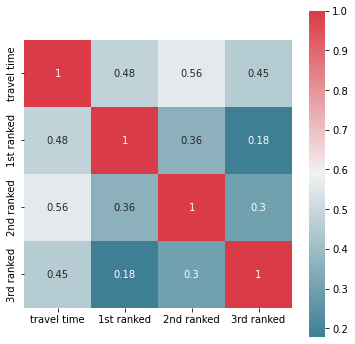

In [95]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(6,6))
corr = df4[['travel time','1st ranked','2nd ranked','3rd ranked']].corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [96]:
x = np.array(df4[['est_dist','1st ranked','2nd ranked','3rd ranked']])
y = np.array(df4['travel time'])
x

array([[0.26790189, 0.24621323, 0.10882655, 0.88797905],
       [0.25689107, 0.24621323, 0.65627562, 0.40324023],
       [0.26794166, 0.24621323, 0.65627562, 0.40324023],
       ...,
       [0.59997829, 0.24621323, 0.65627562, 1.        ],
       [0.59886182, 0.24621323, 0.65627562, 1.        ],
       [0.61177756, 0.24621323, 0.65627562, 1.        ]])

In [97]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [98]:
print(X_train.shape)
print(X_test.shape)
# X_train

(12759, 4)
(3190, 4)


In [99]:
# inputs: distance + 1st & 2nd & 3rd dominant road
model4_1_1 = nnmodel(50, num_hlayers=1,Epoch=500)
model4_1_1

Epoch 1/500
399/399 [==============================] - 1s 873us/step - loss: 1013579.1250 - mape: 98.6075 - rmse: 1006.7667 - val_loss: 1011237.6250 - val_mape: 95.9705 - val_rmse: 1005.6031
Epoch 2/500
399/399 [==============================] - 0s 686us/step - loss: 906196.7500 - mape: 90.6897 - rmse: 951.9437 - val_loss: 854108.7500 - val_mape: 84.5220 - val_rmse: 924.1801
Epoch 3/500
399/399 [==============================] - 0s 699us/step - loss: 727562.0625 - mape: 76.2304 - rmse: 852.9725 - val_loss: 648451.3125 - val_mape: 67.5572 - val_rmse: 805.2648
Epoch 4/500
399/399 [==============================] - 0s 714us/step - loss: 526898.6875 - mape: 57.6353 - rmse: 725.8779 - val_loss: 446692.8750 - val_mape: 47.9653 - val_rmse: 668.3509
Epoch 5/500
399/399 [==============================] - 0s 698us/step - loss: 351809.4062 - mape: 40.0676 - rmse: 593.1353 - val_loss: 288693.2188 - val_mape: 33.8512 - val_rmse: 537.3018
Epoch 6/500
399/399 [==============================] - 0s 725

Epoch 45/500
399/399 [==============================] - 0s 734us/step - loss: 69810.9375 - mape: 24.3127 - rmse: 264.2176 - val_loss: 72461.0000 - val_mape: 23.7466 - val_rmse: 269.1858
Epoch 46/500
399/399 [==============================] - 0s 700us/step - loss: 69699.3438 - mape: 24.3225 - rmse: 264.0063 - val_loss: 72366.1406 - val_mape: 23.6038 - val_rmse: 269.0096
Epoch 47/500
399/399 [==============================] - 0s 702us/step - loss: 69599.4141 - mape: 24.3598 - rmse: 263.8170 - val_loss: 72292.1094 - val_mape: 23.4007 - val_rmse: 268.8719
Epoch 48/500
399/399 [==============================] - 0s 740us/step - loss: 69533.5547 - mape: 24.2406 - rmse: 263.6922 - val_loss: 72249.7891 - val_mape: 23.6261 - val_rmse: 268.7932
Epoch 49/500
399/399 [==============================] - 0s 700us/step - loss: 69461.1641 - mape: 24.3333 - rmse: 263.5549 - val_loss: 72190.7031 - val_mape: 23.5218 - val_rmse: 268.6833
Epoch 50/500
399/399 [==============================] - 0s 683us/step 

399/399 [==============================] - 0s 742us/step - loss: 69069.7734 - mape: 24.3806 - rmse: 262.8113 - val_loss: 71949.3203 - val_mape: 23.6594 - val_rmse: 268.2337
Epoch 90/500
399/399 [==============================] - 0s 698us/step - loss: 69071.4062 - mape: 24.2764 - rmse: 262.8144 - val_loss: 72003.0078 - val_mape: 24.0317 - val_rmse: 268.3338
Epoch 91/500
399/399 [==============================] - 0s 709us/step - loss: 69057.1719 - mape: 24.4729 - rmse: 262.7873 - val_loss: 71942.3438 - val_mape: 23.5108 - val_rmse: 268.2207
Epoch 92/500
399/399 [==============================] - 0s 722us/step - loss: 69068.0703 - mape: 24.3550 - rmse: 262.8080 - val_loss: 71943.2109 - val_mape: 23.5639 - val_rmse: 268.2223
Epoch 93/500
399/399 [==============================] - 0s 713us/step - loss: 69061.4141 - mape: 24.3407 - rmse: 262.7954 - val_loss: 71944.9609 - val_mape: 23.4462 - val_rmse: 268.2256
Epoch 94/500
399/399 [==============================] - 0s 683us/step - loss: 69066

Epoch 133/500
399/399 [==============================] - 0s 698us/step - loss: 69073.9688 - mape: 24.4651 - rmse: 262.8193 - val_loss: 71944.5938 - val_mape: 23.5713 - val_rmse: 268.2249
Epoch 134/500
399/399 [==============================] - 0s 746us/step - loss: 69065.7344 - mape: 24.3581 - rmse: 262.8036 - val_loss: 71943.0859 - val_mape: 23.6331 - val_rmse: 268.2221
Epoch 135/500
399/399 [==============================] - 0s 713us/step - loss: 69058.6953 - mape: 24.3305 - rmse: 262.7902 - val_loss: 71963.8125 - val_mape: 23.8553 - val_rmse: 268.2607
Epoch 136/500
399/399 [==============================] - 0s 681us/step - loss: 69051.0781 - mape: 24.2541 - rmse: 262.7757 - val_loss: 72045.9219 - val_mape: 24.2386 - val_rmse: 268.4137
Epoch 137/500
399/399 [==============================] - 0s 728us/step - loss: 69068.8047 - mape: 24.4586 - rmse: 262.8094 - val_loss: 71945.5391 - val_mape: 23.6802 - val_rmse: 268.2267
Epoch 138/500
399/399 [==============================] - 0s 748us

Epoch 177/500
399/399 [==============================] - 0s 750us/step - loss: 69059.2266 - mape: 24.3100 - rmse: 262.7912 - val_loss: 71986.5781 - val_mape: 23.9924 - val_rmse: 268.3031
Epoch 178/500
399/399 [==============================] - 0s 721us/step - loss: 69060.8438 - mape: 24.3834 - rmse: 262.7943 - val_loss: 71949.5078 - val_mape: 23.7105 - val_rmse: 268.2340
Epoch 179/500
399/399 [==============================] - 0s 688us/step - loss: 69062.1719 - mape: 24.2994 - rmse: 262.7968 - val_loss: 71962.2344 - val_mape: 23.8651 - val_rmse: 268.2578
Epoch 180/500
399/399 [==============================] - 0s 711us/step - loss: 69063.6406 - mape: 24.3708 - rmse: 262.7996 - val_loss: 71987.3984 - val_mape: 23.9907 - val_rmse: 268.3047
Epoch 181/500
399/399 [==============================] - 0s 699us/step - loss: 69058.3828 - mape: 24.4477 - rmse: 262.7896 - val_loss: 71955.5156 - val_mape: 23.7916 - val_rmse: 268.2452
Epoch 182/500
399/399 [==============================] - 0s 686us

Epoch 221/500
399/399 [==============================] - 0s 709us/step - loss: 69055.7188 - mape: 24.4302 - rmse: 262.7845 - val_loss: 71943.3672 - val_mape: 23.6368 - val_rmse: 268.2226
Epoch 222/500
399/399 [==============================] - 0s 741us/step - loss: 69063.8984 - mape: 24.3719 - rmse: 262.8001 - val_loss: 71948.9375 - val_mape: 23.6896 - val_rmse: 268.2330
Epoch 223/500
399/399 [==============================] - 0s 724us/step - loss: 69058.9688 - mape: 24.3908 - rmse: 262.7907 - val_loss: 71946.3906 - val_mape: 23.6998 - val_rmse: 268.2282
Epoch 224/500
399/399 [==============================] - 0s 723us/step - loss: 69059.6094 - mape: 24.2554 - rmse: 262.7920 - val_loss: 71997.8203 - val_mape: 24.0651 - val_rmse: 268.3241
Epoch 225/500
399/399 [==============================] - 0s 680us/step - loss: 69065.7578 - mape: 24.4453 - rmse: 262.8036 - val_loss: 71948.5781 - val_mape: 23.7340 - val_rmse: 268.2323
Epoch 226/500
399/399 [==============================] - 0s 728us

Epoch 265/500
399/399 [==============================] - 0s 701us/step - loss: 69066.3359 - mape: 24.4584 - rmse: 262.8047 - val_loss: 71946.3906 - val_mape: 23.6821 - val_rmse: 268.2282
Epoch 266/500
399/399 [==============================] - 0s 688us/step - loss: 69055.7891 - mape: 24.3950 - rmse: 262.7847 - val_loss: 71943.0469 - val_mape: 23.6344 - val_rmse: 268.2220
Epoch 267/500
399/399 [==============================] - 0s 687us/step - loss: 69064.2578 - mape: 24.3282 - rmse: 262.8008 - val_loss: 71959.2734 - val_mape: 23.7863 - val_rmse: 268.2523
Epoch 268/500
399/399 [==============================] - 0s 714us/step - loss: 69062.9375 - mape: 24.3498 - rmse: 262.7983 - val_loss: 71978.9062 - val_mape: 23.9344 - val_rmse: 268.2888
Epoch 269/500
399/399 [==============================] - 0s 696us/step - loss: 69065.6797 - mape: 24.3746 - rmse: 262.8035 - val_loss: 71946.4922 - val_mape: 23.6640 - val_rmse: 268.2284
Epoch 270/500
399/399 [==============================] - 0s 735us

Epoch 309/500
399/399 [==============================] - 0s 760us/step - loss: 69068.7812 - mape: 24.3958 - rmse: 262.8094 - val_loss: 71943.5312 - val_mape: 23.5927 - val_rmse: 268.2229
Epoch 310/500
399/399 [==============================] - 0s 707us/step - loss: 69066.9922 - mape: 24.3267 - rmse: 262.8060 - val_loss: 71955.4219 - val_mape: 23.7622 - val_rmse: 268.2451
Epoch 311/500
399/399 [==============================] - 0s 687us/step - loss: 69052.0469 - mape: 24.2905 - rmse: 262.7776 - val_loss: 72032.6172 - val_mape: 24.1726 - val_rmse: 268.3889
Epoch 312/500
399/399 [==============================] - 0s 701us/step - loss: 69055.1484 - mape: 24.4186 - rmse: 262.7835 - val_loss: 71955.8906 - val_mape: 23.7691 - val_rmse: 268.2459
Epoch 313/500
399/399 [==============================] - 0s 690us/step - loss: 69052.0469 - mape: 24.3775 - rmse: 262.7776 - val_loss: 71951.6562 - val_mape: 23.7562 - val_rmse: 268.2381
Epoch 314/500
399/399 [==============================] - 0s 702us

Epoch 353/500
399/399 [==============================] - 0s 714us/step - loss: 69065.5938 - mape: 24.3738 - rmse: 262.8033 - val_loss: 71946.6875 - val_mape: 23.6625 - val_rmse: 268.2288
Epoch 354/500
399/399 [==============================] - 0s 725us/step - loss: 69057.9375 - mape: 24.2937 - rmse: 262.7888 - val_loss: 72004.2812 - val_mape: 24.0773 - val_rmse: 268.3361
Epoch 355/500
399/399 [==============================] - 0s 700us/step - loss: 69062.3125 - mape: 24.3807 - rmse: 262.7971 - val_loss: 71947.2812 - val_mape: 23.6532 - val_rmse: 268.2299
Epoch 356/500
399/399 [==============================] - 0s 752us/step - loss: 69055.4141 - mape: 24.3772 - rmse: 262.7840 - val_loss: 71951.4297 - val_mape: 23.7604 - val_rmse: 268.2376
Epoch 357/500
399/399 [==============================] - 0s 698us/step - loss: 69062.6484 - mape: 24.3002 - rmse: 262.7977 - val_loss: 71974.8984 - val_mape: 23.9210 - val_rmse: 268.2814
Epoch 358/500
399/399 [==============================] - 0s 708us

Epoch 397/500
399/399 [==============================] - 0s 703us/step - loss: 69064.8203 - mape: 24.2718 - rmse: 262.8019 - val_loss: 72054.1562 - val_mape: 24.2605 - val_rmse: 268.4290
Epoch 398/500
399/399 [==============================] - 0s 704us/step - loss: 69063.9688 - mape: 24.4232 - rmse: 262.8002 - val_loss: 71947.0312 - val_mape: 23.6919 - val_rmse: 268.2294
Epoch 399/500
399/399 [==============================] - 0s 733us/step - loss: 69066.4922 - mape: 24.3987 - rmse: 262.8051 - val_loss: 71946.9609 - val_mape: 23.7241 - val_rmse: 268.2293
Epoch 400/500
399/399 [==============================] - 0s 709us/step - loss: 69052.8828 - mape: 24.1819 - rmse: 262.7791 - val_loss: 72084.7734 - val_mape: 24.3692 - val_rmse: 268.4861
Epoch 401/500
399/399 [==============================] - 0s 720us/step - loss: 69080.9375 - mape: 24.4501 - rmse: 262.8325 - val_loss: 71963.0781 - val_mape: 23.8755 - val_rmse: 268.2593
Epoch 402/500
399/399 [==============================] - 0s 734us

Epoch 441/500
399/399 [==============================] - 0s 744us/step - loss: 69058.6094 - mape: 24.3490 - rmse: 262.7900 - val_loss: 71966.2656 - val_mape: 23.8776 - val_rmse: 268.2653
Epoch 442/500
399/399 [==============================] - 0s 719us/step - loss: 69061.2344 - mape: 24.3824 - rmse: 262.7950 - val_loss: 71945.4766 - val_mape: 23.6108 - val_rmse: 268.2265
Epoch 443/500
399/399 [==============================] - 0s 713us/step - loss: 69058.4922 - mape: 24.3674 - rmse: 262.7898 - val_loss: 71945.6172 - val_mape: 23.6742 - val_rmse: 268.2268
Epoch 444/500
399/399 [==============================] - 0s 738us/step - loss: 69068.0391 - mape: 24.2848 - rmse: 262.8080 - val_loss: 71993.0781 - val_mape: 24.0177 - val_rmse: 268.3152
Epoch 445/500
399/399 [==============================] - 0s 718us/step - loss: 69073.8359 - mape: 24.3680 - rmse: 262.8190 - val_loss: 71969.0547 - val_mape: 23.9115 - val_rmse: 268.2705
Epoch 446/500
399/399 [==============================] - 0s 700us

Epoch 485/500
399/399 [==============================] - 0s 722us/step - loss: 69048.5781 - mape: 24.2686 - rmse: 262.7710 - val_loss: 72052.6250 - val_mape: 24.2654 - val_rmse: 268.4262
Epoch 486/500
399/399 [==============================] - 0s 721us/step - loss: 69058.1406 - mape: 24.4451 - rmse: 262.7892 - val_loss: 71965.2578 - val_mape: 23.8881 - val_rmse: 268.2634
Epoch 487/500
399/399 [==============================] - 0s 737us/step - loss: 69059.5547 - mape: 24.3958 - rmse: 262.7918 - val_loss: 71964.3359 - val_mape: 23.8723 - val_rmse: 268.2617
Epoch 488/500
399/399 [==============================] - 0s 689us/step - loss: 69076.8906 - mape: 24.3907 - rmse: 262.8248 - val_loss: 71955.1719 - val_mape: 23.7873 - val_rmse: 268.2446
Epoch 489/500
399/399 [==============================] - 0s 707us/step - loss: 69053.0625 - mape: 24.3780 - rmse: 262.7795 - val_loss: 71963.2031 - val_mape: 23.8267 - val_rmse: 268.2596
Epoch 490/500
399/399 [==============================] - 0s 732us

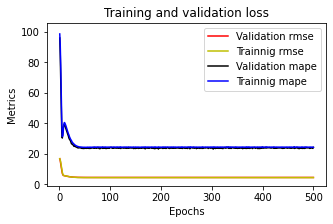

In [100]:
plotme(model4_1_1)

In [101]:
# inputs: distance + 1st & 2nd & 3rd dominant road
model4_1_2 = nnmodel(100, num_hlayers=1,Epoch=500)
model4_1_2

Epoch 1/500
399/399 [==============================] - 1s 884us/step - loss: 1004126.4375 - mape: 97.9583 - rmse: 1002.0611 - val_loss: 982410.1250 - val_mape: 93.9648 - val_rmse: 991.1660
Epoch 2/500
399/399 [==============================] - 0s 777us/step - loss: 848898.4375 - mape: 86.2282 - rmse: 921.3569 - val_loss: 761715.1875 - val_mape: 77.2327 - val_rmse: 872.7629
Epoch 3/500
399/399 [==============================] - 0s 758us/step - loss: 609564.6875 - mape: 65.7028 - rmse: 780.7462 - val_loss: 502042.2500 - val_mape: 53.6533 - val_rmse: 708.5494
Epoch 4/500
399/399 [==============================] - 0s 757us/step - loss: 378562.0938 - mape: 42.7813 - rmse: 615.2740 - val_loss: 293750.0000 - val_mape: 34.2243 - val_rmse: 541.9871
Epoch 5/500
399/399 [==============================] - 0s 758us/step - loss: 221401.0625 - mape: 31.4321 - rmse: 470.5327 - val_loss: 175606.4844 - val_mape: 30.5712 - val_rmse: 419.0543
Epoch 6/500
399/399 [==============================] - 0s 746us

Epoch 45/500
399/399 [==============================] - 0s 741us/step - loss: 69104.3750 - mape: 24.3585 - rmse: 262.8771 - val_loss: 71985.6641 - val_mape: 23.9240 - val_rmse: 268.3015
Epoch 46/500
399/399 [==============================] - 0s 740us/step - loss: 69091.7734 - mape: 24.3435 - rmse: 262.8531 - val_loss: 71945.2266 - val_mape: 23.6775 - val_rmse: 268.2261
Epoch 47/500
399/399 [==============================] - 0s 757us/step - loss: 69058.8359 - mape: 24.2109 - rmse: 262.7905 - val_loss: 72051.9062 - val_mape: 24.2512 - val_rmse: 268.4249
Epoch 48/500
399/399 [==============================] - 0s 743us/step - loss: 69093.2109 - mape: 24.3888 - rmse: 262.8559 - val_loss: 71972.7031 - val_mape: 23.9950 - val_rmse: 268.2773
Epoch 49/500
399/399 [==============================] - 0s 751us/step - loss: 69059.8438 - mape: 24.3157 - rmse: 262.7924 - val_loss: 71946.1016 - val_mape: 23.8205 - val_rmse: 268.2277
Epoch 50/500
399/399 [==============================] - 0s 749us/step 

399/399 [==============================] - 0s 754us/step - loss: 68834.8203 - mape: 24.2933 - rmse: 262.3639 - val_loss: 71776.4375 - val_mape: 23.9052 - val_rmse: 267.9113
Epoch 90/500
399/399 [==============================] - 0s 731us/step - loss: 68830.8828 - mape: 24.2356 - rmse: 262.3564 - val_loss: 71795.2578 - val_mape: 24.0321 - val_rmse: 267.9464
Epoch 91/500
399/399 [==============================] - 0s 721us/step - loss: 68814.9141 - mape: 24.3053 - rmse: 262.3260 - val_loss: 71735.8984 - val_mape: 23.7208 - val_rmse: 267.8356
Epoch 92/500
399/399 [==============================] - 0s 708us/step - loss: 68824.1719 - mape: 24.3023 - rmse: 262.3436 - val_loss: 71726.5625 - val_mape: 23.6104 - val_rmse: 267.8181
Epoch 93/500
399/399 [==============================] - 0s 711us/step - loss: 68813.8672 - mape: 24.2786 - rmse: 262.3240 - val_loss: 71719.9922 - val_mape: 23.6055 - val_rmse: 267.8059
Epoch 94/500
399/399 [==============================] - 0s 725us/step - loss: 68815

Epoch 133/500
399/399 [==============================] - 0s 745us/step - loss: 68537.6328 - mape: 24.2766 - rmse: 261.7969 - val_loss: 71484.7109 - val_mape: 23.2586 - val_rmse: 267.3662
Epoch 134/500
399/399 [==============================] - 0s 743us/step - loss: 68531.1562 - mape: 24.1899 - rmse: 261.7845 - val_loss: 71475.4766 - val_mape: 23.4013 - val_rmse: 267.3490
Epoch 135/500
399/399 [==============================] - 0s 700us/step - loss: 68522.6250 - mape: 24.1463 - rmse: 261.7683 - val_loss: 71495.3359 - val_mape: 23.7553 - val_rmse: 267.3861
Epoch 136/500
399/399 [==============================] - 0s 745us/step - loss: 68529.6562 - mape: 24.2096 - rmse: 261.7817 - val_loss: 71495.5156 - val_mape: 23.7530 - val_rmse: 267.3864
Epoch 137/500
399/399 [==============================] - 0s 739us/step - loss: 68524.8828 - mape: 24.2016 - rmse: 261.7726 - val_loss: 71470.0703 - val_mape: 23.5368 - val_rmse: 267.3389
Epoch 138/500
399/399 [==============================] - 0s 751us

Epoch 177/500
399/399 [==============================] - 0s 752us/step - loss: 68257.9453 - mape: 24.2121 - rmse: 261.2622 - val_loss: 71259.0156 - val_mape: 23.2421 - val_rmse: 266.9438
Epoch 178/500
399/399 [==============================] - 0s 745us/step - loss: 68263.0234 - mape: 24.1448 - rmse: 261.2719 - val_loss: 71277.1094 - val_mape: 22.9553 - val_rmse: 266.9777
Epoch 179/500
399/399 [==============================] - 0s 720us/step - loss: 68252.4844 - mape: 24.0237 - rmse: 261.2518 - val_loss: 71262.4219 - val_mape: 23.4388 - val_rmse: 266.9502
Epoch 180/500
399/399 [==============================] - 0s 731us/step - loss: 68260.7266 - mape: 24.0857 - rmse: 261.2675 - val_loss: 71294.2656 - val_mape: 23.7602 - val_rmse: 267.0099
Epoch 181/500
399/399 [==============================] - 0s 766us/step - loss: 68263.5781 - mape: 23.9945 - rmse: 261.2730 - val_loss: 71279.4453 - val_mape: 23.6941 - val_rmse: 266.9821
Epoch 182/500
399/399 [==============================] - 0s 755us

Epoch 221/500
399/399 [==============================] - 0s 723us/step - loss: 68070.7812 - mape: 24.0618 - rmse: 260.9038 - val_loss: 71115.2500 - val_mape: 23.4729 - val_rmse: 266.6744
Epoch 222/500
399/399 [==============================] - 0s 749us/step - loss: 68066.2578 - mape: 23.9397 - rmse: 260.8951 - val_loss: 71137.3906 - val_mape: 23.6464 - val_rmse: 266.7159
Epoch 223/500
399/399 [==============================] - 0s 744us/step - loss: 68053.3516 - mape: 23.9514 - rmse: 260.8704 - val_loss: 71273.8672 - val_mape: 24.1972 - val_rmse: 266.9716
Epoch 224/500
399/399 [==============================] - 0s 746us/step - loss: 68075.2734 - mape: 24.1560 - rmse: 260.9124 - val_loss: 71095.7109 - val_mape: 23.2238 - val_rmse: 266.6378
Epoch 225/500
399/399 [==============================] - 0s 763us/step - loss: 68065.7969 - mape: 23.9925 - rmse: 260.8942 - val_loss: 71099.2266 - val_mape: 23.3869 - val_rmse: 266.6444
Epoch 226/500
399/399 [==============================] - 0s 737us

Epoch 265/500
399/399 [==============================] - 0s 725us/step - loss: 67944.0625 - mape: 23.9558 - rmse: 260.6608 - val_loss: 71023.4297 - val_mape: 23.4479 - val_rmse: 266.5022
Epoch 266/500
399/399 [==============================] - 0s 735us/step - loss: 67963.0781 - mape: 24.0163 - rmse: 260.6973 - val_loss: 71007.9844 - val_mape: 23.2053 - val_rmse: 266.4732
Epoch 267/500
399/399 [==============================] - 0s 753us/step - loss: 67949.4141 - mape: 23.9411 - rmse: 260.6711 - val_loss: 71055.5469 - val_mape: 23.6713 - val_rmse: 266.5625
Epoch 268/500
399/399 [==============================] - 0s 776us/step - loss: 67937.9141 - mape: 24.0949 - rmse: 260.6490 - val_loss: 71018.7422 - val_mape: 22.9720 - val_rmse: 266.4934
Epoch 269/500
399/399 [==============================] - 0s 731us/step - loss: 67944.4766 - mape: 23.9092 - rmse: 260.6616 - val_loss: 71010.9297 - val_mape: 23.1068 - val_rmse: 266.4788
Epoch 270/500
399/399 [==============================] - 0s 743us

Epoch 309/500
399/399 [==============================] - 0s 773us/step - loss: 67858.9922 - mape: 23.8516 - rmse: 260.4976 - val_loss: 71022.0156 - val_mape: 23.6180 - val_rmse: 266.4996
Epoch 310/500
399/399 [==============================] - 0s 734us/step - loss: 67873.8047 - mape: 23.9690 - rmse: 260.5260 - val_loss: 70975.5625 - val_mape: 23.2758 - val_rmse: 266.4124
Epoch 311/500
399/399 [==============================] - 0s 771us/step - loss: 67871.7500 - mape: 23.8899 - rmse: 260.5221 - val_loss: 71011.4922 - val_mape: 23.5920 - val_rmse: 266.4798
Epoch 312/500
399/399 [==============================] - 0s 742us/step - loss: 67886.1562 - mape: 24.0054 - rmse: 260.5497 - val_loss: 71062.1172 - val_mape: 23.7644 - val_rmse: 266.5748
Epoch 313/500
399/399 [==============================] - 0s 770us/step - loss: 67881.4141 - mape: 23.9393 - rmse: 260.5406 - val_loss: 71005.1328 - val_mape: 23.5303 - val_rmse: 266.4679
Epoch 314/500
399/399 [==============================] - 0s 743us

Epoch 353/500
399/399 [==============================] - 0s 783us/step - loss: 67833.2812 - mape: 23.8673 - rmse: 260.4482 - val_loss: 70974.4062 - val_mape: 23.4749 - val_rmse: 266.4102
Epoch 354/500
399/399 [==============================] - 0s 739us/step - loss: 67829.2422 - mape: 23.8609 - rmse: 260.4405 - val_loss: 70985.7266 - val_mape: 23.5112 - val_rmse: 266.4315
Epoch 355/500
399/399 [==============================] - 0s 752us/step - loss: 67819.3047 - mape: 24.0412 - rmse: 260.4214 - val_loss: 70952.5547 - val_mape: 23.0991 - val_rmse: 266.3692
Epoch 356/500
399/399 [==============================] - 0s 754us/step - loss: 67819.5859 - mape: 23.8362 - rmse: 260.4219 - val_loss: 70954.7422 - val_mape: 23.2594 - val_rmse: 266.3733
Epoch 357/500
399/399 [==============================] - 0s 742us/step - loss: 67825.5781 - mape: 23.9763 - rmse: 260.4334 - val_loss: 70953.3750 - val_mape: 23.2055 - val_rmse: 266.3708
Epoch 358/500
399/399 [==============================] - 0s 755us

Epoch 397/500
399/399 [==============================] - 0s 727us/step - loss: 67849.2812 - mape: 23.9792 - rmse: 260.4789 - val_loss: 70990.7344 - val_mape: 23.6116 - val_rmse: 266.4409
Epoch 398/500
399/399 [==============================] - 0s 732us/step - loss: 67784.4688 - mape: 23.8987 - rmse: 260.3545 - val_loss: 71004.5312 - val_mape: 23.6662 - val_rmse: 266.4668
Epoch 399/500
399/399 [==============================] - 0s 745us/step - loss: 67801.3516 - mape: 23.9296 - rmse: 260.3869 - val_loss: 70946.4844 - val_mape: 23.2200 - val_rmse: 266.3578
Epoch 400/500
399/399 [==============================] - 0s 766us/step - loss: 67785.7500 - mape: 24.0101 - rmse: 260.3570 - val_loss: 70966.1250 - val_mape: 22.7812 - val_rmse: 266.3947
Epoch 401/500
399/399 [==============================] - 0s 757us/step - loss: 67815.3516 - mape: 23.7847 - rmse: 260.4138 - val_loss: 71014.1094 - val_mape: 23.6573 - val_rmse: 266.4847
Epoch 402/500
399/399 [==============================] - 0s 745us

Epoch 441/500
399/399 [==============================] - 0s 727us/step - loss: 67779.2578 - mape: 23.9293 - rmse: 260.3445 - val_loss: 70952.5938 - val_mape: 22.8622 - val_rmse: 266.3693
Epoch 442/500
399/399 [==============================] - 0s 767us/step - loss: 67795.2031 - mape: 23.8325 - rmse: 260.3751 - val_loss: 70976.6250 - val_mape: 23.4912 - val_rmse: 266.4144
Epoch 443/500
399/399 [==============================] - 0s 762us/step - loss: 67774.0625 - mape: 23.8974 - rmse: 260.3345 - val_loss: 70950.2344 - val_mape: 22.8976 - val_rmse: 266.3648
Epoch 444/500
399/399 [==============================] - 0s 754us/step - loss: 67792.4453 - mape: 23.8323 - rmse: 260.3698 - val_loss: 70951.9531 - val_mape: 23.3134 - val_rmse: 266.3681
Epoch 445/500
399/399 [==============================] - 0s 788us/step - loss: 67768.4531 - mape: 23.9821 - rmse: 260.3238 - val_loss: 70954.0000 - val_mape: 22.8834 - val_rmse: 266.3719
Epoch 446/500
399/399 [==============================] - 0s 788us

Epoch 485/500
399/399 [==============================] - 0s 754us/step - loss: 67786.5312 - mape: 23.7899 - rmse: 260.3585 - val_loss: 70949.2578 - val_mape: 23.3044 - val_rmse: 266.3630
Epoch 486/500
399/399 [==============================] - 0s 752us/step - loss: 67776.3125 - mape: 23.9226 - rmse: 260.3388 - val_loss: 70939.8906 - val_mape: 23.1076 - val_rmse: 266.3454
Epoch 487/500
399/399 [==============================] - 0s 765us/step - loss: 67770.2266 - mape: 23.8575 - rmse: 260.3271 - val_loss: 70940.7656 - val_mape: 23.2095 - val_rmse: 266.3471
Epoch 488/500
399/399 [==============================] - 0s 757us/step - loss: 67783.7734 - mape: 23.8380 - rmse: 260.3532 - val_loss: 70949.2188 - val_mape: 23.3733 - val_rmse: 266.3629
Epoch 489/500
399/399 [==============================] - 0s 774us/step - loss: 67769.9922 - mape: 23.8752 - rmse: 260.3267 - val_loss: 70953.1406 - val_mape: 23.3614 - val_rmse: 266.3703
Epoch 490/500
399/399 [==============================] - 0s 717us

In [102]:
# inputs: distance + 1st & 2nd & 3rd dominant road
model4_1_3 = nnmodel(200, num_hlayers=1,Epoch=500)
model4_1_3

Epoch 1/500
399/399 [==============================] - 1s 883us/step - loss: 969721.7500 - mape: 95.4035 - rmse: 984.7445 - val_loss: 874795.0000 - val_mape: 86.1253 - val_rmse: 935.3047
Epoch 2/500
399/399 [==============================] - 0s 789us/step - loss: 646333.6875 - mape: 68.7673 - rmse: 803.9488 - val_loss: 461566.9062 - val_mape: 49.5457 - val_rmse: 679.3871
Epoch 3/500
399/399 [==============================] - 0s 735us/step - loss: 297063.9688 - mape: 36.2851 - rmse: 545.0358 - val_loss: 191985.3594 - val_mape: 30.2183 - val_rmse: 438.1613
Epoch 4/500
399/399 [==============================] - 0s 754us/step - loss: 145508.2969 - mape: 33.6510 - rmse: 381.4555 - val_loss: 123603.1562 - val_mape: 36.2689 - val_rmse: 351.5724
Epoch 5/500
399/399 [==============================] - 0s 739us/step - loss: 117804.0781 - mape: 39.4829 - rmse: 343.2260 - val_loss: 114551.5000 - val_mape: 39.0872 - val_rmse: 338.4546
Epoch 6/500
399/399 [==============================] - 0s 754us/s

399/399 [==============================] - 0s 743us/step - loss: 69078.3438 - mape: 24.3803 - rmse: 262.8276 - val_loss: 71948.4688 - val_mape: 23.6371 - val_rmse: 268.2321
Epoch 46/500
399/399 [==============================] - 0s 729us/step - loss: 69066.2109 - mape: 24.3190 - rmse: 262.8045 - val_loss: 72013.3359 - val_mape: 24.1226 - val_rmse: 268.3530
Epoch 47/500
399/399 [==============================] - 0s 773us/step - loss: 69067.4453 - mape: 24.4081 - rmse: 262.8069 - val_loss: 71929.5938 - val_mape: 23.4635 - val_rmse: 268.1969
Epoch 48/500
399/399 [==============================] - 0s 739us/step - loss: 69072.4609 - mape: 24.3320 - rmse: 262.8164 - val_loss: 71983.9062 - val_mape: 24.0188 - val_rmse: 268.2982
Epoch 49/500
399/399 [==============================] - 0s 730us/step - loss: 69061.0312 - mape: 24.3406 - rmse: 262.7946 - val_loss: 71928.4688 - val_mape: 23.6980 - val_rmse: 268.1948
Epoch 50/500
399/399 [==============================] - 0s 733us/step - loss: 69065

Epoch 133/500
399/399 [==============================] - 0s 723us/step - loss: 68567.9297 - mape: 24.1881 - rmse: 261.8548 - val_loss: 71606.9531 - val_mape: 24.0867 - val_rmse: 267.5948
Epoch 134/500
399/399 [==============================] - 0s 750us/step - loss: 68585.0234 - mape: 24.2873 - rmse: 261.8874 - val_loss: 71503.3203 - val_mape: 23.1424 - val_rmse: 267.4011
Epoch 135/500
399/399 [==============================] - 0s 755us/step - loss: 68548.1641 - mape: 24.1390 - rmse: 261.8170 - val_loss: 71602.0391 - val_mape: 24.1711 - val_rmse: 267.5856
Epoch 136/500
399/399 [==============================] - 0s 741us/step - loss: 68551.9844 - mape: 24.1895 - rmse: 261.8243 - val_loss: 71527.5859 - val_mape: 23.8766 - val_rmse: 267.4464
Epoch 137/500
399/399 [==============================] - 0s 741us/step - loss: 68549.2266 - mape: 24.1886 - rmse: 261.8191 - val_loss: 71572.4609 - val_mape: 24.0607 - val_rmse: 267.5303
Epoch 138/500
399/399 [==============================] - 0s 738us

Epoch 177/500
399/399 [==============================] - 0s 773us/step - loss: 68310.4062 - mape: 24.0801 - rmse: 261.3626 - val_loss: 71272.8047 - val_mape: 23.4815 - val_rmse: 266.9697
Epoch 178/500
399/399 [==============================] - 0s 755us/step - loss: 68297.8281 - mape: 24.1508 - rmse: 261.3385 - val_loss: 71272.4531 - val_mape: 23.4772 - val_rmse: 266.9690
Epoch 179/500
399/399 [==============================] - 0s 696us/step - loss: 68277.4609 - mape: 24.0181 - rmse: 261.2996 - val_loss: 71300.5469 - val_mape: 23.7284 - val_rmse: 267.0216
Epoch 180/500
399/399 [==============================] - 0s 724us/step - loss: 68277.0625 - mape: 24.1683 - rmse: 261.2988 - val_loss: 71250.4062 - val_mape: 23.4087 - val_rmse: 266.9277
Epoch 181/500
399/399 [==============================] - 0s 736us/step - loss: 68275.3828 - mape: 24.0404 - rmse: 261.2956 - val_loss: 71316.3359 - val_mape: 23.8520 - val_rmse: 267.0512
Epoch 182/500
399/399 [==============================] - 0s 734us

Epoch 221/500
399/399 [==============================] - 0s 750us/step - loss: 68099.3125 - mape: 23.9446 - rmse: 260.9584 - val_loss: 71121.9141 - val_mape: 23.4803 - val_rmse: 266.6869
Epoch 222/500
399/399 [==============================] - 0s 733us/step - loss: 68098.0078 - mape: 24.0549 - rmse: 260.9560 - val_loss: 71133.9062 - val_mape: 23.5813 - val_rmse: 266.7094
Epoch 223/500
399/399 [==============================] - 0s 741us/step - loss: 68082.6875 - mape: 24.0555 - rmse: 260.9266 - val_loss: 71099.7188 - val_mape: 23.1464 - val_rmse: 266.6453
Epoch 224/500
399/399 [==============================] - 0s 720us/step - loss: 68088.6016 - mape: 23.9739 - rmse: 260.9379 - val_loss: 71210.9375 - val_mape: 23.9509 - val_rmse: 266.8538
Epoch 225/500
399/399 [==============================] - 0s 751us/step - loss: 68086.4375 - mape: 24.0595 - rmse: 260.9338 - val_loss: 71127.4219 - val_mape: 23.5457 - val_rmse: 266.6972
Epoch 226/500
399/399 [==============================] - 0s 719us

Epoch 265/500
399/399 [==============================] - 0s 729us/step - loss: 67974.8828 - mape: 23.9750 - rmse: 260.7199 - val_loss: 71027.8672 - val_mape: 23.4510 - val_rmse: 266.5105
Epoch 266/500
399/399 [==============================] - 0s 738us/step - loss: 67982.1328 - mape: 23.9697 - rmse: 260.7338 - val_loss: 71019.2031 - val_mape: 22.9751 - val_rmse: 266.4943
Epoch 267/500
399/399 [==============================] - 0s 743us/step - loss: 67947.0547 - mape: 23.9212 - rmse: 260.6666 - val_loss: 71068.0547 - val_mape: 23.6958 - val_rmse: 266.5859
Epoch 268/500
399/399 [==============================] - 0s 727us/step - loss: 67967.7188 - mape: 24.0100 - rmse: 260.7062 - val_loss: 71062.5234 - val_mape: 23.6429 - val_rmse: 266.5756
Epoch 269/500
399/399 [==============================] - 0s 740us/step - loss: 67961.0469 - mape: 23.9968 - rmse: 260.6934 - val_loss: 71013.7500 - val_mape: 23.0996 - val_rmse: 266.4840
Epoch 270/500
399/399 [==============================] - 0s 733us

Epoch 309/500
399/399 [==============================] - 0s 759us/step - loss: 67864.9062 - mape: 23.9071 - rmse: 260.5089 - val_loss: 71007.5859 - val_mape: 23.5976 - val_rmse: 266.4725
Epoch 310/500
399/399 [==============================] - 0s 743us/step - loss: 67866.0078 - mape: 23.9537 - rmse: 260.5110 - val_loss: 71038.7188 - val_mape: 23.7371 - val_rmse: 266.5309
Epoch 311/500
399/399 [==============================] - 0s 745us/step - loss: 67879.9062 - mape: 24.0279 - rmse: 260.5377 - val_loss: 71038.7734 - val_mape: 22.5513 - val_rmse: 266.5310
Epoch 312/500
399/399 [==============================] - 0s 721us/step - loss: 67909.9062 - mape: 23.9064 - rmse: 260.5953 - val_loss: 70973.9766 - val_mape: 22.9041 - val_rmse: 266.4094
Epoch 313/500
399/399 [==============================] - 0s 733us/step - loss: 67883.0156 - mape: 23.8787 - rmse: 260.5437 - val_loss: 70973.9375 - val_mape: 23.3698 - val_rmse: 266.4093
Epoch 314/500
399/399 [==============================] - 0s 720us

Epoch 353/500
399/399 [==============================] - 0s 718us/step - loss: 67846.9766 - mape: 23.9943 - rmse: 260.4745 - val_loss: 70973.6953 - val_mape: 23.4499 - val_rmse: 266.4089
Epoch 354/500
399/399 [==============================] - 0s 717us/step - loss: 67834.3281 - mape: 23.8804 - rmse: 260.4503 - val_loss: 70954.5156 - val_mape: 23.3592 - val_rmse: 266.3729
Epoch 355/500
399/399 [==============================] - 0s 738us/step - loss: 67847.5156 - mape: 23.9410 - rmse: 260.4756 - val_loss: 70994.2734 - val_mape: 23.5806 - val_rmse: 266.4475
Epoch 356/500
399/399 [==============================] - 0s 733us/step - loss: 67837.6406 - mape: 23.8801 - rmse: 260.4566 - val_loss: 71036.1406 - val_mape: 23.7595 - val_rmse: 266.5261
Epoch 357/500
399/399 [==============================] - 0s 750us/step - loss: 67838.9453 - mape: 23.9754 - rmse: 260.4591 - val_loss: 70952.2891 - val_mape: 23.2293 - val_rmse: 266.3687
Epoch 358/500
399/399 [==============================] - 0s 738us

Epoch 397/500
399/399 [==============================] - 0s 725us/step - loss: 67816.3906 - mape: 24.0225 - rmse: 260.4158 - val_loss: 70953.1953 - val_mape: 23.3404 - val_rmse: 266.3704
Epoch 398/500
399/399 [==============================] - 0s 761us/step - loss: 67790.7891 - mape: 23.8615 - rmse: 260.3666 - val_loss: 71059.5000 - val_mape: 23.8435 - val_rmse: 266.5699
Epoch 399/500
399/399 [==============================] - 0s 716us/step - loss: 67822.0000 - mape: 23.9628 - rmse: 260.4266 - val_loss: 70944.5234 - val_mape: 22.9589 - val_rmse: 266.3541
Epoch 400/500
399/399 [==============================] - 0s 740us/step - loss: 67797.1016 - mape: 23.8226 - rmse: 260.3788 - val_loss: 71063.4922 - val_mape: 23.8690 - val_rmse: 266.5774
Epoch 401/500
399/399 [==============================] - 0s 727us/step - loss: 67832.8047 - mape: 23.9233 - rmse: 260.4473 - val_loss: 70996.6562 - val_mape: 23.5999 - val_rmse: 266.4520
Epoch 402/500
399/399 [==============================] - 0s 724us

Epoch 441/500
399/399 [==============================] - 0s 715us/step - loss: 67794.4219 - mape: 23.9274 - rmse: 260.3736 - val_loss: 70938.6719 - val_mape: 23.1274 - val_rmse: 266.3431
Epoch 442/500
399/399 [==============================] - 0s 706us/step - loss: 67768.0469 - mape: 23.9616 - rmse: 260.3230 - val_loss: 70949.5547 - val_mape: 22.8837 - val_rmse: 266.3636
Epoch 443/500
399/399 [==============================] - 0s 725us/step - loss: 67785.9453 - mape: 23.8435 - rmse: 260.3573 - val_loss: 70985.4844 - val_mape: 23.5624 - val_rmse: 266.4310
Epoch 444/500
399/399 [==============================] - 0s 711us/step - loss: 67778.4531 - mape: 23.8889 - rmse: 260.3430 - val_loss: 70984.4531 - val_mape: 23.5258 - val_rmse: 266.4291
Epoch 445/500
399/399 [==============================] - 0s 744us/step - loss: 67781.9844 - mape: 23.9681 - rmse: 260.3497 - val_loss: 70990.5625 - val_mape: 22.6002 - val_rmse: 266.4406
Epoch 446/500
399/399 [==============================] - 0s 732us

Epoch 485/500
399/399 [==============================] - 0s 752us/step - loss: 67768.4297 - mape: 23.7373 - rmse: 260.3237 - val_loss: 71037.4219 - val_mape: 23.8154 - val_rmse: 266.5285
Epoch 486/500
399/399 [==============================] - 0s 745us/step - loss: 67800.4609 - mape: 23.9167 - rmse: 260.3852 - val_loss: 70983.2422 - val_mape: 23.5630 - val_rmse: 266.4268
Epoch 487/500
399/399 [==============================] - 0s 766us/step - loss: 67770.7969 - mape: 23.9435 - rmse: 260.3282 - val_loss: 70944.4141 - val_mape: 23.2831 - val_rmse: 266.3539
Epoch 488/500
399/399 [==============================] - 0s 740us/step - loss: 67795.6719 - mape: 23.8377 - rmse: 260.3760 - val_loss: 70959.5312 - val_mape: 23.4108 - val_rmse: 266.3823
Epoch 489/500
399/399 [==============================] - 0s 753us/step - loss: 67768.3203 - mape: 23.8486 - rmse: 260.3235 - val_loss: 71197.5625 - val_mape: 24.1933 - val_rmse: 266.8287
Epoch 490/500
399/399 [==============================] - 0s 727us

In [103]:
# inputs: distance + 1st & 2nd & 3rd dominant road
model4_1_4 = nnmodel(100,50, num_hlayers=2,Epoch=500)
model4_1_4

Epoch 1/500
399/399 [==============================] - 1s 968us/step - loss: 630583.8125 - mape: 68.3578 - rmse: 794.0931 - val_loss: 120347.9453 - val_mape: 38.5913 - val_rmse: 346.9120
Epoch 2/500
399/399 [==============================] - 0s 783us/step - loss: 111837.1094 - mape: 40.3295 - rmse: 334.4206 - val_loss: 104332.8828 - val_mape: 36.5162 - val_rmse: 323.0060
Epoch 3/500
399/399 [==============================] - 0s 801us/step - loss: 97820.7422 - mape: 35.5267 - rmse: 312.7631 - val_loss: 92004.8281 - val_mape: 32.1579 - val_rmse: 303.3230
Epoch 4/500
399/399 [==============================] - 0s 788us/step - loss: 86915.0781 - mape: 30.9267 - rmse: 294.8136 - val_loss: 83656.8984 - val_mape: 28.2448 - val_rmse: 289.2350
Epoch 5/500
399/399 [==============================] - 0s 799us/step - loss: 79486.7109 - mape: 27.7175 - rmse: 281.9339 - val_loss: 78358.4766 - val_mape: 26.2132 - val_rmse: 279.9258
Epoch 6/500
399/399 [==============================] - 0s 813us/step - 

399/399 [==============================] - 0s 805us/step - loss: 67790.6016 - mape: 23.8493 - rmse: 260.3663 - val_loss: 70970.3203 - val_mape: 23.8521 - val_rmse: 266.4026
Epoch 90/500
399/399 [==============================] - 0s 820us/step - loss: 67881.5156 - mape: 24.0190 - rmse: 260.5408 - val_loss: 70876.6406 - val_mape: 23.1203 - val_rmse: 266.2267
Epoch 91/500
399/399 [==============================] - 0s 796us/step - loss: 67865.1406 - mape: 23.9434 - rmse: 260.5094 - val_loss: 70894.6172 - val_mape: 22.8289 - val_rmse: 266.2604
Epoch 92/500
399/399 [==============================] - 0s 797us/step - loss: 67958.9531 - mape: 23.9917 - rmse: 260.6894 - val_loss: 70964.6094 - val_mape: 23.8102 - val_rmse: 266.3918
Epoch 93/500
399/399 [==============================] - 0s 771us/step - loss: 67877.9453 - mape: 23.9378 - rmse: 260.5340 - val_loss: 70933.1094 - val_mape: 23.7784 - val_rmse: 266.3327
Epoch 94/500
399/399 [==============================] - 0s 784us/step - loss: 67827

Epoch 133/500
399/399 [==============================] - 0s 794us/step - loss: 67751.7109 - mape: 23.8507 - rmse: 260.2916 - val_loss: 70961.6562 - val_mape: 23.8835 - val_rmse: 266.3863
Epoch 134/500
399/399 [==============================] - 0s 799us/step - loss: 67765.5312 - mape: 24.0156 - rmse: 260.3181 - val_loss: 70839.1641 - val_mape: 23.1859 - val_rmse: 266.1563
Epoch 135/500
399/399 [==============================] - 0s 779us/step - loss: 67757.8828 - mape: 23.8906 - rmse: 260.3034 - val_loss: 70848.9844 - val_mape: 23.4864 - val_rmse: 266.1747
Epoch 136/500
399/399 [==============================] - 0s 774us/step - loss: 67789.1250 - mape: 24.0225 - rmse: 260.3634 - val_loss: 70835.0469 - val_mape: 22.8917 - val_rmse: 266.1485
Epoch 137/500
399/399 [==============================] - 0s 793us/step - loss: 67790.8750 - mape: 23.8755 - rmse: 260.3668 - val_loss: 71003.4141 - val_mape: 23.9770 - val_rmse: 266.4647
Epoch 138/500
399/399 [==============================] - 0s 768us

Epoch 177/500
399/399 [==============================] - 0s 792us/step - loss: 67808.9453 - mape: 23.9942 - rmse: 260.4015 - val_loss: 70861.2188 - val_mape: 23.6936 - val_rmse: 266.1977
Epoch 178/500
399/399 [==============================] - 0s 789us/step - loss: 67783.4766 - mape: 24.0039 - rmse: 260.3526 - val_loss: 70803.8828 - val_mape: 23.0076 - val_rmse: 266.0900
Epoch 179/500
399/399 [==============================] - 0s 778us/step - loss: 67736.9688 - mape: 23.9075 - rmse: 260.2633 - val_loss: 70963.0547 - val_mape: 22.3021 - val_rmse: 266.3889
Epoch 180/500
399/399 [==============================] - 0s 828us/step - loss: 67704.6328 - mape: 23.8065 - rmse: 260.2011 - val_loss: 71057.6797 - val_mape: 24.3465 - val_rmse: 266.5665
Epoch 181/500
399/399 [==============================] - 0s 776us/step - loss: 67737.9609 - mape: 24.0665 - rmse: 260.2652 - val_loss: 71271.3828 - val_mape: 21.7646 - val_rmse: 266.9670
Epoch 182/500
399/399 [==============================] - 0s 777us

Epoch 221/500
399/399 [==============================] - 0s 777us/step - loss: 67796.5703 - mape: 24.0012 - rmse: 260.3777 - val_loss: 70872.0547 - val_mape: 23.7980 - val_rmse: 266.2180
Epoch 222/500
399/399 [==============================] - 0s 759us/step - loss: 67767.4062 - mape: 23.9693 - rmse: 260.3217 - val_loss: 70929.3828 - val_mape: 23.8014 - val_rmse: 266.3257
Epoch 223/500
399/399 [==============================] - 0s 785us/step - loss: 67732.4375 - mape: 23.9888 - rmse: 260.2546 - val_loss: 70874.5781 - val_mape: 22.5116 - val_rmse: 266.2228
Epoch 224/500
399/399 [==============================] - 0s 811us/step - loss: 67790.6797 - mape: 23.9788 - rmse: 260.3664 - val_loss: 71026.6250 - val_mape: 23.8936 - val_rmse: 266.5082
Epoch 225/500
399/399 [==============================] - 0s 770us/step - loss: 67719.7969 - mape: 23.8971 - rmse: 260.2303 - val_loss: 70843.5547 - val_mape: 22.6526 - val_rmse: 266.1645
Epoch 226/500
399/399 [==============================] - 0s 760us

Epoch 265/500
399/399 [==============================] - 0s 765us/step - loss: 67765.2344 - mape: 23.8273 - rmse: 260.3176 - val_loss: 70815.2734 - val_mape: 22.8646 - val_rmse: 266.1114
Epoch 266/500
399/399 [==============================] - 0s 776us/step - loss: 67763.3281 - mape: 23.9695 - rmse: 260.3139 - val_loss: 71207.1953 - val_mape: 24.4547 - val_rmse: 266.8468
Epoch 267/500
399/399 [==============================] - 0s 781us/step - loss: 67772.4297 - mape: 23.9681 - rmse: 260.3314 - val_loss: 70812.8906 - val_mape: 23.0845 - val_rmse: 266.1069
Epoch 268/500
399/399 [==============================] - 0s 808us/step - loss: 67727.2500 - mape: 23.9037 - rmse: 260.2446 - val_loss: 71069.5938 - val_mape: 24.1448 - val_rmse: 266.5888
Epoch 269/500
399/399 [==============================] - 0s 789us/step - loss: 67771.8438 - mape: 23.9547 - rmse: 260.3303 - val_loss: 70799.5859 - val_mape: 22.9786 - val_rmse: 266.0819
Epoch 270/500
399/399 [==============================] - 0s 768us

Epoch 309/500
399/399 [==============================] - 0s 784us/step - loss: 67700.6250 - mape: 23.9873 - rmse: 260.1935 - val_loss: 70874.9141 - val_mape: 22.5313 - val_rmse: 266.2234
Epoch 310/500
399/399 [==============================] - 0s 761us/step - loss: 67711.5156 - mape: 23.9024 - rmse: 260.2144 - val_loss: 70886.3516 - val_mape: 23.6632 - val_rmse: 266.2449
Epoch 311/500
399/399 [==============================] - 0s 810us/step - loss: 67751.2578 - mape: 23.9455 - rmse: 260.2907 - val_loss: 70822.7891 - val_mape: 22.8880 - val_rmse: 266.1255
Epoch 312/500
399/399 [==============================] - 0s 783us/step - loss: 67732.4922 - mape: 23.9244 - rmse: 260.2547 - val_loss: 70833.8125 - val_mape: 22.8650 - val_rmse: 266.1462
Epoch 313/500
399/399 [==============================] - 0s 802us/step - loss: 67690.3438 - mape: 23.9320 - rmse: 260.1737 - val_loss: 70924.3438 - val_mape: 22.4304 - val_rmse: 266.3163
Epoch 314/500
399/399 [==============================] - 0s 792us

Epoch 353/500
399/399 [==============================] - 0s 768us/step - loss: 67700.7266 - mape: 23.7534 - rmse: 260.1936 - val_loss: 70871.7969 - val_mape: 23.8421 - val_rmse: 266.2176
Epoch 354/500
399/399 [==============================] - 0s 792us/step - loss: 67702.0938 - mape: 24.0608 - rmse: 260.1963 - val_loss: 70888.0469 - val_mape: 22.4933 - val_rmse: 266.2481
Epoch 355/500
399/399 [==============================] - 0s 796us/step - loss: 67709.7344 - mape: 23.8809 - rmse: 260.2109 - val_loss: 70813.2578 - val_mape: 23.3065 - val_rmse: 266.1076
Epoch 356/500
399/399 [==============================] - 0s 804us/step - loss: 67746.2812 - mape: 23.9155 - rmse: 260.2812 - val_loss: 70831.4219 - val_mape: 23.3602 - val_rmse: 266.1417
Epoch 357/500
399/399 [==============================] - 0s 788us/step - loss: 67714.8828 - mape: 23.9200 - rmse: 260.2208 - val_loss: 70827.4141 - val_mape: 23.2875 - val_rmse: 266.1342
Epoch 358/500
399/399 [==============================] - 0s 783us

Epoch 397/500
399/399 [==============================] - 0s 793us/step - loss: 67746.9531 - mape: 23.9161 - rmse: 260.2824 - val_loss: 70839.0312 - val_mape: 23.6159 - val_rmse: 266.1560
Epoch 398/500
399/399 [==============================] - 0s 776us/step - loss: 67724.9922 - mape: 23.8770 - rmse: 260.2403 - val_loss: 70923.6641 - val_mape: 23.9016 - val_rmse: 266.3150
Epoch 399/500
399/399 [==============================] - 0s 785us/step - loss: 67726.6797 - mape: 24.0037 - rmse: 260.2435 - val_loss: 70867.0625 - val_mape: 23.3701 - val_rmse: 266.2087
Epoch 400/500
399/399 [==============================] - 0s 766us/step - loss: 67762.5938 - mape: 23.7735 - rmse: 260.3125 - val_loss: 70797.3594 - val_mape: 23.1032 - val_rmse: 266.0777
Epoch 401/500
399/399 [==============================] - 0s 798us/step - loss: 67795.3359 - mape: 24.0136 - rmse: 260.3754 - val_loss: 70815.3047 - val_mape: 23.0500 - val_rmse: 266.1115
Epoch 402/500
399/399 [==============================] - 0s 783us

Epoch 441/500
399/399 [==============================] - 0s 763us/step - loss: 67690.7578 - mape: 23.9043 - rmse: 260.1745 - val_loss: 70795.6953 - val_mape: 23.1377 - val_rmse: 266.0746
Epoch 442/500
399/399 [==============================] - 0s 802us/step - loss: 67714.3438 - mape: 23.9077 - rmse: 260.2198 - val_loss: 70824.4844 - val_mape: 23.3688 - val_rmse: 266.1287
Epoch 443/500
399/399 [==============================] - 0s 772us/step - loss: 67683.7188 - mape: 23.8780 - rmse: 260.1609 - val_loss: 70977.1562 - val_mape: 24.0658 - val_rmse: 266.4154
Epoch 444/500
399/399 [==============================] - 0s 762us/step - loss: 67725.6016 - mape: 23.8899 - rmse: 260.2414 - val_loss: 70792.2109 - val_mape: 23.2404 - val_rmse: 266.0681
Epoch 445/500
399/399 [==============================] - 0s 774us/step - loss: 67735.9297 - mape: 24.0459 - rmse: 260.2613 - val_loss: 70828.7969 - val_mape: 23.3265 - val_rmse: 266.1368
Epoch 446/500
399/399 [==============================] - 0s 800us

Epoch 485/500
399/399 [==============================] - 0s 779us/step - loss: 67429.5469 - mape: 23.8667 - rmse: 259.6720 - val_loss: 70761.1016 - val_mape: 23.9338 - val_rmse: 266.0096
Epoch 486/500
399/399 [==============================] - 0s 799us/step - loss: 67532.8203 - mape: 23.9335 - rmse: 259.8708 - val_loss: 70664.9062 - val_mape: 22.6433 - val_rmse: 265.8287
Epoch 487/500
399/399 [==============================] - 0s 789us/step - loss: 67555.7109 - mape: 23.7975 - rmse: 259.9148 - val_loss: 70610.6797 - val_mape: 22.8876 - val_rmse: 265.7267
Epoch 488/500
399/399 [==============================] - 0s 769us/step - loss: 67528.5703 - mape: 23.8837 - rmse: 259.8626 - val_loss: 70785.7266 - val_mape: 23.8820 - val_rmse: 266.0559
Epoch 489/500
399/399 [==============================] - 0s 782us/step - loss: 67517.8828 - mape: 23.8379 - rmse: 259.8420 - val_loss: 70609.6016 - val_mape: 23.1287 - val_rmse: 265.7247
Epoch 490/500
399/399 [==============================] - 0s 779us

In [104]:
# inputs: distance + 1st & 2nd & 3rd dominant road
model4_1_5 = nnmodel(200,100, num_hlayers=2,Epoch=500)
model4_1_5

Epoch 1/500
399/399 [==============================] - 1s 1ms/step - loss: 455324.7500 - mape: 59.7958 - rmse: 674.7775 - val_loss: 110005.6406 - val_mape: 37.9789 - val_rmse: 331.6710
Epoch 2/500
399/399 [==============================] - 0s 889us/step - loss: 100061.5000 - mape: 36.2924 - rmse: 316.3250 - val_loss: 91324.3750 - val_mape: 31.4125 - val_rmse: 302.1992
Epoch 3/500
399/399 [==============================] - 0s 877us/step - loss: 84484.5078 - mape: 29.9996 - rmse: 290.6622 - val_loss: 80191.2891 - val_mape: 25.8248 - val_rmse: 283.1807
Epoch 4/500
399/399 [==============================] - 0s 878us/step - loss: 75428.0000 - mape: 26.0833 - rmse: 274.6416 - val_loss: 75119.4922 - val_mape: 25.5245 - val_rmse: 274.0793
Epoch 5/500
399/399 [==============================] - 0s 900us/step - loss: 71146.4531 - mape: 24.9015 - rmse: 266.7329 - val_loss: 72830.0859 - val_mape: 22.2916 - val_rmse: 269.8705
Epoch 6/500
399/399 [==============================] - 0s 880us/step - los

399/399 [==============================] - 0s 896us/step - loss: 67530.7969 - mape: 23.9525 - rmse: 259.8669 - val_loss: 70870.7031 - val_mape: 24.4271 - val_rmse: 266.2155
Epoch 90/500
399/399 [==============================] - 0s 878us/step - loss: 67664.2188 - mape: 24.0967 - rmse: 260.1235 - val_loss: 70567.3906 - val_mape: 22.9689 - val_rmse: 265.6452
Epoch 91/500
399/399 [==============================] - 0s 897us/step - loss: 67603.4688 - mape: 24.0104 - rmse: 260.0067 - val_loss: 70598.3359 - val_mape: 22.6319 - val_rmse: 265.7035
Epoch 92/500
399/399 [==============================] - 0s 896us/step - loss: 67630.5469 - mape: 23.8423 - rmse: 260.0587 - val_loss: 71036.4219 - val_mape: 24.8212 - val_rmse: 266.5266
Epoch 93/500
399/399 [==============================] - 0s 894us/step - loss: 67631.5547 - mape: 24.0518 - rmse: 260.0607 - val_loss: 70542.7031 - val_mape: 22.6975 - val_rmse: 265.5988
Epoch 94/500
399/399 [==============================] - 0s 858us/step - loss: 67587

Epoch 133/500
399/399 [==============================] - 0s 883us/step - loss: 67388.9219 - mape: 23.9201 - rmse: 259.5938 - val_loss: 70787.8750 - val_mape: 24.3338 - val_rmse: 266.0599
Epoch 134/500
399/399 [==============================] - 0s 870us/step - loss: 67305.3203 - mape: 23.8756 - rmse: 259.4327 - val_loss: 70220.0469 - val_mape: 23.1806 - val_rmse: 264.9907
Epoch 135/500
399/399 [==============================] - 0s 881us/step - loss: 67378.9609 - mape: 23.9060 - rmse: 259.5746 - val_loss: 70210.9766 - val_mape: 22.8326 - val_rmse: 264.9735
Epoch 136/500
399/399 [==============================] - 0s 856us/step - loss: 67349.4062 - mape: 23.9185 - rmse: 259.5176 - val_loss: 70309.9375 - val_mape: 23.3388 - val_rmse: 265.1602
Epoch 137/500
399/399 [==============================] - 0s 862us/step - loss: 67300.8438 - mape: 23.8320 - rmse: 259.4241 - val_loss: 70459.8594 - val_mape: 22.1435 - val_rmse: 265.4427
Epoch 138/500
399/399 [==============================] - 0s 866us

Epoch 177/500
399/399 [==============================] - 0s 884us/step - loss: 67223.9375 - mape: 23.9169 - rmse: 259.2758 - val_loss: 70231.4375 - val_mape: 22.4731 - val_rmse: 265.0121
Epoch 178/500
399/399 [==============================] - 0s 858us/step - loss: 67267.7422 - mape: 23.7347 - rmse: 259.3603 - val_loss: 70124.6641 - val_mape: 23.2715 - val_rmse: 264.8106
Epoch 179/500
399/399 [==============================] - 0s 859us/step - loss: 67257.9922 - mape: 23.8788 - rmse: 259.3415 - val_loss: 70139.9531 - val_mape: 23.0168 - val_rmse: 264.8395
Epoch 180/500
399/399 [==============================] - 0s 895us/step - loss: 67274.2812 - mape: 23.8811 - rmse: 259.3729 - val_loss: 70220.2344 - val_mape: 23.2291 - val_rmse: 264.9910
Epoch 181/500
399/399 [==============================] - 0s 904us/step - loss: 67208.4844 - mape: 23.7686 - rmse: 259.2460 - val_loss: 70207.3516 - val_mape: 23.6652 - val_rmse: 264.9667
Epoch 182/500
399/399 [==============================] - 0s 891us

Epoch 221/500
399/399 [==============================] - 0s 878us/step - loss: 67128.6797 - mape: 23.7857 - rmse: 259.0920 - val_loss: 70114.7266 - val_mape: 23.3947 - val_rmse: 264.7919
Epoch 222/500
399/399 [==============================] - 0s 888us/step - loss: 67249.8594 - mape: 23.9260 - rmse: 259.3258 - val_loss: 70329.8672 - val_mape: 23.8265 - val_rmse: 265.1978
Epoch 223/500
399/399 [==============================] - 0s 895us/step - loss: 67185.4141 - mape: 23.8299 - rmse: 259.2015 - val_loss: 70117.5781 - val_mape: 23.1700 - val_rmse: 264.7972
Epoch 224/500
399/399 [==============================] - 0s 873us/step - loss: 67190.1797 - mape: 23.6911 - rmse: 259.2107 - val_loss: 70119.6719 - val_mape: 23.2211 - val_rmse: 264.8012
Epoch 225/500
399/399 [==============================] - 0s 863us/step - loss: 67253.4609 - mape: 23.8470 - rmse: 259.3327 - val_loss: 70580.0391 - val_mape: 24.5105 - val_rmse: 265.6690
Epoch 226/500
399/399 [==============================] - 0s 872us

Epoch 265/500
399/399 [==============================] - 0s 909us/step - loss: 67146.4219 - mape: 23.8450 - rmse: 259.1263 - val_loss: 70284.4766 - val_mape: 21.9006 - val_rmse: 265.1122
Epoch 266/500
399/399 [==============================] - 0s 883us/step - loss: 67079.7656 - mape: 23.5530 - rmse: 258.9976 - val_loss: 70182.7578 - val_mape: 23.7774 - val_rmse: 264.9203
Epoch 267/500
399/399 [==============================] - 0s 894us/step - loss: 67101.4453 - mape: 23.7799 - rmse: 259.0395 - val_loss: 70434.5469 - val_mape: 24.4003 - val_rmse: 265.3951
Epoch 268/500
399/399 [==============================] - 0s 875us/step - loss: 67169.6250 - mape: 23.9054 - rmse: 259.1710 - val_loss: 70088.5234 - val_mape: 22.5115 - val_rmse: 264.7424
Epoch 269/500
399/399 [==============================] - 0s 874us/step - loss: 67077.9219 - mape: 23.8302 - rmse: 258.9940 - val_loss: 70271.5859 - val_mape: 23.6887 - val_rmse: 265.0879
Epoch 270/500
399/399 [==============================] - 0s 888us

Epoch 309/500
399/399 [==============================] - 0s 885us/step - loss: 67046.4922 - mape: 23.8421 - rmse: 258.9334 - val_loss: 70188.2344 - val_mape: 23.7476 - val_rmse: 264.9306
Epoch 310/500
399/399 [==============================] - 0s 885us/step - loss: 67058.2031 - mape: 23.8289 - rmse: 258.9560 - val_loss: 70506.1250 - val_mape: 21.6930 - val_rmse: 265.5299
Epoch 311/500
399/399 [==============================] - 0s 884us/step - loss: 67133.1875 - mape: 23.7478 - rmse: 259.1007 - val_loss: 70035.4609 - val_mape: 22.8837 - val_rmse: 264.6422
Epoch 312/500
399/399 [==============================] - 0s 871us/step - loss: 67105.9766 - mape: 23.7906 - rmse: 259.0482 - val_loss: 70190.7891 - val_mape: 23.6391 - val_rmse: 264.9355
Epoch 313/500
399/399 [==============================] - 0s 893us/step - loss: 67188.7812 - mape: 23.7807 - rmse: 259.2080 - val_loss: 70164.7266 - val_mape: 23.5315 - val_rmse: 264.8863
Epoch 314/500
399/399 [==============================] - 0s 873us

Epoch 353/500
399/399 [==============================] - 0s 905us/step - loss: 67120.0312 - mape: 23.8323 - rmse: 259.0753 - val_loss: 70221.6641 - val_mape: 21.9409 - val_rmse: 264.9937
Epoch 354/500
399/399 [==============================] - 0s 896us/step - loss: 67063.4609 - mape: 23.7040 - rmse: 258.9661 - val_loss: 70189.2578 - val_mape: 23.7906 - val_rmse: 264.9326
Epoch 355/500
399/399 [==============================] - 0s 884us/step - loss: 67108.3125 - mape: 23.7467 - rmse: 259.0527 - val_loss: 70152.5234 - val_mape: 23.5250 - val_rmse: 264.8632
Epoch 356/500
399/399 [==============================] - 0s 893us/step - loss: 67082.8672 - mape: 23.8204 - rmse: 259.0036 - val_loss: 70090.3906 - val_mape: 23.2066 - val_rmse: 264.7459
Epoch 357/500
399/399 [==============================] - 0s 868us/step - loss: 67058.3984 - mape: 23.8279 - rmse: 258.9564 - val_loss: 70078.3125 - val_mape: 22.8315 - val_rmse: 264.7231
Epoch 358/500
399/399 [==============================] - 0s 874us

Epoch 397/500
399/399 [==============================] - 0s 889us/step - loss: 67116.5312 - mape: 23.7332 - rmse: 259.0686 - val_loss: 70033.1016 - val_mape: 22.4813 - val_rmse: 264.6377
Epoch 398/500
399/399 [==============================] - 0s 853us/step - loss: 67042.4375 - mape: 23.7093 - rmse: 258.9255 - val_loss: 70140.2656 - val_mape: 23.7417 - val_rmse: 264.8401
Epoch 399/500
399/399 [==============================] - 0s 859us/step - loss: 67051.6875 - mape: 23.7514 - rmse: 258.9434 - val_loss: 70102.6797 - val_mape: 23.7225 - val_rmse: 264.7691
Epoch 400/500
399/399 [==============================] - 0s 881us/step - loss: 67113.0781 - mape: 23.7803 - rmse: 259.0619 - val_loss: 70222.6094 - val_mape: 24.1231 - val_rmse: 264.9955
Epoch 401/500
399/399 [==============================] - 0s 895us/step - loss: 67044.7344 - mape: 23.8755 - rmse: 258.9300 - val_loss: 70143.7656 - val_mape: 23.4505 - val_rmse: 264.8467
Epoch 402/500
399/399 [==============================] - 0s 886us

Epoch 441/500
399/399 [==============================] - 0s 873us/step - loss: 67042.7500 - mape: 23.6201 - rmse: 258.9261 - val_loss: 70052.5781 - val_mape: 23.5250 - val_rmse: 264.6745
Epoch 442/500
399/399 [==============================] - 0s 909us/step - loss: 67050.3906 - mape: 23.8384 - rmse: 258.9409 - val_loss: 70030.4219 - val_mape: 23.1704 - val_rmse: 264.6326
Epoch 443/500
399/399 [==============================] - 0s 876us/step - loss: 67023.8281 - mape: 23.7927 - rmse: 258.8896 - val_loss: 70151.4453 - val_mape: 22.0350 - val_rmse: 264.8612
Epoch 444/500
399/399 [==============================] - 0s 881us/step - loss: 66993.0703 - mape: 23.7128 - rmse: 258.8302 - val_loss: 70704.9062 - val_mape: 21.2178 - val_rmse: 265.9039
Epoch 445/500
399/399 [==============================] - 0s 898us/step - loss: 67034.4531 - mape: 23.6671 - rmse: 258.9101 - val_loss: 69981.9219 - val_mape: 23.4041 - val_rmse: 264.5410
Epoch 446/500
399/399 [==============================] - 0s 873us

Epoch 485/500
399/399 [==============================] - 0s 889us/step - loss: 67064.0859 - mape: 23.8512 - rmse: 258.9673 - val_loss: 70229.7578 - val_mape: 23.7848 - val_rmse: 265.0090
Epoch 486/500
399/399 [==============================] - 0s 891us/step - loss: 66983.1875 - mape: 23.6626 - rmse: 258.8111 - val_loss: 70691.7500 - val_mape: 24.5591 - val_rmse: 265.8792
Epoch 487/500
399/399 [==============================] - 0s 894us/step - loss: 67052.6953 - mape: 23.7338 - rmse: 258.9453 - val_loss: 70178.4062 - val_mape: 22.1171 - val_rmse: 264.9121
Epoch 488/500
399/399 [==============================] - 0s 869us/step - loss: 67138.5312 - mape: 23.7514 - rmse: 259.1111 - val_loss: 70176.9844 - val_mape: 22.2255 - val_rmse: 264.9094
Epoch 489/500
399/399 [==============================] - 0s 859us/step - loss: 67020.8047 - mape: 23.8051 - rmse: 258.8838 - val_loss: 69959.8359 - val_mape: 23.0710 - val_rmse: 264.4992
Epoch 490/500
399/399 [==============================] - 0s 897us

### missing value handling approach 2: 

In [105]:
### missing value handling approach 2: 
df6 = df1.iloc[:,0:9].copy()
df6[['1st ranked', '2nd ranked','3rd ranked']] = df6[['1st ranked', '2nd ranked','3rd ranked']].fillna(0)
df6.head()

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0         2171           18  0.297612  0.267902    0.774648         0.873016   
1          799           21  0.300860  0.256891    0.721519         0.850746   
2          698           19  0.300104  0.267942    0.697368         0.841270   
3          806           17  0.309036  0.271396    0.654762         0.820896   
4          721           17  0.320189  0.305235    0.666667         0.763158   

  1st ranked    2nd ranked    3rd ranked  
0    primary  unclassified      tertiary  
1    primary      tertiary  primary_link  
2    primary      tertiary  primary_link  
3    primary      tertiary       service  
4    primary      tertiary       service

#### 2. encoding of ranked roadtype with binary-encoding

In [106]:
option = ['residential','tertiary','primary']
df6.loc[~df6['1st ranked'].isin(option),'1st ranked'] = 'others1'
option = ['residential','tertiary','secondary',0]
df6.loc[~df6['2nd ranked'].isin(option),'2nd ranked'] = 'others2'
option = ['residential','tertiary',0]
df6.loc[~df6['3rd ranked'].isin(option),'3rd ranked'] = 'others3'
df6.head(20)

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0          2171           18  0.297612  0.267902    0.774648         0.873016   
1           799           21  0.300860  0.256891    0.721519         0.850746   
2           698           19  0.300104  0.267942    0.697368         0.841270   
3           806           17  0.309036  0.271396    0.654762         0.820896   
4           721           17  0.320189  0.305235    0.666667         0.763158   
5          1350           21  0.572806  0.540436    0.957627         0.991228   
7          1066            1  0.584081  0.557667    0.975610         1.000000   
8          1557           15  0.428309  0.307589    0.382812         0.644737   
9           714            0  0.309767  0.263158    0.666667         0.800000   
10          727           19  0.315827  0.267356    0.658537         0.870968   
11          894           17  0.318570  0.292777    0.625000         0.753425   
12          887           19  0.303458  0.267942    0.688312         0.841270   
13          778           20  0.300803  0.256714    0.610390         0.734375   
14          670           12  0.250720  0.254866    0.765625         0.803279   
15         2171           19  0.539162  0.535450    0.957627         0.991228   
16          577            3  0.317435  0.268298    0.682927         0.777778   
17          633           19  0.300509  0.267356    0.683544         0.870968   
18          771           11  0.304157  0.268246    0.653846         0.809524   
19          703           18  0.307657  0.271396    0.639535         0.820896   
20         1204           18  0.589282  0.556449    0.932773         0.940678   

   1st ranked   2nd ranked   3rd ranked  
0     primary      others2     tertiary  
1     primary     tertiary      others3  
2     primary     tertiary      others3  
3     primary     tertiary      others3  
4     primary     tertiary      others3  
5     primary  residential     tertiary  
7     primary  residential     tertiary  
8     primary  residential     tertiary  
9     primary     tertiary      others3  
10    primary     tertiary      others3  
11    primary     tertiary      others3  
12    primary     tertiary      others3  
13    primary     tertiary      others3  
14    primary     tertiary      others3  
15    primary     tertiary  residential  
16    primary     tertiary      others3  
17    primary     tertiary      others3  
18    primary     tertiary      others3  
19    primary     tertiary      others3  
20    primary     tertiary      others3

In [107]:
#Create object for binary encoding
encoder= ce.BinaryEncoder(cols=['1st ranked','2nd ranked','3rd ranked'],return_df=True)
#Fit and Transform Data 
df6=encoder.fit_transform(df6) 
df6

travel time  hour of day  distance  est_dist  similarity  \
0             2171           18  0.297612  0.267902    0.774648   
1              799           21  0.300860  0.256891    0.721519   
2              698           19  0.300104  0.267942    0.697368   
3              806           17  0.309036  0.271396    0.654762   
4              721           17  0.320189  0.305235    0.666667   
...            ...          ...       ...       ...         ...   
16030         1700            8  0.613281  0.603781    0.686957   
16031         1337           22  0.602632  0.623736    0.771930   
16032         1240            1  0.616626  0.599978    0.715517   
16033         1266            3  0.624276  0.598862    0.714286   
16034         1216           23  0.607335  0.611778    0.728070   

       similarity_dijk  1st ranked_0  1st ranked_1  1st ranked_2  \
0             0.873016             0             0             1   
1             0.850746             0             0             1   
2             0.841270             0             0             1   
3             0.820896             0             0             1   
4             0.763158             0             0             1   
...                ...           ...           ...           ...   
16030         0.718182             0             0             1   
16031         0.778761             0             0             1   
16032         0.754545             0             0             1   
16033         0.765766             0             0             1   
16034         0.734513             0             0             1   

       2nd ranked_0  2nd ranked_1  2nd ranked_2  3rd ranked_0  3rd ranked_1  \
0                 0             0             1             0             0   
1                 0             1             0             0             1   
2                 0             1             0             0             1   
3                 0             1             0             0             1   
4                 0             1             0             0             1   
...             ...           ...           ...           ...           ...   
16030             0             1             0             0             1   
16031             0             1             0             0             1   
16032             0             1             0             0             1   
16033             0             1             0             0             1   
16034             0             1             0             0             1   

       3rd ranked_2  
0                 1  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
16030             0  
16031             0  
16032             0  
16033             0  
16034             0  

[15949 rows x 15 columns]

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

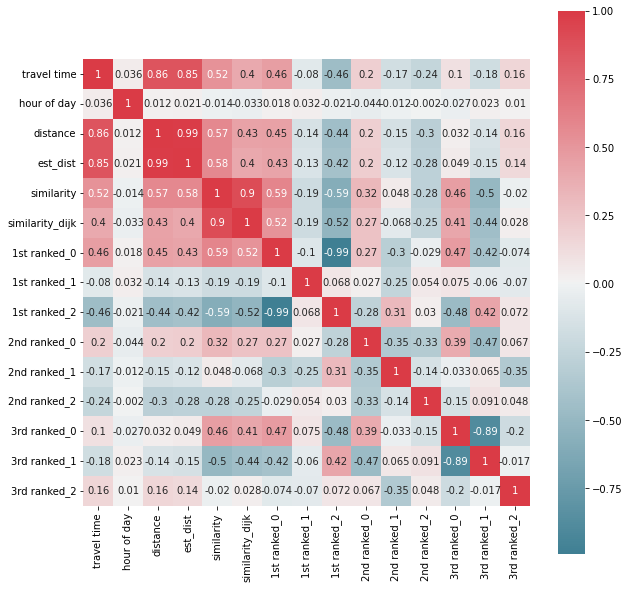

In [108]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(10,10))
corr = df6.corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [109]:
x = np.array(df6[['est_dist','1st ranked_0','1st ranked_1','1st ranked_2','2nd ranked_0','2nd ranked_1','2nd ranked_2','3rd ranked_0','3rd ranked_1','3rd ranked_2']])
# x = np.array(df1.iloc[:,1:])
y = np.array(df6['travel time'])
x.shape

(15949, 10)

In [110]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [111]:
print(X_train.shape)
print(X_test.shape)
# X_train

(12759, 10)
(3190, 10)


In [112]:
# inputs: distance + hour + 1st & 2nd & 3rd dominant road
model4_4_1 = nnmodel(50, num_hlayers=1,Epoch=500)
model4_4_1

Epoch 1/500
399/399 [==============================] - 1s 884us/step - loss: 1001011.5625 - mape: 97.0243 - rmse: 1000.5057 - val_loss: 974738.1875 - val_mape: 91.4280 - val_rmse: 987.2883
Epoch 2/500
399/399 [==============================] - 0s 738us/step - loss: 828394.8750 - mape: 79.8448 - rmse: 910.1620 - val_loss: 730963.3125 - val_mape: 66.5019 - val_rmse: 854.9639
Epoch 3/500
399/399 [==============================] - 0s 736us/step - loss: 578263.4375 - mape: 51.5901 - rmse: 760.4363 - val_loss: 484273.4375 - val_mape: 42.2870 - val_rmse: 695.8976
Epoch 4/500
399/399 [==============================] - 0s 722us/step - loss: 383527.4062 - mape: 43.3977 - rmse: 619.2959 - val_loss: 331341.0000 - val_mape: 48.1917 - val_rmse: 575.6223
Epoch 5/500
399/399 [==============================] - 0s 727us/step - loss: 285005.7500 - mape: 52.7378 - rmse: 533.8593 - val_loss: 266614.4375 - val_mape: 56.5531 - val_rmse: 516.3472
Epoch 6/500
399/399 [==============================] - 0s 719us

Epoch 45/500
399/399 [==============================] - 0s 727us/step - loss: 68575.1875 - mape: 24.1064 - rmse: 261.8687 - val_loss: 71007.2109 - val_mape: 23.6957 - val_rmse: 266.4718
Epoch 46/500
399/399 [==============================] - 0s 705us/step - loss: 68535.1328 - mape: 24.1615 - rmse: 261.7921 - val_loss: 70991.8438 - val_mape: 23.7442 - val_rmse: 266.4429
Epoch 47/500
399/399 [==============================] - 0s 736us/step - loss: 68494.9062 - mape: 24.0707 - rmse: 261.7153 - val_loss: 71033.5781 - val_mape: 24.0785 - val_rmse: 266.5212
Epoch 48/500
399/399 [==============================] - 0s 706us/step - loss: 68488.1094 - mape: 24.2146 - rmse: 261.7023 - val_loss: 70958.1953 - val_mape: 23.1855 - val_rmse: 266.3798
Epoch 49/500
399/399 [==============================] - 0s 720us/step - loss: 68480.1328 - mape: 23.9808 - rmse: 261.6871 - val_loss: 70940.6328 - val_mape: 23.4248 - val_rmse: 266.3468
Epoch 50/500
399/399 [==============================] - 0s 722us/step 

399/399 [==============================] - 0s 711us/step - loss: 68330.7031 - mape: 23.9339 - rmse: 261.4014 - val_loss: 70861.8203 - val_mape: 23.7983 - val_rmse: 266.1988
Epoch 90/500
399/399 [==============================] - 0s 759us/step - loss: 68334.9219 - mape: 23.9789 - rmse: 261.4095 - val_loss: 70859.0078 - val_mape: 23.8076 - val_rmse: 266.1935
Epoch 91/500
399/399 [==============================] - 0s 720us/step - loss: 68336.8828 - mape: 24.0017 - rmse: 261.4132 - val_loss: 70867.4688 - val_mape: 23.7943 - val_rmse: 266.2094
Epoch 92/500
399/399 [==============================] - 0s 696us/step - loss: 68316.7109 - mape: 23.9407 - rmse: 261.3747 - val_loss: 70863.6328 - val_mape: 23.9013 - val_rmse: 266.2022
Epoch 93/500
399/399 [==============================] - 0s 713us/step - loss: 68335.8281 - mape: 24.0236 - rmse: 261.4112 - val_loss: 70823.8125 - val_mape: 23.1394 - val_rmse: 266.1274
Epoch 94/500
399/399 [==============================] - 0s 709us/step - loss: 68330

Epoch 133/500
399/399 [==============================] - 0s 729us/step - loss: 68210.9219 - mape: 23.9610 - rmse: 261.1722 - val_loss: 70705.0000 - val_mape: 23.1560 - val_rmse: 265.9041
Epoch 134/500
399/399 [==============================] - 0s 714us/step - loss: 68219.6406 - mape: 23.8942 - rmse: 261.1889 - val_loss: 70692.1484 - val_mape: 23.1552 - val_rmse: 265.8799
Epoch 135/500
399/399 [==============================] - 0s 739us/step - loss: 68198.7031 - mape: 23.8555 - rmse: 261.1488 - val_loss: 70685.3594 - val_mape: 23.5236 - val_rmse: 265.8672
Epoch 136/500
399/399 [==============================] - 0s 728us/step - loss: 68178.4297 - mape: 24.0228 - rmse: 261.1100 - val_loss: 70677.0547 - val_mape: 23.3618 - val_rmse: 265.8516
Epoch 137/500
399/399 [==============================] - 0s 703us/step - loss: 68164.8984 - mape: 23.9222 - rmse: 261.0841 - val_loss: 70671.5625 - val_mape: 23.3861 - val_rmse: 265.8412
Epoch 138/500
399/399 [==============================] - 0s 716us

Epoch 177/500
399/399 [==============================] - 0s 746us/step - loss: 67558.1328 - mape: 23.7080 - rmse: 259.9195 - val_loss: 70083.6094 - val_mape: 23.3126 - val_rmse: 264.7331
Epoch 178/500
399/399 [==============================] - 0s 711us/step - loss: 67563.8516 - mape: 23.7758 - rmse: 259.9305 - val_loss: 70076.0859 - val_mape: 22.7101 - val_rmse: 264.7189
Epoch 179/500
399/399 [==============================] - 0s 715us/step - loss: 67546.9531 - mape: 23.4872 - rmse: 259.8980 - val_loss: 70123.7266 - val_mape: 23.9150 - val_rmse: 264.8088
Epoch 180/500
399/399 [==============================] - 0s 706us/step - loss: 67518.5781 - mape: 23.8325 - rmse: 259.8434 - val_loss: 70078.1016 - val_mape: 22.4995 - val_rmse: 264.7227
Epoch 181/500
399/399 [==============================] - 0s 733us/step - loss: 67509.1172 - mape: 23.4830 - rmse: 259.8252 - val_loss: 70118.6328 - val_mape: 23.9564 - val_rmse: 264.7992
Epoch 182/500
399/399 [==============================] - 0s 729us

Epoch 221/500
399/399 [==============================] - 0s 702us/step - loss: 67163.2344 - mape: 23.3687 - rmse: 259.1587 - val_loss: 69717.6953 - val_mape: 23.2555 - val_rmse: 264.0411
Epoch 222/500
399/399 [==============================] - 0s 713us/step - loss: 67165.2578 - mape: 23.5000 - rmse: 259.1626 - val_loss: 69698.1953 - val_mape: 22.9325 - val_rmse: 264.0042
Epoch 223/500
399/399 [==============================] - 0s 715us/step - loss: 67168.3438 - mape: 23.4816 - rmse: 259.1685 - val_loss: 69693.6250 - val_mape: 23.0946 - val_rmse: 263.9955
Epoch 224/500
399/399 [==============================] - 0s 776us/step - loss: 67153.1562 - mape: 23.4411 - rmse: 259.1393 - val_loss: 69714.7812 - val_mape: 23.3829 - val_rmse: 264.0356
Epoch 225/500
399/399 [==============================] - 0s 745us/step - loss: 67143.0625 - mape: 23.5929 - rmse: 259.1198 - val_loss: 69687.1406 - val_mape: 22.6748 - val_rmse: 263.9832
Epoch 226/500
399/399 [==============================] - 0s 724us

Epoch 265/500
399/399 [==============================] - 0s 760us/step - loss: 67009.9141 - mape: 23.3808 - rmse: 258.8627 - val_loss: 69583.5469 - val_mape: 22.3985 - val_rmse: 263.7869
Epoch 266/500
399/399 [==============================] - 0s 728us/step - loss: 66993.2188 - mape: 23.3007 - rmse: 258.8305 - val_loss: 69703.0391 - val_mape: 23.8864 - val_rmse: 264.0133
Epoch 267/500
399/399 [==============================] - 0s 727us/step - loss: 67006.7031 - mape: 23.5196 - rmse: 258.8565 - val_loss: 69554.2188 - val_mape: 22.8284 - val_rmse: 263.7313
Epoch 268/500
399/399 [==============================] - 0s 708us/step - loss: 67009.1016 - mape: 23.3328 - rmse: 258.8612 - val_loss: 69596.7109 - val_mape: 23.2383 - val_rmse: 263.8119
Epoch 269/500
399/399 [==============================] - 0s 727us/step - loss: 66995.1719 - mape: 23.2715 - rmse: 258.8343 - val_loss: 69706.2656 - val_mape: 23.8912 - val_rmse: 264.0194
Epoch 270/500
399/399 [==============================] - 0s 735us

Epoch 309/500
399/399 [==============================] - 0s 732us/step - loss: 66929.0156 - mape: 23.3736 - rmse: 258.7064 - val_loss: 69531.9297 - val_mape: 23.3537 - val_rmse: 263.6891
Epoch 310/500
399/399 [==============================] - 0s 724us/step - loss: 66919.6172 - mape: 23.3032 - rmse: 258.6883 - val_loss: 69534.1406 - val_mape: 23.4681 - val_rmse: 263.6933
Epoch 311/500
399/399 [==============================] - 0s 723us/step - loss: 66919.0859 - mape: 23.2973 - rmse: 258.6872 - val_loss: 69587.4688 - val_mape: 23.7035 - val_rmse: 263.7944
Epoch 312/500
399/399 [==============================] - 0s 740us/step - loss: 66929.9688 - mape: 23.3860 - rmse: 258.7083 - val_loss: 69628.0547 - val_mape: 23.7728 - val_rmse: 263.8713
Epoch 313/500
399/399 [==============================] - 0s 720us/step - loss: 66912.9844 - mape: 23.4169 - rmse: 258.6754 - val_loss: 69479.7344 - val_mape: 22.6105 - val_rmse: 263.5901
Epoch 314/500
399/399 [==============================] - 0s 718us

Epoch 353/500
399/399 [==============================] - 0s 727us/step - loss: 66880.7344 - mape: 23.2025 - rmse: 258.6131 - val_loss: 69463.1172 - val_mape: 23.2642 - val_rmse: 263.5586
Epoch 354/500
399/399 [==============================] - 0s 769us/step - loss: 66859.5781 - mape: 23.3386 - rmse: 258.5722 - val_loss: 69426.7500 - val_mape: 22.7036 - val_rmse: 263.4896
Epoch 355/500
399/399 [==============================] - 0s 733us/step - loss: 66874.3438 - mape: 23.2353 - rmse: 258.6007 - val_loss: 69470.3828 - val_mape: 23.2650 - val_rmse: 263.5724
Epoch 356/500
399/399 [==============================] - 0s 719us/step - loss: 66871.4844 - mape: 23.2813 - rmse: 258.5952 - val_loss: 69483.1797 - val_mape: 23.3950 - val_rmse: 263.5966
Epoch 357/500
399/399 [==============================] - 0s 721us/step - loss: 66848.0781 - mape: 23.2443 - rmse: 258.5500 - val_loss: 69624.1172 - val_mape: 23.9644 - val_rmse: 263.8638
Epoch 358/500
399/399 [==============================] - 0s 728us

Epoch 397/500
399/399 [==============================] - 0s 723us/step - loss: 66822.2578 - mape: 23.2688 - rmse: 258.5000 - val_loss: 69412.2500 - val_mape: 23.1376 - val_rmse: 263.4620
Epoch 398/500
399/399 [==============================] - 0s 741us/step - loss: 66830.4062 - mape: 23.2961 - rmse: 258.5158 - val_loss: 69397.5000 - val_mape: 22.9681 - val_rmse: 263.4341
Epoch 399/500
399/399 [==============================] - 0s 723us/step - loss: 66833.6094 - mape: 23.2815 - rmse: 258.5220 - val_loss: 69391.3984 - val_mape: 22.5799 - val_rmse: 263.4225
Epoch 400/500
399/399 [==============================] - 0s 735us/step - loss: 66777.7969 - mape: 23.1166 - rmse: 258.4140 - val_loss: 69525.2344 - val_mape: 23.8412 - val_rmse: 263.6764
Epoch 401/500
399/399 [==============================] - 0s 727us/step - loss: 66829.9922 - mape: 23.4651 - rmse: 258.5150 - val_loss: 69378.8906 - val_mape: 22.6519 - val_rmse: 263.3987
Epoch 402/500
399/399 [==============================] - 0s 755us

Epoch 441/500
399/399 [==============================] - 0s 704us/step - loss: 66809.8984 - mape: 23.1774 - rmse: 258.4761 - val_loss: 69369.1562 - val_mape: 23.0704 - val_rmse: 263.3802
Epoch 442/500
399/399 [==============================] - 0s 722us/step - loss: 66794.3438 - mape: 23.3573 - rmse: 258.4460 - val_loss: 69358.6797 - val_mape: 22.5399 - val_rmse: 263.3604
Epoch 443/500
399/399 [==============================] - 0s 699us/step - loss: 66770.4062 - mape: 23.0722 - rmse: 258.3997 - val_loss: 69599.1953 - val_mape: 24.1470 - val_rmse: 263.8166
Epoch 444/500
399/399 [==============================] - 0s 712us/step - loss: 66786.0312 - mape: 23.4024 - rmse: 258.4299 - val_loss: 69361.0469 - val_mape: 22.7836 - val_rmse: 263.3649
Epoch 445/500
399/399 [==============================] - 0s 722us/step - loss: 66766.5547 - mape: 23.2275 - rmse: 258.3922 - val_loss: 69406.0078 - val_mape: 23.2754 - val_rmse: 263.4502
Epoch 446/500
399/399 [==============================] - 0s 717us

Epoch 485/500
399/399 [==============================] - 0s 733us/step - loss: 66759.1328 - mape: 23.2804 - rmse: 258.3779 - val_loss: 69335.5547 - val_mape: 22.4219 - val_rmse: 263.3165
Epoch 486/500
399/399 [==============================] - 0s 759us/step - loss: 66768.3359 - mape: 23.2400 - rmse: 258.3957 - val_loss: 69320.0234 - val_mape: 22.6315 - val_rmse: 263.2870
Epoch 487/500
399/399 [==============================] - 0s 723us/step - loss: 66776.1172 - mape: 23.2778 - rmse: 258.4108 - val_loss: 69333.0938 - val_mape: 22.8573 - val_rmse: 263.3118
Epoch 488/500
399/399 [==============================] - 0s 729us/step - loss: 66761.3438 - mape: 23.2642 - rmse: 258.3822 - val_loss: 69331.7344 - val_mape: 22.5222 - val_rmse: 263.3092
Epoch 489/500
399/399 [==============================] - 0s 738us/step - loss: 66774.3359 - mape: 23.1669 - rmse: 258.4073 - val_loss: 69369.5469 - val_mape: 23.2047 - val_rmse: 263.3810
Epoch 490/500
399/399 [==============================] - 0s 703us

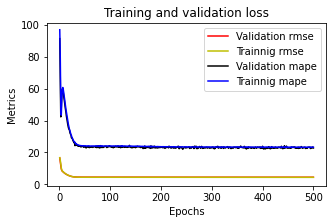

In [113]:
plotme(model4_4_1)
    

In [114]:
# inputs: distance + hour + 1st & 2nd & 3rd dominant road
model4_4_2 = nnmodel(100, num_hlayers=1,Epoch=500)
model4_4_2

Epoch 1/500
399/399 [==============================] - 1s 910us/step - loss: 962491.6250 - mape: 93.2349 - rmse: 981.0666 - val_loss: 860069.6875 - val_mape: 80.2672 - val_rmse: 927.3994
Epoch 2/500
399/399 [==============================] - 0s 771us/step - loss: 635560.6250 - mape: 58.1158 - rmse: 797.2206 - val_loss: 472172.5312 - val_mape: 41.9890 - val_rmse: 687.1481
Epoch 3/500
399/399 [==============================] - 0s 737us/step - loss: 343450.5000 - mape: 46.5470 - rmse: 586.0465 - val_loss: 281557.2812 - val_mape: 54.4800 - val_rmse: 530.6197
Epoch 4/500
399/399 [==============================] - 0s 731us/step - loss: 250384.5156 - mape: 58.8383 - rmse: 500.3844 - val_loss: 236887.7969 - val_mape: 59.7173 - val_rmse: 486.7112
Epoch 5/500
399/399 [==============================] - 0s 760us/step - loss: 220759.0625 - mape: 59.9590 - rmse: 469.8500 - val_loss: 210772.0000 - val_mape: 57.6633 - val_rmse: 459.0991
Epoch 6/500
399/399 [==============================] - 0s 757us/s

Epoch 45/500
399/399 [==============================] - 0s 758us/step - loss: 67945.0312 - mape: 23.6880 - rmse: 260.6627 - val_loss: 70470.8672 - val_mape: 23.5752 - val_rmse: 265.4635
Epoch 46/500
399/399 [==============================] - 0s 759us/step - loss: 67872.5781 - mape: 23.8141 - rmse: 260.5237 - val_loss: 70417.4062 - val_mape: 23.2231 - val_rmse: 265.3628
Epoch 47/500
399/399 [==============================] - 0s 747us/step - loss: 67836.3750 - mape: 23.8241 - rmse: 260.4542 - val_loss: 70376.8828 - val_mape: 23.0917 - val_rmse: 265.2864
Epoch 48/500
399/399 [==============================] - 0s 753us/step - loss: 67803.1406 - mape: 23.7916 - rmse: 260.3904 - val_loss: 70391.5938 - val_mape: 23.4106 - val_rmse: 265.3141
Epoch 49/500
399/399 [==============================] - 0s 773us/step - loss: 67777.5156 - mape: 23.8182 - rmse: 260.3412 - val_loss: 70359.1797 - val_mape: 22.6271 - val_rmse: 265.2531
Epoch 50/500
399/399 [==============================] - 0s 759us/step 

399/399 [==============================] - 0s 767us/step - loss: 66941.2344 - mape: 23.4200 - rmse: 258.7300 - val_loss: 69625.1484 - val_mape: 23.2518 - val_rmse: 263.8658
Epoch 90/500
399/399 [==============================] - 0s 758us/step - loss: 66920.7188 - mape: 23.4414 - rmse: 258.6904 - val_loss: 69595.0547 - val_mape: 23.0648 - val_rmse: 263.8087
Epoch 91/500
399/399 [==============================] - 0s 746us/step - loss: 66916.1797 - mape: 23.4738 - rmse: 258.6816 - val_loss: 69608.0156 - val_mape: 23.3628 - val_rmse: 263.8333
Epoch 92/500
399/399 [==============================] - 0s 747us/step - loss: 66911.3516 - mape: 23.4734 - rmse: 258.6723 - val_loss: 69574.0234 - val_mape: 22.7079 - val_rmse: 263.7689
Epoch 93/500
399/399 [==============================] - 0s 738us/step - loss: 66894.7656 - mape: 23.4029 - rmse: 258.6402 - val_loss: 69559.7109 - val_mape: 22.8289 - val_rmse: 263.7418
Epoch 94/500
399/399 [==============================] - 0s 754us/step - loss: 66841

Epoch 133/500
399/399 [==============================] - 0s 760us/step - loss: 66618.1562 - mape: 23.2573 - rmse: 258.1049 - val_loss: 69366.5234 - val_mape: 23.1112 - val_rmse: 263.3752
Epoch 134/500
399/399 [==============================] - 0s 761us/step - loss: 66616.6562 - mape: 23.3465 - rmse: 258.1020 - val_loss: 69365.0781 - val_mape: 22.8073 - val_rmse: 263.3725
Epoch 135/500
399/399 [==============================] - 0s 731us/step - loss: 66605.0078 - mape: 23.3360 - rmse: 258.0795 - val_loss: 69346.7109 - val_mape: 22.9398 - val_rmse: 263.3376
Epoch 136/500
399/399 [==============================] - 0s 732us/step - loss: 66576.6016 - mape: 23.2029 - rmse: 258.0244 - val_loss: 69635.0312 - val_mape: 24.3299 - val_rmse: 263.8845
Epoch 137/500
399/399 [==============================] - 0s 728us/step - loss: 66618.7812 - mape: 23.5331 - rmse: 258.1061 - val_loss: 69351.1641 - val_mape: 22.3846 - val_rmse: 263.3461
Epoch 138/500
399/399 [==============================] - 0s 750us

Epoch 177/500
399/399 [==============================] - 0s 721us/step - loss: 66490.7344 - mape: 23.3461 - rmse: 257.8580 - val_loss: 69457.1328 - val_mape: 23.9309 - val_rmse: 263.5472
Epoch 178/500
399/399 [==============================] - 0s 739us/step - loss: 66471.7109 - mape: 23.3169 - rmse: 257.8211 - val_loss: 69230.3359 - val_mape: 22.8948 - val_rmse: 263.1166
Epoch 179/500
399/399 [==============================] - 0s 710us/step - loss: 66457.4297 - mape: 23.3015 - rmse: 257.7934 - val_loss: 69328.6641 - val_mape: 23.6037 - val_rmse: 263.3034
Epoch 180/500
399/399 [==============================] - 0s 738us/step - loss: 66446.0938 - mape: 23.2916 - rmse: 257.7714 - val_loss: 69209.2031 - val_mape: 22.5887 - val_rmse: 263.0764
Epoch 181/500
399/399 [==============================] - 0s 758us/step - loss: 66442.3516 - mape: 23.2647 - rmse: 257.7641 - val_loss: 69219.3594 - val_mape: 22.6110 - val_rmse: 263.0957
Epoch 182/500
399/399 [==============================] - 0s 710us

Epoch 221/500
399/399 [==============================] - 0s 732us/step - loss: 66387.9219 - mape: 23.1845 - rmse: 257.6585 - val_loss: 69242.3750 - val_mape: 23.2821 - val_rmse: 263.1395
Epoch 222/500
399/399 [==============================] - 0s 706us/step - loss: 66375.9688 - mape: 23.2239 - rmse: 257.6353 - val_loss: 69162.8125 - val_mape: 23.2828 - val_rmse: 262.9883
Epoch 223/500
399/399 [==============================] - 0s 735us/step - loss: 66383.5078 - mape: 23.2175 - rmse: 257.6500 - val_loss: 69343.9219 - val_mape: 23.9698 - val_rmse: 263.3323
Epoch 224/500
399/399 [==============================] - 0s 762us/step - loss: 66408.7578 - mape: 23.3850 - rmse: 257.6990 - val_loss: 69144.5938 - val_mape: 22.7267 - val_rmse: 262.9536
Epoch 225/500
399/399 [==============================] - 0s 709us/step - loss: 66382.2656 - mape: 23.3181 - rmse: 257.6476 - val_loss: 69140.8359 - val_mape: 22.6731 - val_rmse: 262.9464
Epoch 226/500
399/399 [==============================] - 0s 728us

Epoch 265/500
399/399 [==============================] - 0s 713us/step - loss: 66301.4609 - mape: 23.2397 - rmse: 257.4907 - val_loss: 69073.7422 - val_mape: 22.8389 - val_rmse: 262.8188
Epoch 266/500
399/399 [==============================] - 0s 719us/step - loss: 66308.5703 - mape: 23.1919 - rmse: 257.5045 - val_loss: 69121.0469 - val_mape: 23.2919 - val_rmse: 262.9088
Epoch 267/500
399/399 [==============================] - 0s 711us/step - loss: 66284.8906 - mape: 23.1615 - rmse: 257.4585 - val_loss: 69301.3594 - val_mape: 24.0480 - val_rmse: 263.2515
Epoch 268/500
399/399 [==============================] - 0s 727us/step - loss: 66309.2031 - mape: 23.3310 - rmse: 257.5057 - val_loss: 69059.6172 - val_mape: 22.8003 - val_rmse: 262.7920
Epoch 269/500
399/399 [==============================] - 0s 733us/step - loss: 66312.9297 - mape: 23.2966 - rmse: 257.5130 - val_loss: 69061.3281 - val_mape: 22.7133 - val_rmse: 262.7952
Epoch 270/500
399/399 [==============================] - 0s 753us

Epoch 309/500
399/399 [==============================] - 0s 747us/step - loss: 66228.6875 - mape: 23.1507 - rmse: 257.3493 - val_loss: 69002.3672 - val_mape: 22.9933 - val_rmse: 262.6830
Epoch 310/500
399/399 [==============================] - 0s 726us/step - loss: 66223.3125 - mape: 23.2796 - rmse: 257.3389 - val_loss: 68991.1172 - val_mape: 22.3922 - val_rmse: 262.6616
Epoch 311/500
399/399 [==============================] - 0s 752us/step - loss: 66221.5234 - mape: 23.1540 - rmse: 257.3354 - val_loss: 69003.1328 - val_mape: 23.0723 - val_rmse: 262.6845
Epoch 312/500
399/399 [==============================] - 0s 729us/step - loss: 66230.7422 - mape: 23.3055 - rmse: 257.3533 - val_loss: 69039.8203 - val_mape: 23.0227 - val_rmse: 262.7543
Epoch 313/500
399/399 [==============================] - 0s 732us/step - loss: 66222.4219 - mape: 23.1469 - rmse: 257.3372 - val_loss: 69035.3828 - val_mape: 23.3460 - val_rmse: 262.7458
Epoch 314/500
399/399 [==============================] - 0s 717us

Epoch 353/500
399/399 [==============================] - 0s 728us/step - loss: 66174.8438 - mape: 23.2415 - rmse: 257.2447 - val_loss: 68960.5312 - val_mape: 23.1009 - val_rmse: 262.6034
Epoch 354/500
399/399 [==============================] - 0s 737us/step - loss: 66194.0469 - mape: 23.2987 - rmse: 257.2820 - val_loss: 69033.9453 - val_mape: 21.8163 - val_rmse: 262.7431
Epoch 355/500
399/399 [==============================] - 0s 719us/step - loss: 66206.5078 - mape: 23.2140 - rmse: 257.3062 - val_loss: 68959.6562 - val_mape: 22.3962 - val_rmse: 262.6017
Epoch 356/500
399/399 [==============================] - 0s 718us/step - loss: 66202.8438 - mape: 23.2373 - rmse: 257.2991 - val_loss: 68963.4141 - val_mape: 22.7833 - val_rmse: 262.6089
Epoch 357/500
399/399 [==============================] - 0s 760us/step - loss: 66178.9609 - mape: 23.2124 - rmse: 257.2527 - val_loss: 68970.7734 - val_mape: 22.1358 - val_rmse: 262.6229
Epoch 358/500
399/399 [==============================] - 0s 763us

Epoch 397/500
399/399 [==============================] - 0s 777us/step - loss: 66153.9219 - mape: 23.1614 - rmse: 257.2040 - val_loss: 68976.1484 - val_mape: 23.2916 - val_rmse: 262.6331
Epoch 398/500
399/399 [==============================] - 0s 719us/step - loss: 66138.8594 - mape: 23.2894 - rmse: 257.1748 - val_loss: 68935.6406 - val_mape: 22.6378 - val_rmse: 262.5560
Epoch 399/500
399/399 [==============================] - 0s 733us/step - loss: 66152.6484 - mape: 23.1802 - rmse: 257.2016 - val_loss: 68941.5391 - val_mape: 22.6882 - val_rmse: 262.5672
Epoch 400/500
399/399 [==============================] - 0s 744us/step - loss: 66162.7266 - mape: 23.1882 - rmse: 257.2212 - val_loss: 68936.6328 - val_mape: 22.9733 - val_rmse: 262.5579
Epoch 401/500
399/399 [==============================] - 0s 731us/step - loss: 66170.0703 - mape: 23.1956 - rmse: 257.2354 - val_loss: 68978.2031 - val_mape: 23.1601 - val_rmse: 262.6370
Epoch 402/500
399/399 [==============================] - 0s 754us

Epoch 441/500
399/399 [==============================] - 0s 783us/step - loss: 66132.5781 - mape: 23.2637 - rmse: 257.1626 - val_loss: 68984.8047 - val_mape: 23.4722 - val_rmse: 262.6496
Epoch 442/500
399/399 [==============================] - 0s 738us/step - loss: 66135.0547 - mape: 23.2112 - rmse: 257.1674 - val_loss: 69033.0938 - val_mape: 23.4921 - val_rmse: 262.7415
Epoch 443/500
399/399 [==============================] - 0s 752us/step - loss: 66125.2734 - mape: 23.2317 - rmse: 257.1483 - val_loss: 68933.7891 - val_mape: 23.0353 - val_rmse: 262.5525
Epoch 444/500
399/399 [==============================] - 0s 732us/step - loss: 66098.3438 - mape: 23.1566 - rmse: 257.0960 - val_loss: 68912.0547 - val_mape: 23.0402 - val_rmse: 262.5110
Epoch 445/500
399/399 [==============================] - 0s 725us/step - loss: 66130.0469 - mape: 23.1613 - rmse: 257.1576 - val_loss: 69039.8125 - val_mape: 23.6436 - val_rmse: 262.7543
Epoch 446/500
399/399 [==============================] - 0s 740us

Epoch 485/500
399/399 [==============================] - 0s 784us/step - loss: 66109.2656 - mape: 23.1881 - rmse: 257.1172 - val_loss: 68901.8672 - val_mape: 23.1309 - val_rmse: 262.4916
Epoch 486/500
399/399 [==============================] - 0s 758us/step - loss: 66137.5391 - mape: 23.1814 - rmse: 257.1722 - val_loss: 68908.7969 - val_mape: 23.0563 - val_rmse: 262.5049
Epoch 487/500
399/399 [==============================] - 0s 752us/step - loss: 66098.8750 - mape: 23.1352 - rmse: 257.0970 - val_loss: 69103.4375 - val_mape: 23.8258 - val_rmse: 262.8753
Epoch 488/500
399/399 [==============================] - 0s 748us/step - loss: 66120.9141 - mape: 23.2186 - rmse: 257.1399 - val_loss: 68879.6797 - val_mape: 22.4700 - val_rmse: 262.4494
Epoch 489/500
399/399 [==============================] - 0s 742us/step - loss: 66120.5391 - mape: 23.3107 - rmse: 257.1391 - val_loss: 68886.2109 - val_mape: 22.6942 - val_rmse: 262.4618
Epoch 490/500
399/399 [==============================] - 0s 732us

In [115]:
# inputs: distance + hour + 1st & 2nd & 3rd dominant road
model4_4_3 = nnmodel(200, num_hlayers=1,Epoch=500)
model4_4_3

Epoch 1/500
399/399 [==============================] - 1s 904us/step - loss: 907316.4375 - mape: 87.5366 - rmse: 952.5316 - val_loss: 707909.6875 - val_mape: 63.8191 - val_rmse: 841.3737
Epoch 2/500
399/399 [==============================] - 0s 734us/step - loss: 451755.8438 - mape: 47.2520 - rmse: 672.1279 - val_loss: 307125.8438 - val_mape: 50.7110 - val_rmse: 554.1893
Epoch 3/500
399/399 [==============================] - 0s 762us/step - loss: 254688.7969 - mape: 57.8254 - rmse: 504.6670 - val_loss: 232813.4375 - val_mape: 59.4408 - val_rmse: 482.5074
Epoch 4/500
399/399 [==============================] - 0s 762us/step - loss: 212668.2812 - mape: 58.8682 - rmse: 461.1597 - val_loss: 198798.4688 - val_mape: 55.1240 - val_rmse: 445.8682
Epoch 5/500
399/399 [==============================] - 0s 753us/step - loss: 180677.1562 - mape: 53.4550 - rmse: 425.0614 - val_loss: 168928.4844 - val_mape: 50.0190 - val_rmse: 411.0091
Epoch 6/500
399/399 [==============================] - 0s 760us/s

Epoch 45/500
399/399 [==============================] - 0s 753us/step - loss: 67766.8672 - mape: 23.8911 - rmse: 260.3207 - val_loss: 70339.3047 - val_mape: 22.3254 - val_rmse: 265.2156
Epoch 46/500
399/399 [==============================] - 0s 746us/step - loss: 67758.5000 - mape: 23.7234 - rmse: 260.3046 - val_loss: 70272.9453 - val_mape: 23.5440 - val_rmse: 265.0905
Epoch 47/500
399/399 [==============================] - 0s 749us/step - loss: 67685.4141 - mape: 23.6342 - rmse: 260.1642 - val_loss: 70443.2344 - val_mape: 24.4764 - val_rmse: 265.4114
Epoch 48/500
399/399 [==============================] - 0s 755us/step - loss: 67671.8359 - mape: 23.7648 - rmse: 260.1381 - val_loss: 70224.3203 - val_mape: 23.8899 - val_rmse: 264.9987
Epoch 49/500
399/399 [==============================] - 0s 744us/step - loss: 67653.4766 - mape: 23.7999 - rmse: 260.1028 - val_loss: 70140.5469 - val_mape: 23.2007 - val_rmse: 264.8406
Epoch 50/500
399/399 [==============================] - 0s 762us/step 

399/399 [==============================] - 0s 749us/step - loss: 66942.1719 - mape: 23.3970 - rmse: 258.7318 - val_loss: 69546.7031 - val_mape: 22.9634 - val_rmse: 263.7171
Epoch 90/500
399/399 [==============================] - 0s 763us/step - loss: 66885.2422 - mape: 23.5005 - rmse: 258.6218 - val_loss: 69588.5859 - val_mape: 22.1811 - val_rmse: 263.7965
Epoch 91/500
399/399 [==============================] - 0s 741us/step - loss: 66946.3438 - mape: 23.4410 - rmse: 258.7399 - val_loss: 69550.8047 - val_mape: 22.4869 - val_rmse: 263.7249
Epoch 92/500
399/399 [==============================] - 0s 756us/step - loss: 66901.8750 - mape: 23.3280 - rmse: 258.6540 - val_loss: 69598.6953 - val_mape: 23.7065 - val_rmse: 263.8156
Epoch 93/500
399/399 [==============================] - 0s 754us/step - loss: 66893.8672 - mape: 23.5427 - rmse: 258.6385 - val_loss: 69555.2812 - val_mape: 22.5219 - val_rmse: 263.7333
Epoch 94/500
399/399 [==============================] - 0s 765us/step - loss: 66864

Epoch 133/500
399/399 [==============================] - 0s 775us/step - loss: 66661.6797 - mape: 23.3215 - rmse: 258.1892 - val_loss: 69366.7969 - val_mape: 22.8078 - val_rmse: 263.3758
Epoch 134/500
399/399 [==============================] - 0s 774us/step - loss: 66721.3750 - mape: 23.3785 - rmse: 258.3048 - val_loss: 69405.7031 - val_mape: 23.1777 - val_rmse: 263.4496
Epoch 135/500
399/399 [==============================] - 0s 786us/step - loss: 66713.7812 - mape: 23.3649 - rmse: 258.2901 - val_loss: 69367.3750 - val_mape: 22.9456 - val_rmse: 263.3769
Epoch 136/500
399/399 [==============================] - 0s 746us/step - loss: 66717.0156 - mape: 23.4622 - rmse: 258.2964 - val_loss: 69383.0156 - val_mape: 22.5656 - val_rmse: 263.4066
Epoch 137/500
399/399 [==============================] - 0s 735us/step - loss: 66669.2344 - mape: 23.2493 - rmse: 258.2039 - val_loss: 69605.0781 - val_mape: 24.2318 - val_rmse: 263.8277
Epoch 138/500
399/399 [==============================] - 0s 734us

Epoch 177/500
399/399 [==============================] - 0s 749us/step - loss: 66585.9688 - mape: 23.4111 - rmse: 258.0426 - val_loss: 69326.9688 - val_mape: 22.7341 - val_rmse: 263.3001
Epoch 178/500
399/399 [==============================] - 0s 749us/step - loss: 66596.7812 - mape: 23.3501 - rmse: 258.0635 - val_loss: 69297.4922 - val_mape: 23.1213 - val_rmse: 263.2442
Epoch 179/500
399/399 [==============================] - 0s 722us/step - loss: 66578.7656 - mape: 23.4380 - rmse: 258.0286 - val_loss: 69375.6484 - val_mape: 23.2289 - val_rmse: 263.3926
Epoch 180/500
399/399 [==============================] - 0s 728us/step - loss: 66580.7891 - mape: 23.3212 - rmse: 258.0325 - val_loss: 69328.7734 - val_mape: 23.3319 - val_rmse: 263.3036
Epoch 181/500
399/399 [==============================] - 0s 750us/step - loss: 66538.4453 - mape: 23.4332 - rmse: 257.9505 - val_loss: 69310.5938 - val_mape: 22.5025 - val_rmse: 263.2690
Epoch 182/500
399/399 [==============================] - 0s 753us

Epoch 221/500
399/399 [==============================] - 0s 751us/step - loss: 66500.7578 - mape: 23.3945 - rmse: 257.8774 - val_loss: 69247.2266 - val_mape: 22.9092 - val_rmse: 263.1487
Epoch 222/500
399/399 [==============================] - 0s 756us/step - loss: 66509.6172 - mape: 23.3514 - rmse: 257.8946 - val_loss: 69232.0391 - val_mape: 23.0007 - val_rmse: 263.1198
Epoch 223/500
399/399 [==============================] - 0s 753us/step - loss: 66506.7734 - mape: 23.3299 - rmse: 257.8891 - val_loss: 69260.0000 - val_mape: 23.3999 - val_rmse: 263.1729
Epoch 224/500
399/399 [==============================] - 0s 753us/step - loss: 66490.3594 - mape: 23.3063 - rmse: 257.8572 - val_loss: 69498.2891 - val_mape: 24.1904 - val_rmse: 263.6253
Epoch 225/500
399/399 [==============================] - 0s 741us/step - loss: 66506.7422 - mape: 23.3801 - rmse: 257.8890 - val_loss: 69525.4609 - val_mape: 24.1942 - val_rmse: 263.6768
Epoch 226/500
399/399 [==============================] - 0s 754us

Epoch 265/500
399/399 [==============================] - 0s 742us/step - loss: 66461.2812 - mape: 23.3593 - rmse: 257.8008 - val_loss: 69276.0078 - val_mape: 23.6267 - val_rmse: 263.2034
Epoch 266/500
399/399 [==============================] - 0s 748us/step - loss: 66499.6953 - mape: 23.3857 - rmse: 257.8753 - val_loss: 69181.0234 - val_mape: 22.7656 - val_rmse: 263.0229
Epoch 267/500
399/399 [==============================] - 0s 760us/step - loss: 66486.6406 - mape: 23.4154 - rmse: 257.8500 - val_loss: 69198.4141 - val_mape: 22.6434 - val_rmse: 263.0559
Epoch 268/500
399/399 [==============================] - 0s 772us/step - loss: 66477.4844 - mape: 23.2990 - rmse: 257.8323 - val_loss: 69204.0391 - val_mape: 23.1887 - val_rmse: 263.0666
Epoch 269/500
399/399 [==============================] - 0s 753us/step - loss: 66470.0547 - mape: 23.3652 - rmse: 257.8179 - val_loss: 69195.0703 - val_mape: 22.8652 - val_rmse: 263.0496
Epoch 270/500
399/399 [==============================] - 0s 744us

Epoch 309/500
399/399 [==============================] - 0s 756us/step - loss: 66446.5312 - mape: 23.2711 - rmse: 257.7722 - val_loss: 69141.3359 - val_mape: 22.7181 - val_rmse: 262.9474
Epoch 310/500
399/399 [==============================] - 0s 748us/step - loss: 66447.4219 - mape: 23.4011 - rmse: 257.7740 - val_loss: 69151.0781 - val_mape: 22.8661 - val_rmse: 262.9659
Epoch 311/500
399/399 [==============================] - 0s 779us/step - loss: 66436.2266 - mape: 23.3088 - rmse: 257.7523 - val_loss: 69238.4609 - val_mape: 23.2796 - val_rmse: 263.1320
Epoch 312/500
399/399 [==============================] - 0s 743us/step - loss: 66443.0391 - mape: 23.3168 - rmse: 257.7655 - val_loss: 69198.7266 - val_mape: 23.3488 - val_rmse: 263.0565
Epoch 313/500
399/399 [==============================] - 0s 745us/step - loss: 66476.7500 - mape: 23.3050 - rmse: 257.8308 - val_loss: 69174.9766 - val_mape: 23.1800 - val_rmse: 263.0114
Epoch 314/500
399/399 [==============================] - 0s 742us

Epoch 353/500
399/399 [==============================] - 0s 747us/step - loss: 66447.5859 - mape: 23.3565 - rmse: 257.7743 - val_loss: 69126.1875 - val_mape: 23.1305 - val_rmse: 262.9186
Epoch 354/500
399/399 [==============================] - 0s 777us/step - loss: 66436.5625 - mape: 23.3310 - rmse: 257.7529 - val_loss: 69098.6406 - val_mape: 22.7601 - val_rmse: 262.8662
Epoch 355/500
399/399 [==============================] - 0s 763us/step - loss: 66400.3984 - mape: 23.3078 - rmse: 257.6827 - val_loss: 69117.5625 - val_mape: 22.5892 - val_rmse: 262.9022
Epoch 356/500
399/399 [==============================] - 0s 739us/step - loss: 66442.3047 - mape: 23.3180 - rmse: 257.7640 - val_loss: 69156.0391 - val_mape: 23.3671 - val_rmse: 262.9754
Epoch 357/500
399/399 [==============================] - 0s 769us/step - loss: 66339.4844 - mape: 23.3604 - rmse: 257.5645 - val_loss: 69136.4609 - val_mape: 22.7613 - val_rmse: 262.9381
Epoch 358/500
399/399 [==============================] - 0s 780us

Epoch 397/500
399/399 [==============================] - 0s 755us/step - loss: 66435.0703 - mape: 23.4242 - rmse: 257.7500 - val_loss: 69105.5625 - val_mape: 22.3612 - val_rmse: 262.8794
Epoch 398/500
399/399 [==============================] - 0s 748us/step - loss: 66398.2188 - mape: 23.2411 - rmse: 257.6785 - val_loss: 69119.0938 - val_mape: 23.1227 - val_rmse: 262.9051
Epoch 399/500
399/399 [==============================] - 0s 757us/step - loss: 66355.4219 - mape: 23.2762 - rmse: 257.5955 - val_loss: 69068.2500 - val_mape: 22.7469 - val_rmse: 262.8084
Epoch 400/500
399/399 [==============================] - 0s 761us/step - loss: 66365.2812 - mape: 23.3374 - rmse: 257.6146 - val_loss: 69075.6328 - val_mape: 22.5461 - val_rmse: 262.8224
Epoch 401/500
399/399 [==============================] - 0s 801us/step - loss: 66417.6797 - mape: 23.3199 - rmse: 257.7163 - val_loss: 69123.2266 - val_mape: 23.2219 - val_rmse: 262.9130
Epoch 402/500
399/399 [==============================] - 0s 743us

Epoch 441/500
399/399 [==============================] - 0s 766us/step - loss: 66366.7812 - mape: 23.3401 - rmse: 257.6175 - val_loss: 69250.6719 - val_mape: 21.5483 - val_rmse: 263.1552
Epoch 442/500
399/399 [==============================] - 0s 750us/step - loss: 66386.3906 - mape: 23.2554 - rmse: 257.6556 - val_loss: 69076.5078 - val_mape: 22.6295 - val_rmse: 262.8241
Epoch 443/500
399/399 [==============================] - 0s 742us/step - loss: 66376.0625 - mape: 23.2188 - rmse: 257.6355 - val_loss: 69221.3438 - val_mape: 23.9369 - val_rmse: 263.0995
Epoch 444/500
399/399 [==============================] - 0s 750us/step - loss: 66385.4609 - mape: 23.4854 - rmse: 257.6537 - val_loss: 69109.6875 - val_mape: 22.1845 - val_rmse: 262.8872
Epoch 445/500
399/399 [==============================] - 0s 772us/step - loss: 66379.3438 - mape: 23.3093 - rmse: 257.6419 - val_loss: 69093.1016 - val_mape: 22.2536 - val_rmse: 262.8557
Epoch 446/500
399/399 [==============================] - 0s 740us

Epoch 485/500
399/399 [==============================] - 0s 765us/step - loss: 66388.7656 - mape: 23.2743 - rmse: 257.6602 - val_loss: 69068.5781 - val_mape: 22.3772 - val_rmse: 262.8090
Epoch 486/500
399/399 [==============================] - 0s 730us/step - loss: 66369.2031 - mape: 23.2689 - rmse: 257.6222 - val_loss: 69059.6250 - val_mape: 22.8124 - val_rmse: 262.7920
Epoch 487/500
399/399 [==============================] - 0s 738us/step - loss: 66400.6875 - mape: 23.3228 - rmse: 257.6833 - val_loss: 69059.0391 - val_mape: 22.9665 - val_rmse: 262.7909
Epoch 488/500
399/399 [==============================] - 0s 734us/step - loss: 66323.7734 - mape: 23.3023 - rmse: 257.5340 - val_loss: 69192.9609 - val_mape: 23.8199 - val_rmse: 263.0456
Epoch 489/500
399/399 [==============================] - 0s 739us/step - loss: 66361.5469 - mape: 23.3723 - rmse: 257.6074 - val_loss: 69084.8984 - val_mape: 22.5751 - val_rmse: 262.8401
Epoch 490/500
399/399 [==============================] - 0s 796us

In [116]:
# inputs: distance + hour + 1st & 2nd & 3rd dominant road
model4_4_4 = nnmodel(100,50, num_hlayers=2,Epoch=500)
model4_4_4

Epoch 1/500
399/399 [==============================] - 1s 938us/step - loss: 559847.6875 - mape: 71.0805 - rmse: 748.2297 - val_loss: 213936.7969 - val_mape: 58.8395 - val_rmse: 462.5330
Epoch 2/500
399/399 [==============================] - 0s 793us/step - loss: 166185.6875 - mape: 51.7127 - rmse: 407.6588 - val_loss: 134993.9219 - val_mape: 44.0274 - val_rmse: 367.4152
Epoch 3/500
399/399 [==============================] - 0s 796us/step - loss: 112723.3203 - mape: 38.0823 - rmse: 335.7430 - val_loss: 97090.7969 - val_mape: 34.0665 - val_rmse: 311.5940
Epoch 4/500
399/399 [==============================] - 0s 787us/step - loss: 85722.5625 - mape: 30.2112 - rmse: 292.7841 - val_loss: 79276.4844 - val_mape: 28.2358 - val_rmse: 281.5608
Epoch 5/500
399/399 [==============================] - 0s 809us/step - loss: 73521.4844 - mape: 26.4241 - rmse: 271.1485 - val_loss: 72649.2969 - val_mape: 23.6161 - val_rmse: 269.5353
Epoch 6/500
399/399 [==============================] - 0s 801us/step -

399/399 [==============================] - 0s 779us/step - loss: 66324.5234 - mape: 23.3611 - rmse: 257.5355 - val_loss: 69060.0312 - val_mape: 21.7668 - val_rmse: 262.7928
Epoch 46/500
399/399 [==============================] - 0s 778us/step - loss: 66378.8281 - mape: 23.2875 - rmse: 257.6409 - val_loss: 69067.4297 - val_mape: 22.0692 - val_rmse: 262.8068
Epoch 47/500
399/399 [==============================] - 0s 785us/step - loss: 66305.0625 - mape: 23.2632 - rmse: 257.4977 - val_loss: 69005.6953 - val_mape: 23.1960 - val_rmse: 262.6894
Epoch 48/500
399/399 [==============================] - 0s 778us/step - loss: 66358.5703 - mape: 23.3027 - rmse: 257.6016 - val_loss: 69037.7578 - val_mape: 23.3951 - val_rmse: 262.7504
Epoch 49/500
399/399 [==============================] - 0s 776us/step - loss: 66346.6250 - mape: 23.2886 - rmse: 257.5784 - val_loss: 68984.1484 - val_mape: 23.0549 - val_rmse: 262.6483
Epoch 50/500
399/399 [==============================] - 0s 776us/step - loss: 66308

Epoch 133/500
399/399 [==============================] - 0s 775us/step - loss: 65983.5156 - mape: 23.1287 - rmse: 256.8726 - val_loss: 68969.5625 - val_mape: 21.2852 - val_rmse: 262.6206
Epoch 134/500
399/399 [==============================] - 0s 774us/step - loss: 65955.9531 - mape: 23.1044 - rmse: 256.8189 - val_loss: 68720.6094 - val_mape: 22.2881 - val_rmse: 262.1461
Epoch 135/500
399/399 [==============================] - 0s 759us/step - loss: 65798.9453 - mape: 23.0245 - rmse: 256.5131 - val_loss: 68728.6406 - val_mape: 23.2115 - val_rmse: 262.1615
Epoch 136/500
399/399 [==============================] - 0s 771us/step - loss: 65861.6484 - mape: 23.1150 - rmse: 256.6353 - val_loss: 68794.4062 - val_mape: 23.2909 - val_rmse: 262.2869
Epoch 137/500
399/399 [==============================] - 0s 783us/step - loss: 65951.0547 - mape: 23.1294 - rmse: 256.8094 - val_loss: 68762.9375 - val_mape: 22.9907 - val_rmse: 262.2269
Epoch 138/500
399/399 [==============================] - 0s 777us

Epoch 177/500
399/399 [==============================] - 0s 765us/step - loss: 65730.3984 - mape: 23.0254 - rmse: 256.3794 - val_loss: 68686.4609 - val_mape: 21.9540 - val_rmse: 262.0810
Epoch 178/500
399/399 [==============================] - 0s 839us/step - loss: 65716.4609 - mape: 23.0745 - rmse: 256.3522 - val_loss: 68892.9375 - val_mape: 22.8846 - val_rmse: 262.4746
Epoch 179/500
399/399 [==============================] - 0s 788us/step - loss: 65745.6484 - mape: 22.9417 - rmse: 256.4091 - val_loss: 68691.3672 - val_mape: 22.7078 - val_rmse: 262.0904
Epoch 180/500
399/399 [==============================] - 0s 758us/step - loss: 65702.2109 - mape: 23.0713 - rmse: 256.3244 - val_loss: 68730.8672 - val_mape: 22.0345 - val_rmse: 262.1657
Epoch 181/500
399/399 [==============================] - 0s 780us/step - loss: 65690.0469 - mape: 22.9595 - rmse: 256.3007 - val_loss: 68620.5000 - val_mape: 22.4998 - val_rmse: 261.9551
Epoch 182/500
399/399 [==============================] - 0s 780us

Epoch 221/500
399/399 [==============================] - 0s 821us/step - loss: 65612.6484 - mape: 22.9131 - rmse: 256.1497 - val_loss: 68760.6641 - val_mape: 21.7585 - val_rmse: 262.2225
Epoch 222/500
399/399 [==============================] - 0s 792us/step - loss: 65585.2188 - mape: 22.8761 - rmse: 256.0961 - val_loss: 69097.3516 - val_mape: 24.3088 - val_rmse: 262.8637
Epoch 223/500
399/399 [==============================] - 0s 748us/step - loss: 65563.3906 - mape: 22.9638 - rmse: 256.0535 - val_loss: 68798.2266 - val_mape: 23.6057 - val_rmse: 262.2942
Epoch 224/500
399/399 [==============================] - 0s 780us/step - loss: 65529.5781 - mape: 22.9485 - rmse: 255.9875 - val_loss: 68794.0234 - val_mape: 21.7800 - val_rmse: 262.2861
Epoch 225/500
399/399 [==============================] - 0s 771us/step - loss: 65623.6719 - mape: 22.9018 - rmse: 256.1712 - val_loss: 69860.2734 - val_mape: 25.3929 - val_rmse: 264.3109
Epoch 226/500
399/399 [==============================] - 0s 789us

Epoch 265/500
399/399 [==============================] - 0s 772us/step - loss: 65485.1641 - mape: 22.9231 - rmse: 255.9007 - val_loss: 68848.6875 - val_mape: 21.2746 - val_rmse: 262.3903
Epoch 266/500
399/399 [==============================] - 0s 778us/step - loss: 65473.9883 - mape: 22.8433 - rmse: 255.8789 - val_loss: 69105.7266 - val_mape: 22.8023 - val_rmse: 262.8797
Epoch 267/500
399/399 [==============================] - 0s 796us/step - loss: 65432.3125 - mape: 22.8849 - rmse: 255.7974 - val_loss: 68940.1797 - val_mape: 22.6593 - val_rmse: 262.5646
Epoch 268/500
399/399 [==============================] - 0s 774us/step - loss: 65559.9297 - mape: 22.8450 - rmse: 256.0467 - val_loss: 68611.3594 - val_mape: 22.3137 - val_rmse: 261.9377
Epoch 269/500
399/399 [==============================] - 0s 789us/step - loss: 65442.9961 - mape: 22.7831 - rmse: 255.8183 - val_loss: 68701.7969 - val_mape: 22.9276 - val_rmse: 262.1103
Epoch 270/500
399/399 [==============================] - 0s 797us

Epoch 309/500
399/399 [==============================] - 0s 773us/step - loss: 65410.7930 - mape: 22.9472 - rmse: 255.7553 - val_loss: 68784.2734 - val_mape: 21.9116 - val_rmse: 262.2675
Epoch 310/500
399/399 [==============================] - 0s 773us/step - loss: 65351.5273 - mape: 22.7530 - rmse: 255.6395 - val_loss: 68754.5312 - val_mape: 22.8219 - val_rmse: 262.2108
Epoch 311/500
399/399 [==============================] - 0s 752us/step - loss: 65417.0859 - mape: 22.8156 - rmse: 255.7676 - val_loss: 69030.2422 - val_mape: 21.3811 - val_rmse: 262.7361
Epoch 312/500
399/399 [==============================] - 0s 774us/step - loss: 65452.6133 - mape: 23.0055 - rmse: 255.8371 - val_loss: 69200.7891 - val_mape: 20.8229 - val_rmse: 263.0604
Epoch 313/500
399/399 [==============================] - 0s 793us/step - loss: 65474.1875 - mape: 22.7819 - rmse: 255.8792 - val_loss: 68715.6484 - val_mape: 22.3082 - val_rmse: 262.1367
Epoch 314/500
399/399 [==============================] - 0s 825us

Epoch 353/500
399/399 [==============================] - 0s 794us/step - loss: 65401.4023 - mape: 22.8032 - rmse: 255.7370 - val_loss: 68721.1875 - val_mape: 22.2395 - val_rmse: 262.1473
Epoch 354/500
399/399 [==============================] - 0s 800us/step - loss: 65449.5898 - mape: 22.8359 - rmse: 255.8312 - val_loss: 68757.6406 - val_mape: 22.0317 - val_rmse: 262.2168
Epoch 355/500
399/399 [==============================] - 0s 778us/step - loss: 65406.9609 - mape: 22.8525 - rmse: 255.7478 - val_loss: 69050.8047 - val_mape: 23.4505 - val_rmse: 262.7752
Epoch 356/500
399/399 [==============================] - 0s 781us/step - loss: 65382.3789 - mape: 22.7342 - rmse: 255.6998 - val_loss: 69181.2188 - val_mape: 24.2765 - val_rmse: 263.0232
Epoch 357/500
399/399 [==============================] - 0s 788us/step - loss: 65356.7109 - mape: 22.8184 - rmse: 255.6496 - val_loss: 68699.2188 - val_mape: 22.1536 - val_rmse: 262.1053
Epoch 358/500
399/399 [==============================] - 0s 771us

Epoch 397/500
399/399 [==============================] - 0s 804us/step - loss: 65389.5664 - mape: 22.7471 - rmse: 255.7138 - val_loss: 68809.3047 - val_mape: 23.2178 - val_rmse: 262.3153
Epoch 398/500
399/399 [==============================] - 0s 807us/step - loss: 65392.8125 - mape: 22.8098 - rmse: 255.7202 - val_loss: 68760.0938 - val_mape: 23.3601 - val_rmse: 262.2215
Epoch 399/500
399/399 [==============================] - 0s 787us/step - loss: 65369.0742 - mape: 22.7660 - rmse: 255.6738 - val_loss: 68800.4297 - val_mape: 22.9299 - val_rmse: 262.2984
Epoch 400/500
399/399 [==============================] - 0s 798us/step - loss: 65338.9453 - mape: 22.8896 - rmse: 255.6148 - val_loss: 68763.0859 - val_mape: 22.1351 - val_rmse: 262.2272
Epoch 401/500
399/399 [==============================] - 0s 768us/step - loss: 65363.1367 - mape: 22.7924 - rmse: 255.6622 - val_loss: 68832.8750 - val_mape: 22.2691 - val_rmse: 262.3602
Epoch 402/500
399/399 [==============================] - 0s 767us

Epoch 441/500
399/399 [==============================] - 0s 776us/step - loss: 65306.8242 - mape: 22.8840 - rmse: 255.5520 - val_loss: 68815.5781 - val_mape: 21.9583 - val_rmse: 262.3272
Epoch 442/500
399/399 [==============================] - 0s 787us/step - loss: 65326.7305 - mape: 22.6624 - rmse: 255.5909 - val_loss: 68723.8672 - val_mape: 22.3529 - val_rmse: 262.1524
Epoch 443/500
399/399 [==============================] - 0s 767us/step - loss: 65316.6328 - mape: 22.8622 - rmse: 255.5712 - val_loss: 69338.6250 - val_mape: 24.0340 - val_rmse: 263.3223
Epoch 444/500
399/399 [==============================] - 0s 766us/step - loss: 65318.0703 - mape: 22.7692 - rmse: 255.5740 - val_loss: 68786.7266 - val_mape: 22.8808 - val_rmse: 262.2722
Epoch 445/500
399/399 [==============================] - 0s 767us/step - loss: 65352.1680 - mape: 22.7530 - rmse: 255.6407 - val_loss: 68954.2500 - val_mape: 23.5089 - val_rmse: 262.5914
Epoch 446/500
399/399 [==============================] - 0s 772us

Epoch 485/500
399/399 [==============================] - 0s 775us/step - loss: 65237.4297 - mape: 22.7922 - rmse: 255.4162 - val_loss: 69026.1406 - val_mape: 21.3148 - val_rmse: 262.7283
Epoch 486/500
399/399 [==============================] - 0s 766us/step - loss: 65279.2969 - mape: 22.7672 - rmse: 255.4981 - val_loss: 68734.1953 - val_mape: 22.7919 - val_rmse: 262.1721
Epoch 487/500
399/399 [==============================] - 0s 771us/step - loss: 65266.7031 - mape: 22.7481 - rmse: 255.4735 - val_loss: 68807.8984 - val_mape: 23.0478 - val_rmse: 262.3126
Epoch 488/500
399/399 [==============================] - 0s 766us/step - loss: 65344.6133 - mape: 22.8004 - rmse: 255.6259 - val_loss: 68819.4844 - val_mape: 22.1478 - val_rmse: 262.3347
Epoch 489/500
399/399 [==============================] - 0s 789us/step - loss: 65273.0859 - mape: 22.7211 - rmse: 255.4860 - val_loss: 69105.7422 - val_mape: 23.7079 - val_rmse: 262.8797
Epoch 490/500
399/399 [==============================] - 0s 778us

In [117]:
# plotme(model4_4_4)

In [118]:
# inputs: distance + hour + 1st & 2nd & 3rd dominant road
model4_4_5 = nnmodel(200,100, num_hlayers=2,Epoch=500)
model4_4_5

Epoch 1/500
399/399 [==============================] - 1s 1ms/step - loss: 430951.3438 - mape: 65.0503 - rmse: 656.4689 - val_loss: 153369.2031 - val_mape: 47.8940 - val_rmse: 391.6238
Epoch 2/500
399/399 [==============================] - 0s 923us/step - loss: 114104.8750 - mape: 38.6917 - rmse: 337.7941 - val_loss: 90340.1406 - val_mape: 29.3825 - val_rmse: 300.5664
Epoch 3/500
399/399 [==============================] - 0s 931us/step - loss: 78548.8906 - mape: 27.8858 - rmse: 280.2657 - val_loss: 73493.2266 - val_mape: 25.1833 - val_rmse: 271.0963
Epoch 4/500
399/399 [==============================] - 0s 907us/step - loss: 69547.2266 - mape: 24.7812 - rmse: 263.7181 - val_loss: 70725.8516 - val_mape: 23.6819 - val_rmse: 265.9433
Epoch 5/500
399/399 [==============================] - 0s 897us/step - loss: 68222.4297 - mape: 23.9641 - rmse: 261.1942 - val_loss: 72485.8047 - val_mape: 27.3891 - val_rmse: 269.2319
Epoch 6/500
399/399 [==============================] - 0s 925us/step - los

399/399 [==============================] - 0s 890us/step - loss: 66202.5391 - mape: 23.0671 - rmse: 257.2986 - val_loss: 69149.2344 - val_mape: 23.8810 - val_rmse: 262.9624
Epoch 90/500
399/399 [==============================] - 0s 881us/step - loss: 66339.4297 - mape: 23.3431 - rmse: 257.5644 - val_loss: 69204.0703 - val_mape: 21.5328 - val_rmse: 263.0667
Epoch 91/500
399/399 [==============================] - 0s 893us/step - loss: 66168.0234 - mape: 23.2159 - rmse: 257.2314 - val_loss: 69254.0312 - val_mape: 23.2084 - val_rmse: 263.1616
Epoch 92/500
399/399 [==============================] - 0s 896us/step - loss: 66228.2344 - mape: 23.2460 - rmse: 257.3485 - val_loss: 69021.6328 - val_mape: 23.0111 - val_rmse: 262.7197
Epoch 93/500
399/399 [==============================] - 0s 914us/step - loss: 66137.1172 - mape: 23.1999 - rmse: 257.1714 - val_loss: 69648.8984 - val_mape: 25.4566 - val_rmse: 263.9108
Epoch 94/500
399/399 [==============================] - 0s 878us/step - loss: 66193

Epoch 133/500
399/399 [==============================] - 0s 915us/step - loss: 66082.8516 - mape: 23.1592 - rmse: 257.0659 - val_loss: 68814.7344 - val_mape: 22.5951 - val_rmse: 262.3256
Epoch 134/500
399/399 [==============================] - 0s 930us/step - loss: 66008.5625 - mape: 23.2058 - rmse: 256.9213 - val_loss: 69434.4609 - val_mape: 20.8516 - val_rmse: 263.5042
Epoch 135/500
399/399 [==============================] - 0s 915us/step - loss: 65996.3594 - mape: 23.1884 - rmse: 256.8976 - val_loss: 69368.0625 - val_mape: 24.1577 - val_rmse: 263.3782
Epoch 136/500
399/399 [==============================] - 0s 925us/step - loss: 65998.7031 - mape: 23.1218 - rmse: 256.9021 - val_loss: 68738.9297 - val_mape: 22.3905 - val_rmse: 262.1811
Epoch 137/500
399/399 [==============================] - 0s 917us/step - loss: 65968.8047 - mape: 23.2198 - rmse: 256.8439 - val_loss: 69334.3438 - val_mape: 24.0926 - val_rmse: 263.3141
Epoch 138/500
399/399 [==============================] - 0s 912us

Epoch 177/500
399/399 [==============================] - 0s 909us/step - loss: 65966.6641 - mape: 23.0476 - rmse: 256.8398 - val_loss: 68723.4297 - val_mape: 23.8261 - val_rmse: 262.1516
Epoch 178/500
399/399 [==============================] - 0s 897us/step - loss: 65870.5000 - mape: 23.2937 - rmse: 256.6525 - val_loss: 69036.2891 - val_mape: 20.9809 - val_rmse: 262.7476
Epoch 179/500
399/399 [==============================] - 0s 906us/step - loss: 65844.7188 - mape: 23.0479 - rmse: 256.6023 - val_loss: 68851.8359 - val_mape: 23.4215 - val_rmse: 262.3963
Epoch 180/500
399/399 [==============================] - 0s 877us/step - loss: 65761.2031 - mape: 23.1149 - rmse: 256.4395 - val_loss: 68807.0938 - val_mape: 21.9837 - val_rmse: 262.3111
Epoch 181/500
399/399 [==============================] - 0s 901us/step - loss: 65861.3359 - mape: 23.2084 - rmse: 256.6346 - val_loss: 68693.2188 - val_mape: 22.3705 - val_rmse: 262.0939
Epoch 182/500
399/399 [==============================] - 0s 916us

Epoch 221/500
399/399 [==============================] - 0s 897us/step - loss: 65651.0312 - mape: 22.9901 - rmse: 256.2246 - val_loss: 68725.6953 - val_mape: 23.2033 - val_rmse: 262.1559
Epoch 222/500
399/399 [==============================] - 0s 905us/step - loss: 65703.0781 - mape: 23.1584 - rmse: 256.3261 - val_loss: 68696.3516 - val_mape: 22.2800 - val_rmse: 262.0999
Epoch 223/500
399/399 [==============================] - 0s 870us/step - loss: 65626.1250 - mape: 23.0429 - rmse: 256.1760 - val_loss: 68844.1875 - val_mape: 23.5185 - val_rmse: 262.3817
Epoch 224/500
399/399 [==============================] - 0s 875us/step - loss: 65655.2656 - mape: 23.0194 - rmse: 256.2328 - val_loss: 68639.5156 - val_mape: 22.2173 - val_rmse: 261.9915
Epoch 225/500
399/399 [==============================] - 0s 909us/step - loss: 65740.4219 - mape: 23.1281 - rmse: 256.3990 - val_loss: 68563.1641 - val_mape: 22.4374 - val_rmse: 261.8457
Epoch 226/500
399/399 [==============================] - 0s 877us

Epoch 265/500
399/399 [==============================] - 0s 881us/step - loss: 65454.1484 - mape: 22.9790 - rmse: 255.8401 - val_loss: 68657.1953 - val_mape: 22.2839 - val_rmse: 262.0252
Epoch 266/500
399/399 [==============================] - 0s 889us/step - loss: 65652.0938 - mape: 22.8814 - rmse: 256.2267 - val_loss: 68786.3828 - val_mape: 23.2727 - val_rmse: 262.2716
Epoch 267/500
399/399 [==============================] - 0s 898us/step - loss: 65550.6016 - mape: 22.9834 - rmse: 256.0285 - val_loss: 68632.8984 - val_mape: 22.8615 - val_rmse: 261.9788
Epoch 268/500
399/399 [==============================] - 0s 900us/step - loss: 65487.2188 - mape: 22.9809 - rmse: 255.9047 - val_loss: 68582.0078 - val_mape: 23.2691 - val_rmse: 261.8817
Epoch 269/500
399/399 [==============================] - 0s 925us/step - loss: 65616.4844 - mape: 22.9937 - rmse: 256.1571 - val_loss: 68830.4375 - val_mape: 21.6026 - val_rmse: 262.3556
Epoch 270/500
399/399 [==============================] - 0s 898us

Epoch 309/500
399/399 [==============================] - 0s 883us/step - loss: 65395.6641 - mape: 22.8085 - rmse: 255.7258 - val_loss: 69085.4375 - val_mape: 24.5200 - val_rmse: 262.8411
Epoch 310/500
399/399 [==============================] - 0s 879us/step - loss: 65500.8516 - mape: 22.9401 - rmse: 255.9313 - val_loss: 68607.8203 - val_mape: 22.1322 - val_rmse: 261.9309
Epoch 311/500
399/399 [==============================] - 0s 882us/step - loss: 65340.2383 - mape: 22.8904 - rmse: 255.6174 - val_loss: 68737.1094 - val_mape: 22.8589 - val_rmse: 262.1776
Epoch 312/500
399/399 [==============================] - 0s 898us/step - loss: 65359.0430 - mape: 22.9190 - rmse: 255.6541 - val_loss: 68509.6016 - val_mape: 22.7204 - val_rmse: 261.7434
Epoch 313/500
399/399 [==============================] - 0s 881us/step - loss: 65347.8516 - mape: 22.8487 - rmse: 255.6323 - val_loss: 68772.6719 - val_mape: 21.1888 - val_rmse: 262.2455
Epoch 314/500
399/399 [==============================] - 0s 877us

Epoch 353/500
399/399 [==============================] - 0s 920us/step - loss: 65389.0391 - mape: 22.7684 - rmse: 255.7128 - val_loss: 68696.8594 - val_mape: 22.5152 - val_rmse: 262.1009
Epoch 354/500
399/399 [==============================] - 0s 902us/step - loss: 65322.8828 - mape: 22.8100 - rmse: 255.5834 - val_loss: 69565.5391 - val_mape: 24.7325 - val_rmse: 263.7528
Epoch 355/500
399/399 [==============================] - 0s 903us/step - loss: 65306.2695 - mape: 22.8387 - rmse: 255.5509 - val_loss: 70547.7031 - val_mape: 26.2234 - val_rmse: 265.6082
Epoch 356/500
399/399 [==============================] - 0s 915us/step - loss: 65260.0781 - mape: 22.8290 - rmse: 255.4605 - val_loss: 68669.1875 - val_mape: 22.7120 - val_rmse: 262.0481
Epoch 357/500
399/399 [==============================] - 0s 885us/step - loss: 65279.4375 - mape: 22.8446 - rmse: 255.4984 - val_loss: 69169.1484 - val_mape: 20.9936 - val_rmse: 263.0003
Epoch 358/500
399/399 [==============================] - 0s 896us

Epoch 397/500
399/399 [==============================] - 0s 885us/step - loss: 65198.1289 - mape: 22.7758 - rmse: 255.3392 - val_loss: 68681.0000 - val_mape: 22.8998 - val_rmse: 262.0706
Epoch 398/500
399/399 [==============================] - 0s 900us/step - loss: 65181.6758 - mape: 22.7558 - rmse: 255.3070 - val_loss: 68612.6719 - val_mape: 22.2113 - val_rmse: 261.9402
Epoch 399/500
399/399 [==============================] - 0s 883us/step - loss: 65185.5469 - mape: 22.8826 - rmse: 255.3146 - val_loss: 68749.3281 - val_mape: 21.9857 - val_rmse: 262.2009
Epoch 400/500
399/399 [==============================] - 0s 897us/step - loss: 65275.3359 - mape: 22.7623 - rmse: 255.4904 - val_loss: 68684.9688 - val_mape: 21.8804 - val_rmse: 262.0782
Epoch 401/500
399/399 [==============================] - 0s 923us/step - loss: 65137.2773 - mape: 22.6990 - rmse: 255.2201 - val_loss: 69435.5234 - val_mape: 24.8821 - val_rmse: 263.5062
Epoch 402/500
399/399 [==============================] - 0s 871us

Epoch 441/500
399/399 [==============================] - 0s 888us/step - loss: 65203.4844 - mape: 22.7743 - rmse: 255.3497 - val_loss: 68595.8438 - val_mape: 22.4498 - val_rmse: 261.9081
Epoch 442/500
399/399 [==============================] - 0s 897us/step - loss: 65104.7500 - mape: 22.8616 - rmse: 255.1563 - val_loss: 69157.7188 - val_mape: 20.8965 - val_rmse: 262.9785
Epoch 443/500
399/399 [==============================] - 0s 925us/step - loss: 65131.2852 - mape: 22.6783 - rmse: 255.2083 - val_loss: 68567.6016 - val_mape: 23.0967 - val_rmse: 261.8542
Epoch 444/500
399/399 [==============================] - 0s 909us/step - loss: 65215.8906 - mape: 22.7155 - rmse: 255.3740 - val_loss: 70171.0078 - val_mape: 25.6637 - val_rmse: 264.8981
Epoch 445/500
399/399 [==============================] - 0s 900us/step - loss: 65140.4844 - mape: 22.8003 - rmse: 255.2263 - val_loss: 69072.6094 - val_mape: 23.6610 - val_rmse: 262.8167
Epoch 446/500
399/399 [==============================] - 0s 905us

Epoch 485/500
399/399 [==============================] - 0s 916us/step - loss: 65062.7227 - mape: 22.6815 - rmse: 255.0740 - val_loss: 68483.5938 - val_mape: 22.9858 - val_rmse: 261.6937
Epoch 486/500
399/399 [==============================] - 0s 909us/step - loss: 65076.9492 - mape: 22.7916 - rmse: 255.1018 - val_loss: 68783.1641 - val_mape: 22.9716 - val_rmse: 262.2654
Epoch 487/500
399/399 [==============================] - 0s 877us/step - loss: 65079.3906 - mape: 22.6615 - rmse: 255.1066 - val_loss: 68703.5078 - val_mape: 23.6478 - val_rmse: 262.1135
Epoch 488/500
399/399 [==============================] - 0s 878us/step - loss: 65076.4219 - mape: 22.8194 - rmse: 255.1008 - val_loss: 68606.2969 - val_mape: 21.6330 - val_rmse: 261.9280
Epoch 489/500
399/399 [==============================] - 0s 918us/step - loss: 65006.8945 - mape: 22.7124 - rmse: 254.9645 - val_loss: 68501.2656 - val_mape: 22.3637 - val_rmse: 261.7275
Epoch 490/500
399/399 [==============================] - 0s 896us

## sub-problem 6:  **input: distance & hour &  roadtypes contribution**

#### Analysis of features

In [121]:
df7 = df1.iloc[:,:].copy()
# df7 = df7.drop(['hour of day','1st ranked','2nd ranked','3rd ranked','4d ranked','5th ranked','6th ranked','4rd dist','5th dist','6th dist'], axis=1)
df7 = df7.fillna(0)
df7.head()

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0         2171           18  0.297612  0.267902    0.774648         0.873016   
1          799           21  0.300860  0.256891    0.721519         0.850746   
2          698           19  0.300104  0.267942    0.697368         0.841270   
3          806           17  0.309036  0.271396    0.654762         0.820896   
4          721           17  0.320189  0.305235    0.666667         0.763158   

  1st ranked    2nd ranked    3rd ranked  1st dist  2nd dist  3rd dist  \
0    primary  unclassified      tertiary  0.794769  0.074563  0.062997   
1    primary      tertiary  primary_link  0.862592  0.091203  0.034690   
2    primary      tertiary  primary_link  0.832183  0.091428  0.034775   
3    primary      tertiary       service  0.828116  0.067350  0.048022   
4    primary      tertiary       service  0.781110  0.117155  0.053512   

     hr_sin        hr_cos  
0 -1.000000 -1.836970e-16  
1 -0.707107  7.071068e-01  
2 -0.965926  2.588190e-01  
3 -0.965926 -2.588190e-01  
4 -0.965926 -2.588190e-01

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

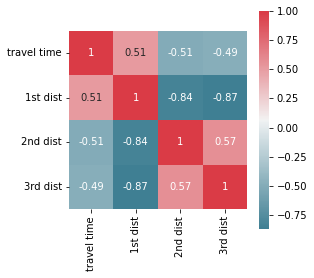

In [122]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(4,4))
corr = df7[['travel time','1st dist','2nd dist','3rd dist']].corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [123]:
x = np.array(df7[['est_dist','1st dist','2nd dist','3rd dist']])
y = np.array(df7['travel time'])
x

array([[0.26790189, 0.79476932, 0.07456318, 0.06299677],
       [0.25689107, 0.86259214, 0.09120343, 0.03468969],
       [0.26794166, 0.83218341, 0.09142767, 0.03477498],
       ...,
       [0.59997829, 0.82425459, 0.12936329, 0.04638212],
       [0.59886182, 0.8142669 , 0.12779577, 0.0458201 ],
       [0.61177756, 0.83671832, 0.11294095, 0.04708347]])

In [124]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [125]:
print(X_train.shape)
print(X_test.shape)
# X_train

(12759, 4)
(3190, 4)


In [126]:
# inputs: distance + 1st dist + 2nd dist + 3rd dist
model6_1_4 = nnmodel_(10, num_hlayers=1,Epoch=500)
model6_1_4

Epoch 1/500
399/399 [==============================] - 1s 905us/step - loss: 1027748.0000 - mape: 99.6106 - rmse: 1013.7791 - val_loss: 1057228.6250 - val_mape: 99.0025 - val_rmse: 1028.2162
Epoch 2/500
399/399 [==============================] - 0s 739us/step - loss: 1006394.3125 - mape: 97.8290 - rmse: 1003.1921 - val_loss: 1026028.8125 - val_mape: 96.4995 - val_rmse: 1012.9308
Epoch 3/500
399/399 [==============================] - 0s 729us/step - loss: 968452.0625 - mape: 94.5986 - rmse: 984.0996 - val_loss: 979739.0625 - val_mape: 92.6882 - val_rmse: 989.8177
Epoch 4/500
399/399 [==============================] - 0s 737us/step - loss: 917580.1875 - mape: 90.1253 - rmse: 957.9041 - val_loss: 921863.8750 - val_mape: 87.7588 - val_rmse: 960.1375
Epoch 5/500
399/399 [==============================] - 0s 732us/step - loss: 857118.1875 - mape: 84.6088 - rmse: 925.8068 - val_loss: 855750.8750 - val_mape: 81.8832 - val_rmse: 925.0681
Epoch 6/500
399/399 [==============================] - 0s

Epoch 45/500
399/399 [==============================] - 0s 710us/step - loss: 83663.8438 - mape: 31.6248 - rmse: 289.2470 - val_loss: 83816.4375 - val_mape: 30.3986 - val_rmse: 289.5107
Epoch 46/500
399/399 [==============================] - 0s 720us/step - loss: 82628.9375 - mape: 31.1580 - rmse: 287.4525 - val_loss: 82971.3438 - val_mape: 29.8054 - val_rmse: 288.0475
Epoch 47/500
399/399 [==============================] - 0s 737us/step - loss: 81729.0859 - mape: 30.5026 - rmse: 285.8830 - val_loss: 82231.8125 - val_mape: 29.4532 - val_rmse: 286.7609
Epoch 48/500
399/399 [==============================] - 0s 756us/step - loss: 80943.0859 - mape: 30.2095 - rmse: 284.5050 - val_loss: 81611.4375 - val_mape: 29.0431 - val_rmse: 285.6772
Epoch 49/500
399/399 [==============================] - 0s 718us/step - loss: 80262.7812 - mape: 29.7721 - rmse: 283.3069 - val_loss: 81068.1641 - val_mape: 28.7390 - val_rmse: 284.7247
Epoch 50/500
399/399 [==============================] - 0s 749us/step 

399/399 [==============================] - 0s 701us/step - loss: 72892.4297 - mape: 25.7953 - rmse: 269.9860 - val_loss: 75481.6875 - val_mape: 25.3636 - val_rmse: 274.7393
Epoch 90/500
399/399 [==============================] - 0s 684us/step - loss: 72838.9141 - mape: 25.6911 - rmse: 269.8868 - val_loss: 75481.1094 - val_mape: 25.6333 - val_rmse: 274.7383
Epoch 91/500
399/399 [==============================] - 0s 689us/step - loss: 72809.7578 - mape: 25.8471 - rmse: 269.8328 - val_loss: 75432.2734 - val_mape: 25.4540 - val_rmse: 274.6494
Epoch 92/500
399/399 [==============================] - 0s 733us/step - loss: 72763.2500 - mape: 25.7505 - rmse: 269.7466 - val_loss: 75399.4844 - val_mape: 25.4118 - val_rmse: 274.5897
Epoch 93/500
399/399 [==============================] - 0s 744us/step - loss: 72714.0781 - mape: 25.8286 - rmse: 269.6555 - val_loss: 75361.6875 - val_mape: 25.1480 - val_rmse: 274.5208
Epoch 94/500
399/399 [==============================] - 0s 691us/step - loss: 72679

Epoch 133/500
399/399 [==============================] - 0s 718us/step - loss: 72014.6406 - mape: 25.3646 - rmse: 268.3554 - val_loss: 74922.8047 - val_mape: 24.7487 - val_rmse: 273.7203
Epoch 134/500
399/399 [==============================] - 0s 698us/step - loss: 72007.5078 - mape: 25.3675 - rmse: 268.3421 - val_loss: 74922.5000 - val_mape: 24.9215 - val_rmse: 273.7198
Epoch 135/500
399/399 [==============================] - 0s 685us/step - loss: 72001.3750 - mape: 25.3687 - rmse: 268.3307 - val_loss: 74918.6328 - val_mape: 24.9091 - val_rmse: 273.7127
Epoch 136/500
399/399 [==============================] - 0s 711us/step - loss: 71996.6562 - mape: 25.3795 - rmse: 268.3219 - val_loss: 74911.5391 - val_mape: 24.8437 - val_rmse: 273.6997
Epoch 137/500
399/399 [==============================] - 0s 693us/step - loss: 71988.2344 - mape: 25.4047 - rmse: 268.3062 - val_loss: 74905.5234 - val_mape: 24.8210 - val_rmse: 273.6887
Epoch 138/500
399/399 [==============================] - 0s 702us

Epoch 177/500
399/399 [==============================] - 0s 737us/step - loss: 71833.8984 - mape: 25.2604 - rmse: 268.0185 - val_loss: 74793.7266 - val_mape: 24.7578 - val_rmse: 273.4844
Epoch 178/500
399/399 [==============================] - 0s 731us/step - loss: 71831.8828 - mape: 25.2381 - rmse: 268.0147 - val_loss: 74793.5625 - val_mape: 24.8165 - val_rmse: 273.4841
Epoch 179/500
399/399 [==============================] - 0s 729us/step - loss: 71830.0625 - mape: 25.2964 - rmse: 268.0113 - val_loss: 74789.8906 - val_mape: 24.8102 - val_rmse: 273.4774
Epoch 180/500
399/399 [==============================] - 0s 710us/step - loss: 71828.1875 - mape: 25.2861 - rmse: 268.0078 - val_loss: 74791.8438 - val_mape: 24.8536 - val_rmse: 273.4810
Epoch 181/500
399/399 [==============================] - 0s 690us/step - loss: 71824.9766 - mape: 25.3008 - rmse: 268.0018 - val_loss: 74784.3828 - val_mape: 24.7590 - val_rmse: 273.4673
Epoch 182/500
399/399 [==============================] - 0s 749us

Epoch 221/500
399/399 [==============================] - 0s 705us/step - loss: 71755.9766 - mape: 25.3513 - rmse: 267.8730 - val_loss: 74714.6406 - val_mape: 24.7842 - val_rmse: 273.3398
Epoch 222/500
399/399 [==============================] - 0s 729us/step - loss: 71755.7812 - mape: 25.1574 - rmse: 267.8727 - val_loss: 74715.5938 - val_mape: 24.7957 - val_rmse: 273.3415
Epoch 223/500
399/399 [==============================] - 0s 726us/step - loss: 71754.7812 - mape: 25.2489 - rmse: 267.8708 - val_loss: 74719.4219 - val_mape: 24.8843 - val_rmse: 273.3485
Epoch 224/500
399/399 [==============================] - 0s 696us/step - loss: 71750.6953 - mape: 25.2693 - rmse: 267.8632 - val_loss: 74710.4453 - val_mape: 24.8153 - val_rmse: 273.3321
Epoch 225/500
399/399 [==============================] - 0s 760us/step - loss: 71750.2266 - mape: 25.2675 - rmse: 267.8623 - val_loss: 74707.3828 - val_mape: 24.7408 - val_rmse: 273.3265
Epoch 226/500
399/399 [==============================] - 0s 709us

Epoch 265/500
399/399 [==============================] - 0s 717us/step - loss: 71683.6562 - mape: 25.3658 - rmse: 267.7380 - val_loss: 74649.3750 - val_mape: 24.4390 - val_rmse: 273.2204
Epoch 266/500
399/399 [==============================] - 0s 688us/step - loss: 71700.2422 - mape: 25.0964 - rmse: 267.7690 - val_loss: 74648.4062 - val_mape: 24.7035 - val_rmse: 273.2186
Epoch 267/500
399/399 [==============================] - 0s 722us/step - loss: 71694.3516 - mape: 25.1422 - rmse: 267.7580 - val_loss: 74660.6562 - val_mape: 24.9307 - val_rmse: 273.2410
Epoch 268/500
399/399 [==============================] - 0s 736us/step - loss: 71691.6641 - mape: 25.3001 - rmse: 267.7530 - val_loss: 74648.8906 - val_mape: 24.7602 - val_rmse: 273.2195
Epoch 269/500
399/399 [==============================] - 0s 718us/step - loss: 71694.6797 - mape: 25.1933 - rmse: 267.7586 - val_loss: 74649.9375 - val_mape: 24.8005 - val_rmse: 273.2214
Epoch 270/500
399/399 [==============================] - 0s 725us

Epoch 309/500
399/399 [==============================] - 0s 692us/step - loss: 71648.5469 - mape: 25.1958 - rmse: 267.6725 - val_loss: 74598.5469 - val_mape: 24.6679 - val_rmse: 273.1273
Epoch 310/500
399/399 [==============================] - 0s 749us/step - loss: 71647.7656 - mape: 25.1123 - rmse: 267.6710 - val_loss: 74605.8594 - val_mape: 24.8245 - val_rmse: 273.1407
Epoch 311/500
399/399 [==============================] - 0s 703us/step - loss: 71656.0000 - mape: 25.2614 - rmse: 267.6864 - val_loss: 74605.3281 - val_mape: 24.8115 - val_rmse: 273.1398
Epoch 312/500
399/399 [==============================] - 0s 718us/step - loss: 71643.4141 - mape: 25.1540 - rmse: 267.6629 - val_loss: 74607.2422 - val_mape: 24.8605 - val_rmse: 273.1432
Epoch 313/500
399/399 [==============================] - 0s 730us/step - loss: 71640.1562 - mape: 25.2728 - rmse: 267.6568 - val_loss: 74595.3828 - val_mape: 24.6678 - val_rmse: 273.1216
Epoch 314/500
399/399 [==============================] - 0s 743us

Epoch 353/500
399/399 [==============================] - 0s 706us/step - loss: 71603.8594 - mape: 25.1153 - rmse: 267.5890 - val_loss: 74557.2109 - val_mape: 24.7621 - val_rmse: 273.0517
Epoch 354/500
399/399 [==============================] - 0s 683us/step - loss: 71606.2656 - mape: 25.2034 - rmse: 267.5935 - val_loss: 74556.6719 - val_mape: 24.7816 - val_rmse: 273.0507
Epoch 355/500
399/399 [==============================] - 0s 725us/step - loss: 71602.6172 - mape: 25.2481 - rmse: 267.5866 - val_loss: 74550.3359 - val_mape: 24.6634 - val_rmse: 273.0391
Epoch 356/500
399/399 [==============================] - 0s 705us/step - loss: 71604.1953 - mape: 25.1197 - rmse: 267.5896 - val_loss: 74552.9297 - val_mape: 24.7489 - val_rmse: 273.0438
Epoch 357/500
399/399 [==============================] - 0s 705us/step - loss: 71595.1875 - mape: 25.3109 - rmse: 267.5728 - val_loss: 74548.3672 - val_mape: 24.5235 - val_rmse: 273.0355
Epoch 358/500
399/399 [==============================] - 0s 767us

Epoch 397/500
399/399 [==============================] - 0s 731us/step - loss: 71562.8984 - mape: 25.1474 - rmse: 267.5124 - val_loss: 74512.5938 - val_mape: 24.6976 - val_rmse: 272.9699
Epoch 398/500
399/399 [==============================] - 0s 732us/step - loss: 71560.4453 - mape: 25.1051 - rmse: 267.5078 - val_loss: 74529.5156 - val_mape: 24.9040 - val_rmse: 273.0009
Epoch 399/500
399/399 [==============================] - 0s 717us/step - loss: 71565.6875 - mape: 25.2970 - rmse: 267.5176 - val_loss: 74512.4062 - val_mape: 24.7066 - val_rmse: 272.9696
Epoch 400/500
399/399 [==============================] - 0s 784us/step - loss: 71556.8438 - mape: 25.0561 - rmse: 267.5011 - val_loss: 74531.4141 - val_mape: 24.9420 - val_rmse: 273.0044
Epoch 401/500
399/399 [==============================] - 0s 748us/step - loss: 71556.2109 - mape: 25.1862 - rmse: 267.4999 - val_loss: 74525.5703 - val_mape: 24.9056 - val_rmse: 272.9937
Epoch 402/500
399/399 [==============================] - 0s 730us

Epoch 441/500
399/399 [==============================] - 0s 709us/step - loss: 71526.1016 - mape: 25.1778 - rmse: 267.4436 - val_loss: 74483.6641 - val_mape: 24.7805 - val_rmse: 272.9170
Epoch 442/500
399/399 [==============================] - 0s 714us/step - loss: 71523.0547 - mape: 25.2297 - rmse: 267.4380 - val_loss: 74471.0625 - val_mape: 24.6124 - val_rmse: 272.8939
Epoch 443/500
399/399 [==============================] - 0s 719us/step - loss: 71521.2188 - mape: 25.0662 - rmse: 267.4345 - val_loss: 74491.0859 - val_mape: 24.8835 - val_rmse: 272.9305
Epoch 444/500
399/399 [==============================] - 0s 712us/step - loss: 71521.0000 - mape: 25.2787 - rmse: 267.4341 - val_loss: 74474.4531 - val_mape: 24.7137 - val_rmse: 272.9001
Epoch 445/500
399/399 [==============================] - 0s 695us/step - loss: 71513.0078 - mape: 25.0771 - rmse: 267.4192 - val_loss: 74492.3125 - val_mape: 24.8929 - val_rmse: 272.9328
Epoch 446/500
399/399 [==============================] - 0s 719us

Epoch 485/500
399/399 [==============================] - 0s 706us/step - loss: 71489.8125 - mape: 25.2622 - rmse: 267.3758 - val_loss: 74441.6328 - val_mape: 24.6764 - val_rmse: 272.8399
Epoch 486/500
399/399 [==============================] - 0s 698us/step - loss: 71483.9062 - mape: 25.1227 - rmse: 267.3647 - val_loss: 74439.5938 - val_mape: 24.6393 - val_rmse: 272.8362
Epoch 487/500
399/399 [==============================] - 0s 726us/step - loss: 71482.3828 - mape: 25.2358 - rmse: 267.3619 - val_loss: 74437.4297 - val_mape: 24.4666 - val_rmse: 272.8322
Epoch 488/500
399/399 [==============================] - 0s 737us/step - loss: 71486.9531 - mape: 25.0919 - rmse: 267.3705 - val_loss: 74442.9766 - val_mape: 24.7253 - val_rmse: 272.8424
Epoch 489/500
399/399 [==============================] - 0s 723us/step - loss: 71472.2109 - mape: 25.0459 - rmse: 267.3429 - val_loss: 74454.6406 - val_mape: 24.8921 - val_rmse: 272.8638
Epoch 490/500
399/399 [==============================] - 0s 696us

In [127]:
# inputs: distance + 1st dist + 2nd dist + 3rd dist
model6_1_3 = nnmodel_(50, num_hlayers=1,Epoch=500)
model6_1_3

Epoch 1/500
399/399 [==============================] - 0s 857us/step - loss: 1018506.8125 - mape: 98.8234 - rmse: 1009.2110 - val_loss: 1025666.6250 - val_mape: 96.4005 - val_rmse: 1012.7520
Epoch 2/500
399/399 [==============================] - 0s 704us/step - loss: 933566.6250 - mape: 91.4170 - rmse: 966.2125 - val_loss: 900200.2500 - val_mape: 85.7294 - val_rmse: 948.7888
Epoch 3/500
399/399 [==============================] - 0s 724us/step - loss: 788788.7500 - mape: 77.7903 - rmse: 888.1378 - val_loss: 733949.1250 - val_mape: 70.0337 - val_rmse: 856.7083
Epoch 4/500
399/399 [==============================] - 0s 717us/step - loss: 622630.1875 - mape: 60.4257 - rmse: 789.0692 - val_loss: 561249.8750 - val_mape: 51.4441 - val_rmse: 749.1661
Epoch 5/500
399/399 [==============================] - 0s 687us/step - loss: 463383.5938 - mape: 43.4303 - rmse: 680.7228 - val_loss: 408930.0938 - val_mape: 38.9571 - val_rmse: 639.4764
Epoch 6/500
399/399 [==============================] - 0s 723

Epoch 45/500
399/399 [==============================] - 0s 711us/step - loss: 73064.9375 - mape: 25.9600 - rmse: 270.3053 - val_loss: 75561.0391 - val_mape: 25.4067 - val_rmse: 274.8837
Epoch 46/500
399/399 [==============================] - 0s 736us/step - loss: 72954.5391 - mape: 25.7661 - rmse: 270.1010 - val_loss: 75511.9766 - val_mape: 25.6082 - val_rmse: 274.7944
Epoch 47/500
399/399 [==============================] - 0s 758us/step - loss: 72854.4766 - mape: 25.9015 - rmse: 269.9157 - val_loss: 75416.5625 - val_mape: 25.1716 - val_rmse: 274.6208
Epoch 48/500
399/399 [==============================] - 0s 704us/step - loss: 72774.9922 - mape: 25.7753 - rmse: 269.7684 - val_loss: 75356.8672 - val_mape: 25.1895 - val_rmse: 274.5121
Epoch 49/500
399/399 [==============================] - 0s 731us/step - loss: 72688.7031 - mape: 25.6752 - rmse: 269.6084 - val_loss: 75311.9375 - val_mape: 25.2971 - val_rmse: 274.4302
Epoch 50/500
399/399 [==============================] - 0s 722us/step 

399/399 [==============================] - 0s 753us/step - loss: 71834.2266 - mape: 25.3186 - rmse: 268.0191 - val_loss: 74776.4766 - val_mape: 24.6237 - val_rmse: 273.4529
Epoch 90/500
399/399 [==============================] - 0s 706us/step - loss: 71817.2734 - mape: 25.2167 - rmse: 267.9875 - val_loss: 74768.1875 - val_mape: 24.6985 - val_rmse: 273.4377
Epoch 91/500
399/399 [==============================] - 0s 678us/step - loss: 71827.4141 - mape: 25.1889 - rmse: 268.0064 - val_loss: 74775.7578 - val_mape: 24.9033 - val_rmse: 273.4516
Epoch 92/500
399/399 [==============================] - 0s 724us/step - loss: 71812.2109 - mape: 25.2861 - rmse: 267.9780 - val_loss: 74775.2812 - val_mape: 24.9465 - val_rmse: 273.4507
Epoch 93/500
399/399 [==============================] - 0s 693us/step - loss: 71813.7500 - mape: 25.2924 - rmse: 267.9809 - val_loss: 74762.4922 - val_mape: 24.8142 - val_rmse: 273.4273
Epoch 94/500
399/399 [==============================] - 0s 708us/step - loss: 71801

Epoch 133/500
399/399 [==============================] - 0s 695us/step - loss: 71679.4219 - mape: 25.0201 - rmse: 267.7301 - val_loss: 74710.9766 - val_mape: 25.2873 - val_rmse: 273.3331
Epoch 134/500
399/399 [==============================] - 0s 725us/step - loss: 71699.2578 - mape: 25.2672 - rmse: 267.7672 - val_loss: 74643.7188 - val_mape: 24.8900 - val_rmse: 273.2100
Epoch 135/500
399/399 [==============================] - 0s 720us/step - loss: 71686.8516 - mape: 25.2312 - rmse: 267.7440 - val_loss: 74659.0781 - val_mape: 25.0292 - val_rmse: 273.2381
Epoch 136/500
399/399 [==============================] - 0s 739us/step - loss: 71684.9219 - mape: 25.2668 - rmse: 267.7404 - val_loss: 74627.5078 - val_mape: 24.6228 - val_rmse: 273.1804
Epoch 137/500
399/399 [==============================] - 0s 740us/step - loss: 71684.4531 - mape: 25.1456 - rmse: 267.7395 - val_loss: 74637.6094 - val_mape: 24.8576 - val_rmse: 273.1989
Epoch 138/500
399/399 [==============================] - 0s 771us

Epoch 177/500
399/399 [==============================] - 0s 726us/step - loss: 71603.3828 - mape: 25.1901 - rmse: 267.5881 - val_loss: 74536.8203 - val_mape: 24.6574 - val_rmse: 273.0143
Epoch 178/500
399/399 [==============================] - 0s 690us/step - loss: 71596.2422 - mape: 25.1351 - rmse: 267.5747 - val_loss: 74577.1875 - val_mape: 25.0382 - val_rmse: 273.0882
Epoch 179/500
399/399 [==============================] - 0s 716us/step - loss: 71585.7656 - mape: 25.2000 - rmse: 267.5552 - val_loss: 74563.7891 - val_mape: 24.9925 - val_rmse: 273.0637
Epoch 180/500
399/399 [==============================] - 0s 715us/step - loss: 71595.7656 - mape: 25.1723 - rmse: 267.5739 - val_loss: 74571.0391 - val_mape: 25.0762 - val_rmse: 273.0770
Epoch 181/500
399/399 [==============================] - 0s 706us/step - loss: 71577.1562 - mape: 25.3315 - rmse: 267.5391 - val_loss: 74554.6094 - val_mape: 24.1497 - val_rmse: 273.0469
Epoch 182/500
399/399 [==============================] - 0s 752us

Epoch 221/500
399/399 [==============================] - 0s 693us/step - loss: 71522.2266 - mape: 25.2651 - rmse: 267.4364 - val_loss: 74459.5781 - val_mape: 24.3832 - val_rmse: 272.8728
Epoch 222/500
399/399 [==============================] - 0s 712us/step - loss: 71521.9453 - mape: 25.0786 - rmse: 267.4359 - val_loss: 74487.0781 - val_mape: 24.9875 - val_rmse: 272.9232
Epoch 223/500
399/399 [==============================] - 0s 720us/step - loss: 71518.4844 - mape: 25.2137 - rmse: 267.4294 - val_loss: 74465.8438 - val_mape: 24.8059 - val_rmse: 272.8843
Epoch 224/500
399/399 [==============================] - 0s 695us/step - loss: 71512.4766 - mape: 25.1922 - rmse: 267.4182 - val_loss: 74457.7031 - val_mape: 24.6719 - val_rmse: 272.8694
Epoch 225/500
399/399 [==============================] - 0s 738us/step - loss: 71506.1094 - mape: 25.1875 - rmse: 267.4062 - val_loss: 74455.6875 - val_mape: 24.5016 - val_rmse: 272.8657
Epoch 226/500
399/399 [==============================] - 0s 687us

Epoch 265/500
399/399 [==============================] - 0s 698us/step - loss: 71439.2500 - mape: 25.0783 - rmse: 267.2812 - val_loss: 74406.6094 - val_mape: 24.2494 - val_rmse: 272.7758
Epoch 266/500
399/399 [==============================] - 0s 732us/step - loss: 71452.3906 - mape: 25.0974 - rmse: 267.3058 - val_loss: 74393.8359 - val_mape: 24.5450 - val_rmse: 272.7523
Epoch 267/500
399/399 [==============================] - 0s 693us/step - loss: 71447.6094 - mape: 25.0962 - rmse: 267.2968 - val_loss: 74401.0469 - val_mape: 24.6910 - val_rmse: 272.7656
Epoch 268/500
399/399 [==============================] - 0s 739us/step - loss: 71447.4922 - mape: 25.1658 - rmse: 267.2966 - val_loss: 74392.9453 - val_mape: 24.6373 - val_rmse: 272.7507
Epoch 269/500
399/399 [==============================] - 0s 728us/step - loss: 71442.7422 - mape: 25.0985 - rmse: 267.2878 - val_loss: 74434.0234 - val_mape: 25.0143 - val_rmse: 272.8260
Epoch 270/500
399/399 [==============================] - 0s 706us

Epoch 309/500
399/399 [==============================] - 0s 710us/step - loss: 71395.1797 - mape: 25.1122 - rmse: 267.1988 - val_loss: 74349.3672 - val_mape: 24.2123 - val_rmse: 272.6708
Epoch 310/500
399/399 [==============================] - 0s 755us/step - loss: 71390.3125 - mape: 25.1177 - rmse: 267.1897 - val_loss: 74334.7188 - val_mape: 24.4584 - val_rmse: 272.6440
Epoch 311/500
399/399 [==============================] - 0s 716us/step - loss: 71390.2031 - mape: 25.0946 - rmse: 267.1895 - val_loss: 74331.2109 - val_mape: 24.5067 - val_rmse: 272.6375
Epoch 312/500
399/399 [==============================] - 0s 699us/step - loss: 71377.5547 - mape: 25.1482 - rmse: 267.1658 - val_loss: 74333.5547 - val_mape: 24.6135 - val_rmse: 272.6418
Epoch 313/500
399/399 [==============================] - 0s 705us/step - loss: 71375.8438 - mape: 25.1287 - rmse: 267.1626 - val_loss: 74341.0703 - val_mape: 24.7034 - val_rmse: 272.6556
Epoch 314/500
399/399 [==============================] - 0s 689us

Epoch 353/500
399/399 [==============================] - 0s 711us/step - loss: 71331.4141 - mape: 25.2092 - rmse: 267.0794 - val_loss: 74284.7969 - val_mape: 24.3677 - val_rmse: 272.5524
Epoch 354/500
399/399 [==============================] - 0s 708us/step - loss: 71315.8516 - mape: 24.9473 - rmse: 267.0503 - val_loss: 74334.7734 - val_mape: 25.0545 - val_rmse: 272.6440
Epoch 355/500
399/399 [==============================] - 0s 763us/step - loss: 71328.2656 - mape: 25.2336 - rmse: 267.0735 - val_loss: 74279.5000 - val_mape: 24.4220 - val_rmse: 272.5427
Epoch 356/500
399/399 [==============================] - 0s 716us/step - loss: 71316.6641 - mape: 25.1647 - rmse: 267.0518 - val_loss: 74290.4062 - val_mape: 24.2225 - val_rmse: 272.5627
Epoch 357/500
399/399 [==============================] - 0s 750us/step - loss: 71320.3516 - mape: 25.0993 - rmse: 267.0587 - val_loss: 74280.9062 - val_mape: 24.3835 - val_rmse: 272.5452
Epoch 358/500
399/399 [==============================] - 0s 740us

Epoch 397/500
399/399 [==============================] - 0s 713us/step - loss: 71272.8359 - mape: 25.1259 - rmse: 266.9697 - val_loss: 74234.9531 - val_mape: 24.5596 - val_rmse: 272.4609
Epoch 398/500
399/399 [==============================] - 0s 689us/step - loss: 71273.6719 - mape: 25.1371 - rmse: 266.9713 - val_loss: 74234.9609 - val_mape: 24.3762 - val_rmse: 272.4609
Epoch 399/500
399/399 [==============================] - 0s 696us/step - loss: 71273.3203 - mape: 25.0043 - rmse: 266.9706 - val_loss: 74269.3516 - val_mape: 24.9222 - val_rmse: 272.5240
Epoch 400/500
399/399 [==============================] - 0s 702us/step - loss: 71264.6016 - mape: 25.2110 - rmse: 266.9543 - val_loss: 74242.1953 - val_mape: 24.2132 - val_rmse: 272.4742
Epoch 401/500
399/399 [==============================] - 0s 688us/step - loss: 71264.8594 - mape: 25.0733 - rmse: 266.9548 - val_loss: 74232.3750 - val_mape: 24.5544 - val_rmse: 272.4562
Epoch 402/500
399/399 [==============================] - 0s 706us

Epoch 441/500
399/399 [==============================] - 0s 726us/step - loss: 71241.5781 - mape: 25.1069 - rmse: 266.9112 - val_loss: 74197.5469 - val_mape: 24.6852 - val_rmse: 272.3923
Epoch 442/500
399/399 [==============================] - 0s 677us/step - loss: 71220.9453 - mape: 25.1523 - rmse: 266.8725 - val_loss: 74187.9297 - val_mape: 24.6028 - val_rmse: 272.3746
Epoch 443/500
399/399 [==============================] - 0s 743us/step - loss: 71224.4141 - mape: 25.1267 - rmse: 266.8790 - val_loss: 74195.0547 - val_mape: 24.2845 - val_rmse: 272.3877
Epoch 444/500
399/399 [==============================] - 0s 742us/step - loss: 71228.4766 - mape: 25.0628 - rmse: 266.8866 - val_loss: 74197.2734 - val_mape: 24.6951 - val_rmse: 272.3918
Epoch 445/500
399/399 [==============================] - 0s 712us/step - loss: 71217.9766 - mape: 25.0413 - rmse: 266.8670 - val_loss: 74197.5703 - val_mape: 24.7241 - val_rmse: 272.3923
Epoch 446/500
399/399 [==============================] - 0s 718us

Epoch 485/500
399/399 [==============================] - 0s 739us/step - loss: 71175.5938 - mape: 24.9728 - rmse: 266.7875 - val_loss: 74183.6641 - val_mape: 24.8893 - val_rmse: 272.3668
Epoch 486/500
399/399 [==============================] - 0s 705us/step - loss: 71180.1172 - mape: 25.1528 - rmse: 266.7960 - val_loss: 74152.7109 - val_mape: 24.4195 - val_rmse: 272.3100
Epoch 487/500
399/399 [==============================] - 0s 684us/step - loss: 71183.0469 - mape: 25.1399 - rmse: 266.8015 - val_loss: 74154.6797 - val_mape: 24.4052 - val_rmse: 272.3136
Epoch 488/500
399/399 [==============================] - 0s 748us/step - loss: 71167.0078 - mape: 24.9030 - rmse: 266.7715 - val_loss: 74235.6562 - val_mape: 25.1804 - val_rmse: 272.4622
Epoch 489/500
399/399 [==============================] - 0s 731us/step - loss: 71187.3906 - mape: 25.1635 - rmse: 266.8097 - val_loss: 74154.9141 - val_mape: 24.6139 - val_rmse: 272.3140
Epoch 490/500
399/399 [==============================] - 0s 708us

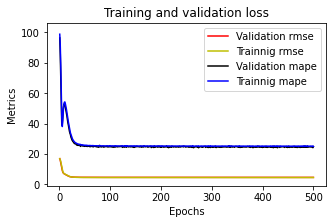

In [128]:
plotme(model6_1_3)

In [129]:
# inputs: distance + 1st dist + 2nd dist + 3rd dist
model6_1_5 = nnmodel_(100, num_hlayers=1,Epoch=500)
model6_1_5

Epoch 1/500
399/399 [==============================] - 1s 867us/step - loss: 1008162.9375 - mape: 97.8837 - rmse: 1004.0732 - val_loss: 995849.5625 - val_mape: 93.9320 - val_rmse: 997.9226
Epoch 2/500
399/399 [==============================] - 0s 760us/step - loss: 873718.0000 - mape: 85.8223 - rmse: 934.7288 - val_loss: 802193.8750 - val_mape: 76.7209 - val_rmse: 895.6528
Epoch 3/500
399/399 [==============================] - 0s 719us/step - loss: 659949.5000 - mape: 64.4153 - rmse: 812.3727 - val_loss: 570441.2500 - val_mape: 52.4484 - val_rmse: 755.2756
Epoch 4/500
399/399 [==============================] - 0s 729us/step - loss: 449975.8438 - mape: 42.5195 - rmse: 670.8024 - val_loss: 376501.9375 - val_mape: 38.2617 - val_rmse: 613.5975
Epoch 5/500
399/399 [==============================] - 0s 761us/step - loss: 299846.8125 - mape: 39.4564 - rmse: 547.5827 - val_loss: 257444.9688 - val_mape: 42.7831 - val_rmse: 507.3904
Epoch 6/500
399/399 [==============================] - 0s 742us

Epoch 45/500
399/399 [==============================] - 0s 727us/step - loss: 71978.8750 - mape: 25.4489 - rmse: 268.2888 - val_loss: 74903.0938 - val_mape: 24.4409 - val_rmse: 273.6843
Epoch 46/500
399/399 [==============================] - 0s 837us/step - loss: 71958.8438 - mape: 25.3485 - rmse: 268.2515 - val_loss: 74884.1953 - val_mape: 24.4822 - val_rmse: 273.6498
Epoch 47/500
399/399 [==============================] - 0s 731us/step - loss: 71944.6094 - mape: 25.3310 - rmse: 268.2249 - val_loss: 74864.6797 - val_mape: 24.9902 - val_rmse: 273.6141
Epoch 48/500
399/399 [==============================] - 0s 732us/step - loss: 71924.5000 - mape: 25.3041 - rmse: 268.1874 - val_loss: 74858.2266 - val_mape: 25.0777 - val_rmse: 273.6023
Epoch 49/500
399/399 [==============================] - 0s 748us/step - loss: 71894.0859 - mape: 25.2945 - rmse: 268.1307 - val_loss: 74835.7109 - val_mape: 24.8190 - val_rmse: 273.5612
Epoch 50/500
399/399 [==============================] - 0s 718us/step 

399/399 [==============================] - 0s 719us/step - loss: 71625.2266 - mape: 25.1983 - rmse: 267.6289 - val_loss: 74630.2812 - val_mape: 24.6759 - val_rmse: 273.1854
Epoch 90/500
399/399 [==============================] - 0s 706us/step - loss: 71609.7969 - mape: 25.2741 - rmse: 267.6001 - val_loss: 74638.0703 - val_mape: 24.2136 - val_rmse: 273.1997
Epoch 91/500
399/399 [==============================] - 0s 726us/step - loss: 71632.0078 - mape: 25.1176 - rmse: 267.6416 - val_loss: 74635.7266 - val_mape: 24.2050 - val_rmse: 273.1954
Epoch 92/500
399/399 [==============================] - 0s 736us/step - loss: 71612.5469 - mape: 25.0509 - rmse: 267.6052 - val_loss: 74674.1328 - val_mape: 25.2259 - val_rmse: 273.2657
Epoch 93/500
399/399 [==============================] - 0s 759us/step - loss: 71616.5391 - mape: 25.2557 - rmse: 267.6127 - val_loss: 74618.3828 - val_mape: 24.3079 - val_rmse: 273.1637
Epoch 94/500
399/399 [==============================] - 0s 744us/step - loss: 71603

Epoch 133/500
399/399 [==============================] - 0s 727us/step - loss: 71507.9219 - mape: 25.2242 - rmse: 267.4096 - val_loss: 74500.2344 - val_mape: 24.5156 - val_rmse: 272.9473
Epoch 134/500
399/399 [==============================] - 0s 729us/step - loss: 71521.0547 - mape: 25.0733 - rmse: 267.4342 - val_loss: 74491.7734 - val_mape: 24.4545 - val_rmse: 272.9318
Epoch 135/500
399/399 [==============================] - 0s 741us/step - loss: 71503.5312 - mape: 25.1466 - rmse: 267.4014 - val_loss: 74494.5156 - val_mape: 24.7716 - val_rmse: 272.9368
Epoch 136/500
399/399 [==============================] - 0s 764us/step - loss: 71495.8516 - mape: 25.0557 - rmse: 267.3871 - val_loss: 74567.2109 - val_mape: 25.2855 - val_rmse: 273.0700
Epoch 137/500
399/399 [==============================] - 0s 731us/step - loss: 71482.3906 - mape: 25.2567 - rmse: 267.3619 - val_loss: 74545.8516 - val_mape: 23.8979 - val_rmse: 273.0309
Epoch 138/500
399/399 [==============================] - 0s 745us

Epoch 177/500
399/399 [==============================] - 0s 716us/step - loss: 71411.3359 - mape: 25.0370 - rmse: 267.2290 - val_loss: 74401.2109 - val_mape: 24.4428 - val_rmse: 272.7658
Epoch 178/500
399/399 [==============================] - 0s 734us/step - loss: 71398.0781 - mape: 25.1395 - rmse: 267.2042 - val_loss: 74406.2578 - val_mape: 24.2925 - val_rmse: 272.7751
Epoch 179/500
399/399 [==============================] - 0s 728us/step - loss: 71405.5781 - mape: 25.0478 - rmse: 267.2182 - val_loss: 74442.6953 - val_mape: 25.0388 - val_rmse: 272.8419
Epoch 180/500
399/399 [==============================] - 0s 734us/step - loss: 71398.4844 - mape: 25.1607 - rmse: 267.2050 - val_loss: 74403.1016 - val_mape: 24.4205 - val_rmse: 272.7693
Epoch 181/500
399/399 [==============================] - 0s 739us/step - loss: 71386.9141 - mape: 24.9651 - rmse: 267.1833 - val_loss: 74448.0312 - val_mape: 25.1043 - val_rmse: 272.8517
Epoch 182/500
399/399 [==============================] - 0s 724us

Epoch 221/500
399/399 [==============================] - 0s 735us/step - loss: 71313.0312 - mape: 25.1117 - rmse: 267.0450 - val_loss: 74326.3125 - val_mape: 24.2189 - val_rmse: 272.6285
Epoch 222/500
399/399 [==============================] - 0s 721us/step - loss: 71308.9844 - mape: 25.0224 - rmse: 267.0374 - val_loss: 74329.4531 - val_mape: 24.7645 - val_rmse: 272.6343
Epoch 223/500
399/399 [==============================] - 0s 748us/step - loss: 71303.6328 - mape: 25.0916 - rmse: 267.0274 - val_loss: 74341.8594 - val_mape: 24.7950 - val_rmse: 272.6570
Epoch 224/500
399/399 [==============================] - 0s 741us/step - loss: 71309.7031 - mape: 25.1248 - rmse: 267.0388 - val_loss: 74311.7812 - val_mape: 24.5457 - val_rmse: 272.6019
Epoch 225/500
399/399 [==============================] - 0s 723us/step - loss: 71310.2344 - mape: 25.0460 - rmse: 267.0398 - val_loss: 74313.3203 - val_mape: 24.3444 - val_rmse: 272.6047
Epoch 226/500
399/399 [==============================] - 0s 721us

Epoch 265/500
399/399 [==============================] - 0s 728us/step - loss: 71240.0625 - mape: 25.1286 - rmse: 266.9084 - val_loss: 74260.3281 - val_mape: 24.1338 - val_rmse: 272.5075
Epoch 266/500
399/399 [==============================] - 0s 778us/step - loss: 71241.2969 - mape: 24.9831 - rmse: 266.9106 - val_loss: 74258.2891 - val_mape: 24.8231 - val_rmse: 272.5038
Epoch 267/500
399/399 [==============================] - 0s 745us/step - loss: 71239.4531 - mape: 25.0533 - rmse: 266.9072 - val_loss: 74287.4922 - val_mape: 25.0069 - val_rmse: 272.5573
Epoch 268/500
399/399 [==============================] - 0s 742us/step - loss: 71241.7734 - mape: 25.1977 - rmse: 266.9116 - val_loss: 74256.9375 - val_mape: 24.1489 - val_rmse: 272.5013
Epoch 269/500
399/399 [==============================] - 0s 783us/step - loss: 71235.5156 - mape: 25.0162 - rmse: 266.8998 - val_loss: 74260.9375 - val_mape: 24.1305 - val_rmse: 272.5086
Epoch 270/500
399/399 [==============================] - 0s 705us

Epoch 309/500
399/399 [==============================] - 0s 757us/step - loss: 71184.3516 - mape: 24.9522 - rmse: 266.8040 - val_loss: 74185.9922 - val_mape: 24.6847 - val_rmse: 272.3711
Epoch 310/500
399/399 [==============================] - 0s 738us/step - loss: 71181.2656 - mape: 25.1405 - rmse: 266.7982 - val_loss: 74182.3516 - val_mape: 24.4042 - val_rmse: 272.3644
Epoch 311/500
399/399 [==============================] - 0s 771us/step - loss: 71189.4219 - mape: 25.0592 - rmse: 266.8134 - val_loss: 74179.1719 - val_mape: 24.4913 - val_rmse: 272.3585
Epoch 312/500
399/399 [==============================] - 0s 721us/step - loss: 71176.4688 - mape: 25.0236 - rmse: 266.7892 - val_loss: 74176.7188 - val_mape: 24.4798 - val_rmse: 272.3540
Epoch 313/500
399/399 [==============================] - 0s 731us/step - loss: 71184.4922 - mape: 25.0636 - rmse: 266.8042 - val_loss: 74181.2031 - val_mape: 24.5987 - val_rmse: 272.3623
Epoch 314/500
399/399 [==============================] - 0s 726us

Epoch 353/500
399/399 [==============================] - 0s 724us/step - loss: 71118.2812 - mape: 25.1633 - rmse: 266.6801 - val_loss: 74156.6719 - val_mape: 24.0798 - val_rmse: 272.3172
Epoch 354/500
399/399 [==============================] - 0s 736us/step - loss: 71134.1016 - mape: 24.9816 - rmse: 266.7098 - val_loss: 74139.8359 - val_mape: 24.4004 - val_rmse: 272.2863
Epoch 355/500
399/399 [==============================] - 0s 739us/step - loss: 71115.7344 - mape: 25.0266 - rmse: 266.6753 - val_loss: 74140.4844 - val_mape: 24.3919 - val_rmse: 272.2875
Epoch 356/500
399/399 [==============================] - 0s 692us/step - loss: 71117.9062 - mape: 25.0135 - rmse: 266.6794 - val_loss: 74141.5547 - val_mape: 24.6827 - val_rmse: 272.2895
Epoch 357/500
399/399 [==============================] - 0s 741us/step - loss: 71104.3281 - mape: 25.0614 - rmse: 266.6540 - val_loss: 74124.8125 - val_mape: 24.5115 - val_rmse: 272.2587
Epoch 358/500
399/399 [==============================] - 0s 738us

Epoch 397/500
399/399 [==============================] - 0s 724us/step - loss: 71070.0234 - mape: 25.0204 - rmse: 266.5896 - val_loss: 74152.5234 - val_mape: 25.0898 - val_rmse: 272.3096
Epoch 398/500
399/399 [==============================] - 0s 704us/step - loss: 71076.9766 - mape: 25.0439 - rmse: 266.6027 - val_loss: 74129.9297 - val_mape: 24.9012 - val_rmse: 272.2681
Epoch 399/500
399/399 [==============================] - 0s 740us/step - loss: 71061.1953 - mape: 25.1081 - rmse: 266.5731 - val_loss: 74101.2578 - val_mape: 24.1039 - val_rmse: 272.2155
Epoch 400/500
399/399 [==============================] - 0s 749us/step - loss: 71066.3516 - mape: 25.0170 - rmse: 266.5827 - val_loss: 74090.5781 - val_mape: 24.3088 - val_rmse: 272.1958
Epoch 401/500
399/399 [==============================] - 0s 736us/step - loss: 71061.6719 - mape: 25.0499 - rmse: 266.5739 - val_loss: 74087.7578 - val_mape: 24.2779 - val_rmse: 272.1907
Epoch 402/500
399/399 [==============================] - 0s 740us

Epoch 441/500
399/399 [==============================] - 0s 718us/step - loss: 71036.6797 - mape: 25.0496 - rmse: 266.5271 - val_loss: 74048.2422 - val_mape: 24.3464 - val_rmse: 272.1181
Epoch 442/500
399/399 [==============================] - 0s 737us/step - loss: 71021.9766 - mape: 24.9765 - rmse: 266.4995 - val_loss: 74063.8359 - val_mape: 24.7793 - val_rmse: 272.1467
Epoch 443/500
399/399 [==============================] - 0s 745us/step - loss: 70996.8750 - mape: 25.1918 - rmse: 266.4524 - val_loss: 74100.0703 - val_mape: 23.8342 - val_rmse: 272.2133
Epoch 444/500
399/399 [==============================] - 0s 741us/step - loss: 71045.3438 - mape: 24.8976 - rmse: 266.5433 - val_loss: 74051.2891 - val_mape: 24.5164 - val_rmse: 272.1237
Epoch 445/500
399/399 [==============================] - 0s 731us/step - loss: 71006.5938 - mape: 25.1137 - rmse: 266.4706 - val_loss: 74079.6953 - val_mape: 23.9592 - val_rmse: 272.1758
Epoch 446/500
399/399 [==============================] - 0s 762us

Epoch 485/500
399/399 [==============================] - 0s 721us/step - loss: 70998.3281 - mape: 25.0536 - rmse: 266.4551 - val_loss: 74046.1016 - val_mape: 24.8091 - val_rmse: 272.1141
Epoch 486/500
399/399 [==============================] - 0s 738us/step - loss: 70983.5547 - mape: 24.9724 - rmse: 266.4274 - val_loss: 74097.6328 - val_mape: 25.1955 - val_rmse: 272.2088
Epoch 487/500
399/399 [==============================] - 0s 727us/step - loss: 71006.8203 - mape: 25.1094 - rmse: 266.4710 - val_loss: 74022.2266 - val_mape: 24.5543 - val_rmse: 272.0703
Epoch 488/500
399/399 [==============================] - 0s 773us/step - loss: 70993.0156 - mape: 25.0637 - rmse: 266.4452 - val_loss: 74019.1562 - val_mape: 24.2935 - val_rmse: 272.0646
Epoch 489/500
399/399 [==============================] - 0s 733us/step - loss: 70984.8047 - mape: 24.9634 - rmse: 266.4297 - val_loss: 74022.2812 - val_mape: 24.5570 - val_rmse: 272.0704
Epoch 490/500
399/399 [==============================] - 0s 761us

In [130]:
# inputs: distance + 1st dist + 2nd dist + 3rd dist
model6_1_1 = nnmodel_(100,50, num_hlayers=2,Epoch=500)
model6_1_1

Epoch 1/500
399/399 [==============================] - 1s 956us/step - loss: 683615.3125 - mape: 71.5849 - rmse: 826.8103 - val_loss: 191752.2656 - val_mape: 52.3942 - val_rmse: 437.8953
Epoch 2/500
399/399 [==============================] - 0s 795us/step - loss: 156718.0625 - mape: 53.5800 - rmse: 395.8763 - val_loss: 129623.2188 - val_mape: 47.8575 - val_rmse: 360.0323
Epoch 3/500
399/399 [==============================] - 0s 788us/step - loss: 110700.7188 - mape: 42.8680 - rmse: 332.7172 - val_loss: 94633.2266 - val_mape: 34.7503 - val_rmse: 307.6252
Epoch 4/500
399/399 [==============================] - 0s 798us/step - loss: 86272.6250 - mape: 33.0694 - rmse: 293.7220 - val_loss: 81888.6484 - val_mape: 29.8683 - val_rmse: 286.1619
Epoch 5/500
399/399 [==============================] - 0s 806us/step - loss: 78589.8438 - mape: 28.7145 - rmse: 280.3388 - val_loss: 78783.0078 - val_mape: 28.2007 - val_rmse: 280.6831
Epoch 6/500
399/399 [==============================] - 0s 801us/step -

399/399 [==============================] - 0s 789us/step - loss: 69573.5312 - mape: 24.4454 - rmse: 263.7679 - val_loss: 72699.3906 - val_mape: 24.7489 - val_rmse: 269.6282
Epoch 46/500
399/399 [==============================] - 0s 782us/step - loss: 69602.4922 - mape: 24.6061 - rmse: 263.8228 - val_loss: 72724.7422 - val_mape: 24.5328 - val_rmse: 269.6753
Epoch 47/500
399/399 [==============================] - 0s 785us/step - loss: 69511.4375 - mape: 24.4852 - rmse: 263.6502 - val_loss: 72537.9922 - val_mape: 24.3148 - val_rmse: 269.3288
Epoch 48/500
399/399 [==============================] - 0s 791us/step - loss: 69515.1406 - mape: 24.5169 - rmse: 263.6572 - val_loss: 72562.8203 - val_mape: 24.6888 - val_rmse: 269.3749
Epoch 49/500
399/399 [==============================] - 0s 814us/step - loss: 69494.9609 - mape: 24.5472 - rmse: 263.6190 - val_loss: 72418.2266 - val_mape: 23.7553 - val_rmse: 269.1064
Epoch 50/500
399/399 [==============================] - 0s 804us/step - loss: 69472

Epoch 133/500
399/399 [==============================] - 0s 801us/step - loss: 67029.5156 - mape: 23.4338 - rmse: 258.9006 - val_loss: 69924.4922 - val_mape: 22.9453 - val_rmse: 264.4324
Epoch 134/500
399/399 [==============================] - 0s 811us/step - loss: 67078.3047 - mape: 23.3641 - rmse: 258.9948 - val_loss: 70052.9922 - val_mape: 23.6383 - val_rmse: 264.6753
Epoch 135/500
399/399 [==============================] - 0s 802us/step - loss: 67088.2969 - mape: 23.4026 - rmse: 259.0141 - val_loss: 69943.6875 - val_mape: 22.3008 - val_rmse: 264.4687
Epoch 136/500
399/399 [==============================] - 0s 784us/step - loss: 67056.1719 - mape: 23.4321 - rmse: 258.9521 - val_loss: 70108.9062 - val_mape: 21.5808 - val_rmse: 264.7809
Epoch 137/500
399/399 [==============================] - 0s 791us/step - loss: 67052.9219 - mape: 23.1306 - rmse: 258.9458 - val_loss: 69963.5234 - val_mape: 23.8644 - val_rmse: 264.5062
Epoch 138/500
399/399 [==============================] - 0s 807us

Epoch 177/500
399/399 [==============================] - 0s 800us/step - loss: 66886.9141 - mape: 23.3177 - rmse: 258.6250 - val_loss: 69877.1250 - val_mape: 21.6703 - val_rmse: 264.3428
Epoch 178/500
399/399 [==============================] - 0s 791us/step - loss: 66841.3438 - mape: 23.1475 - rmse: 258.5369 - val_loss: 69913.3906 - val_mape: 21.4838 - val_rmse: 264.4114
Epoch 179/500
399/399 [==============================] - 0s 811us/step - loss: 66987.9609 - mape: 23.3006 - rmse: 258.8203 - val_loss: 69964.5469 - val_mape: 21.2917 - val_rmse: 264.5081
Epoch 180/500
399/399 [==============================] - 0s 779us/step - loss: 66874.2500 - mape: 23.2153 - rmse: 258.6006 - val_loss: 69777.5625 - val_mape: 23.1908 - val_rmse: 264.1544
Epoch 181/500
399/399 [==============================] - 0s 799us/step - loss: 66913.4922 - mape: 23.2987 - rmse: 258.6764 - val_loss: 69924.7656 - val_mape: 24.0177 - val_rmse: 264.4329
Epoch 182/500
399/399 [==============================] - 0s 789us

Epoch 221/500
399/399 [==============================] - 0s 769us/step - loss: 66677.5938 - mape: 23.0869 - rmse: 258.2201 - val_loss: 69740.7812 - val_mape: 23.8274 - val_rmse: 264.0848
Epoch 222/500
399/399 [==============================] - 0s 809us/step - loss: 66733.7656 - mape: 23.1322 - rmse: 258.3288 - val_loss: 70142.1953 - val_mape: 24.6249 - val_rmse: 264.8437
Epoch 223/500
399/399 [==============================] - 0s 785us/step - loss: 66709.0078 - mape: 23.2696 - rmse: 258.2809 - val_loss: 69915.8750 - val_mape: 23.5531 - val_rmse: 264.4161
Epoch 224/500
399/399 [==============================] - 0s 759us/step - loss: 66684.8125 - mape: 23.1630 - rmse: 258.2340 - val_loss: 69484.3594 - val_mape: 21.9965 - val_rmse: 263.5988
Epoch 225/500
399/399 [==============================] - 0s 775us/step - loss: 66699.6172 - mape: 23.2950 - rmse: 258.2627 - val_loss: 69675.2734 - val_mape: 21.5768 - val_rmse: 263.9608
Epoch 226/500
399/399 [==============================] - 0s 772us

Epoch 265/500
399/399 [==============================] - 0s 776us/step - loss: 66634.8438 - mape: 23.1011 - rmse: 258.1373 - val_loss: 70066.8203 - val_mape: 24.5655 - val_rmse: 264.7014
Epoch 266/500
399/399 [==============================] - 0s 789us/step - loss: 66712.5469 - mape: 23.1615 - rmse: 258.2877 - val_loss: 69956.8203 - val_mape: 24.5715 - val_rmse: 264.4935
Epoch 267/500
399/399 [==============================] - 0s 783us/step - loss: 66683.2422 - mape: 23.2547 - rmse: 258.2310 - val_loss: 69367.2969 - val_mape: 22.5171 - val_rmse: 263.3767
Epoch 268/500
399/399 [==============================] - 0s 792us/step - loss: 66658.9844 - mape: 23.1187 - rmse: 258.1840 - val_loss: 69456.4141 - val_mape: 23.2360 - val_rmse: 263.5458
Epoch 269/500
399/399 [==============================] - 0s 772us/step - loss: 66670.7969 - mape: 23.1720 - rmse: 258.2069 - val_loss: 69289.8594 - val_mape: 22.6916 - val_rmse: 263.2297
Epoch 270/500
399/399 [==============================] - 0s 794us

Epoch 309/500
399/399 [==============================] - 0s 805us/step - loss: 66628.2969 - mape: 23.1616 - rmse: 258.1246 - val_loss: 69397.4297 - val_mape: 23.2140 - val_rmse: 263.4339
Epoch 310/500
399/399 [==============================] - 0s 825us/step - loss: 66552.8359 - mape: 23.1358 - rmse: 257.9784 - val_loss: 69453.1562 - val_mape: 21.2020 - val_rmse: 263.5397
Epoch 311/500
399/399 [==============================] - 0s 790us/step - loss: 66568.4531 - mape: 23.0895 - rmse: 258.0086 - val_loss: 69432.7656 - val_mape: 21.3634 - val_rmse: 263.5010
Epoch 312/500
399/399 [==============================] - 0s 837us/step - loss: 66602.2734 - mape: 23.2698 - rmse: 258.0742 - val_loss: 69429.3984 - val_mape: 21.5583 - val_rmse: 263.4946
Epoch 313/500
399/399 [==============================] - 0s 796us/step - loss: 66590.3906 - mape: 23.0640 - rmse: 258.0511 - val_loss: 69377.8516 - val_mape: 23.0187 - val_rmse: 263.3968
Epoch 314/500
399/399 [==============================] - 0s 808us

Epoch 353/500
399/399 [==============================] - 0s 787us/step - loss: 66590.1797 - mape: 23.1736 - rmse: 258.0507 - val_loss: 69485.1641 - val_mape: 20.9823 - val_rmse: 263.6004
Epoch 354/500
399/399 [==============================] - 0s 780us/step - loss: 66569.6094 - mape: 23.1007 - rmse: 258.0109 - val_loss: 69232.7266 - val_mape: 21.9671 - val_rmse: 263.1211
Epoch 355/500
399/399 [==============================] - 0s 847us/step - loss: 66580.3125 - mape: 23.1712 - rmse: 258.0316 - val_loss: 69267.5391 - val_mape: 21.6673 - val_rmse: 263.1873
Epoch 356/500
399/399 [==============================] - 0s 810us/step - loss: 66580.2812 - mape: 23.1713 - rmse: 258.0316 - val_loss: 69270.5078 - val_mape: 22.8735 - val_rmse: 263.1929
Epoch 357/500
399/399 [==============================] - 0s 799us/step - loss: 66527.8203 - mape: 23.0920 - rmse: 257.9299 - val_loss: 69271.4609 - val_mape: 23.3066 - val_rmse: 263.1947
Epoch 358/500
399/399 [==============================] - 0s 839us

Epoch 397/500
399/399 [==============================] - 0s 805us/step - loss: 66574.0938 - mape: 23.0725 - rmse: 258.0196 - val_loss: 69939.7422 - val_mape: 20.4446 - val_rmse: 264.4612
Epoch 398/500
399/399 [==============================] - 0s 770us/step - loss: 66602.8281 - mape: 23.1141 - rmse: 258.0752 - val_loss: 69161.5781 - val_mape: 22.6666 - val_rmse: 262.9859
Epoch 399/500
399/399 [==============================] - 0s 783us/step - loss: 66491.5938 - mape: 23.1688 - rmse: 257.8596 - val_loss: 69223.5547 - val_mape: 21.8536 - val_rmse: 263.1037
Epoch 400/500
399/399 [==============================] - 0s 803us/step - loss: 66536.1562 - mape: 23.1682 - rmse: 257.9460 - val_loss: 69254.5078 - val_mape: 21.5428 - val_rmse: 263.1625
Epoch 401/500
399/399 [==============================] - 0s 794us/step - loss: 66568.4531 - mape: 23.1806 - rmse: 258.0086 - val_loss: 69426.4609 - val_mape: 21.7020 - val_rmse: 263.4890
Epoch 402/500
399/399 [==============================] - 0s 797us

Epoch 441/500
399/399 [==============================] - 0s 839us/step - loss: 66501.9453 - mape: 22.9941 - rmse: 257.8797 - val_loss: 69606.2578 - val_mape: 23.7360 - val_rmse: 263.8300
Epoch 442/500
399/399 [==============================] - 0s 799us/step - loss: 66559.4375 - mape: 23.1007 - rmse: 257.9911 - val_loss: 69292.4375 - val_mape: 23.7026 - val_rmse: 263.2346
Epoch 443/500
399/399 [==============================] - 0s 781us/step - loss: 66521.1016 - mape: 23.1894 - rmse: 257.9168 - val_loss: 69191.4844 - val_mape: 21.7416 - val_rmse: 263.0428
Epoch 444/500
399/399 [==============================] - 0s 824us/step - loss: 66530.8750 - mape: 23.1618 - rmse: 257.9358 - val_loss: 69260.6719 - val_mape: 21.5241 - val_rmse: 263.1742
Epoch 445/500
399/399 [==============================] - 0s 762us/step - loss: 66526.4531 - mape: 23.0652 - rmse: 257.9272 - val_loss: 69190.5234 - val_mape: 21.6996 - val_rmse: 263.0409
Epoch 446/500
399/399 [==============================] - 0s 794us

Epoch 485/500
399/399 [==============================] - 0s 822us/step - loss: 66499.1016 - mape: 23.0766 - rmse: 257.8742 - val_loss: 69211.5859 - val_mape: 22.9696 - val_rmse: 263.0810
Epoch 486/500
399/399 [==============================] - 0s 799us/step - loss: 66502.1797 - mape: 23.1735 - rmse: 257.8802 - val_loss: 69275.9062 - val_mape: 21.3291 - val_rmse: 263.2032
Epoch 487/500
399/399 [==============================] - 0s 803us/step - loss: 66488.2188 - mape: 23.0251 - rmse: 257.8531 - val_loss: 69314.9766 - val_mape: 23.0921 - val_rmse: 263.2774
Epoch 488/500
399/399 [==============================] - 0s 771us/step - loss: 66544.9844 - mape: 23.2686 - rmse: 257.9631 - val_loss: 69496.0312 - val_mape: 20.7544 - val_rmse: 263.6210
Epoch 489/500
399/399 [==============================] - 0s 788us/step - loss: 66544.4375 - mape: 22.9952 - rmse: 257.9621 - val_loss: 69156.6562 - val_mape: 21.9762 - val_rmse: 262.9765
Epoch 490/500
399/399 [==============================] - 0s 785us

In [131]:
# plotme(model6_1_1)

In [132]:
# inputs: distance + hour + 1st dist + 2nd dist + 3rd dist
model6_1_2 = nnmodel_(200,100, num_hlayers=2,Epoch=500)
model6_1_2

Epoch 1/500
399/399 [==============================] - 1s 1ms/step - loss: 549538.3125 - mape: 67.6569 - rmse: 741.3085 - val_loss: 162494.7812 - val_mape: 54.5745 - val_rmse: 403.1064
Epoch 2/500
399/399 [==============================] - 0s 881us/step - loss: 130308.9766 - mape: 47.8630 - rmse: 360.9833 - val_loss: 101539.7891 - val_mape: 38.6243 - val_rmse: 318.6531
Epoch 3/500
399/399 [==============================] - 0s 911us/step - loss: 88518.8438 - mape: 33.7768 - rmse: 297.5212 - val_loss: 81522.8047 - val_mape: 29.4786 - val_rmse: 285.5220
Epoch 4/500
399/399 [==============================] - 0s 917us/step - loss: 77553.8984 - mape: 28.0983 - rmse: 278.4850 - val_loss: 77399.3516 - val_mape: 26.3953 - val_rmse: 278.2074
Epoch 5/500
399/399 [==============================] - 0s 922us/step - loss: 74141.8203 - mape: 26.4713 - rmse: 272.2899 - val_loss: 75603.5469 - val_mape: 24.6800 - val_rmse: 274.9610
Epoch 6/500
399/399 [==============================] - 0s 944us/step - lo

399/399 [==============================] - 0s 912us/step - loss: 66950.5547 - mape: 23.2821 - rmse: 258.7480 - val_loss: 69743.8594 - val_mape: 23.1267 - val_rmse: 264.0906
Epoch 90/500
399/399 [==============================] - 0s 860us/step - loss: 66961.2891 - mape: 23.3265 - rmse: 258.7688 - val_loss: 69689.4688 - val_mape: 22.0833 - val_rmse: 263.9876
Epoch 91/500
399/399 [==============================] - 0s 901us/step - loss: 66937.3047 - mape: 23.2989 - rmse: 258.7224 - val_loss: 69661.9844 - val_mape: 22.3960 - val_rmse: 263.9356
Epoch 92/500
399/399 [==============================] - 0s 898us/step - loss: 66852.8750 - mape: 23.2715 - rmse: 258.5592 - val_loss: 69754.8359 - val_mape: 21.6715 - val_rmse: 264.1114
Epoch 93/500
399/399 [==============================] - 0s 885us/step - loss: 67002.3281 - mape: 23.2768 - rmse: 258.8481 - val_loss: 69637.6172 - val_mape: 22.8744 - val_rmse: 263.8894
Epoch 94/500
399/399 [==============================] - 0s 904us/step - loss: 66979

Epoch 133/500
399/399 [==============================] - 0s 885us/step - loss: 66895.3672 - mape: 23.3197 - rmse: 258.6414 - val_loss: 69731.0000 - val_mape: 23.2373 - val_rmse: 264.0663
Epoch 134/500
399/399 [==============================] - 0s 910us/step - loss: 66810.8750 - mape: 23.2101 - rmse: 258.4780 - val_loss: 69494.6875 - val_mape: 22.0139 - val_rmse: 263.6184
Epoch 135/500
399/399 [==============================] - 0s 908us/step - loss: 66721.5078 - mape: 23.1178 - rmse: 258.3051 - val_loss: 69419.0312 - val_mape: 22.2244 - val_rmse: 263.4749
Epoch 136/500
399/399 [==============================] - 0s 886us/step - loss: 66853.0156 - mape: 23.2052 - rmse: 258.5595 - val_loss: 69468.0859 - val_mape: 21.9048 - val_rmse: 263.5680
Epoch 137/500
399/399 [==============================] - 0s 897us/step - loss: 66796.1406 - mape: 23.1992 - rmse: 258.4495 - val_loss: 69477.4375 - val_mape: 22.0001 - val_rmse: 263.5857
Epoch 138/500
399/399 [==============================] - 0s 895us

Epoch 177/500
399/399 [==============================] - 0s 899us/step - loss: 66833.8672 - mape: 23.2389 - rmse: 258.5225 - val_loss: 69661.3203 - val_mape: 21.1166 - val_rmse: 263.9343
Epoch 178/500
399/399 [==============================] - 0s 867us/step - loss: 66712.2500 - mape: 23.2725 - rmse: 258.2871 - val_loss: 70114.1016 - val_mape: 20.3813 - val_rmse: 264.7907
Epoch 179/500
399/399 [==============================] - 0s 864us/step - loss: 66827.1016 - mape: 23.0385 - rmse: 258.5094 - val_loss: 69447.5781 - val_mape: 21.7710 - val_rmse: 263.5291
Epoch 180/500
399/399 [==============================] - 0s 870us/step - loss: 66769.3359 - mape: 23.2103 - rmse: 258.3976 - val_loss: 70194.4062 - val_mape: 20.3347 - val_rmse: 264.9423
Epoch 181/500
399/399 [==============================] - 0s 949us/step - loss: 66684.1641 - mape: 23.2064 - rmse: 258.2328 - val_loss: 69492.8203 - val_mape: 21.5938 - val_rmse: 263.6149
Epoch 182/500
399/399 [==============================] - 0s 886us

Epoch 221/500
399/399 [==============================] - 0s 898us/step - loss: 66673.2422 - mape: 23.2569 - rmse: 258.2116 - val_loss: 69650.0469 - val_mape: 20.9180 - val_rmse: 263.9130
Epoch 222/500
399/399 [==============================] - 0s 879us/step - loss: 66735.2734 - mape: 23.0853 - rmse: 258.3317 - val_loss: 69547.0391 - val_mape: 21.6966 - val_rmse: 263.7177
Epoch 223/500
399/399 [==============================] - 0s 878us/step - loss: 66791.1172 - mape: 23.0410 - rmse: 258.4398 - val_loss: 69282.5547 - val_mape: 22.9060 - val_rmse: 263.2158
Epoch 224/500
399/399 [==============================] - 0s 889us/step - loss: 66766.8828 - mape: 23.2891 - rmse: 258.3929 - val_loss: 69704.1016 - val_mape: 20.7436 - val_rmse: 264.0154
Epoch 225/500
399/399 [==============================] - 0s 867us/step - loss: 66817.9297 - mape: 22.9928 - rmse: 258.4916 - val_loss: 69688.0312 - val_mape: 24.1132 - val_rmse: 263.9849
Epoch 226/500
399/399 [==============================] - 0s 912us

Epoch 265/500
399/399 [==============================] - 0s 896us/step - loss: 66683.5391 - mape: 23.1479 - rmse: 258.2316 - val_loss: 69571.9688 - val_mape: 21.0100 - val_rmse: 263.7650
Epoch 266/500
399/399 [==============================] - 0s 918us/step - loss: 66670.6719 - mape: 23.0566 - rmse: 258.2066 - val_loss: 69373.6875 - val_mape: 22.7904 - val_rmse: 263.3889
Epoch 267/500
399/399 [==============================] - 0s 887us/step - loss: 66734.6094 - mape: 23.1437 - rmse: 258.3304 - val_loss: 69340.7422 - val_mape: 22.5196 - val_rmse: 263.3263
Epoch 268/500
399/399 [==============================] - 0s 890us/step - loss: 66748.1719 - mape: 23.1194 - rmse: 258.3567 - val_loss: 69262.8828 - val_mape: 22.9214 - val_rmse: 263.1784
Epoch 269/500
399/399 [==============================] - 0s 882us/step - loss: 66603.9375 - mape: 23.1708 - rmse: 258.0774 - val_loss: 69307.4844 - val_mape: 22.1666 - val_rmse: 263.2632
Epoch 270/500
399/399 [==============================] - 0s 909us

Epoch 309/500
399/399 [==============================] - 0s 919us/step - loss: 66637.8672 - mape: 23.0917 - rmse: 258.1431 - val_loss: 69185.2422 - val_mape: 22.7300 - val_rmse: 263.0309
Epoch 310/500
399/399 [==============================] - 0s 893us/step - loss: 66628.6719 - mape: 23.1777 - rmse: 258.1253 - val_loss: 69425.6250 - val_mape: 21.2111 - val_rmse: 263.4874
Epoch 311/500
399/399 [==============================] - 0s 892us/step - loss: 66589.0156 - mape: 23.1144 - rmse: 258.0485 - val_loss: 69572.8047 - val_mape: 20.9484 - val_rmse: 263.7666
Epoch 312/500
399/399 [==============================] - 0s 910us/step - loss: 66651.1094 - mape: 23.1691 - rmse: 258.1688 - val_loss: 69388.7266 - val_mape: 21.3464 - val_rmse: 263.4174
Epoch 313/500
399/399 [==============================] - 0s 917us/step - loss: 66641.8047 - mape: 23.0735 - rmse: 258.1507 - val_loss: 69388.5859 - val_mape: 22.6934 - val_rmse: 263.4171
Epoch 314/500
399/399 [==============================] - 0s 881us

Epoch 353/500
399/399 [==============================] - 0s 907us/step - loss: 66653.8594 - mape: 23.0531 - rmse: 258.1741 - val_loss: 69303.5156 - val_mape: 23.2414 - val_rmse: 263.2556
Epoch 354/500
399/399 [==============================] - 0s 900us/step - loss: 66544.9922 - mape: 23.0880 - rmse: 257.9632 - val_loss: 70030.8125 - val_mape: 24.4988 - val_rmse: 264.6334
Epoch 355/500
399/399 [==============================] - 0s 902us/step - loss: 66568.6797 - mape: 23.1000 - rmse: 258.0091 - val_loss: 69227.7109 - val_mape: 23.0751 - val_rmse: 263.1116
Epoch 356/500
399/399 [==============================] - 0s 895us/step - loss: 66584.7109 - mape: 23.1909 - rmse: 258.0401 - val_loss: 69154.5625 - val_mape: 22.0893 - val_rmse: 262.9726
Epoch 357/500
399/399 [==============================] - 0s 899us/step - loss: 66580.0938 - mape: 23.0443 - rmse: 258.0312 - val_loss: 69171.3281 - val_mape: 21.9562 - val_rmse: 263.0044
Epoch 358/500
399/399 [==============================] - 0s 880us

Epoch 397/500
399/399 [==============================] - 0s 892us/step - loss: 66518.2344 - mape: 22.9710 - rmse: 257.9113 - val_loss: 69232.5078 - val_mape: 23.3233 - val_rmse: 263.1207
Epoch 398/500
399/399 [==============================] - 0s 868us/step - loss: 66558.7109 - mape: 23.1283 - rmse: 257.9897 - val_loss: 69208.9062 - val_mape: 22.4115 - val_rmse: 263.0759
Epoch 399/500
399/399 [==============================] - 0s 883us/step - loss: 66503.7969 - mape: 23.0872 - rmse: 257.8833 - val_loss: 69561.1172 - val_mape: 23.5360 - val_rmse: 263.7444
Epoch 400/500
399/399 [==============================] - 0s 895us/step - loss: 66580.4141 - mape: 23.1388 - rmse: 258.0318 - val_loss: 69274.9375 - val_mape: 22.4273 - val_rmse: 263.2013
Epoch 401/500
399/399 [==============================] - 0s 876us/step - loss: 66659.4922 - mape: 23.0538 - rmse: 258.1850 - val_loss: 69919.6562 - val_mape: 24.3159 - val_rmse: 264.4232
Epoch 402/500
399/399 [==============================] - 0s 883us

Epoch 441/500
399/399 [==============================] - 0s 900us/step - loss: 66644.8984 - mape: 23.1253 - rmse: 258.1567 - val_loss: 69233.2812 - val_mape: 23.2906 - val_rmse: 263.1222
Epoch 442/500
399/399 [==============================] - 0s 870us/step - loss: 66618.5312 - mape: 23.0891 - rmse: 258.1057 - val_loss: 69199.2656 - val_mape: 23.0438 - val_rmse: 263.0575
Epoch 443/500
399/399 [==============================] - 0s 903us/step - loss: 66596.8438 - mape: 23.1504 - rmse: 258.0636 - val_loss: 69370.6406 - val_mape: 21.0871 - val_rmse: 263.3831
Epoch 444/500
399/399 [==============================] - 0s 907us/step - loss: 66634.0938 - mape: 23.1416 - rmse: 258.1358 - val_loss: 69302.7344 - val_mape: 22.0226 - val_rmse: 263.2541
Epoch 445/500
399/399 [==============================] - 0s 912us/step - loss: 66581.6172 - mape: 22.9840 - rmse: 258.0341 - val_loss: 69674.0938 - val_mape: 23.9078 - val_rmse: 263.9585
Epoch 446/500
399/399 [==============================] - 0s 872us

Epoch 485/500
399/399 [==============================] - 0s 965us/step - loss: 66495.5078 - mape: 23.1358 - rmse: 257.8672 - val_loss: 69229.5625 - val_mape: 22.1992 - val_rmse: 263.1151
Epoch 486/500
399/399 [==============================] - 0s 910us/step - loss: 66607.8750 - mape: 23.0942 - rmse: 258.0850 - val_loss: 69156.5312 - val_mape: 22.0482 - val_rmse: 262.9763
Epoch 487/500
399/399 [==============================] - 0s 907us/step - loss: 66565.1172 - mape: 23.0759 - rmse: 258.0022 - val_loss: 69434.4609 - val_mape: 22.6613 - val_rmse: 263.5042
Epoch 488/500
399/399 [==============================] - 0s 887us/step - loss: 66601.2969 - mape: 22.9854 - rmse: 258.0723 - val_loss: 69103.2812 - val_mape: 22.8949 - val_rmse: 262.8750
Epoch 489/500
399/399 [==============================] - 0s 912us/step - loss: 66535.5781 - mape: 23.1601 - rmse: 257.9449 - val_loss: 69540.3594 - val_mape: 23.3790 - val_rmse: 263.7050
Epoch 490/500
399/399 [==============================] - 0s 982us

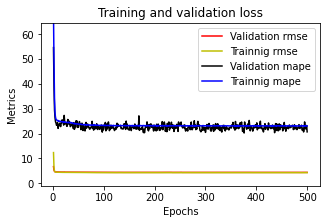

In [133]:
plotme(model6_1_2)

## sub-problem 7:  **input: distance & hour & all roadtypes with real distance**

In [134]:
df8 = df2.iloc[:,:].copy()
# df8 = df8.drop(['hour of day'], axis=1)
df8.head(20)

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0          2171           18  0.297612  0.267902    0.774648         0.873016   
1           799           21  0.300860  0.256891    0.721519         0.850746   
2           698           19  0.300104  0.267942    0.697368         0.841270   
3           806           17  0.309036  0.271396    0.654762         0.820896   
4           721           17  0.320189  0.305235    0.666667         0.763158   
5          1350           21  0.572806  0.540436    0.957627         0.991228   
7          1066            1  0.584081  0.557667    0.975610         1.000000   
8          1557           15  0.428309  0.307589    0.382812         0.644737   
9           714            0  0.309767  0.263158    0.666667         0.800000   
10          727           19  0.315827  0.267356    0.658537         0.870968   
11          894           17  0.318570  0.292777    0.625000         0.753425   
12          887           19  0.303458  0.267942    0.688312         0.841270   
13          778           20  0.300803  0.256714    0.610390         0.734375   
14          670           12  0.250720  0.254866    0.765625         0.803279   
15         2171           19  0.539162  0.535450    0.957627         0.991228   
16          577            3  0.317435  0.268298    0.682927         0.777778   
17          633           19  0.300509  0.267356    0.683544         0.870968   
18          771           11  0.304157  0.268246    0.653846         0.809524   
19          703           18  0.307657  0.271396    0.639535         0.820896   
20         1204           18  0.589282  0.556449    0.932773         0.940678   

    living_street  motorway  motorway_link    primary  ...  road  secondary  \
0             0.0       0.0            0.0   8720.782  ...   0.0        0.0   
1             0.0       0.0            0.0   9565.882  ...   0.0        0.0   
2             0.0       0.0            0.0   9206.024  ...   0.0        0.0   
3             0.0       0.0            0.0   9427.408  ...   0.0        0.0   
4             0.0       0.0            0.0   9206.024  ...   0.0        0.0   
5             0.0       0.0            0.0  17472.956  ...   0.0        0.0   
7             0.0       0.0            0.0  17472.956  ...   0.0        0.0   
8             0.0       0.0            0.0   8487.597  ...   0.0        0.0   
9             0.0       0.0            0.0   9206.024  ...   0.0        0.0   
10            0.0       0.0            0.0   9565.882  ...   0.0        0.0   
11            0.0       0.0            0.0   9565.882  ...   0.0        0.0   
12            0.0       0.0            0.0   9565.882  ...   0.0        0.0   
13            0.0       0.0            0.0   9206.024  ...   0.0        0.0   
14            0.0       0.0            0.0   8103.114  ...   0.0        0.0   
15            0.0       0.0            0.0  17472.956  ...   0.0        0.0   
16            0.0       0.0            0.0   9181.610  ...   0.0        0.0   
17            0.0       0.0            0.0   9206.024  ...   0.0        0.0   
18            0.0       0.0            0.0   9565.882  ...   0.0        0.0   
19            0.0       0.0            0.0   9565.882  ...   0.0        0.0   
20            0.0       0.0            0.0  18838.966  ...   0.0        0.0   

    secondary_link  service  tertiary  track  trunk  trunk_link  unclassified  \
0              0.0  357.834   691.246    0.0    0.0         0.0       818.161   
1              0.0    0.000  1011.418    0.0    0.0         0.0       102.520   
2              0.0  357.834  1011.418    0.0    0.0         0.0       102.520   
3              0.0  546.686   766.718    0.0    0.0         0.0       102.520   
4              0.0  630.686  1380.763    0.0    0.0         0.0       102.520   
5              0.0    0.000   762.581    0.0    0.0         0.0         0.000   
7              0.0    0.000  1168.612    0.0    0.0         0.0         0.0

In [148]:
# Normalize using Min/Max Normalization.
normalize=(df8['living_street']-df8['living_street'].min())/(df8['living_street'].max()-df8['living_street'].min())
df8['living_street'] = normalize
normalize=(df8['motorway']-df8['motorway'].min())/(df8['motorway'].max()-df8['motorway'].min())
df8['motorway'] = normalize
normalize=(df8['motorway_link']-df8['motorway_link'].min())/(df8['motorway_link'].max()-df8['motorway_link'].min())
df8['motorway_link'] = normalize
normalize=(df8['primary']-df8['primary'].min())/(df8['primary'].max()-df8['primary'].min())
df8['primary'] = normalize
normalize=(df8['primary_link']-df8['primary_link'].min())/(df8['primary_link'].max()-df8['primary_link'].min())
df8['primary_link'] = normalize
normalize=(df8['residential']-df8['residential'].min())/(df8['residential'].max()-df8['residential'].min())
df8['residential'] = normalize
normalize=(df8['road']-df8['road'].min())/(df8['road'].max()-df8['road'].min())
df8['road'] = normalize
normalize=(df8['secondary']-df8['secondary'].min())/(df8['secondary'].max()-df8['secondary'].min())
df8['secondary'] = normalize
normalize=(df8['secondary_link']-df8['secondary_link'].min())/(df8['secondary_link'].max()-df8['secondary_link'].min())
df8['secondary_link'] = normalize
normalize=(df8['service']-df8['service'].min())/(df8['service'].max()-df8['service'].min())
df8['service'] = normalize
normalize=(df8['tertiary']-df8['tertiary'].min())/(df8['tertiary'].max()-df8['tertiary'].min())
df8['tertiary'] = normalize
normalize=(df8['track']-df8['track'].min())/(df8['track'].max()-df8['track'].min())
df8['track'] = normalize
normalize=(df8['trunk']-df8['trunk'].min())/(df8['trunk'].max()-df8['trunk'].min())
df8['trunk'] = normalize
normalize=(df8['trunk_link']-df8['trunk_link'].min())/(df8['trunk_link'].max()-df8['trunk_link'].min())
df8['trunk_link'] = normalize
normalize=(df8['unclassified']-df8['unclassified'].min())/(df8['unclassified'].max()-df8['unclassified'].min())
df8['unclassified'] = normalize
normalize=(df8['others']-df8['others'].min())/(df8['others'].max()-df8['others'].min())
df8['others'] = normalize
df8 = df8.dropna(axis='columns', how ='all')
df8

travel time  hour of day  distance  est_dist  similarity  \
0             2171           18  0.297612  0.267902    0.774648   
1              799           21  0.300860  0.256891    0.721519   
2              698           19  0.300104  0.267942    0.697368   
3              806           17  0.309036  0.271396    0.654762   
4              721           17  0.320189  0.305235    0.666667   
...            ...          ...       ...       ...         ...   
16030         1700            8  0.613281  0.603781    0.686957   
16031         1337           22  0.602632  0.623736    0.771930   
16032         1240            1  0.616626  0.599978    0.715517   
16033         1266            3  0.624276  0.598862    0.714286   
16034         1216           23  0.607335  0.611778    0.728070   

       similarity_dijk  living_street  motorway  motorway_link   primary  \
0             0.873016            0.0       0.0            0.0  0.259807   
1             0.850746            0.0       0.0            0.0  0.284984   
2             0.841270            0.0       0.0            0.0  0.274263   
3             0.820896            0.0       0.0            0.0  0.280859   
4             0.763158            0.0       0.0            0.0  0.274263   
...                ...            ...       ...            ...       ...   
16030         0.718182            0.0       0.0            0.0  0.551571   
16031         0.778761            0.0       0.0            0.0  0.551571   
16032         0.754545            0.0       0.0            0.0  0.551571   
16033         0.765766            0.0       0.0            0.0  0.551571   
16034         0.734513            0.0       0.0            0.0  0.551571   

       primary_link  residential  road  secondary  secondary_link   service  \
0          0.276544     0.000000   0.0   0.000000             0.0  0.202110   
1          0.276544     0.004285   0.0   0.000000             0.0  0.000000   
2          0.276544     0.000000   0.0   0.000000             0.0  0.202110   
3          0.276544     0.026573   0.0   0.000000             0.0  0.308776   
4          0.276544     0.013809   0.0   0.000000             0.0  0.356220   
...             ...          ...   ...        ...             ...       ...   
16030      0.000000     0.000000   0.0   0.030001             0.0  0.000000   
16031      0.000000     0.014568   0.0   0.024733             0.0  0.000000   
16032      0.000000     0.000000   0.0   0.030001             0.0  0.000000   
16033      0.000000     0.046892   0.0   0.030001             0.0  0.000000   
16034      0.000000     0.012267   0.0   0.030001             0.0  0.000000   

       tertiary  track  unclassified  others  
0      0.053396    0.0      0.116085     0.0  
1      0.078128    0.0      0.014546     0.0  
2      0.078128    0.0      0.014546     0.0  
3      0.059226    0.0      0.014546     0.0  
4      0.106658    0.0      0.014546     0.0  
...         ...    ...           ...     ...  
16030  0.215151    0.0      0.000000     0.0  
16031  0.193042    0.0      0.000000     0.0  
16032  0.224455    0.0      0.000000     0.0  
16033  0.224455    0.0      0.000000     0.0  
16034  0.193042    0.0      0.000000     0.0  

[15949 rows x 20 columns]

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

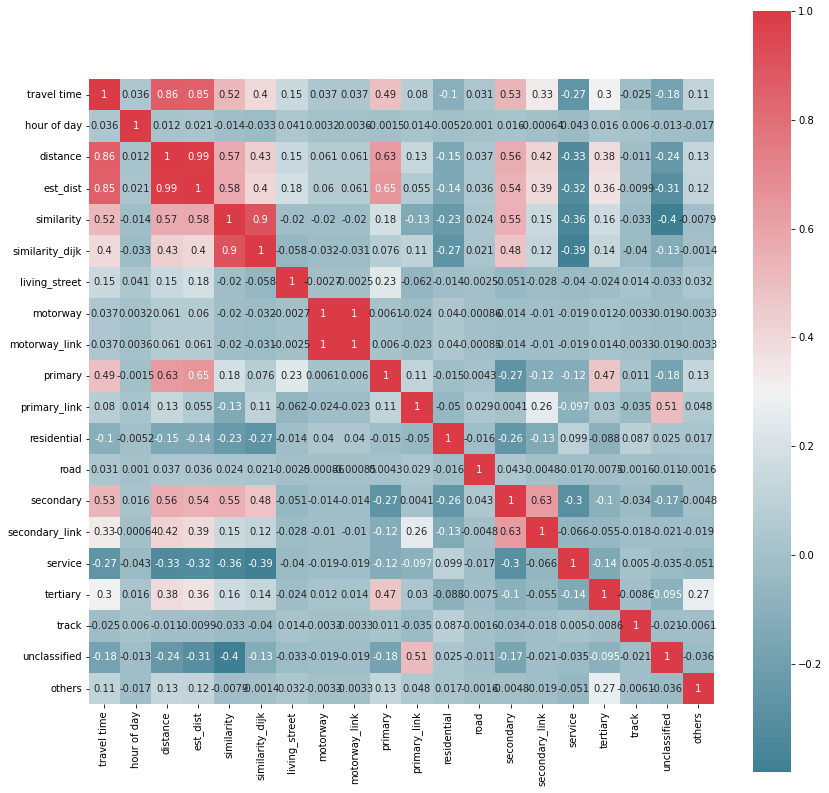

In [149]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(14,14))
corr = df8.corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [150]:
x = np.array(df8.iloc[:,3:])
y = np.array(df8['travel time'])
x

array([[0.26790189, 0.77464789, 0.87301587, ..., 0.        , 0.11608501,
        0.        ],
       [0.25689107, 0.72151899, 0.85074627, ..., 0.        , 0.01454608,
        0.        ],
       [0.26794166, 0.69736842, 0.84126984, ..., 0.        , 0.01454608,
        0.        ],
       ...,
       [0.59997829, 0.71551724, 0.75454545, ..., 0.        , 0.        ,
        0.        ],
       [0.59886182, 0.71428571, 0.76576577, ..., 0.        , 0.        ,
        0.        ],
       [0.61177756, 0.72807018, 0.73451327, ..., 0.        , 0.        ,
        0.        ]])

In [151]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [152]:
print(X_train.shape)
print(X_test.shape)
# X_train

(12759, 17)
(3190, 17)


In [153]:
# inputs: distance + roadtypes distance
model7_1_1 = nnmodel_(100,50, num_hlayers=2,Epoch=500)
model7_1_1

Epoch 1/500
399/399 [==============================] - 1s 1ms/step - loss: 586789.8125 - mape: 66.6745 - rmse: 766.0221 - val_loss: 120420.7812 - val_mape: 42.5769 - val_rmse: 347.0170
Epoch 2/500
399/399 [==============================] - 0s 817us/step - loss: 104999.7969 - mape: 39.4034 - rmse: 324.0367 - val_loss: 93623.7344 - val_mape: 34.5320 - val_rmse: 305.9799
Epoch 3/500
399/399 [==============================] - 0s 824us/step - loss: 84346.6641 - mape: 31.7430 - rmse: 290.4250 - val_loss: 80561.8906 - val_mape: 28.4190 - val_rmse: 283.8343
Epoch 4/500
399/399 [==============================] - 0s 824us/step - loss: 74353.7734 - mape: 27.3485 - rmse: 272.6789 - val_loss: 75014.2188 - val_mape: 26.2047 - val_rmse: 273.8872
Epoch 5/500
399/399 [==============================] - 0s 816us/step - loss: 69700.7734 - mape: 25.4104 - rmse: 264.0090 - val_loss: 71948.6094 - val_mape: 24.4749 - val_rmse: 268.2324
Epoch 6/500
399/399 [==============================] - 0s 832us/step - los

399/399 [==============================] - 0s 802us/step - loss: 64000.0391 - mape: 22.9063 - rmse: 252.9823 - val_loss: 67541.3047 - val_mape: 21.7132 - val_rmse: 259.8871
Epoch 90/500
399/399 [==============================] - 0s 788us/step - loss: 64068.5078 - mape: 22.7761 - rmse: 253.1176 - val_loss: 68677.8516 - val_mape: 24.7616 - val_rmse: 262.0646
Epoch 91/500
399/399 [==============================] - 0s 773us/step - loss: 63987.1875 - mape: 22.9151 - rmse: 252.9569 - val_loss: 67625.1250 - val_mape: 23.0073 - val_rmse: 260.0483
Epoch 92/500
399/399 [==============================] - 0s 813us/step - loss: 63951.9492 - mape: 22.8829 - rmse: 252.8872 - val_loss: 67464.2578 - val_mape: 21.7594 - val_rmse: 259.7388
Epoch 93/500
399/399 [==============================] - 0s 781us/step - loss: 63928.7578 - mape: 22.9454 - rmse: 252.8414 - val_loss: 67470.2109 - val_mape: 22.0379 - val_rmse: 259.7503
Epoch 94/500
399/399 [==============================] - 0s 801us/step - loss: 63998

Epoch 133/500
399/399 [==============================] - 0s 797us/step - loss: 62849.7422 - mape: 22.2668 - rmse: 250.6985 - val_loss: 66746.0469 - val_mape: 22.9399 - val_rmse: 258.3526
Epoch 134/500
399/399 [==============================] - 0s 794us/step - loss: 62845.5508 - mape: 22.2590 - rmse: 250.6902 - val_loss: 66615.4766 - val_mape: 22.7507 - val_rmse: 258.0997
Epoch 135/500
399/399 [==============================] - 0s 855us/step - loss: 62789.5781 - mape: 22.2638 - rmse: 250.5785 - val_loss: 67226.5469 - val_mape: 23.8475 - val_rmse: 259.2808
Epoch 136/500
399/399 [==============================] - 0s 815us/step - loss: 62789.7734 - mape: 22.2970 - rmse: 250.5789 - val_loss: 66370.2500 - val_mape: 22.3150 - val_rmse: 257.6242
Epoch 137/500
399/399 [==============================] - 0s 813us/step - loss: 62752.0625 - mape: 22.2497 - rmse: 250.5036 - val_loss: 66462.2812 - val_mape: 21.9938 - val_rmse: 257.8028
Epoch 138/500
399/399 [==============================] - 0s 809us

Epoch 177/500
399/399 [==============================] - 0s 818us/step - loss: 62103.6172 - mape: 21.9281 - rmse: 249.2060 - val_loss: 65949.7500 - val_mape: 21.0565 - val_rmse: 256.8068
Epoch 178/500
399/399 [==============================] - 0s 797us/step - loss: 62020.9609 - mape: 21.8784 - rmse: 249.0401 - val_loss: 65719.7578 - val_mape: 21.4422 - val_rmse: 256.3586
Epoch 179/500
399/399 [==============================] - 0s 791us/step - loss: 62062.7852 - mape: 22.0183 - rmse: 249.1240 - val_loss: 65977.1875 - val_mape: 20.1986 - val_rmse: 256.8603
Epoch 180/500
399/399 [==============================] - 0s 811us/step - loss: 62003.8906 - mape: 21.8591 - rmse: 249.0058 - val_loss: 66070.7031 - val_mape: 22.7212 - val_rmse: 257.0422
Epoch 181/500
399/399 [==============================] - 0s 776us/step - loss: 62042.2188 - mape: 21.9287 - rmse: 249.0827 - val_loss: 65921.5078 - val_mape: 22.2833 - val_rmse: 256.7518
Epoch 182/500
399/399 [==============================] - 0s 831us

Epoch 221/500
399/399 [==============================] - 0s 813us/step - loss: 61634.5039 - mape: 21.9182 - rmse: 248.2630 - val_loss: 66117.2734 - val_mape: 19.2719 - val_rmse: 257.1328
Epoch 222/500
399/399 [==============================] - 0s 773us/step - loss: 61715.6562 - mape: 21.7704 - rmse: 248.4264 - val_loss: 65498.5039 - val_mape: 21.4777 - val_rmse: 255.9268
Epoch 223/500
399/399 [==============================] - 0s 817us/step - loss: 61698.4531 - mape: 21.7947 - rmse: 248.3917 - val_loss: 65532.7188 - val_mape: 20.8374 - val_rmse: 255.9936
Epoch 224/500
399/399 [==============================] - 0s 799us/step - loss: 61674.6758 - mape: 21.8346 - rmse: 248.3439 - val_loss: 65957.0625 - val_mape: 19.5072 - val_rmse: 256.8211
Epoch 225/500
399/399 [==============================] - 0s 785us/step - loss: 61650.7148 - mape: 21.9600 - rmse: 248.2956 - val_loss: 66160.4141 - val_mape: 22.6664 - val_rmse: 257.2167
Epoch 226/500
399/399 [==============================] - 0s 815us

Epoch 265/500
399/399 [==============================] - 0s 829us/step - loss: 61497.3594 - mape: 21.8654 - rmse: 247.9866 - val_loss: 65338.3320 - val_mape: 20.5479 - val_rmse: 255.6136
Epoch 266/500
399/399 [==============================] - 0s 866us/step - loss: 61517.3281 - mape: 21.7719 - rmse: 248.0269 - val_loss: 65264.4414 - val_mape: 20.8914 - val_rmse: 255.4691
Epoch 267/500
399/399 [==============================] - 0s 893us/step - loss: 61565.3828 - mape: 21.7748 - rmse: 248.1237 - val_loss: 65353.7773 - val_mape: 21.9034 - val_rmse: 255.6438
Epoch 268/500
399/399 [==============================] - 0s 904us/step - loss: 61578.3477 - mape: 21.9060 - rmse: 248.1499 - val_loss: 65381.8164 - val_mape: 20.6189 - val_rmse: 255.6987
Epoch 269/500
399/399 [==============================] - 0s 914us/step - loss: 61519.9609 - mape: 21.7765 - rmse: 248.0322 - val_loss: 65382.4453 - val_mape: 20.3877 - val_rmse: 255.6999
Epoch 270/500
399/399 [==============================] - 0s 895us

Epoch 309/500
399/399 [==============================] - 0s 792us/step - loss: 61407.4648 - mape: 21.6966 - rmse: 247.8053 - val_loss: 65218.2734 - val_mape: 20.9130 - val_rmse: 255.3787
Epoch 310/500
399/399 [==============================] - 0s 819us/step - loss: 61413.3203 - mape: 21.8243 - rmse: 247.8171 - val_loss: 65586.6562 - val_mape: 19.6501 - val_rmse: 256.0989
Epoch 311/500
399/399 [==============================] - 0s 801us/step - loss: 61380.3555 - mape: 21.6705 - rmse: 247.7506 - val_loss: 65181.8281 - val_mape: 21.3715 - val_rmse: 255.3073
Epoch 312/500
399/399 [==============================] - 0s 765us/step - loss: 61361.0039 - mape: 21.8078 - rmse: 247.7115 - val_loss: 65264.4531 - val_mape: 20.7180 - val_rmse: 255.4691
Epoch 313/500
399/399 [==============================] - 0s 833us/step - loss: 61377.3633 - mape: 21.7764 - rmse: 247.7446 - val_loss: 65385.3281 - val_mape: 21.8511 - val_rmse: 255.7056
Epoch 314/500
399/399 [==============================] - 0s 819us

Epoch 353/500
399/399 [==============================] - 0s 806us/step - loss: 61336.5781 - mape: 21.7250 - rmse: 247.6622 - val_loss: 65101.5469 - val_mape: 21.2304 - val_rmse: 255.1501
Epoch 354/500
399/399 [==============================] - 0s 792us/step - loss: 61357.4805 - mape: 21.7390 - rmse: 247.7044 - val_loss: 65299.0195 - val_mape: 21.9597 - val_rmse: 255.5367
Epoch 355/500
399/399 [==============================] - 0s 831us/step - loss: 61299.6914 - mape: 21.6834 - rmse: 247.5877 - val_loss: 65166.3594 - val_mape: 20.9280 - val_rmse: 255.2770
Epoch 356/500
399/399 [==============================] - 0s 802us/step - loss: 61293.3203 - mape: 21.7864 - rmse: 247.5749 - val_loss: 65229.4102 - val_mape: 21.2826 - val_rmse: 255.4005
Epoch 357/500
399/399 [==============================] - 0s 791us/step - loss: 61291.2031 - mape: 21.7065 - rmse: 247.5706 - val_loss: 65161.3359 - val_mape: 20.7608 - val_rmse: 255.2672
Epoch 358/500
399/399 [==============================] - 0s 810us

Epoch 397/500
399/399 [==============================] - 0s 803us/step - loss: 61308.0273 - mape: 21.7415 - rmse: 247.6046 - val_loss: 65371.2734 - val_mape: 22.1953 - val_rmse: 255.6781
Epoch 398/500
399/399 [==============================] - 0s 830us/step - loss: 61260.0742 - mape: 21.7797 - rmse: 247.5077 - val_loss: 65221.7461 - val_mape: 20.4238 - val_rmse: 255.3855
Epoch 399/500
399/399 [==============================] - 0s 808us/step - loss: 61246.8906 - mape: 21.6892 - rmse: 247.4811 - val_loss: 65329.8242 - val_mape: 20.2931 - val_rmse: 255.5970
Epoch 400/500
399/399 [==============================] - 0s 811us/step - loss: 61243.0625 - mape: 21.7265 - rmse: 247.4734 - val_loss: 65318.6875 - val_mape: 22.4421 - val_rmse: 255.5752
Epoch 401/500
399/399 [==============================] - 0s 802us/step - loss: 61193.2930 - mape: 21.6732 - rmse: 247.3728 - val_loss: 65314.7500 - val_mape: 20.6953 - val_rmse: 255.5675
Epoch 402/500
399/399 [==============================] - 0s 808us

Epoch 441/500
399/399 [==============================] - 0s 788us/step - loss: 61274.9805 - mape: 21.7331 - rmse: 247.5378 - val_loss: 65232.6875 - val_mape: 20.4576 - val_rmse: 255.4069
Epoch 442/500
399/399 [==============================] - 0s 816us/step - loss: 61212.1562 - mape: 21.6789 - rmse: 247.4109 - val_loss: 65483.2891 - val_mape: 19.6641 - val_rmse: 255.8970
Epoch 443/500
399/399 [==============================] - 0s 823us/step - loss: 61207.6562 - mape: 21.7007 - rmse: 247.4018 - val_loss: 65182.6914 - val_mape: 20.5372 - val_rmse: 255.3090
Epoch 444/500
399/399 [==============================] - 0s 799us/step - loss: 61243.7422 - mape: 21.6236 - rmse: 247.4747 - val_loss: 65073.4336 - val_mape: 21.8139 - val_rmse: 255.0950
Epoch 445/500
399/399 [==============================] - 0s 849us/step - loss: 61170.0938 - mape: 21.7438 - rmse: 247.3259 - val_loss: 65243.3242 - val_mape: 21.0138 - val_rmse: 255.4277
Epoch 446/500
399/399 [==============================] - 0s 778us

Epoch 485/500
399/399 [==============================] - 0s 797us/step - loss: 61103.1094 - mape: 21.6841 - rmse: 247.1904 - val_loss: 65767.2344 - val_mape: 22.8478 - val_rmse: 256.4512
Epoch 486/500
399/399 [==============================] - 0s 827us/step - loss: 61189.5273 - mape: 21.8283 - rmse: 247.3652 - val_loss: 65325.7383 - val_mape: 20.9243 - val_rmse: 255.5890
Epoch 487/500
399/399 [==============================] - 0s 799us/step - loss: 61203.3984 - mape: 21.6157 - rmse: 247.3932 - val_loss: 65123.5195 - val_mape: 21.2185 - val_rmse: 255.1931
Epoch 488/500
399/399 [==============================] - 0s 782us/step - loss: 61060.8398 - mape: 21.6406 - rmse: 247.1049 - val_loss: 65094.2891 - val_mape: 21.3469 - val_rmse: 255.1358
Epoch 489/500
399/399 [==============================] - 0s 824us/step - loss: 61198.5312 - mape: 21.7366 - rmse: 247.3834 - val_loss: 65214.3711 - val_mape: 21.3936 - val_rmse: 255.3710
Epoch 490/500
399/399 [==============================] - 0s 786us

In [154]:
# plotme(model7_1_1)

In [155]:
# inputs: distance + hour + roadtypes distance
model7_1_2 = nnmodel_(200,100, num_hlayers=2,Epoch=500)
model7_1_2

Epoch 1/500
399/399 [==============================] - 1s 1ms/step - loss: 420862.8750 - mape: 58.6603 - rmse: 648.7394 - val_loss: 106002.8906 - val_mape: 39.0840 - val_rmse: 325.5808
Epoch 2/500
399/399 [==============================] - 0s 946us/step - loss: 90170.0156 - mape: 33.8636 - rmse: 300.2832 - val_loss: 81636.7422 - val_mape: 28.7522 - val_rmse: 285.7214
Epoch 3/500
399/399 [==============================] - 0s 963us/step - loss: 74018.4375 - mape: 27.1288 - rmse: 272.0633 - val_loss: 74054.7656 - val_mape: 25.4008 - val_rmse: 272.1301
Epoch 4/500
399/399 [==============================] - 0s 932us/step - loss: 68485.8203 - mape: 24.6846 - rmse: 261.6980 - val_loss: 70363.6641 - val_mape: 23.1321 - val_rmse: 265.2615
Epoch 5/500
399/399 [==============================] - 0s 926us/step - loss: 66397.2031 - mape: 23.9918 - rmse: 257.6765 - val_loss: 69067.2109 - val_mape: 22.6308 - val_rmse: 262.8064
Epoch 6/500
399/399 [==============================] - 0s 978us/step - loss

399/399 [==============================] - 0s 931us/step - loss: 63526.4648 - mape: 22.7443 - rmse: 252.0446 - val_loss: 66817.0625 - val_mape: 21.9972 - val_rmse: 258.4900
Epoch 90/500
399/399 [==============================] - 0s 973us/step - loss: 63463.4453 - mape: 22.8270 - rmse: 251.9195 - val_loss: 67417.0703 - val_mape: 23.5356 - val_rmse: 259.6480
Epoch 91/500
399/399 [==============================] - 0s 909us/step - loss: 63430.6094 - mape: 22.7202 - rmse: 251.8543 - val_loss: 66839.8672 - val_mape: 22.6351 - val_rmse: 258.5341
Epoch 92/500
399/399 [==============================] - 0s 941us/step - loss: 63389.5430 - mape: 22.8192 - rmse: 251.7728 - val_loss: 67942.1641 - val_mape: 24.3089 - val_rmse: 260.6572
Epoch 93/500
399/399 [==============================] - 0s 936us/step - loss: 63512.5820 - mape: 22.7871 - rmse: 252.0170 - val_loss: 67895.6172 - val_mape: 24.1492 - val_rmse: 260.5679
Epoch 94/500
399/399 [==============================] - 0s 958us/step - loss: 63410

Epoch 133/500
399/399 [==============================] - 0s 926us/step - loss: 63134.7734 - mape: 22.6205 - rmse: 251.2663 - val_loss: 66561.8984 - val_mape: 21.9164 - val_rmse: 257.9959
Epoch 134/500
399/399 [==============================] - 0s 967us/step - loss: 63107.4297 - mape: 22.6310 - rmse: 251.2119 - val_loss: 67014.1250 - val_mape: 22.9666 - val_rmse: 258.8709
Epoch 135/500
399/399 [==============================] - 0s 953us/step - loss: 63116.9961 - mape: 22.5765 - rmse: 251.2310 - val_loss: 67033.3594 - val_mape: 20.6700 - val_rmse: 258.9080
Epoch 136/500
399/399 [==============================] - 0s 940us/step - loss: 63090.3398 - mape: 22.5834 - rmse: 251.1779 - val_loss: 66545.2578 - val_mape: 21.6131 - val_rmse: 257.9637
Epoch 137/500
399/399 [==============================] - 0s 945us/step - loss: 63086.7891 - mape: 22.6519 - rmse: 251.1708 - val_loss: 66983.0547 - val_mape: 22.8559 - val_rmse: 258.8109
Epoch 138/500
399/399 [==============================] - 0s 927us

Epoch 177/500
399/399 [==============================] - 0s 992us/step - loss: 62554.1445 - mape: 22.1685 - rmse: 250.1083 - val_loss: 66117.3203 - val_mape: 22.4013 - val_rmse: 257.1329
Epoch 178/500
399/399 [==============================] - 0s 933us/step - loss: 62584.3086 - mape: 22.2654 - rmse: 250.1686 - val_loss: 66134.8906 - val_mape: 21.2480 - val_rmse: 257.1671
Epoch 179/500
399/399 [==============================] - 0s 1ms/step - loss: 62499.7148 - mape: 22.2956 - rmse: 249.9994 - val_loss: 66243.3828 - val_mape: 22.2456 - val_rmse: 257.3779
Epoch 180/500
399/399 [==============================] - 0s 1ms/step - loss: 62573.6055 - mape: 22.1258 - rmse: 250.1472 - val_loss: 66021.0469 - val_mape: 21.8318 - val_rmse: 256.9456
Epoch 181/500
399/399 [==============================] - 0s 1ms/step - loss: 62592.6914 - mape: 22.3029 - rmse: 250.1853 - val_loss: 66155.9688 - val_mape: 22.4311 - val_rmse: 257.2080
Epoch 182/500
399/399 [==============================] - 0s 908us/step 

Epoch 221/500
399/399 [==============================] - 0s 915us/step - loss: 62266.7188 - mape: 21.9831 - rmse: 249.5330 - val_loss: 67866.3750 - val_mape: 24.4710 - val_rmse: 260.5117
Epoch 222/500
399/399 [==============================] - 0s 952us/step - loss: 62293.1719 - mape: 22.1536 - rmse: 249.5860 - val_loss: 65929.1328 - val_mape: 21.9677 - val_rmse: 256.7667
Epoch 223/500
399/399 [==============================] - 0s 946us/step - loss: 62218.4219 - mape: 22.0128 - rmse: 249.4362 - val_loss: 65951.3281 - val_mape: 22.0248 - val_rmse: 256.8099
Epoch 224/500
399/399 [==============================] - 0s 932us/step - loss: 62305.6836 - mape: 22.1356 - rmse: 249.6111 - val_loss: 65920.4688 - val_mape: 20.9020 - val_rmse: 256.7498
Epoch 225/500
399/399 [==============================] - 0s 958us/step - loss: 62226.9844 - mape: 21.9834 - rmse: 249.4534 - val_loss: 65810.0234 - val_mape: 21.2556 - val_rmse: 256.5346
Epoch 226/500
399/399 [==============================] - 0s 908us

Epoch 265/500
399/399 [==============================] - 0s 952us/step - loss: 62191.7734 - mape: 22.1356 - rmse: 249.3828 - val_loss: 66071.5078 - val_mape: 21.0261 - val_rmse: 257.0438
Epoch 266/500
399/399 [==============================] - 0s 946us/step - loss: 62166.7188 - mape: 21.8780 - rmse: 249.3326 - val_loss: 65753.6562 - val_mape: 21.4435 - val_rmse: 256.4247
Epoch 267/500
399/399 [==============================] - 0s 962us/step - loss: 62082.5742 - mape: 21.9755 - rmse: 249.1638 - val_loss: 65788.8516 - val_mape: 21.2772 - val_rmse: 256.4934
Epoch 268/500
399/399 [==============================] - 0s 947us/step - loss: 62090.5742 - mape: 22.0879 - rmse: 249.1798 - val_loss: 66654.8438 - val_mape: 22.8134 - val_rmse: 258.1760
Epoch 269/500
399/399 [==============================] - 0s 956us/step - loss: 61983.1328 - mape: 22.0448 - rmse: 248.9641 - val_loss: 66470.2266 - val_mape: 22.9748 - val_rmse: 257.8182
Epoch 270/500
399/399 [==============================] - 0s 937us

Epoch 309/500
399/399 [==============================] - 0s 947us/step - loss: 61832.7227 - mape: 21.8932 - rmse: 248.6619 - val_loss: 65607.7812 - val_mape: 21.0597 - val_rmse: 256.1402
Epoch 310/500
399/399 [==============================] - 0s 941us/step - loss: 61761.2734 - mape: 21.8946 - rmse: 248.5182 - val_loss: 65663.2188 - val_mape: 21.7531 - val_rmse: 256.2484
Epoch 311/500
399/399 [==============================] - 0s 921us/step - loss: 61737.6992 - mape: 21.8262 - rmse: 248.4707 - val_loss: 66708.7031 - val_mape: 23.5294 - val_rmse: 258.2803
Epoch 312/500
399/399 [==============================] - 0s 953us/step - loss: 61785.2969 - mape: 21.9805 - rmse: 248.5665 - val_loss: 65596.0078 - val_mape: 21.9092 - val_rmse: 256.1172
Epoch 313/500
399/399 [==============================] - 0s 907us/step - loss: 61676.3867 - mape: 21.8497 - rmse: 248.3473 - val_loss: 67346.9453 - val_mape: 24.5321 - val_rmse: 259.5129
Epoch 314/500
399/399 [==============================] - 0s 905us

Epoch 353/500
399/399 [==============================] - 0s 918us/step - loss: 61499.1289 - mape: 21.7541 - rmse: 247.9902 - val_loss: 66283.7266 - val_mape: 19.5174 - val_rmse: 257.4563
Epoch 354/500
399/399 [==============================] - 0s 932us/step - loss: 61566.3594 - mape: 21.9762 - rmse: 248.1257 - val_loss: 65565.6562 - val_mape: 20.6132 - val_rmse: 256.0579
Epoch 355/500
399/399 [==============================] - 0s 951us/step - loss: 61436.7461 - mape: 21.7764 - rmse: 247.8644 - val_loss: 65457.0898 - val_mape: 20.8860 - val_rmse: 255.8458
Epoch 356/500
399/399 [==============================] - 0s 951us/step - loss: 61527.6602 - mape: 21.7562 - rmse: 248.0477 - val_loss: 65748.9531 - val_mape: 20.0463 - val_rmse: 256.4156
Epoch 357/500
399/399 [==============================] - 0s 918us/step - loss: 61477.1172 - mape: 21.8073 - rmse: 247.9458 - val_loss: 65418.7734 - val_mape: 21.3972 - val_rmse: 255.7709
Epoch 358/500
399/399 [==============================] - 0s 921us

Epoch 397/500
399/399 [==============================] - 0s 946us/step - loss: 61319.9805 - mape: 21.7459 - rmse: 247.6287 - val_loss: 65575.1953 - val_mape: 22.2285 - val_rmse: 256.0765
Epoch 398/500
399/399 [==============================] - 0s 912us/step - loss: 61333.9453 - mape: 21.7776 - rmse: 247.6569 - val_loss: 65711.7578 - val_mape: 20.0845 - val_rmse: 256.3430
Epoch 399/500
399/399 [==============================] - 0s 956us/step - loss: 61360.1250 - mape: 21.7042 - rmse: 247.7098 - val_loss: 65596.1953 - val_mape: 22.4292 - val_rmse: 256.1176
Epoch 400/500
399/399 [==============================] - 0s 903us/step - loss: 61293.1484 - mape: 21.7502 - rmse: 247.5745 - val_loss: 65403.5156 - val_mape: 20.5801 - val_rmse: 255.7411
Epoch 401/500
399/399 [==============================] - 0s 921us/step - loss: 61414.4922 - mape: 21.8190 - rmse: 247.8195 - val_loss: 65613.4375 - val_mape: 22.2739 - val_rmse: 256.1512
Epoch 402/500
399/399 [==============================] - 0s 931us

Epoch 441/500
399/399 [==============================] - 0s 951us/step - loss: 61129.3086 - mape: 21.6063 - rmse: 247.2434 - val_loss: 65220.3047 - val_mape: 21.7349 - val_rmse: 255.3827
Epoch 442/500
399/399 [==============================] - 0s 942us/step - loss: 61170.2930 - mape: 21.7044 - rmse: 247.3263 - val_loss: 65349.9141 - val_mape: 22.1069 - val_rmse: 255.6363
Epoch 443/500
399/399 [==============================] - 0s 926us/step - loss: 61189.2773 - mape: 21.6713 - rmse: 247.3647 - val_loss: 65283.3320 - val_mape: 21.6640 - val_rmse: 255.5060
Epoch 444/500
399/399 [==============================] - 0s 939us/step - loss: 61170.3398 - mape: 21.6779 - rmse: 247.3264 - val_loss: 65212.9688 - val_mape: 21.0533 - val_rmse: 255.3683
Epoch 445/500
399/399 [==============================] - 0s 923us/step - loss: 61140.8750 - mape: 21.5966 - rmse: 247.2668 - val_loss: 65291.1797 - val_mape: 20.5963 - val_rmse: 255.5214
Epoch 446/500
399/399 [==============================] - 0s 931us

Epoch 485/500
399/399 [==============================] - 0s 954us/step - loss: 60991.7500 - mape: 21.6028 - rmse: 246.9651 - val_loss: 65027.4844 - val_mape: 21.2165 - val_rmse: 255.0049
Epoch 486/500
399/399 [==============================] - 0s 932us/step - loss: 60936.5664 - mape: 21.6393 - rmse: 246.8533 - val_loss: 65077.1094 - val_mape: 20.8753 - val_rmse: 255.1022
Epoch 487/500
399/399 [==============================] - 0s 959us/step - loss: 60921.3320 - mape: 21.6568 - rmse: 246.8225 - val_loss: 66354.5625 - val_mape: 23.2525 - val_rmse: 257.5938
Epoch 488/500
399/399 [==============================] - 0s 925us/step - loss: 60937.5820 - mape: 21.6376 - rmse: 246.8554 - val_loss: 65286.0508 - val_mape: 21.4353 - val_rmse: 255.5114
Epoch 489/500
399/399 [==============================] - 0s 924us/step - loss: 60898.5312 - mape: 21.5543 - rmse: 246.7763 - val_loss: 65045.2227 - val_mape: 21.6343 - val_rmse: 255.0396
Epoch 490/500
399/399 [==============================] - 0s 973us

In [156]:
# plotme(model7_1_2)

In [157]:
# inputs: distance + roadtypes distance
model7_1_3 = nnmodel_(50, num_hlayers=1,Epoch=500)
model7_1_3

Epoch 1/500
399/399 [==============================] - 1s 878us/step - loss: 1003464.0000 - mape: 97.8574 - rmse: 1001.7305 - val_loss: 983606.2500 - val_mape: 93.9334 - val_rmse: 991.7692
Epoch 2/500
399/399 [==============================] - 0s 797us/step - loss: 851970.7500 - mape: 86.1851 - rmse: 923.0226 - val_loss: 766803.6875 - val_mape: 77.1785 - val_rmse: 875.6733
Epoch 3/500
399/399 [==============================] - 0s 757us/step - loss: 615139.3125 - mape: 65.4653 - rmse: 784.3082 - val_loss: 508258.6250 - val_mape: 53.3885 - val_rmse: 712.9226
Epoch 4/500
399/399 [==============================] - 0s 769us/step - loss: 385401.0625 - mape: 43.4661 - rmse: 620.8068 - val_loss: 301473.0312 - val_mape: 36.0313 - val_rmse: 549.0656
Epoch 5/500
399/399 [==============================] - 0s 737us/step - loss: 228933.7969 - mape: 34.2404 - rmse: 478.4703 - val_loss: 183457.6875 - val_mape: 34.1436 - val_rmse: 428.3196
Epoch 6/500
399/399 [==============================] - 0s 763us

Epoch 45/500
399/399 [==============================] - 0s 764us/step - loss: 65545.2734 - mape: 23.4933 - rmse: 256.0181 - val_loss: 68833.8047 - val_mape: 23.1789 - val_rmse: 262.3620
Epoch 46/500
399/399 [==============================] - 0s 762us/step - loss: 65491.8633 - mape: 23.5530 - rmse: 255.9138 - val_loss: 68776.2812 - val_mape: 23.1575 - val_rmse: 262.2523
Epoch 47/500
399/399 [==============================] - 0s 753us/step - loss: 65449.8125 - mape: 23.4304 - rmse: 255.8316 - val_loss: 68735.8984 - val_mape: 23.2042 - val_rmse: 262.1753
Epoch 48/500
399/399 [==============================] - 0s 749us/step - loss: 65408.4531 - mape: 23.5480 - rmse: 255.7508 - val_loss: 68663.3125 - val_mape: 22.7661 - val_rmse: 262.0369
Epoch 49/500
399/399 [==============================] - 0s 714us/step - loss: 65352.8945 - mape: 23.4744 - rmse: 255.6421 - val_loss: 68627.0000 - val_mape: 22.6158 - val_rmse: 261.9676
Epoch 50/500
399/399 [==============================] - 0s 758us/step 

399/399 [==============================] - 0s 728us/step - loss: 65053.2891 - mape: 23.2299 - rmse: 255.0555 - val_loss: 68328.6094 - val_mape: 22.8747 - val_rmse: 261.3974
Epoch 90/500
399/399 [==============================] - 0s 755us/step - loss: 65040.0781 - mape: 23.1734 - rmse: 255.0296 - val_loss: 68338.7422 - val_mape: 22.9023 - val_rmse: 261.4168
Epoch 91/500
399/399 [==============================] - 0s 745us/step - loss: 65021.8828 - mape: 23.2750 - rmse: 254.9939 - val_loss: 68312.4062 - val_mape: 22.3566 - val_rmse: 261.3664
Epoch 92/500
399/399 [==============================] - 0s 757us/step - loss: 65018.5039 - mape: 23.2123 - rmse: 254.9873 - val_loss: 68333.3828 - val_mape: 22.1653 - val_rmse: 261.4066
Epoch 93/500
399/399 [==============================] - 0s 741us/step - loss: 65048.3984 - mape: 22.9269 - rmse: 255.0459 - val_loss: 68396.8672 - val_mape: 23.2386 - val_rmse: 261.5280
Epoch 94/500
399/399 [==============================] - 0s 750us/step - loss: 65047

Epoch 133/500
399/399 [==============================] - 0s 732us/step - loss: 64993.0703 - mape: 23.0181 - rmse: 254.9374 - val_loss: 68383.7344 - val_mape: 23.1045 - val_rmse: 261.5028
Epoch 134/500
399/399 [==============================] - 0s 821us/step - loss: 65009.3828 - mape: 23.2104 - rmse: 254.9694 - val_loss: 68331.5078 - val_mape: 22.7530 - val_rmse: 261.4030
Epoch 135/500
399/399 [==============================] - 0s 726us/step - loss: 64999.3555 - mape: 23.0913 - rmse: 254.9497 - val_loss: 68382.7891 - val_mape: 23.0928 - val_rmse: 261.5010
Epoch 136/500
399/399 [==============================] - 0s 747us/step - loss: 65008.5000 - mape: 23.2404 - rmse: 254.9677 - val_loss: 68334.0156 - val_mape: 22.7626 - val_rmse: 261.4077
Epoch 137/500
399/399 [==============================] - 0s 754us/step - loss: 65003.8086 - mape: 23.1360 - rmse: 254.9585 - val_loss: 68343.8281 - val_mape: 22.8012 - val_rmse: 261.4265
Epoch 138/500
399/399 [==============================] - 0s 738us

Epoch 177/500
399/399 [==============================] - 0s 755us/step - loss: 64988.3203 - mape: 23.1480 - rmse: 254.9281 - val_loss: 68364.9531 - val_mape: 22.8530 - val_rmse: 261.4669
Epoch 178/500
399/399 [==============================] - 0s 774us/step - loss: 64986.8828 - mape: 23.1618 - rmse: 254.9252 - val_loss: 68339.1562 - val_mape: 22.6120 - val_rmse: 261.4176
Epoch 179/500
399/399 [==============================] - 0s 740us/step - loss: 65008.9570 - mape: 23.1778 - rmse: 254.9685 - val_loss: 68342.1406 - val_mape: 22.4298 - val_rmse: 261.4233
Epoch 180/500
399/399 [==============================] - 0s 767us/step - loss: 64987.2812 - mape: 23.1370 - rmse: 254.9260 - val_loss: 68352.0781 - val_mape: 22.7446 - val_rmse: 261.4423
Epoch 181/500
399/399 [==============================] - 0s 767us/step - loss: 64991.3672 - mape: 23.1522 - rmse: 254.9341 - val_loss: 68356.0703 - val_mape: 22.7036 - val_rmse: 261.4500
Epoch 182/500
399/399 [==============================] - 0s 754us

Epoch 221/500
399/399 [==============================] - 0s 743us/step - loss: 64980.1992 - mape: 23.0252 - rmse: 254.9121 - val_loss: 68380.2656 - val_mape: 22.8739 - val_rmse: 261.4962
Epoch 222/500
399/399 [==============================] - 0s 747us/step - loss: 64984.1758 - mape: 23.1223 - rmse: 254.9199 - val_loss: 68365.2109 - val_mape: 22.7828 - val_rmse: 261.4674
Epoch 223/500
399/399 [==============================] - 0s 728us/step - loss: 64982.7969 - mape: 23.1088 - rmse: 254.9172 - val_loss: 68407.1016 - val_mape: 23.0707 - val_rmse: 261.5475
Epoch 224/500
399/399 [==============================] - 0s 759us/step - loss: 64975.6836 - mape: 23.1928 - rmse: 254.9033 - val_loss: 68359.9141 - val_mape: 22.7930 - val_rmse: 261.4573
Epoch 225/500
399/399 [==============================] - 0s 749us/step - loss: 64995.7539 - mape: 23.1349 - rmse: 254.9426 - val_loss: 68433.6094 - val_mape: 23.1900 - val_rmse: 261.5982
Epoch 226/500
399/399 [==============================] - 0s 743us

Epoch 265/500
399/399 [==============================] - 0s 725us/step - loss: 64976.6133 - mape: 23.1271 - rmse: 254.9051 - val_loss: 68371.4375 - val_mape: 22.8319 - val_rmse: 261.4793
Epoch 266/500
399/399 [==============================] - 0s 710us/step - loss: 64980.6719 - mape: 23.1448 - rmse: 254.9131 - val_loss: 68385.5078 - val_mape: 22.8984 - val_rmse: 261.5062
Epoch 267/500
399/399 [==============================] - 0s 745us/step - loss: 64978.1992 - mape: 23.2046 - rmse: 254.9082 - val_loss: 68364.6328 - val_mape: 22.7098 - val_rmse: 261.4663
Epoch 268/500
399/399 [==============================] - 0s 740us/step - loss: 64977.6914 - mape: 23.1101 - rmse: 254.9072 - val_loss: 68395.4844 - val_mape: 22.9418 - val_rmse: 261.5253
Epoch 269/500
399/399 [==============================] - 0s 756us/step - loss: 64973.6133 - mape: 23.1368 - rmse: 254.8992 - val_loss: 68373.1953 - val_mape: 22.7798 - val_rmse: 261.4827
Epoch 270/500
399/399 [==============================] - 0s 805us

Epoch 309/500
399/399 [==============================] - 0s 749us/step - loss: 64969.0352 - mape: 23.0787 - rmse: 254.8902 - val_loss: 68376.5000 - val_mape: 22.7972 - val_rmse: 261.4890
Epoch 310/500
399/399 [==============================] - 0s 756us/step - loss: 64960.5469 - mape: 23.2392 - rmse: 254.8736 - val_loss: 68372.3750 - val_mape: 22.2689 - val_rmse: 261.4811
Epoch 311/500
399/399 [==============================] - 0s 752us/step - loss: 64969.2891 - mape: 23.0768 - rmse: 254.8907 - val_loss: 68383.1094 - val_mape: 22.8212 - val_rmse: 261.5016
Epoch 312/500
399/399 [==============================] - 0s 729us/step - loss: 64968.1211 - mape: 23.1281 - rmse: 254.8884 - val_loss: 68375.0391 - val_mape: 22.7237 - val_rmse: 261.4862
Epoch 313/500
399/399 [==============================] - 0s 767us/step - loss: 64966.5117 - mape: 23.1024 - rmse: 254.8853 - val_loss: 68411.7188 - val_mape: 23.0046 - val_rmse: 261.5563
Epoch 314/500
399/399 [==============================] - 0s 746us

Epoch 353/500
399/399 [==============================] - 0s 743us/step - loss: 64861.4531 - mape: 23.1627 - rmse: 254.6791 - val_loss: 68256.0625 - val_mape: 22.3826 - val_rmse: 261.2586
Epoch 354/500
399/399 [==============================] - 0s 759us/step - loss: 64861.5586 - mape: 23.0707 - rmse: 254.6793 - val_loss: 68265.4688 - val_mape: 22.8603 - val_rmse: 261.2766
Epoch 355/500
399/399 [==============================] - 0s 799us/step - loss: 64861.6562 - mape: 23.1368 - rmse: 254.6795 - val_loss: 68279.8516 - val_mape: 22.9574 - val_rmse: 261.3041
Epoch 356/500
399/399 [==============================] - 0s 796us/step - loss: 64838.4844 - mape: 23.0722 - rmse: 254.6340 - val_loss: 68271.3359 - val_mape: 23.0060 - val_rmse: 261.2878
Epoch 357/500
399/399 [==============================] - 0s 736us/step - loss: 64827.4141 - mape: 23.1625 - rmse: 254.6123 - val_loss: 68204.0703 - val_mape: 22.5109 - val_rmse: 261.1591
Epoch 358/500
399/399 [==============================] - 0s 748us

Epoch 397/500
399/399 [==============================] - 0s 727us/step - loss: 64432.1289 - mape: 22.8628 - rmse: 253.8348 - val_loss: 67894.1328 - val_mape: 22.8627 - val_rmse: 260.5650
Epoch 398/500
399/399 [==============================] - 0s 718us/step - loss: 64447.0977 - mape: 22.9499 - rmse: 253.8643 - val_loss: 67830.0547 - val_mape: 22.4797 - val_rmse: 260.4420
Epoch 399/500
399/399 [==============================] - 0s 722us/step - loss: 64436.3984 - mape: 22.8255 - rmse: 253.8433 - val_loss: 67858.9844 - val_mape: 22.7226 - val_rmse: 260.4976
Epoch 400/500
399/399 [==============================] - 0s 725us/step - loss: 64433.9102 - mape: 22.8482 - rmse: 253.8383 - val_loss: 67850.1797 - val_mape: 22.7151 - val_rmse: 260.4807
Epoch 401/500
399/399 [==============================] - 0s 739us/step - loss: 64422.5352 - mape: 22.8701 - rmse: 253.8159 - val_loss: 67837.3594 - val_mape: 22.6603 - val_rmse: 260.4561
Epoch 402/500
399/399 [==============================] - 0s 770us

Epoch 441/500
399/399 [==============================] - 0s 706us/step - loss: 64130.0312 - mape: 22.6750 - rmse: 253.2391 - val_loss: 67514.6953 - val_mape: 22.2827 - val_rmse: 259.8359
Epoch 442/500
399/399 [==============================] - 0s 791us/step - loss: 64123.1250 - mape: 22.7361 - rmse: 253.2254 - val_loss: 67518.6797 - val_mape: 22.4189 - val_rmse: 259.8436
Epoch 443/500
399/399 [==============================] - 0s 715us/step - loss: 64110.2031 - mape: 22.7337 - rmse: 253.1999 - val_loss: 67490.8984 - val_mape: 22.0895 - val_rmse: 259.7901
Epoch 444/500
399/399 [==============================] - 0s 764us/step - loss: 64102.3281 - mape: 22.7513 - rmse: 253.1844 - val_loss: 67509.1484 - val_mape: 22.4130 - val_rmse: 259.8252
Epoch 445/500
399/399 [==============================] - 0s 744us/step - loss: 64116.8906 - mape: 22.7558 - rmse: 253.2131 - val_loss: 67483.5391 - val_mape: 22.2120 - val_rmse: 259.7759
Epoch 446/500
399/399 [==============================] - 0s 758us

Epoch 485/500
399/399 [==============================] - 0s 782us/step - loss: 63826.4727 - mape: 22.6506 - rmse: 252.6390 - val_loss: 67231.6875 - val_mape: 22.0540 - val_rmse: 259.2907
Epoch 486/500
399/399 [==============================] - 0s 797us/step - loss: 63807.1367 - mape: 22.6100 - rmse: 252.6007 - val_loss: 67255.6641 - val_mape: 22.3684 - val_rmse: 259.3370
Epoch 487/500
399/399 [==============================] - 0s 759us/step - loss: 63805.6367 - mape: 22.6432 - rmse: 252.5978 - val_loss: 67244.7109 - val_mape: 22.3156 - val_rmse: 259.3159
Epoch 488/500
399/399 [==============================] - 0s 771us/step - loss: 63819.7031 - mape: 22.6238 - rmse: 252.6256 - val_loss: 67209.3672 - val_mape: 22.0049 - val_rmse: 259.2477
Epoch 489/500
399/399 [==============================] - 0s 726us/step - loss: 63821.7656 - mape: 22.5849 - rmse: 252.6297 - val_loss: 67230.7969 - val_mape: 22.3555 - val_rmse: 259.2890
Epoch 490/500
399/399 [==============================] - 0s 755us

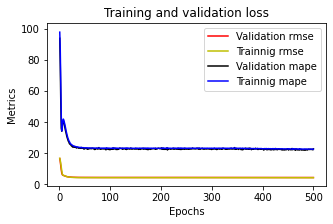

In [158]:
plotme(model7_1_3)

In [159]:
# inputs: distance + roadtypes distance
model7_1_4 = nnmodel_(10, num_hlayers=1,Epoch=500)
model7_1_4

Epoch 1/500
399/399 [==============================] - 1s 910us/step - loss: 1025297.1875 - mape: 99.4571 - rmse: 1012.5696 - val_loss: 1048617.6250 - val_mape: 98.4723 - val_rmse: 1024.0203
Epoch 2/500
399/399 [==============================] - 0s 770us/step - loss: 988588.8125 - mape: 96.7193 - rmse: 994.2780 - val_loss: 995638.0000 - val_mape: 94.6886 - val_rmse: 997.8166
Epoch 3/500
399/399 [==============================] - 0s 759us/step - loss: 925664.8750 - mape: 91.9172 - rmse: 962.1148 - val_loss: 919336.5000 - val_mape: 89.0554 - val_rmse: 958.8204
Epoch 4/500
399/399 [==============================] - 0s 773us/step - loss: 843593.5000 - mape: 85.4035 - rmse: 918.4734 - val_loss: 826861.3125 - val_mape: 81.8631 - val_rmse: 909.3192
Epoch 5/500
399/399 [==============================] - 0s 732us/step - loss: 749544.0625 - mape: 77.5518 - rmse: 865.7621 - val_loss: 725281.9375 - val_mape: 73.4036 - val_rmse: 851.6349
Epoch 6/500
399/399 [==============================] - 0s 749

Epoch 45/500
399/399 [==============================] - 0s 695us/step - loss: 71645.5312 - mape: 25.6630 - rmse: 267.6668 - val_loss: 74787.2734 - val_mape: 24.9646 - val_rmse: 273.4726
Epoch 46/500
399/399 [==============================] - 0s 761us/step - loss: 71255.9453 - mape: 25.4481 - rmse: 266.9381 - val_loss: 74488.7656 - val_mape: 25.1007 - val_rmse: 272.9263
Epoch 47/500
399/399 [==============================] - 0s 727us/step - loss: 70905.3906 - mape: 25.4139 - rmse: 266.2807 - val_loss: 74148.9375 - val_mape: 24.8737 - val_rmse: 272.3030
Epoch 48/500
399/399 [==============================] - 0s 720us/step - loss: 70566.8047 - mape: 25.3568 - rmse: 265.6441 - val_loss: 73818.8281 - val_mape: 24.5464 - val_rmse: 271.6962
Epoch 49/500
399/399 [==============================] - 0s 775us/step - loss: 70259.4766 - mape: 25.0666 - rmse: 265.0650 - val_loss: 73545.8047 - val_mape: 24.5739 - val_rmse: 271.1933
Epoch 50/500
399/399 [==============================] - 0s 778us/step 

399/399 [==============================] - 0s 755us/step - loss: 65580.3750 - mape: 23.4371 - rmse: 256.0867 - val_loss: 68892.8125 - val_mape: 23.2633 - val_rmse: 262.4744
Epoch 90/500
399/399 [==============================] - 0s 736us/step - loss: 65551.4844 - mape: 23.5921 - rmse: 256.0302 - val_loss: 68838.0938 - val_mape: 23.0706 - val_rmse: 262.3701
Epoch 91/500
399/399 [==============================] - 0s 723us/step - loss: 65516.3984 - mape: 23.4013 - rmse: 255.9617 - val_loss: 68855.6172 - val_mape: 23.3486 - val_rmse: 262.4035
Epoch 92/500
399/399 [==============================] - 0s 722us/step - loss: 65506.7500 - mape: 23.5472 - rmse: 255.9429 - val_loss: 68797.7109 - val_mape: 23.1749 - val_rmse: 262.2932
Epoch 93/500
399/399 [==============================] - 0s 716us/step - loss: 65481.8906 - mape: 23.5159 - rmse: 255.8943 - val_loss: 68777.2578 - val_mape: 23.1925 - val_rmse: 262.2542
Epoch 94/500
399/399 [==============================] - 0s 732us/step - loss: 65460

Epoch 133/500
399/399 [==============================] - 0s 739us/step - loss: 65112.9258 - mape: 23.2724 - rmse: 255.1723 - val_loss: 68343.4453 - val_mape: 22.6038 - val_rmse: 261.4258
Epoch 134/500
399/399 [==============================] - 0s 776us/step - loss: 65115.0820 - mape: 23.1936 - rmse: 255.1766 - val_loss: 68346.7188 - val_mape: 22.7593 - val_rmse: 261.4321
Epoch 135/500
399/399 [==============================] - 0s 765us/step - loss: 65109.9219 - mape: 23.2752 - rmse: 255.1665 - val_loss: 68340.9688 - val_mape: 22.7268 - val_rmse: 261.4211
Epoch 136/500
399/399 [==============================] - 0s 778us/step - loss: 65113.0312 - mape: 23.2480 - rmse: 255.1725 - val_loss: 68335.3750 - val_mape: 22.6777 - val_rmse: 261.4104
Epoch 137/500
399/399 [==============================] - 0s 754us/step - loss: 65107.2422 - mape: 23.2339 - rmse: 255.1612 - val_loss: 68349.4141 - val_mape: 22.8754 - val_rmse: 261.4372
Epoch 138/500
399/399 [==============================] - 0s 714us

Epoch 177/500
399/399 [==============================] - 0s 789us/step - loss: 65038.0469 - mape: 23.1773 - rmse: 255.0256 - val_loss: 68326.1875 - val_mape: 22.9882 - val_rmse: 261.3928
Epoch 178/500
399/399 [==============================] - 0s 711us/step - loss: 65031.5273 - mape: 23.1909 - rmse: 255.0128 - val_loss: 68316.0391 - val_mape: 22.9200 - val_rmse: 261.3734
Epoch 179/500
399/399 [==============================] - 0s 759us/step - loss: 65034.2930 - mape: 23.2245 - rmse: 255.0182 - val_loss: 68316.7031 - val_mape: 22.9354 - val_rmse: 261.3746
Epoch 180/500
399/399 [==============================] - 0s 733us/step - loss: 65025.0273 - mape: 23.1581 - rmse: 255.0001 - val_loss: 68314.4453 - val_mape: 22.8991 - val_rmse: 261.3703
Epoch 181/500
399/399 [==============================] - 0s 757us/step - loss: 65025.8750 - mape: 23.3275 - rmse: 255.0017 - val_loss: 68288.9297 - val_mape: 22.6312 - val_rmse: 261.3215
Epoch 182/500
399/399 [==============================] - 0s 767us

Epoch 221/500
399/399 [==============================] - 0s 722us/step - loss: 64997.2812 - mape: 23.1030 - rmse: 254.9456 - val_loss: 68326.9688 - val_mape: 22.9805 - val_rmse: 261.3943
Epoch 222/500
399/399 [==============================] - 0s 756us/step - loss: 65004.5273 - mape: 23.2981 - rmse: 254.9599 - val_loss: 68293.2500 - val_mape: 22.7220 - val_rmse: 261.3298
Epoch 223/500
399/399 [==============================] - 0s 716us/step - loss: 64996.7539 - mape: 23.0347 - rmse: 254.9446 - val_loss: 68322.2344 - val_mape: 22.9495 - val_rmse: 261.3852
Epoch 224/500
399/399 [==============================] - 0s 784us/step - loss: 64996.7188 - mape: 23.2863 - rmse: 254.9445 - val_loss: 68294.4531 - val_mape: 22.7201 - val_rmse: 261.3321
Epoch 225/500
399/399 [==============================] - 0s 775us/step - loss: 64993.5508 - mape: 23.1334 - rmse: 254.9383 - val_loss: 68300.0781 - val_mape: 22.7604 - val_rmse: 261.3428
Epoch 226/500
399/399 [==============================] - 0s 715us

Epoch 265/500
399/399 [==============================] - 0s 759us/step - loss: 64986.4531 - mape: 23.1469 - rmse: 254.9244 - val_loss: 68317.3203 - val_mape: 22.8091 - val_rmse: 261.3758
Epoch 266/500
399/399 [==============================] - 0s 798us/step - loss: 64981.9141 - mape: 23.1936 - rmse: 254.9155 - val_loss: 68317.5859 - val_mape: 22.8282 - val_rmse: 261.3763
Epoch 267/500
399/399 [==============================] - 0s 775us/step - loss: 64980.2383 - mape: 23.1574 - rmse: 254.9122 - val_loss: 68309.8359 - val_mape: 22.7509 - val_rmse: 261.3615
Epoch 268/500
399/399 [==============================] - 0s 782us/step - loss: 64982.1953 - mape: 23.1411 - rmse: 254.9161 - val_loss: 68310.6094 - val_mape: 22.7776 - val_rmse: 261.3630
Epoch 269/500
399/399 [==============================] - 0s 736us/step - loss: 64981.9414 - mape: 23.1248 - rmse: 254.9156 - val_loss: 68322.2344 - val_mape: 22.8672 - val_rmse: 261.3852
Epoch 270/500
399/399 [==============================] - 0s 741us

Epoch 309/500
399/399 [==============================] - 0s 784us/step - loss: 64973.3828 - mape: 23.1645 - rmse: 254.8988 - val_loss: 68318.4219 - val_mape: 22.7275 - val_rmse: 261.3779
Epoch 310/500
399/399 [==============================] - 0s 732us/step - loss: 64970.6172 - mape: 23.0339 - rmse: 254.8933 - val_loss: 68337.0312 - val_mape: 22.9115 - val_rmse: 261.4135
Epoch 311/500
399/399 [==============================] - 0s 722us/step - loss: 64973.8789 - mape: 23.1840 - rmse: 254.8997 - val_loss: 68334.3828 - val_mape: 22.9027 - val_rmse: 261.4084
Epoch 312/500
399/399 [==============================] - 0s 710us/step - loss: 64968.9570 - mape: 23.1075 - rmse: 254.8901 - val_loss: 68341.6250 - val_mape: 22.9218 - val_rmse: 261.4223
Epoch 313/500
399/399 [==============================] - 0s 703us/step - loss: 64971.6680 - mape: 23.1883 - rmse: 254.8954 - val_loss: 68320.3984 - val_mape: 22.7894 - val_rmse: 261.3817
Epoch 314/500
399/399 [==============================] - 0s 746us

Epoch 353/500
399/399 [==============================] - 0s 723us/step - loss: 64967.5508 - mape: 23.1299 - rmse: 254.8873 - val_loss: 68333.5234 - val_mape: 22.8374 - val_rmse: 261.4068
Epoch 354/500
399/399 [==============================] - 0s 713us/step - loss: 64962.2734 - mape: 23.1643 - rmse: 254.8770 - val_loss: 68328.0625 - val_mape: 22.7729 - val_rmse: 261.3964
Epoch 355/500
399/399 [==============================] - 0s 754us/step - loss: 64953.9414 - mape: 23.0350 - rmse: 254.8606 - val_loss: 68367.1953 - val_mape: 23.0341 - val_rmse: 261.4712
Epoch 356/500
399/399 [==============================] - 0s 704us/step - loss: 64960.8164 - mape: 23.2062 - rmse: 254.8741 - val_loss: 68326.4688 - val_mape: 22.7505 - val_rmse: 261.3933
Epoch 357/500
399/399 [==============================] - 0s 750us/step - loss: 64963.3555 - mape: 23.1165 - rmse: 254.8791 - val_loss: 68323.5547 - val_mape: 22.7365 - val_rmse: 261.3878
Epoch 358/500
399/399 [==============================] - 0s 722us

Epoch 397/500
399/399 [==============================] - 0s 719us/step - loss: 64963.5195 - mape: 23.0606 - rmse: 254.8794 - val_loss: 68321.7422 - val_mape: 22.5974 - val_rmse: 261.3843
Epoch 398/500
399/399 [==============================] - 0s 723us/step - loss: 64959.4141 - mape: 23.1091 - rmse: 254.8714 - val_loss: 68346.8828 - val_mape: 22.8785 - val_rmse: 261.4324
Epoch 399/500
399/399 [==============================] - 0s 760us/step - loss: 64959.4688 - mape: 23.1277 - rmse: 254.8715 - val_loss: 68340.9609 - val_mape: 22.8278 - val_rmse: 261.4211
Epoch 400/500
399/399 [==============================] - 0s 720us/step - loss: 64965.6992 - mape: 23.1680 - rmse: 254.8837 - val_loss: 68335.7891 - val_mape: 22.7740 - val_rmse: 261.4112
Epoch 401/500
399/399 [==============================] - 0s 741us/step - loss: 64962.7539 - mape: 23.1262 - rmse: 254.8779 - val_loss: 68333.8047 - val_mape: 22.7408 - val_rmse: 261.4073
Epoch 402/500
399/399 [==============================] - 0s 722us

Epoch 441/500
399/399 [==============================] - 0s 730us/step - loss: 64898.8555 - mape: 23.0973 - rmse: 254.7525 - val_loss: 68310.3828 - val_mape: 23.0269 - val_rmse: 261.3625
Epoch 442/500
399/399 [==============================] - 0s 717us/step - loss: 64882.6484 - mape: 23.2632 - rmse: 254.7207 - val_loss: 68248.8203 - val_mape: 22.6332 - val_rmse: 261.2448
Epoch 443/500
399/399 [==============================] - 0s 749us/step - loss: 64877.2891 - mape: 23.0845 - rmse: 254.7102 - val_loss: 68255.3359 - val_mape: 22.8595 - val_rmse: 261.2572
Epoch 444/500
399/399 [==============================] - 0s 763us/step - loss: 64867.2344 - mape: 23.1567 - rmse: 254.6905 - val_loss: 68230.4922 - val_mape: 22.7629 - val_rmse: 261.2097
Epoch 445/500
399/399 [==============================] - 0s 727us/step - loss: 64852.6406 - mape: 23.0838 - rmse: 254.6618 - val_loss: 68220.0391 - val_mape: 22.7882 - val_rmse: 261.1897
Epoch 446/500
399/399 [==============================] - 0s 757us

Epoch 485/500
399/399 [==============================] - 0s 744us/step - loss: 64355.2773 - mape: 22.9158 - rmse: 253.6834 - val_loss: 67669.7031 - val_mape: 22.5346 - val_rmse: 260.1340
Epoch 486/500
399/399 [==============================] - 0s 758us/step - loss: 64347.2070 - mape: 22.9416 - rmse: 253.6675 - val_loss: 67654.2031 - val_mape: 22.5059 - val_rmse: 260.1042
Epoch 487/500
399/399 [==============================] - 0s 758us/step - loss: 64331.2773 - mape: 22.8393 - rmse: 253.6361 - val_loss: 67672.1641 - val_mape: 22.7311 - val_rmse: 260.1387
Epoch 488/500
399/399 [==============================] - 0s 733us/step - loss: 64320.7617 - mape: 22.9062 - rmse: 253.6154 - val_loss: 67630.0156 - val_mape: 22.5412 - val_rmse: 260.0577
Epoch 489/500
399/399 [==============================] - 0s 772us/step - loss: 64305.5703 - mape: 22.8756 - rmse: 253.5854 - val_loss: 67635.3594 - val_mape: 22.6804 - val_rmse: 260.0680
Epoch 490/500
399/399 [==============================] - 0s 772us

In [160]:
# inputs: distance + roadtypes distance
model7_1_5 = nnmodel_(100, num_hlayers=1,Epoch=500)
model7_1_5

Epoch 1/500
399/399 [==============================] - 1s 986us/step - loss: 986872.3750 - mape: 96.6215 - rmse: 993.4145 - val_loss: 931463.4375 - val_mape: 90.0991 - val_rmse: 965.1235
Epoch 2/500
399/399 [==============================] - 0s 779us/step - loss: 753128.5000 - mape: 77.7402 - rmse: 867.8298 - val_loss: 615207.6250 - val_mape: 63.6767 - val_rmse: 784.3517
Epoch 3/500
399/399 [==============================] - 0s 769us/step - loss: 445273.3438 - mape: 48.9813 - rmse: 667.2880 - val_loss: 322489.7812 - val_mape: 37.1849 - val_rmse: 567.8818
Epoch 4/500
399/399 [==============================] - 0s 818us/step - loss: 228310.3594 - mape: 34.8711 - rmse: 477.8183 - val_loss: 170348.8438 - val_mape: 34.7791 - val_rmse: 412.7334
Epoch 5/500
399/399 [==============================] - 0s 819us/step - loss: 141713.4531 - mape: 37.7912 - rmse: 376.4485 - val_loss: 127754.6016 - val_mape: 39.6263 - val_rmse: 357.4278
Epoch 6/500
399/399 [==============================] - 0s 814us/s

399/399 [==============================] - 0s 840us/step - loss: 64859.7656 - mape: 23.1135 - rmse: 254.6758 - val_loss: 68065.4766 - val_mape: 22.6223 - val_rmse: 260.8936
Epoch 46/500
399/399 [==============================] - 0s 834us/step - loss: 64830.9375 - mape: 23.0728 - rmse: 254.6192 - val_loss: 68072.4766 - val_mape: 22.8486 - val_rmse: 260.9070
Epoch 47/500
399/399 [==============================] - 0s 783us/step - loss: 64801.2266 - mape: 23.0757 - rmse: 254.5609 - val_loss: 68048.7812 - val_mape: 22.8347 - val_rmse: 260.8616
Epoch 48/500
399/399 [==============================] - 0s 765us/step - loss: 64797.5586 - mape: 23.1222 - rmse: 254.5536 - val_loss: 68000.6016 - val_mape: 22.6997 - val_rmse: 260.7693
Epoch 49/500
399/399 [==============================] - 0s 830us/step - loss: 64791.1406 - mape: 23.0587 - rmse: 254.5410 - val_loss: 67978.1797 - val_mape: 22.5951 - val_rmse: 260.7263
Epoch 50/500
399/399 [==============================] - 0s 784us/step - loss: 64753

Epoch 133/500
399/399 [==============================] - 0s 758us/step - loss: 63573.8086 - mape: 22.5076 - rmse: 252.1385 - val_loss: 67158.0469 - val_mape: 22.8473 - val_rmse: 259.1487
Epoch 134/500
399/399 [==============================] - 0s 774us/step - loss: 63582.7070 - mape: 22.5796 - rmse: 252.1561 - val_loss: 66985.2266 - val_mape: 22.0492 - val_rmse: 258.8150
Epoch 135/500
399/399 [==============================] - 0s 708us/step - loss: 63545.5586 - mape: 22.5918 - rmse: 252.0824 - val_loss: 66995.3438 - val_mape: 21.3140 - val_rmse: 258.8346
Epoch 136/500
399/399 [==============================] - 0s 751us/step - loss: 63569.5859 - mape: 22.3594 - rmse: 252.1301 - val_loss: 66968.3750 - val_mape: 22.0921 - val_rmse: 258.7825
Epoch 137/500
399/399 [==============================] - 0s 728us/step - loss: 63526.8477 - mape: 22.5580 - rmse: 252.0453 - val_loss: 66949.4141 - val_mape: 21.6283 - val_rmse: 258.7458
Epoch 138/500
399/399 [==============================] - 0s 723us

Epoch 177/500
399/399 [==============================] - 0s 727us/step - loss: 63249.2695 - mape: 22.4148 - rmse: 251.4941 - val_loss: 66804.3516 - val_mape: 22.3979 - val_rmse: 258.4654
Epoch 178/500
399/399 [==============================] - 0s 789us/step - loss: 63228.4180 - mape: 22.3128 - rmse: 251.4526 - val_loss: 66690.6328 - val_mape: 21.9269 - val_rmse: 258.2453
Epoch 179/500
399/399 [==============================] - 0s 737us/step - loss: 63229.5977 - mape: 22.3556 - rmse: 251.4550 - val_loss: 66694.7422 - val_mape: 21.9365 - val_rmse: 258.2533
Epoch 180/500
399/399 [==============================] - 0s 770us/step - loss: 63219.3633 - mape: 22.3224 - rmse: 251.4346 - val_loss: 66782.1172 - val_mape: 22.3699 - val_rmse: 258.4224
Epoch 181/500
399/399 [==============================] - 0s 763us/step - loss: 63220.2930 - mape: 22.3733 - rmse: 251.4365 - val_loss: 66676.2188 - val_mape: 21.6313 - val_rmse: 258.2174
Epoch 182/500
399/399 [==============================] - 0s 762us

Epoch 221/500
399/399 [==============================] - 0s 746us/step - loss: 63058.4180 - mape: 22.2415 - rmse: 251.1143 - val_loss: 66614.0234 - val_mape: 22.0606 - val_rmse: 258.0969
Epoch 222/500
399/399 [==============================] - 0s 738us/step - loss: 63043.4727 - mape: 22.1522 - rmse: 251.0846 - val_loss: 66618.2734 - val_mape: 22.1567 - val_rmse: 258.1052
Epoch 223/500
399/399 [==============================] - 0s 734us/step - loss: 63029.1406 - mape: 22.2162 - rmse: 251.0560 - val_loss: 66676.0391 - val_mape: 22.3867 - val_rmse: 258.2170
Epoch 224/500
399/399 [==============================] - 0s 766us/step - loss: 63045.1172 - mape: 22.2615 - rmse: 251.0879 - val_loss: 66595.1172 - val_mape: 22.0819 - val_rmse: 258.0603
Epoch 225/500
399/399 [==============================] - 0s 756us/step - loss: 63025.7461 - mape: 22.2796 - rmse: 251.0493 - val_loss: 66555.8672 - val_mape: 21.7829 - val_rmse: 257.9843
Epoch 226/500
399/399 [==============================] - 0s 751us

Epoch 265/500
399/399 [==============================] - 0s 746us/step - loss: 62952.3711 - mape: 22.2467 - rmse: 250.9031 - val_loss: 66579.3125 - val_mape: 22.1316 - val_rmse: 258.0297
Epoch 266/500
399/399 [==============================] - 0s 754us/step - loss: 62934.7109 - mape: 22.2691 - rmse: 250.8679 - val_loss: 66516.3047 - val_mape: 21.4021 - val_rmse: 257.9076
Epoch 267/500
399/399 [==============================] - 0s 757us/step - loss: 62946.1445 - mape: 22.1111 - rmse: 250.8907 - val_loss: 66541.7109 - val_mape: 21.9052 - val_rmse: 257.9568
Epoch 268/500
399/399 [==============================] - 0s 814us/step - loss: 62945.5430 - mape: 22.1876 - rmse: 250.8895 - val_loss: 66524.3047 - val_mape: 21.7416 - val_rmse: 257.9231
Epoch 269/500
399/399 [==============================] - 0s 820us/step - loss: 62945.3359 - mape: 22.1211 - rmse: 250.8891 - val_loss: 66545.6953 - val_mape: 21.9696 - val_rmse: 257.9645
Epoch 270/500
399/399 [==============================] - 0s 759us

Epoch 309/500
399/399 [==============================] - 0s 822us/step - loss: 62886.2773 - mape: 22.1245 - rmse: 250.7714 - val_loss: 66592.7656 - val_mape: 22.2277 - val_rmse: 258.0558
Epoch 310/500
399/399 [==============================] - 0s 837us/step - loss: 62852.6406 - mape: 22.0307 - rmse: 250.7043 - val_loss: 66775.4531 - val_mape: 22.7305 - val_rmse: 258.4095
Epoch 311/500
399/399 [==============================] - 0s 837us/step - loss: 62883.1992 - mape: 22.1513 - rmse: 250.7652 - val_loss: 66592.0703 - val_mape: 22.3264 - val_rmse: 258.0544
Epoch 312/500
399/399 [==============================] - 0s 825us/step - loss: 62874.8594 - mape: 22.1541 - rmse: 250.7486 - val_loss: 66575.4531 - val_mape: 22.1997 - val_rmse: 258.0222
Epoch 313/500
399/399 [==============================] - 0s 900us/step - loss: 62870.2148 - mape: 22.1850 - rmse: 250.7393 - val_loss: 66535.8594 - val_mape: 22.0545 - val_rmse: 257.9455
Epoch 314/500
399/399 [==============================] - 0s 874us

Epoch 353/500
399/399 [==============================] - 0s 750us/step - loss: 62827.7969 - mape: 22.1599 - rmse: 250.6547 - val_loss: 66465.8125 - val_mape: 21.6439 - val_rmse: 257.8096
Epoch 354/500
399/399 [==============================] - 0s 764us/step - loss: 62821.9453 - mape: 22.0553 - rmse: 250.6431 - val_loss: 66459.3125 - val_mape: 21.6230 - val_rmse: 257.7970
Epoch 355/500
399/399 [==============================] - 0s 740us/step - loss: 62833.7148 - mape: 22.0627 - rmse: 250.6665 - val_loss: 66459.6562 - val_mape: 21.7417 - val_rmse: 257.7977
Epoch 356/500
399/399 [==============================] - 0s 765us/step - loss: 62821.6797 - mape: 22.2185 - rmse: 250.6425 - val_loss: 66452.7422 - val_mape: 21.3004 - val_rmse: 257.7843
Epoch 357/500
399/399 [==============================] - 0s 747us/step - loss: 62818.9688 - mape: 22.0255 - rmse: 250.6371 - val_loss: 66573.6406 - val_mape: 22.1831 - val_rmse: 258.0187
Epoch 358/500
399/399 [==============================] - 0s 749us

Epoch 397/500
399/399 [==============================] - 0s 794us/step - loss: 62774.0039 - mape: 22.1810 - rmse: 250.5474 - val_loss: 66448.0938 - val_mape: 21.4448 - val_rmse: 257.7753
Epoch 398/500
399/399 [==============================] - 0s 721us/step - loss: 62783.9102 - mape: 22.0157 - rmse: 250.5672 - val_loss: 66451.6953 - val_mape: 21.5616 - val_rmse: 257.7823
Epoch 399/500
399/399 [==============================] - 0s 721us/step - loss: 62774.7266 - mape: 22.0871 - rmse: 250.5488 - val_loss: 66467.4766 - val_mape: 21.6916 - val_rmse: 257.8129
Epoch 400/500
399/399 [==============================] - 0s 769us/step - loss: 62780.6758 - mape: 22.1384 - rmse: 250.5607 - val_loss: 66442.3281 - val_mape: 21.3579 - val_rmse: 257.7641
Epoch 401/500
399/399 [==============================] - 0s 761us/step - loss: 62779.8164 - mape: 22.0224 - rmse: 250.5590 - val_loss: 66494.3984 - val_mape: 21.8835 - val_rmse: 257.8651
Epoch 402/500
399/399 [==============================] - 0s 728us

Epoch 441/500
399/399 [==============================] - 0s 768us/step - loss: 62743.7656 - mape: 22.0984 - rmse: 250.4871 - val_loss: 66447.0938 - val_mape: 21.7620 - val_rmse: 257.7733
Epoch 442/500
399/399 [==============================] - 0s 743us/step - loss: 62729.0273 - mape: 22.1424 - rmse: 250.4576 - val_loss: 66432.7344 - val_mape: 21.6134 - val_rmse: 257.7455
Epoch 443/500
399/399 [==============================] - 0s 755us/step - loss: 62748.5547 - mape: 22.0189 - rmse: 250.4966 - val_loss: 66493.9453 - val_mape: 21.9721 - val_rmse: 257.8642
Epoch 444/500
399/399 [==============================] - 0s 754us/step - loss: 62736.3906 - mape: 22.0196 - rmse: 250.4723 - val_loss: 66423.4844 - val_mape: 21.6051 - val_rmse: 257.7275
Epoch 445/500
399/399 [==============================] - 0s 852us/step - loss: 62730.0391 - mape: 22.0441 - rmse: 250.4597 - val_loss: 66435.8672 - val_mape: 21.7690 - val_rmse: 257.7516
Epoch 446/500
399/399 [==============================] - 0s 858us

Epoch 485/500
399/399 [==============================] - 0s 762us/step - loss: 62709.2812 - mape: 22.1449 - rmse: 250.4182 - val_loss: 66423.3203 - val_mape: 21.5857 - val_rmse: 257.7272
Epoch 486/500
399/399 [==============================] - 0s 759us/step - loss: 62708.9297 - mape: 22.0750 - rmse: 250.4175 - val_loss: 66405.6875 - val_mape: 21.3992 - val_rmse: 257.6930
Epoch 487/500
399/399 [==============================] - 0s 754us/step - loss: 62719.1641 - mape: 22.0296 - rmse: 250.4379 - val_loss: 66420.1250 - val_mape: 21.6763 - val_rmse: 257.7210
Epoch 488/500
399/399 [==============================] - 0s 749us/step - loss: 62702.3281 - mape: 21.9696 - rmse: 250.4043 - val_loss: 66494.1875 - val_mape: 22.0305 - val_rmse: 257.8647
Epoch 489/500
399/399 [==============================] - 0s 743us/step - loss: 62693.2227 - mape: 21.9148 - rmse: 250.3862 - val_loss: 66634.2344 - val_mape: 22.5570 - val_rmse: 258.1361
Epoch 490/500
399/399 [==============================] - 0s 752us

## model 8: take the most powerful regressors: distance, 1st dominated hot-encoded, primary road full distance

In [168]:
df_ = pd.concat([df1, df2], axis=1)
df_ = df_[['travel time','distance','1st ranked','2nd ranked','3rd ranked','primary','secondary','secondary_link','tertiary','service']]
df_ = df_.T.drop_duplicates().T
df_

travel time  distance 1st ranked    2nd ranked    3rd ranked  primary  \
0            2171  0.297612    primary  unclassified      tertiary  8720.78   
1             799   0.30086    primary      tertiary  primary_link  9565.88   
2             698  0.300104    primary      tertiary  primary_link  9206.02   
3             806  0.309036    primary      tertiary       service  9427.41   
4             721  0.320189    primary      tertiary       service  9206.02   
...           ...       ...        ...           ...           ...      ...   
16030        1700  0.613281    primary      tertiary     secondary  18514.2   
16031        1337  0.602632    primary      tertiary     secondary  18514.2   
16032        1240  0.616626    primary      tertiary     secondary  18514.2   
16033        1266  0.624276    primary      tertiary     secondary  18514.2   
16034        1216  0.607335    primary      tertiary     secondary  18514.2   

      secondary secondary_link tertiary  service  
0             0              0  691.246  357.834  
1             0              0  1011.42        0  
2             0              0  1011.42  357.834  
3             0              0  766.718  546.686  
4             0              0  1380.76  630.686  
...         ...            ...      ...      ...  
16030   1041.83              0  2785.29        0  
16031   858.916              0  2499.07        0  
16032   1041.83              0  2905.73        0  
16033   1041.83              0  2905.73        0  
16034   1041.83              0  2499.07        0  

[15949 rows x 10 columns]

In [169]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15949 entries, 0 to 16034
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   travel time     15949 non-null  object
 1   distance        15949 non-null  object
 2   1st ranked      15949 non-null  object
 3   2nd ranked      15211 non-null  object
 4   3rd ranked      13391 non-null  object
 5   primary         15949 non-null  object
 6   secondary       15949 non-null  object
 7   secondary_link  15949 non-null  object
 8   tertiary        15949 non-null  object
 9   service         15949 non-null  object
dtypes: object(10)
memory usage: 2.0+ MB


In [170]:
df_['travel time'] = df_['travel time'].astype(float)
df_['primary'] = df_['primary'].astype(float)
df_['secondary'] = df_['secondary'].astype(float)
df_['tertiary'] = df_['tertiary'].astype(float)
df_['service'] = df_['service'].astype(float)
df_['distance'] = df_['distance'].astype(float)
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15949 entries, 0 to 16034
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   travel time     15949 non-null  float64
 1   distance        15949 non-null  float64
 2   1st ranked      15949 non-null  object 
 3   2nd ranked      15211 non-null  object 
 4   3rd ranked      13391 non-null  object 
 5   primary         15949 non-null  float64
 6   secondary       15949 non-null  float64
 7   secondary_link  15949 non-null  object 
 8   tertiary        15949 non-null  float64
 9   service         15949 non-null  float64
dtypes: float64(6), object(4)
memory usage: 2.0+ MB


In [171]:
summar1 = df_.groupby('1st ranked').agg(np.size)
summar1['travel time']

1st ranked
motorway           29.0
primary         12090.0
residential       565.0
secondary        3128.0
service             1.0
tertiary           41.0
unclassified       95.0
Name: travel time, dtype: float64

In [172]:
option = ['primary','secondary']
df_.loc[~df_['1st ranked'].isin(option),'1st ranked'] = 'others1'
summar1 = df_.groupby('1st ranked').agg(np.size)
summar1['travel time']

1st ranked
others1        731.0
primary      12090.0
secondary     3128.0
Name: travel time, dtype: float64

In [173]:
summar1 = df_.groupby('2nd ranked').agg(np.size)
summar1['travel time']

2nd ranked
living_street     135.0
primary          1598.0
primary_link      401.0
residential      7574.0
secondary         353.0
service           794.0
tertiary         2355.0
track               6.0
unclassified     1995.0
Name: travel time, dtype: float64

In [174]:
option = ['residential','tertiary','primary','service',None]
df_.loc[~df_['2nd ranked'].isin(option),'2nd ranked'] = 'others2'
summar1 = df_.groupby('2nd ranked').agg(np.size)
summar1['travel time']

2nd ranked
others2        3628.0
primary        1598.0
residential    7574.0
service         794.0
tertiary       2355.0
Name: travel time, dtype: float64

In [175]:
summar1 = df_.groupby('3rd ranked').agg(np.size)
summar1['travel time']

3rd ranked
living_street       34.0
motorway_link       19.0
primary            219.0
primary_link      3434.0
residential       2101.0
secondary          749.0
secondary_link      13.0
service           5211.0
tertiary           561.0
track              112.0
unclassified       938.0
Name: travel time, dtype: float64

In [176]:
option = ['residential','secondary','primary_link','service',None]
df_.loc[~df_['3rd ranked'].isin(option),'3rd ranked'] = 'others3'
summar1 = df_.groupby('3rd ranked').agg(np.size)
summar1['travel time']

3rd ranked
others3         4454.0
primary_link    3434.0
residential     2101.0
secondary        749.0
service         5211.0
Name: travel time, dtype: float64

## Encoding features

#### 1. Target (mean) encoding of dominated roadtype

In [177]:
te = TargetEncoder()
df_['1st ranked'] = te.fit_transform(df_['1st ranked'],df_['travel time'])
df_['2nd ranked'] = te.fit_transform(df_['2nd ranked'],df_['travel time'])
df_['3rd ranked'] = te.fit_transform(df_['3rd ranked'],df_['travel time'])

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [178]:
normalize=(df_['1st ranked']-df_['1st ranked'].min())/(df_['1st ranked'].max()-df_['1st ranked'].min())
df_['1st ranked'] = normalize

normalize=(df_['2nd ranked']-df_['2nd ranked'].min())/(df_['2nd ranked'].max()-df_['2nd ranked'].min())
df_['2nd ranked'] = normalize

normalize=(df_['3rd ranked']-df_['3rd ranked'].min())/(df_['3rd ranked'].max()-df_['3rd ranked'].min())
df_['3rd ranked'] = normalize

normalize=(df_['primary']-df_['primary'].min())/(df_['primary'].max()-df_['primary'].min())
df_['primary'] = normalize

normalize=(df_['secondary']-df_['secondary'].min())/(df_['secondary'].max()-df_['secondary'].min())
df_['secondary'] = normalize

normalize=(df_['secondary_link']-df_['secondary_link'].min())/(df_['secondary_link'].max()-df_['secondary_link'].min())
df_['secondary_link'] = normalize

normalize=(df_['tertiary']-df_['tertiary'].min())/(df_['tertiary'].max()-df_['tertiary'].min())
df_['tertiary'] = normalize

normalize=(df_['service']-df_['service'].min())/(df_['service'].max()-df_['service'].min())
df_['service'] = normalize

df_
df_.head()

travel time  distance  1st ranked  2nd ranked  3rd ranked   primary  \
0       2171.0  0.297612    0.116655    0.132576    0.447149  0.259807   
1        799.0  0.300860    0.116655    0.599665    0.296485  0.284984   
2        698.0  0.300104    0.116655    0.599665    0.296485  0.274263   
3        806.0  0.309036    0.116655    0.599665    0.000000  0.280859   
4        721.0  0.320189    0.116655    0.599665    0.000000  0.274263   

   secondary secondary_link  tertiary   service  
0        0.0              0  0.053396  0.202110  
1        0.0              0  0.078128  0.000000  
2        0.0              0  0.078128  0.202110  
3        0.0              0  0.059226  0.308776  
4        0.0              0  0.106658  0.356220

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

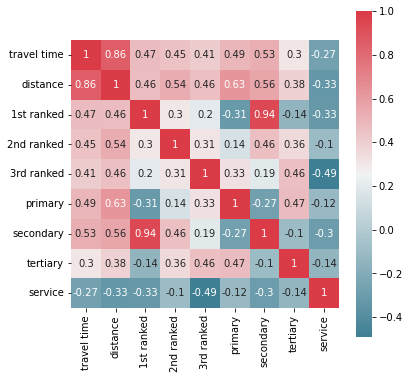

In [179]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(6,6))
corr = df_.corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [180]:
x = np.array(df_.iloc[:,1:])
y = np.array(df_['travel time'])
x

array([[0.29761172116501267, 0.11665528262790663, 0.1325762539333702,
        ..., 0.0, 0.05339567976434544, 0.20210969367871334],
       [0.3008596528757019, 0.11665528262790663, 0.5996653197184947, ...,
        0.0, 0.07812754306845135, 0.0],
       [0.3001044251750638, 0.11665528262790663, 0.5996653197184947, ...,
        0.0, 0.07812754306845135, 0.20210969367871334],
       ...,
       [0.6166255219037415, 0.11665528262790663, 0.5996653197184947, ...,
        0.0, 0.22445472170783115, 0.0],
       [0.6242756211531951, 0.11665528262790663, 0.5996653197184947, ...,
        0.0, 0.22445472170783115, 0.0],
       [0.6073350466525747, 0.11665528262790663, 0.5996653197184947, ...,
        0.0, 0.19304173600420646, 0.0]], dtype=object)

In [181]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [182]:
print(X_train.shape)
print(X_test.shape)
# X_train

(12759, 9)
(3190, 9)


In [183]:
# inputs: distance + roadtypes distance
model8_1_3 = nnmodel_(50, num_hlayers=1,Epoch=1000)
model8_1_3

Epoch 1/1000
399/399 [==============================] - 1s 933us/step - loss: 1008556.8750 - mape: 98.4389 - rmse: 1004.2693 - val_loss: 998242.0625 - val_mape: 95.5070 - val_rmse: 999.1207
Epoch 2/1000
399/399 [==============================] - 0s 763us/step - loss: 881811.3750 - mape: 89.8616 - rmse: 939.0481 - val_loss: 813519.6250 - val_mape: 83.0791 - val_rmse: 901.9532
Epoch 3/1000
399/399 [==============================] - 0s 772us/step - loss: 677256.1250 - mape: 74.2918 - rmse: 822.9557 - val_loss: 585496.5625 - val_mape: 65.2814 - val_rmse: 765.1775
Epoch 4/1000
399/399 [==============================] - 0s 747us/step - loss: 463038.2500 - mape: 55.3752 - rmse: 680.4691 - val_loss: 377099.1562 - val_mape: 45.5632 - val_rmse: 614.0840
Epoch 5/1000
399/399 [==============================] - 0s 750us/step - loss: 289321.8438 - mape: 37.9357 - rmse: 537.8865 - val_loss: 228421.9219 - val_mape: 31.2507 - val_rmse: 477.9351
Epoch 6/1000
399/399 [==============================] - 0s

Epoch 45/1000
399/399 [==============================] - 0s 738us/step - loss: 68138.0938 - mape: 23.8724 - rmse: 261.0327 - val_loss: 70663.3750 - val_mape: 23.4763 - val_rmse: 265.8258
Epoch 46/1000
399/399 [==============================] - 0s 758us/step - loss: 68113.2969 - mape: 23.8592 - rmse: 260.9852 - val_loss: 70674.4297 - val_mape: 23.5831 - val_rmse: 265.8466
Epoch 47/1000
399/399 [==============================] - 0s 744us/step - loss: 68090.9453 - mape: 24.0138 - rmse: 260.9424 - val_loss: 70551.9062 - val_mape: 23.0670 - val_rmse: 265.6161
Epoch 48/1000
399/399 [==============================] - 0s 749us/step - loss: 68078.3984 - mape: 23.7171 - rmse: 260.9184 - val_loss: 70623.4375 - val_mape: 23.5299 - val_rmse: 265.7507
Epoch 49/1000
399/399 [==============================] - 0s 765us/step - loss: 68070.2891 - mape: 23.9094 - rmse: 260.9028 - val_loss: 70552.9922 - val_mape: 23.3446 - val_rmse: 265.6181
Epoch 50/1000
399/399 [==============================] - 0s 792us

Epoch 89/1000
399/399 [==============================] - 0s 745us/step - loss: 67633.6406 - mape: 23.7336 - rmse: 260.0647 - val_loss: 70253.3594 - val_mape: 23.4940 - val_rmse: 265.0535
Epoch 90/1000
399/399 [==============================] - 0s 728us/step - loss: 67630.0156 - mape: 23.7748 - rmse: 260.0577 - val_loss: 70192.0469 - val_mape: 23.3458 - val_rmse: 264.9378
Epoch 91/1000
399/399 [==============================] - 0s 720us/step - loss: 67616.2266 - mape: 23.7414 - rmse: 260.0312 - val_loss: 70151.3203 - val_mape: 23.2358 - val_rmse: 264.8609
Epoch 92/1000
399/399 [==============================] - 0s 742us/step - loss: 67601.7500 - mape: 23.7608 - rmse: 260.0034 - val_loss: 70138.8125 - val_mape: 23.1858 - val_rmse: 264.8373
Epoch 93/1000
399/399 [==============================] - 0s 741us/step - loss: 67601.3828 - mape: 23.6971 - rmse: 260.0027 - val_loss: 70190.4531 - val_mape: 23.3953 - val_rmse: 264.9348
Epoch 94/1000
399/399 [==============================] - 0s 758us

Epoch 133/1000
399/399 [==============================] - 0s 743us/step - loss: 67310.9141 - mape: 23.5314 - rmse: 259.4435 - val_loss: 69940.4141 - val_mape: 23.2029 - val_rmse: 264.4625
Epoch 134/1000
399/399 [==============================] - 0s 762us/step - loss: 67309.2812 - mape: 23.6378 - rmse: 259.4403 - val_loss: 69944.6094 - val_mape: 23.2581 - val_rmse: 264.4704
Epoch 135/1000
399/399 [==============================] - 0s 748us/step - loss: 67302.0000 - mape: 23.6711 - rmse: 259.4263 - val_loss: 69895.1953 - val_mape: 23.0329 - val_rmse: 264.3770
Epoch 136/1000
399/399 [==============================] - 0s 768us/step - loss: 67304.6719 - mape: 23.6117 - rmse: 259.4314 - val_loss: 69901.4141 - val_mape: 23.1097 - val_rmse: 264.3888
Epoch 137/1000
399/399 [==============================] - 0s 754us/step - loss: 67289.7812 - mape: 23.7615 - rmse: 259.4027 - val_loss: 69864.2188 - val_mape: 22.7453 - val_rmse: 264.3184
Epoch 138/1000
399/399 [==============================] - 0s

Epoch 220/1000
399/399 [==============================] - 0s 763us/step - loss: 66784.4453 - mape: 23.4121 - rmse: 258.4269 - val_loss: 69536.3047 - val_mape: 23.1268 - val_rmse: 263.6974
Epoch 221/1000
399/399 [==============================] - 0s 768us/step - loss: 66781.7031 - mape: 23.4988 - rmse: 258.4216 - val_loss: 69493.8750 - val_mape: 22.9205 - val_rmse: 263.6169
Epoch 222/1000
399/399 [==============================] - 0s 751us/step - loss: 66775.0391 - mape: 23.4026 - rmse: 258.4087 - val_loss: 69505.6406 - val_mape: 22.9915 - val_rmse: 263.6392
Epoch 223/1000
399/399 [==============================] - 0s 760us/step - loss: 66770.3594 - mape: 23.4293 - rmse: 258.3996 - val_loss: 69504.1484 - val_mape: 22.9932 - val_rmse: 263.6364
Epoch 224/1000
399/399 [==============================] - 0s 769us/step - loss: 66754.9922 - mape: 23.4230 - rmse: 258.3699 - val_loss: 69546.0703 - val_mape: 23.2009 - val_rmse: 263.7159
Epoch 225/1000
399/399 [==============================] - 0s

Epoch 307/1000
399/399 [==============================] - 0s 743us/step - loss: 66286.8906 - mape: 23.2646 - rmse: 257.4624 - val_loss: 69091.3359 - val_mape: 22.7256 - val_rmse: 262.8523
Epoch 308/1000
399/399 [==============================] - 0s 785us/step - loss: 66285.2812 - mape: 23.2630 - rmse: 257.4593 - val_loss: 69099.2344 - val_mape: 22.8129 - val_rmse: 262.8673
Epoch 309/1000
399/399 [==============================] - 0s 769us/step - loss: 66275.5781 - mape: 23.2384 - rmse: 257.4404 - val_loss: 69135.7109 - val_mape: 22.9799 - val_rmse: 262.9367
Epoch 310/1000
399/399 [==============================] - 0s 754us/step - loss: 66284.6875 - mape: 23.2644 - rmse: 257.4581 - val_loss: 69101.0156 - val_mape: 22.7997 - val_rmse: 262.8707
Epoch 311/1000
399/399 [==============================] - 0s 765us/step - loss: 66269.2422 - mape: 23.1772 - rmse: 257.4281 - val_loss: 69142.0625 - val_mape: 22.9905 - val_rmse: 262.9488
Epoch 312/1000
399/399 [==============================] - 0s

Epoch 394/1000
399/399 [==============================] - 0s 758us/step - loss: 65852.2188 - mape: 22.9996 - rmse: 256.6169 - val_loss: 68793.1094 - val_mape: 22.7769 - val_rmse: 262.2844
Epoch 395/1000
399/399 [==============================] - 0s 768us/step - loss: 65843.9297 - mape: 23.0529 - rmse: 256.6007 - val_loss: 68882.7812 - val_mape: 23.0049 - val_rmse: 262.4553
Epoch 396/1000
399/399 [==============================] - 0s 762us/step - loss: 65851.0469 - mape: 23.1063 - rmse: 256.6146 - val_loss: 68873.6719 - val_mape: 22.9768 - val_rmse: 262.4379
Epoch 397/1000
399/399 [==============================] - 0s 780us/step - loss: 65845.3828 - mape: 23.1282 - rmse: 256.6035 - val_loss: 68733.8359 - val_mape: 22.3616 - val_rmse: 262.1714
Epoch 398/1000
399/399 [==============================] - 0s 729us/step - loss: 65845.9844 - mape: 22.9869 - rmse: 256.6047 - val_loss: 68754.0625 - val_mape: 22.5715 - val_rmse: 262.2100
Epoch 399/1000
399/399 [==============================] - 0s

Epoch 481/1000
399/399 [==============================] - 0s 771us/step - loss: 65512.6641 - mape: 22.8967 - rmse: 255.9544 - val_loss: 68516.3281 - val_mape: 22.5583 - val_rmse: 261.7562
Epoch 482/1000
399/399 [==============================] - 0s 733us/step - loss: 65508.8164 - mape: 22.8784 - rmse: 255.9469 - val_loss: 68524.8359 - val_mape: 22.5692 - val_rmse: 261.7725
Epoch 483/1000
399/399 [==============================] - 0s 731us/step - loss: 65501.1953 - mape: 22.9734 - rmse: 255.9320 - val_loss: 68479.2656 - val_mape: 22.3291 - val_rmse: 261.6854
Epoch 484/1000
399/399 [==============================] - 0s 750us/step - loss: 65495.7305 - mape: 22.8484 - rmse: 255.9213 - val_loss: 68508.2891 - val_mape: 22.5077 - val_rmse: 261.7409
Epoch 485/1000
399/399 [==============================] - 0s 755us/step - loss: 65497.2617 - mape: 22.8860 - rmse: 255.9243 - val_loss: 68501.3281 - val_mape: 22.5133 - val_rmse: 261.7276
Epoch 486/1000
399/399 [==============================] - 0s

Epoch 568/1000
399/399 [==============================] - 0s 761us/step - loss: 65236.9258 - mape: 22.7642 - rmse: 255.4152 - val_loss: 68293.4219 - val_mape: 22.1213 - val_rmse: 261.3301
Epoch 569/1000
399/399 [==============================] - 0s 738us/step - loss: 65236.1289 - mape: 22.6873 - rmse: 255.4136 - val_loss: 68332.3984 - val_mape: 22.4083 - val_rmse: 261.4047
Epoch 570/1000
399/399 [==============================] - 0s 731us/step - loss: 65243.6953 - mape: 22.7763 - rmse: 255.4285 - val_loss: 68335.8359 - val_mape: 22.4299 - val_rmse: 261.4112
Epoch 571/1000
399/399 [==============================] - 0s 782us/step - loss: 65232.9375 - mape: 22.7526 - rmse: 255.4074 - val_loss: 68324.3047 - val_mape: 22.3996 - val_rmse: 261.3892
Epoch 572/1000
399/399 [==============================] - 0s 764us/step - loss: 65218.3594 - mape: 22.7597 - rmse: 255.3789 - val_loss: 68301.1797 - val_mape: 22.2890 - val_rmse: 261.3449
Epoch 573/1000
399/399 [==============================] - 0s

Epoch 655/1000
399/399 [==============================] - 0s 735us/step - loss: 65027.9961 - mape: 22.5689 - rmse: 255.0059 - val_loss: 68219.4844 - val_mape: 22.4018 - val_rmse: 261.1886
Epoch 656/1000
399/399 [==============================] - 0s 739us/step - loss: 65022.5898 - mape: 22.7256 - rmse: 254.9953 - val_loss: 68165.5234 - val_mape: 22.0511 - val_rmse: 261.0853
Epoch 657/1000
399/399 [==============================] - 0s 779us/step - loss: 65033.3984 - mape: 22.7171 - rmse: 255.0165 - val_loss: 68163.8828 - val_mape: 22.0061 - val_rmse: 261.0821
Epoch 658/1000
399/399 [==============================] - 0s 768us/step - loss: 65013.4180 - mape: 22.6816 - rmse: 254.9773 - val_loss: 68156.2188 - val_mape: 21.8901 - val_rmse: 261.0675
Epoch 659/1000
399/399 [==============================] - 0s 771us/step - loss: 65028.3047 - mape: 22.5066 - rmse: 255.0065 - val_loss: 68168.6953 - val_mape: 22.1376 - val_rmse: 261.0913
Epoch 660/1000
399/399 [==============================] - 0s

Epoch 742/1000
399/399 [==============================] - 0s 787us/step - loss: 64857.5977 - mape: 22.6887 - rmse: 254.6716 - val_loss: 68058.2188 - val_mape: 21.7549 - val_rmse: 260.8797
Epoch 743/1000
399/399 [==============================] - 0s 785us/step - loss: 64867.0234 - mape: 22.6233 - rmse: 254.6900 - val_loss: 68059.5234 - val_mape: 21.7450 - val_rmse: 260.8822
Epoch 744/1000
399/399 [==============================] - 0s 764us/step - loss: 64867.1172 - mape: 22.4141 - rmse: 254.6902 - val_loss: 68154.6250 - val_mape: 22.4397 - val_rmse: 261.0644
Epoch 745/1000
399/399 [==============================] - 0s 797us/step - loss: 64865.9219 - mape: 22.6717 - rmse: 254.6879 - val_loss: 68089.7344 - val_mape: 22.0680 - val_rmse: 260.9401
Epoch 746/1000
399/399 [==============================] - 0s 755us/step - loss: 64861.1641 - mape: 22.5740 - rmse: 254.6785 - val_loss: 68058.2812 - val_mape: 21.8813 - val_rmse: 260.8798
Epoch 747/1000
399/399 [==============================] - 0s

Epoch 829/1000
399/399 [==============================] - 0s 755us/step - loss: 64535.5352 - mape: 22.4830 - rmse: 254.0385 - val_loss: 67803.5781 - val_mape: 21.8137 - val_rmse: 260.3912
Epoch 830/1000
399/399 [==============================] - 0s 764us/step - loss: 64531.6719 - mape: 22.3373 - rmse: 254.0309 - val_loss: 67824.8906 - val_mape: 22.0577 - val_rmse: 260.4321
Epoch 831/1000
399/399 [==============================] - 0s 731us/step - loss: 64536.1328 - mape: 22.4427 - rmse: 254.0396 - val_loss: 67825.0703 - val_mape: 22.0912 - val_rmse: 260.4325
Epoch 832/1000
399/399 [==============================] - 0s 760us/step - loss: 64528.6992 - mape: 22.4413 - rmse: 254.0250 - val_loss: 67792.6016 - val_mape: 21.8354 - val_rmse: 260.3701
Epoch 833/1000
399/399 [==============================] - 0s 767us/step - loss: 64524.8477 - mape: 22.4154 - rmse: 254.0174 - val_loss: 67828.1094 - val_mape: 21.9797 - val_rmse: 260.4383
Epoch 834/1000
399/399 [==============================] - 0s

Epoch 916/1000
399/399 [==============================] - 0s 731us/step - loss: 64333.8008 - mape: 22.3823 - rmse: 253.6411 - val_loss: 67669.5703 - val_mape: 21.8669 - val_rmse: 260.1338
Epoch 917/1000
399/399 [==============================] - 0s 746us/step - loss: 64317.1641 - mape: 22.2757 - rmse: 253.6083 - val_loss: 67708.1875 - val_mape: 22.1902 - val_rmse: 260.2080
Epoch 918/1000
399/399 [==============================] - 0s 778us/step - loss: 64333.7578 - mape: 22.3733 - rmse: 253.6410 - val_loss: 67664.0078 - val_mape: 22.0524 - val_rmse: 260.1231
Epoch 919/1000
399/399 [==============================] - 0s 748us/step - loss: 64315.5625 - mape: 22.3368 - rmse: 253.6051 - val_loss: 67674.3594 - val_mape: 22.0416 - val_rmse: 260.1429
Epoch 920/1000
399/399 [==============================] - 0s 750us/step - loss: 64321.0938 - mape: 22.3830 - rmse: 253.6160 - val_loss: 67673.5234 - val_mape: 22.0010 - val_rmse: 260.1414
Epoch 921/1000
399/399 [==============================] - 0s

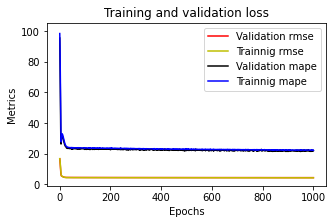

In [184]:
plotme(model8_1_3)

In [185]:
# inputs: distance + roadtypes distance
model8_1_5 = nnmodel_(100, num_hlayers=1,Epoch=1000)
model8_1_5

Epoch 1/1000
399/399 [==============================] - 1s 909us/step - loss: 999121.9375 - mape: 97.8011 - rmse: 999.5609 - val_loss: 963882.9375 - val_mape: 93.3294 - val_rmse: 981.7754
Epoch 2/1000
399/399 [==============================] - 0s 756us/step - loss: 806564.8750 - mape: 84.4896 - rmse: 898.0896 - val_loss: 690640.0625 - val_mape: 73.9715 - val_rmse: 831.0475
Epoch 3/1000
399/399 [==============================] - 0s 743us/step - loss: 525944.0000 - mape: 61.3008 - rmse: 725.2200 - val_loss: 402763.4688 - val_mape: 48.2302 - val_rmse: 634.6365
Epoch 4/1000
399/399 [==============================] - 0s 725us/step - loss: 288566.2812 - mape: 38.1640 - rmse: 537.1837 - val_loss: 209667.4531 - val_mape: 29.8076 - val_rmse: 457.8946
Epoch 5/1000
399/399 [==============================] - 0s 748us/step - loss: 159203.7812 - mape: 27.8724 - rmse: 399.0035 - val_loss: 129159.6406 - val_mape: 26.6047 - val_rmse: 359.3879
Epoch 6/1000
399/399 [==============================] - 0s 7

Epoch 45/1000
399/399 [==============================] - 0s 747us/step - loss: 67571.2266 - mape: 23.6704 - rmse: 259.9447 - val_loss: 70034.2266 - val_mape: 23.0825 - val_rmse: 264.6398
Epoch 46/1000
399/399 [==============================] - 0s 730us/step - loss: 67521.1250 - mape: 23.6266 - rmse: 259.8483 - val_loss: 70094.5391 - val_mape: 23.4025 - val_rmse: 264.7537
Epoch 47/1000
399/399 [==============================] - 0s 798us/step - loss: 67507.8750 - mape: 23.7867 - rmse: 259.8228 - val_loss: 69993.8281 - val_mape: 23.1208 - val_rmse: 264.5635
Epoch 48/1000
399/399 [==============================] - 0s 732us/step - loss: 67451.2578 - mape: 23.6826 - rmse: 259.7138 - val_loss: 69930.6094 - val_mape: 22.8466 - val_rmse: 264.4440
Epoch 49/1000
399/399 [==============================] - 0s 768us/step - loss: 67414.3047 - mape: 23.6679 - rmse: 259.6426 - val_loss: 69934.7422 - val_mape: 23.1195 - val_rmse: 264.4518
Epoch 50/1000
399/399 [==============================] - 0s 764us

Epoch 89/1000
399/399 [==============================] - 0s 759us/step - loss: 66279.4375 - mape: 23.2292 - rmse: 257.4479 - val_loss: 69090.3203 - val_mape: 23.1620 - val_rmse: 262.8504
Epoch 90/1000
399/399 [==============================] - 0s 782us/step - loss: 66247.7969 - mape: 23.4882 - rmse: 257.3865 - val_loss: 68941.4062 - val_mape: 22.3605 - val_rmse: 262.5670
Epoch 91/1000
399/399 [==============================] - 0s 777us/step - loss: 66249.2891 - mape: 23.3129 - rmse: 257.3894 - val_loss: 68952.8906 - val_mape: 22.7767 - val_rmse: 262.5888
Epoch 92/1000
399/399 [==============================] - 0s 759us/step - loss: 66206.6406 - mape: 23.3505 - rmse: 257.3065 - val_loss: 68957.9297 - val_mape: 22.9065 - val_rmse: 262.5984
Epoch 93/1000
399/399 [==============================] - 0s 757us/step - loss: 66186.4531 - mape: 23.2645 - rmse: 257.2673 - val_loss: 69009.0000 - val_mape: 23.1235 - val_rmse: 262.6956
Epoch 94/1000
399/399 [==============================] - 0s 746us

Epoch 133/1000
399/399 [==============================] - 0s 761us/step - loss: 65430.2266 - mape: 23.1059 - rmse: 255.7933 - val_loss: 68367.2266 - val_mape: 22.6679 - val_rmse: 261.4713
Epoch 134/1000
399/399 [==============================] - 0s 758us/step - loss: 65418.7305 - mape: 23.1013 - rmse: 255.7709 - val_loss: 68434.3750 - val_mape: 22.9020 - val_rmse: 261.5996
Epoch 135/1000
399/399 [==============================] - 0s 744us/step - loss: 65413.5117 - mape: 23.1218 - rmse: 255.7607 - val_loss: 68332.2031 - val_mape: 22.5368 - val_rmse: 261.4043
Epoch 136/1000
399/399 [==============================] - 0s 756us/step - loss: 65396.1484 - mape: 23.1235 - rmse: 255.7267 - val_loss: 68355.2266 - val_mape: 22.7166 - val_rmse: 261.4483
Epoch 137/1000
399/399 [==============================] - 0s 731us/step - loss: 65392.9609 - mape: 23.0935 - rmse: 255.7205 - val_loss: 68292.6797 - val_mape: 22.3873 - val_rmse: 261.3287
Epoch 138/1000
399/399 [==============================] - 0s

Epoch 220/1000
399/399 [==============================] - 0s 752us/step - loss: 64424.9727 - mape: 22.8722 - rmse: 253.8208 - val_loss: 67706.8047 - val_mape: 22.3012 - val_rmse: 260.2053
Epoch 221/1000
399/399 [==============================] - 0s 732us/step - loss: 64423.6406 - mape: 22.7009 - rmse: 253.8181 - val_loss: 67790.5156 - val_mape: 22.6747 - val_rmse: 260.3661
Epoch 222/1000
399/399 [==============================] - 0s 739us/step - loss: 64414.9805 - mape: 22.8126 - rmse: 253.8011 - val_loss: 67665.6641 - val_mape: 22.0380 - val_rmse: 260.1263
Epoch 223/1000
399/399 [==============================] - 0s 774us/step - loss: 64415.3438 - mape: 22.6440 - rmse: 253.8018 - val_loss: 67744.1562 - val_mape: 22.5730 - val_rmse: 260.2771
Epoch 224/1000
399/399 [==============================] - 0s 736us/step - loss: 64408.3477 - mape: 22.7786 - rmse: 253.7880 - val_loss: 67767.8359 - val_mape: 22.6976 - val_rmse: 260.3226
Epoch 225/1000
399/399 [==============================] - 0s

Epoch 307/1000
399/399 [==============================] - 0s 774us/step - loss: 63842.1484 - mape: 22.4745 - rmse: 252.6700 - val_loss: 67412.1406 - val_mape: 22.5542 - val_rmse: 259.6385
Epoch 308/1000
399/399 [==============================] - 0s 740us/step - loss: 63831.5117 - mape: 22.5285 - rmse: 252.6490 - val_loss: 67335.6562 - val_mape: 22.3767 - val_rmse: 259.4911
Epoch 309/1000
399/399 [==============================] - 0s 742us/step - loss: 63837.0820 - mape: 22.6535 - rmse: 252.6600 - val_loss: 67277.2734 - val_mape: 22.0039 - val_rmse: 259.3786
Epoch 310/1000
399/399 [==============================] - 0s 770us/step - loss: 63815.7344 - mape: 22.5448 - rmse: 252.6178 - val_loss: 67343.8203 - val_mape: 22.2768 - val_rmse: 259.5069
Epoch 311/1000
399/399 [==============================] - 0s 763us/step - loss: 63805.0156 - mape: 22.5198 - rmse: 252.5965 - val_loss: 67451.7891 - val_mape: 22.5642 - val_rmse: 259.7148
Epoch 312/1000
399/399 [==============================] - 0s

Epoch 394/1000
399/399 [==============================] - 0s 754us/step - loss: 63491.9062 - mape: 22.3904 - rmse: 251.9760 - val_loss: 67171.0469 - val_mape: 22.2310 - val_rmse: 259.1738
Epoch 395/1000
399/399 [==============================] - 0s 769us/step - loss: 63487.4922 - mape: 22.4691 - rmse: 251.9672 - val_loss: 67072.0391 - val_mape: 21.7628 - val_rmse: 258.9827
Epoch 396/1000
399/399 [==============================] - 0s 756us/step - loss: 63494.5898 - mape: 22.4111 - rmse: 251.9813 - val_loss: 67105.2891 - val_mape: 21.9192 - val_rmse: 259.0469
Epoch 397/1000
399/399 [==============================] - 0s 734us/step - loss: 63480.1289 - mape: 22.4195 - rmse: 251.9526 - val_loss: 67070.1172 - val_mape: 21.6770 - val_rmse: 258.9790
Epoch 398/1000
399/399 [==============================] - 0s 726us/step - loss: 63475.3438 - mape: 22.2573 - rmse: 251.9431 - val_loss: 67096.2344 - val_mape: 22.1262 - val_rmse: 259.0294
Epoch 399/1000
399/399 [==============================] - 0s

Epoch 481/1000
399/399 [==============================] - 0s 745us/step - loss: 63252.8320 - mape: 22.3153 - rmse: 251.5012 - val_loss: 67010.1641 - val_mape: 22.1769 - val_rmse: 258.8632
Epoch 482/1000
399/399 [==============================] - 0s 733us/step - loss: 63254.9492 - mape: 22.3732 - rmse: 251.5054 - val_loss: 66915.2812 - val_mape: 21.5747 - val_rmse: 258.6799
Epoch 483/1000
399/399 [==============================] - 0s 755us/step - loss: 63240.4961 - mape: 22.2217 - rmse: 251.4766 - val_loss: 67066.8828 - val_mape: 22.3962 - val_rmse: 258.9727
Epoch 484/1000
399/399 [==============================] - 0s 763us/step - loss: 63243.7227 - mape: 22.3601 - rmse: 251.4830 - val_loss: 66902.6797 - val_mape: 21.6117 - val_rmse: 258.6555
Epoch 485/1000
399/399 [==============================] - 0s 751us/step - loss: 63261.8320 - mape: 22.3922 - rmse: 251.5190 - val_loss: 66934.9375 - val_mape: 21.2922 - val_rmse: 258.7179
Epoch 486/1000
399/399 [==============================] - 0s

Epoch 568/1000
399/399 [==============================] - 0s 728us/step - loss: 63078.4180 - mape: 22.1258 - rmse: 251.1542 - val_loss: 66935.0781 - val_mape: 22.2395 - val_rmse: 258.7181
Epoch 569/1000
399/399 [==============================] - 0s 733us/step - loss: 63087.8086 - mape: 22.2934 - rmse: 251.1729 - val_loss: 66845.1172 - val_mape: 21.8349 - val_rmse: 258.5442
Epoch 570/1000
399/399 [==============================] - 0s 764us/step - loss: 63084.9141 - mape: 22.3060 - rmse: 251.1671 - val_loss: 66971.2969 - val_mape: 22.2498 - val_rmse: 258.7881
Epoch 571/1000
399/399 [==============================] - 0s 744us/step - loss: 63095.4844 - mape: 22.1884 - rmse: 251.1881 - val_loss: 66877.5547 - val_mape: 21.9988 - val_rmse: 258.6070
Epoch 572/1000
399/399 [==============================] - 0s 730us/step - loss: 63080.9805 - mape: 22.2264 - rmse: 251.1593 - val_loss: 66813.2734 - val_mape: 21.5859 - val_rmse: 258.4826
Epoch 573/1000
399/399 [==============================] - 0s

Epoch 655/1000
399/399 [==============================] - 0s 746us/step - loss: 62985.3750 - mape: 22.3126 - rmse: 250.9689 - val_loss: 66772.9844 - val_mape: 21.7020 - val_rmse: 258.4047
Epoch 656/1000
399/399 [==============================] - 0s 750us/step - loss: 62925.6055 - mape: 22.3217 - rmse: 250.8498 - val_loss: 66811.1484 - val_mape: 20.9858 - val_rmse: 258.4785
Epoch 657/1000
399/399 [==============================] - 0s 738us/step - loss: 62958.2266 - mape: 21.9730 - rmse: 250.9148 - val_loss: 66886.2891 - val_mape: 22.3065 - val_rmse: 258.6238
Epoch 658/1000
399/399 [==============================] - 0s 781us/step - loss: 62954.7266 - mape: 22.2848 - rmse: 250.9078 - val_loss: 66811.4219 - val_mape: 21.9243 - val_rmse: 258.4791
Epoch 659/1000
399/399 [==============================] - 0s 739us/step - loss: 62947.6992 - mape: 22.1872 - rmse: 250.8938 - val_loss: 66762.9297 - val_mape: 21.3311 - val_rmse: 258.3852
Epoch 660/1000
399/399 [==============================] - 0s

Epoch 742/1000
399/399 [==============================] - 0s 735us/step - loss: 62823.9414 - mape: 22.1139 - rmse: 250.6470 - val_loss: 66695.8359 - val_mape: 21.4992 - val_rmse: 258.2554
Epoch 743/1000
399/399 [==============================] - 0s 766us/step - loss: 62830.6445 - mape: 22.1003 - rmse: 250.6604 - val_loss: 66759.4297 - val_mape: 21.9092 - val_rmse: 258.3784
Epoch 744/1000
399/399 [==============================] - 0s 777us/step - loss: 62824.3008 - mape: 22.1445 - rmse: 250.6478 - val_loss: 66703.3750 - val_mape: 21.5734 - val_rmse: 258.2700
Epoch 745/1000
399/399 [==============================] - 0s 755us/step - loss: 62837.9336 - mape: 22.1497 - rmse: 250.6750 - val_loss: 66705.0391 - val_mape: 21.5652 - val_rmse: 258.2732
Epoch 746/1000
399/399 [==============================] - 0s 761us/step - loss: 62826.5508 - mape: 22.1177 - rmse: 250.6523 - val_loss: 66719.9297 - val_mape: 21.8996 - val_rmse: 258.3020
Epoch 747/1000
399/399 [==============================] - 0s

Epoch 829/1000
399/399 [==============================] - 0s 790us/step - loss: 62712.3398 - mape: 22.0206 - rmse: 250.4243 - val_loss: 66836.8750 - val_mape: 22.4222 - val_rmse: 258.5283
Epoch 830/1000
399/399 [==============================] - 0s 763us/step - loss: 62711.1406 - mape: 22.3059 - rmse: 250.4219 - val_loss: 66724.7578 - val_mape: 21.7305 - val_rmse: 258.3114
Epoch 831/1000
399/399 [==============================] - 0s 723us/step - loss: 62730.9766 - mape: 22.0270 - rmse: 250.4615 - val_loss: 66738.3984 - val_mape: 21.8603 - val_rmse: 258.3378
Epoch 832/1000
399/399 [==============================] - 0s 753us/step - loss: 62725.8789 - mape: 22.1154 - rmse: 250.4514 - val_loss: 66696.2734 - val_mape: 21.7781 - val_rmse: 258.2562
Epoch 833/1000
399/399 [==============================] - 0s 740us/step - loss: 62711.6602 - mape: 22.1085 - rmse: 250.4230 - val_loss: 66655.1094 - val_mape: 21.5995 - val_rmse: 258.1765
Epoch 834/1000
399/399 [==============================] - 0s

Epoch 916/1000
399/399 [==============================] - 0s 751us/step - loss: 62636.4727 - mape: 22.0349 - rmse: 250.2728 - val_loss: 66737.8516 - val_mape: 21.9926 - val_rmse: 258.3367
Epoch 917/1000
399/399 [==============================] - 0s 767us/step - loss: 62626.5742 - mape: 22.0630 - rmse: 250.2530 - val_loss: 66625.1250 - val_mape: 21.5379 - val_rmse: 258.1184
Epoch 918/1000
399/399 [==============================] - 0s 746us/step - loss: 62627.6250 - mape: 22.0312 - rmse: 250.2551 - val_loss: 66639.9453 - val_mape: 21.8076 - val_rmse: 258.1471
Epoch 919/1000
399/399 [==============================] - 0s 723us/step - loss: 62597.9492 - mape: 22.1964 - rmse: 250.1958 - val_loss: 66635.6641 - val_mape: 21.1220 - val_rmse: 258.1389
Epoch 920/1000
399/399 [==============================] - 0s 741us/step - loss: 62631.0547 - mape: 21.9583 - rmse: 250.2620 - val_loss: 66697.9375 - val_mape: 21.9302 - val_rmse: 258.2594
Epoch 921/1000
399/399 [==============================] - 0s

In [186]:
# inputs: distance + roadtypes distance
model8_1_1 = nnmodel_(100,50, num_hlayers=2,Epoch=1000)
model8_1_1

Epoch 1/1000
399/399 [==============================] - 1s 999us/step - loss: 577909.1250 - mape: 64.8626 - rmse: 760.2034 - val_loss: 105374.4062 - val_mape: 33.2854 - val_rmse: 324.6142
Epoch 2/1000
399/399 [==============================] - 0s 802us/step - loss: 95096.6562 - mape: 33.4200 - rmse: 308.3775 - val_loss: 87583.9531 - val_mape: 30.7841 - val_rmse: 295.9459
Epoch 3/1000
399/399 [==============================] - 0s 817us/step - loss: 80313.4688 - mape: 30.2454 - rmse: 283.3963 - val_loss: 76672.1484 - val_mape: 27.3060 - val_rmse: 276.8974
Epoch 4/1000
399/399 [==============================] - 0s 862us/step - loss: 72180.3203 - mape: 26.9707 - rmse: 268.6639 - val_loss: 72301.3047 - val_mape: 25.2399 - val_rmse: 268.8890
Epoch 5/1000
399/399 [==============================] - 0s 841us/step - loss: 69160.6484 - mape: 25.0752 - rmse: 262.9841 - val_loss: 71353.9141 - val_mape: 24.7056 - val_rmse: 267.1215
Epoch 6/1000
399/399 [==============================] - 0s 792us/ste

Epoch 45/1000
399/399 [==============================] - 0s 838us/step - loss: 65117.2422 - mape: 22.9810 - rmse: 255.1808 - val_loss: 68187.5781 - val_mape: 22.6945 - val_rmse: 261.1275
Epoch 46/1000
399/399 [==============================] - 0s 836us/step - loss: 65023.5391 - mape: 23.1467 - rmse: 254.9971 - val_loss: 68821.2500 - val_mape: 23.3015 - val_rmse: 262.3380
Epoch 47/1000
399/399 [==============================] - 0s 846us/step - loss: 65058.4258 - mape: 22.8867 - rmse: 255.0655 - val_loss: 68180.9297 - val_mape: 22.4927 - val_rmse: 261.1148
Epoch 48/1000
399/399 [==============================] - 0s 869us/step - loss: 65008.3281 - mape: 22.9645 - rmse: 254.9673 - val_loss: 68103.3828 - val_mape: 21.9464 - val_rmse: 260.9662
Epoch 49/1000
399/399 [==============================] - 0s 890us/step - loss: 64985.5156 - mape: 22.9471 - rmse: 254.9226 - val_loss: 68654.0547 - val_mape: 23.6643 - val_rmse: 262.0192
Epoch 50/1000
399/399 [==============================] - 0s 898us

Epoch 89/1000
399/399 [==============================] - 0s 822us/step - loss: 64342.4219 - mape: 22.7601 - rmse: 253.6581 - val_loss: 67789.3438 - val_mape: 22.2752 - val_rmse: 260.3639
Epoch 90/1000
399/399 [==============================] - 0s 830us/step - loss: 64278.2500 - mape: 22.6940 - rmse: 253.5316 - val_loss: 67751.6016 - val_mape: 22.3740 - val_rmse: 260.2914
Epoch 91/1000
399/399 [==============================] - 0s 827us/step - loss: 64325.5898 - mape: 22.7519 - rmse: 253.6249 - val_loss: 67674.9375 - val_mape: 21.2205 - val_rmse: 260.1441
Epoch 92/1000
399/399 [==============================] - 0s 832us/step - loss: 64329.1953 - mape: 22.6239 - rmse: 253.6320 - val_loss: 67734.7188 - val_mape: 22.5471 - val_rmse: 260.2589
Epoch 93/1000
399/399 [==============================] - 0s 826us/step - loss: 64254.5000 - mape: 22.7579 - rmse: 253.4847 - val_loss: 67683.2188 - val_mape: 21.2361 - val_rmse: 260.1600
Epoch 94/1000
399/399 [==============================] - 0s 809us

Epoch 133/1000
399/399 [==============================] - 0s 845us/step - loss: 63844.2422 - mape: 22.5157 - rmse: 252.6742 - val_loss: 67593.0547 - val_mape: 22.6063 - val_rmse: 259.9866
Epoch 134/1000
399/399 [==============================] - 0s 812us/step - loss: 63814.7266 - mape: 22.5174 - rmse: 252.6158 - val_loss: 68042.5312 - val_mape: 23.5072 - val_rmse: 260.8496
Epoch 135/1000
399/399 [==============================] - 0s 832us/step - loss: 63816.9375 - mape: 22.5733 - rmse: 252.6201 - val_loss: 67374.1484 - val_mape: 21.6514 - val_rmse: 259.5653
Epoch 136/1000
399/399 [==============================] - 0s 805us/step - loss: 63769.1758 - mape: 22.5420 - rmse: 252.5256 - val_loss: 67530.0547 - val_mape: 22.1186 - val_rmse: 259.8654
Epoch 137/1000
399/399 [==============================] - 0s 821us/step - loss: 63860.1836 - mape: 22.4633 - rmse: 252.7057 - val_loss: 67476.7031 - val_mape: 22.2186 - val_rmse: 259.7628
Epoch 138/1000
399/399 [==============================] - 0s

Epoch 220/1000
399/399 [==============================] - 0s 828us/step - loss: 63337.2930 - mape: 22.2752 - rmse: 251.6690 - val_loss: 67186.9375 - val_mape: 22.2205 - val_rmse: 259.2044
Epoch 221/1000
399/399 [==============================] - 0s 800us/step - loss: 63272.0625 - mape: 22.3167 - rmse: 251.5394 - val_loss: 67076.8516 - val_mape: 21.5123 - val_rmse: 258.9920
Epoch 222/1000
399/399 [==============================] - 0s 802us/step - loss: 63385.5625 - mape: 22.2917 - rmse: 251.7649 - val_loss: 67080.2812 - val_mape: 21.9665 - val_rmse: 258.9986
Epoch 223/1000
399/399 [==============================] - 0s 829us/step - loss: 63262.9141 - mape: 22.3943 - rmse: 251.5212 - val_loss: 67332.1719 - val_mape: 21.6448 - val_rmse: 259.4844
Epoch 224/1000
399/399 [==============================] - 0s 799us/step - loss: 63305.0234 - mape: 22.2374 - rmse: 251.6049 - val_loss: 67199.0391 - val_mape: 22.0198 - val_rmse: 259.2278
Epoch 225/1000
399/399 [==============================] - 0s

Epoch 307/1000
399/399 [==============================] - 0s 801us/step - loss: 63045.5781 - mape: 22.3069 - rmse: 251.0888 - val_loss: 67134.4922 - val_mape: 21.4628 - val_rmse: 259.1032
Epoch 308/1000
399/399 [==============================] - 0s 822us/step - loss: 63072.4648 - mape: 22.2149 - rmse: 251.1423 - val_loss: 67274.7656 - val_mape: 22.0805 - val_rmse: 259.3738
Epoch 309/1000
399/399 [==============================] - 0s 827us/step - loss: 63019.9414 - mape: 22.1770 - rmse: 251.0377 - val_loss: 67128.8906 - val_mape: 22.2733 - val_rmse: 259.0924
Epoch 310/1000
399/399 [==============================] - 0s 843us/step - loss: 63091.4648 - mape: 22.2283 - rmse: 251.1801 - val_loss: 67664.1562 - val_mape: 23.3141 - val_rmse: 260.1234
Epoch 311/1000
399/399 [==============================] - 0s 822us/step - loss: 63101.6016 - mape: 22.2035 - rmse: 251.2003 - val_loss: 67037.1562 - val_mape: 22.1291 - val_rmse: 258.9153
Epoch 312/1000
399/399 [==============================] - 0s

Epoch 394/1000
399/399 [==============================] - 0s 824us/step - loss: 62841.4727 - mape: 22.0610 - rmse: 250.6820 - val_loss: 67203.9141 - val_mape: 22.9515 - val_rmse: 259.2372
Epoch 395/1000
399/399 [==============================] - 0s 882us/step - loss: 62876.2344 - mape: 22.2250 - rmse: 250.7513 - val_loss: 66936.1094 - val_mape: 21.4979 - val_rmse: 258.7201
Epoch 396/1000
399/399 [==============================] - 0s 845us/step - loss: 62788.0664 - mape: 22.1116 - rmse: 250.5755 - val_loss: 67259.9297 - val_mape: 22.9863 - val_rmse: 259.3452
Epoch 397/1000
399/399 [==============================] - 0s 891us/step - loss: 62763.9766 - mape: 22.2260 - rmse: 250.5274 - val_loss: 66855.9375 - val_mape: 21.6235 - val_rmse: 258.5652
Epoch 398/1000
399/399 [==============================] - 0s 814us/step - loss: 62842.7852 - mape: 22.1683 - rmse: 250.6846 - val_loss: 67465.6484 - val_mape: 23.0137 - val_rmse: 259.7415
Epoch 399/1000
399/399 [==============================] - 0s

Epoch 481/1000
399/399 [==============================] - 0s 843us/step - loss: 62541.0273 - mape: 22.0727 - rmse: 250.0820 - val_loss: 66837.0391 - val_mape: 21.2973 - val_rmse: 258.5286
Epoch 482/1000
399/399 [==============================] - 0s 832us/step - loss: 62533.4062 - mape: 22.0352 - rmse: 250.0668 - val_loss: 66848.1953 - val_mape: 22.5816 - val_rmse: 258.5502
Epoch 483/1000
399/399 [==============================] - 0s 816us/step - loss: 62563.0039 - mape: 22.1342 - rmse: 250.1260 - val_loss: 66997.1719 - val_mape: 22.1062 - val_rmse: 258.8381
Epoch 484/1000
399/399 [==============================] - 0s 862us/step - loss: 62575.9180 - mape: 22.1190 - rmse: 250.1518 - val_loss: 66870.9141 - val_mape: 21.8583 - val_rmse: 258.5941
Epoch 485/1000
399/399 [==============================] - 0s 800us/step - loss: 62498.0273 - mape: 22.0360 - rmse: 249.9960 - val_loss: 66762.7422 - val_mape: 22.2610 - val_rmse: 258.3849
Epoch 486/1000
399/399 [==============================] - 0s

Epoch 568/1000
399/399 [==============================] - 0s 836us/step - loss: 62421.5234 - mape: 22.0225 - rmse: 249.8430 - val_loss: 66677.9609 - val_mape: 22.5976 - val_rmse: 258.2208
Epoch 569/1000
399/399 [==============================] - 0s 788us/step - loss: 62321.1055 - mape: 22.0968 - rmse: 249.6420 - val_loss: 66631.1250 - val_mape: 21.4260 - val_rmse: 258.1301
Epoch 570/1000
399/399 [==============================] - 0s 816us/step - loss: 62352.4766 - mape: 22.1269 - rmse: 249.7048 - val_loss: 66583.5938 - val_mape: 20.7838 - val_rmse: 258.0380
Epoch 571/1000
399/399 [==============================] - 0s 788us/step - loss: 62451.0469 - mape: 22.0051 - rmse: 249.9021 - val_loss: 66891.3750 - val_mape: 20.3483 - val_rmse: 258.6337
Epoch 572/1000
399/399 [==============================] - 0s 810us/step - loss: 62458.0977 - mape: 21.9236 - rmse: 249.9162 - val_loss: 66918.8516 - val_mape: 22.8299 - val_rmse: 258.6868
Epoch 573/1000
399/399 [==============================] - 0s

Epoch 655/1000
399/399 [==============================] - 0s 795us/step - loss: 62215.5352 - mape: 22.0073 - rmse: 249.4304 - val_loss: 66778.8828 - val_mape: 20.3235 - val_rmse: 258.4161
Epoch 656/1000
399/399 [==============================] - 0s 824us/step - loss: 62245.8867 - mape: 21.9924 - rmse: 249.4913 - val_loss: 66687.3203 - val_mape: 22.2008 - val_rmse: 258.2389
Epoch 657/1000
399/399 [==============================] - 0s 824us/step - loss: 62248.0234 - mape: 21.9734 - rmse: 249.4955 - val_loss: 66482.3359 - val_mape: 21.6611 - val_rmse: 257.8417
Epoch 658/1000
399/399 [==============================] - 0s 807us/step - loss: 62274.1328 - mape: 22.0276 - rmse: 249.5479 - val_loss: 66362.0781 - val_mape: 21.7904 - val_rmse: 257.6084
Epoch 659/1000
399/399 [==============================] - 0s 833us/step - loss: 62276.8867 - mape: 22.0116 - rmse: 249.5534 - val_loss: 66376.6250 - val_mape: 21.5615 - val_rmse: 257.6366
Epoch 660/1000
399/399 [==============================] - 0s

Epoch 742/1000
399/399 [==============================] - 0s 808us/step - loss: 62207.0078 - mape: 22.0515 - rmse: 249.4133 - val_loss: 66534.1406 - val_mape: 21.5681 - val_rmse: 257.9421
Epoch 743/1000
399/399 [==============================] - 0s 839us/step - loss: 62222.5781 - mape: 22.0034 - rmse: 249.4445 - val_loss: 66377.5938 - val_mape: 22.1367 - val_rmse: 257.6385
Epoch 744/1000
399/399 [==============================] - 0s 801us/step - loss: 62127.3828 - mape: 21.9715 - rmse: 249.2536 - val_loss: 66523.6719 - val_mape: 21.4368 - val_rmse: 257.9218
Epoch 745/1000
399/399 [==============================] - 0s 785us/step - loss: 62170.7344 - mape: 22.0538 - rmse: 249.3406 - val_loss: 66413.8906 - val_mape: 21.7148 - val_rmse: 257.7089
Epoch 746/1000
399/399 [==============================] - 0s 810us/step - loss: 62147.9219 - mape: 21.9134 - rmse: 249.2948 - val_loss: 66997.8516 - val_mape: 23.6077 - val_rmse: 258.8394
Epoch 747/1000
399/399 [==============================] - 0s

Epoch 829/1000
399/399 [==============================] - 0s 823us/step - loss: 62170.1875 - mape: 21.9982 - rmse: 249.3395 - val_loss: 67373.6250 - val_mape: 24.3459 - val_rmse: 259.5643
Epoch 830/1000
399/399 [==============================] - 0s 849us/step - loss: 62077.4062 - mape: 22.0905 - rmse: 249.1534 - val_loss: 66421.2266 - val_mape: 21.0929 - val_rmse: 257.7231
Epoch 831/1000
399/399 [==============================] - 0s 824us/step - loss: 62104.1523 - mape: 21.9825 - rmse: 249.2070 - val_loss: 66857.5625 - val_mape: 22.9486 - val_rmse: 258.5683
Epoch 832/1000
399/399 [==============================] - 0s 851us/step - loss: 62139.5703 - mape: 22.0148 - rmse: 249.2781 - val_loss: 66381.9453 - val_mape: 21.9297 - val_rmse: 257.6469
Epoch 833/1000
399/399 [==============================] - 0s 859us/step - loss: 62097.1484 - mape: 21.9737 - rmse: 249.1930 - val_loss: 66521.3672 - val_mape: 22.2447 - val_rmse: 257.9174
Epoch 834/1000
399/399 [==============================] - 0s

Epoch 916/1000
399/399 [==============================] - 0s 862us/step - loss: 61971.4180 - mape: 21.9726 - rmse: 248.9406 - val_loss: 66409.9297 - val_mape: 21.8100 - val_rmse: 257.7012
Epoch 917/1000
399/399 [==============================] - 0s 818us/step - loss: 62021.7422 - mape: 21.9998 - rmse: 249.0416 - val_loss: 66650.7656 - val_mape: 20.2805 - val_rmse: 258.1681
Epoch 918/1000
399/399 [==============================] - 0s 797us/step - loss: 62055.6914 - mape: 21.9101 - rmse: 249.1098 - val_loss: 66307.0078 - val_mape: 22.3353 - val_rmse: 257.5015
Epoch 919/1000
399/399 [==============================] - 0s 856us/step - loss: 62132.3164 - mape: 22.0268 - rmse: 249.2635 - val_loss: 66326.7422 - val_mape: 22.0514 - val_rmse: 257.5398
Epoch 920/1000
399/399 [==============================] - 0s 834us/step - loss: 62072.9180 - mape: 21.9665 - rmse: 249.1444 - val_loss: 66520.0234 - val_mape: 22.6479 - val_rmse: 257.9148
Epoch 921/1000
399/399 [==============================] - 0s

In [188]:
# inputs: distance + hour + roadtypes distance
model8_1_2 = nnmodel_(200,100, num_hlayers=2,Epoch=1000)
model8_1_2

Epoch 1/1000
399/399 [==============================] - 1s 1ms/step - loss: 391532.2500 - mape: 53.0704 - rmse: 625.7254 - val_loss: 91823.7422 - val_mape: 31.7131 - val_rmse: 303.0243
Epoch 2/1000
399/399 [==============================] - 0s 946us/step - loss: 81150.5938 - mape: 30.5062 - rmse: 284.8694 - val_loss: 75851.3828 - val_mape: 26.1744 - val_rmse: 275.4113
Epoch 3/1000
399/399 [==============================] - 0s 973us/step - loss: 70987.6250 - mape: 26.0535 - rmse: 266.4350 - val_loss: 71465.6328 - val_mape: 24.2456 - val_rmse: 267.3306
Epoch 4/1000
399/399 [==============================] - 0s 940us/step - loss: 68673.7578 - mape: 24.4511 - rmse: 262.0568 - val_loss: 70910.3281 - val_mape: 22.1599 - val_rmse: 266.2899
Epoch 5/1000
399/399 [==============================] - 0s 961us/step - loss: 68073.1719 - mape: 23.9440 - rmse: 260.9084 - val_loss: 70603.1172 - val_mape: 23.9885 - val_rmse: 265.7125
Epoch 6/1000
399/399 [==============================] - 0s 939us/step -

Epoch 45/1000
399/399 [==============================] - 0s 976us/step - loss: 64736.4648 - mape: 22.9309 - rmse: 254.4336 - val_loss: 67876.7891 - val_mape: 22.3176 - val_rmse: 260.5317
Epoch 46/1000
399/399 [==============================] - 0s 918us/step - loss: 64814.5078 - mape: 22.8989 - rmse: 254.5869 - val_loss: 67871.2578 - val_mape: 22.4617 - val_rmse: 260.5211
Epoch 47/1000
399/399 [==============================] - 0s 946us/step - loss: 64770.5898 - mape: 22.8380 - rmse: 254.5007 - val_loss: 68068.4141 - val_mape: 23.2284 - val_rmse: 260.8992
Epoch 48/1000
399/399 [==============================] - 0s 929us/step - loss: 64707.8906 - mape: 22.9225 - rmse: 254.3775 - val_loss: 68048.4922 - val_mape: 22.6212 - val_rmse: 260.8611
Epoch 49/1000
399/399 [==============================] - 0s 927us/step - loss: 64745.3945 - mape: 22.8052 - rmse: 254.4512 - val_loss: 67916.2969 - val_mape: 22.7841 - val_rmse: 260.6075
Epoch 50/1000
399/399 [==============================] - 0s 956us

Epoch 89/1000
399/399 [==============================] - 0s 958us/step - loss: 64160.0391 - mape: 22.5862 - rmse: 253.2983 - val_loss: 67573.3750 - val_mape: 23.0476 - val_rmse: 259.9488
Epoch 90/1000
399/399 [==============================] - 0s 951us/step - loss: 64199.6289 - mape: 22.8346 - rmse: 253.3764 - val_loss: 67497.4531 - val_mape: 21.9434 - val_rmse: 259.8027
Epoch 91/1000
399/399 [==============================] - 0s 1ms/step - loss: 64129.1172 - mape: 22.7211 - rmse: 253.2373 - val_loss: 67553.2969 - val_mape: 21.3862 - val_rmse: 259.9102
Epoch 92/1000
399/399 [==============================] - 0s 1ms/step - loss: 64282.6836 - mape: 22.6568 - rmse: 253.5403 - val_loss: 67754.8906 - val_mape: 22.8449 - val_rmse: 260.2977
Epoch 93/1000
399/399 [==============================] - 0s 939us/step - loss: 64131.2891 - mape: 22.7440 - rmse: 253.2416 - val_loss: 67526.8281 - val_mape: 22.6668 - val_rmse: 259.8593
Epoch 94/1000
399/399 [==============================] - 0s 1ms/step 

Epoch 133/1000
399/399 [==============================] - 0s 1ms/step - loss: 63757.4570 - mape: 22.6323 - rmse: 252.5024 - val_loss: 67362.8203 - val_mape: 21.3719 - val_rmse: 259.5435
Epoch 134/1000
399/399 [==============================] - 0s 1ms/step - loss: 63796.8789 - mape: 22.5266 - rmse: 252.5804 - val_loss: 67293.0156 - val_mape: 22.1335 - val_rmse: 259.4090
Epoch 135/1000
399/399 [==============================] - 0s 1ms/step - loss: 63935.1992 - mape: 22.6829 - rmse: 252.8541 - val_loss: 67316.4219 - val_mape: 21.8140 - val_rmse: 259.4541
Epoch 136/1000
399/399 [==============================] - 0s 980us/step - loss: 63841.3516 - mape: 22.5379 - rmse: 252.6685 - val_loss: 67304.7656 - val_mape: 21.7065 - val_rmse: 259.4316
Epoch 137/1000
399/399 [==============================] - 0s 993us/step - loss: 63728.1797 - mape: 22.6169 - rmse: 252.4444 - val_loss: 67544.5703 - val_mape: 22.5767 - val_rmse: 259.8934
Epoch 138/1000
399/399 [==============================] - 0s 1ms/s

Epoch 177/1000
399/399 [==============================] - 0s 965us/step - loss: 63464.2695 - mape: 22.5216 - rmse: 251.9212 - val_loss: 67380.5859 - val_mape: 22.1703 - val_rmse: 259.5777
Epoch 178/1000
399/399 [==============================] - 0s 967us/step - loss: 63404.8672 - mape: 22.4219 - rmse: 251.8032 - val_loss: 67142.1562 - val_mape: 22.0396 - val_rmse: 259.1180
Epoch 179/1000
399/399 [==============================] - 0s 959us/step - loss: 63541.8164 - mape: 22.4402 - rmse: 252.0750 - val_loss: 67259.1562 - val_mape: 20.8052 - val_rmse: 259.3437
Epoch 180/1000
399/399 [==============================] - 0s 948us/step - loss: 63466.6875 - mape: 22.4533 - rmse: 251.9259 - val_loss: 67167.3359 - val_mape: 21.3425 - val_rmse: 259.1666
Epoch 181/1000
399/399 [==============================] - 0s 962us/step - loss: 63508.8633 - mape: 22.4360 - rmse: 252.0096 - val_loss: 67370.0312 - val_mape: 23.1051 - val_rmse: 259.5574
Epoch 182/1000
399/399 [==============================] - 0s

Epoch 221/1000
399/399 [==============================] - 0s 946us/step - loss: 63250.7383 - mape: 22.2442 - rmse: 251.4970 - val_loss: 66985.1719 - val_mape: 22.4796 - val_rmse: 258.8149
Epoch 222/1000
399/399 [==============================] - 0s 967us/step - loss: 63289.0781 - mape: 22.5070 - rmse: 251.5732 - val_loss: 67025.0547 - val_mape: 21.0746 - val_rmse: 258.8920
Epoch 223/1000
399/399 [==============================] - 0s 955us/step - loss: 63317.2188 - mape: 22.1900 - rmse: 251.6291 - val_loss: 67198.0156 - val_mape: 23.1016 - val_rmse: 259.2258
Epoch 224/1000
399/399 [==============================] - 0s 942us/step - loss: 63370.1484 - mape: 22.3603 - rmse: 251.7343 - val_loss: 67880.9062 - val_mape: 23.8219 - val_rmse: 260.5396
Epoch 225/1000
399/399 [==============================] - 0s 937us/step - loss: 63363.6406 - mape: 22.4613 - rmse: 251.7214 - val_loss: 67129.7109 - val_mape: 22.2903 - val_rmse: 259.0940
Epoch 226/1000
399/399 [==============================] - 0s

Epoch 265/1000
399/399 [==============================] - 0s 981us/step - loss: 63212.7539 - mape: 22.3136 - rmse: 251.4215 - val_loss: 67226.1094 - val_mape: 22.4862 - val_rmse: 259.2800
Epoch 266/1000
399/399 [==============================] - 0s 1ms/step - loss: 63189.7891 - mape: 22.2921 - rmse: 251.3758 - val_loss: 66878.4766 - val_mape: 22.0159 - val_rmse: 258.6087
Epoch 267/1000
399/399 [==============================] - 0s 949us/step - loss: 63250.9648 - mape: 22.3484 - rmse: 251.4975 - val_loss: 67002.6172 - val_mape: 22.1884 - val_rmse: 258.8486
Epoch 268/1000
399/399 [==============================] - 0s 966us/step - loss: 63221.8477 - mape: 22.3995 - rmse: 251.4395 - val_loss: 66927.9219 - val_mape: 21.9166 - val_rmse: 258.7043
Epoch 269/1000
399/399 [==============================] - 0s 952us/step - loss: 63253.3164 - mape: 22.3124 - rmse: 251.5021 - val_loss: 66865.9766 - val_mape: 21.6503 - val_rmse: 258.5846
Epoch 270/1000
399/399 [==============================] - 0s 9

Epoch 352/1000
399/399 [==============================] - 0s 970us/step - loss: 62008.7305 - mape: 21.9969 - rmse: 249.0155 - val_loss: 66073.7969 - val_mape: 20.7535 - val_rmse: 257.0482
Epoch 353/1000
399/399 [==============================] - 0s 928us/step - loss: 62023.5781 - mape: 21.9159 - rmse: 249.0453 - val_loss: 66119.3359 - val_mape: 20.7438 - val_rmse: 257.1368
Epoch 354/1000
399/399 [==============================] - 0s 921us/step - loss: 62047.3945 - mape: 22.1101 - rmse: 249.0931 - val_loss: 66004.5000 - val_mape: 21.0462 - val_rmse: 256.9134
Epoch 355/1000
399/399 [==============================] - 0s 937us/step - loss: 62087.2695 - mape: 21.7964 - rmse: 249.1732 - val_loss: 67267.8906 - val_mape: 23.7307 - val_rmse: 259.3605
Epoch 356/1000
399/399 [==============================] - 0s 924us/step - loss: 62011.4062 - mape: 21.9377 - rmse: 249.0209 - val_loss: 66087.2578 - val_mape: 22.0083 - val_rmse: 257.0744
Epoch 357/1000
399/399 [==============================] - 0s

Epoch 439/1000
399/399 [==============================] - 0s 931us/step - loss: 61397.2812 - mape: 21.7980 - rmse: 247.7847 - val_loss: 66043.2578 - val_mape: 21.7920 - val_rmse: 256.9888
Epoch 440/1000
399/399 [==============================] - 0s 938us/step - loss: 61411.9609 - mape: 21.6499 - rmse: 247.8144 - val_loss: 66314.5156 - val_mape: 22.7613 - val_rmse: 257.5161
Epoch 441/1000
399/399 [==============================] - 0s 934us/step - loss: 61548.5625 - mape: 21.8097 - rmse: 248.0898 - val_loss: 67941.6875 - val_mape: 24.6291 - val_rmse: 260.6562
Epoch 442/1000
399/399 [==============================] - 0s 921us/step - loss: 61377.7070 - mape: 21.7708 - rmse: 247.7452 - val_loss: 65654.7109 - val_mape: 21.2498 - val_rmse: 256.2318
Epoch 443/1000
399/399 [==============================] - 0s 940us/step - loss: 61404.4648 - mape: 21.7011 - rmse: 247.7992 - val_loss: 66266.1562 - val_mape: 22.3837 - val_rmse: 257.4221
Epoch 444/1000
399/399 [==============================] - 0s

Epoch 483/1000
399/399 [==============================] - 0s 942us/step - loss: 61178.7891 - mape: 21.7032 - rmse: 247.3435 - val_loss: 65570.2500 - val_mape: 21.0157 - val_rmse: 256.0669
Epoch 484/1000
399/399 [==============================] - 0s 945us/step - loss: 61169.3281 - mape: 21.6622 - rmse: 247.3243 - val_loss: 65682.5312 - val_mape: 21.5713 - val_rmse: 256.2860
Epoch 485/1000
399/399 [==============================] - 0s 941us/step - loss: 61185.5703 - mape: 21.7717 - rmse: 247.3572 - val_loss: 65582.4922 - val_mape: 21.5601 - val_rmse: 256.0908
Epoch 486/1000
399/399 [==============================] - 0s 946us/step - loss: 61181.6016 - mape: 21.5964 - rmse: 247.3492 - val_loss: 65769.6641 - val_mape: 22.2229 - val_rmse: 256.4560
Epoch 487/1000
399/399 [==============================] - 0s 940us/step - loss: 61215.6602 - mape: 21.6488 - rmse: 247.4180 - val_loss: 66252.8438 - val_mape: 23.1143 - val_rmse: 257.3963
Epoch 488/1000
399/399 [==============================] - 0s

Epoch 570/1000
399/399 [==============================] - 0s 954us/step - loss: 60898.2344 - mape: 21.6145 - rmse: 246.7757 - val_loss: 65728.5938 - val_mape: 20.9016 - val_rmse: 256.3759
Epoch 571/1000
399/399 [==============================] - 0s 1ms/step - loss: 60790.3828 - mape: 21.4703 - rmse: 246.5571 - val_loss: 65509.4219 - val_mape: 21.8528 - val_rmse: 255.9481
Epoch 572/1000
399/399 [==============================] - 0s 954us/step - loss: 60899.2227 - mape: 21.6486 - rmse: 246.7777 - val_loss: 66552.1484 - val_mape: 23.4423 - val_rmse: 257.9770
Epoch 573/1000
399/399 [==============================] - 0s 975us/step - loss: 60807.9336 - mape: 21.4750 - rmse: 246.5927 - val_loss: 65660.1250 - val_mape: 22.0356 - val_rmse: 256.2423
Epoch 574/1000
399/399 [==============================] - 0s 971us/step - loss: 60971.0195 - mape: 21.7011 - rmse: 246.9231 - val_loss: 65648.5547 - val_mape: 21.6383 - val_rmse: 256.2197
Epoch 575/1000
399/399 [==============================] - 0s 9

Epoch 657/1000
399/399 [==============================] - 0s 943us/step - loss: 60489.8281 - mape: 21.4680 - rmse: 245.9468 - val_loss: 65428.5078 - val_mape: 21.0836 - val_rmse: 255.7900
Epoch 658/1000
399/399 [==============================] - 0s 938us/step - loss: 60593.2383 - mape: 21.5380 - rmse: 246.1569 - val_loss: 65410.9102 - val_mape: 20.9699 - val_rmse: 255.7556
Epoch 659/1000
399/399 [==============================] - 0s 932us/step - loss: 60524.4258 - mape: 21.5114 - rmse: 246.0171 - val_loss: 66028.4062 - val_mape: 22.2593 - val_rmse: 256.9599
Epoch 660/1000
399/399 [==============================] - 0s 913us/step - loss: 60527.3398 - mape: 21.4811 - rmse: 246.0230 - val_loss: 65822.2109 - val_mape: 22.1780 - val_rmse: 256.5584
Epoch 661/1000
399/399 [==============================] - 0s 957us/step - loss: 60470.1484 - mape: 21.5630 - rmse: 245.9068 - val_loss: 65529.3086 - val_mape: 20.8634 - val_rmse: 255.9869
Epoch 662/1000
399/399 [==============================] - 0s

Epoch 701/1000
399/399 [==============================] - 0s 946us/step - loss: 60293.2578 - mape: 21.3993 - rmse: 245.5469 - val_loss: 66695.9141 - val_mape: 24.4191 - val_rmse: 258.2555
Epoch 702/1000
399/399 [==============================] - 0s 983us/step - loss: 60449.1445 - mape: 21.5680 - rmse: 245.8641 - val_loss: 65718.7109 - val_mape: 22.8610 - val_rmse: 256.3566
Epoch 703/1000
399/399 [==============================] - 0s 1ms/step - loss: 60361.7305 - mape: 21.6127 - rmse: 245.6862 - val_loss: 66172.9531 - val_mape: 19.8102 - val_rmse: 257.2410
Epoch 704/1000
399/399 [==============================] - 0s 1ms/step - loss: 60427.0391 - mape: 21.4308 - rmse: 245.8191 - val_loss: 65395.4023 - val_mape: 21.5482 - val_rmse: 255.7253
Epoch 705/1000
399/399 [==============================] - 0s 984us/step - loss: 60376.0000 - mape: 21.4628 - rmse: 245.7153 - val_loss: 66055.1641 - val_mape: 22.9849 - val_rmse: 257.0120
Epoch 706/1000
399/399 [==============================] - 0s 962

Epoch 788/1000
399/399 [==============================] - 0s 933us/step - loss: 60119.5117 - mape: 21.3230 - rmse: 245.1928 - val_loss: 65382.4648 - val_mape: 22.4838 - val_rmse: 255.7000
Epoch 789/1000
399/399 [==============================] - 0s 927us/step - loss: 60194.1328 - mape: 21.6148 - rmse: 245.3449 - val_loss: 65689.8516 - val_mape: 19.9420 - val_rmse: 256.3003
Epoch 790/1000
399/399 [==============================] - 0s 1ms/step - loss: 60080.5000 - mape: 21.4184 - rmse: 245.1132 - val_loss: 65643.6094 - val_mape: 22.0683 - val_rmse: 256.2101
Epoch 791/1000
399/399 [==============================] - 0s 949us/step - loss: 60083.6406 - mape: 21.4531 - rmse: 245.1196 - val_loss: 65719.3750 - val_mape: 21.6576 - val_rmse: 256.3579
Epoch 792/1000
399/399 [==============================] - 0s 947us/step - loss: 60082.6523 - mape: 21.4309 - rmse: 245.1176 - val_loss: 65360.3242 - val_mape: 20.5146 - val_rmse: 255.6566
Epoch 793/1000
399/399 [==============================] - 0s 9

Epoch 875/1000
399/399 [==============================] - 0s 909us/step - loss: 59844.7383 - mape: 21.4563 - rmse: 244.6318 - val_loss: 65321.6719 - val_mape: 21.6743 - val_rmse: 255.5811
Epoch 876/1000
399/399 [==============================] - 0s 933us/step - loss: 59923.3984 - mape: 21.4667 - rmse: 244.7926 - val_loss: 65536.5469 - val_mape: 21.7976 - val_rmse: 256.0011
Epoch 877/1000
399/399 [==============================] - 0s 928us/step - loss: 59878.1211 - mape: 21.4496 - rmse: 244.7001 - val_loss: 65232.1016 - val_mape: 21.6422 - val_rmse: 255.4058
Epoch 878/1000
399/399 [==============================] - 0s 936us/step - loss: 59835.9609 - mape: 21.3003 - rmse: 244.6139 - val_loss: 65507.2031 - val_mape: 21.0730 - val_rmse: 255.9438
Epoch 879/1000
399/399 [==============================] - 0s 912us/step - loss: 59861.2070 - mape: 21.5102 - rmse: 244.6655 - val_loss: 65620.6641 - val_mape: 20.8326 - val_rmse: 256.1653
Epoch 880/1000
399/399 [==============================] - 0s

Epoch 962/1000
399/399 [==============================] - 0s 945us/step - loss: 59538.7734 - mape: 21.3035 - rmse: 244.0057 - val_loss: 65476.0430 - val_mape: 22.2302 - val_rmse: 255.8829
Epoch 963/1000
399/399 [==============================] - 0s 996us/step - loss: 59596.8867 - mape: 21.3595 - rmse: 244.1247 - val_loss: 65199.3047 - val_mape: 21.6846 - val_rmse: 255.3416
Epoch 964/1000
399/399 [==============================] - 0s 998us/step - loss: 59681.1797 - mape: 21.4168 - rmse: 244.2973 - val_loss: 65389.3281 - val_mape: 20.9089 - val_rmse: 255.7134
Epoch 965/1000
399/399 [==============================] - 0s 980us/step - loss: 59616.2227 - mape: 21.3581 - rmse: 244.1643 - val_loss: 65139.7305 - val_mape: 20.9357 - val_rmse: 255.2249
Epoch 966/1000
399/399 [==============================] - 0s 967us/step - loss: 59607.4336 - mape: 21.3342 - rmse: 244.1463 - val_loss: 66600.3438 - val_mape: 22.7770 - val_rmse: 258.0704
Epoch 967/1000
399/399 [==============================] - 0s

In [190]:
# inputs: distance + roadtypes distance
model8_1_4 = nnmodel_(10, num_hlayers=1,Epoch=1000)
model8_1_4

Epoch 1/1000
399/399 [==============================] - 1s 968us/step - loss: 1025981.0625 - mape: 99.5561 - rmse: 1012.9072 - val_loss: 1051640.7500 - val_mape: 98.8554 - val_rmse: 1025.4954
Epoch 2/1000
399/399 [==============================] - 0s 860us/step - loss: 995134.8750 - mape: 97.5671 - rmse: 997.5645 - val_loss: 1006236.6250 - val_mape: 96.0156 - val_rmse: 1003.1135
Epoch 3/1000
399/399 [==============================] - 0s 839us/step - loss: 940830.9375 - mape: 93.9277 - rmse: 969.9644 - val_loss: 939811.3125 - val_mape: 91.7325 - val_rmse: 969.4387
Epoch 4/1000
399/399 [==============================] - 0s 801us/step - loss: 869094.0000 - mape: 88.9641 - rmse: 932.2521 - val_loss: 857902.4375 - val_mape: 86.2132 - val_rmse: 926.2302
Epoch 5/1000
399/399 [==============================] - 0s 834us/step - loss: 785296.1250 - mape: 82.9078 - rmse: 886.1694 - val_loss: 766393.8750 - val_mape: 79.6798 - val_rmse: 875.4393
Epoch 6/1000
399/399 [==============================] 

Epoch 88/1000
399/399 [==============================] - 0s 780us/step - loss: 68108.9141 - mape: 23.8014 - rmse: 260.9768 - val_loss: 70652.3125 - val_mape: 23.4361 - val_rmse: 265.8050
Epoch 89/1000
399/399 [==============================] - 0s 756us/step - loss: 68102.7891 - mape: 23.9173 - rmse: 260.9651 - val_loss: 70634.2344 - val_mape: 23.4024 - val_rmse: 265.7710
Epoch 90/1000
399/399 [==============================] - 0s 804us/step - loss: 68095.1562 - mape: 23.9018 - rmse: 260.9505 - val_loss: 70615.0312 - val_mape: 23.3615 - val_rmse: 265.7349
Epoch 91/1000
399/399 [==============================] - 0s 784us/step - loss: 68086.7734 - mape: 23.8791 - rmse: 260.9344 - val_loss: 70613.1172 - val_mape: 23.3888 - val_rmse: 265.7313
Epoch 92/1000
399/399 [==============================] - 0s 802us/step - loss: 68082.2031 - mape: 23.8771 - rmse: 260.9257 - val_loss: 70614.2734 - val_mape: 23.4258 - val_rmse: 265.7335
Epoch 93/1000
399/399 [==============================] - 0s 782us

Epoch 132/1000
399/399 [==============================] - 0s 774us/step - loss: 67814.7109 - mape: 23.7829 - rmse: 260.4126 - val_loss: 70352.3984 - val_mape: 23.3105 - val_rmse: 265.2403
Epoch 133/1000
399/399 [==============================] - 0s 775us/step - loss: 67811.2031 - mape: 23.8092 - rmse: 260.4059 - val_loss: 70328.2734 - val_mape: 23.2088 - val_rmse: 265.1948
Epoch 134/1000
399/399 [==============================] - 0s 780us/step - loss: 67803.1797 - mape: 23.7657 - rmse: 260.3904 - val_loss: 70371.3359 - val_mape: 23.4171 - val_rmse: 265.2760
Epoch 135/1000
399/399 [==============================] - 0s 791us/step - loss: 67803.2812 - mape: 23.8275 - rmse: 260.3906 - val_loss: 70339.3984 - val_mape: 23.3062 - val_rmse: 265.2158
Epoch 136/1000
399/399 [==============================] - 0s 807us/step - loss: 67793.3438 - mape: 23.8456 - rmse: 260.3716 - val_loss: 70318.8594 - val_mape: 23.2174 - val_rmse: 265.1770
Epoch 137/1000
399/399 [==============================] - 0s

Epoch 219/1000
399/399 [==============================] - 0s 751us/step - loss: 67497.8203 - mape: 23.7409 - rmse: 259.8034 - val_loss: 70066.8672 - val_mape: 23.0969 - val_rmse: 264.7015
Epoch 220/1000
399/399 [==============================] - 0s 770us/step - loss: 67496.8672 - mape: 23.6964 - rmse: 259.8016 - val_loss: 70082.0781 - val_mape: 23.2179 - val_rmse: 264.7302
Epoch 221/1000
399/399 [==============================] - 0s 768us/step - loss: 67497.4062 - mape: 23.7607 - rmse: 259.8026 - val_loss: 70076.3516 - val_mape: 23.1892 - val_rmse: 264.7194
Epoch 222/1000
399/399 [==============================] - 0s 765us/step - loss: 67491.0938 - mape: 23.6783 - rmse: 259.7905 - val_loss: 70082.0547 - val_mape: 23.2341 - val_rmse: 264.7302
Epoch 223/1000
399/399 [==============================] - 0s 769us/step - loss: 67488.4219 - mape: 23.6876 - rmse: 259.7853 - val_loss: 70098.9844 - val_mape: 23.3176 - val_rmse: 264.7621
Epoch 224/1000
399/399 [==============================] - 0s

Epoch 306/1000
399/399 [==============================] - 0s 787us/step - loss: 67309.3281 - mape: 23.6410 - rmse: 259.4404 - val_loss: 69945.4453 - val_mape: 23.1596 - val_rmse: 264.4720
Epoch 307/1000
399/399 [==============================] - 0s 820us/step - loss: 67305.9219 - mape: 23.7743 - rmse: 259.4338 - val_loss: 69920.3125 - val_mape: 23.0047 - val_rmse: 264.4245
Epoch 308/1000
399/399 [==============================] - 0s 819us/step - loss: 67303.6406 - mape: 23.6185 - rmse: 259.4294 - val_loss: 69957.5000 - val_mape: 23.2575 - val_rmse: 264.4948
Epoch 309/1000
399/399 [==============================] - 0s 794us/step - loss: 67301.3125 - mape: 23.6128 - rmse: 259.4250 - val_loss: 69977.8594 - val_mape: 23.3329 - val_rmse: 264.5333
Epoch 310/1000
399/399 [==============================] - 0s 796us/step - loss: 67305.1328 - mape: 23.7563 - rmse: 259.4323 - val_loss: 69939.7422 - val_mape: 23.1721 - val_rmse: 264.4612
Epoch 311/1000
399/399 [==============================] - 0s

Epoch 393/1000
399/399 [==============================] - 0s 751us/step - loss: 67159.4531 - mape: 23.5986 - rmse: 259.1514 - val_loss: 69839.8984 - val_mape: 23.1820 - val_rmse: 264.2724
Epoch 394/1000
399/399 [==============================] - 0s 736us/step - loss: 67159.4141 - mape: 23.6970 - rmse: 259.1513 - val_loss: 69820.3984 - val_mape: 23.0923 - val_rmse: 264.2355
Epoch 395/1000
399/399 [==============================] - 0s 764us/step - loss: 67159.0859 - mape: 23.6219 - rmse: 259.1507 - val_loss: 69841.2578 - val_mape: 23.1957 - val_rmse: 264.2750
Epoch 396/1000
399/399 [==============================] - 0s 741us/step - loss: 67158.5781 - mape: 23.6531 - rmse: 259.1497 - val_loss: 69836.5703 - val_mape: 23.1875 - val_rmse: 264.2661
Epoch 397/1000
399/399 [==============================] - 0s 755us/step - loss: 67152.2188 - mape: 23.6516 - rmse: 259.1375 - val_loss: 69849.0938 - val_mape: 23.2657 - val_rmse: 264.2898
Epoch 398/1000
399/399 [==============================] - 0s

Epoch 480/1000
399/399 [==============================] - 0s 868us/step - loss: 67028.8984 - mape: 23.6772 - rmse: 258.8994 - val_loss: 69716.7031 - val_mape: 22.9984 - val_rmse: 264.0392
Epoch 481/1000
399/399 [==============================] - 0s 751us/step - loss: 67024.6484 - mape: 23.5024 - rmse: 258.8912 - val_loss: 69748.5938 - val_mape: 23.2077 - val_rmse: 264.0996
Epoch 482/1000
399/399 [==============================] - 0s 761us/step - loss: 67034.2656 - mape: 23.6582 - rmse: 258.9098 - val_loss: 69736.1328 - val_mape: 23.1322 - val_rmse: 264.0760
Epoch 483/1000
399/399 [==============================] - 0s 829us/step - loss: 67021.5078 - mape: 23.6504 - rmse: 258.8851 - val_loss: 69708.3047 - val_mape: 22.9712 - val_rmse: 264.0233
Epoch 484/1000
399/399 [==============================] - 0s 741us/step - loss: 67023.1719 - mape: 23.5568 - rmse: 258.8883 - val_loss: 69735.9297 - val_mape: 23.1612 - val_rmse: 264.0756
Epoch 485/1000
399/399 [==============================] - 0s

Epoch 567/1000
399/399 [==============================] - 0s 827us/step - loss: 66908.3516 - mape: 23.5828 - rmse: 258.6665 - val_loss: 69646.2031 - val_mape: 23.1255 - val_rmse: 263.9057
Epoch 568/1000
399/399 [==============================] - 0s 782us/step - loss: 66906.3516 - mape: 23.6318 - rmse: 258.6626 - val_loss: 69638.7578 - val_mape: 23.0987 - val_rmse: 263.8916
Epoch 569/1000
399/399 [==============================] - 0s 761us/step - loss: 66909.8984 - mape: 23.5438 - rmse: 258.6695 - val_loss: 69652.1562 - val_mape: 23.1567 - val_rmse: 263.9170
Epoch 570/1000
399/399 [==============================] - 0s 779us/step - loss: 66906.5312 - mape: 23.5444 - rmse: 258.6630 - val_loss: 69637.9062 - val_mape: 23.0975 - val_rmse: 263.8900
Epoch 571/1000
399/399 [==============================] - 0s 814us/step - loss: 66904.3125 - mape: 23.6684 - rmse: 258.6587 - val_loss: 69618.5938 - val_mape: 22.9937 - val_rmse: 263.8534
Epoch 572/1000
399/399 [==============================] - 0s

Epoch 654/1000
399/399 [==============================] - 0s 802us/step - loss: 66795.7188 - mape: 23.5039 - rmse: 258.4487 - val_loss: 69538.5078 - val_mape: 22.9960 - val_rmse: 263.7015
Epoch 655/1000
399/399 [==============================] - 0s 748us/step - loss: 66792.7891 - mape: 23.5487 - rmse: 258.4430 - val_loss: 69536.9062 - val_mape: 22.9918 - val_rmse: 263.6985
Epoch 656/1000
399/399 [==============================] - 0s 743us/step - loss: 66790.3359 - mape: 23.5282 - rmse: 258.4383 - val_loss: 69543.5234 - val_mape: 23.0494 - val_rmse: 263.7111
Epoch 657/1000
399/399 [==============================] - 0s 738us/step - loss: 66792.8516 - mape: 23.5713 - rmse: 258.4431 - val_loss: 69520.0078 - val_mape: 22.8629 - val_rmse: 263.6665
Epoch 658/1000
399/399 [==============================] - 0s 747us/step - loss: 66793.0547 - mape: 23.4738 - rmse: 258.4435 - val_loss: 69553.8438 - val_mape: 23.0905 - val_rmse: 263.7306
Epoch 659/1000
399/399 [==============================] - 0s

Epoch 741/1000
399/399 [==============================] - 0s 823us/step - loss: 66688.7500 - mape: 23.4085 - rmse: 258.2416 - val_loss: 69463.6641 - val_mape: 23.0260 - val_rmse: 263.5596
Epoch 742/1000
399/399 [==============================] - 0s 829us/step - loss: 66690.0078 - mape: 23.5150 - rmse: 258.2441 - val_loss: 69479.5000 - val_mape: 23.1162 - val_rmse: 263.5896
Epoch 743/1000
399/399 [==============================] - 0s 804us/step - loss: 66687.9766 - mape: 23.5469 - rmse: 258.2401 - val_loss: 69447.3672 - val_mape: 22.9560 - val_rmse: 263.5287
Epoch 744/1000
399/399 [==============================] - 0s 846us/step - loss: 66678.5234 - mape: 23.4113 - rmse: 258.2219 - val_loss: 69479.1953 - val_mape: 23.1114 - val_rmse: 263.5891
Epoch 745/1000
399/399 [==============================] - 0s 795us/step - loss: 66680.9609 - mape: 23.5059 - rmse: 258.2266 - val_loss: 69483.8984 - val_mape: 23.1396 - val_rmse: 263.5980
Epoch 746/1000
399/399 [==============================] - 0s

Epoch 828/1000
399/399 [==============================] - 0s 808us/step - loss: 66588.6250 - mape: 23.4961 - rmse: 258.0477 - val_loss: 69365.1172 - val_mape: 22.9149 - val_rmse: 263.3726
Epoch 829/1000
399/399 [==============================] - 0s 775us/step - loss: 66581.2344 - mape: 23.4273 - rmse: 258.0334 - val_loss: 69377.7500 - val_mape: 23.0131 - val_rmse: 263.3966
Epoch 830/1000
399/399 [==============================] - 0s 808us/step - loss: 66580.4219 - mape: 23.5512 - rmse: 258.0318 - val_loss: 69350.7578 - val_mape: 22.8420 - val_rmse: 263.3453
Epoch 831/1000
399/399 [==============================] - 0s 780us/step - loss: 66582.0469 - mape: 23.3907 - rmse: 258.0350 - val_loss: 69379.2109 - val_mape: 23.0144 - val_rmse: 263.3993
Epoch 832/1000
399/399 [==============================] - 0s 755us/step - loss: 66579.6406 - mape: 23.4929 - rmse: 258.0303 - val_loss: 69364.4609 - val_mape: 22.9531 - val_rmse: 263.3713
Epoch 833/1000
399/399 [==============================] - 0s

Epoch 915/1000
399/399 [==============================] - 0s 772us/step - loss: 66493.0703 - mape: 23.4397 - rmse: 257.8625 - val_loss: 69302.0391 - val_mape: 22.9587 - val_rmse: 263.2528
Epoch 916/1000
399/399 [==============================] - 0s 753us/step - loss: 66488.3047 - mape: 23.4735 - rmse: 257.8533 - val_loss: 69300.7578 - val_mape: 22.9703 - val_rmse: 263.2504
Epoch 917/1000
399/399 [==============================] - 0s 757us/step - loss: 66490.4141 - mape: 23.4478 - rmse: 257.8574 - val_loss: 69296.0078 - val_mape: 22.9069 - val_rmse: 263.2414
Epoch 918/1000
399/399 [==============================] - 0s 782us/step - loss: 66489.1719 - mape: 23.4026 - rmse: 257.8549 - val_loss: 69300.3906 - val_mape: 22.9401 - val_rmse: 263.2497
Epoch 919/1000
399/399 [==============================] - 0s 768us/step - loss: 66483.6172 - mape: 23.4118 - rmse: 257.8442 - val_loss: 69297.0547 - val_mape: 22.9528 - val_rmse: 263.2433
Epoch 920/1000
399/399 [==============================] - 0s

# Feature selection

## Lasso

In [191]:
df0 = pd.merge(df4,df8, on=['travel time','distance','hour of day'])
df0.shape
df0

travel time  hour of day  distance  est_dist_x  similarity_x  \
0             2171           18  0.297612    0.267902      0.774648   
1              799           21  0.300860    0.256891      0.721519   
2              698           19  0.300104    0.267942      0.697368   
3              806           17  0.309036    0.271396      0.654762   
4              721           17  0.320189    0.305235      0.666667   
...            ...          ...       ...         ...           ...   
16268         1700            8  0.613281    0.603781      0.686957   
16269         1337           22  0.602632    0.623736      0.771930   
16270         1240            1  0.616626    0.599978      0.715517   
16271         1266            3  0.624276    0.598862      0.714286   
16272         1216           23  0.607335    0.611778      0.728070   

       similarity_dijk_x  1st ranked  2nd ranked  3rd ranked  est_dist_y  ...  \
0               0.873016    0.246213    0.108827    0.887979    0.267902  ...   
1               0.850746    0.246213    0.656276    0.403240    0.256891  ...   
2               0.841270    0.246213    0.656276    0.403240    0.267942  ...   
3               0.820896    0.246213    0.656276    0.151746    0.271396  ...   
4               0.763158    0.246213    0.656276    0.151746    0.305235  ...   
...                  ...         ...         ...         ...         ...  ...   
16268           0.718182    0.246213    0.656276    1.000000    0.603781  ...   
16269           0.778761    0.246213    0.656276    1.000000    0.623736  ...   
16270           0.754545    0.246213    0.656276    1.000000    0.599978  ...   
16271           0.765766    0.246213    0.656276    1.000000    0.598862  ...   
16272           0.734513    0.246213    0.656276    1.000000    0.611778  ...   

       primary_link  residential  road  secondary  secondary_link   service  \
0          0.276544     0.000000   0.0   0.000000             0.0  0.202110   
1          0.276544     0.004285   0.0   0.000000             0.0  0.000000   
2          0.276544     0.000000   0.0   0.000000             0.0  0.202110   
3          0.276544     0.026573   0.0   0.000000             0.0  0.308776   
4          0.276544     0.013809   0.0   0.000000             0.0  0.356220   
...             ...          ...   ...        ...             ...       ...   
16268      0.000000     0.000000   0.0   0.030001             0.0  0.000000   
16269      0.000000     0.014568   0.0   0.024733             0.0  0.000000   
16270      0.000000     0.000000   0.0   0.030001             0.0  0.000000   
16271      0.000000     0.046892   0.0   0.030001             0.0  0.000000   
16272      0.000000     0.012267   0.0   0.030001             0.0  0.000000   

       tertiary  track  unclassified  others  
0      0.053396    0.0      0.116085     0.0  
1      0.078128    0.0      0.014546     0.0  
2      0.078128    0.0      0.014546     0.0  
3      0.059226    0.0      0.014546     0.0  
4      0.106658    0.0      0.014546     0.0  
...         ...    ...           ...     ...  
16268  0.215151    0.0      0.000000     0.0  
16269  0.193042    0.0      0.000000     0.0  
16270  0.224455    0.0      0.000000     0.0  
16271  0.224455    0.0      0.000000     0.0  
16272  0.193042    0.0      0.000000     0.0  

[16273 rows x 26 columns]

In [192]:
x = np.array(df0.iloc[:,1:])
y = np.array(df0['travel time'])
x

array([[1.80000000e+01, 2.97611721e-01, 2.67901888e-01, ...,
        0.00000000e+00, 1.16085010e-01, 0.00000000e+00],
       [2.10000000e+01, 3.00859653e-01, 2.56891065e-01, ...,
        0.00000000e+00, 1.45460799e-02, 0.00000000e+00],
       [1.90000000e+01, 3.00104425e-01, 2.67941659e-01, ...,
        0.00000000e+00, 1.45460799e-02, 0.00000000e+00],
       ...,
       [1.00000000e+00, 6.16625522e-01, 5.99978290e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 6.24275621e-01, 5.98861824e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.30000000e+01, 6.07335047e-01, 6.11777555e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [193]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [194]:
print(X_train.shape)
print(X_test.shape)
# X_train

(13018, 25)
(3255, 25)


In [195]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_boston
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

# load data
X = X_train
y = y_train

# Use L1 penalty
estimator = LassoCV(cv=5, normalize = True)

# Set a minimum threshold of 0.25
sfm = SelectFromModel(estimator, threshold=0.25, prefit=False, norm_order=1, max_features=None)
# sfm = SelectFromModel(estimator, threshold=0.25, prefit=False, norm_order=1, max_features=None)

sfm.fit(X, y)

feature_idx = sfm.get_support()
# feature_name = X.columns[feature_idx]
# feature_name

# n_features = sfm.transform(X).shape[1]
# n_features

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


In [196]:
df0.iloc[:,1:].columns[feature_idx]

Index(['hour of day', 'distance', 'est_dist_x', 'similarity_x',
       'similarity_dijk_x', '1st ranked', '2nd ranked', '3rd ranked',
       'similarity_y', 'similarity_dijk_y', 'living_street', 'motorway',
       'primary', 'primary_link', 'residential', 'road', 'secondary_link',
       'service', 'tertiary', 'track', 'unclassified', 'others'],
      dtype='object')

In [197]:
df0.iloc[:,1:].columns[~feature_idx]

Index(['est_dist_y', 'motorway_link', 'secondary'], dtype='object')

In [198]:
feature_idx

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True])

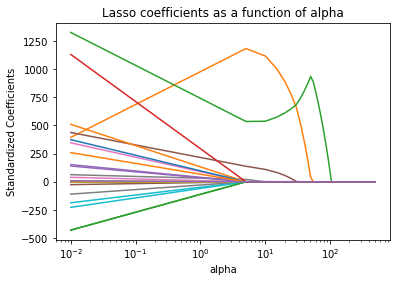

In [199]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=1)
reg.fit(X_train, y_train)
alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [200]:
feature_idx

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True])

In [201]:
df0.iloc[:,1:].columns[feature_idx]

Index(['hour of day', 'distance', 'est_dist_x', 'similarity_x',
       'similarity_dijk_x', '1st ranked', '2nd ranked', '3rd ranked',
       'similarity_y', 'similarity_dijk_y', 'living_street', 'motorway',
       'primary', 'primary_link', 'residential', 'road', 'secondary_link',
       'service', 'tertiary', 'track', 'unclassified', 'others'],
      dtype='object')

In [202]:
df0[df0.iloc[:,1:].columns[feature_idx]]

hour of day  distance  est_dist_x  similarity_x  similarity_dijk_x  \
0               18  0.297612    0.267902      0.774648           0.873016   
1               21  0.300860    0.256891      0.721519           0.850746   
2               19  0.300104    0.267942      0.697368           0.841270   
3               17  0.309036    0.271396      0.654762           0.820896   
4               17  0.320189    0.305235      0.666667           0.763158   
...            ...       ...         ...           ...                ...   
16268            8  0.613281    0.603781      0.686957           0.718182   
16269           22  0.602632    0.623736      0.771930           0.778761   
16270            1  0.616626    0.599978      0.715517           0.754545   
16271            3  0.624276    0.598862      0.714286           0.765766   
16272           23  0.607335    0.611778      0.728070           0.734513   

       1st ranked  2nd ranked  3rd ranked  similarity_y  similarity_dijk_y  \
0        0.246213    0.108827    0.887979      0.774648           0.873016   
1        0.246213    0.656276    0.403240      0.721519           0.850746   
2        0.246213    0.656276    0.403240      0.697368           0.841270   
3        0.246213    0.656276    0.151746      0.654762           0.820896   
4        0.246213    0.656276    0.151746      0.666667           0.763158   
...           ...         ...         ...           ...                ...   
16268    0.246213    0.656276    1.000000      0.686957           0.718182   
16269    0.246213    0.656276    1.000000      0.771930           0.778761   
16270    0.246213    0.656276    1.000000      0.715517           0.754545   
16271    0.246213    0.656276    1.000000      0.714286           0.765766   
16272    0.246213    0.656276    1.000000      0.728070           0.734513   

       ...   primary  primary_link  residential  road  secondary_link  \
0      ...  0.259807      0.276544     0.000000   0.0             0.0   
1      ...  0.284984      0.276544     0.004285   0.0             0.0   
2      ...  0.274263      0.276544     0.000000   0.0             0.0   
3      ...  0.280859      0.276544     0.026573   0.0             0.0   
4      ...  0.274263      0.276544     0.013809   0.0             0.0   
...    ...       ...           ...          ...   ...             ...   
16268  ...  0.551571      0.000000     0.000000   0.0             0.0   
16269  ...  0.551571      0.000000     0.014568   0.0             0.0   
16270  ...  0.551571      0.000000     0.000000   0.0             0.0   
16271  ...  0.551571      0.000000     0.046892   0.0             0.0   
16272  ...  0.551571      0.000000     0.012267   0.0             0.0   

        service  tertiary  track  unclassified  others  
0      0.202110  0.053396    0.0      0.116085     0.0  
1      0.000000  0.078128    0.0      0.014546     0.0  
2      0.202110  0.078128    0.0      0.014546     0.0  
3      0.308776  0.059226    0.0      0.014546     0.0  
4      0.356220  0.106658    0.0      0.014546     0.0  
...         ...       ...    ...           ...     ...  
16268  0.000000  0.215151    0.0      0.000000     0.0  
16269  0.000000  0.193042    0.0      0.000000     0.0  
16270  0.000000  0.224455    0.0      0.000000     0.0  
16271  0.000000  0.224455    0.0      0.000000     0.0  
16272  0.000000  0.193042    0.0      0.000000     0.0  

[16273 rows x 22 columns]

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


<AxesSubplot:>

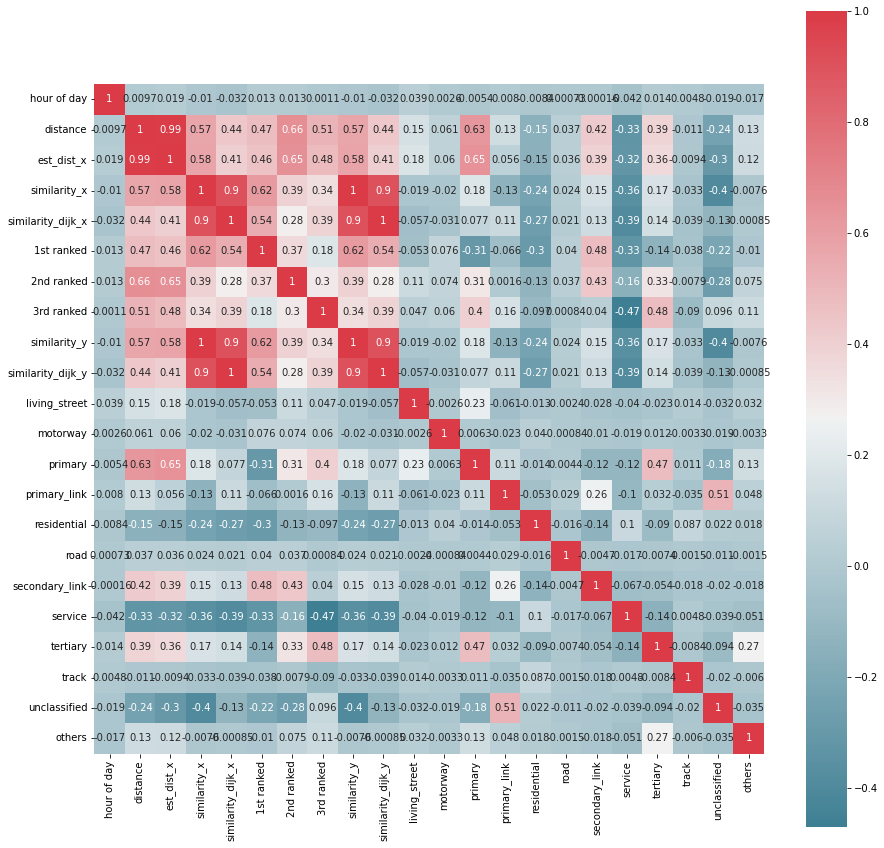

In [203]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(15,15))
# corr = df0[['travel time','distance','motorway','residential','secondary_link','service','track','trunk']].corr()
corr = df0[df0.iloc[:,1:].columns[feature_idx]].corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [204]:
x = np.array(df0[df0.iloc[:,1:].columns[feature_idx]])
y = np.array(df0['travel time'])
x

array([[1.80000000e+01, 2.97611721e-01, 2.67901888e-01, ...,
        0.00000000e+00, 1.16085010e-01, 0.00000000e+00],
       [2.10000000e+01, 3.00859653e-01, 2.56891065e-01, ...,
        0.00000000e+00, 1.45460799e-02, 0.00000000e+00],
       [1.90000000e+01, 3.00104425e-01, 2.67941659e-01, ...,
        0.00000000e+00, 1.45460799e-02, 0.00000000e+00],
       ...,
       [1.00000000e+00, 6.16625522e-01, 5.99978290e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 6.24275621e-01, 5.98861824e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.30000000e+01, 6.07335047e-01, 6.11777555e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [205]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [206]:
print(X_train.shape)
print(X_test.shape)
# X_train

(13018, 22)
(3255, 22)


In [207]:
# inputs: distance + roadtypes distance
model8_1_3 = nnmodel_(50, num_hlayers=1,Epoch=500)
model8_1_3

Epoch 1/500
407/407 [==============================] - 1s 893us/step - loss: 894584.1875 - mape: 87.4959 - rmse: 945.8246 - val_loss: 662989.2500 - val_mape: 65.3616 - val_rmse: 814.2415
Epoch 2/500
407/407 [==============================] - 0s 715us/step - loss: 453963.7812 - mape: 52.4443 - rmse: 673.7684 - val_loss: 306055.6562 - val_mape: 51.9111 - val_rmse: 553.2230
Epoch 3/500
407/407 [==============================] - 0s 777us/step - loss: 284704.9375 - mape: 56.5422 - rmse: 533.5775 - val_loss: 254621.5312 - val_mape: 56.5689 - val_rmse: 504.6004
Epoch 4/500
407/407 [==============================] - 0s 711us/step - loss: 248520.9219 - mape: 56.2790 - rmse: 498.5187 - val_loss: 221043.8125 - val_mape: 52.8702 - val_rmse: 470.1530
Epoch 5/500
407/407 [==============================] - 0s 760us/step - loss: 210838.5781 - mape: 51.4423 - rmse: 459.1716 - val_loss: 183080.7656 - val_mape: 48.8279 - val_rmse: 427.8794
Epoch 6/500
407/407 [==============================] - 0s 750us/s

407/407 [==============================] - 0s 771us/step - loss: 62477.9062 - mape: 22.1389 - rmse: 249.9558 - val_loss: 62378.8594 - val_mape: 22.7986 - val_rmse: 249.7576
Epoch 46/500
407/407 [==============================] - 0s 765us/step - loss: 62355.4336 - mape: 22.1260 - rmse: 249.7107 - val_loss: 62335.6367 - val_mape: 22.8619 - val_rmse: 249.6711
Epoch 47/500
407/407 [==============================] - 0s 737us/step - loss: 62247.3555 - mape: 22.0582 - rmse: 249.4942 - val_loss: 62269.2070 - val_mape: 21.6433 - val_rmse: 249.5380
Epoch 48/500
407/407 [==============================] - 0s 753us/step - loss: 62205.4648 - mape: 22.0155 - rmse: 249.4102 - val_loss: 62097.7734 - val_mape: 22.3487 - val_rmse: 249.1942
Epoch 49/500
407/407 [==============================] - 0s 757us/step - loss: 62114.1641 - mape: 22.0106 - rmse: 249.2271 - val_loss: 62198.0742 - val_mape: 21.3249 - val_rmse: 249.3954
Epoch 50/500
407/407 [==============================] - 0s 717us/step - loss: 62047

Epoch 133/500
407/407 [==============================] - 0s 731us/step - loss: 60266.4922 - mape: 21.1935 - rmse: 245.4923 - val_loss: 60290.6680 - val_mape: 22.3004 - val_rmse: 245.5416
Epoch 134/500
407/407 [==============================] - 0s 722us/step - loss: 60203.3320 - mape: 21.2796 - rmse: 245.3637 - val_loss: 60150.6016 - val_mape: 21.3158 - val_rmse: 245.2562
Epoch 135/500
407/407 [==============================] - 0s 769us/step - loss: 60238.2344 - mape: 21.1882 - rmse: 245.4348 - val_loss: 60184.7891 - val_mape: 21.9308 - val_rmse: 245.3259
Epoch 136/500
407/407 [==============================] - 0s 763us/step - loss: 60216.5430 - mape: 21.1890 - rmse: 245.3906 - val_loss: 60128.6133 - val_mape: 21.5498 - val_rmse: 245.2114
Epoch 137/500
407/407 [==============================] - 0s 778us/step - loss: 60199.8281 - mape: 21.1882 - rmse: 245.3565 - val_loss: 60108.6680 - val_mape: 21.2589 - val_rmse: 245.1707
Epoch 138/500
407/407 [==============================] - 0s 718us

Epoch 177/500
407/407 [==============================] - 0s 737us/step - loss: 59839.5469 - mape: 21.0593 - rmse: 244.6212 - val_loss: 59804.4922 - val_mape: 20.5991 - val_rmse: 244.5496
Epoch 178/500
407/407 [==============================] - 0s 734us/step - loss: 59835.3086 - mape: 20.9939 - rmse: 244.6126 - val_loss: 59754.4883 - val_mape: 21.6152 - val_rmse: 244.4473
Epoch 179/500
407/407 [==============================] - 0s 737us/step - loss: 59817.9961 - mape: 21.0572 - rmse: 244.5772 - val_loss: 59734.9023 - val_mape: 21.2874 - val_rmse: 244.4072
Epoch 180/500
407/407 [==============================] - 0s 767us/step - loss: 59775.8633 - mape: 21.0088 - rmse: 244.4910 - val_loss: 59719.7969 - val_mape: 20.8565 - val_rmse: 244.3763
Epoch 181/500
407/407 [==============================] - 0s 741us/step - loss: 59828.5273 - mape: 20.9995 - rmse: 244.5987 - val_loss: 59695.6992 - val_mape: 21.3127 - val_rmse: 244.3270
Epoch 182/500
407/407 [==============================] - 0s 740us

Epoch 221/500
407/407 [==============================] - 0s 748us/step - loss: 59529.7930 - mape: 20.8803 - rmse: 243.9873 - val_loss: 59531.0508 - val_mape: 21.7707 - val_rmse: 243.9899
Epoch 222/500
407/407 [==============================] - 0s 745us/step - loss: 59548.3750 - mape: 20.8778 - rmse: 244.0254 - val_loss: 59497.0039 - val_mape: 21.6817 - val_rmse: 243.9201
Epoch 223/500
407/407 [==============================] - 0s 751us/step - loss: 59517.9141 - mape: 20.8773 - rmse: 243.9629 - val_loss: 59439.3516 - val_mape: 21.1456 - val_rmse: 243.8019
Epoch 224/500
407/407 [==============================] - 0s 729us/step - loss: 59508.0938 - mape: 20.9157 - rmse: 243.9428 - val_loss: 59441.8867 - val_mape: 21.3361 - val_rmse: 243.8071
Epoch 225/500
407/407 [==============================] - 0s 720us/step - loss: 59500.6875 - mape: 20.9671 - rmse: 243.9276 - val_loss: 59477.8203 - val_mape: 20.8049 - val_rmse: 243.8808
Epoch 226/500
407/407 [==============================] - 0s 776us

Epoch 265/500
407/407 [==============================] - 0s 768us/step - loss: 59358.3594 - mape: 20.8089 - rmse: 243.6357 - val_loss: 59322.2773 - val_mape: 21.1486 - val_rmse: 243.5616
Epoch 266/500
407/407 [==============================] - 0s 742us/step - loss: 59326.8008 - mape: 20.8244 - rmse: 243.5709 - val_loss: 59360.0938 - val_mape: 21.4872 - val_rmse: 243.6393
Epoch 267/500
407/407 [==============================] - 0s 716us/step - loss: 59327.1680 - mape: 20.8227 - rmse: 243.5717 - val_loss: 59439.3516 - val_mape: 21.8978 - val_rmse: 243.8019
Epoch 268/500
407/407 [==============================] - 0s 765us/step - loss: 59366.0391 - mape: 20.8202 - rmse: 243.6515 - val_loss: 59594.1406 - val_mape: 22.2793 - val_rmse: 244.1191
Epoch 269/500
407/407 [==============================] - 0s 757us/step - loss: 59314.2188 - mape: 20.7932 - rmse: 243.5451 - val_loss: 59741.2812 - val_mape: 22.6353 - val_rmse: 244.4203
Epoch 270/500
407/407 [==============================] - 0s 740us

Epoch 309/500
407/407 [==============================] - 0s 757us/step - loss: 59281.3750 - mape: 20.7586 - rmse: 243.4777 - val_loss: 59373.5234 - val_mape: 21.7518 - val_rmse: 243.6668
Epoch 310/500
407/407 [==============================] - 0s 739us/step - loss: 59243.6367 - mape: 20.8787 - rmse: 243.4002 - val_loss: 59445.0469 - val_mape: 20.0840 - val_rmse: 243.8136
Epoch 311/500
407/407 [==============================] - 0s 721us/step - loss: 59250.8281 - mape: 20.7366 - rmse: 243.4149 - val_loss: 59384.7383 - val_mape: 21.7256 - val_rmse: 243.6898
Epoch 312/500
407/407 [==============================] - 0s 744us/step - loss: 59222.6211 - mape: 20.8518 - rmse: 243.3570 - val_loss: 59311.1797 - val_mape: 21.0060 - val_rmse: 243.5389
Epoch 313/500
407/407 [==============================] - 0s 738us/step - loss: 59187.5508 - mape: 20.7143 - rmse: 243.2849 - val_loss: 59277.4375 - val_mape: 21.2266 - val_rmse: 243.4696
Epoch 314/500
407/407 [==============================] - 0s 746us

Epoch 353/500
407/407 [==============================] - 0s 748us/step - loss: 59210.7422 - mape: 20.7883 - rmse: 243.3326 - val_loss: 59303.8438 - val_mape: 21.6089 - val_rmse: 243.5238
Epoch 354/500
407/407 [==============================] - 0s 762us/step - loss: 59147.6406 - mape: 20.8054 - rmse: 243.2029 - val_loss: 59243.6016 - val_mape: 20.4768 - val_rmse: 243.4001
Epoch 355/500
407/407 [==============================] - 0s 732us/step - loss: 59201.9531 - mape: 20.7308 - rmse: 243.3145 - val_loss: 59224.1055 - val_mape: 21.1534 - val_rmse: 243.3600
Epoch 356/500
407/407 [==============================] - 0s 740us/step - loss: 59236.1758 - mape: 20.8991 - rmse: 243.3848 - val_loss: 59313.3516 - val_mape: 20.2679 - val_rmse: 243.5433
Epoch 357/500
407/407 [==============================] - 0s 751us/step - loss: 59217.1133 - mape: 20.7675 - rmse: 243.3457 - val_loss: 59216.1680 - val_mape: 20.7696 - val_rmse: 243.3437
Epoch 358/500
407/407 [==============================] - 0s 733us

Epoch 397/500
407/407 [==============================] - 0s 751us/step - loss: 59123.7500 - mape: 20.7782 - rmse: 243.1538 - val_loss: 59289.3359 - val_mape: 21.8504 - val_rmse: 243.4940
Epoch 398/500
407/407 [==============================] - 0s 707us/step - loss: 59118.5312 - mape: 20.8342 - rmse: 243.1430 - val_loss: 59161.8555 - val_mape: 20.8550 - val_rmse: 243.2321
Epoch 399/500
407/407 [==============================] - 0s 731us/step - loss: 59115.1758 - mape: 20.7356 - rmse: 243.1361 - val_loss: 59171.4453 - val_mape: 20.8586 - val_rmse: 243.2518
Epoch 400/500
407/407 [==============================] - 0s 719us/step - loss: 59171.6133 - mape: 20.8453 - rmse: 243.2522 - val_loss: 59222.0000 - val_mape: 20.4638 - val_rmse: 243.3557
Epoch 401/500
407/407 [==============================] - 0s 716us/step - loss: 59144.0312 - mape: 20.7017 - rmse: 243.1955 - val_loss: 59282.5273 - val_mape: 21.7211 - val_rmse: 243.4800
Epoch 402/500
407/407 [==============================] - 0s 749us

Epoch 441/500
407/407 [==============================] - 0s 696us/step - loss: 59077.6523 - mape: 20.7035 - rmse: 243.0589 - val_loss: 59233.0312 - val_mape: 21.6456 - val_rmse: 243.3784
Epoch 442/500
407/407 [==============================] - 0s 720us/step - loss: 59044.0898 - mape: 20.6959 - rmse: 242.9899 - val_loss: 59167.0430 - val_mape: 21.4618 - val_rmse: 243.2428
Epoch 443/500
407/407 [==============================] - 0s 716us/step - loss: 59062.0938 - mape: 20.7336 - rmse: 243.0269 - val_loss: 59330.9102 - val_mape: 22.1120 - val_rmse: 243.5794
Epoch 444/500
407/407 [==============================] - 0s 752us/step - loss: 59077.6680 - mape: 20.8451 - rmse: 243.0590 - val_loss: 59118.2891 - val_mape: 20.6561 - val_rmse: 243.1425
Epoch 445/500
407/407 [==============================] - 0s 752us/step - loss: 59044.5273 - mape: 20.7764 - rmse: 242.9908 - val_loss: 59133.7891 - val_mape: 20.5056 - val_rmse: 243.1744
Epoch 446/500
407/407 [==============================] - 0s 700us

Epoch 485/500
407/407 [==============================] - 0s 742us/step - loss: 59027.9141 - mape: 20.7468 - rmse: 242.9566 - val_loss: 59151.0039 - val_mape: 20.2405 - val_rmse: 243.2098
Epoch 486/500
407/407 [==============================] - 0s 729us/step - loss: 58988.4922 - mape: 20.7532 - rmse: 242.8755 - val_loss: 59076.5312 - val_mape: 21.1209 - val_rmse: 243.0566
Epoch 487/500
407/407 [==============================] - 0s 713us/step - loss: 58970.2266 - mape: 20.8179 - rmse: 242.8379 - val_loss: 59123.5234 - val_mape: 20.5739 - val_rmse: 243.1533
Epoch 488/500
407/407 [==============================] - 0s 746us/step - loss: 58983.6953 - mape: 20.7063 - rmse: 242.8656 - val_loss: 59106.6445 - val_mape: 21.1879 - val_rmse: 243.1186
Epoch 489/500
407/407 [==============================] - 0s 727us/step - loss: 58948.5508 - mape: 20.7655 - rmse: 242.7932 - val_loss: 59186.9258 - val_mape: 20.0747 - val_rmse: 243.2836
Epoch 490/500
407/407 [==============================] - 0s 753us

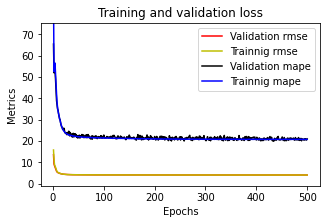

In [208]:
plotme(model8_1_3)

In [209]:
# inputs: distance + roadtypes distance
model8_1_5 = nnmodel_(100, num_hlayers=1,Epoch=500)
model8_1_5

Epoch 1/500
407/407 [==============================] - 1s 887us/step - loss: 827278.2500 - mape: 81.0858 - rmse: 909.5484 - val_loss: 502776.8438 - val_mape: 52.4351 - val_rmse: 709.0676
Epoch 2/500
407/407 [==============================] - 0s 738us/step - loss: 339426.8125 - mape: 52.7732 - rmse: 582.6035 - val_loss: 260493.8594 - val_mape: 56.8742 - val_rmse: 510.3860
Epoch 3/500
407/407 [==============================] - 0s 743us/step - loss: 249520.6250 - mape: 56.3874 - rmse: 499.5204 - val_loss: 216290.0156 - val_mape: 52.5902 - val_rmse: 465.0699
Epoch 4/500
407/407 [==============================] - 0s 787us/step - loss: 198415.8750 - mape: 50.1711 - rmse: 445.4390 - val_loss: 165260.3906 - val_mape: 45.0968 - val_rmse: 406.5223
Epoch 5/500
407/407 [==============================] - 0s 766us/step - loss: 148991.3125 - mape: 43.3556 - rmse: 385.9939 - val_loss: 125628.9531 - val_mape: 40.2227 - val_rmse: 354.4417
Epoch 6/500
407/407 [==============================] - 0s 753us/s

407/407 [==============================] - 0s 740us/step - loss: 61133.8047 - mape: 21.5471 - rmse: 247.2525 - val_loss: 61060.7109 - val_mape: 21.1545 - val_rmse: 247.1047
Epoch 46/500
407/407 [==============================] - 0s 732us/step - loss: 61025.5977 - mape: 21.3792 - rmse: 247.0336 - val_loss: 60991.3477 - val_mape: 20.9101 - val_rmse: 246.9643
Epoch 47/500
407/407 [==============================] - 0s 744us/step - loss: 60951.0898 - mape: 21.4635 - rmse: 246.8828 - val_loss: 60922.9180 - val_mape: 21.2523 - val_rmse: 246.8257
Epoch 48/500
407/407 [==============================] - 0s 800us/step - loss: 60982.5859 - mape: 21.3704 - rmse: 246.9465 - val_loss: 60828.6367 - val_mape: 21.6762 - val_rmse: 246.6346
Epoch 49/500
407/407 [==============================] - 0s 749us/step - loss: 60904.0273 - mape: 21.3786 - rmse: 246.7874 - val_loss: 60800.2461 - val_mape: 21.0299 - val_rmse: 246.5771
Epoch 50/500
407/407 [==============================] - 0s 745us/step - loss: 60789

Epoch 133/500
407/407 [==============================] - 0s 755us/step - loss: 59191.6406 - mape: 20.7738 - rmse: 243.2933 - val_loss: 59433.2148 - val_mape: 22.0731 - val_rmse: 243.7893
Epoch 134/500
407/407 [==============================] - 0s 770us/step - loss: 59122.8750 - mape: 20.7256 - rmse: 243.1520 - val_loss: 59390.5898 - val_mape: 21.9094 - val_rmse: 243.7018
Epoch 135/500
407/407 [==============================] - 0s 758us/step - loss: 59151.2500 - mape: 20.7451 - rmse: 243.2103 - val_loss: 59203.2539 - val_mape: 21.1084 - val_rmse: 243.3172
Epoch 136/500
407/407 [==============================] - 0s 774us/step - loss: 59145.4102 - mape: 20.7352 - rmse: 243.1983 - val_loss: 59279.6914 - val_mape: 20.1233 - val_rmse: 243.4742
Epoch 137/500
407/407 [==============================] - 0s 753us/step - loss: 59154.9375 - mape: 20.6647 - rmse: 243.2179 - val_loss: 59255.0000 - val_mape: 21.5904 - val_rmse: 243.4235
Epoch 138/500
407/407 [==============================] - 0s 762us

Epoch 177/500
407/407 [==============================] - 0s 762us/step - loss: 58996.3711 - mape: 20.6903 - rmse: 242.8917 - val_loss: 58996.2773 - val_mape: 20.5152 - val_rmse: 242.8915
Epoch 178/500
407/407 [==============================] - 0s 740us/step - loss: 58953.4375 - mape: 20.7091 - rmse: 242.8033 - val_loss: 59026.7656 - val_mape: 20.2822 - val_rmse: 242.9542
Epoch 179/500
407/407 [==============================] - 0s 769us/step - loss: 58983.9805 - mape: 20.6452 - rmse: 242.8662 - val_loss: 59009.3633 - val_mape: 20.9058 - val_rmse: 242.9184
Epoch 180/500
407/407 [==============================] - 0s 768us/step - loss: 58961.9102 - mape: 20.7568 - rmse: 242.8207 - val_loss: 59003.7227 - val_mape: 21.0929 - val_rmse: 242.9068
Epoch 181/500
407/407 [==============================] - 0s 740us/step - loss: 58945.0312 - mape: 20.7022 - rmse: 242.7860 - val_loss: 58980.6758 - val_mape: 20.9174 - val_rmse: 242.8594
Epoch 182/500
407/407 [==============================] - 0s 767us

Epoch 221/500
407/407 [==============================] - 0s 756us/step - loss: 58817.6016 - mape: 20.6728 - rmse: 242.5234 - val_loss: 58947.9961 - val_mape: 20.9409 - val_rmse: 242.7921
Epoch 222/500
407/407 [==============================] - 0s 737us/step - loss: 58843.9688 - mape: 20.6619 - rmse: 242.5778 - val_loss: 58902.4531 - val_mape: 21.0067 - val_rmse: 242.6983
Epoch 223/500
407/407 [==============================] - 0s 737us/step - loss: 58869.2422 - mape: 20.7150 - rmse: 242.6299 - val_loss: 58858.9961 - val_mape: 20.7555 - val_rmse: 242.6087
Epoch 224/500
407/407 [==============================] - 0s 752us/step - loss: 58848.5156 - mape: 20.6961 - rmse: 242.5871 - val_loss: 58968.8828 - val_mape: 20.4938 - val_rmse: 242.8351
Epoch 225/500
407/407 [==============================] - 0s 747us/step - loss: 58918.5547 - mape: 20.7746 - rmse: 242.7314 - val_loss: 58944.1875 - val_mape: 20.3671 - val_rmse: 242.7842
Epoch 226/500
407/407 [==============================] - 0s 788us

Epoch 265/500
407/407 [==============================] - 0s 765us/step - loss: 58772.5664 - mape: 20.6635 - rmse: 242.4305 - val_loss: 58920.0156 - val_mape: 21.3547 - val_rmse: 242.7345
Epoch 266/500
407/407 [==============================] - 0s 784us/step - loss: 58779.1484 - mape: 20.6858 - rmse: 242.4441 - val_loss: 58832.9844 - val_mape: 20.9302 - val_rmse: 242.5551
Epoch 267/500
407/407 [==============================] - 0s 760us/step - loss: 58801.3086 - mape: 20.6411 - rmse: 242.4898 - val_loss: 58893.1445 - val_mape: 19.9996 - val_rmse: 242.6791
Epoch 268/500
407/407 [==============================] - 0s 741us/step - loss: 58802.4492 - mape: 20.6738 - rmse: 242.4922 - val_loss: 58799.7852 - val_mape: 20.9486 - val_rmse: 242.4867
Epoch 269/500
407/407 [==============================] - 0s 739us/step - loss: 58763.2617 - mape: 20.7229 - rmse: 242.4113 - val_loss: 58823.5859 - val_mape: 20.6361 - val_rmse: 242.5357
Epoch 270/500
407/407 [==============================] - 0s 787us

Epoch 309/500
407/407 [==============================] - 0s 755us/step - loss: 58736.4531 - mape: 20.6489 - rmse: 242.3560 - val_loss: 58994.0195 - val_mape: 21.9012 - val_rmse: 242.8868
Epoch 310/500
407/407 [==============================] - 0s 758us/step - loss: 58688.7266 - mape: 20.6597 - rmse: 242.2576 - val_loss: 58730.1719 - val_mape: 20.6397 - val_rmse: 242.3431
Epoch 311/500
407/407 [==============================] - 0s 775us/step - loss: 58714.2578 - mape: 20.6181 - rmse: 242.3103 - val_loss: 59231.0938 - val_mape: 22.4893 - val_rmse: 243.3744
Epoch 312/500
407/407 [==============================] - 0s 756us/step - loss: 58726.4609 - mape: 20.7335 - rmse: 242.3354 - val_loss: 58768.6797 - val_mape: 20.9628 - val_rmse: 242.4225
Epoch 313/500
407/407 [==============================] - 0s 768us/step - loss: 58731.0039 - mape: 20.6832 - rmse: 242.3448 - val_loss: 58938.1250 - val_mape: 21.7396 - val_rmse: 242.7718
Epoch 314/500
407/407 [==============================] - 0s 743us

Epoch 353/500
407/407 [==============================] - 0s 753us/step - loss: 58690.1172 - mape: 20.6136 - rmse: 242.2604 - val_loss: 58727.9844 - val_mape: 20.7719 - val_rmse: 242.3386
Epoch 354/500
407/407 [==============================] - 0s 724us/step - loss: 58655.2031 - mape: 20.6217 - rmse: 242.1884 - val_loss: 58859.0898 - val_mape: 21.4872 - val_rmse: 242.6089
Epoch 355/500
407/407 [==============================] - 0s 747us/step - loss: 58650.1875 - mape: 20.6173 - rmse: 242.1780 - val_loss: 59207.3398 - val_mape: 22.6139 - val_rmse: 243.3256
Epoch 356/500
407/407 [==============================] - 0s 737us/step - loss: 58701.6172 - mape: 20.6841 - rmse: 242.2842 - val_loss: 58786.2578 - val_mape: 21.4402 - val_rmse: 242.4588
Epoch 357/500
407/407 [==============================] - 0s 796us/step - loss: 58690.1094 - mape: 20.6672 - rmse: 242.2604 - val_loss: 58702.5664 - val_mape: 20.5288 - val_rmse: 242.2861
Epoch 358/500
407/407 [==============================] - 0s 801us

Epoch 397/500
407/407 [==============================] - 0s 774us/step - loss: 58633.6641 - mape: 20.6342 - rmse: 242.1439 - val_loss: 58688.8047 - val_mape: 20.9768 - val_rmse: 242.2577
Epoch 398/500
407/407 [==============================] - 0s 779us/step - loss: 58675.7109 - mape: 20.7124 - rmse: 242.2307 - val_loss: 58768.2148 - val_mape: 20.1741 - val_rmse: 242.4216
Epoch 399/500
407/407 [==============================] - 0s 738us/step - loss: 58638.0938 - mape: 20.6295 - rmse: 242.1530 - val_loss: 59029.6719 - val_mape: 22.1675 - val_rmse: 242.9602
Epoch 400/500
407/407 [==============================] - 0s 781us/step - loss: 58651.8672 - mape: 20.7386 - rmse: 242.1815 - val_loss: 58716.4258 - val_mape: 20.8083 - val_rmse: 242.3147
Epoch 401/500
407/407 [==============================] - 0s 757us/step - loss: 58616.3203 - mape: 20.6255 - rmse: 242.1081 - val_loss: 58828.7227 - val_mape: 21.5769 - val_rmse: 242.5463
Epoch 402/500
407/407 [==============================] - 0s 742us

Epoch 441/500
407/407 [==============================] - 0s 773us/step - loss: 58649.3242 - mape: 20.6624 - rmse: 242.1762 - val_loss: 58688.5312 - val_mape: 20.6394 - val_rmse: 242.2572
Epoch 442/500
407/407 [==============================] - 0s 789us/step - loss: 58628.1016 - mape: 20.6368 - rmse: 242.1324 - val_loss: 58958.2188 - val_mape: 21.9828 - val_rmse: 242.8131
Epoch 443/500
407/407 [==============================] - 0s 764us/step - loss: 58631.5469 - mape: 20.7482 - rmse: 242.1395 - val_loss: 58733.7812 - val_mape: 21.0042 - val_rmse: 242.3505
Epoch 444/500
407/407 [==============================] - 0s 776us/step - loss: 58609.0430 - mape: 20.6467 - rmse: 242.0930 - val_loss: 58673.9023 - val_mape: 20.7210 - val_rmse: 242.2270
Epoch 445/500
407/407 [==============================] - 0s 778us/step - loss: 58594.9922 - mape: 20.5956 - rmse: 242.0640 - val_loss: 58668.5039 - val_mape: 20.7608 - val_rmse: 242.2158
Epoch 446/500
407/407 [==============================] - 0s 753us

Epoch 485/500
407/407 [==============================] - 0s 780us/step - loss: 58560.4609 - mape: 20.6335 - rmse: 241.9927 - val_loss: 58892.5586 - val_mape: 21.7559 - val_rmse: 242.6779
Epoch 486/500
407/407 [==============================] - 0s 759us/step - loss: 58603.7656 - mape: 20.6667 - rmse: 242.0822 - val_loss: 58710.9297 - val_mape: 20.1736 - val_rmse: 242.3034
Epoch 487/500
407/407 [==============================] - 0s 753us/step - loss: 58543.0820 - mape: 20.6307 - rmse: 241.9568 - val_loss: 58643.2695 - val_mape: 20.6410 - val_rmse: 242.1637
Epoch 488/500
407/407 [==============================] - 0s 779us/step - loss: 58577.6680 - mape: 20.6989 - rmse: 242.0282 - val_loss: 58767.9883 - val_mape: 21.4056 - val_rmse: 242.4211
Epoch 489/500
407/407 [==============================] - 0s 745us/step - loss: 58582.3281 - mape: 20.6784 - rmse: 242.0379 - val_loss: 58724.3945 - val_mape: 20.0313 - val_rmse: 242.3312
Epoch 490/500
407/407 [==============================] - 0s 788us

In [210]:
# inputs: distance + roadtypes distance
model8_1_1 = nnmodel_(100,50, num_hlayers=2,Epoch=500)
model8_1_1

Epoch 1/500
407/407 [==============================] - 1s 976us/step - loss: 462672.5000 - mape: 64.9229 - rmse: 680.2003 - val_loss: 160730.6250 - val_mape: 46.8999 - val_rmse: 400.9122
Epoch 2/500
407/407 [==============================] - 0s 820us/step - loss: 117374.6250 - mape: 39.4396 - rmse: 342.5998 - val_loss: 95351.5391 - val_mape: 32.9042 - val_rmse: 308.7904
Epoch 3/500
407/407 [==============================] - 0s 813us/step - loss: 87338.8047 - mape: 31.3310 - rmse: 295.5314 - val_loss: 80525.1328 - val_mape: 27.8339 - val_rmse: 283.7695
Epoch 4/500
407/407 [==============================] - 0s 797us/step - loss: 76430.7656 - mape: 27.1552 - rmse: 276.4612 - val_loss: 73001.6484 - val_mape: 25.4313 - val_rmse: 270.1882
Epoch 5/500
407/407 [==============================] - 0s 819us/step - loss: 71352.5312 - mape: 25.1097 - rmse: 267.1190 - val_loss: 69471.0938 - val_mape: 25.8921 - val_rmse: 263.5737
Epoch 6/500
407/407 [==============================] - 0s 813us/step - l

407/407 [==============================] - 0s 816us/step - loss: 58457.3477 - mape: 20.5589 - rmse: 241.7795 - val_loss: 58545.2930 - val_mape: 20.3540 - val_rmse: 241.9613
Epoch 90/500
407/407 [==============================] - 0s 798us/step - loss: 58510.9648 - mape: 20.6244 - rmse: 241.8904 - val_loss: 58890.9141 - val_mape: 20.3559 - val_rmse: 242.6745
Epoch 91/500
407/407 [==============================] - 0s 777us/step - loss: 58338.9062 - mape: 20.5121 - rmse: 241.5345 - val_loss: 58540.9414 - val_mape: 20.0357 - val_rmse: 241.9523
Epoch 92/500
407/407 [==============================] - 0s 779us/step - loss: 58472.3906 - mape: 20.5721 - rmse: 241.8107 - val_loss: 58715.7734 - val_mape: 19.6320 - val_rmse: 242.3134
Epoch 93/500
407/407 [==============================] - 0s 785us/step - loss: 58491.5742 - mape: 20.5664 - rmse: 241.8503 - val_loss: 58555.4688 - val_mape: 21.1312 - val_rmse: 241.9824
Epoch 94/500
407/407 [==============================] - 0s 810us/step - loss: 58282

Epoch 133/500
407/407 [==============================] - 0s 802us/step - loss: 58069.0508 - mape: 20.4521 - rmse: 240.9752 - val_loss: 58606.6992 - val_mape: 21.7881 - val_rmse: 242.0882
Epoch 134/500
407/407 [==============================] - 0s 812us/step - loss: 58151.4766 - mape: 20.4788 - rmse: 241.1462 - val_loss: 58385.7500 - val_mape: 20.1615 - val_rmse: 241.6314
Epoch 135/500
407/407 [==============================] - 0s 809us/step - loss: 58148.1055 - mape: 20.3454 - rmse: 241.1392 - val_loss: 58334.8242 - val_mape: 20.3415 - val_rmse: 241.5260
Epoch 136/500
407/407 [==============================] - 0s 799us/step - loss: 58155.5586 - mape: 20.4838 - rmse: 241.1546 - val_loss: 58687.9375 - val_mape: 21.4982 - val_rmse: 242.2559
Epoch 137/500
407/407 [==============================] - 0s 830us/step - loss: 57960.3633 - mape: 20.4733 - rmse: 240.7496 - val_loss: 58636.6875 - val_mape: 19.2438 - val_rmse: 242.1501
Epoch 138/500
407/407 [==============================] - 0s 796us

Epoch 177/500
407/407 [==============================] - 0s 864us/step - loss: 57970.6641 - mape: 20.4960 - rmse: 240.7710 - val_loss: 58735.6914 - val_mape: 20.7739 - val_rmse: 242.3545
Epoch 178/500
407/407 [==============================] - 0s 801us/step - loss: 57791.2070 - mape: 20.3455 - rmse: 240.3980 - val_loss: 58608.3359 - val_mape: 19.1548 - val_rmse: 242.0916
Epoch 179/500
407/407 [==============================] - 0s 820us/step - loss: 57820.9727 - mape: 20.3333 - rmse: 240.4599 - val_loss: 58582.2812 - val_mape: 21.4630 - val_rmse: 242.0378
Epoch 180/500
407/407 [==============================] - 0s 819us/step - loss: 57806.7500 - mape: 20.3906 - rmse: 240.4303 - val_loss: 58313.7578 - val_mape: 20.0315 - val_rmse: 241.4824
Epoch 181/500
407/407 [==============================] - 0s 779us/step - loss: 57758.3672 - mape: 20.4115 - rmse: 240.3297 - val_loss: 58524.4180 - val_mape: 19.6323 - val_rmse: 241.9182
Epoch 182/500
407/407 [==============================] - 0s 819us

Epoch 221/500
407/407 [==============================] - 0s 779us/step - loss: 57646.7578 - mape: 20.3166 - rmse: 240.0974 - val_loss: 58217.7227 - val_mape: 21.3757 - val_rmse: 241.2835
Epoch 222/500
407/407 [==============================] - 0s 811us/step - loss: 57645.7227 - mape: 20.4519 - rmse: 240.0952 - val_loss: 58465.6875 - val_mape: 19.4544 - val_rmse: 241.7968
Epoch 223/500
407/407 [==============================] - 0s 794us/step - loss: 57625.0859 - mape: 20.2804 - rmse: 240.0523 - val_loss: 58536.9102 - val_mape: 19.2893 - val_rmse: 241.9440
Epoch 224/500
407/407 [==============================] - 0s 836us/step - loss: 57620.9531 - mape: 20.3565 - rmse: 240.0437 - val_loss: 58349.5703 - val_mape: 19.6014 - val_rmse: 241.5566
Epoch 225/500
407/407 [==============================] - 0s 808us/step - loss: 57654.8477 - mape: 20.2852 - rmse: 240.1142 - val_loss: 58800.5195 - val_mape: 18.6479 - val_rmse: 242.4882
Epoch 226/500
407/407 [==============================] - 0s 817us

Epoch 265/500
407/407 [==============================] - 0s 807us/step - loss: 57428.3945 - mape: 20.2059 - rmse: 239.6422 - val_loss: 59134.1328 - val_mape: 23.1622 - val_rmse: 243.1751
Epoch 266/500
407/407 [==============================] - 0s 819us/step - loss: 57500.1719 - mape: 20.3508 - rmse: 239.7919 - val_loss: 58184.3477 - val_mape: 19.6699 - val_rmse: 241.2143
Epoch 267/500
407/407 [==============================] - 0s 825us/step - loss: 57578.3672 - mape: 20.2822 - rmse: 239.9549 - val_loss: 58007.3555 - val_mape: 20.6126 - val_rmse: 240.8472
Epoch 268/500
407/407 [==============================] - 0s 795us/step - loss: 57422.1875 - mape: 20.2600 - rmse: 239.6293 - val_loss: 58672.6328 - val_mape: 22.2662 - val_rmse: 242.2243
Epoch 269/500
407/407 [==============================] - 0s 768us/step - loss: 57517.0508 - mape: 20.2107 - rmse: 239.8271 - val_loss: 58189.1797 - val_mape: 21.5914 - val_rmse: 241.2243
Epoch 270/500
407/407 [==============================] - 0s 806us

Epoch 309/500
407/407 [==============================] - 0s 790us/step - loss: 57173.1797 - mape: 20.1892 - rmse: 239.1091 - val_loss: 58319.1445 - val_mape: 18.7923 - val_rmse: 241.4936
Epoch 310/500
407/407 [==============================] - 0s 799us/step - loss: 57239.3711 - mape: 20.2159 - rmse: 239.2475 - val_loss: 58320.0156 - val_mape: 20.7437 - val_rmse: 241.4954
Epoch 311/500
407/407 [==============================] - 0s 812us/step - loss: 57126.5938 - mape: 20.1804 - rmse: 239.0117 - val_loss: 58294.8359 - val_mape: 18.8486 - val_rmse: 241.4432
Epoch 312/500
407/407 [==============================] - 0s 817us/step - loss: 57159.9688 - mape: 20.0777 - rmse: 239.0815 - val_loss: 58127.4883 - val_mape: 20.9317 - val_rmse: 241.0964
Epoch 313/500
407/407 [==============================] - 0s 772us/step - loss: 57163.2734 - mape: 20.2721 - rmse: 239.0884 - val_loss: 58043.5430 - val_mape: 19.4038 - val_rmse: 240.9223
Epoch 314/500
407/407 [==============================] - 0s 803us

Epoch 353/500
407/407 [==============================] - 0s 801us/step - loss: 56915.2969 - mape: 20.1851 - rmse: 238.5693 - val_loss: 58020.3398 - val_mape: 19.2606 - val_rmse: 240.8741
Epoch 354/500
407/407 [==============================] - 0s 800us/step - loss: 57020.1172 - mape: 20.1165 - rmse: 238.7888 - val_loss: 58030.1953 - val_mape: 19.2129 - val_rmse: 240.8946
Epoch 355/500
407/407 [==============================] - 0s 781us/step - loss: 56784.8203 - mape: 19.9818 - rmse: 238.2957 - val_loss: 57788.4609 - val_mape: 19.8386 - val_rmse: 240.3923
Epoch 356/500
407/407 [==============================] - 0s 795us/step - loss: 56847.3320 - mape: 20.2179 - rmse: 238.4268 - val_loss: 58023.3047 - val_mape: 19.9226 - val_rmse: 240.8803
Epoch 357/500
407/407 [==============================] - 0s 784us/step - loss: 56849.8984 - mape: 20.0679 - rmse: 238.4322 - val_loss: 58119.1172 - val_mape: 19.0986 - val_rmse: 241.0791
Epoch 358/500
407/407 [==============================] - 0s 812us

Epoch 397/500
407/407 [==============================] - 0s 784us/step - loss: 56605.4766 - mape: 20.0448 - rmse: 237.9191 - val_loss: 59550.2930 - val_mape: 17.6142 - val_rmse: 244.0293
Epoch 398/500
407/407 [==============================] - 0s 794us/step - loss: 56523.7578 - mape: 19.9250 - rmse: 237.7473 - val_loss: 57982.5859 - val_mape: 21.5121 - val_rmse: 240.7957
Epoch 399/500
407/407 [==============================] - 0s 796us/step - loss: 56497.9922 - mape: 20.0207 - rmse: 237.6931 - val_loss: 57734.8711 - val_mape: 20.1676 - val_rmse: 240.2808
Epoch 400/500
407/407 [==============================] - 0s 816us/step - loss: 56433.9336 - mape: 20.0049 - rmse: 237.5583 - val_loss: 57954.1758 - val_mape: 18.8433 - val_rmse: 240.7367
Epoch 401/500
407/407 [==============================] - 0s 812us/step - loss: 56513.7422 - mape: 19.9478 - rmse: 237.7262 - val_loss: 58302.8516 - val_mape: 18.3878 - val_rmse: 241.4598
Epoch 402/500
407/407 [==============================] - 0s 812us

Epoch 441/500
407/407 [==============================] - 0s 795us/step - loss: 56280.2578 - mape: 19.8719 - rmse: 237.2346 - val_loss: 57660.6445 - val_mape: 20.8869 - val_rmse: 240.1263
Epoch 442/500
407/407 [==============================] - 0s 788us/step - loss: 56070.8945 - mape: 19.8721 - rmse: 236.7929 - val_loss: 57871.8086 - val_mape: 21.9104 - val_rmse: 240.5656
Epoch 443/500
407/407 [==============================] - 0s 848us/step - loss: 56319.9180 - mape: 20.0675 - rmse: 237.3182 - val_loss: 57747.7227 - val_mape: 19.3789 - val_rmse: 240.3076
Epoch 444/500
407/407 [==============================] - 0s 826us/step - loss: 56187.5664 - mape: 19.8173 - rmse: 237.0392 - val_loss: 57972.7031 - val_mape: 21.7709 - val_rmse: 240.7752
Epoch 445/500
407/407 [==============================] - 0s 813us/step - loss: 56095.9219 - mape: 19.9628 - rmse: 236.8458 - val_loss: 57883.1094 - val_mape: 18.8482 - val_rmse: 240.5891
Epoch 446/500
407/407 [==============================] - 0s 821us

Epoch 485/500
407/407 [==============================] - 0s 798us/step - loss: 55818.3633 - mape: 19.9591 - rmse: 236.2591 - val_loss: 57864.9414 - val_mape: 18.7702 - val_rmse: 240.5513
Epoch 486/500
407/407 [==============================] - 0s 810us/step - loss: 55978.0820 - mape: 19.9020 - rmse: 236.5969 - val_loss: 57500.5352 - val_mape: 20.2819 - val_rmse: 239.7927
Epoch 487/500
407/407 [==============================] - 0s 815us/step - loss: 55906.6562 - mape: 19.8586 - rmse: 236.4459 - val_loss: 57974.0117 - val_mape: 21.4870 - val_rmse: 240.7779
Epoch 488/500
407/407 [==============================] - 0s 803us/step - loss: 55862.9805 - mape: 19.8149 - rmse: 236.3535 - val_loss: 57609.4961 - val_mape: 18.9604 - val_rmse: 240.0198
Epoch 489/500
407/407 [==============================] - 0s 816us/step - loss: 55899.0586 - mape: 19.8327 - rmse: 236.4298 - val_loss: 57534.6172 - val_mape: 19.7004 - val_rmse: 239.8638
Epoch 490/500
407/407 [==============================] - 0s 784us

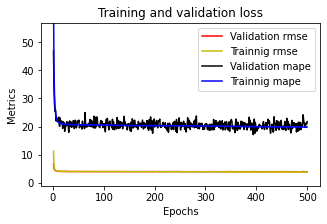

In [211]:
plotme(model8_1_1)

In [212]:
# inputs: distance + hour + roadtypes distance
model8_1_2 = nnmodel_(200,100, num_hlayers=2,Epoch=500)
model8_1_2

Epoch 1/500
407/407 [==============================] - 1s 1ms/step - loss: 351621.5938 - mape: 57.0903 - rmse: 592.9769 - val_loss: 104941.5781 - val_mape: 38.3900 - val_rmse: 323.9469
Epoch 2/500
407/407 [==============================] - 0s 936us/step - loss: 91248.3750 - mape: 32.7306 - rmse: 302.0735 - val_loss: 80022.8438 - val_mape: 27.8505 - val_rmse: 282.8831
Epoch 3/500
407/407 [==============================] - 0s 963us/step - loss: 75205.8125 - mape: 26.7068 - rmse: 274.2368 - val_loss: 71085.9844 - val_mape: 26.6837 - val_rmse: 266.6195
Epoch 4/500
407/407 [==============================] - 0s 979us/step - loss: 68156.5469 - mape: 23.7115 - rmse: 261.0681 - val_loss: 66014.1719 - val_mape: 25.3180 - val_rmse: 256.9322
Epoch 5/500
407/407 [==============================] - 0s 977us/step - loss: 64683.2578 - mape: 22.5505 - rmse: 254.3290 - val_loss: 63182.7422 - val_mape: 20.9781 - val_rmse: 251.3618
Epoch 6/500
407/407 [==============================] - 0s 983us/step - loss

407/407 [==============================] - 0s 942us/step - loss: 57949.6211 - mape: 20.4422 - rmse: 240.7273 - val_loss: 59268.4688 - val_mape: 23.3799 - val_rmse: 243.4512
Epoch 90/500
407/407 [==============================] - 0s 966us/step - loss: 57993.4180 - mape: 20.4534 - rmse: 240.8182 - val_loss: 58828.9922 - val_mape: 18.6389 - val_rmse: 242.5469
Epoch 91/500
407/407 [==============================] - 0s 965us/step - loss: 57846.7461 - mape: 20.4183 - rmse: 240.5135 - val_loss: 58087.4453 - val_mape: 19.4886 - val_rmse: 241.0134
Epoch 92/500
407/407 [==============================] - 0s 964us/step - loss: 58036.3672 - mape: 20.3126 - rmse: 240.9074 - val_loss: 58711.3555 - val_mape: 18.5497 - val_rmse: 242.3043
Epoch 93/500
407/407 [==============================] - 0s 937us/step - loss: 57889.0039 - mape: 20.3283 - rmse: 240.6013 - val_loss: 58713.5273 - val_mape: 18.5067 - val_rmse: 242.3087
Epoch 94/500
407/407 [==============================] - 0s 957us/step - loss: 57883

Epoch 133/500
407/407 [==============================] - 0s 942us/step - loss: 57364.8945 - mape: 20.1588 - rmse: 239.5097 - val_loss: 57872.2031 - val_mape: 19.1345 - val_rmse: 240.5664
Epoch 134/500
407/407 [==============================] - 0s 947us/step - loss: 57339.0430 - mape: 20.2371 - rmse: 239.4557 - val_loss: 57782.0859 - val_mape: 19.5596 - val_rmse: 240.3790
Epoch 135/500
407/407 [==============================] - 0s 949us/step - loss: 57234.5508 - mape: 20.0352 - rmse: 239.2374 - val_loss: 57674.3516 - val_mape: 19.7185 - val_rmse: 240.1548
Epoch 136/500
407/407 [==============================] - 0s 943us/step - loss: 57328.5664 - mape: 20.2023 - rmse: 239.4339 - val_loss: 57950.7812 - val_mape: 20.3527 - val_rmse: 240.7297
Epoch 137/500
407/407 [==============================] - 0s 948us/step - loss: 57268.7656 - mape: 20.1683 - rmse: 239.3089 - val_loss: 57890.6289 - val_mape: 19.2150 - val_rmse: 240.6047
Epoch 138/500
407/407 [==============================] - 0s 921us

Epoch 177/500
407/407 [==============================] - 0s 953us/step - loss: 56518.1992 - mape: 20.0500 - rmse: 237.7356 - val_loss: 58249.2148 - val_mape: 18.2684 - val_rmse: 241.3487
Epoch 178/500
407/407 [==============================] - 0s 942us/step - loss: 56550.5234 - mape: 19.9077 - rmse: 237.8035 - val_loss: 57996.2852 - val_mape: 18.4990 - val_rmse: 240.8242
Epoch 179/500
407/407 [==============================] - 0s 954us/step - loss: 56434.9766 - mape: 19.9444 - rmse: 237.5605 - val_loss: 57655.6836 - val_mape: 19.0395 - val_rmse: 240.1160
Epoch 180/500
407/407 [==============================] - 0s 960us/step - loss: 56637.1133 - mape: 19.8857 - rmse: 237.9855 - val_loss: 57588.1836 - val_mape: 20.5646 - val_rmse: 239.9754
Epoch 181/500
407/407 [==============================] - 0s 960us/step - loss: 56514.4492 - mape: 19.9080 - rmse: 237.7277 - val_loss: 57682.7422 - val_mape: 21.2449 - val_rmse: 240.1723
Epoch 182/500
407/407 [==============================] - 0s 931us

Epoch 221/500
407/407 [==============================] - 0s 948us/step - loss: 55871.3945 - mape: 19.7978 - rmse: 236.3713 - val_loss: 57392.3398 - val_mape: 20.6301 - val_rmse: 239.5670
Epoch 222/500
407/407 [==============================] - 0s 938us/step - loss: 55792.8633 - mape: 19.8318 - rmse: 236.2051 - val_loss: 57148.0195 - val_mape: 20.0901 - val_rmse: 239.0565
Epoch 223/500
407/407 [==============================] - 0s 938us/step - loss: 55737.2344 - mape: 19.8608 - rmse: 236.0873 - val_loss: 57479.9102 - val_mape: 19.5804 - val_rmse: 239.7497
Epoch 224/500
407/407 [==============================] - 0s 965us/step - loss: 55819.9258 - mape: 19.7786 - rmse: 236.2624 - val_loss: 57276.3164 - val_mape: 20.0013 - val_rmse: 239.3247
Epoch 225/500
407/407 [==============================] - 0s 930us/step - loss: 55742.1406 - mape: 19.8477 - rmse: 236.0977 - val_loss: 57395.5820 - val_mape: 19.4298 - val_rmse: 239.5737
Epoch 226/500
407/407 [==============================] - 0s 936us

Epoch 265/500
407/407 [==============================] - 0s 971us/step - loss: 55390.6836 - mape: 19.7187 - rmse: 235.3522 - val_loss: 57436.8984 - val_mape: 20.4863 - val_rmse: 239.6600
Epoch 266/500
407/407 [==============================] - 0s 950us/step - loss: 55294.9180 - mape: 19.6921 - rmse: 235.1487 - val_loss: 60479.9766 - val_mape: 24.3160 - val_rmse: 245.9268
Epoch 267/500
407/407 [==============================] - 0s 911us/step - loss: 55354.6523 - mape: 19.7792 - rmse: 235.2757 - val_loss: 57052.2773 - val_mape: 19.7472 - val_rmse: 238.8562
Epoch 268/500
407/407 [==============================] - 0s 949us/step - loss: 55165.5898 - mape: 19.7064 - rmse: 234.8736 - val_loss: 57651.2383 - val_mape: 20.8623 - val_rmse: 240.1067
Epoch 269/500
407/407 [==============================] - 0s 945us/step - loss: 55395.7617 - mape: 19.7290 - rmse: 235.3630 - val_loss: 57570.7969 - val_mape: 21.0018 - val_rmse: 239.9391
Epoch 270/500
407/407 [==============================] - 0s 986us

Epoch 309/500
407/407 [==============================] - 0s 929us/step - loss: 54892.7656 - mape: 19.7560 - rmse: 234.2921 - val_loss: 57208.3477 - val_mape: 19.0072 - val_rmse: 239.1827
Epoch 310/500
407/407 [==============================] - 0s 944us/step - loss: 54929.1133 - mape: 19.6019 - rmse: 234.3696 - val_loss: 57425.5820 - val_mape: 18.5275 - val_rmse: 239.6364
Epoch 311/500
407/407 [==============================] - 0s 946us/step - loss: 54839.8359 - mape: 19.6121 - rmse: 234.1791 - val_loss: 57745.5039 - val_mape: 20.8640 - val_rmse: 240.3029
Epoch 312/500
407/407 [==============================] - 0s 940us/step - loss: 55045.3984 - mape: 19.7146 - rmse: 234.6176 - val_loss: 57041.6133 - val_mape: 19.2616 - val_rmse: 238.8339
Epoch 313/500
407/407 [==============================] - 0s 963us/step - loss: 54776.0078 - mape: 19.6222 - rmse: 234.0428 - val_loss: 57164.9180 - val_mape: 20.7122 - val_rmse: 239.0919
Epoch 314/500
407/407 [==============================] - 0s 939us

Epoch 353/500
407/407 [==============================] - 0s 924us/step - loss: 54417.7930 - mape: 19.5921 - rmse: 233.2762 - val_loss: 57082.2109 - val_mape: 21.3296 - val_rmse: 238.9188
Epoch 354/500
407/407 [==============================] - 0s 994us/step - loss: 54449.0859 - mape: 19.6672 - rmse: 233.3433 - val_loss: 58278.9180 - val_mape: 20.5684 - val_rmse: 241.4103
Epoch 355/500
407/407 [==============================] - 0s 919us/step - loss: 54556.2969 - mape: 19.5488 - rmse: 233.5729 - val_loss: 58523.1797 - val_mape: 22.9069 - val_rmse: 241.9156
Epoch 356/500
407/407 [==============================] - 0s 942us/step - loss: 54498.1094 - mape: 19.5357 - rmse: 233.4483 - val_loss: 57214.0039 - val_mape: 20.5099 - val_rmse: 239.1945
Epoch 357/500
407/407 [==============================] - 0s 916us/step - loss: 54521.4219 - mape: 19.6885 - rmse: 233.4982 - val_loss: 57281.2383 - val_mape: 19.2128 - val_rmse: 239.3350
Epoch 358/500
407/407 [==============================] - 0s 940us

Epoch 397/500
407/407 [==============================] - 0s 956us/step - loss: 54333.3633 - mape: 19.5614 - rmse: 233.0952 - val_loss: 57375.9609 - val_mape: 18.6836 - val_rmse: 239.5328
Epoch 398/500
407/407 [==============================] - 0s 992us/step - loss: 54194.3828 - mape: 19.5882 - rmse: 232.7969 - val_loss: 57339.1094 - val_mape: 20.3793 - val_rmse: 239.4559
Epoch 399/500
407/407 [==============================] - 0s 964us/step - loss: 54047.1484 - mape: 19.5006 - rmse: 232.4804 - val_loss: 57795.6758 - val_mape: 21.9909 - val_rmse: 240.4073
Epoch 400/500
407/407 [==============================] - 0s 923us/step - loss: 54023.4141 - mape: 19.5642 - rmse: 232.4294 - val_loss: 57461.9883 - val_mape: 20.2612 - val_rmse: 239.7123
Epoch 401/500
407/407 [==============================] - 0s 973us/step - loss: 53947.5820 - mape: 19.4794 - rmse: 232.2662 - val_loss: 57254.9805 - val_mape: 21.0169 - val_rmse: 239.2801
Epoch 402/500
407/407 [==============================] - 0s 971us

Epoch 441/500
407/407 [==============================] - 0s 982us/step - loss: 53701.5859 - mape: 19.4810 - rmse: 231.7360 - val_loss: 57188.5117 - val_mape: 19.8526 - val_rmse: 239.1412
Epoch 442/500
407/407 [==============================] - 0s 968us/step - loss: 53620.1211 - mape: 19.4457 - rmse: 231.5602 - val_loss: 57208.5352 - val_mape: 19.3589 - val_rmse: 239.1831
Epoch 443/500
407/407 [==============================] - 0s 958us/step - loss: 53895.9922 - mape: 19.4574 - rmse: 232.1551 - val_loss: 57136.8945 - val_mape: 20.0141 - val_rmse: 239.0332
Epoch 444/500
407/407 [==============================] - 0s 951us/step - loss: 53504.7578 - mape: 19.3747 - rmse: 231.3110 - val_loss: 57674.5195 - val_mape: 21.9344 - val_rmse: 240.1552
Epoch 445/500
407/407 [==============================] - 0s 937us/step - loss: 53828.2383 - mape: 19.5076 - rmse: 232.0091 - val_loss: 57336.7539 - val_mape: 21.0217 - val_rmse: 239.4509
Epoch 446/500
407/407 [==============================] - 0s 951us

Epoch 485/500
407/407 [==============================] - 0s 949us/step - loss: 53286.0859 - mape: 19.4561 - rmse: 230.8378 - val_loss: 57659.0391 - val_mape: 19.3533 - val_rmse: 240.1230
Epoch 486/500
407/407 [==============================] - 0s 985us/step - loss: 53176.6172 - mape: 19.3245 - rmse: 230.6006 - val_loss: 57124.0508 - val_mape: 20.1277 - val_rmse: 239.0064
Epoch 487/500
407/407 [==============================] - 0s 924us/step - loss: 53229.5000 - mape: 19.2890 - rmse: 230.7152 - val_loss: 57006.6445 - val_mape: 19.8904 - val_rmse: 238.7606
Epoch 488/500
407/407 [==============================] - 0s 948us/step - loss: 53311.6406 - mape: 19.4954 - rmse: 230.8931 - val_loss: 58964.4766 - val_mape: 17.3648 - val_rmse: 242.8260
Epoch 489/500
407/407 [==============================] - 0s 936us/step - loss: 53323.7695 - mape: 19.2908 - rmse: 230.9194 - val_loss: 57177.1484 - val_mape: 20.1936 - val_rmse: 239.1174
Epoch 490/500
407/407 [==============================] - 0s 922us

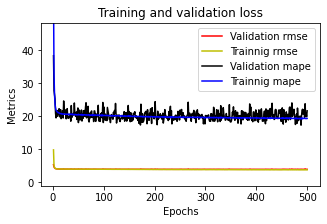

In [213]:
plotme(model8_1_2)

In [214]:
# inputs: distance + roadtypes distance
model8_1_4 = nnmodel_(10, num_hlayers=1,Epoch=500)
model8_1_4

Epoch 1/500
407/407 [==============================] - 1s 874us/step - loss: 980550.5000 - mape: 95.5302 - rmse: 990.2275 - val_loss: 910416.2500 - val_mape: 89.8343 - val_rmse: 954.1573
Epoch 2/500
407/407 [==============================] - 0s 699us/step - loss: 796839.5625 - mape: 78.2234 - rmse: 892.6587 - val_loss: 668759.7500 - val_mape: 66.0753 - val_rmse: 817.7773
Epoch 3/500
407/407 [==============================] - 0s 713us/step - loss: 560883.1250 - mape: 55.9345 - rmse: 748.9213 - val_loss: 451328.1562 - val_mape: 50.1378 - val_rmse: 671.8096
Epoch 4/500
407/407 [==============================] - 0s 700us/step - loss: 388806.8125 - mape: 49.6985 - rmse: 623.5438 - val_loss: 325728.8438 - val_mape: 50.2966 - val_rmse: 570.7266
Epoch 5/500
407/407 [==============================] - 0s 695us/step - loss: 307651.7812 - mape: 53.2378 - rmse: 554.6636 - val_loss: 277961.2500 - val_mape: 54.5073 - val_rmse: 527.2203
Epoch 6/500
407/407 [==============================] - 0s 763us/s

Epoch 45/500
407/407 [==============================] - 0s 738us/step - loss: 68393.3125 - mape: 24.0144 - rmse: 261.5211 - val_loss: 68381.5938 - val_mape: 24.2490 - val_rmse: 261.4987
Epoch 46/500
407/407 [==============================] - 0s 747us/step - loss: 68069.8672 - mape: 23.9004 - rmse: 260.9020 - val_loss: 68048.9609 - val_mape: 24.1759 - val_rmse: 260.8620
Epoch 47/500
407/407 [==============================] - 0s 723us/step - loss: 67753.9297 - mape: 23.7186 - rmse: 260.2958 - val_loss: 67750.7812 - val_mape: 24.3484 - val_rmse: 260.2898
Epoch 48/500
407/407 [==============================] - 0s 687us/step - loss: 67478.2031 - mape: 23.6015 - rmse: 259.7657 - val_loss: 67535.7656 - val_mape: 24.7490 - val_rmse: 259.8764
Epoch 49/500
407/407 [==============================] - 0s 700us/step - loss: 67187.4453 - mape: 23.6230 - rmse: 259.2054 - val_loss: 67180.5703 - val_mape: 24.2540 - val_rmse: 259.1921
Epoch 50/500
407/407 [==============================] - 0s 745us/step 

407/407 [==============================] - 0s 707us/step - loss: 62386.9375 - mape: 22.0254 - rmse: 249.7738 - val_loss: 62257.1602 - val_mape: 22.2171 - val_rmse: 249.5139
Epoch 90/500
407/407 [==============================] - 0s 772us/step - loss: 62328.6680 - mape: 22.0252 - rmse: 249.6571 - val_loss: 62217.0195 - val_mape: 22.5496 - val_rmse: 249.4334
Epoch 91/500
407/407 [==============================] - 0s 726us/step - loss: 62281.3984 - mape: 22.0730 - rmse: 249.5624 - val_loss: 62164.0000 - val_mape: 22.2237 - val_rmse: 249.3271
Epoch 92/500
407/407 [==============================] - 0s 718us/step - loss: 62254.1133 - mape: 22.0435 - rmse: 249.5077 - val_loss: 62125.0938 - val_mape: 22.3519 - val_rmse: 249.2491
Epoch 93/500
407/407 [==============================] - 0s 706us/step - loss: 62211.2344 - mape: 21.9223 - rmse: 249.4218 - val_loss: 62107.8164 - val_mape: 22.6251 - val_rmse: 249.2144
Epoch 94/500
407/407 [==============================] - 0s 744us/step - loss: 62151

Epoch 133/500
407/407 [==============================] - 0s 732us/step - loss: 61280.3008 - mape: 21.5692 - rmse: 247.5486 - val_loss: 61145.0625 - val_mape: 22.0640 - val_rmse: 247.2753
Epoch 134/500
407/407 [==============================] - 0s 708us/step - loss: 61262.9805 - mape: 21.6261 - rmse: 247.5136 - val_loss: 61122.5742 - val_mape: 21.9812 - val_rmse: 247.2298
Epoch 135/500
407/407 [==============================] - 0s 685us/step - loss: 61248.9453 - mape: 21.6291 - rmse: 247.4852 - val_loss: 61111.0156 - val_mape: 22.0188 - val_rmse: 247.2064
Epoch 136/500
407/407 [==============================] - 0s 671us/step - loss: 61215.5664 - mape: 21.6192 - rmse: 247.4178 - val_loss: 61093.9297 - val_mape: 21.7019 - val_rmse: 247.1719
Epoch 137/500
407/407 [==============================] - 0s 686us/step - loss: 61214.0430 - mape: 21.6380 - rmse: 247.4147 - val_loss: 61087.3789 - val_mape: 21.4861 - val_rmse: 247.1586
Epoch 138/500
407/407 [==============================] - 0s 691us

Epoch 177/500
407/407 [==============================] - 0s 725us/step - loss: 60752.9648 - mape: 21.4299 - rmse: 246.4812 - val_loss: 60635.4180 - val_mape: 21.5237 - val_rmse: 246.2426
Epoch 178/500
407/407 [==============================] - 0s 690us/step - loss: 60753.0000 - mape: 21.3854 - rmse: 246.4812 - val_loss: 60616.4219 - val_mape: 21.6599 - val_rmse: 246.2040
Epoch 179/500
407/407 [==============================] - 0s 728us/step - loss: 60755.8164 - mape: 21.4044 - rmse: 246.4870 - val_loss: 60660.6836 - val_mape: 22.1373 - val_rmse: 246.2939
Epoch 180/500
407/407 [==============================] - 0s 743us/step - loss: 60737.5000 - mape: 21.3714 - rmse: 246.4498 - val_loss: 60817.6367 - val_mape: 22.7870 - val_rmse: 246.6123
Epoch 181/500
407/407 [==============================] - 0s 720us/step - loss: 60720.5156 - mape: 21.4527 - rmse: 246.4153 - val_loss: 60606.6484 - val_mape: 21.7564 - val_rmse: 246.1842
Epoch 182/500
407/407 [==============================] - 0s 743us

Epoch 221/500
407/407 [==============================] - 0s 713us/step - loss: 60420.8828 - mape: 21.2638 - rmse: 245.8066 - val_loss: 60379.5859 - val_mape: 21.0119 - val_rmse: 245.7226
Epoch 222/500
407/407 [==============================] - 0s 682us/step - loss: 60440.4844 - mape: 21.2294 - rmse: 245.8465 - val_loss: 60347.2969 - val_mape: 21.8026 - val_rmse: 245.6569
Epoch 223/500
407/407 [==============================] - 0s 710us/step - loss: 60419.2461 - mape: 21.3019 - rmse: 245.8033 - val_loss: 60330.6875 - val_mape: 21.6503 - val_rmse: 245.6231
Epoch 224/500
407/407 [==============================] - 0s 735us/step - loss: 60409.7773 - mape: 21.2416 - rmse: 245.7840 - val_loss: 60360.9648 - val_mape: 21.9390 - val_rmse: 245.6847
Epoch 225/500
407/407 [==============================] - 0s 709us/step - loss: 60413.1055 - mape: 21.2856 - rmse: 245.7908 - val_loss: 60423.2070 - val_mape: 22.2977 - val_rmse: 245.8113
Epoch 226/500
407/407 [==============================] - 0s 703us

Epoch 265/500
407/407 [==============================] - 0s 702us/step - loss: 60192.5117 - mape: 21.2232 - rmse: 245.3416 - val_loss: 60132.6797 - val_mape: 21.1119 - val_rmse: 245.2197
Epoch 266/500
407/407 [==============================] - 0s 725us/step - loss: 60180.7852 - mape: 21.1120 - rmse: 245.3177 - val_loss: 60160.4141 - val_mape: 21.9218 - val_rmse: 245.2762
Epoch 267/500
407/407 [==============================] - 0s 732us/step - loss: 60195.8203 - mape: 21.2531 - rmse: 245.3484 - val_loss: 60148.6875 - val_mape: 21.8069 - val_rmse: 245.2523
Epoch 268/500
407/407 [==============================] - 0s 702us/step - loss: 60174.8867 - mape: 21.1946 - rmse: 245.3057 - val_loss: 60124.5586 - val_mape: 21.1438 - val_rmse: 245.2031
Epoch 269/500
407/407 [==============================] - 0s 718us/step - loss: 60182.5000 - mape: 21.1791 - rmse: 245.3212 - val_loss: 60110.5742 - val_mape: 21.2998 - val_rmse: 245.1746
Epoch 270/500
407/407 [==============================] - 0s 667us

Epoch 309/500
407/407 [==============================] - 0s 729us/step - loss: 60026.4297 - mape: 20.9295 - rmse: 245.0029 - val_loss: 60080.2109 - val_mape: 22.2954 - val_rmse: 245.1127
Epoch 310/500
407/407 [==============================] - 0s 720us/step - loss: 60015.3320 - mape: 21.1772 - rmse: 244.9803 - val_loss: 59949.0195 - val_mape: 21.6897 - val_rmse: 244.8449
Epoch 311/500
407/407 [==============================] - 0s 714us/step - loss: 60000.1523 - mape: 21.0890 - rmse: 244.9493 - val_loss: 59958.5508 - val_mape: 21.7727 - val_rmse: 244.8643
Epoch 312/500
407/407 [==============================] - 0s 736us/step - loss: 60019.2227 - mape: 21.0819 - rmse: 244.9882 - val_loss: 59914.0820 - val_mape: 21.4625 - val_rmse: 244.7735
Epoch 313/500
407/407 [==============================] - 0s 730us/step - loss: 59986.2734 - mape: 21.0857 - rmse: 244.9210 - val_loss: 59973.6914 - val_mape: 21.9055 - val_rmse: 244.8953
Epoch 314/500
407/407 [==============================] - 0s 678us

Epoch 353/500
407/407 [==============================] - 0s 724us/step - loss: 59807.1211 - mape: 20.9680 - rmse: 244.5549 - val_loss: 59771.3359 - val_mape: 21.7021 - val_rmse: 244.4818
Epoch 354/500
407/407 [==============================] - 0s 712us/step - loss: 59821.1055 - mape: 21.1183 - rmse: 244.5835 - val_loss: 59741.0195 - val_mape: 20.8719 - val_rmse: 244.4198
Epoch 355/500
407/407 [==============================] - 0s 733us/step - loss: 59844.0000 - mape: 21.0728 - rmse: 244.6303 - val_loss: 59835.7695 - val_mape: 20.4513 - val_rmse: 244.6135
Epoch 356/500
407/407 [==============================] - 0s 722us/step - loss: 59837.7031 - mape: 20.8938 - rmse: 244.6175 - val_loss: 59723.9062 - val_mape: 21.3905 - val_rmse: 244.3848
Epoch 357/500
407/407 [==============================] - 0s 732us/step - loss: 59779.1992 - mape: 21.1192 - rmse: 244.4978 - val_loss: 59795.1914 - val_mape: 20.5743 - val_rmse: 244.5305
Epoch 358/500
407/407 [==============================] - 0s 723us

Epoch 397/500
407/407 [==============================] - 0s 737us/step - loss: 59688.9961 - mape: 20.9877 - rmse: 244.3133 - val_loss: 59580.5312 - val_mape: 20.8113 - val_rmse: 244.0912
Epoch 398/500
407/407 [==============================] - 0s 700us/step - loss: 59698.1055 - mape: 20.8894 - rmse: 244.3320 - val_loss: 59586.7461 - val_mape: 21.4780 - val_rmse: 244.1040
Epoch 399/500
407/407 [==============================] - 0s 720us/step - loss: 59696.7578 - mape: 20.9628 - rmse: 244.3292 - val_loss: 59595.2266 - val_mape: 21.6198 - val_rmse: 244.1213
Epoch 400/500
407/407 [==============================] - 0s 697us/step - loss: 59694.3359 - mape: 20.9351 - rmse: 244.3242 - val_loss: 59600.1875 - val_mape: 21.6694 - val_rmse: 244.1315
Epoch 401/500
407/407 [==============================] - 0s 710us/step - loss: 59676.1562 - mape: 20.9762 - rmse: 244.2870 - val_loss: 59566.5195 - val_mape: 21.4671 - val_rmse: 244.0625
Epoch 402/500
407/407 [==============================] - 0s 743us

Epoch 441/500
407/407 [==============================] - 0s 675us/step - loss: 59555.3867 - mape: 20.9459 - rmse: 244.0397 - val_loss: 59456.2344 - val_mape: 21.1223 - val_rmse: 243.8365
Epoch 442/500
407/407 [==============================] - 0s 711us/step - loss: 59561.0078 - mape: 20.9399 - rmse: 244.0512 - val_loss: 59464.5625 - val_mape: 20.7798 - val_rmse: 243.8536
Epoch 443/500
407/407 [==============================] - 0s 690us/step - loss: 59527.5664 - mape: 20.9331 - rmse: 243.9827 - val_loss: 59492.0000 - val_mape: 20.6334 - val_rmse: 243.9098
Epoch 444/500
407/407 [==============================] - 0s 647us/step - loss: 59566.6602 - mape: 20.8375 - rmse: 244.0628 - val_loss: 59494.0312 - val_mape: 21.5725 - val_rmse: 243.9140
Epoch 445/500
407/407 [==============================] - 0s 645us/step - loss: 59571.8242 - mape: 20.9139 - rmse: 244.0734 - val_loss: 59451.8203 - val_mape: 20.9262 - val_rmse: 243.8274
Epoch 446/500
407/407 [==============================] - 0s 721us

Epoch 485/500
407/407 [==============================] - 0s 716us/step - loss: 59490.4219 - mape: 20.8292 - rmse: 243.9066 - val_loss: 59441.0430 - val_mape: 21.6641 - val_rmse: 243.8053
Epoch 486/500
407/407 [==============================] - 0s 722us/step - loss: 59475.3398 - mape: 20.9383 - rmse: 243.8757 - val_loss: 59372.0391 - val_mape: 20.9656 - val_rmse: 243.6638
Epoch 487/500
407/407 [==============================] - 0s 727us/step - loss: 59465.3047 - mape: 20.8167 - rmse: 243.8551 - val_loss: 59386.2539 - val_mape: 21.3375 - val_rmse: 243.6929
Epoch 488/500
407/407 [==============================] - 0s 746us/step - loss: 59472.8711 - mape: 20.8351 - rmse: 243.8706 - val_loss: 59394.4688 - val_mape: 21.3815 - val_rmse: 243.7098
Epoch 489/500
407/407 [==============================] - 0s 765us/step - loss: 59452.1758 - mape: 20.8947 - rmse: 243.8282 - val_loss: 59370.3555 - val_mape: 21.0900 - val_rmse: 243.6603
Epoch 490/500
407/407 [==============================] - 0s 724us